In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import collections
import random
import re
import numpy as np
import os
import time
import json
from glob import glob
from PIL import Image
import pickle
from tqdm import tqdm

## Download and prepare the MS-COCO dataset.

The dataset contains over 82,000 images, each of which has at least 5 different caption annotations. The code below downloads and extracts the dataset automatically.

**Caution: large download ahead**. You'll use the training set, which is a 13GB file.

In [3]:
# Download caption annotation files
annotation_folder = '/annotations/'
if not os.path.exists(os.path.abspath('.') + annotation_folder):
  annotation_zip = tf.keras.utils.get_file('captions.zip',
                                          cache_subdir=os.path.abspath('.'),
                                          origin = 'http://images.cocodataset.org/annotations/annotations_trainval2014.zip',
                                          extract = True)
  annotation_file = os.path.dirname(annotation_zip)+'/annotations/captions_train2014.json'
  os.remove(annotation_zip)

# Download image files
image_folder = '/train2014/'
if not os.path.exists(os.path.abspath('.') + image_folder):
  image_zip = tf.keras.utils.get_file('train2014.zip',
                                      cache_subdir=os.path.abspath('.'),
                                      origin = 'http://images.cocodataset.org/zips/train2014.zip',
                                      extract = True)
  PATH = os.path.dirname(image_zip) + image_folder
  os.remove(image_zip)
else:
  PATH = os.path.abspath('.') + image_folder

     8192/252872794 [..............................] - ETA: 2s

    16384/252872794 [..............................] - ETA: 46:41

    49152/252872794 [..............................] - ETA: 31:11

   106496/252872794 [..............................] - ETA: 21:42

   204800/252872794 [..............................] - ETA: 15:01

   417792/252872794 [..............................] - ETA: 9:11 

   860160/252872794 [..............................] - ETA: 5:20

  1728512/252872794 [..............................] - ETA: 3:05

  3465216/252872794 [..............................] - ETA: 1:45

  6569984/252872794 [..............................] - ETA: 1:01

  9707520/252872794 [>.............................] - ETA: 45s 

 12845056/252872794 [>.............................] - ETA: 37s

 15982592/252872794 [>.............................] - ETA: 30s

 15990784/252872794 [>.............................] - ETA: 32s

 19120128/252872794 [=>............................] - ETA: 27s

 19128320/252872794 [=>............................] - ETA: 28s

 22257664/252872794 [=>............................] - ETA: 25s

 22265856/252872794 [=>............................] - ETA: 26s

 25395200/252872794 [==>...........................] - ETA: 23s

 25403392/252872794 [==>...........................] - ETA: 24s

 28532736/252872794 [==>...........................] - ETA: 22s

 28540928/252872794 [==>...........................] - ETA: 22s

 31670272/252872794 [==>...........................] - ETA: 20s

 31678464/252872794 [==>...........................] - ETA: 21s

 34816000/252872794 [===>..........................] - ETA: 20s

 37953536/252872794 [===>..........................] - ETA: 19s

 37961728/252872794 [===>..........................] - ETA: 19s

 41082880/252872794 [===>..........................] - ETA: 18s

 41099264/252872794 [===>..........................] - ETA: 18s

 44228608/252872794 [====>.........................] - ETA: 18s

 47366144/252872794 [====>.........................] - ETA: 16s

 47374336/252872794 [====>.........................] - ETA: 17s

 50503680/252872794 [====>.........................] - ETA: 16s

 50511872/252872794 [====>.........................] - ETA: 16s

 53641216/252872794 [=====>........................] - ETA: 15s

 53649408/252872794 [=====>........................] - ETA: 16s

 56770560/252872794 [=====>........................] - ETA: 15s

 56786944/252872794 [=====>........................] - ETA: 15s

 59891712/252872794 [======>.......................] - ETA: 14s

 59924480/252872794 [======>.......................] - ETA: 15s

 63021056/252872794 [======>.......................] - ETA: 14s

 63045632/252872794 [======>.......................] - ETA: 14s

 66166784/252872794 [======>.......................] - ETA: 14s

 66174976/252872794 [======>.......................] - ETA: 14s

 69279744/252872794 [=======>......................] - ETA: 13s

 69312512/252872794 [=======>......................] - ETA: 13s

 72417280/252872794 [=======>......................] - ETA: 13s

 72433664/252872794 [=======>......................] - ETA: 13s

 75538432/252872794 [=======>......................] - ETA: 13s

 75563008/252872794 [=======>......................] - ETA: 13s

 75751424/252872794 [=======>......................] - ETA: 13s

 78667776/252872794 [========>.....................] - ETA: 12s

 78692352/252872794 [========>.....................] - ETA: 12s

 78897152/252872794 [========>.....................] - ETA: 12s

 81805312/252872794 [========>.....................] - ETA: 12s

 81813504/252872794 [========>.....................] - ETA: 12s

 82034688/252872794 [========>.....................] - ETA: 12s

 84942848/252872794 [=========>....................] - ETA: 12s

 84951040/252872794 [=========>....................] - ETA: 12s

 85024768/252872794 [=========>....................] - ETA: 12s

 88088576/252872794 [=========>....................] - ETA: 11s

 88121344/252872794 [=========>....................] - ETA: 11s

 91217920/252872794 [=========>....................] - ETA: 11s

 91234304/252872794 [=========>....................] - ETA: 11s

 91250688/252872794 [=========>....................] - ETA: 11s

 94363648/252872794 [==========>...................] - ETA: 11s

 94371840/252872794 [==========>...................] - ETA: 11s

 94388224/252872794 [==========>...................] - ETA: 11s

 97509376/252872794 [==========>...................] - ETA: 10s

 97525760/252872794 [==========>...................] - ETA: 11s

100646912/252872794 [==========>...................] - ETA: 10s

100655104/252872794 [==========>...................] - ETA: 10s

103784448/252872794 [===========>..................] - ETA: 10s

103792640/252872794 [===========>..................] - ETA: 10s

103817216/252872794 [===========>..................] - ETA: 10s

106930176/252872794 [===========>..................] - ETA: 10s

106946560/252872794 [===========>..................] - ETA: 10s

110051328/252872794 [============>.................] - ETA: 9s 

110075904/252872794 [============>.................] - ETA: 9s

110084096/252872794 [============>.................] - ETA: 9s

113188864/252872794 [============>.................] - ETA: 9s

113205248/252872794 [============>.................] - ETA: 9s

113229824/252872794 [============>.................] - ETA: 9s

116318208/252872794 [============>.................] - ETA: 9s

116334592/252872794 [============>.................] - ETA: 9s

116367360/252872794 [============>.................] - ETA: 9s

119422976/252872794 [=============>................] - ETA: 9s

119472128/252872794 [=============>................] - ETA: 9s

119504896/252872794 [=============>................] - ETA: 9s

122552320/252872794 [=============>................] - ETA: 8s

122576896/252872794 [=============>................] - ETA: 8s

122634240/252872794 [=============>................] - ETA: 8s

125681664/252872794 [=============>................] - ETA: 8s

125714432/252872794 [=============>................] - ETA: 8s

125763584/252872794 [=============>................] - ETA: 8s

128819200/252872794 [==============>...............] - ETA: 8s

128843776/252872794 [==============>...............] - ETA: 8s

128884736/252872794 [==============>...............] - ETA: 8s

131964928/252872794 [==============>...............] - ETA: 8s

131981312/252872794 [==============>...............] - ETA: 8s

132022272/252872794 [==============>...............] - ETA: 8s

135094272/252872794 [===============>..............] - ETA: 7s

135118848/252872794 [===============>..............] - ETA: 7s

135151616/252872794 [===============>..............] - ETA: 7s

138231808/252872794 [===============>..............] - ETA: 7s

138248192/252872794 [===============>..............] - ETA: 7s

138280960/252872794 [===============>..............] - ETA: 7s

141361152/252872794 [===============>..............] - ETA: 7s

141377536/252872794 [===============>..............] - ETA: 7s

141418496/252872794 [===============>..............] - ETA: 7s

144474112/252872794 [================>.............] - ETA: 7s

144515072/252872794 [================>.............] - ETA: 7s

144547840/252872794 [================>.............] - ETA: 7s

147587072/252872794 [================>.............] - ETA: 6s

147628032/252872794 [================>.............] - ETA: 6s

147677184/252872794 [================>.............] - ETA: 7s

150708224/252872794 [================>.............] - ETA: 6s

150749184/252872794 [================>.............] - ETA: 6s

150814720/252872794 [================>.............] - ETA: 6s

153845760/252872794 [=================>............] - ETA: 6s

153862144/252872794 [=================>............] - ETA: 6s

153935872/252872794 [=================>............] - ETA: 6s

156975104/252872794 [=================>............] - ETA: 6s

156999680/252872794 [=================>............] - ETA: 6s

157057024/252872794 [=================>............] - ETA: 6s

160112640/252872794 [=================>............] - ETA: 6s

160145408/252872794 [=================>............] - ETA: 6s

162504704/252872794 [==================>...........] - ETA: 5s

163258368/252872794 [==================>...........] - ETA: 5s

163291136/252872794 [==================>...........] - ETA: 5s

165650432/252872794 [==================>...........] - ETA: 5s

166395904/252872794 [==================>...........] - ETA: 5s

166420480/252872794 [==================>...........] - ETA: 5s

168796160/252872794 [===================>..........] - ETA: 5s

169525248/252872794 [===================>..........] - ETA: 5s

169558016/252872794 [===================>..........] - ETA: 5s

171933696/252872794 [===================>..........] - ETA: 5s

172613632/252872794 [===================>..........] - ETA: 5s

172695552/252872794 [===================>..........] - ETA: 5s

175079424/252872794 [===================>..........] - ETA: 5s

175693824/252872794 [===================>..........] - ETA: 5s

175824896/252872794 [===================>..........] - ETA: 5s

178208768/252872794 [====================>.........] - ETA: 4s

178823168/252872794 [====================>.........] - ETA: 4s

178937856/252872794 [====================>.........] - ETA: 4s

180281344/252872794 [====================>.........] - ETA: 4s

182059008/252872794 [====================>.........] - ETA: 4s

183427072/252872794 [====================>.........] - ETA: 4s

184967168/252872794 [====================>.........] - ETA: 4s

185212928/252872794 [====================>.........] - ETA: 4s

186564608/252872794 [=====================>........] - ETA: 4s

187596800/252872794 [=====================>........] - ETA: 4s

188350464/252872794 [=====================>........] - ETA: 4s

189702144/252872794 [=====================>........] - ETA: 4s

190676992/252872794 [=====================>........] - ETA: 4s

191504384/252872794 [=====================>........] - ETA: 3s

192831488/252872794 [=====================>........] - ETA: 3s

193822720/252872794 [=====================>........] - ETA: 3s

194641920/252872794 [======================>.......] - ETA: 3s

195969024/252872794 [======================>.......] - ETA: 3s

196804608/252872794 [======================>.......] - ETA: 3s

197779456/252872794 [======================>.......] - ETA: 3s

199106560/252872794 [======================>.......] - ETA: 3s

199876608/252872794 [======================>.......] - ETA: 3s

200916992/252872794 [======================>.......] - ETA: 3s

202244096/252872794 [======================>.......] - ETA: 3s

202948608/252872794 [=======================>......] - ETA: 3s

204054528/252872794 [=======================>......] - ETA: 3s

205381632/252872794 [=======================>......] - ETA: 3s

206094336/252872794 [=======================>......] - ETA: 3s

207151104/252872794 [=======================>......] - ETA: 2s

208502784/252872794 [=======================>......] - ETA: 2s

209174528/252872794 [=======================>......] - ETA: 2s

210296832/252872794 [=======================>......] - ETA: 2s

211648512/252872794 [========================>.....] - ETA: 2s

212312064/252872794 [========================>.....] - ETA: 2s

213417984/252872794 [========================>.....] - ETA: 2s

214794240/252872794 [========================>.....] - ETA: 2s

215490560/252872794 [========================>.....] - ETA: 2s

216555520/252872794 [========================>.....] - ETA: 2s

217931776/252872794 [========================>.....] - ETA: 2s

218595328/252872794 [========================>.....] - ETA: 2s

219643904/252872794 [=========================>....] - ETA: 2s

221077504/252872794 [=========================>....] - ETA: 2s

221741056/252872794 [=========================>....] - ETA: 1s

222756864/252872794 [=========================>....] - ETA: 1s

224206848/252872794 [=========================>....] - ETA: 1s

224624640/252872794 [=========================>....] - ETA: 1s

225730560/252872794 [=========================>....] - ETA: 1s

227352576/252872794 [=========================>....] - ETA: 1s

227713024/252872794 [==========================>...] - ETA: 1s

228868096/252872794 [==========================>...] - ETA: 1s

230490112/252872794 [==========================>...] - ETA: 1s

230842368/252872794 [==========================>...] - ETA: 1s

232005632/252872794 [==========================>...] - ETA: 1s

233627648/252872794 [==========================>...] - ETA: 1s

233988096/252872794 [==========================>...] - ETA: 1s

235143168/252872794 [==========================>...] - ETA: 1s

236765184/252872794 [===========================>..] - ETA: 1s

237109248/252872794 [===========================>..] - ETA: 1s

238280704/252872794 [===========================>..] - ETA: 0s

239894528/252872794 [===========================>..] - ETA: 0s

240246784/252872794 [===========================>..] - ETA: 0s

241418240/252872794 [===========================>..] - ETA: 0s

243040256/252872794 [===========================>..] - ETA: 0s

243376128/252872794 [===========================>..] - ETA: 0s

244563968/252872794 [============================>.] - ETA: 0s

246161408/252872794 [============================>.] - ETA: 0s

246513664/252872794 [============================>.] - ETA: 0s

247701504/252872794 [============================>.] - ETA: 0s

249298944/252872794 [============================>.] - ETA: 0s

249651200/252872794 [============================>.] - ETA: 0s

250847232/252872794 [============================>.] - ETA: 0s

252436480/252872794 [============================>.] - ETA: 0s

252788736/252872794 [============================>.] - ETA: 0s

252878848/252872794 [==============================] - 16s 0us/step


       8192/13510573713 [..............................] - ETA: 2:02

      16384/13510573713 [..............................] - ETA: 41:33:47

      49152/13510573713 [..............................] - ETA: 27:43:42

     106496/13510573713 [..............................] - ETA: 19:11:57

     204800/13510573713 [..............................] - ETA: 13:19:40

     425984/13510573713 [..............................] - ETA: 8:00:29 

     860160/13510573713 [..............................] - ETA: 4:45:30

    1728512/13510573713 [..............................] - ETA: 2:45:44

    3465216/13510573713 [..............................] - ETA: 1:34:28

    6602752/13510573713 [..............................] - ETA: 55:46  

    9748480/13510573713 [..............................] - ETA: 41:58

   12877824/13510573713 [..............................] - ETA: 34:55

   16007168/13510573713 [..............................] - ETA: 30:38

   19128320/13510573713 [..............................] - ETA: 27:46

   22249472/13510573713 [..............................] - ETA: 25:42

   25387008/13510573713 [..............................] - ETA: 24:08

   28499968/13510573713 [..............................] - ETA: 22:55

   31621120/13510573713 [..............................] - ETA: 21:57

   34758656/13510573713 [..............................] - ETA: 21:08

   37879808/13510573713 [..............................] - ETA: 19:54

   37896192/13510573713 [..............................] - ETA: 20:27

   41009152/13510573713 [..............................] - ETA: 19:22

   41025536/13510573713 [..............................] - ETA: 19:53

   44138496/13510573713 [..............................] - ETA: 18:55

   44163072/13510573713 [..............................] - ETA: 19:23

   47267840/13510573713 [..............................] - ETA: 18:31

   47292416/13510573713 [..............................] - ETA: 18:58

   50405376/13510573713 [..............................] - ETA: 18:10

   50421760/13510573713 [..............................] - ETA: 18:36

   53542912/13510573713 [..............................] - ETA: 17:52

   53551104/13510573713 [..............................] - ETA: 18:16

   56680448/13510573713 [..............................] - ETA: 17:35

   56688640/13510573713 [..............................] - ETA: 17:58

   59817984/13510573713 [..............................] - ETA: 17:21

   59826176/13510573713 [..............................] - ETA: 17:42

   62930944/13510573713 [..............................] - ETA: 17:08

   62963712/13510573713 [..............................] - ETA: 17:28

   66019328/13510573713 [..............................] - ETA: 16:56

   66084864/13510573713 [..............................] - ETA: 17:15

   69156864/13510573713 [..............................] - ETA: 16:45

   69222400/13510573713 [..............................] - ETA: 17:03

   72286208/13510573713 [..............................] - ETA: 16:35

   72335360/13510573713 [..............................] - ETA: 16:53

   75423744/13510573713 [..............................] - ETA: 16:25

   75456512/13510573713 [..............................] - ETA: 16:43

   78553088/13510573713 [..............................] - ETA: 16:17

   78585856/13510573713 [..............................] - ETA: 16:34

   81682432/13510573713 [..............................] - ETA: 16:09

   81731584/13510573713 [..............................] - ETA: 16:25

   84803584/13510573713 [..............................] - ETA: 16:02

   84852736/13510573713 [..............................] - ETA: 16:17

   87941120/13510573713 [..............................] - ETA: 15:55

   87982080/13510573713 [..............................] - ETA: 16:10

   91086848/13510573713 [..............................] - ETA: 15:49

   91111424/13510573713 [..............................] - ETA: 16:03

   94216192/13510573713 [..............................] - ETA: 15:43

   94248960/13510573713 [..............................] - ETA: 15:57

   97361920/13510573713 [..............................] - ETA: 15:38

   97386496/13510573713 [..............................] - ETA: 15:51

  100499456/13510573713 [..............................] - ETA: 15:32

  100515840/13510573713 [..............................] - ETA: 15:45

  103636992/13510573713 [..............................] - ETA: 15:27

  103653376/13510573713 [..............................] - ETA: 15:40

  106774528/13510573713 [..............................] - ETA: 15:23

  106790912/13510573713 [..............................] - ETA: 15:35

  109912064/13510573713 [..............................] - ETA: 15:18

  109928448/13510573713 [..............................] - ETA: 15:30

  113057792/13510573713 [..............................] - ETA: 15:14

  113065984/13510573713 [..............................] - ETA: 15:26

  116195328/13510573713 [..............................] - ETA: 15:10

  116211712/13510573713 [..............................] - ETA: 15:22

  119316480/13510573713 [..............................] - ETA: 15:06

  119349248/13510573713 [..............................] - ETA: 15:17

  122462208/13510573713 [..............................] - ETA: 15:03

  122494976/13510573713 [..............................] - ETA: 15:14

  125591552/13510573713 [..............................] - ETA: 14:59

  125624320/13510573713 [..............................] - ETA: 15:10

  128712704/13510573713 [..............................] - ETA: 14:56

  128753664/13510573713 [..............................] - ETA: 15:06

  131850240/13510573713 [..............................] - ETA: 14:53

  131891200/13510573713 [..............................] - ETA: 15:03

  134987776/13510573713 [..............................] - ETA: 14:50

  135012352/13510573713 [..............................] - ETA: 15:00

  138108928/13510573713 [..............................] - ETA: 14:47

  138149888/13510573713 [..............................] - ETA: 14:57

  141246464/13510573713 [..............................] - ETA: 14:45

  141287424/13510573713 [..............................] - ETA: 14:54

  144384000/13510573713 [..............................] - ETA: 14:42

  144408576/13510573713 [..............................] - ETA: 14:51

  147521536/13510573713 [..............................] - ETA: 14:40

  147546112/13510573713 [..............................] - ETA: 14:49

  150659072/13510573713 [..............................] - ETA: 14:37

  150675456/13510573713 [..............................] - ETA: 14:46

  153796608/13510573713 [..............................] - ETA: 14:35

  153812992/13510573713 [..............................] - ETA: 14:44

  156934144/13510573713 [..............................] - ETA: 14:33

  156958720/13510573713 [..............................] - ETA: 14:41

  160071680/13510573713 [..............................] - ETA: 14:31

  160088064/13510573713 [..............................] - ETA: 14:39

  163209216/13510573713 [..............................] - ETA: 14:28

  163233792/13510573713 [..............................] - ETA: 14:37

  166338560/13510573713 [..............................] - ETA: 14:26

  166363136/13510573713 [..............................] - ETA: 14:34

  169484288/13510573713 [..............................] - ETA: 14:24

  169508864/13510573713 [..............................] - ETA: 14:32

  172597248/13510573713 [..............................] - ETA: 14:23

  172646400/13510573713 [..............................] - ETA: 14:30

  175718400/13510573713 [..............................] - ETA: 14:21

  175751168/13510573713 [..............................] - ETA: 14:29

  178855936/13510573713 [..............................] - ETA: 14:19

  178888704/13510573713 [..............................] - ETA: 14:27

  181985280/13510573713 [..............................] - ETA: 14:18

  182026240/13510573713 [..............................] - ETA: 14:25

  185122816/13510573713 [..............................] - ETA: 14:16

  185155584/13510573713 [..............................] - ETA: 14:23

  188260352/13510573713 [..............................] - ETA: 14:14

  188284928/13510573713 [..............................] - ETA: 14:21

  191397888/13510573713 [..............................] - ETA: 14:13

  191422464/13510573713 [..............................] - ETA: 14:20

  194519040/13510573713 [..............................] - ETA: 14:11

  194551808/13510573713 [..............................] - ETA: 14:18

  197664768/13510573713 [..............................] - ETA: 14:10

  197697536/13510573713 [..............................] - ETA: 14:17

  200802304/13510573713 [..............................] - ETA: 14:08

  200826880/13510573713 [..............................] - ETA: 14:15

  203939840/13510573713 [..............................] - ETA: 14:07

  203956224/13510573713 [..............................] - ETA: 14:14

  207060992/13510573713 [..............................] - ETA: 14:06

  207101952/13510573713 [..............................] - ETA: 14:12

  210157568/13510573713 [..............................] - ETA: 14:05

  210214912/13510573713 [..............................] - ETA: 14:11

  213295104/13510573713 [..............................] - ETA: 14:03

  213319680/13510573713 [..............................] - ETA: 14:10

  216424448/13510573713 [..............................] - ETA: 14:02

  216465408/13510573713 [..............................] - ETA: 14:08

  219545600/13510573713 [..............................] - ETA: 14:01

  219594752/13510573713 [..............................] - ETA: 14:07

  222674944/13510573713 [..............................] - ETA: 14:00

  222724096/13510573713 [..............................] - ETA: 14:06

  225820672/13510573713 [..............................] - ETA: 13:59

  225853440/13510573713 [..............................] - ETA: 14:04

  228958208/13510573713 [..............................] - ETA: 13:57

  228982784/13510573713 [..............................] - ETA: 14:03

  232095744/13510573713 [..............................] - ETA: 13:56

  232112128/13510573713 [..............................] - ETA: 14:02

  235225088/13510573713 [..............................] - ETA: 13:55

  235249664/13510573713 [..............................] - ETA: 14:01

  238346240/13510573713 [..............................] - ETA: 13:54

  238387200/13510573713 [..............................] - ETA: 14:00

  241475584/13510573713 [..............................] - ETA: 13:53

  241516544/13510573713 [..............................] - ETA: 13:59

  244604928/13510573713 [..............................] - ETA: 13:52

  244645888/13510573713 [..............................] - ETA: 13:58

  247742464/13510573713 [..............................] - ETA: 13:51

  247775232/13510573713 [..............................] - ETA: 13:56

  250880000/13510573713 [..............................] - ETA: 13:50

  250904576/13510573713 [..............................] - ETA: 13:55

  254017536/13510573713 [..............................] - ETA: 13:49

  254042112/13510573713 [..............................] - ETA: 13:54

  257073152/13510573713 [..............................] - ETA: 13:48

  257179648/13510573713 [..............................] - ETA: 13:53

  260218880/13510573713 [..............................] - ETA: 13:48

  260317184/13510573713 [..............................] - ETA: 13:52

  263356416/13510573713 [..............................] - ETA: 13:47

  263405568/13510573713 [..............................] - ETA: 13:52

  266502144/13510573713 [..............................] - ETA: 13:46

  266526720/13510573713 [..............................] - ETA: 13:51

  269639680/13510573713 [..............................] - ETA: 13:45

  269656064/13510573713 [..............................] - ETA: 13:50

  272785408/13510573713 [..............................] - ETA: 13:46

  272793600/13510573713 [..............................] - ETA: 13:49

  275906560/13510573713 [..............................] - ETA: 13:43

  275939328/13510573713 [..............................] - ETA: 13:48

  279044096/13510573713 [..............................] - ETA: 13:42

  279076864/13510573713 [..............................] - ETA: 13:47

  282181632/13510573713 [..............................] - ETA: 13:41

  282206208/13510573713 [..............................] - ETA: 13:46

  285302784/13510573713 [..............................] - ETA: 13:41

  285343744/13510573713 [..............................] - ETA: 13:45

  288448512/13510573713 [..............................] - ETA: 13:40

  288473088/13510573713 [..............................] - ETA: 13:45

  291577856/13510573713 [..............................] - ETA: 13:39

  291602432/13510573713 [..............................] - ETA: 13:44

  294707200/13510573713 [..............................] - ETA: 13:38

  294739968/13510573713 [..............................] - ETA: 13:43

  297844736/13510573713 [..............................] - ETA: 13:38

  297877504/13510573713 [..............................] - ETA: 13:42

  300982272/13510573713 [..............................] - ETA: 13:37

  301006848/13510573713 [..............................] - ETA: 13:41

  304111616/13510573713 [..............................] - ETA: 13:36

  304144384/13510573713 [..............................] - ETA: 13:41

  307257344/13510573713 [..............................] - ETA: 13:35

  307281920/13510573713 [..............................] - ETA: 13:40

  310394880/13510573713 [..............................] - ETA: 13:35

  310419456/13510573713 [..............................] - ETA: 13:39

  313532416/13510573713 [..............................] - ETA: 13:34

  313556992/13510573713 [..............................] - ETA: 13:38

  316669952/13510573713 [..............................] - ETA: 13:33

  316694528/13510573713 [..............................] - ETA: 13:38

  319807488/13510573713 [..............................] - ETA: 13:33

  319832064/13510573713 [..............................] - ETA: 13:37

  322920448/13510573713 [..............................] - ETA: 13:32

  322977792/13510573713 [..............................] - ETA: 13:36

  326033408/13510573713 [..............................] - ETA: 13:31

  326115328/13510573713 [..............................] - ETA: 13:35

  329170944/13510573713 [..............................] - ETA: 13:31

  329236480/13510573713 [..............................] - ETA: 13:35

  332292096/13510573713 [..............................] - ETA: 13:30

  332349440/13510573713 [..............................] - ETA: 13:34

  335413248/13510573713 [..............................] - ETA: 13:30

  335470592/13510573713 [..............................] - ETA: 13:34

  338550784/13510573713 [..............................] - ETA: 13:29

  338599936/13510573713 [..............................] - ETA: 13:33

  341688320/13510573713 [..............................] - ETA: 13:28

  341721088/13510573713 [..............................] - ETA: 13:32

  344825856/13510573713 [..............................] - ETA: 13:28

  344850432/13510573713 [..............................] - ETA: 13:32

  347963392/13510573713 [..............................] - ETA: 13:27

  347987968/13510573713 [..............................] - ETA: 13:31

  351092736/13510573713 [..............................] - ETA: 13:27

  351125504/13510573713 [..............................] - ETA: 13:30

  354238464/13510573713 [..............................] - ETA: 13:26

  354254848/13510573713 [..............................] - ETA: 13:30

  357367808/13510573713 [..............................] - ETA: 13:25

  357392384/13510573713 [..............................] - ETA: 13:29

  360505344/13510573713 [..............................] - ETA: 13:25

  360529920/13510573713 [..............................] - ETA: 13:29

  363651072/13510573713 [..............................] - ETA: 13:26

  363667456/13510573713 [..............................] - ETA: 13:28

  366764032/13510573713 [..............................] - ETA: 13:24

  366804992/13510573713 [..............................] - ETA: 13:27

  369901568/13510573713 [..............................] - ETA: 13:23

  369942528/13510573713 [..............................] - ETA: 13:27

  373039104/13510573713 [..............................] - ETA: 13:23

  373071872/13510573713 [..............................] - ETA: 13:26

  376152064/13510573713 [..............................] - ETA: 13:22

  376201216/13510573713 [..............................] - ETA: 13:26

  379289600/13510573713 [..............................] - ETA: 13:22

  379338752/13510573713 [..............................] - ETA: 13:25

  382418944/13510573713 [..............................] - ETA: 13:21

  382459904/13510573713 [..............................] - ETA: 13:25

  385556480/13510573713 [..............................] - ETA: 13:21

  385589248/13510573713 [..............................] - ETA: 13:24

  388677632/13510573713 [..............................] - ETA: 13:20

  388718592/13510573713 [..............................] - ETA: 13:23

  391782400/13510573713 [..............................] - ETA: 13:20

  391856128/13510573713 [..............................] - ETA: 13:23

  394919936/13510573713 [..............................] - ETA: 13:19

  394985472/13510573713 [..............................] - ETA: 13:22

  398057472/13510573713 [..............................] - ETA: 13:19

  398098432/13510573713 [..............................] - ETA: 13:22

  401203200/13510573713 [..............................] - ETA: 13:20

  401219584/13510573713 [..............................] - ETA: 13:21

  404316160/13510573713 [..............................] - ETA: 13:18

  404357120/13510573713 [..............................] - ETA: 13:21

  407453696/13510573713 [..............................] - ETA: 13:17

  407494656/13510573713 [..............................] - ETA: 13:20

  410591232/13510573713 [..............................] - ETA: 13:17

  410615808/13510573713 [..............................] - ETA: 13:20

  413728768/13510573713 [..............................] - ETA: 13:16

  413753344/13510573713 [..............................] - ETA: 13:19

  416866304/13510573713 [..............................] - ETA: 13:16

  416882688/13510573713 [..............................] - ETA: 13:19

  420012032/13510573713 [..............................] - ETA: 13:17

  420028416/13510573713 [..............................] - ETA: 13:18

  423149568/13510573713 [..............................] - ETA: 13:15

  423165952/13510573713 [..............................] - ETA: 13:18

  426287104/13510573713 [..............................] - ETA: 13:14

  426303488/13510573713 [..............................] - ETA: 13:17

  429408256/13510573713 [..............................] - ETA: 13:14

  429449216/13510573713 [..............................] - ETA: 13:17

  432553984/13510573713 [..............................] - ETA: 13:13

  432578560/13510573713 [..............................] - ETA: 13:17

  435683328/13510573713 [..............................] - ETA: 13:13

  435716096/13510573713 [..............................] - ETA: 13:16

  438812672/13510573713 [..............................] - ETA: 13:13

  438845440/13510573713 [..............................] - ETA: 13:16

  441942016/13510573713 [..............................] - ETA: 13:12

  441982976/13510573713 [..............................] - ETA: 13:15

  445079552/13510573713 [..............................] - ETA: 13:12

  445112320/13510573713 [..............................] - ETA: 13:15

  448208896/13510573713 [..............................] - ETA: 13:11

  448241664/13510573713 [..............................] - ETA: 13:14

  451305472/13510573713 [>.............................] - ETA: 13:11

  451379200/13510573713 [>.............................] - ETA: 13:14

  454418432/13510573713 [>.............................] - ETA: 13:11

  454508544/13510573713 [>.............................] - ETA: 13:13

  457564160/13510573713 [>.............................] - ETA: 13:10

  457621504/13510573713 [>.............................] - ETA: 13:13

  460701696/13510573713 [>.............................] - ETA: 13:10

  460734464/13510573713 [>.............................] - ETA: 13:13

  463831040/13510573713 [>.............................] - ETA: 13:09

  463863808/13510573713 [>.............................] - ETA: 13:12

  466952192/13510573713 [>.............................] - ETA: 13:09

  467001344/13510573713 [>.............................] - ETA: 13:12

  470056960/13510573713 [>.............................] - ETA: 13:09

  470130688/13510573713 [>.............................] - ETA: 13:11

  473202688/13510573713 [>.............................] - ETA: 13:08

  473260032/13510573713 [>.............................] - ETA: 13:11

  476340224/13510573713 [>.............................] - ETA: 13:08

  476372992/13510573713 [>.............................] - ETA: 13:10

  479477760/13510573713 [>.............................] - ETA: 13:07

  479502336/13510573713 [>.............................] - ETA: 13:10

  482615296/13510573713 [>.............................] - ETA: 13:07

  482639872/13510573713 [>.............................] - ETA: 13:10

  485761024/13510573713 [>.............................] - ETA: 13:06

  485785600/13510573713 [>.............................] - ETA: 13:09

  488906752/13510573713 [>.............................] - ETA: 13:07

  488914944/13510573713 [>.............................] - ETA: 13:09

  492044288/13510573713 [>.............................] - ETA: 13:06

  492060672/13510573713 [>.............................] - ETA: 13:08

  495181824/13510573713 [>.............................] - ETA: 13:05

  495198208/13510573713 [>.............................] - ETA: 13:08

  498319360/13510573713 [>.............................] - ETA: 13:05

  498343936/13510573713 [>.............................] - ETA: 13:08

  501448704/13510573713 [>.............................] - ETA: 13:05

  501481472/13510573713 [>.............................] - ETA: 13:07

  504586240/13510573713 [>.............................] - ETA: 13:04

  504619008/13510573713 [>.............................] - ETA: 13:07

  507723776/13510573713 [>.............................] - ETA: 13:04

  507756544/13510573713 [>.............................] - ETA: 13:06

  510853120/13510573713 [>.............................] - ETA: 13:03

  510902272/13510573713 [>.............................] - ETA: 13:06

  513990656/13510573713 [>.............................] - ETA: 13:03

  514048000/13510573713 [>.............................] - ETA: 13:06

  517095424/13510573713 [>.............................] - ETA: 13:03

  517185536/13510573713 [>.............................] - ETA: 13:05

  520232960/13510573713 [>.............................] - ETA: 13:02

  520323072/13510573713 [>.............................] - ETA: 13:05

  523378688/13510573713 [>.............................] - ETA: 13:02

  523419648/13510573713 [>.............................] - ETA: 13:04

  526516224/13510573713 [>.............................] - ETA: 13:02

  526540800/13510573713 [>.............................] - ETA: 13:04

  529539072/13510573713 [>.............................] - ETA: 13:00

  529661952/13510573713 [>.............................] - ETA: 13:02

  529670144/13510573713 [>.............................] - ETA: 13:03

  532684800/13510573713 [>.............................] - ETA: 13:00

  532799488/13510573713 [>.............................] - ETA: 13:02

  532815872/13510573713 [>.............................] - ETA: 13:03

  535822336/13510573713 [>.............................] - ETA: 13:00

  535879680/13510573713 [>.............................] - ETA: 13:02

  535961600/13510573713 [>.............................] - ETA: 13:03

  538984448/13510573713 [>.............................] - ETA: 13:00

  539041792/13510573713 [>.............................] - ETA: 13:02

  541040640/13510573713 [>.............................] - ETA: 13:01

  542130176/13510573713 [>.............................] - ETA: 13:01

  542187520/13510573713 [>.............................] - ETA: 13:02

  544178176/13510573713 [>.............................] - ETA: 13:00

  545177600/13510573713 [>.............................] - ETA: 13:01

  545308672/13510573713 [>.............................] - ETA: 13:02

  547315712/13510573713 [>.............................] - ETA: 13:00

  548315136/13510573713 [>.............................] - ETA: 13:00

  548356096/13510573713 [>.............................] - ETA: 13:01

  550461440/13510573713 [>.............................] - ETA: 13:00

  551436288/13510573713 [>.............................] - ETA: 13:00

  551485440/13510573713 [>.............................] - ETA: 13:01

  553598976/13510573713 [>.............................] - ETA: 12:59

  554573824/13510573713 [>.............................] - ETA: 13:00

  554606592/13510573713 [>.............................] - ETA: 13:01

  556736512/13510573713 [>.............................] - ETA: 12:59

  557694976/13510573713 [>.............................] - ETA: 12:59

  557735936/13510573713 [>.............................] - ETA: 13:00

  559882240/13510573713 [>.............................] - ETA: 12:59

  560832512/13510573713 [>.............................] - ETA: 12:59

  560881664/13510573713 [>.............................] - ETA: 13:00

  563027968/13510573713 [>.............................] - ETA: 12:58

  563970048/13510573713 [>.............................] - ETA: 12:59

  564019200/13510573713 [>.............................] - ETA: 13:00

  566165504/13510573713 [>.............................] - ETA: 12:58

  567107584/13510573713 [>.............................] - ETA: 12:58

  567148544/13510573713 [>.............................] - ETA: 12:59

  569303040/13510573713 [>.............................] - ETA: 12:57

  570236928/13510573713 [>.............................] - ETA: 12:58

  570286080/13510573713 [>.............................] - ETA: 12:59

  572448768/13510573713 [>.............................] - ETA: 12:57

  573358080/13510573713 [>.............................] - ETA: 12:58

  573431808/13510573713 [>.............................] - ETA: 12:59

  575586304/13510573713 [>.............................] - ETA: 12:57

  576495616/13510573713 [>.............................] - ETA: 12:57

  576569344/13510573713 [>.............................] - ETA: 12:58

  578732032/13510573713 [>.............................] - ETA: 12:56

  579633152/13510573713 [>.............................] - ETA: 12:57

  579706880/13510573713 [>.............................] - ETA: 12:58

  581853184/13510573713 [>.............................] - ETA: 12:56

  582762496/13510573713 [>.............................] - ETA: 12:57

  582844416/13510573713 [>.............................] - ETA: 12:58

  584982528/13510573713 [>.............................] - ETA: 12:56

  585875456/13510573713 [>.............................] - ETA: 12:56

  585981952/13510573713 [>.............................] - ETA: 12:57

  588128256/13510573713 [>.............................] - ETA: 12:55

  589021184/13510573713 [>.............................] - ETA: 12:56

  589111296/13510573713 [>.............................] - ETA: 12:57

  591249408/13510573713 [>.............................] - ETA: 12:55

  592150528/13510573713 [>.............................] - ETA: 12:56

  592257024/13510573713 [>.............................] - ETA: 12:57

  594395136/13510573713 [>.............................] - ETA: 12:55

  595263488/13510573713 [>.............................] - ETA: 12:55

  595394560/13510573713 [>.............................] - ETA: 12:56

  597532672/13510573713 [>.............................] - ETA: 12:54

  598401024/13510573713 [>.............................] - ETA: 12:55

  598540288/13510573713 [>.............................] - ETA: 12:56

  600670208/13510573713 [>.............................] - ETA: 12:54

  601538560/13510573713 [>.............................] - ETA: 12:55

  601686016/13510573713 [>.............................] - ETA: 12:56

  603824128/13510573713 [>.............................] - ETA: 12:54

  604684288/13510573713 [>.............................] - ETA: 12:55

  606576640/13510573713 [>.............................] - ETA: 12:54

  607813632/13510573713 [>.............................] - ETA: 12:54

  607961088/13510573713 [>.............................] - ETA: 12:55

  610074624/13510573713 [>.............................] - ETA: 12:53

  610942976/13510573713 [>.............................] - ETA: 12:54

  611090432/13510573713 [>.............................] - ETA: 12:55

  613203968/13510573713 [>.............................] - ETA: 12:53

  614080512/13510573713 [>.............................] - ETA: 12:53

  614211584/13510573713 [>.............................] - ETA: 12:54

  616300544/13510573713 [>.............................] - ETA: 12:53

  617226240/13510573713 [>.............................] - ETA: 12:53

  617349120/13510573713 [>.............................] - ETA: 12:54

  619429888/13510573713 [>.............................] - ETA: 12:52

  620347392/13510573713 [>.............................] - ETA: 12:53

  620486656/13510573713 [>.............................] - ETA: 12:54

  622567424/13510573713 [>.............................] - ETA: 12:52

  623476736/13510573713 [>.............................] - ETA: 12:52

  623624192/13510573713 [>.............................] - ETA: 12:53

  625704960/13510573713 [>.............................] - ETA: 12:52

  626606080/13510573713 [>.............................] - ETA: 12:52

  626761728/13510573713 [>.............................] - ETA: 12:53

  628776960/13510573713 [>.............................] - ETA: 12:51

  629637120/13510573713 [>.............................] - ETA: 12:52

  629899264/13510573713 [>.............................] - ETA: 12:53

  631914496/13510573713 [>.............................] - ETA: 12:51

  632766464/13510573713 [>.............................] - ETA: 12:52

  633036800/13510573713 [>.............................] - ETA: 12:52

  635060224/13510573713 [>.............................] - ETA: 12:51

  635912192/13510573713 [>.............................] - ETA: 12:51

  636190720/13510573713 [>.............................] - ETA: 12:52

  638197760/13510573713 [>.............................] - ETA: 12:50

  639049728/13510573713 [>.............................] - ETA: 12:51

  639328256/13510573713 [>.............................] - ETA: 12:52

  641335296/13510573713 [>.............................] - ETA: 12:50

  642187264/13510573713 [>.............................] - ETA: 12:51

  642465792/13510573713 [>.............................] - ETA: 12:51

  644472832/13510573713 [>.............................] - ETA: 12:50

  645324800/13510573713 [>.............................] - ETA: 12:50

  645603328/13510573713 [>.............................] - ETA: 12:51

  647610368/13510573713 [>.............................] - ETA: 12:49

  648454144/13510573713 [>.............................] - ETA: 12:50

  648740864/13510573713 [>.............................] - ETA: 12:51

  650747904/13510573713 [>.............................] - ETA: 12:49

  651591680/13510573713 [>.............................] - ETA: 12:50

  651886592/13510573713 [>.............................] - ETA: 12:50

  653901824/13510573713 [>.............................] - ETA: 12:50

  654753792/13510573713 [>.............................] - ETA: 12:50

  656662528/13510573713 [>.............................] - ETA: 12:49

  657842176/13510573713 [>.............................] - ETA: 12:49

  658153472/13510573713 [>.............................] - ETA: 12:50

  659980288/13510573713 [>.............................] - ETA: 12:48

  660979712/13510573713 [>.............................] - ETA: 12:49

  661307392/13510573713 [>.............................] - ETA: 12:49

  663175168/13510573713 [>.............................] - ETA: 12:49

  664141824/13510573713 [>.............................] - ETA: 12:49

  666025984/13510573713 [>.............................] - ETA: 12:48

  667254784/13510573713 [>.............................] - ETA: 12:48

  667590656/13510573713 [>.............................] - ETA: 12:49

  669417472/13510573713 [>.............................] - ETA: 12:48

  670408704/13510573713 [>.............................] - ETA: 12:49

  672284672/13510573713 [>.............................] - ETA: 12:47

  673538048/13510573713 [>.............................] - ETA: 12:48

  673841152/13510573713 [>.............................] - ETA: 12:48

  675684352/13510573713 [>.............................] - ETA: 12:48

  676691968/13510573713 [>.............................] - ETA: 12:48

  678559744/13510573713 [>.............................] - ETA: 12:47

  679747584/13510573713 [>.............................] - ETA: 12:46

  679829504/13510573713 [>.............................] - ETA: 12:48

  681705472/13510573713 [>.............................] - ETA: 12:47

  682827776/13510573713 [>.............................] - ETA: 12:46

  682975232/13510573713 [>.............................] - ETA: 12:48

  684900352/13510573713 [>.............................] - ETA: 12:46

  685998080/13510573713 [>.............................] - ETA: 12:46

  686252032/13510573713 [>.............................] - ETA: 12:47

  688160768/13510573713 [>.............................] - ETA: 12:47

  689250304/13510573713 [>.............................] - ETA: 12:47

  691060736/13510573713 [>.............................] - ETA: 12:46

  692158464/13510573713 [>.............................] - ETA: 12:45

  692387840/13510573713 [>.............................] - ETA: 12:47

  694190080/13510573713 [>.............................] - ETA: 12:45

  695304192/13510573713 [>.............................] - ETA: 12:45

  695517184/13510573713 [>.............................] - ETA: 12:46

  697327616/13510573713 [>.............................] - ETA: 12:45

  698318848/13510573713 [>.............................] - ETA: 12:45

  698654720/13510573713 [>.............................] - ETA: 12:46

  700465152/13510573713 [>.............................] - ETA: 12:45

  701325312/13510573713 [>.............................] - ETA: 12:45

  701800448/13510573713 [>.............................] - ETA: 12:46

  703602688/13510573713 [>.............................] - ETA: 12:45

  704462848/13510573713 [>.............................] - ETA: 12:44

  704937984/13510573713 [>.............................] - ETA: 12:45

  706740224/13510573713 [>.............................] - ETA: 12:44

  707608576/13510573713 [>.............................] - ETA: 12:44

  708067328/13510573713 [>.............................] - ETA: 12:45

  709877760/13510573713 [>.............................] - ETA: 12:44

  710754304/13510573713 [>.............................] - ETA: 12:44

  711204864/13510573713 [>.............................] - ETA: 12:45

  713015296/13510573713 [>.............................] - ETA: 12:44

  713875456/13510573713 [>.............................] - ETA: 12:44

  714342400/13510573713 [>.............................] - ETA: 12:45

  716161024/13510573713 [>.............................] - ETA: 12:43

  717012992/13510573713 [>.............................] - ETA: 12:43

  717479936/13510573713 [>.............................] - ETA: 12:44

  719290368/13510573713 [>.............................] - ETA: 12:43

  720150528/13510573713 [>.............................] - ETA: 12:43

  720584704/13510573713 [>.............................] - ETA: 12:44

  722427904/13510573713 [>.............................] - ETA: 12:43

  723296256/13510573713 [>.............................] - ETA: 12:43

  723714048/13510573713 [>.............................] - ETA: 12:44

  725491712/13510573713 [>.............................] - ETA: 12:43

  726433792/13510573713 [>.............................] - ETA: 12:42

  726843392/13510573713 [>.............................] - ETA: 12:43

  728621056/13510573713 [>.............................] - ETA: 12:42

  729571328/13510573713 [>.............................] - ETA: 12:42

  729956352/13510573713 [>.............................] - ETA: 12:43

  731742208/13510573713 [>.............................] - ETA: 12:42

  732708864/13510573713 [>.............................] - ETA: 12:42

  733093888/13510573713 [>.............................] - ETA: 12:43

  734887936/13510573713 [>.............................] - ETA: 12:42

  735854592/13510573713 [>.............................] - ETA: 12:42

  736124928/13510573713 [>.............................] - ETA: 12:43

  738025472/13510573713 [>.............................] - ETA: 12:41

  738975744/13510573713 [>.............................] - ETA: 12:41

  739221504/13510573713 [>.............................] - ETA: 12:42

  741163008/13510573713 [>.............................] - ETA: 12:41

  742121472/13510573713 [>.............................] - ETA: 12:41

  742359040/13510573713 [>.............................] - ETA: 12:42

  744308736/13510573713 [>.............................] - ETA: 12:41

  745275392/13510573713 [>.............................] - ETA: 12:41

  745693184/13510573713 [>.............................] - ETA: 12:42

  747495424/13510573713 [>.............................] - ETA: 12:41

  748478464/13510573713 [>.............................] - ETA: 12:42

  750583808/13510573713 [>.............................] - ETA: 12:40

  751558656/13510573713 [>.............................] - ETA: 12:41

  751951872/13510573713 [>.............................] - ETA: 12:41

  753745920/13510573713 [>.............................] - ETA: 12:41

  754712576/13510573713 [>.............................] - ETA: 12:41

  756850688/13510573713 [>.............................] - ETA: 12:40

  757825536/13510573713 [>.............................] - ETA: 12:40

  758235136/13510573713 [>.............................] - ETA: 12:41

  760012800/13510573713 [>.............................] - ETA: 12:40

  760971264/13510573713 [>.............................] - ETA: 12:41

  763101184/13510573713 [>.............................] - ETA: 12:39

  763461632/13510573713 [>.............................] - ETA: 12:40

  764108800/13510573713 [>.............................] - ETA: 12:40

  766230528/13510573713 [>.............................] - ETA: 12:39

  766607360/13510573713 [>.............................] - ETA: 12:39

  767205376/13510573713 [>.............................] - ETA: 12:40

  769368064/13510573713 [>.............................] - ETA: 12:39

  769622016/13510573713 [>.............................] - ETA: 12:39

  770334720/13510573713 [>.............................] - ETA: 12:40

  772505600/13510573713 [>.............................] - ETA: 12:38

  772743168/13510573713 [>.............................] - ETA: 12:39

  773406720/13510573713 [>.............................] - ETA: 12:40

  775643136/13510573713 [>.............................] - ETA: 12:38

  775880704/13510573713 [>.............................] - ETA: 12:39

  776552448/13510573713 [>.............................] - ETA: 12:39

  778772480/13510573713 [>.............................] - ETA: 12:38

  779034624/13510573713 [>.............................] - ETA: 12:38

  779665408/13510573713 [>.............................] - ETA: 12:39

  781926400/13510573713 [>.............................] - ETA: 12:38

  782196736/13510573713 [>.............................] - ETA: 12:38

  782786560/13510573713 [>.............................] - ETA: 12:39

  785047552/13510573713 [>.............................] - ETA: 12:37

  785358848/13510573713 [>.............................] - ETA: 12:38

  785801216/13510573713 [>.............................] - ETA: 12:39

  788176896/13510573713 [>.............................] - ETA: 12:37

  788504576/13510573713 [>.............................] - ETA: 12:38

  788922368/13510573713 [>.............................] - ETA: 12:39

  791306240/13510573713 [>.............................] - ETA: 12:37

  791642112/13510573713 [>.............................] - ETA: 12:37

  792059904/13510573713 [>.............................] - ETA: 12:38

  794427392/13510573713 [>.............................] - ETA: 12:37

  794779648/13510573713 [>.............................] - ETA: 12:37

  795189248/13510573713 [>.............................] - ETA: 12:38

  797548544/13510573713 [>.............................] - ETA: 12:36

  797908992/13510573713 [>.............................] - ETA: 12:37

  798310400/13510573713 [>.............................] - ETA: 12:38

  800677888/13510573713 [>.............................] - ETA: 12:36

  801030144/13510573713 [>.............................] - ETA: 12:37

  801439744/13510573713 [>.............................] - ETA: 12:38

  803864576/13510573713 [>.............................] - ETA: 12:36

  804225024/13510573713 [>.............................] - ETA: 12:37

  804618240/13510573713 [>.............................] - ETA: 12:37

  807002112/13510573713 [>.............................] - ETA: 12:36

  807354368/13510573713 [>.............................] - ETA: 12:37

  807763968/13510573713 [>.............................] - ETA: 12:37

  810139648/13510573713 [>.............................] - ETA: 12:35

  810491904/13510573713 [>.............................] - ETA: 12:36

  810901504/13510573713 [>.............................] - ETA: 12:37

  813277184/13510573713 [>.............................] - ETA: 12:35

  813637632/13510573713 [>.............................] - ETA: 12:36

  814047232/13510573713 [>.............................] - ETA: 12:36

  816406528/13510573713 [>.............................] - ETA: 12:35

  816775168/13510573713 [>.............................] - ETA: 12:36

  817061888/13510573713 [>.............................] - ETA: 12:36

  819544064/13510573713 [>.............................] - ETA: 12:35

  819920896/13510573713 [>.............................] - ETA: 12:36

  820297728/13510573713 [>.............................] - ETA: 12:36

  822681600/13510573713 [>.............................] - ETA: 12:34

  823058432/13510573713 [>.............................] - ETA: 12:35

  823214080/13510573713 [>.............................] - ETA: 12:36

  825827328/13510573713 [>.............................] - ETA: 12:34

  826195968/13510573713 [>.............................] - ETA: 12:35

  826212352/13510573713 [>.............................] - ETA: 12:36

  828964864/13510573713 [>.............................] - ETA: 12:34

  829333504/13510573713 [>.............................] - ETA: 12:35

  829366272/13510573713 [>.............................] - ETA: 12:35

  832110592/13510573713 [>.............................] - ETA: 12:34

  832479232/13510573713 [>.............................] - ETA: 12:34

  832503808/13510573713 [>.............................] - ETA: 12:35

  835248128/13510573713 [>.............................] - ETA: 12:33

  835616768/13510573713 [>.............................] - ETA: 12:34

  835649536/13510573713 [>.............................] - ETA: 12:35

  838393856/13510573713 [>.............................] - ETA: 12:34

  838787072/13510573713 [>.............................] - ETA: 12:35

  841531392/13510573713 [>.............................] - ETA: 12:33

  841891840/13510573713 [>.............................] - ETA: 12:34

  841932800/13510573713 [>.............................] - ETA: 12:34

  844668928/13510573713 [>.............................] - ETA: 12:33

  845012992/13510573713 [>.............................] - ETA: 12:33

  845078528/13510573713 [>.............................] - ETA: 12:34

  847806464/13510573713 [>.............................] - ETA: 12:32

  848150528/13510573713 [>.............................] - ETA: 12:33

  848224256/13510573713 [>.............................] - ETA: 12:34

  850944000/13510573713 [>.............................] - ETA: 12:32

  851288064/13510573713 [>.............................] - ETA: 12:33

  851361792/13510573713 [>.............................] - ETA: 12:34

  854089728/13510573713 [>.............................] - ETA: 12:32

  854441984/13510573713 [>.............................] - ETA: 12:33

  857219072/13510573713 [>.............................] - ETA: 12:32

  857563136/13510573713 [>.............................] - ETA: 12:32

  857604096/13510573713 [>.............................] - ETA: 12:33

  860348416/13510573713 [>.............................] - ETA: 12:31

  860708864/13510573713 [>.............................] - ETA: 12:32

  860741632/13510573713 [>.............................] - ETA: 12:33

  863469568/13510573713 [>.............................] - ETA: 12:31

  863830016/13510573713 [>.............................] - ETA: 12:32

  863887360/13510573713 [>.............................] - ETA: 12:33

  866590720/13510573713 [>.............................] - ETA: 12:31

  866967552/13510573713 [>.............................] - ETA: 12:32

  867016704/13510573713 [>.............................] - ETA: 12:32

  869703680/13510573713 [>.............................] - ETA: 12:31

  870105088/13510573713 [>.............................] - ETA: 12:31

  870129664/13510573713 [>.............................] - ETA: 12:32

  872841216/13510573713 [>.............................] - ETA: 12:30

  873234432/13510573713 [>.............................] - ETA: 12:31

  873267200/13510573713 [>.............................] - ETA: 12:32

  875970560/13510573713 [>.............................] - ETA: 12:30

  876371968/13510573713 [>.............................] - ETA: 12:31

  876396544/13510573713 [>.............................] - ETA: 12:32

  879091712/13510573713 [>.............................] - ETA: 12:30

  879501312/13510573713 [>.............................] - ETA: 12:31

  879534080/13510573713 [>.............................] - ETA: 12:31

  882196480/13510573713 [>.............................] - ETA: 12:30

  882614272/13510573713 [>.............................] - ETA: 12:30

  882671616/13510573713 [>.............................] - ETA: 12:31

  885325824/13510573713 [>.............................] - ETA: 12:29

  885760000/13510573713 [>.............................] - ETA: 12:30

  885800960/13510573713 [>.............................] - ETA: 12:31

  888455168/13510573713 [>.............................] - ETA: 12:29

  888897536/13510573713 [>.............................] - ETA: 12:30

  888922112/13510573713 [>.............................] - ETA: 12:31

  891600896/13510573713 [>.............................] - ETA: 12:29

  892026880/13510573713 [>.............................] - ETA: 12:30

  892059648/13510573713 [>.............................] - ETA: 12:30

  894738432/13510573713 [>.............................] - ETA: 12:29

  895156224/13510573713 [>.............................] - ETA: 12:29

  895197184/13510573713 [>.............................] - ETA: 12:30

  897884160/13510573713 [>.............................] - ETA: 12:29

  898310144/13510573713 [>.............................] - ETA: 12:30

  901021696/13510573713 [=>............................] - ETA: 12:28

  901431296/13510573713 [=>............................] - ETA: 12:29

  901455872/13510573713 [=>............................] - ETA: 12:30

  904159232/13510573713 [=>............................] - ETA: 12:28

  904568832/13510573713 [=>............................] - ETA: 12:29

  904585216/13510573713 [=>............................] - ETA: 12:29

  907288576/13510573713 [=>............................] - ETA: 12:28

  907689984/13510573713 [=>............................] - ETA: 12:28

  907722752/13510573713 [=>............................] - ETA: 12:29

  910426112/13510573713 [=>............................] - ETA: 12:27

  910819328/13510573713 [=>............................] - ETA: 12:28

  910868480/13510573713 [=>............................] - ETA: 12:29

  913563648/13510573713 [=>............................] - ETA: 12:27

  913948672/13510573713 [=>............................] - ETA: 12:28

  913965056/13510573713 [=>............................] - ETA: 12:29

  916709376/13510573713 [=>............................] - ETA: 12:27

  917053440/13510573713 [=>............................] - ETA: 12:28

  917094400/13510573713 [=>............................] - ETA: 12:28

  919846912/13510573713 [=>............................] - ETA: 12:27

  920182784/13510573713 [=>............................] - ETA: 12:27

  920215552/13510573713 [=>............................] - ETA: 12:28

  922984448/13510573713 [=>............................] - ETA: 12:26

  923312128/13510573713 [=>............................] - ETA: 12:27

  923336704/13510573713 [=>............................] - ETA: 12:28

  926121984/13510573713 [=>............................] - ETA: 12:26

  926449664/13510573713 [=>............................] - ETA: 12:27

  926466048/13510573713 [=>............................] - ETA: 12:28

  929259520/13510573713 [=>............................] - ETA: 12:26

  929587200/13510573713 [=>............................] - ETA: 12:27

  929603584/13510573713 [=>............................] - ETA: 12:27

  932397056/13510573713 [=>............................] - ETA: 12:26

  932724736/13510573713 [=>............................] - ETA: 12:26

  932741120/13510573713 [=>............................] - ETA: 12:27

  935526400/13510573713 [=>............................] - ETA: 12:25

  935854080/13510573713 [=>............................] - ETA: 12:26

  935886848/13510573713 [=>............................] - ETA: 12:27

  938663936/13510573713 [=>............................] - ETA: 12:25

  938991616/13510573713 [=>............................] - ETA: 12:26

  939032576/13510573713 [=>............................] - ETA: 12:27

  941793280/13510573713 [=>............................] - ETA: 12:25

  942129152/13510573713 [=>............................] - ETA: 12:26

  942170112/13510573713 [=>............................] - ETA: 12:26

  944922624/13510573713 [=>............................] - ETA: 12:25

  945266688/13510573713 [=>............................] - ETA: 12:25

  945299456/13510573713 [=>............................] - ETA: 12:26

  948051968/13510573713 [=>............................] - ETA: 12:25

  948404224/13510573713 [=>............................] - ETA: 12:25

  948428800/13510573713 [=>............................] - ETA: 12:26

  951189504/13510573713 [=>............................] - ETA: 12:24

  951541760/13510573713 [=>............................] - ETA: 12:25

  951582720/13510573713 [=>............................] - ETA: 12:26

  954327040/13510573713 [=>............................] - ETA: 12:24

  954679296/13510573713 [=>............................] - ETA: 12:25

  954720256/13510573713 [=>............................] - ETA: 12:25

  957456384/13510573713 [=>............................] - ETA: 12:24

  957816832/13510573713 [=>............................] - ETA: 12:24

  957857792/13510573713 [=>............................] - ETA: 12:25

  960585728/13510573713 [=>............................] - ETA: 12:24

  960946176/13510573713 [=>............................] - ETA: 12:24

  960987136/13510573713 [=>............................] - ETA: 12:25

  963723264/13510573713 [=>............................] - ETA: 12:23

  964083712/13510573713 [=>............................] - ETA: 12:24

  964116480/13510573713 [=>............................] - ETA: 12:25

  966852608/13510573713 [=>............................] - ETA: 12:23

  967221248/13510573713 [=>............................] - ETA: 12:24

  967245824/13510573713 [=>............................] - ETA: 12:24

  969957376/13510573713 [=>............................] - ETA: 12:23

  970317824/13510573713 [=>............................] - ETA: 12:24

  970383360/13510573713 [=>............................] - ETA: 12:24

  973086720/13510573713 [=>............................] - ETA: 12:23

  973414400/13510573713 [=>............................] - ETA: 12:23

  973520896/13510573713 [=>............................] - ETA: 12:24

  976216064/13510573713 [=>............................] - ETA: 12:22

  976519168/13510573713 [=>............................] - ETA: 12:23

  976601088/13510573713 [=>............................] - ETA: 12:24

  979329024/13510573713 [=>............................] - ETA: 12:22

  979656704/13510573713 [=>............................] - ETA: 12:23

  979705856/13510573713 [=>............................] - ETA: 12:23

  982425600/13510573713 [=>............................] - ETA: 12:22

  982794240/13510573713 [=>............................] - ETA: 12:23

  982827008/13510573713 [=>............................] - ETA: 12:23

  985554944/13510573713 [=>............................] - ETA: 12:22

  985931776/13510573713 [=>............................] - ETA: 12:22

  985956352/13510573713 [=>............................] - ETA: 12:23

  988676096/13510573713 [=>............................] - ETA: 12:22

  989061120/13510573713 [=>............................] - ETA: 12:22

  989110272/13510573713 [=>............................] - ETA: 12:23

  991805440/13510573713 [=>............................] - ETA: 12:21

  992182272/13510573713 [=>............................] - ETA: 12:22

  992231424/13510573713 [=>............................] - ETA: 12:23

  994942976/13510573713 [=>............................] - ETA: 12:21

  995311616/13510573713 [=>............................] - ETA: 12:22

  995377152/13510573713 [=>............................] - ETA: 12:22

  998088704/13510573713 [=>............................] - ETA: 12:21

  998440960/13510573713 [=>............................] - ETA: 12:21

  998498304/13510573713 [=>............................] - ETA: 12:22

 1001226240/13510573713 [=>............................] - ETA: 12:21

 1001562112/13510573713 [=>............................] - ETA: 12:21

 1001635840/13510573713 [=>............................] - ETA: 12:22

 1004363776/13510573713 [=>............................] - ETA: 12:20

 1004707840/13510573713 [=>............................] - ETA: 12:21

 1004765184/13510573713 [=>............................] - ETA: 12:22

 1007501312/13510573713 [=>............................] - ETA: 12:20

 1007845376/13510573713 [=>............................] - ETA: 12:21

 1007894528/13510573713 [=>............................] - ETA: 12:21

 1010630656/13510573713 [=>............................] - ETA: 12:20

 1010982912/13510573713 [=>............................] - ETA: 12:21

 1011023872/13510573713 [=>............................] - ETA: 12:21

 1013768192/13510573713 [=>............................] - ETA: 12:20

 1014120448/13510573713 [=>............................] - ETA: 12:20

 1014161408/13510573713 [=>............................] - ETA: 12:21

 1016913920/13510573713 [=>............................] - ETA: 12:19

 1017257984/13510573713 [=>............................] - ETA: 12:20

 1017298944/13510573713 [=>............................] - ETA: 12:21

 1020026880/13510573713 [=>............................] - ETA: 12:19

 1020387328/13510573713 [=>............................] - ETA: 12:20

 1020436480/13510573713 [=>............................] - ETA: 12:20

 1023156224/13510573713 [=>............................] - ETA: 12:19

 1023533056/13510573713 [=>............................] - ETA: 12:20

 1023565824/13510573713 [=>............................] - ETA: 12:20

 1026285568/13510573713 [=>............................] - ETA: 12:19

 1026670592/13510573713 [=>............................] - ETA: 12:19

 1026703360/13510573713 [=>............................] - ETA: 12:20

 1029414912/13510573713 [=>............................] - ETA: 12:18

 1029808128/13510573713 [=>............................] - ETA: 12:19

 1029832704/13510573713 [=>............................] - ETA: 12:20

 1032552448/13510573713 [=>............................] - ETA: 12:18

 1032953856/13510573713 [=>............................] - ETA: 12:19

 1035689984/13510573713 [=>............................] - ETA: 12:18

 1036091392/13510573713 [=>............................] - ETA: 12:19

 1036115968/13510573713 [=>............................] - ETA: 12:19

 1038819328/13510573713 [=>............................] - ETA: 12:18

 1039228928/13510573713 [=>............................] - ETA: 12:18

 1039253504/13510573713 [=>............................] - ETA: 12:19

 1041948672/13510573713 [=>............................] - ETA: 12:18

 1042374656/13510573713 [=>............................] - ETA: 12:18

 1042391040/13510573713 [=>............................] - ETA: 12:19

 1045053440/13510573713 [=>............................] - ETA: 12:17

 1045504000/13510573713 [=>............................] - ETA: 12:18

 1045528576/13510573713 [=>............................] - ETA: 12:18

 1048174592/13510573713 [=>............................] - ETA: 12:17

 1048625152/13510573713 [=>............................] - ETA: 12:18

 1048674304/13510573713 [=>............................] - ETA: 12:18

 1051312128/13510573713 [=>............................] - ETA: 12:17

 1051754496/13510573713 [=>............................] - ETA: 12:17

 1051811840/13510573713 [=>............................] - ETA: 12:18

 1054441472/13510573713 [=>............................] - ETA: 12:17

 1054900224/13510573713 [=>............................] - ETA: 12:17

 1054949376/13510573713 [=>............................] - ETA: 12:18

 1057570816/13510573713 [=>............................] - ETA: 12:16

 1058037760/13510573713 [=>............................] - ETA: 12:17

 1058086912/13510573713 [=>............................] - ETA: 12:18

 1060708352/13510573713 [=>............................] - ETA: 12:16

 1061158912/13510573713 [=>............................] - ETA: 12:17

 1061208064/13510573713 [=>............................] - ETA: 12:17

 1063845888/13510573713 [=>............................] - ETA: 12:16

 1064280064/13510573713 [=>............................] - ETA: 12:17

 1064345600/13510573713 [=>............................] - ETA: 12:17

 1066975232/13510573713 [=>............................] - ETA: 12:16

 1067261952/13510573713 [=>............................] - ETA: 12:16

 1067483136/13510573713 [=>............................] - ETA: 12:17

 1070088192/13510573713 [=>............................] - ETA: 12:16

 1070383104/13510573713 [=>............................] - ETA: 12:16

 1070612480/13510573713 [=>............................] - ETA: 12:17

 1073192960/13510573713 [=>............................] - ETA: 12:15

 1073520640/13510573713 [=>............................] - ETA: 12:16

 1073692672/13510573713 [=>............................] - ETA: 12:16

 1076330496/13510573713 [=>............................] - ETA: 12:15

 1076666368/13510573713 [=>............................] - ETA: 12:16

 1076830208/13510573713 [=>............................] - ETA: 12:16

 1079468032/13510573713 [=>............................] - ETA: 12:15

 1079795712/13510573713 [=>............................] - ETA: 12:16

 1079951360/13510573713 [=>............................] - ETA: 12:16

 1082597376/13510573713 [=>............................] - ETA: 12:15

 1082933248/13510573713 [=>............................] - ETA: 12:15

 1083064320/13510573713 [=>............................] - ETA: 12:16

 1085726720/13510573713 [=>............................] - ETA: 12:14

 1086078976/13510573713 [=>............................] - ETA: 12:16

 1088872448/13510573713 [=>............................] - ETA: 12:14

 1089216512/13510573713 [=>............................] - ETA: 12:15

 1089241088/13510573713 [=>............................] - ETA: 12:15

 1092009984/13510573713 [=>............................] - ETA: 12:14

 1092354048/13510573713 [=>............................] - ETA: 12:15

 1092386816/13510573713 [=>............................] - ETA: 12:15

 1095139328/13510573713 [=>............................] - ETA: 12:14

 1095499776/13510573713 [=>............................] - ETA: 12:15

 1098276864/13510573713 [=>............................] - ETA: 12:14

 1098629120/13510573713 [=>............................] - ETA: 12:14

 1098670080/13510573713 [=>............................] - ETA: 12:15

 1101398016/13510573713 [=>............................] - ETA: 12:13

 1101766656/13510573713 [=>............................] - ETA: 12:14

 1101799424/13510573713 [=>............................] - ETA: 12:14

 1104527360/13510573713 [=>............................] - ETA: 12:13

 1104904192/13510573713 [=>............................] - ETA: 12:14

 1104945152/13510573713 [=>............................] - ETA: 12:14

 1107664896/13510573713 [=>............................] - ETA: 12:13

 1108033536/13510573713 [=>............................] - ETA: 12:13

 1108082688/13510573713 [=>............................] - ETA: 12:14

 1110802432/13510573713 [=>............................] - ETA: 12:13

 1111171072/13510573713 [=>............................] - ETA: 12:13

 1111220224/13510573713 [=>............................] - ETA: 12:14

 1113948160/13510573713 [=>............................] - ETA: 12:12

 1114308608/13510573713 [=>............................] - ETA: 12:13

 1114365952/13510573713 [=>............................] - ETA: 12:14

 1117085696/13510573713 [=>............................] - ETA: 12:12

 1117454336/13510573713 [=>............................] - ETA: 12:13

 1117503488/13510573713 [=>............................] - ETA: 12:13

 1120223232/13510573713 [=>............................] - ETA: 12:12

 1120591872/13510573713 [=>............................] - ETA: 12:13

 1120641024/13510573713 [=>............................] - ETA: 12:13

 1123360768/13510573713 [=>............................] - ETA: 12:12

 1123737600/13510573713 [=>............................] - ETA: 12:12

 1123770368/13510573713 [=>............................] - ETA: 12:13

 1126498304/13510573713 [=>............................] - ETA: 12:11

 1126875136/13510573713 [=>............................] - ETA: 12:12

 1126907904/13510573713 [=>............................] - ETA: 12:13

 1129635840/13510573713 [=>............................] - ETA: 12:11

 1130012672/13510573713 [=>............................] - ETA: 12:12

 1130045440/13510573713 [=>............................] - ETA: 12:12

 1132781568/13510573713 [=>............................] - ETA: 12:11

 1133117440/13510573713 [=>............................] - ETA: 12:12

 1133182976/13510573713 [=>............................] - ETA: 12:12

 1135910912/13510573713 [=>............................] - ETA: 12:11

 1136246784/13510573713 [=>............................] - ETA: 12:11

 1136320512/13510573713 [=>............................] - ETA: 12:12

 1139040256/13510573713 [=>............................] - ETA: 12:11

 1139376128/13510573713 [=>............................] - ETA: 12:11

 1139458048/13510573713 [=>............................] - ETA: 12:12

 1142169600/13510573713 [=>............................] - ETA: 12:10

 1142513664/13510573713 [=>............................] - ETA: 12:11

 1142587392/13510573713 [=>............................] - ETA: 12:11

 1145298944/13510573713 [=>............................] - ETA: 12:10

 1145651200/13510573713 [=>............................] - ETA: 12:11

 1145724928/13510573713 [=>............................] - ETA: 12:11

 1148428288/13510573713 [=>............................] - ETA: 12:10

 1148772352/13510573713 [=>............................] - ETA: 12:11

 1148862464/13510573713 [=>............................] - ETA: 12:11

 1151574016/13510573713 [=>............................] - ETA: 12:10

 1151909888/13510573713 [=>............................] - ETA: 12:10

 1152000000/13510573713 [=>............................] - ETA: 12:11

 1154711552/13510573713 [=>............................] - ETA: 12:09

 1155047424/13510573713 [=>............................] - ETA: 12:10

 1155129344/13510573713 [=>............................] - ETA: 12:11

 1157857280/13510573713 [=>............................] - ETA: 12:09

 1158184960/13510573713 [=>............................] - ETA: 12:10

 1158250496/13510573713 [=>............................] - ETA: 12:10

 1160994816/13510573713 [=>............................] - ETA: 12:09

 1161322496/13510573713 [=>............................] - ETA: 12:10

 1161388032/13510573713 [=>............................] - ETA: 12:10

 1164099584/13510573713 [=>............................] - ETA: 12:09

 1164460032/13510573713 [=>............................] - ETA: 12:09

 1164525568/13510573713 [=>............................] - ETA: 12:10

 1167196160/13510573713 [=>............................] - ETA: 12:09

 1167589376/13510573713 [=>............................] - ETA: 12:09

 1167654912/13510573713 [=>............................] - ETA: 12:10

 1170317312/13510573713 [=>............................] - ETA: 12:08

 1170735104/13510573713 [=>............................] - ETA: 12:09

 1170784256/13510573713 [=>............................] - ETA: 12:09

 1173454848/13510573713 [=>............................] - ETA: 12:08

 1173872640/13510573713 [=>............................] - ETA: 12:09

 1173905408/13510573713 [=>............................] - ETA: 12:09

 1176584192/13510573713 [=>............................] - ETA: 12:08

 1177018368/13510573713 [=>............................] - ETA: 12:09

 1179721728/13510573713 [=>............................] - ETA: 12:08

 1180155904/13510573713 [=>............................] - ETA: 12:08

 1180180480/13510573713 [=>............................] - ETA: 12:09

 1182859264/13510573713 [=>............................] - ETA: 12:08

 1183293440/13510573713 [=>............................] - ETA: 12:08

 1183326208/13510573713 [=>............................] - ETA: 12:09

 1185996800/13510573713 [=>............................] - ETA: 12:07

 1186430976/13510573713 [=>............................] - ETA: 12:08

 1186463744/13510573713 [=>............................] - ETA: 12:08

 1189134336/13510573713 [=>............................] - ETA: 12:07

 1189576704/13510573713 [=>............................] - ETA: 12:08

 1192271872/13510573713 [=>............................] - ETA: 12:07

 1192722432/13510573713 [=>............................] - ETA: 12:08

 1195417600/13510573713 [=>............................] - ETA: 12:07

 1195859968/13510573713 [=>............................] - ETA: 12:07

 1195876352/13510573713 [=>............................] - ETA: 12:08

 1198555136/13510573713 [=>............................] - ETA: 12:06

 1199005696/13510573713 [=>............................] - ETA: 12:07

 1201692672/13510573713 [=>............................] - ETA: 12:06

 1202143232/13510573713 [=>............................] - ETA: 12:07

 1202151424/13510573713 [=>............................] - ETA: 12:07

 1204838400/13510573713 [=>............................] - ETA: 12:06

 1205280768/13510573713 [=>............................] - ETA: 12:06

 1205297152/13510573713 [=>............................] - ETA: 12:07

 1207975936/13510573713 [=>............................] - ETA: 12:06

 1208426496/13510573713 [=>............................] - ETA: 12:07

 1211121664/13510573713 [=>............................] - ETA: 12:06

 1211572224/13510573713 [=>............................] - ETA: 12:07

 1214259200/13510573713 [=>............................] - ETA: 12:05

 1214652416/13510573713 [=>............................] - ETA: 12:06

 1214717952/13510573713 [=>............................] - ETA: 12:06

 1217388544/13510573713 [=>............................] - ETA: 12:05

 1217773568/13510573713 [=>............................] - ETA: 12:06

 1217863680/13510573713 [=>............................] - ETA: 12:06

 1220526080/13510573713 [=>............................] - ETA: 12:05

 1220902912/13510573713 [=>............................] - ETA: 12:05

 1220927488/13510573713 [=>............................] - ETA: 12:06

 1223663616/13510573713 [=>............................] - ETA: 12:05

 1224032256/13510573713 [=>............................] - ETA: 12:05

 1224081408/13510573713 [=>............................] - ETA: 12:06

 1226801152/13510573713 [=>............................] - ETA: 12:04

 1227169792/13510573713 [=>............................] - ETA: 12:05

 1227202560/13510573713 [=>............................] - ETA: 12:05

 1229938688/13510573713 [=>............................] - ETA: 12:04

 1230290944/13510573713 [=>............................] - ETA: 12:05

 1230356480/13510573713 [=>............................] - ETA: 12:05

 1233043456/13510573713 [=>............................] - ETA: 12:04

 1233420288/13510573713 [=>............................] - ETA: 12:05

 1233485824/13510573713 [=>............................] - ETA: 12:05

 1236172800/13510573713 [=>............................] - ETA: 12:04

 1236557824/13510573713 [=>............................] - ETA: 12:04

 1236623360/13510573713 [=>............................] - ETA: 12:05

 1239302144/13510573713 [=>............................] - ETA: 12:04

 1239687168/13510573713 [=>............................] - ETA: 12:04

 1239744512/13510573713 [=>............................] - ETA: 12:05

 1242439680/13510573713 [=>............................] - ETA: 12:03

 1242816512/13510573713 [=>............................] - ETA: 12:04

 1242857472/13510573713 [=>............................] - ETA: 12:04

 1245569024/13510573713 [=>............................] - ETA: 12:03

 1245945856/13510573713 [=>............................] - ETA: 12:04

 1245995008/13510573713 [=>............................] - ETA: 12:04

 1248624640/13510573713 [=>............................] - ETA: 12:03

 1249083392/13510573713 [=>............................] - ETA: 12:03

 1249140736/13510573713 [=>............................] - ETA: 12:04

 1251729408/13510573713 [=>............................] - ETA: 12:03

 1252229120/13510573713 [=>............................] - ETA: 12:03

 1252278272/13510573713 [=>............................] - ETA: 12:04

 1254858752/13510573713 [=>............................] - ETA: 12:03

 1255350272/13510573713 [=>............................] - ETA: 12:03

 1255391232/13510573713 [=>............................] - ETA: 12:03

 1257988096/13510573713 [=>............................] - ETA: 12:02

 1258496000/13510573713 [=>............................] - ETA: 12:03

 1258520576/13510573713 [=>............................] - ETA: 12:03

 1261125632/13510573713 [=>............................] - ETA: 12:02

 1261518848/13510573713 [=>............................] - ETA: 12:03

 1261658112/13510573713 [=>............................] - ETA: 12:03

 1264254976/13510573713 [=>............................] - ETA: 12:02

 1264631808/13510573713 [=>............................] - ETA: 12:02

 1264787456/13510573713 [=>............................] - ETA: 12:03

 1267400704/13510573713 [=>............................] - ETA: 12:02

 1267752960/13510573713 [=>............................] - ETA: 12:02

 1267875840/13510573713 [=>............................] - ETA: 12:03

 1270538240/13510573713 [=>............................] - ETA: 12:01

 1270898688/13510573713 [=>............................] - ETA: 12:02

 1270964224/13510573713 [=>............................] - ETA: 12:02

 1273667584/13510573713 [=>............................] - ETA: 12:01

 1274028032/13510573713 [=>............................] - ETA: 12:02

 1274093568/13510573713 [=>............................] - ETA: 12:02

 1276805120/13510573713 [=>............................] - ETA: 12:01

 1277173760/13510573713 [=>............................] - ETA: 12:02

 1277214720/13510573713 [=>............................] - ETA: 12:02

 1279942656/13510573713 [=>............................] - ETA: 12:01

 1280311296/13510573713 [=>............................] - ETA: 12:01

 1280344064/13510573713 [=>............................] - ETA: 12:02

 1283072000/13510573713 [=>............................] - ETA: 12:01

 1283448832/13510573713 [=>............................] - ETA: 12:01

 1283481600/13510573713 [=>............................] - ETA: 12:02

 1286201344/13510573713 [=>............................] - ETA: 12:00

 1286586368/13510573713 [=>............................] - ETA: 12:01

 1286619136/13510573713 [=>............................] - ETA: 12:01

 1289338880/13510573713 [=>............................] - ETA: 12:00

 1289723904/13510573713 [=>............................] - ETA: 12:01

 1289756672/13510573713 [=>............................] - ETA: 12:01

 1292476416/13510573713 [=>............................] - ETA: 12:00

 1292853248/13510573713 [=>............................] - ETA: 12:00

 1292894208/13510573713 [=>............................] - ETA: 12:01

 1295597568/13510573713 [=>............................] - ETA: 12:00

 1295990784/13510573713 [=>............................] - ETA: 12:00

 1296031744/13510573713 [=>............................] - ETA: 12:01

 1298735104/13510573713 [=>............................] - ETA: 12:00

 1299136512/13510573713 [=>............................] - ETA: 12:00

 1299169280/13510573713 [=>............................] - ETA: 12:01

 1301872640/13510573713 [=>............................] - ETA: 11:59

 1302265856/13510573713 [=>............................] - ETA: 12:00

 1302298624/13510573713 [=>............................] - ETA: 12:00

 1305001984/13510573713 [=>............................] - ETA: 11:59

 1305403392/13510573713 [=>............................] - ETA: 12:00

 1305436160/13510573713 [=>............................] - ETA: 12:00

 1308139520/13510573713 [=>............................] - ETA: 11:59

 1308549120/13510573713 [=>............................] - ETA: 11:59

 1308581888/13510573713 [=>............................] - ETA: 12:00

 1311285248/13510573713 [=>............................] - ETA: 11:59

 1311686656/13510573713 [=>............................] - ETA: 11:59

 1311711232/13510573713 [=>............................] - ETA: 12:00

 1314430976/13510573713 [=>............................] - ETA: 11:59

 1314840576/13510573713 [=>............................] - ETA: 11:59

 1317568512/13510573713 [=>............................] - ETA: 11:58

 1317748736/13510573713 [=>............................] - ETA: 11:59

 1317986304/13510573713 [=>............................] - ETA: 11:59

 1320706048/13510573713 [=>............................] - ETA: 11:58

 1320869888/13510573713 [=>............................] - ETA: 11:59

 1321123840/13510573713 [=>............................] - ETA: 11:59

 1323843584/13510573713 [=>............................] - ETA: 11:58

 1323974656/13510573713 [=>............................] - ETA: 11:58

 1324236800/13510573713 [=>............................] - ETA: 11:59

 1326981120/13510573713 [=>............................] - ETA: 11:58

 1327112192/13510573713 [=>............................] - ETA: 11:58

 1327366144/13510573713 [=>............................] - ETA: 11:59

 1330126848/13510573713 [=>............................] - ETA: 11:58

 1330282496/13510573713 [=>............................] - ETA: 11:58

 1332772864/13510573713 [=>............................] - ETA: 11:57

 1333272576/13510573713 [=>............................] - ETA: 11:58

 1333420032/13510573713 [=>............................] - ETA: 11:58

 1335926784/13510573713 [=>............................] - ETA: 11:57

 1336410112/13510573713 [=>............................] - ETA: 11:57

 1336557568/13510573713 [=>............................] - ETA: 11:58

 1339064320/13510573713 [=>............................] - ETA: 11:57

 1339547648/13510573713 [=>............................] - ETA: 11:57

 1339695104/13510573713 [=>............................] - ETA: 11:58

 1342201856/13510573713 [=>............................] - ETA: 11:57

 1342652416/13510573713 [=>............................] - ETA: 11:57

 1342832640/13510573713 [=>............................] - ETA: 11:58

 1345331200/13510573713 [=>............................] - ETA: 11:57

 1345773568/13510573713 [=>............................] - ETA: 11:57

 1345961984/13510573713 [=>............................] - ETA: 11:57

 1348476928/13510573713 [=>............................] - ETA: 11:56

 1348911104/13510573713 [=>............................] - ETA: 11:57

 1349099520/13510573713 [=>............................] - ETA: 11:57

 1351581696/13510573713 [==>...........................] - ETA: 11:56

 1352048640/13510573713 [==>...........................] - ETA: 11:56

 1352237056/13510573713 [==>...........................] - ETA: 11:57

 1354735616/13510573713 [==>...........................] - ETA: 11:56

 1355186176/13510573713 [==>...........................] - ETA: 11:56

 1355374592/13510573713 [==>...........................] - ETA: 11:57

 1357873152/13510573713 [==>...........................] - ETA: 11:56

 1358315520/13510573713 [==>...........................] - ETA: 11:56

 1358512128/13510573713 [==>...........................] - ETA: 11:56

 1361010688/13510573713 [==>...........................] - ETA: 11:55

 1361453056/13510573713 [==>...........................] - ETA: 11:56

 1361649664/13510573713 [==>...........................] - ETA: 11:56

 1364148224/13510573713 [==>...........................] - ETA: 11:55

 1364590592/13510573713 [==>...........................] - ETA: 11:55

 1364787200/13510573713 [==>...........................] - ETA: 11:56

 1367171072/13510573713 [==>...........................] - ETA: 11:55

 1367728128/13510573713 [==>...........................] - ETA: 11:55

 1367924736/13510573713 [==>...........................] - ETA: 11:56

 1369989120/13510573713 [==>...........................] - ETA: 11:55

 1370873856/13510573713 [==>...........................] - ETA: 11:55

 1371086848/13510573713 [==>...........................] - ETA: 11:56

 1373749248/13510573713 [==>...........................] - ETA: 11:55

 1374019584/13510573713 [==>...........................] - ETA: 11:55

 1374224384/13510573713 [==>...........................] - ETA: 11:55

 1376886784/13510573713 [==>...........................] - ETA: 11:54

 1377157120/13510573713 [==>...........................] - ETA: 11:55

 1377370112/13510573713 [==>...........................] - ETA: 11:55

 1380032512/13510573713 [==>...........................] - ETA: 11:54

 1380286464/13510573713 [==>...........................] - ETA: 11:55

 1380507648/13510573713 [==>...........................] - ETA: 11:55

 1383170048/13510573713 [==>...........................] - ETA: 11:54

 1383399424/13510573713 [==>...........................] - ETA: 11:55

 1383645184/13510573713 [==>...........................] - ETA: 11:55

 1386315776/13510573713 [==>...........................] - ETA: 11:54

 1386536960/13510573713 [==>...........................] - ETA: 11:54

 1386790912/13510573713 [==>...........................] - ETA: 11:55

 1389453312/13510573713 [==>...........................] - ETA: 11:54

 1389674496/13510573713 [==>...........................] - ETA: 11:54

 1389928448/13510573713 [==>...........................] - ETA: 11:54

 1392590848/13510573713 [==>...........................] - ETA: 11:53

 1392787456/13510573713 [==>...........................] - ETA: 11:54

 1393065984/13510573713 [==>...........................] - ETA: 11:54

 1395736576/13510573713 [==>...........................] - ETA: 11:53

 1395916800/13510573713 [==>...........................] - ETA: 11:54

 1396203520/13510573713 [==>...........................] - ETA: 11:54

 1398874112/13510573713 [==>...........................] - ETA: 11:53

 1399037952/13510573713 [==>...........................] - ETA: 11:53

 1399332864/13510573713 [==>...........................] - ETA: 11:54

 1402019840/13510573713 [==>...........................] - ETA: 11:53

 1402159104/13510573713 [==>...........................] - ETA: 11:53

 1402257408/13510573713 [==>...........................] - ETA: 11:54

 1404764160/13510573713 [==>...........................] - ETA: 11:53

 1405190144/13510573713 [==>...........................] - ETA: 11:53

 1405313024/13510573713 [==>...........................] - ETA: 11:53

 1407754240/13510573713 [==>...........................] - ETA: 11:53

 1408327680/13510573713 [==>...........................] - ETA: 11:53

 1408450560/13510573713 [==>...........................] - ETA: 11:53

 1410899968/13510573713 [==>...........................] - ETA: 11:52

 1411473408/13510573713 [==>...........................] - ETA: 11:52

 1411596288/13510573713 [==>...........................] - ETA: 11:53

 1414037504/13510573713 [==>...........................] - ETA: 11:52

 1414602752/13510573713 [==>...........................] - ETA: 11:52

 1414701056/13510573713 [==>...........................] - ETA: 11:53

 1417052160/13510573713 [==>...........................] - ETA: 11:52

 1417740288/13510573713 [==>...........................] - ETA: 11:52

 1417838592/13510573713 [==>...........................] - ETA: 11:53

 1418862592/13510573713 [==>...........................] - ETA: 11:54

 1422008320/13510573713 [==>...........................] - ETA: 11:54

 1424048128/13510573713 [==>...........................] - ETA: 11:54

 1427185664/13510573713 [==>...........................] - ETA: 11:54

 1430331392/13510573713 [==>...........................] - ETA: 11:54

 1433468928/13510573713 [==>...........................] - ETA: 11:52

 1433477120/13510573713 [==>...........................] - ETA: 11:53

 1436614656/13510573713 [==>...........................] - ETA: 11:53

 1439744000/13510573713 [==>...........................] - ETA: 11:52

 1439760384/13510573713 [==>...........................] - ETA: 11:53

 1442881536/13510573713 [==>...........................] - ETA: 11:52

 1442889728/13510573713 [==>...........................] - ETA: 11:53

 1446027264/13510573713 [==>...........................] - ETA: 11:53

 1449172992/13510573713 [==>...........................] - ETA: 11:52

 1452310528/13510573713 [==>...........................] - ETA: 11:51

 1452318720/13510573713 [==>...........................] - ETA: 11:52

 1455448064/13510573713 [==>...........................] - ETA: 11:51

 1455456256/13510573713 [==>...........................] - ETA: 11:52

 1458585600/13510573713 [==>...........................] - ETA: 11:51

 1458593792/13510573713 [==>...........................] - ETA: 11:52

 1461723136/13510573713 [==>...........................] - ETA: 11:50

 1461731328/13510573713 [==>...........................] - ETA: 11:51

 1464860672/13510573713 [==>...........................] - ETA: 11:50

 1464868864/13510573713 [==>...........................] - ETA: 11:51

 1468006400/13510573713 [==>...........................] - ETA: 11:51

 1471127552/13510573713 [==>...........................] - ETA: 11:50

 1471152128/13510573713 [==>...........................] - ETA: 11:51

 1474265088/13510573713 [==>...........................] - ETA: 11:50

 1474281472/13510573713 [==>...........................] - ETA: 11:51

 1477394432/13510573713 [==>...........................] - ETA: 11:49

 1477427200/13510573713 [==>...........................] - ETA: 11:50

 1480515584/13510573713 [==>...........................] - ETA: 11:49

 1480548352/13510573713 [==>...........................] - ETA: 11:50

 1483661312/13510573713 [==>...........................] - ETA: 11:49

 1483669504/13510573713 [==>...........................] - ETA: 11:50

 1486782464/13510573713 [==>...........................] - ETA: 11:49

 1486807040/13510573713 [==>...........................] - ETA: 11:50

 1489928192/13510573713 [==>...........................] - ETA: 11:49

 1489936384/13510573713 [==>...........................] - ETA: 11:50

 1493065728/13510573713 [==>...........................] - ETA: 11:48

 1493073920/13510573713 [==>...........................] - ETA: 11:49

 1496203264/13510573713 [==>...........................] - ETA: 11:48

 1496211456/13510573713 [==>...........................] - ETA: 11:49

 1499332608/13510573713 [==>...........................] - ETA: 11:48

 1499348992/13510573713 [==>...........................] - ETA: 11:49

 1502412800/13510573713 [==>...........................] - ETA: 11:48

 1502478336/13510573713 [==>...........................] - ETA: 11:49

 1505542144/13510573713 [==>...........................] - ETA: 11:48

 1505624064/13510573713 [==>...........................] - ETA: 11:49

 1508687872/13510573713 [==>...........................] - ETA: 11:47

 1508737024/13510573713 [==>...........................] - ETA: 11:48

 1511825408/13510573713 [==>...........................] - ETA: 11:47

 1511849984/13510573713 [==>...........................] - ETA: 11:48

 1514962944/13510573713 [==>...........................] - ETA: 11:47

 1514987520/13510573713 [==>...........................] - ETA: 11:48

 1518100480/13510573713 [==>...........................] - ETA: 11:47

 1518116864/13510573713 [==>...........................] - ETA: 11:48

 1521221632/13510573713 [==>...........................] - ETA: 11:47

 1521254400/13510573713 [==>...........................] - ETA: 11:47

 1524350976/13510573713 [==>...........................] - ETA: 11:46

 1524391936/13510573713 [==>...........................] - ETA: 11:47

 1527488512/13510573713 [==>...........................] - ETA: 11:46

 1527529472/13510573713 [==>...........................] - ETA: 11:47

 1530626048/13510573713 [==>...........................] - ETA: 11:46

 1530650624/13510573713 [==>...........................] - ETA: 11:47

 1533763584/13510573713 [==>...........................] - ETA: 11:46

 1533788160/13510573713 [==>...........................] - ETA: 11:47

 1536901120/13510573713 [==>...........................] - ETA: 11:45

 1536917504/13510573713 [==>...........................] - ETA: 11:46

 1540038656/13510573713 [==>...........................] - ETA: 11:45

 1540063232/13510573713 [==>...........................] - ETA: 11:46

 1543176192/13510573713 [==>...........................] - ETA: 11:45

 1543192576/13510573713 [==>...........................] - ETA: 11:46

 1546313728/13510573713 [==>...........................] - ETA: 11:45

 1546330112/13510573713 [==>...........................] - ETA: 11:46

 1549451264/13510573713 [==>...........................] - ETA: 11:45

 1549467648/13510573713 [==>...........................] - ETA: 11:46

 1552588800/13510573713 [==>...........................] - ETA: 11:44

 1552613376/13510573713 [==>...........................] - ETA: 11:45

 1555726336/13510573713 [==>...........................] - ETA: 11:44

 1555750912/13510573713 [==>...........................] - ETA: 11:45

 1558863872/13510573713 [==>...........................] - ETA: 11:44

 1558888448/13510573713 [==>...........................] - ETA: 11:45

 1562001408/13510573713 [==>...........................] - ETA: 11:44

 1562017792/13510573713 [==>...........................] - ETA: 11:45

 1565138944/13510573713 [==>...........................] - ETA: 11:44

 1565155328/13510573713 [==>...........................] - ETA: 11:45

 1568284672/13510573713 [==>...........................] - ETA: 11:44

 1568292864/13510573713 [==>...........................] - ETA: 11:44

 1571422208/13510573713 [==>...........................] - ETA: 11:43

 1571430400/13510573713 [==>...........................] - ETA: 11:44

 1574559744/13510573713 [==>...........................] - ETA: 11:43

 1574576128/13510573713 [==>...........................] - ETA: 11:44

 1577697280/13510573713 [==>...........................] - ETA: 11:43

 1577713664/13510573713 [==>...........................] - ETA: 11:44

 1580834816/13510573713 [==>...........................] - ETA: 11:43

 1580851200/13510573713 [==>...........................] - ETA: 11:43

 1583972352/13510573713 [==>...........................] - ETA: 11:42

 1583988736/13510573713 [==>...........................] - ETA: 11:43

 1587101696/13510573713 [==>...........................] - ETA: 11:42

 1587134464/13510573713 [==>...........................] - ETA: 11:43

 1590247424/13510573713 [==>...........................] - ETA: 11:42

 1590272000/13510573713 [==>...........................] - ETA: 11:43

 1593393152/13510573713 [==>...........................] - ETA: 11:42

 1593401344/13510573713 [==>...........................] - ETA: 11:43

 1596538880/13510573713 [==>...........................] - ETA: 11:42

 1599643648/13510573713 [==>...........................] - ETA: 11:41

 1599684608/13510573713 [==>...........................] - ETA: 11:42

 1602781184/13510573713 [==>...........................] - ETA: 11:41

 1602830336/13510573713 [==>...........................] - ETA: 11:42

 1605910528/13510573713 [==>...........................] - ETA: 11:41

 1605951488/13510573713 [==>...........................] - ETA: 11:42

 1608982528/13510573713 [==>...........................] - ETA: 11:41

 1609080832/13510573713 [==>...........................] - ETA: 11:42

 1612120064/13510573713 [==>...........................] - ETA: 11:41

 1612210176/13510573713 [==>...........................] - ETA: 11:41

 1615257600/13510573713 [==>...........................] - ETA: 11:40

 1615306752/13510573713 [==>...........................] - ETA: 11:41

 1618386944/13510573713 [==>...........................] - ETA: 11:40

 1618427904/13510573713 [==>...........................] - ETA: 11:41

 1619632128/13510573713 [==>...........................] - ETA: 11:40

 1621549056/13510573713 [==>...........................] - ETA: 11:40

 1621581824/13510573713 [==>...........................] - ETA: 11:41

 1624662016/13510573713 [==>...........................] - ETA: 11:40

 1624702976/13510573713 [==>...........................] - ETA: 11:40

 1625923584/13510573713 [==>...........................] - ETA: 11:40

 1627824128/13510573713 [==>...........................] - ETA: 11:40

 1627848704/13510573713 [==>...........................] - ETA: 11:40

 1630928896/13510573713 [==>...........................] - ETA: 11:39

 1630969856/13510573713 [==>...........................] - ETA: 11:40

 1632182272/13510573713 [==>...........................] - ETA: 11:40

 1634099200/13510573713 [==>...........................] - ETA: 11:39

 1634123776/13510573713 [==>...........................] - ETA: 11:40

 1637187584/13510573713 [==>...........................] - ETA: 11:39

 1637244928/13510573713 [==>...........................] - ETA: 11:39

 1638408192/13510573713 [==>...........................] - ETA: 11:39

 1640357888/13510573713 [==>...........................] - ETA: 11:39

 1640398848/13510573713 [==>...........................] - ETA: 11:40

 1643462656/13510573713 [==>...........................] - ETA: 11:38

 1643511808/13510573713 [==>...........................] - ETA: 11:39

 1644552192/13510573713 [==>...........................] - ETA: 11:39

 1646616576/13510573713 [==>...........................] - ETA: 11:39

 1646657536/13510573713 [==>...........................] - ETA: 11:39

 1649754112/13510573713 [==>...........................] - ETA: 11:38

 1649770496/13510573713 [==>...........................] - ETA: 11:39

 1650835456/13510573713 [==>...........................] - ETA: 11:39

 1652908032/13510573713 [==>...........................] - ETA: 11:38

 1653972992/13510573713 [==>...........................] - ETA: 11:38

 1656045568/13510573713 [==>...........................] - ETA: 11:38

 1656053760/13510573713 [==>...........................] - ETA: 11:39

 1659166720/13510573713 [==>...........................] - ETA: 11:37

 1659191296/13510573713 [==>...........................] - ETA: 11:38

 1660248064/13510573713 [==>...........................] - ETA: 11:38

 1662320640/13510573713 [==>...........................] - ETA: 11:38

 1662337024/13510573713 [==>...........................] - ETA: 11:38

 1665441792/13510573713 [==>...........................] - ETA: 11:37

 1665474560/13510573713 [==>...........................] - ETA: 11:38

 1666539520/13510573713 [==>...........................] - ETA: 11:37

 1668595712/13510573713 [==>...........................] - ETA: 11:37

 1668620288/13510573713 [==>...........................] - ETA: 11:38

 1671716864/13510573713 [==>...........................] - ETA: 11:37

 1671749632/13510573713 [==>...........................] - ETA: 11:37

 1672814592/13510573713 [==>...........................] - ETA: 11:37

 1674870784/13510573713 [==>...........................] - ETA: 11:37

 1674895360/13510573713 [==>...........................] - ETA: 11:37

 1678000128/13510573713 [==>...........................] - ETA: 11:36

 1678016512/13510573713 [==>...........................] - ETA: 11:37

 1679081472/13510573713 [==>...........................] - ETA: 11:37

 1681154048/13510573713 [==>...........................] - ETA: 11:36

 1681170432/13510573713 [==>...........................] - ETA: 11:37

 1684275200/13510573713 [==>...........................] - ETA: 11:36

 1684299776/13510573713 [==>...........................] - ETA: 11:36

 1685364736/13510573713 [==>...........................] - ETA: 11:36

 1687429120/13510573713 [==>...........................] - ETA: 11:36

 1687453696/13510573713 [==>...........................] - ETA: 11:36

 1690550272/13510573713 [==>...........................] - ETA: 11:35

 1690583040/13510573713 [==>...........................] - ETA: 11:36

 1691639808/13510573713 [==>...........................] - ETA: 11:36

 1693704192/13510573713 [==>...........................] - ETA: 11:35

 1693728768/13510573713 [==>...........................] - ETA: 11:36

 1696817152/13510573713 [==>...........................] - ETA: 11:35

 1696849920/13510573713 [==>...........................] - ETA: 11:36

 1697923072/13510573713 [==>...........................] - ETA: 11:35

 1699971072/13510573713 [==>...........................] - ETA: 11:35

 1700003840/13510573713 [==>...........................] - ETA: 11:36

 1703092224/13510573713 [==>...........................] - ETA: 11:35

 1703116800/13510573713 [==>...........................] - ETA: 11:35

 1704189952/13510573713 [==>...........................] - ETA: 11:35

 1706254336/13510573713 [==>...........................] - ETA: 11:35

 1707327488/13510573713 [==>...........................] - ETA: 11:35

 1709383680/13510573713 [==>...........................] - ETA: 11:34

 1709408256/13510573713 [==>...........................] - ETA: 11:35

 1712496640/13510573713 [==>...........................] - ETA: 11:34

 1712537600/13510573713 [==>...........................] - ETA: 11:35

 1713594368/13510573713 [==>...........................] - ETA: 11:34

 1715650560/13510573713 [==>...........................] - ETA: 11:34

 1715683328/13510573713 [==>...........................] - ETA: 11:35

 1718779904/13510573713 [==>...........................] - ETA: 11:34

 1718804480/13510573713 [==>...........................] - ETA: 11:34

 1719844864/13510573713 [==>...........................] - ETA: 11:34

 1721933824/13510573713 [==>...........................] - ETA: 11:34

 1721958400/13510573713 [==>...........................] - ETA: 11:34

 1725046784/13510573713 [==>...........................] - ETA: 11:33

 1725079552/13510573713 [==>...........................] - ETA: 11:34

 1726128128/13510573713 [==>...........................] - ETA: 11:34

 1728208896/13510573713 [==>...........................] - ETA: 11:33

 1728241664/13510573713 [==>...........................] - ETA: 11:34

 1731330048/13510573713 [==>...........................] - ETA: 11:33

 1731354624/13510573713 [==>...........................] - ETA: 11:33

 1732403200/13510573713 [==>...........................] - ETA: 11:33

 1734483968/13510573713 [==>...........................] - ETA: 11:33

 1734508544/13510573713 [==>...........................] - ETA: 11:33

 1737605120/13510573713 [==>...........................] - ETA: 11:32

 1737629696/13510573713 [==>...........................] - ETA: 11:33

 1738678272/13510573713 [==>...........................] - ETA: 11:33

 1740759040/13510573713 [==>...........................] - ETA: 11:32

 1740783616/13510573713 [==>...........................] - ETA: 11:33

 1743888384/13510573713 [==>...........................] - ETA: 11:32

 1743904768/13510573713 [==>...........................] - ETA: 11:32

 1744969728/13510573713 [==>...........................] - ETA: 11:32

 1747034112/13510573713 [==>...........................] - ETA: 11:32

 1747058688/13510573713 [==>...........................] - ETA: 11:33

 1750106112/13510573713 [==>...........................] - ETA: 11:32

 1750188032/13510573713 [==>...........................] - ETA: 11:32

 1751244800/13510573713 [==>...........................] - ETA: 11:32

 1753317376/13510573713 [==>...........................] - ETA: 11:32

 1753333760/13510573713 [==>...........................] - ETA: 11:32

 1756381184/13510573713 [==>...........................] - ETA: 11:31

 1756463104/13510573713 [==>...........................] - ETA: 11:32

 1757519872/13510573713 [==>...........................] - ETA: 11:31

 1759592448/13510573713 [==>...........................] - ETA: 11:31

 1759608832/13510573713 [==>...........................] - ETA: 11:32

 1762639872/13510573713 [==>...........................] - ETA: 11:31

 1762746368/13510573713 [==>...........................] - ETA: 11:31

 1765777408/13510573713 [==>...........................] - ETA: 11:31

 1765875712/13510573713 [==>...........................] - ETA: 11:31

 1766940672/13510573713 [==>...........................] - ETA: 11:31

 1769013248/13510573713 [==>...........................] - ETA: 11:31

 1770078208/13510573713 [==>...........................] - ETA: 11:31

 1772150784/13510573713 [==>...........................] - ETA: 11:30

 1772167168/13510573713 [==>...........................] - ETA: 11:31

 1775198208/13510573713 [==>...........................] - ETA: 11:30

 1775296512/13510573713 [==>...........................] - ETA: 11:30

 1776336896/13510573713 [==>...........................] - ETA: 11:30

 1778409472/13510573713 [==>...........................] - ETA: 11:30

 1778442240/13510573713 [==>...........................] - ETA: 11:30

 1781473280/13510573713 [==>...........................] - ETA: 11:29

 1781555200/13510573713 [==>...........................] - ETA: 11:30

 1782579200/13510573713 [==>...........................] - ETA: 11:30

 1784651776/13510573713 [==>...........................] - ETA: 11:30

 1784709120/13510573713 [==>...........................] - ETA: 11:30

 1787748352/13510573713 [==>...........................] - ETA: 11:29

 1787805696/13510573713 [==>...........................] - ETA: 11:30

 1788821504/13510573713 [==>...........................] - ETA: 11:29

 1790926848/13510573713 [==>...........................] - ETA: 11:29

 1790959616/13510573713 [==>...........................] - ETA: 11:30

 1794031616/13510573713 [==>...........................] - ETA: 11:29

 1794072576/13510573713 [==>...........................] - ETA: 11:29

 1794981888/13510573713 [==>...........................] - ETA: 11:29

 1797193728/13510573713 [==>...........................] - ETA: 11:29

 1797226496/13510573713 [==>...........................] - ETA: 11:29

 1800314880/13510573713 [==>...........................] - ETA: 11:28

 1800347648/13510573713 [==>...........................] - ETA: 11:29

 1801166848/13510573713 [==>...........................] - ETA: 11:29

 1803468800/13510573713 [===>..........................] - ETA: 11:28

 1803493376/13510573713 [===>..........................] - ETA: 11:29

 1806589952/13510573713 [===>..........................] - ETA: 11:28

 1806614528/13510573713 [===>..........................] - ETA: 11:28

 1807458304/13510573713 [===>..........................] - ETA: 11:28

 1809743872/13510573713 [===>..........................] - ETA: 11:28

 1809768448/13510573713 [===>..........................] - ETA: 11:28

 1812873216/13510573713 [===>..........................] - ETA: 11:27

 1812889600/13510573713 [===>..........................] - ETA: 11:28

 1813733376/13510573713 [===>..........................] - ETA: 11:28

 1816027136/13510573713 [===>..........................] - ETA: 11:28

 1816043520/13510573713 [===>..........................] - ETA: 11:28

 1819148288/13510573713 [===>..........................] - ETA: 11:27

 1819172864/13510573713 [===>..........................] - ETA: 11:28

 1820000256/13510573713 [===>..........................] - ETA: 11:28

 1822302208/13510573713 [===>..........................] - ETA: 11:27

 1822326784/13510573713 [===>..........................] - ETA: 11:28

 1825415168/13510573713 [===>..........................] - ETA: 11:27

 1825456128/13510573713 [===>..........................] - ETA: 11:27

 1826291712/13510573713 [===>..........................] - ETA: 11:27

 1828585472/13510573713 [===>..........................] - ETA: 11:27

 1828601856/13510573713 [===>..........................] - ETA: 11:27

 1831690240/13510573713 [===>..........................] - ETA: 11:26

 1831739392/13510573713 [===>..........................] - ETA: 11:27

 1834827776/13510573713 [===>..........................] - ETA: 11:26

 1834876928/13510573713 [===>..........................] - ETA: 11:27

 1835417600/13510573713 [===>..........................] - ETA: 11:27

 1837989888/13510573713 [===>..........................] - ETA: 11:26

 1838022656/13510573713 [===>..........................] - ETA: 11:27

 1841111040/13510573713 [===>..........................] - ETA: 11:26

 1841143808/13510573713 [===>..........................] - ETA: 11:26

 1841618944/13510573713 [===>..........................] - ETA: 11:26

 1844264960/13510573713 [===>..........................] - ETA: 11:26

 1844305920/13510573713 [===>..........................] - ETA: 11:26

 1847386112/13510573713 [===>..........................] - ETA: 11:25

 1847410688/13510573713 [===>..........................] - ETA: 11:26

 1847902208/13510573713 [===>..........................] - ETA: 11:26

 1850548224/13510573713 [===>..........................] - ETA: 11:25

 1850580992/13510573713 [===>..........................] - ETA: 11:26

 1853669376/13510573713 [===>..........................] - ETA: 11:25

 1853693952/13510573713 [===>..........................] - ETA: 11:25

 1854169088/13510573713 [===>..........................] - ETA: 11:25

 1856823296/13510573713 [===>..........................] - ETA: 11:25

 1856847872/13510573713 [===>..........................] - ETA: 11:25

 1859944448/13510573713 [===>..........................] - ETA: 11:24

 1859969024/13510573713 [===>..........................] - ETA: 11:25

 1860255744/13510573713 [===>..........................] - ETA: 11:25

 1863098368/13510573713 [===>..........................] - ETA: 11:24

 1863122944/13510573713 [===>..........................] - ETA: 11:25

 1866227712/13510573713 [===>..........................] - ETA: 11:24

 1866252288/13510573713 [===>..........................] - ETA: 11:25

 1866530816/13510573713 [===>..........................] - ETA: 11:25

 1869373440/13510573713 [===>..........................] - ETA: 11:24

 1869406208/13510573713 [===>..........................] - ETA: 11:25

 1872510976/13510573713 [===>..........................] - ETA: 11:24

 1872527360/13510573713 [===>..........................] - ETA: 11:24

 1872822272/13510573713 [===>..........................] - ETA: 11:24

 1875664896/13510573713 [===>..........................] - ETA: 11:24

 1875959808/13510573713 [===>..........................] - ETA: 11:24

 1878802432/13510573713 [===>..........................] - ETA: 11:23

 1878818816/13510573713 [===>..........................] - ETA: 11:24

 1881923584/13510573713 [===>..........................] - ETA: 11:23

 1881948160/13510573713 [===>..........................] - ETA: 11:24

 1882243072/13510573713 [===>..........................] - ETA: 11:24

 1885077504/13510573713 [===>..........................] - ETA: 11:23

 1885102080/13510573713 [===>..........................] - ETA: 11:24

 1888206848/13510573713 [===>..........................] - ETA: 11:23

 1888223232/13510573713 [===>..........................] - ETA: 11:23

 1888534528/13510573713 [===>..........................] - ETA: 11:23

 1891360768/13510573713 [===>..........................] - ETA: 11:23

 1891672064/13510573713 [===>..........................] - ETA: 11:23

 1894490112/13510573713 [===>..........................] - ETA: 11:22

 1894522880/13510573713 [===>..........................] - ETA: 11:23

 1897627648/13510573713 [===>..........................] - ETA: 11:22

 1897660416/13510573713 [===>..........................] - ETA: 11:23

 1900765184/13510573713 [===>..........................] - ETA: 11:22

 1900781568/13510573713 [===>..........................] - ETA: 11:22

 1901092864/13510573713 [===>..........................] - ETA: 11:22

 1903910912/13510573713 [===>..........................] - ETA: 11:22

 1903935488/13510573713 [===>..........................] - ETA: 11:22

 1907040256/13510573713 [===>..........................] - ETA: 11:21

 1907056640/13510573713 [===>..........................] - ETA: 11:22

 1907384320/13510573713 [===>..........................] - ETA: 11:22

 1910185984/13510573713 [===>..........................] - ETA: 11:21

 1910210560/13510573713 [===>..........................] - ETA: 11:22

 1913307136/13510573713 [===>..........................] - ETA: 11:21

 1913331712/13510573713 [===>..........................] - ETA: 11:21

 1913651200/13510573713 [===>..........................] - ETA: 11:22

 1916461056/13510573713 [===>..........................] - ETA: 11:21

 1916485632/13510573713 [===>..........................] - ETA: 11:22

 1919582208/13510573713 [===>..........................] - ETA: 11:21

 1919606784/13510573713 [===>..........................] - ETA: 11:21

 1919918080/13510573713 [===>..........................] - ETA: 11:21

 1922727936/13510573713 [===>..........................] - ETA: 11:21

 1922752512/13510573713 [===>..........................] - ETA: 11:21

 1925857280/13510573713 [===>..........................] - ETA: 11:20

 1925873664/13510573713 [===>..........................] - ETA: 11:21

 1926201344/13510573713 [===>..........................] - ETA: 11:21

 1929003008/13510573713 [===>..........................] - ETA: 11:20

 1929027584/13510573713 [===>..........................] - ETA: 11:21

 1932107776/13510573713 [===>..........................] - ETA: 11:20

 1932148736/13510573713 [===>..........................] - ETA: 11:20

 1932394496/13510573713 [===>..........................] - ETA: 11:20

 1935261696/13510573713 [===>..........................] - ETA: 11:20

 1935302656/13510573713 [===>..........................] - ETA: 11:20

 1938382848/13510573713 [===>..........................] - ETA: 11:19

 1938415616/13510573713 [===>..........................] - ETA: 11:20

 1938661376/13510573713 [===>..........................] - ETA: 11:20

 1941536768/13510573713 [===>..........................] - ETA: 11:19

 1941569536/13510573713 [===>..........................] - ETA: 11:20

 1944666112/13510573713 [===>..........................] - ETA: 11:19

 1944682496/13510573713 [===>..........................] - ETA: 11:19

 1944952832/13510573713 [===>..........................] - ETA: 11:20

 1947811840/13510573713 [===>..........................] - ETA: 11:19

 1947836416/13510573713 [===>..........................] - ETA: 11:20

 1950941184/13510573713 [===>..........................] - ETA: 11:19

 1950957568/13510573713 [===>..........................] - ETA: 11:19

 1951227904/13510573713 [===>..........................] - ETA: 11:19

 1954086912/13510573713 [===>..........................] - ETA: 11:19

 1954103296/13510573713 [===>..........................] - ETA: 11:19

 1957199872/13510573713 [===>..........................] - ETA: 11:18

 1957232640/13510573713 [===>..........................] - ETA: 11:19

 1957519360/13510573713 [===>..........................] - ETA: 11:19

 1960353792/13510573713 [===>..........................] - ETA: 11:18

 1960386560/13510573713 [===>..........................] - ETA: 11:19

 1963474944/13510573713 [===>..........................] - ETA: 11:18

 1963507712/13510573713 [===>..........................] - ETA: 11:18

 1963802624/13510573713 [===>..........................] - ETA: 11:18

 1966637056/13510573713 [===>..........................] - ETA: 11:18

 1966653440/13510573713 [===>..........................] - ETA: 11:18

 1969750016/13510573713 [===>..........................] - ETA: 11:17

 1969782784/13510573713 [===>..........................] - ETA: 11:18

 1970085888/13510573713 [===>..........................] - ETA: 11:18

 1972903936/13510573713 [===>..........................] - ETA: 11:17

 1972928512/13510573713 [===>..........................] - ETA: 11:18

 1976033280/13510573713 [===>..........................] - ETA: 11:17

 1976049664/13510573713 [===>..........................] - ETA: 11:17

 1976369152/13510573713 [===>..........................] - ETA: 11:18

 1979179008/13510573713 [===>..........................] - ETA: 11:17

 1979203584/13510573713 [===>..........................] - ETA: 11:18

 1982308352/13510573713 [===>..........................] - ETA: 11:17

 1982332928/13510573713 [===>..........................] - ETA: 11:17

 1982644224/13510573713 [===>..........................] - ETA: 11:17

 1985454080/13510573713 [===>..........................] - ETA: 11:16

 1985470464/13510573713 [===>..........................] - ETA: 11:17

 1985789952/13510573713 [===>..........................] - ETA: 11:17

 1988599808/13510573713 [===>..........................] - ETA: 11:16

 1988616192/13510573713 [===>..........................] - ETA: 11:17

 1991729152/13510573713 [===>..........................] - ETA: 11:16

 1991753728/13510573713 [===>..........................] - ETA: 11:16

 1992056832/13510573713 [===>..........................] - ETA: 11:17

 1994883072/13510573713 [===>..........................] - ETA: 11:16

 1994899456/13510573713 [===>..........................] - ETA: 11:17

 1997905920/13510573713 [===>..........................] - ETA: 11:16

 1998028800/13510573713 [===>..........................] - ETA: 11:16

 1998340096/13510573713 [===>..........................] - ETA: 11:16

 2001158144/13510573713 [===>..........................] - ETA: 11:16

 2001174528/13510573713 [===>..........................] - ETA: 11:16

 2004197376/13510573713 [===>..........................] - ETA: 11:15

 2004312064/13510573713 [===>..........................] - ETA: 11:16

 2007343104/13510573713 [===>..........................] - ETA: 11:15

 2007449600/13510573713 [===>..........................] - ETA: 11:15

 2007760896/13510573713 [===>..........................] - ETA: 11:16

 2010497024/13510573713 [===>..........................] - ETA: 11:15

 2010570752/13510573713 [===>..........................] - ETA: 11:15

 2010906624/13510573713 [===>..........................] - ETA: 11:15

 2013634560/13510573713 [===>..........................] - ETA: 11:15

 2013708288/13510573713 [===>..........................] - ETA: 11:15

 2014052352/13510573713 [===>..........................] - ETA: 11:15

 2016804864/13510573713 [===>..........................] - ETA: 11:15

 2016862208/13510573713 [===>..........................] - ETA: 11:15

 2019909632/13510573713 [===>..........................] - ETA: 11:14

 2019958784/13510573713 [===>..........................] - ETA: 11:15

 2020335616/13510573713 [===>..........................] - ETA: 11:15

 2023079936/13510573713 [===>..........................] - ETA: 11:14

 2023112704/13510573713 [===>..........................] - ETA: 11:15

 2026184704/13510573713 [===>..........................] - ETA: 11:14

 2026225664/13510573713 [===>..........................] - ETA: 11:14

 2026618880/13510573713 [===>..........................] - ETA: 11:14

 2029355008/13510573713 [===>..........................] - ETA: 11:14

 2029379584/13510573713 [===>..........................] - ETA: 11:14

 2032459776/13510573713 [===>..........................] - ETA: 11:13

 2032508928/13510573713 [===>..........................] - ETA: 11:14

 2035605504/13510573713 [===>..........................] - ETA: 11:13

 2035646464/13510573713 [===>..........................] - ETA: 11:14

 2036031488/13510573713 [===>..........................] - ETA: 11:14

 2038759424/13510573713 [===>..........................] - ETA: 11:13

 2038792192/13510573713 [===>..........................] - ETA: 11:14

 2041888768/13510573713 [===>..........................] - ETA: 11:13

 2041913344/13510573713 [===>..........................] - ETA: 11:13

 2042306560/13510573713 [===>..........................] - ETA: 11:13

 2045042688/13510573713 [===>..........................] - ETA: 11:13

 2045067264/13510573713 [===>..........................] - ETA: 11:13

 2048172032/13510573713 [===>..........................] - ETA: 11:12

 2048188416/13510573713 [===>..........................] - ETA: 11:13

 2048589824/13510573713 [===>..........................] - ETA: 11:13

 2051325952/13510573713 [===>..........................] - ETA: 11:13

 2051727360/13510573713 [===>..........................] - ETA: 11:13

 2054463488/13510573713 [===>..........................] - ETA: 11:12

 2054479872/13510573713 [===>..........................] - ETA: 11:13

 2057592832/13510573713 [===>..........................] - ETA: 11:12

 2057609216/13510573713 [===>..........................] - ETA: 11:12

 2058010624/13510573713 [===>..........................] - ETA: 11:12

 2060746752/13510573713 [===>..........................] - ETA: 11:12

 2061148160/13510573713 [===>..........................] - ETA: 11:12

 2063892480/13510573713 [===>..........................] - ETA: 11:12

 2064285696/13510573713 [===>..........................] - ETA: 11:12

 2067030016/13510573713 [===>..........................] - ETA: 11:11

 2067038208/13510573713 [===>..........................] - ETA: 11:12

 2070134784/13510573713 [===>..........................] - ETA: 11:11

 2070175744/13510573713 [===>..........................] - ETA: 11:12

 2070528000/13510573713 [===>..........................] - ETA: 11:12

 2073288704/13510573713 [===>..........................] - ETA: 11:11

 2073321472/13510573713 [===>..........................] - ETA: 11:12

 2076393472/13510573713 [===>..........................] - ETA: 11:11

 2076442624/13510573713 [===>..........................] - ETA: 11:11

 2076803072/13510573713 [===>..........................] - ETA: 11:11

 2079547392/13510573713 [===>..........................] - ETA: 11:11

 2079596544/13510573713 [===>..........................] - ETA: 11:11

 2082668544/13510573713 [===>..........................] - ETA: 11:10

 2082701312/13510573713 [===>..........................] - ETA: 11:11

 2083078144/13510573713 [===>..........................] - ETA: 11:11

 2085822464/13510573713 [===>..........................] - ETA: 11:10

 2085855232/13510573713 [===>..........................] - ETA: 11:11

 2088943616/13510573713 [===>..........................] - ETA: 11:10

 2088968192/13510573713 [===>..........................] - ETA: 11:10

 2089361408/13510573713 [===>..........................] - ETA: 11:11

 2092097536/13510573713 [===>..........................] - ETA: 11:10

 2092122112/13510573713 [===>..........................] - ETA: 11:10

 2095202304/13510573713 [===>..........................] - ETA: 11:10

 2095243264/13510573713 [===>..........................] - ETA: 11:10

 2095603712/13510573713 [===>..........................] - ETA: 11:10

 2098356224/13510573713 [===>..........................] - ETA: 11:10

 2098388992/13510573713 [===>..........................] - ETA: 11:10

 2101477376/13510573713 [===>..........................] - ETA: 11:09

 2101501952/13510573713 [===>..........................] - ETA: 11:10

 2101886976/13510573713 [===>..........................] - ETA: 11:10

 2104623104/13510573713 [===>..........................] - ETA: 11:09

 2104655872/13510573713 [===>..........................] - ETA: 11:10

 2107752448/13510573713 [===>..........................] - ETA: 11:09

 2107768832/13510573713 [===>..........................] - ETA: 11:09

 2108153856/13510573713 [===>..........................] - ETA: 11:09

 2110898176/13510573713 [===>..........................] - ETA: 11:09

 2110922752/13510573713 [===>..........................] - ETA: 11:09

 2114035712/13510573713 [===>..........................] - ETA: 11:08

 2114052096/13510573713 [===>..........................] - ETA: 11:09

 2114437120/13510573713 [===>..........................] - ETA: 11:09

 2117181440/13510573713 [===>..........................] - ETA: 11:08

 2117197824/13510573713 [===>..........................] - ETA: 11:09

 2120318976/13510573713 [===>..........................] - ETA: 11:08

 2120327168/13510573713 [===>..........................] - ETA: 11:08

 2120720384/13510573713 [===>..........................] - ETA: 11:09

 2123464704/13510573713 [===>..........................] - ETA: 11:08

 2123481088/13510573713 [===>..........................] - ETA: 11:08

 2126594048/13510573713 [===>..........................] - ETA: 11:08

 2126618624/13510573713 [===>..........................] - ETA: 11:08

 2129731584/13510573713 [===>..........................] - ETA: 11:07

 2129756160/13510573713 [===>..........................] - ETA: 11:08

 2129895424/13510573713 [===>..........................] - ETA: 11:08

 2132877312/13510573713 [===>..........................] - ETA: 11:07

 2132901888/13510573713 [===>..........................] - ETA: 11:08

 2136023040/13510573713 [===>..........................] - ETA: 11:07

 2136039424/13510573713 [===>..........................] - ETA: 11:08

 2139160576/13510573713 [===>..........................] - ETA: 11:07

 2139168768/13510573713 [===>..........................] - ETA: 11:07

 2139283456/13510573713 [===>..........................] - ETA: 11:07

 2142306304/13510573713 [===>..........................] - ETA: 11:07

 2142314496/13510573713 [===>..........................] - ETA: 11:07

 2145443840/13510573713 [===>..........................] - ETA: 11:07

 2145460224/13510573713 [===>..........................] - ETA: 11:07

 2148581376/13510573713 [===>..........................] - ETA: 11:06

 2148597760/13510573713 [===>..........................] - ETA: 11:07

 2151710720/13510573713 [===>..........................] - ETA: 11:06

 2151743488/13510573713 [===>..........................] - ETA: 11:07

 2154840064/13510573713 [===>..........................] - ETA: 11:06

 2154881024/13510573713 [===>..........................] - ETA: 11:06

 2157985792/13510573713 [===>..........................] - ETA: 11:06

 2158010368/13510573713 [===>..........................] - ETA: 11:06

 2161131520/13510573713 [===>..........................] - ETA: 11:06

 2161180672/13510573713 [===>..........................] - ETA: 11:06

 2164269056/13510573713 [===>..........................] - ETA: 11:05

 2164285440/13510573713 [===>..........................] - ETA: 11:06

 2167406592/13510573713 [===>..........................] - ETA: 11:05

 2167422976/13510573713 [===>..........................] - ETA: 11:06

 2170544128/13510573713 [===>..........................] - ETA: 11:05

 2170560512/13510573713 [===>..........................] - ETA: 11:05

 2173689856/13510573713 [===>..........................] - ETA: 11:05

 2173739008/13510573713 [===>..........................] - ETA: 11:05

 2176819200/13510573713 [===>..........................] - ETA: 11:05

 2176835584/13510573713 [===>..........................] - ETA: 11:05

 2179956736/13510573713 [===>..........................] - ETA: 11:04

 2179981312/13510573713 [===>..........................] - ETA: 11:05

 2183094272/13510573713 [===>..........................] - ETA: 11:04

 2183118848/13510573713 [===>..........................] - ETA: 11:05

 2186231808/13510573713 [===>..........................] - ETA: 11:04

 2186256384/13510573713 [===>..........................] - ETA: 11:04

 2189377536/13510573713 [===>..........................] - ETA: 11:04

 2189418496/13510573713 [===>..........................] - ETA: 11:04

 2192506880/13510573713 [===>..........................] - ETA: 11:04

 2192531456/13510573713 [===>..........................] - ETA: 11:04

 2195644416/13510573713 [===>..........................] - ETA: 11:03

 2195668992/13510573713 [===>..........................] - ETA: 11:04

 2198781952/13510573713 [===>..........................] - ETA: 11:03

 2198806528/13510573713 [===>..........................] - ETA: 11:04

 2201919488/13510573713 [===>..........................] - ETA: 11:03

 2201935872/13510573713 [===>..........................] - ETA: 11:03

 2205057024/13510573713 [===>..........................] - ETA: 11:03

 2205081600/13510573713 [===>..........................] - ETA: 11:03

 2208194560/13510573713 [===>..........................] - ETA: 11:03

 2208219136/13510573713 [===>..........................] - ETA: 11:03

 2211299328/13510573713 [===>..........................] - ETA: 11:02

 2211348480/13510573713 [===>..........................] - ETA: 11:03

 2214445056/13510573713 [===>..........................] - ETA: 11:02

 2214486016/13510573713 [===>..........................] - ETA: 11:03

 2217582592/13510573713 [===>..........................] - ETA: 11:02

 2217607168/13510573713 [===>..........................] - ETA: 11:02

 2220720128/13510573713 [===>..........................] - ETA: 11:02

 2220744704/13510573713 [===>..........................] - ETA: 11:02

 2223865856/13510573713 [===>..........................] - ETA: 11:02

 2223915008/13510573713 [===>..........................] - ETA: 11:02

 2227003392/13510573713 [===>..........................] - ETA: 11:01

 2227011584/13510573713 [===>..........................] - ETA: 11:02

 2230140928/13510573713 [===>..........................] - ETA: 11:01

 2230157312/13510573713 [===>..........................] - ETA: 11:02

 2233286656/13510573713 [===>..........................] - ETA: 11:01

 2233327616/13510573713 [===>..........................] - ETA: 11:02

 2236424192/13510573713 [===>..........................] - ETA: 11:01

 2236432384/13510573713 [===>..........................] - ETA: 11:01

 2239528960/13510573713 [===>..........................] - ETA: 11:01

 2239578112/13510573713 [===>..........................] - ETA: 11:01

 2242658304/13510573713 [===>..........................] - ETA: 11:01

 2242715648/13510573713 [===>..........................] - ETA: 11:01

 2245787648/13510573713 [===>..........................] - ETA: 11:00

 2245836800/13510573713 [===>..........................] - ETA: 11:01

 2248908800/13510573713 [===>..........................] - ETA: 11:00

 2248966144/13510573713 [===>..........................] - ETA: 11:01

 2252046336/13510573713 [====>.........................] - ETA: 11:00

 2252103680/13510573713 [====>.........................] - ETA: 11:00

 2255192064/13510573713 [====>.........................] - ETA: 11:00

 2255216640/13510573713 [====>.........................] - ETA: 11:00

 2258313216/13510573713 [====>.........................] - ETA: 11:00

 2258345984/13510573713 [====>.........................] - ETA: 11:00

 2261417984/13510573713 [====>.........................] - ETA: 10:59

 2261483520/13510573713 [====>.........................] - ETA: 11:00

 2264547328/13510573713 [====>.........................] - ETA: 10:59

 2264612864/13510573713 [====>.........................] - ETA: 11:00

 2267676672/13510573713 [====>.........................] - ETA: 10:59

 2267734016/13510573713 [====>.........................] - ETA: 10:59

 2270806016/13510573713 [====>.........................] - ETA: 10:59

 2270855168/13510573713 [====>.........................] - ETA: 10:59

 2273951744/13510573713 [====>.........................] - ETA: 10:59

 2273976320/13510573713 [====>.........................] - ETA: 10:59

 2277089280/13510573713 [====>.........................] - ETA: 10:58

 2277105664/13510573713 [====>.........................] - ETA: 10:59

 2280226816/13510573713 [====>.........................] - ETA: 10:58

 2280243200/13510573713 [====>.........................] - ETA: 10:59

 2283372544/13510573713 [====>.........................] - ETA: 10:58

 2283380736/13510573713 [====>.........................] - ETA: 10:58

 2286510080/13510573713 [====>.........................] - ETA: 10:58

 2286526464/13510573713 [====>.........................] - ETA: 10:58

 2289639424/13510573713 [====>.........................] - ETA: 10:58

 2289664000/13510573713 [====>.........................] - ETA: 10:58

 2292776960/13510573713 [====>.........................] - ETA: 10:57

 2292801536/13510573713 [====>.........................] - ETA: 10:58

 2295906304/13510573713 [====>.........................] - ETA: 10:57

 2295922688/13510573713 [====>.........................] - ETA: 10:57

 2295963648/13510573713 [====>.........................] - ETA: 10:58

 2299043840/13510573713 [====>.........................] - ETA: 10:57

 2299060224/13510573713 [====>.........................] - ETA: 10:57

 2299101184/13510573713 [====>.........................] - ETA: 10:58

 2302189568/13510573713 [====>.........................] - ETA: 10:57

 2302214144/13510573713 [====>.........................] - ETA: 10:57

 2305318912/13510573713 [====>.........................] - ETA: 10:57

 2305335296/13510573713 [====>.........................] - ETA: 10:57

 2305368064/13510573713 [====>.........................] - ETA: 10:57

 2308431872/13510573713 [====>.........................] - ETA: 10:56

 2308481024/13510573713 [====>.........................] - ETA: 10:57

 2308505600/13510573713 [====>.........................] - ETA: 10:57

 2311553024/13510573713 [====>.........................] - ETA: 10:56

 2311618560/13510573713 [====>.........................] - ETA: 10:56

 2311651328/13510573713 [====>.........................] - ETA: 10:57

 2314682368/13510573713 [====>.........................] - ETA: 10:56

 2314739712/13510573713 [====>.........................] - ETA: 10:56

 2314788864/13510573713 [====>.........................] - ETA: 10:57

 2317819904/13510573713 [====>.........................] - ETA: 10:56

 2317860864/13510573713 [====>.........................] - ETA: 10:56

 2317926400/13510573713 [====>.........................] - ETA: 10:56

 2320949248/13510573713 [====>.........................] - ETA: 10:56

 2320990208/13510573713 [====>.........................] - ETA: 10:56

 2321047552/13510573713 [====>.........................] - ETA: 10:56

 2324086784/13510573713 [====>.........................] - ETA: 10:55

 2324119552/13510573713 [====>.........................] - ETA: 10:56

 2324168704/13510573713 [====>.........................] - ETA: 10:56

 2327216128/13510573713 [====>.........................] - ETA: 10:55

 2327248896/13510573713 [====>.........................] - ETA: 10:55

 2327289856/13510573713 [====>.........................] - ETA: 10:56

 2330353664/13510573713 [====>.........................] - ETA: 10:55

 2330386432/13510573713 [====>.........................] - ETA: 10:55

 2330419200/13510573713 [====>.........................] - ETA: 10:56

 2333491200/13510573713 [====>.........................] - ETA: 10:55

 2333515776/13510573713 [====>.........................] - ETA: 10:55

 2333548544/13510573713 [====>.........................] - ETA: 10:55

 2336628736/13510573713 [====>.........................] - ETA: 10:55

 2336653312/13510573713 [====>.........................] - ETA: 10:55

 2336686080/13510573713 [====>.........................] - ETA: 10:55

 2339766272/13510573713 [====>.........................] - ETA: 10:54

 2339782656/13510573713 [====>.........................] - ETA: 10:55

 2339815424/13510573713 [====>.........................] - ETA: 10:55

 2342903808/13510573713 [====>.........................] - ETA: 10:54

 2342920192/13510573713 [====>.........................] - ETA: 10:55

 2342952960/13510573713 [====>.........................] - ETA: 10:55

 2346041344/13510573713 [====>.........................] - ETA: 10:54

 2346057728/13510573713 [====>.........................] - ETA: 10:54

 2346082304/13510573713 [====>.........................] - ETA: 10:55

 2349178880/13510573713 [====>.........................] - ETA: 10:54

 2349203456/13510573713 [====>.........................] - ETA: 10:54

 2349219840/13510573713 [====>.........................] - ETA: 10:54

 2352316416/13510573713 [====>.........................] - ETA: 10:54

 2352332800/13510573713 [====>.........................] - ETA: 10:54

 2352357376/13510573713 [====>.........................] - ETA: 10:54

 2355453952/13510573713 [====>.........................] - ETA: 10:54

 2355470336/13510573713 [====>.........................] - ETA: 10:54

 2355494912/13510573713 [====>.........................] - ETA: 10:54

 2358591488/13510573713 [====>.........................] - ETA: 10:53

 2358607872/13510573713 [====>.........................] - ETA: 10:54

 2358632448/13510573713 [====>.........................] - ETA: 10:54

 2361729024/13510573713 [====>.........................] - ETA: 10:53

 2361753600/13510573713 [====>.........................] - ETA: 10:53

 2361769984/13510573713 [====>.........................] - ETA: 10:54

 2364874752/13510573713 [====>.........................] - ETA: 10:53

 2364891136/13510573713 [====>.........................] - ETA: 10:53

 2364907520/13510573713 [====>.........................] - ETA: 10:53

 2368012288/13510573713 [====>.........................] - ETA: 10:53

 2368028672/13510573713 [====>.........................] - ETA: 10:53

 2368045056/13510573713 [====>.........................] - ETA: 10:53

 2371149824/13510573713 [====>.........................] - ETA: 10:53

 2371166208/13510573713 [====>.........................] - ETA: 10:53

 2371182592/13510573713 [====>.........................] - ETA: 10:53

 2374270976/13510573713 [====>.........................] - ETA: 10:52

 2374303744/13510573713 [====>.........................] - ETA: 10:53

 2374320128/13510573713 [====>.........................] - ETA: 10:53

 2377408512/13510573713 [====>.........................] - ETA: 10:52

 2377441280/13510573713 [====>.........................] - ETA: 10:52

 2377465856/13510573713 [====>.........................] - ETA: 10:53

 2380529664/13510573713 [====>.........................] - ETA: 10:52

 2380570624/13510573713 [====>.........................] - ETA: 10:52

 2380603392/13510573713 [====>.........................] - ETA: 10:52

 2383667200/13510573713 [====>.........................] - ETA: 10:52

 2383708160/13510573713 [====>.........................] - ETA: 10:52

 2383740928/13510573713 [====>.........................] - ETA: 10:52

 2386812928/13510573713 [====>.........................] - ETA: 10:52

 2386853888/13510573713 [====>.........................] - ETA: 10:52

 2389884928/13510573713 [====>.........................] - ETA: 10:51

 2389966848/13510573713 [====>.........................] - ETA: 10:52

 2390007808/13510573713 [====>.........................] - ETA: 10:52

 2393030656/13510573713 [====>.........................] - ETA: 10:51

 2393104384/13510573713 [====>.........................] - ETA: 10:51

 2393137152/13510573713 [====>.........................] - ETA: 10:52

 2396168192/13510573713 [====>.........................] - ETA: 10:51

 2396241920/13510573713 [====>.........................] - ETA: 10:51

 2396266496/13510573713 [====>.........................] - ETA: 10:51

 2399313920/13510573713 [====>.........................] - ETA: 10:51

 2399354880/13510573713 [====>.........................] - ETA: 10:51

 2399404032/13510573713 [====>.........................] - ETA: 10:51

 2402459648/13510573713 [====>.........................] - ETA: 10:51

 2402476032/13510573713 [====>.........................] - ETA: 10:51

 2402533376/13510573713 [====>.........................] - ETA: 10:51

 2405588992/13510573713 [====>.........................] - ETA: 10:50

 2405613568/13510573713 [====>.........................] - ETA: 10:51

 2405662720/13510573713 [====>.........................] - ETA: 10:51

 2408734720/13510573713 [====>.........................] - ETA: 10:50

 2408751104/13510573713 [====>.........................] - ETA: 10:50

 2408783872/13510573713 [====>.........................] - ETA: 10:51

 2411872256/13510573713 [====>.........................] - ETA: 10:50

 2411888640/13510573713 [====>.........................] - ETA: 10:50

 2411913216/13510573713 [====>.........................] - ETA: 10:51

 2415009792/13510573713 [====>.........................] - ETA: 10:50

 2415026176/13510573713 [====>.........................] - ETA: 10:50

 2415050752/13510573713 [====>.........................] - ETA: 10:50

 2418155520/13510573713 [====>.........................] - ETA: 10:50

 2418163712/13510573713 [====>.........................] - ETA: 10:50

 2418188288/13510573713 [====>.........................] - ETA: 10:50

 2421293056/13510573713 [====>.........................] - ETA: 10:49

 2421309440/13510573713 [====>.........................] - ETA: 10:50

 2423947264/13510573713 [====>.........................] - ETA: 10:49

 2424446976/13510573713 [====>.........................] - ETA: 10:50

 2424463360/13510573713 [====>.........................] - ETA: 10:50

 2427584512/13510573713 [====>.........................] - ETA: 10:49

 2427592704/13510573713 [====>.........................] - ETA: 10:49

 2430140416/13510573713 [====>.........................] - ETA: 10:49

 2430730240/13510573713 [====>.........................] - ETA: 10:49

 2430746624/13510573713 [====>.........................] - ETA: 10:49

 2433859584/13510573713 [====>.........................] - ETA: 10:49

 2433875968/13510573713 [====>.........................] - ETA: 10:49

 2436235264/13510573713 [====>.........................] - ETA: 10:49

 2437013504/13510573713 [====>.........................] - ETA: 10:49

 2437021696/13510573713 [====>.........................] - ETA: 10:49

 2440142848/13510573713 [====>.........................] - ETA: 10:48

 2440151040/13510573713 [====>.........................] - ETA: 10:49

 2440167424/13510573713 [====>.........................] - ETA: 10:49

 2443280384/13510573713 [====>.........................] - ETA: 10:48

 2443296768/13510573713 [====>.........................] - ETA: 10:49

 2445541376/13510573713 [====>.........................] - ETA: 10:48

 2446434304/13510573713 [====>.........................] - ETA: 10:48

 2446450688/13510573713 [====>.........................] - ETA: 10:48

 2449539072/13510573713 [====>.........................] - ETA: 10:48

 2449571840/13510573713 [====>.........................] - ETA: 10:48

 2449588224/13510573713 [====>.........................] - ETA: 10:48

 2452668416/13510573713 [====>.........................] - ETA: 10:48

 2452709376/13510573713 [====>.........................] - ETA: 10:48

 2452725760/13510573713 [====>.........................] - ETA: 10:48

 2455814144/13510573713 [====>.........................] - ETA: 10:47

 2455838720/13510573713 [====>.........................] - ETA: 10:48

 2455863296/13510573713 [====>.........................] - ETA: 10:48

 2458959872/13510573713 [====>.........................] - ETA: 10:47

 2458992640/13510573713 [====>.........................] - ETA: 10:48

 2461245440/13510573713 [====>.........................] - ETA: 10:47

 2462105600/13510573713 [====>.........................] - ETA: 10:47

 2462138368/13510573713 [====>.........................] - ETA: 10:47

 2465226752/13510573713 [====>.........................] - ETA: 10:47

 2465251328/13510573713 [====>.........................] - ETA: 10:47

 2465267712/13510573713 [====>.........................] - ETA: 10:47

 2468372480/13510573713 [====>.........................] - ETA: 10:47

 2468388864/13510573713 [====>.........................] - ETA: 10:47

 2468405248/13510573713 [====>.........................] - ETA: 10:47

 2471510016/13510573713 [====>.........................] - ETA: 10:46

 2471526400/13510573713 [====>.........................] - ETA: 10:47

 2471542784/13510573713 [====>.........................] - ETA: 10:47

 2474639360/13510573713 [====>.........................] - ETA: 10:46

 2474663936/13510573713 [====>.........................] - ETA: 10:46

 2474680320/13510573713 [====>.........................] - ETA: 10:47

 2477785088/13510573713 [====>.........................] - ETA: 10:46

 2477809664/13510573713 [====>.........................] - ETA: 10:46

 2479980544/13510573713 [====>.........................] - ETA: 10:46

 2480939008/13510573713 [====>.........................] - ETA: 10:46

 2480955392/13510573713 [====>.........................] - ETA: 10:46

 2484060160/13510573713 [====>.........................] - ETA: 10:46

 2484076544/13510573713 [====>.........................] - ETA: 10:46

 2484092928/13510573713 [====>.........................] - ETA: 10:46

 2487205888/13510573713 [====>.........................] - ETA: 10:45

 2487230464/13510573713 [====>.........................] - ETA: 10:46

 2490343424/13510573713 [====>.........................] - ETA: 10:45

 2490359808/13510573713 [====>.........................] - ETA: 10:45

 2490376192/13510573713 [====>.........................] - ETA: 10:46

 2493480960/13510573713 [====>.........................] - ETA: 10:45

 2493497344/13510573713 [====>.........................] - ETA: 10:45

 2493513728/13510573713 [====>.........................] - ETA: 10:45

 2496577536/13510573713 [====>.........................] - ETA: 10:45

 2496634880/13510573713 [====>.........................] - ETA: 10:45

 2496651264/13510573713 [====>.........................] - ETA: 10:45

 2499698688/13510573713 [====>.........................] - ETA: 10:45

 2499772416/13510573713 [====>.........................] - ETA: 10:45

 2499788800/13510573713 [====>.........................] - ETA: 10:45

 2502811648/13510573713 [====>.........................] - ETA: 10:44

 2502893568/13510573713 [====>.........................] - ETA: 10:45

 2502926336/13510573713 [====>.........................] - ETA: 10:45

 2505949184/13510573713 [====>.........................] - ETA: 10:44

 2506006528/13510573713 [====>.........................] - ETA: 10:44

 2506072064/13510573713 [====>.........................] - ETA: 10:45

 2509086720/13510573713 [====>.........................] - ETA: 10:44

 2509152256/13510573713 [====>.........................] - ETA: 10:44

 2509193216/13510573713 [====>.........................] - ETA: 10:45

 2512232448/13510573713 [====>.........................] - ETA: 10:44

 2512297984/13510573713 [====>.........................] - ETA: 10:44

 2514542592/13510573713 [====>.........................] - ETA: 10:44

 2515386368/13510573713 [====>.........................] - ETA: 10:44

 2515451904/13510573713 [====>.........................] - ETA: 10:44

 2518515712/13510573713 [====>.........................] - ETA: 10:43

 2518523904/13510573713 [====>.........................] - ETA: 10:44

 2518564864/13510573713 [====>.........................] - ETA: 10:44

 2521653248/13510573713 [====>.........................] - ETA: 10:43

 2521669632/13510573713 [====>.........................] - ETA: 10:44

 2524340224/13510573713 [====>.........................] - ETA: 10:43

 2524807168/13510573713 [====>.........................] - ETA: 10:43

 2524823552/13510573713 [====>.........................] - ETA: 10:44

 2527928320/13510573713 [====>.........................] - ETA: 10:43

 2527944704/13510573713 [====>.........................] - ETA: 10:43

 2527961088/13510573713 [====>.........................] - ETA: 10:43

 2531065856/13510573713 [====>.........................] - ETA: 10:43

 2531082240/13510573713 [====>.........................] - ETA: 10:43

 2531098624/13510573713 [====>.........................] - ETA: 10:43

 2534203392/13510573713 [====>.........................] - ETA: 10:42

 2534219776/13510573713 [====>.........................] - ETA: 10:43

 2534236160/13510573713 [====>.........................] - ETA: 10:43

 2537349120/13510573713 [====>.........................] - ETA: 10:42

 2537365504/13510573713 [====>.........................] - ETA: 10:43

 2540052480/13510573713 [====>.........................] - ETA: 10:42

 2540503040/13510573713 [====>.........................] - ETA: 10:42

 2540519424/13510573713 [====>.........................] - ETA: 10:42

 2543624192/13510573713 [====>.........................] - ETA: 10:42

 2543640576/13510573713 [====>.........................] - ETA: 10:42

 2543656960/13510573713 [====>.........................] - ETA: 10:42

 2546761728/13510573713 [====>.........................] - ETA: 10:42

 2546778112/13510573713 [====>.........................] - ETA: 10:42

 2546794496/13510573713 [====>.........................] - ETA: 10:42

 2549891072/13510573713 [====>.........................] - ETA: 10:41

 2549915648/13510573713 [====>.........................] - ETA: 10:42

 2549932032/13510573713 [====>.........................] - ETA: 10:42

 2553028608/13510573713 [====>.........................] - ETA: 10:41

 2553061376/13510573713 [====>.........................] - ETA: 10:42

 2555731968/13510573713 [====>.........................] - ETA: 10:41

 2556190720/13510573713 [====>.........................] - ETA: 10:41

 2556207104/13510573713 [====>.........................] - ETA: 10:41

 2559295488/13510573713 [====>.........................] - ETA: 10:41

 2559328256/13510573713 [====>.........................] - ETA: 10:41

 2559352832/13510573713 [====>.........................] - ETA: 10:41

 2562433024/13510573713 [====>.........................] - ETA: 10:41

 2562457600/13510573713 [====>.........................] - ETA: 10:41

 2562490368/13510573713 [====>.........................] - ETA: 10:41

 2565578752/13510573713 [====>.........................] - ETA: 10:40

 2565595136/13510573713 [====>.........................] - ETA: 10:41

 2565627904/13510573713 [====>.........................] - ETA: 10:41

 2568708096/13510573713 [====>.........................] - ETA: 10:40

 2568732672/13510573713 [====>.........................] - ETA: 10:40

 2568765440/13510573713 [====>.........................] - ETA: 10:41

 2571837440/13510573713 [====>.........................] - ETA: 10:40

 2571870208/13510573713 [====>.........................] - ETA: 10:40

 2571902976/13510573713 [====>.........................] - ETA: 10:40

 2574966784/13510573713 [====>.........................] - ETA: 10:40

 2575007744/13510573713 [====>.........................] - ETA: 10:40

 2575048704/13510573713 [====>.........................] - ETA: 10:40

 2578104320/13510573713 [====>.........................] - ETA: 10:40

 2578137088/13510573713 [====>.........................] - ETA: 10:40

 2578186240/13510573713 [====>.........................] - ETA: 10:40

 2581241856/13510573713 [====>.........................] - ETA: 10:39

 2581266432/13510573713 [====>.........................] - ETA: 10:40

 2581323776/13510573713 [====>.........................] - ETA: 10:40

 2584379392/13510573713 [====>.........................] - ETA: 10:39

 2584403968/13510573713 [====>.........................] - ETA: 10:39

 2584461312/13510573713 [====>.........................] - ETA: 10:40

 2587516928/13510573713 [====>.........................] - ETA: 10:39

 2587533312/13510573713 [====>.........................] - ETA: 10:39

 2587598848/13510573713 [====>.........................] - ETA: 10:39

 2590662656/13510573713 [====>.........................] - ETA: 10:39

 2590703616/13510573713 [====>.........................] - ETA: 10:39

 2593415168/13510573713 [====>.........................] - ETA: 10:39

 2593808384/13510573713 [====>.........................] - ETA: 10:39

 2593849344/13510573713 [====>.........................] - ETA: 10:39

 2596929536/13510573713 [====>.........................] - ETA: 10:38

 2596954112/13510573713 [====>.........................] - ETA: 10:39

 2596986880/13510573713 [====>.........................] - ETA: 10:39

 2600067072/13510573713 [====>.........................] - ETA: 10:38

 2600091648/13510573713 [====>.........................] - ETA: 10:38

 2600124416/13510573713 [====>.........................] - ETA: 10:39

 2603204608/13510573713 [====>.........................] - ETA: 10:38

 2603220992/13510573713 [====>.........................] - ETA: 10:38

 2603261952/13510573713 [====>.........................] - ETA: 10:38

 2606342144/13510573713 [====>.........................] - ETA: 10:38

 2606358528/13510573713 [====>.........................] - ETA: 10:38

 2606399488/13510573713 [====>.........................] - ETA: 10:38

 2609487872/13510573713 [====>.........................] - ETA: 10:38

 2609520640/13510573713 [====>.........................] - ETA: 10:38

 2612256768/13510573713 [====>.........................] - ETA: 10:37

 2612641792/13510573713 [====>.........................] - ETA: 10:38

 2612666368/13510573713 [====>.........................] - ETA: 10:38

 2615762944/13510573713 [====>.........................] - ETA: 10:37

 2615779328/13510573713 [====>.........................] - ETA: 10:37

 2615803904/13510573713 [====>.........................] - ETA: 10:38

 2618900480/13510573713 [====>.........................] - ETA: 10:37

 2618916864/13510573713 [====>.........................] - ETA: 10:37

 2618941440/13510573713 [====>.........................] - ETA: 10:37

 2622021632/13510573713 [====>.........................] - ETA: 10:37

 2622054400/13510573713 [====>.........................] - ETA: 10:37

 2622078976/13510573713 [====>.........................] - ETA: 10:37

 2625159168/13510573713 [====>.........................] - ETA: 10:37

 2625200128/13510573713 [====>.........................] - ETA: 10:37

 2625216512/13510573713 [====>.........................] - ETA: 10:37

 2628288512/13510573713 [====>.........................] - ETA: 10:36

 2628329472/13510573713 [====>.........................] - ETA: 10:37

 2628354048/13510573713 [====>.........................] - ETA: 10:37

 2631426048/13510573713 [====>.........................] - ETA: 10:36

 2631458816/13510573713 [====>.........................] - ETA: 10:36

 2631491584/13510573713 [====>.........................] - ETA: 10:37

 2634563584/13510573713 [====>.........................] - ETA: 10:36

 2634588160/13510573713 [====>.........................] - ETA: 10:36

 2634637312/13510573713 [====>.........................] - ETA: 10:36

 2637709312/13510573713 [====>.........................] - ETA: 10:36

 2637725696/13510573713 [====>.........................] - ETA: 10:36

 2637774848/13510573713 [====>.........................] - ETA: 10:36

 2640846848/13510573713 [====>.........................] - ETA: 10:35

 2640863232/13510573713 [====>.........................] - ETA: 10:36

 2640904192/13510573713 [====>.........................] - ETA: 10:36

 2643992576/13510573713 [====>.........................] - ETA: 10:35

 2644025344/13510573713 [====>.........................] - ETA: 10:36

 2646818816/13510573713 [====>.........................] - ETA: 10:35

 2647138304/13510573713 [====>.........................] - ETA: 10:35

 2647171072/13510573713 [====>.........................] - ETA: 10:36

 2650136576/13510573713 [====>.........................] - ETA: 10:35

 2650284032/13510573713 [====>.........................] - ETA: 10:35

 2650316800/13510573713 [====>.........................] - ETA: 10:35

 2653249536/13510573713 [====>.........................] - ETA: 10:35

 2653421568/13510573713 [====>.........................] - ETA: 10:35

 2653454336/13510573713 [====>.........................] - ETA: 10:35

 2656387072/13510573713 [====>.........................] - ETA: 10:35

 2656542720/13510573713 [====>.........................] - ETA: 10:35

 2656591872/13510573713 [====>.........................] - ETA: 10:35

 2659516416/13510573713 [====>.........................] - ETA: 10:34

 2659622912/13510573713 [====>.........................] - ETA: 10:34

 2659729408/13510573713 [====>.........................] - ETA: 10:35

 2662653952/13510573713 [====>.........................] - ETA: 10:34

 2662752256/13510573713 [====>.........................] - ETA: 10:34

 2662866944/13510573713 [====>.........................] - ETA: 10:34

 2665791488/13510573713 [====>.........................] - ETA: 10:34

 2665889792/13510573713 [====>.........................] - ETA: 10:34

 2665996288/13510573713 [====>.........................] - ETA: 10:34

 2668937216/13510573713 [====>.........................] - ETA: 10:34

 2669109248/13510573713 [====>.........................] - ETA: 10:34

 2671845376/13510573713 [====>.........................] - ETA: 10:33

 2672099328/13510573713 [====>.........................] - ETA: 10:34

 2672254976/13510573713 [====>.........................] - ETA: 10:34

 2675073024/13510573713 [====>.........................] - ETA: 10:33

 2675245056/13510573713 [====>.........................] - ETA: 10:33

 2675392512/13510573713 [====>.........................] - ETA: 10:34

 2678202368/13510573713 [====>.........................] - ETA: 10:33

 2678382592/13510573713 [====>.........................] - ETA: 10:33

 2678456320/13510573713 [====>.........................] - ETA: 10:33

 2681348096/13510573713 [====>.........................] - ETA: 10:33

 2681520128/13510573713 [====>.........................] - ETA: 10:33

 2681577472/13510573713 [====>.........................] - ETA: 10:33

 2684477440/13510573713 [====>.........................] - ETA: 10:33

 2684649472/13510573713 [====>.........................] - ETA: 10:33

 2684706816/13510573713 [====>.........................] - ETA: 10:33

 2687623168/13510573713 [====>.........................] - ETA: 10:33

 2687803392/13510573713 [====>.........................] - ETA: 10:33

 2687836160/13510573713 [====>.........................] - ETA: 10:33

 2690760704/13510573713 [====>.........................] - ETA: 10:32

 2690899968/13510573713 [====>.........................] - ETA: 10:32

 2690965504/13510573713 [====>.........................] - ETA: 10:33

 2693890048/13510573713 [====>.........................] - ETA: 10:32

 2694037504/13510573713 [====>.........................] - ETA: 10:32

 2694103040/13510573713 [====>.........................] - ETA: 10:32

 2697027584/13510573713 [====>.........................] - ETA: 10:32

 2697175040/13510573713 [====>.........................] - ETA: 10:32

 2697224192/13510573713 [====>.........................] - ETA: 10:32

 2700165120/13510573713 [====>.........................] - ETA: 10:32

 2700312576/13510573713 [====>.........................] - ETA: 10:32

 2700353536/13510573713 [====>.........................] - ETA: 10:32

 2703310848/13510573713 [=====>........................] - ETA: 10:32

 2703458304/13510573713 [=====>........................] - ETA: 10:32

 2703491072/13510573713 [=====>........................] - ETA: 10:32

 2706448384/13510573713 [=====>........................] - ETA: 10:31

 2706587648/13510573713 [=====>........................] - ETA: 10:31

 2706620416/13510573713 [=====>........................] - ETA: 10:32

 2709585920/13510573713 [=====>........................] - ETA: 10:31

 2709643264/13510573713 [=====>........................] - ETA: 10:31

 2709757952/13510573713 [=====>........................] - ETA: 10:31

 2712723456/13510573713 [=====>........................] - ETA: 10:31

 2712756224/13510573713 [=====>........................] - ETA: 10:31

 2712895488/13510573713 [=====>........................] - ETA: 10:31

 2715860992/13510573713 [=====>........................] - ETA: 10:31

 2715893760/13510573713 [=====>........................] - ETA: 10:31

 2716033024/13510573713 [=====>........................] - ETA: 10:31

 2718998528/13510573713 [=====>........................] - ETA: 10:30

 2719031296/13510573713 [=====>........................] - ETA: 10:31

 2719145984/13510573713 [=====>........................] - ETA: 10:31

 2722127872/13510573713 [=====>........................] - ETA: 10:30

 2722168832/13510573713 [=====>........................] - ETA: 10:30

 2722275328/13510573713 [=====>........................] - ETA: 10:31

 2725249024/13510573713 [=====>........................] - ETA: 10:30

 2725298176/13510573713 [=====>........................] - ETA: 10:30

 2725388288/13510573713 [=====>........................] - ETA: 10:30

 2728394752/13510573713 [=====>........................] - ETA: 10:30

 2728452096/13510573713 [=====>........................] - ETA: 10:30

 2728509440/13510573713 [=====>........................] - ETA: 10:30

 2731532288/13510573713 [=====>........................] - ETA: 10:30

 2731565056/13510573713 [=====>........................] - ETA: 10:30

 2731622400/13510573713 [=====>........................] - ETA: 10:30

 2734645248/13510573713 [=====>........................] - ETA: 10:29

 2734710784/13510573713 [=====>........................] - ETA: 10:30

 2734751744/13510573713 [=====>........................] - ETA: 10:30

 2737782784/13510573713 [=====>........................] - ETA: 10:29

 2737848320/13510573713 [=====>........................] - ETA: 10:29

 2737872896/13510573713 [=====>........................] - ETA: 10:30

 2740903936/13510573713 [=====>........................] - ETA: 10:29

 2740985856/13510573713 [=====>........................] - ETA: 10:29

 2741002240/13510573713 [=====>........................] - ETA: 10:29

 2744033280/13510573713 [=====>........................] - ETA: 10:29

 2744082432/13510573713 [=====>........................] - ETA: 10:29

 2744139776/13510573713 [=====>........................] - ETA: 10:29

 2747170816/13510573713 [=====>........................] - ETA: 10:29

 2747203584/13510573713 [=====>........................] - ETA: 10:29

 2747285504/13510573713 [=====>........................] - ETA: 10:29

 2750308352/13510573713 [=====>........................] - ETA: 10:28

 2750332928/13510573713 [=====>........................] - ETA: 10:29

 2750423040/13510573713 [=====>........................] - ETA: 10:29

 2753445888/13510573713 [=====>........................] - ETA: 10:28

 2753486848/13510573713 [=====>........................] - ETA: 10:28

 2753552384/13510573713 [=====>........................] - ETA: 10:29

 2756575232/13510573713 [=====>........................] - ETA: 10:28

 2756616192/13510573713 [=====>........................] - ETA: 10:28

 2756689920/13510573713 [=====>........................] - ETA: 10:28

 2759712768/13510573713 [=====>........................] - ETA: 10:28

 2759737344/13510573713 [=====>........................] - ETA: 10:28

 2759811072/13510573713 [=====>........................] - ETA: 10:28

 2762825728/13510573713 [=====>........................] - ETA: 10:28

 2762874880/13510573713 [=====>........................] - ETA: 10:28

 2762932224/13510573713 [=====>........................] - ETA: 10:28

 2765955072/13510573713 [=====>........................] - ETA: 10:27

 2766020608/13510573713 [=====>........................] - ETA: 10:28

 2766061568/13510573713 [=====>........................] - ETA: 10:28

 2769084416/13510573713 [=====>........................] - ETA: 10:27

 2769158144/13510573713 [=====>........................] - ETA: 10:27

 2769199104/13510573713 [=====>........................] - ETA: 10:28

 2772230144/13510573713 [=====>........................] - ETA: 10:27

 2772287488/13510573713 [=====>........................] - ETA: 10:27

 2772328448/13510573713 [=====>........................] - ETA: 10:27

 2775367680/13510573713 [=====>........................] - ETA: 10:27

 2775384064/13510573713 [=====>........................] - ETA: 10:27

 2775465984/13510573713 [=====>........................] - ETA: 10:27

 2778497024/13510573713 [=====>........................] - ETA: 10:27

 2778521600/13510573713 [=====>........................] - ETA: 10:27

 2778603520/13510573713 [=====>........................] - ETA: 10:27

 2781634560/13510573713 [=====>........................] - ETA: 10:26

 2781667328/13510573713 [=====>........................] - ETA: 10:27

 2781741056/13510573713 [=====>........................] - ETA: 10:27

 2784772096/13510573713 [=====>........................] - ETA: 10:26

 2784796672/13510573713 [=====>........................] - ETA: 10:26

 2784854016/13510573713 [=====>........................] - ETA: 10:27

 2787917824/13510573713 [=====>........................] - ETA: 10:26

 2787926016/13510573713 [=====>........................] - ETA: 10:26

 2787999744/13510573713 [=====>........................] - ETA: 10:26

 2791055360/13510573713 [=====>........................] - ETA: 10:26

 2791071744/13510573713 [=====>........................] - ETA: 10:26

 2791145472/13510573713 [=====>........................] - ETA: 10:26

 2794192896/13510573713 [=====>........................] - ETA: 10:26

 2794209280/13510573713 [=====>........................] - ETA: 10:26

 2794242048/13510573713 [=====>........................] - ETA: 10:26

 2797330432/13510573713 [=====>........................] - ETA: 10:25

 2797346816/13510573713 [=====>........................] - ETA: 10:26

 2797379584/13510573713 [=====>........................] - ETA: 10:26

 2800467968/13510573713 [=====>........................] - ETA: 10:25

 2800492544/13510573713 [=====>........................] - ETA: 10:25

 2800508928/13510573713 [=====>........................] - ETA: 10:26

 2803597312/13510573713 [=====>........................] - ETA: 10:25

 2803630080/13510573713 [=====>........................] - ETA: 10:25

 2803654656/13510573713 [=====>........................] - ETA: 10:25

 2806726656/13510573713 [=====>........................] - ETA: 10:25

 2806767616/13510573713 [=====>........................] - ETA: 10:25

 2806792192/13510573713 [=====>........................] - ETA: 10:25

 2809864192/13510573713 [=====>........................] - ETA: 10:25

 2809896960/13510573713 [=====>........................] - ETA: 10:25

 2809929728/13510573713 [=====>........................] - ETA: 10:25

 2813001728/13510573713 [=====>........................] - ETA: 10:24

 2813026304/13510573713 [=====>........................] - ETA: 10:25

 2813067264/13510573713 [=====>........................] - ETA: 10:25

 2816139264/13510573713 [=====>........................] - ETA: 10:24

 2816163840/13510573713 [=====>........................] - ETA: 10:24

 2816204800/13510573713 [=====>........................] - ETA: 10:25

 2819276800/13510573713 [=====>........................] - ETA: 10:24

 2819301376/13510573713 [=====>........................] - ETA: 10:24

 2819342336/13510573713 [=====>........................] - ETA: 10:24

 2822414336/13510573713 [=====>........................] - ETA: 10:24

 2822438912/13510573713 [=====>........................] - ETA: 10:24

 2822479872/13510573713 [=====>........................] - ETA: 10:24

 2825478144/13510573713 [=====>........................] - ETA: 10:24

 2825576448/13510573713 [=====>........................] - ETA: 10:24

 2825609216/13510573713 [=====>........................] - ETA: 10:24

 2828550144/13510573713 [=====>........................] - ETA: 10:23

 2828713984/13510573713 [=====>........................] - ETA: 10:24

 2828746752/13510573713 [=====>........................] - ETA: 10:24

 2831572992/13510573713 [=====>........................] - ETA: 10:23

 2831851520/13510573713 [=====>........................] - ETA: 10:23

 2831884288/13510573713 [=====>........................] - ETA: 10:24

 2834718720/13510573713 [=====>........................] - ETA: 10:23

 2834956288/13510573713 [=====>........................] - ETA: 10:23

 2835021824/13510573713 [=====>........................] - ETA: 10:23

 2837831680/13510573713 [=====>........................] - ETA: 10:23

 2838069248/13510573713 [=====>........................] - ETA: 10:23

 2838151168/13510573713 [=====>........................] - ETA: 10:23

 2840977408/13510573713 [=====>........................] - ETA: 10:23

 2841174016/13510573713 [=====>........................] - ETA: 10:23

 2841272320/13510573713 [=====>........................] - ETA: 10:23

 2844033024/13510573713 [=====>........................] - ETA: 10:22

 2844319744/13510573713 [=====>........................] - ETA: 10:23

 2844409856/13510573713 [=====>........................] - ETA: 10:23

 2847178752/13510573713 [=====>........................] - ETA: 10:22

 2847408128/13510573713 [=====>........................] - ETA: 10:22

 2847531008/13510573713 [=====>........................] - ETA: 10:23

 2850324480/13510573713 [=====>........................] - ETA: 10:22

 2850504704/13510573713 [=====>........................] - ETA: 10:22

 2850668544/13510573713 [=====>........................] - ETA: 10:22

 2853462016/13510573713 [=====>........................] - ETA: 10:22

 2853634048/13510573713 [=====>........................] - ETA: 10:22

 2853781504/13510573713 [=====>........................] - ETA: 10:22

 2856599552/13510573713 [=====>........................] - ETA: 10:22

 2856697856/13510573713 [=====>........................] - ETA: 10:22

 2856919040/13510573713 [=====>........................] - ETA: 10:22

 2859720704/13510573713 [=====>........................] - ETA: 10:21

 2859843584/13510573713 [=====>........................] - ETA: 10:22

 2860048384/13510573713 [=====>........................] - ETA: 10:22

 2862866432/13510573713 [=====>........................] - ETA: 10:21

 2862948352/13510573713 [=====>........................] - ETA: 10:22

 2863177728/13510573713 [=====>........................] - ETA: 10:22

 2866003968/13510573713 [=====>........................] - ETA: 10:21

 2866061312/13510573713 [=====>........................] - ETA: 10:21

 2866307072/13510573713 [=====>........................] - ETA: 10:21

 2869125120/13510573713 [=====>........................] - ETA: 10:21

 2869182464/13510573713 [=====>........................] - ETA: 10:21

 2869428224/13510573713 [=====>........................] - ETA: 10:21

 2872090624/13510573713 [=====>........................] - ETA: 10:21

 2872320000/13510573713 [=====>........................] - ETA: 10:21

 2872500224/13510573713 [=====>........................] - ETA: 10:21

 2875236352/13510573713 [=====>........................] - ETA: 10:21

 2875457536/13510573713 [=====>........................] - ETA: 10:21

 2875580416/13510573713 [=====>........................] - ETA: 10:21

 2878373888/13510573713 [=====>........................] - ETA: 10:20

 2878595072/13510573713 [=====>........................] - ETA: 10:21

 2878701568/13510573713 [=====>........................] - ETA: 10:21

 2881380352/13510573713 [=====>........................] - ETA: 10:20

 2881699840/13510573713 [=====>........................] - ETA: 10:20

 2881839104/13510573713 [=====>........................] - ETA: 10:21

 2884313088/13510573713 [=====>........................] - ETA: 10:20

 2884804608/13510573713 [=====>........................] - ETA: 10:20

 2884968448/13510573713 [=====>........................] - ETA: 10:20

 2887467008/13510573713 [=====>........................] - ETA: 10:20

 2887933952/13510573713 [=====>........................] - ETA: 10:20

 2888114176/13510573713 [=====>........................] - ETA: 10:20

 2890604544/13510573713 [=====>........................] - ETA: 10:20

 2891071488/13510573713 [=====>........................] - ETA: 10:20

 2891218944/13510573713 [=====>........................] - ETA: 10:20

 2893930496/13510573713 [=====>........................] - ETA: 10:19

 2894209024/13510573713 [=====>........................] - ETA: 10:20

 2894340096/13510573713 [=====>........................] - ETA: 10:20

 2897084416/13510573713 [=====>........................] - ETA: 10:19

 2897354752/13510573713 [=====>........................] - ETA: 10:19

 2897469440/13510573713 [=====>........................] - ETA: 10:20

 2900238336/13510573713 [=====>........................] - ETA: 10:19

 2900484096/13510573713 [=====>........................] - ETA: 10:19

 2900598784/13510573713 [=====>........................] - ETA: 10:19

 2903375872/13510573713 [=====>........................] - ETA: 10:19

 2903613440/13510573713 [=====>........................] - ETA: 10:19

 2903719936/13510573713 [=====>........................] - ETA: 10:19

 2906505216/13510573713 [=====>........................] - ETA: 10:19

 2906718208/13510573713 [=====>........................] - ETA: 10:19

 2906857472/13510573713 [=====>........................] - ETA: 10:19

 2909642752/13510573713 [=====>........................] - ETA: 10:18

 2909822976/13510573713 [=====>........................] - ETA: 10:19

 2909995008/13510573713 [=====>........................] - ETA: 10:19

 2912780288/13510573713 [=====>........................] - ETA: 10:18

 2912952320/13510573713 [=====>........................] - ETA: 10:18

 2913116160/13510573713 [=====>........................] - ETA: 10:19

 2915917824/13510573713 [=====>........................] - ETA: 10:18

 2916089856/13510573713 [=====>........................] - ETA: 10:18

 2916212736/13510573713 [=====>........................] - ETA: 10:18

 2919055360/13510573713 [=====>........................] - ETA: 10:18

 2919219200/13510573713 [=====>........................] - ETA: 10:18

 2919350272/13510573713 [=====>........................] - ETA: 10:18

 2921242624/13510573713 [=====>........................] - ETA: 10:18

 2922356736/13510573713 [=====>........................] - ETA: 10:18

 2922487808/13510573713 [=====>........................] - ETA: 10:18

 2924380160/13510573713 [=====>........................] - ETA: 10:18

 2925477888/13510573713 [=====>........................] - ETA: 10:18

 2925608960/13510573713 [=====>........................] - ETA: 10:18

 2927509504/13510573713 [=====>........................] - ETA: 10:17

 2928615424/13510573713 [=====>........................] - ETA: 10:17

 2928730112/13510573713 [=====>........................] - ETA: 10:18

 2930638848/13510573713 [=====>........................] - ETA: 10:17

 2931744768/13510573713 [=====>........................] - ETA: 10:17

 2931859456/13510573713 [=====>........................] - ETA: 10:17

 2933776384/13510573713 [=====>........................] - ETA: 10:17

 2934882304/13510573713 [=====>........................] - ETA: 10:17

 2934996992/13510573713 [=====>........................] - ETA: 10:17

 2936913920/13510573713 [=====>........................] - ETA: 10:17

 2938019840/13510573713 [=====>........................] - ETA: 10:17

 2938101760/13510573713 [=====>........................] - ETA: 10:17

 2940059648/13510573713 [=====>........................] - ETA: 10:17

 2941165568/13510573713 [=====>........................] - ETA: 10:17

 2941239296/13510573713 [=====>........................] - ETA: 10:17

 2943197184/13510573713 [=====>........................] - ETA: 10:16

 2944294912/13510573713 [=====>........................] - ETA: 10:16

 2944376832/13510573713 [=====>........................] - ETA: 10:17

 2946318336/13510573713 [=====>........................] - ETA: 10:16

 2947432448/13510573713 [=====>........................] - ETA: 10:16

 2947497984/13510573713 [=====>........................] - ETA: 10:16

 2949455872/13510573713 [=====>........................] - ETA: 10:16

 2950569984/13510573713 [=====>........................] - ETA: 10:16

 2950627328/13510573713 [=====>........................] - ETA: 10:16

 2952601600/13510573713 [=====>........................] - ETA: 10:16

 2953699328/13510573713 [=====>........................] - ETA: 10:16

 2953756672/13510573713 [=====>........................] - ETA: 10:16

 2955730944/13510573713 [=====>........................] - ETA: 10:16

 2956812288/13510573713 [=====>........................] - ETA: 10:16

 2956894208/13510573713 [=====>........................] - ETA: 10:16

 2958868480/13510573713 [=====>........................] - ETA: 10:15

 2959908864/13510573713 [=====>........................] - ETA: 10:15

 2960031744/13510573713 [=====>........................] - ETA: 10:16

 2961997824/13510573713 [=====>........................] - ETA: 10:15

 2963046400/13510573713 [=====>........................] - ETA: 10:15

 2963169280/13510573713 [=====>........................] - ETA: 10:15

 2965102592/13510573713 [=====>........................] - ETA: 10:15

 2966183936/13510573713 [=====>........................] - ETA: 10:15

 2966306816/13510573713 [=====>........................] - ETA: 10:15

 2968248320/13510573713 [=====>........................] - ETA: 10:15

 2969305088/13510573713 [=====>........................] - ETA: 10:15

 2969436160/13510573713 [=====>........................] - ETA: 10:15

 2971385856/13510573713 [=====>........................] - ETA: 10:15

 2972409856/13510573713 [=====>........................] - ETA: 10:15

 2972549120/13510573713 [=====>........................] - ETA: 10:15

 2974515200/13510573713 [=====>........................] - ETA: 10:14

 2975539200/13510573713 [=====>........................] - ETA: 10:14

 2975694848/13510573713 [=====>........................] - ETA: 10:15

 2977652736/13510573713 [=====>........................] - ETA: 10:14

 2978676736/13510573713 [=====>........................] - ETA: 10:14

 2978775040/13510573713 [=====>........................] - ETA: 10:14

 2980790272/13510573713 [=====>........................] - ETA: 10:14

 2981822464/13510573713 [=====>........................] - ETA: 10:14

 2981904384/13510573713 [=====>........................] - ETA: 10:14

 2983944192/13510573713 [=====>........................] - ETA: 10:14

 2984951808/13510573713 [=====>........................] - ETA: 10:14

 2984992768/13510573713 [=====>........................] - ETA: 10:14

 2987081728/13510573713 [=====>........................] - ETA: 10:14

 2988089344/13510573713 [=====>........................] - ETA: 10:14

 2988122112/13510573713 [=====>........................] - ETA: 10:14

 2990219264/13510573713 [=====>........................] - ETA: 10:13

 2991226880/13510573713 [=====>........................] - ETA: 10:13

 2991251456/13510573713 [=====>........................] - ETA: 10:14

 2993356800/13510573713 [=====>........................] - ETA: 10:13

 2994364416/13510573713 [=====>........................] - ETA: 10:13

 2994388992/13510573713 [=====>........................] - ETA: 10:13

 2996494336/13510573713 [=====>........................] - ETA: 10:13

 2997510144/13510573713 [=====>........................] - ETA: 10:13

 2998345728/13510573713 [=====>........................] - ETA: 10:13

 3000631296/13510573713 [=====>........................] - ETA: 10:13

 3000664064/13510573713 [=====>........................] - ETA: 10:13

 3002777600/13510573713 [=====>........................] - ETA: 10:13

 3003768832/13510573713 [=====>........................] - ETA: 10:13

 3003801600/13510573713 [=====>........................] - ETA: 10:13

 3005923328/13510573713 [=====>........................] - ETA: 10:12

 3006898176/13510573713 [=====>........................] - ETA: 10:12

 3006930944/13510573713 [=====>........................] - ETA: 10:13

 3009060864/13510573713 [=====>........................] - ETA: 10:12

 3010027520/13510573713 [=====>........................] - ETA: 10:12

 3010068480/13510573713 [=====>........................] - ETA: 10:12

 3012198400/13510573713 [=====>........................] - ETA: 10:12

 3013148672/13510573713 [=====>........................] - ETA: 10:12

 3013197824/13510573713 [=====>........................] - ETA: 10:12

 3015254016/13510573713 [=====>........................] - ETA: 10:12

 3016286208/13510573713 [=====>........................] - ETA: 10:12

 3016343552/13510573713 [=====>........................] - ETA: 10:12

 3018399744/13510573713 [=====>........................] - ETA: 10:12

 3019423744/13510573713 [=====>........................] - ETA: 10:12

 3019456512/13510573713 [=====>........................] - ETA: 10:12

 3021529088/13510573713 [=====>........................] - ETA: 10:11

 3022561280/13510573713 [=====>........................] - ETA: 10:11

 3022585856/13510573713 [=====>........................] - ETA: 10:12

 3024666624/13510573713 [=====>........................] - ETA: 10:11

 3025698816/13510573713 [=====>........................] - ETA: 10:11

 3025723392/13510573713 [=====>........................] - ETA: 10:11

 3027812352/13510573713 [=====>........................] - ETA: 10:11

 3028844544/13510573713 [=====>........................] - ETA: 10:11

 3029475328/13510573713 [=====>........................] - ETA: 10:11

 3031982080/13510573713 [=====>........................] - ETA: 10:11

 3031998464/13510573713 [=====>........................] - ETA: 10:11

 3034087424/13510573713 [=====>........................] - ETA: 10:11

 3035119616/13510573713 [=====>........................] - ETA: 10:11

 3035136000/13510573713 [=====>........................] - ETA: 10:11

 3037233152/13510573713 [=====>........................] - ETA: 10:10

 3038257152/13510573713 [=====>........................] - ETA: 10:10

 3038281728/13510573713 [=====>........................] - ETA: 10:11

 3041329152/13510573713 [=====>........................] - ETA: 10:10

 3041402880/13510573713 [=====>........................] - ETA: 10:10

 3042041856/13510573713 [=====>........................] - ETA: 10:10

 3044491264/13510573713 [=====>........................] - ETA: 10:10

 3044548608/13510573713 [=====>........................] - ETA: 10:10

 3046621184/13510573713 [=====>........................] - ETA: 10:10

 3047636992/13510573713 [=====>........................] - ETA: 10:10

 3047686144/13510573713 [=====>........................] - ETA: 10:10

 3049725952/13510573713 [=====>........................] - ETA: 10:10

 3050774528/13510573713 [=====>........................] - ETA: 10:10

 3050799104/13510573713 [=====>........................] - ETA: 10:10

 3052896256/13510573713 [=====>........................] - ETA: 10:10

 3053912064/13510573713 [=====>........................] - ETA: 10:09

 3053936640/13510573713 [=====>........................] - ETA: 10:10

 3056033792/13510573713 [=====>........................] - ETA: 10:09

 3057041408/13510573713 [=====>........................] - ETA: 10:09

 3057065984/13510573713 [=====>........................] - ETA: 10:09

 3059163136/13510573713 [=====>........................] - ETA: 10:09

 3060113408/13510573713 [=====>........................] - ETA: 10:09

 3060203520/13510573713 [=====>........................] - ETA: 10:09

 3062292480/13510573713 [=====>........................] - ETA: 10:09

 3063234560/13510573713 [=====>........................] - ETA: 10:09

 3063341056/13510573713 [=====>........................] - ETA: 10:09

 3065438208/13510573713 [=====>........................] - ETA: 10:09

 3066363904/13510573713 [=====>........................] - ETA: 10:09

 3066437632/13510573713 [=====>........................] - ETA: 10:09

 3068575744/13510573713 [=====>........................] - ETA: 10:09

 3069493248/13510573713 [=====>........................] - ETA: 10:08

 3069550592/13510573713 [=====>........................] - ETA: 10:09

 3071713280/13510573713 [=====>........................] - ETA: 10:08

 3072630784/13510573713 [=====>........................] - ETA: 10:08

 3072671744/13510573713 [=====>........................] - ETA: 10:09

 3074859008/13510573713 [=====>........................] - ETA: 10:08

 3075768320/13510573713 [=====>........................] - ETA: 10:08

 3075792896/13510573713 [=====>........................] - ETA: 10:08

 3077963776/13510573713 [=====>........................] - ETA: 10:08

 3078905856/13510573713 [=====>........................] - ETA: 10:08

 3078922240/13510573713 [=====>........................] - ETA: 10:08

 3081101312/13510573713 [=====>........................] - ETA: 10:08

 3082043392/13510573713 [=====>........................] - ETA: 10:08

 3082059776/13510573713 [=====>........................] - ETA: 10:08

 3084238848/13510573713 [=====>........................] - ETA: 10:08

 3085189120/13510573713 [=====>........................] - ETA: 10:08

 3085836288/13510573713 [=====>........................] - ETA: 10:08

 3088326656/13510573713 [=====>........................] - ETA: 10:07

 3088334848/13510573713 [=====>........................] - ETA: 10:08

 3090505728/13510573713 [=====>........................] - ETA: 10:07

 3091464192/13510573713 [=====>........................] - ETA: 10:07

 3091480576/13510573713 [=====>........................] - ETA: 10:07

 3093643264/13510573713 [=====>........................] - ETA: 10:07

 3094593536/13510573713 [=====>........................] - ETA: 10:07

 3094618112/13510573713 [=====>........................] - ETA: 10:07

 3096788992/13510573713 [=====>........................] - ETA: 10:07

 3097731072/13510573713 [=====>........................] - ETA: 10:07

 3097763840/13510573713 [=====>........................] - ETA: 10:07

 3099918336/13510573713 [=====>........................] - ETA: 10:07

 3100868608/13510573713 [=====>........................] - ETA: 10:07

 3100893184/13510573713 [=====>........................] - ETA: 10:07

 3103064064/13510573713 [=====>........................] - ETA: 10:06

 3104014336/13510573713 [=====>........................] - ETA: 10:06

 3104645120/13510573713 [=====>........................] - ETA: 10:07

 3107143680/13510573713 [=====>........................] - ETA: 10:06

 3107168256/13510573713 [=====>........................] - ETA: 10:06

 3109339136/13510573713 [=====>........................] - ETA: 10:06

 3110289408/13510573713 [=====>........................] - ETA: 10:06

 3110305792/13510573713 [=====>........................] - ETA: 10:06

 3112476672/13510573713 [=====>........................] - ETA: 10:06

 3113410560/13510573713 [=====>........................] - ETA: 10:06

 3113443328/13510573713 [=====>........................] - ETA: 10:06

 3115622400/13510573713 [=====>........................] - ETA: 10:06

 3116548096/13510573713 [=====>........................] - ETA: 10:06

 3116580864/13510573713 [=====>........................] - ETA: 10:06

 3118759936/13510573713 [=====>........................] - ETA: 10:05

 3119685632/13510573713 [=====>........................] - ETA: 10:05

 3119710208/13510573713 [=====>........................] - ETA: 10:06

 3121905664/13510573713 [=====>........................] - ETA: 10:05

 3122823168/13510573713 [=====>........................] - ETA: 10:05

 3122847744/13510573713 [=====>........................] - ETA: 10:05

 3125043200/13510573713 [=====>........................] - ETA: 10:05

 3125960704/13510573713 [=====>........................] - ETA: 10:05

 3125985280/13510573713 [=====>........................] - ETA: 10:05

 3128180736/13510573713 [=====>........................] - ETA: 10:05

 3129098240/13510573713 [=====>........................] - ETA: 10:05

 3129122816/13510573713 [=====>........................] - ETA: 10:05

 3131326464/13510573713 [=====>........................] - ETA: 10:05

 3132243968/13510573713 [=====>........................] - ETA: 10:05

 3132260352/13510573713 [=====>........................] - ETA: 10:05

 3134464000/13510573713 [=====>........................] - ETA: 10:04

 3135381504/13510573713 [=====>........................] - ETA: 10:04

 3135397888/13510573713 [=====>........................] - ETA: 10:05

 3137609728/13510573713 [=====>........................] - ETA: 10:04

 3138527232/13510573713 [=====>........................] - ETA: 10:04

 3139125248/13510573713 [=====>........................] - ETA: 10:04

 3141664768/13510573713 [=====>........................] - ETA: 10:04

 3141681152/13510573713 [=====>........................] - ETA: 10:04

 3143876608/13510573713 [=====>........................] - ETA: 10:04

 3144794112/13510573713 [=====>........................] - ETA: 10:04

 3144818688/13510573713 [=====>........................] - ETA: 10:04

 3147014144/13510573713 [=====>........................] - ETA: 10:04

 3147923456/13510573713 [=====>........................] - ETA: 10:04

 3147956224/13510573713 [=====>........................] - ETA: 10:04

 3150159872/13510573713 [=====>........................] - ETA: 10:03

 3151052800/13510573713 [=====>........................] - ETA: 10:03

 3151093760/13510573713 [=====>........................] - ETA: 10:04

 3153305600/13510573713 [======>.......................] - ETA: 10:03

 3154182144/13510573713 [======>.......................] - ETA: 10:03

 3154223104/13510573713 [======>.......................] - ETA: 10:03

 3156443136/13510573713 [======>.......................] - ETA: 10:03

 3157311488/13510573713 [======>.......................] - ETA: 10:03

 3157352448/13510573713 [======>.......................] - ETA: 10:03

 3159588864/13510573713 [======>.......................] - ETA: 10:03

 3160449024/13510573713 [======>.......................] - ETA: 10:03

 3160481792/13510573713 [======>.......................] - ETA: 10:03

 3162734592/13510573713 [======>.......................] - ETA: 10:03

 3163594752/13510573713 [======>.......................] - ETA: 10:03

 3163611136/13510573713 [======>.......................] - ETA: 10:03

 3165880320/13510573713 [======>.......................] - ETA: 10:02

 3166732288/13510573713 [======>.......................] - ETA: 10:02

 3166748672/13510573713 [======>.......................] - ETA: 10:03

 3169017856/13510573713 [======>.......................] - ETA: 10:02

 3169878016/13510573713 [======>.......................] - ETA: 10:02

 3170508800/13510573713 [======>.......................] - ETA: 10:02

 3173015552/13510573713 [======>.......................] - ETA: 10:02

 3173031936/13510573713 [======>.......................] - ETA: 10:02

 3175301120/13510573713 [======>.......................] - ETA: 10:02

 3176161280/13510573713 [======>.......................] - ETA: 10:02

 3176783872/13510573713 [======>.......................] - ETA: 10:02

 3179282432/13510573713 [======>.......................] - ETA: 10:02

 3179307008/13510573713 [======>.......................] - ETA: 10:02

 3181592576/13510573713 [======>.......................] - ETA: 10:01

 3182411776/13510573713 [======>.......................] - ETA: 10:01

 3182452736/13510573713 [======>.......................] - ETA: 10:02

 3184730112/13510573713 [======>.......................] - ETA: 10:01

 3185549312/13510573713 [======>.......................] - ETA: 10:01

 3185582080/13510573713 [======>.......................] - ETA: 10:01

 3187875840/13510573713 [======>.......................] - ETA: 10:01

 3188678656/13510573713 [======>.......................] - ETA: 10:01

 3188711424/13510573713 [======>.......................] - ETA: 10:01

 3191013376/13510573713 [======>.......................] - ETA: 10:01

 3191808000/13510573713 [======>.......................] - ETA: 10:01

 3191848960/13510573713 [======>.......................] - ETA: 10:01

 3194150912/13510573713 [======>.......................] - ETA: 10:01

 3194953728/13510573713 [======>.......................] - ETA: 10:01

 3194978304/13510573713 [======>.......................] - ETA: 10:01

 3197288448/13510573713 [======>.......................] - ETA: 10:00

 3198091264/13510573713 [======>.......................] - ETA: 10:00

 3198107648/13510573713 [======>.......................] - ETA: 10:01

 3200425984/13510573713 [======>.......................] - ETA: 10:00

 3201228800/13510573713 [======>.......................] - ETA: 10:00

 3201245184/13510573713 [======>.......................] - ETA: 10:00

 3203563520/13510573713 [======>.......................] - ETA: 10:00

 3204374528/13510573713 [======>.......................] - ETA: 10:00

 3204382720/13510573713 [======>.......................] - ETA: 10:00

 3206709248/13510573713 [======>.......................] - ETA: 10:00

 3207512064/13510573713 [======>.......................] - ETA: 10:00

 3207528448/13510573713 [======>.......................] - ETA: 10:00

 3210641408/13510573713 [======>.......................] - ETA: 10:00

 3210665984/13510573713 [======>.......................] - ETA: 10:00

 3212984320/13510573713 [======>.......................] - ETA: 9:59 

 3213787136/13510573713 [======>.......................] - ETA: 9:59

 3213811712/13510573713 [======>.......................] - ETA: 10:00

 3216916480/13510573713 [======>.......................] - ETA: 9:59 

 3216932864/13510573713 [======>.......................] - ETA: 9:59

 3217596416/13510573713 [======>.......................] - ETA: 9:59

 3220070400/13510573713 [======>.......................] - ETA: 9:59

 3220086784/13510573713 [======>.......................] - ETA: 9:59

 3222405120/13510573713 [======>.......................] - ETA: 9:59

 3223207936/13510573713 [======>.......................] - ETA: 9:59

 3223224320/13510573713 [======>.......................] - ETA: 9:59

 3225542656/13510573713 [======>.......................] - ETA: 9:59

 3226345472/13510573713 [======>.......................] - ETA: 9:59

 3226361856/13510573713 [======>.......................] - ETA: 9:59

 3228680192/13510573713 [======>.......................] - ETA: 9:58

 3229491200/13510573713 [======>.......................] - ETA: 9:59

 3230138368/13510573713 [======>.......................] - ETA: 9:59

 3232620544/13510573713 [======>.......................] - ETA: 9:58

 3232636928/13510573713 [======>.......................] - ETA: 9:58

 3234963456/13510573713 [======>.......................] - ETA: 9:58

 3235758080/13510573713 [======>.......................] - ETA: 9:58

 3235782656/13510573713 [======>.......................] - ETA: 9:58

 3238895616/13510573713 [======>.......................] - ETA: 9:58

 3238920192/13510573713 [======>.......................] - ETA: 9:58

 3241246720/13510573713 [======>.......................] - ETA: 9:58

 3242041344/13510573713 [======>.......................] - ETA: 9:58

 3242672128/13510573713 [======>.......................] - ETA: 9:58

 3245178880/13510573713 [======>.......................] - ETA: 9:57

 3245187072/13510573713 [======>.......................] - ETA: 9:58

 3247529984/13510573713 [======>.......................] - ETA: 9:57

 3248324608/13510573713 [======>.......................] - ETA: 9:57

 3248955392/13510573713 [======>.......................] - ETA: 9:57

 3251462144/13510573713 [======>.......................] - ETA: 9:57

 3251478528/13510573713 [======>.......................] - ETA: 9:57

 3254583296/13510573713 [======>.......................] - ETA: 9:57

 3254607872/13510573713 [======>.......................] - ETA: 9:57

 3255238656/13510573713 [======>.......................] - ETA: 9:57

 3257729024/13510573713 [======>.......................] - ETA: 9:57

 3257753600/13510573713 [======>.......................] - ETA: 9:57

 3260104704/13510573713 [======>.......................] - ETA: 9:56

 3260866560/13510573713 [======>.......................] - ETA: 9:56

 3260891136/13510573713 [======>.......................] - ETA: 9:57

 3263143936/13510573713 [======>.......................] - ETA: 9:56

 3264004096/13510573713 [======>.......................] - ETA: 9:56

 3264028672/13510573713 [======>.......................] - ETA: 9:57

 3266297856/13510573713 [======>.......................] - ETA: 9:56

 3267141632/13510573713 [======>.......................] - ETA: 9:56

 3267166208/13510573713 [======>.......................] - ETA: 9:56

 3269435392/13510573713 [======>.......................] - ETA: 9:56

 3270279168/13510573713 [======>.......................] - ETA: 9:56

 3270303744/13510573713 [======>.......................] - ETA: 9:56

 3272581120/13510573713 [======>.......................] - ETA: 9:56

 3273416704/13510573713 [======>.......................] - ETA: 9:56

 3273441280/13510573713 [======>.......................] - ETA: 9:56

 3275718656/13510573713 [======>.......................] - ETA: 9:56

 3276554240/13510573713 [======>.......................] - ETA: 9:56

 3276570624/13510573713 [======>.......................] - ETA: 9:56

 3278872576/13510573713 [======>.......................] - ETA: 9:55

 3279691776/13510573713 [======>.......................] - ETA: 9:55

 3279708160/13510573713 [======>.......................] - ETA: 9:56

 3282010112/13510573713 [======>.......................] - ETA: 9:55

 3282829312/13510573713 [======>.......................] - ETA: 9:55

 3282845696/13510573713 [======>.......................] - ETA: 9:55

 3285155840/13510573713 [======>.......................] - ETA: 9:55

 3285966848/13510573713 [======>.......................] - ETA: 9:55

 3285983232/13510573713 [======>.......................] - ETA: 9:55

 3288293376/13510573713 [======>.......................] - ETA: 9:55

 3289104384/13510573713 [======>.......................] - ETA: 9:55

 3289120768/13510573713 [======>.......................] - ETA: 9:55

 3291430912/13510573713 [======>.......................] - ETA: 9:55

 3292250112/13510573713 [======>.......................] - ETA: 9:55

 3292258304/13510573713 [======>.......................] - ETA: 9:55

 3294576640/13510573713 [======>.......................] - ETA: 9:54

 3295387648/13510573713 [======>.......................] - ETA: 9:54

 3295404032/13510573713 [======>.......................] - ETA: 9:55

 3297714176/13510573713 [======>.......................] - ETA: 9:54

 3298533376/13510573713 [======>.......................] - ETA: 9:54

 3298541568/13510573713 [======>.......................] - ETA: 9:54

 3300851712/13510573713 [======>.......................] - ETA: 9:54

 3301670912/13510573713 [======>.......................] - ETA: 9:54

 3301687296/13510573713 [======>.......................] - ETA: 9:54

 3304792064/13510573713 [======>.......................] - ETA: 9:54

 3304816640/13510573713 [======>.......................] - ETA: 9:54

 3305373696/13510573713 [======>.......................] - ETA: 9:54

 3307945984/13510573713 [======>.......................] - ETA: 9:54

 3307962368/13510573713 [======>.......................] - ETA: 9:54

 3310272512/13510573713 [======>.......................] - ETA: 9:53

 3311075328/13510573713 [======>.......................] - ETA: 9:53

 3311099904/13510573713 [======>.......................] - ETA: 9:54

 3313418240/13510573713 [======>.......................] - ETA: 9:53

 3314212864/13510573713 [======>.......................] - ETA: 9:53

 3314237440/13510573713 [======>.......................] - ETA: 9:53

 3316555776/13510573713 [======>.......................] - ETA: 9:53

 3317350400/13510573713 [======>.......................] - ETA: 9:53

 3317374976/13510573713 [======>.......................] - ETA: 9:53

 3319701504/13510573713 [======>.......................] - ETA: 9:53

 3320496128/13510573713 [======>.......................] - ETA: 9:53

 3320512512/13510573713 [======>.......................] - ETA: 9:53

 3322839040/13510573713 [======>.......................] - ETA: 9:53

 3323617280/13510573713 [======>.......................] - ETA: 9:53

 3323650048/13510573713 [======>.......................] - ETA: 9:53

 3325984768/13510573713 [======>.......................] - ETA: 9:52

 3326722048/13510573713 [======>.......................] - ETA: 9:52

 3326787584/13510573713 [======>.......................] - ETA: 9:53

 3329122304/13510573713 [======>.......................] - ETA: 9:52

 3329851392/13510573713 [======>.......................] - ETA: 9:52

 3329916928/13510573713 [======>.......................] - ETA: 9:52

 3332268032/13510573713 [======>.......................] - ETA: 9:52

 3332988928/13510573713 [======>.......................] - ETA: 9:52

 3333029888/13510573713 [======>.......................] - ETA: 9:52

 3335405568/13510573713 [======>.......................] - ETA: 9:52

 3336126464/13510573713 [======>.......................] - ETA: 9:52

 3336159232/13510573713 [======>.......................] - ETA: 9:52

 3338551296/13510573713 [======>.......................] - ETA: 9:52

 3339264000/13510573713 [======>.......................] - ETA: 9:52

 3339288576/13510573713 [======>.......................] - ETA: 9:52

 3341697024/13510573713 [======>.......................] - ETA: 9:51

 3342401536/13510573713 [======>.......................] - ETA: 9:51

 3342417920/13510573713 [======>.......................] - ETA: 9:52

 3344842752/13510573713 [======>.......................] - ETA: 9:51

 3345539072/13510573713 [======>.......................] - ETA: 9:51

 3345563648/13510573713 [======>.......................] - ETA: 9:51

 3347980288/13510573713 [======>.......................] - ETA: 9:51

 3348676608/13510573713 [======>.......................] - ETA: 9:51

 3348701184/13510573713 [======>.......................] - ETA: 9:51

 3351117824/13510573713 [======>.......................] - ETA: 9:51

 3351814144/13510573713 [======>.......................] - ETA: 9:51

 3351838720/13510573713 [======>.......................] - ETA: 9:51

 3354263552/13510573713 [======>.......................] - ETA: 9:51

 3354951680/13510573713 [======>.......................] - ETA: 9:51

 3354976256/13510573713 [======>.......................] - ETA: 9:51

 3357401088/13510573713 [======>.......................] - ETA: 9:50

 3358097408/13510573713 [======>.......................] - ETA: 9:50

 3358113792/13510573713 [======>.......................] - ETA: 9:51

 3360546816/13510573713 [======>.......................] - ETA: 9:50

 3361234944/13510573713 [======>.......................] - ETA: 9:50

 3361251328/13510573713 [======>.......................] - ETA: 9:50

 3363684352/13510573713 [======>.......................] - ETA: 9:50

 3364372480/13510573713 [======>.......................] - ETA: 9:50

 3364388864/13510573713 [======>.......................] - ETA: 9:50

 3366821888/13510573713 [======>.......................] - ETA: 9:50

 3367518208/13510573713 [======>.......................] - ETA: 9:50

 3367526400/13510573713 [======>.......................] - ETA: 9:50

 3369967616/13510573713 [======>.......................] - ETA: 9:50

 3370655744/13510573713 [======>.......................] - ETA: 9:50

 3370672128/13510573713 [======>.......................] - ETA: 9:50

 3373113344/13510573713 [======>.......................] - ETA: 9:49

 3373793280/13510573713 [======>.......................] - ETA: 9:49

 3373809664/13510573713 [======>.......................] - ETA: 9:50

 3376250880/13510573713 [======>.......................] - ETA: 9:49

 3376930816/13510573713 [======>.......................] - ETA: 9:49

 3376947200/13510573713 [======>.......................] - ETA: 9:49

 3379396608/13510573713 [======>.......................] - ETA: 9:49

 3380060160/13510573713 [======>.......................] - ETA: 9:49

 3380084736/13510573713 [======>.......................] - ETA: 9:49

 3382525952/13510573713 [======>.......................] - ETA: 9:49

 3383197696/13510573713 [======>.......................] - ETA: 9:49

 3383230464/13510573713 [======>.......................] - ETA: 9:49

 3385663488/13510573713 [======>.......................] - ETA: 9:49

 3386327040/13510573713 [======>.......................] - ETA: 9:49

 3386359808/13510573713 [======>.......................] - ETA: 9:49

 3388809216/13510573713 [======>.......................] - ETA: 9:48

 3389464576/13510573713 [======>.......................] - ETA: 9:49

 3389489152/13510573713 [======>.......................] - ETA: 9:49

 3391946752/13510573713 [======>.......................] - ETA: 9:48

 3392593920/13510573713 [======>.......................] - ETA: 9:48

 3392626688/13510573713 [======>.......................] - ETA: 9:49

 3395092480/13510573713 [======>.......................] - ETA: 9:48

 3395731456/13510573713 [======>.......................] - ETA: 9:48

 3395764224/13510573713 [======>.......................] - ETA: 9:48

 3398238208/13510573713 [======>.......................] - ETA: 9:48

 3398868992/13510573713 [======>.......................] - ETA: 9:48

 3398893568/13510573713 [======>.......................] - ETA: 9:48

 3401375744/13510573713 [======>.......................] - ETA: 9:48

 3402006528/13510573713 [======>.......................] - ETA: 9:48

 3402031104/13510573713 [======>.......................] - ETA: 9:48

 3404513280/13510573713 [======>.......................] - ETA: 9:48

 3405144064/13510573713 [======>.......................] - ETA: 9:48

 3405168640/13510573713 [======>.......................] - ETA: 9:48

 3407650816/13510573713 [======>.......................] - ETA: 9:47

 3408281600/13510573713 [======>.......................] - ETA: 9:47

 3408306176/13510573713 [======>.......................] - ETA: 9:48

 3410788352/13510573713 [======>.......................] - ETA: 9:47

 3411410944/13510573713 [======>.......................] - ETA: 9:47

 3411435520/13510573713 [======>.......................] - ETA: 9:47

 3413934080/13510573713 [======>.......................] - ETA: 9:47

 3414548480/13510573713 [======>.......................] - ETA: 9:47

 3414573056/13510573713 [======>.......................] - ETA: 9:47

 3417071616/13510573713 [======>.......................] - ETA: 9:47

 3417661440/13510573713 [======>.......................] - ETA: 9:47

 3417710592/13510573713 [======>.......................] - ETA: 9:47

 3420217344/13510573713 [======>.......................] - ETA: 9:47

 3420790784/13510573713 [======>.......................] - ETA: 9:47

 3420839936/13510573713 [======>.......................] - ETA: 9:47

 3423363072/13510573713 [======>.......................] - ETA: 9:46

 3423928320/13510573713 [======>.......................] - ETA: 9:46

 3423961088/13510573713 [======>.......................] - ETA: 9:47

 3426500608/13510573713 [======>.......................] - ETA: 9:46

 3427065856/13510573713 [======>.......................] - ETA: 9:46

 3427090432/13510573713 [======>.......................] - ETA: 9:46

 3429638144/13510573713 [======>.......................] - ETA: 9:46

 3430203392/13510573713 [======>.......................] - ETA: 9:46

 3430227968/13510573713 [======>.......................] - ETA: 9:46

 3432775680/13510573713 [======>.......................] - ETA: 9:46

 3433340928/13510573713 [======>.......................] - ETA: 9:46

 3433357312/13510573713 [======>.......................] - ETA: 9:46

 3435864064/13510573713 [======>.......................] - ETA: 9:46

 3436478464/13510573713 [======>.......................] - ETA: 9:46

 3436494848/13510573713 [======>.......................] - ETA: 9:46

 3438977024/13510573713 [======>.......................] - ETA: 9:45

 3439616000/13510573713 [======>.......................] - ETA: 9:45

 3439632384/13510573713 [======>.......................] - ETA: 9:46

 3441614848/13510573713 [======>.......................] - ETA: 9:45

 3442753536/13510573713 [======>.......................] - ETA: 9:45

 3442769920/13510573713 [======>.......................] - ETA: 9:45

 3444637696/13510573713 [======>.......................] - ETA: 9:45

 3445891072/13510573713 [======>.......................] - ETA: 9:45

 3445907456/13510573713 [======>.......................] - ETA: 9:45

 3447775232/13510573713 [======>.......................] - ETA: 9:45

 3449012224/13510573713 [======>.......................] - ETA: 9:45

 3449044992/13510573713 [======>.......................] - ETA: 9:45

 3450888192/13510573713 [======>.......................] - ETA: 9:45

 3452092416/13510573713 [======>.......................] - ETA: 9:45

 3452182528/13510573713 [======>.......................] - ETA: 9:45

 3454025728/13510573713 [======>.......................] - ETA: 9:45

 3455164416/13510573713 [======>.......................] - ETA: 9:44

 3455311872/13510573713 [======>.......................] - ETA: 9:45

 3456811008/13510573713 [======>.......................] - ETA: 9:44

 3458285568/13510573713 [======>.......................] - ETA: 9:44

 3458416640/13510573713 [======>.......................] - ETA: 9:44

 3459956736/13510573713 [======>.......................] - ETA: 9:44

 3461431296/13510573713 [======>.......................] - ETA: 9:44

 3461496832/13510573713 [======>.......................] - ETA: 9:44

 3463094272/13510573713 [======>.......................] - ETA: 9:44

 3464560640/13510573713 [======>.......................] - ETA: 9:44

 3464601600/13510573713 [======>.......................] - ETA: 9:44

 3466231808/13510573713 [======>.......................] - ETA: 9:44

 3467698176/13510573713 [======>.......................] - ETA: 9:44

 3467739136/13510573713 [======>.......................] - ETA: 9:44

 3469377536/13510573713 [======>.......................] - ETA: 9:44

 3470835712/13510573713 [======>.......................] - ETA: 9:44

 3470868480/13510573713 [======>.......................] - ETA: 9:44

 3472523264/13510573713 [======>.......................] - ETA: 9:43

 3473981440/13510573713 [======>.......................] - ETA: 9:43

 3474006016/13510573713 [======>.......................] - ETA: 9:43

 3475660800/13510573713 [======>.......................] - ETA: 9:43

 3477118976/13510573713 [======>.......................] - ETA: 9:43

 3477135360/13510573713 [======>.......................] - ETA: 9:43

 3478806528/13510573713 [======>.......................] - ETA: 9:43

 3480256512/13510573713 [======>.......................] - ETA: 9:43

 3480272896/13510573713 [======>.......................] - ETA: 9:43

 3481944064/13510573713 [======>.......................] - ETA: 9:43

 3483402240/13510573713 [======>.......................] - ETA: 9:43

 3483729920/13510573713 [======>.......................] - ETA: 9:43

 3486531584/13510573713 [======>.......................] - ETA: 9:43

 3486556160/13510573713 [======>.......................] - ETA: 9:43

 3489644544/13510573713 [======>.......................] - ETA: 9:42

 3489685504/13510573713 [======>.......................] - ETA: 9:42

 3489996800/13510573713 [======>.......................] - ETA: 9:43

 3492790272/13510573713 [======>.......................] - ETA: 9:42

 3492831232/13510573713 [======>.......................] - ETA: 9:42

 3494502400/13510573713 [======>.......................] - ETA: 9:42

 3495927808/13510573713 [======>.......................] - ETA: 9:42

 3495944192/13510573713 [======>.......................] - ETA: 9:42

 3496255488/13510573713 [======>.......................] - ETA: 9:42

 3499065344/13510573713 [======>.......................] - ETA: 9:42

 3499073536/13510573713 [======>.......................] - ETA: 9:42

 3499393024/13510573713 [======>.......................] - ETA: 9:42

 3502202880/13510573713 [======>.......................] - ETA: 9:42

 3502219264/13510573713 [======>.......................] - ETA: 9:42

 3502538752/13510573713 [======>.......................] - ETA: 9:42

 3505340416/13510573713 [======>.......................] - ETA: 9:41

 3505348608/13510573713 [======>.......................] - ETA: 9:42

 3505643520/13510573713 [======>.......................] - ETA: 9:42

 3508486144/13510573713 [======>.......................] - ETA: 9:41

 3508781056/13510573713 [======>.......................] - ETA: 9:41

 3511615488/13510573713 [======>.......................] - ETA: 9:41

 3511631872/13510573713 [======>.......................] - ETA: 9:41

 3513352192/13510573713 [======>.......................] - ETA: 9:41

 3514761216/13510573713 [======>.......................] - ETA: 9:41

 3514769408/13510573713 [======>.......................] - ETA: 9:41

 3515056128/13510573713 [======>.......................] - ETA: 9:41

 3517890560/13510573713 [======>.......................] - ETA: 9:41

 3517906944/13510573713 [======>.......................] - ETA: 9:41

 3518193664/13510573713 [======>.......................] - ETA: 9:41

 3521028096/13510573713 [======>.......................] - ETA: 9:40

 3521044480/13510573713 [======>.......................] - ETA: 9:41

 3521331200/13510573713 [======>.......................] - ETA: 9:41

 3524165632/13510573713 [======>.......................] - ETA: 9:40

 3524173824/13510573713 [======>.......................] - ETA: 9:40

 3524468736/13510573713 [======>.......................] - ETA: 9:40

 3527303168/13510573713 [======>.......................] - ETA: 9:40

 3527311360/13510573713 [======>.......................] - ETA: 9:40

 3527606272/13510573713 [======>.......................] - ETA: 9:40

 3530448896/13510573713 [======>.......................] - ETA: 9:40

 3530743808/13510573713 [======>.......................] - ETA: 9:40

 3533586432/13510573713 [======>.......................] - ETA: 9:40

 3533594624/13510573713 [======>.......................] - ETA: 9:40

 3533889536/13510573713 [======>.......................] - ETA: 9:40

 3536732160/13510573713 [======>.......................] - ETA: 9:40

 3537035264/13510573713 [======>.......................] - ETA: 9:40

 3539869696/13510573713 [======>.......................] - ETA: 9:39

 3539877888/13510573713 [======>.......................] - ETA: 9:39

 3541106688/13510573713 [======>.......................] - ETA: 9:39

 3542999040/13510573713 [======>.......................] - ETA: 9:39

 3543015424/13510573713 [======>.......................] - ETA: 9:39

 3543326720/13510573713 [======>.......................] - ETA: 9:39

 3546136576/13510573713 [======>.......................] - ETA: 9:39

 3546152960/13510573713 [======>.......................] - ETA: 9:39

 3546456064/13510573713 [======>.......................] - ETA: 9:39

 3549274112/13510573713 [======>.......................] - ETA: 9:39

 3549290496/13510573713 [======>.......................] - ETA: 9:39

 3549585408/13510573713 [======>.......................] - ETA: 9:39

 3552411648/13510573713 [======>.......................] - ETA: 9:38

 3552419840/13510573713 [======>.......................] - ETA: 9:39

 3552706560/13510573713 [======>.......................] - ETA: 9:39

 3555549184/13510573713 [======>.......................] - ETA: 9:38

 3555557376/13510573713 [======>.......................] - ETA: 9:38

 3555844096/13510573713 [======>.......................] - ETA: 9:39

 3558686720/13510573713 [======>.......................] - ETA: 9:38

 3558694912/13510573713 [======>.......................] - ETA: 9:38

 3558989824/13510573713 [======>.......................] - ETA: 9:38

 3561824256/13510573713 [======>.......................] - ETA: 9:38

 3561832448/13510573713 [======>.......................] - ETA: 9:38

 3562127360/13510573713 [======>.......................] - ETA: 9:38

 3564961792/13510573713 [======>.......................] - ETA: 9:38

 3564978176/13510573713 [======>.......................] - ETA: 9:38

 3565264896/13510573713 [======>.......................] - ETA: 9:38

 3568107520/13510573713 [======>.......................] - ETA: 9:38

 3568115712/13510573713 [======>.......................] - ETA: 9:38

 3568410624/13510573713 [======>.......................] - ETA: 9:38

 3571245056/13510573713 [======>.......................] - ETA: 9:37

 3571253248/13510573713 [======>.......................] - ETA: 9:37

 3571548160/13510573713 [======>.......................] - ETA: 9:38

 3574390784/13510573713 [======>.......................] - ETA: 9:37

 3574693888/13510573713 [======>.......................] - ETA: 9:37

 3577536512/13510573713 [======>.......................] - ETA: 9:37

 3577823232/13510573713 [======>.......................] - ETA: 9:37

 3580674048/13510573713 [======>.......................] - ETA: 9:37

 3580682240/13510573713 [======>.......................] - ETA: 9:37

 3581902848/13510573713 [======>.......................] - ETA: 9:37

 3583811584/13510573713 [======>.......................] - ETA: 9:37

 3583819776/13510573713 [======>.......................] - ETA: 9:37

 3584114688/13510573713 [======>.......................] - ETA: 9:37

 3586949120/13510573713 [======>.......................] - ETA: 9:36

 3586957312/13510573713 [======>.......................] - ETA: 9:36

 3587252224/13510573713 [======>.......................] - ETA: 9:37

 3590086656/13510573713 [======>.......................] - ETA: 9:36

 3590094848/13510573713 [======>.......................] - ETA: 9:36

 3590381568/13510573713 [======>.......................] - ETA: 9:36

 3593224192/13510573713 [======>.......................] - ETA: 9:36

 3593232384/13510573713 [======>.......................] - ETA: 9:36

 3593486336/13510573713 [======>.......................] - ETA: 9:36

 3596361728/13510573713 [======>.......................] - ETA: 9:36

 3596369920/13510573713 [======>.......................] - ETA: 9:36

 3596632064/13510573713 [======>.......................] - ETA: 9:36

 3599499264/13510573713 [======>.......................] - ETA: 9:36

 3599507456/13510573713 [======>.......................] - ETA: 9:36

 3599745024/13510573713 [======>.......................] - ETA: 9:36

 3602636800/13510573713 [======>.......................] - ETA: 9:35

 3602644992/13510573713 [======>.......................] - ETA: 9:36

 3602898944/13510573713 [=======>......................] - ETA: 9:36

 3605782528/13510573713 [=======>......................] - ETA: 9:35

 3606044672/13510573713 [=======>......................] - ETA: 9:35

 3608920064/13510573713 [=======>......................] - ETA: 9:35

 3608928256/13510573713 [=======>......................] - ETA: 9:35

 3610148864/13510573713 [=======>......................] - ETA: 9:35

 3612041216/13510573713 [=======>......................] - ETA: 9:35

 3612065792/13510573713 [=======>......................] - ETA: 9:35

 3612278784/13510573713 [=======>......................] - ETA: 9:35

 3615170560/13510573713 [=======>......................] - ETA: 9:35

 3615203328/13510573713 [=======>......................] - ETA: 9:35

 3615424512/13510573713 [=======>......................] - ETA: 9:35

 3618308096/13510573713 [=======>......................] - ETA: 9:34

 3618332672/13510573713 [=======>......................] - ETA: 9:35

 3618537472/13510573713 [=======>......................] - ETA: 9:35

 3621445632/13510573713 [=======>......................] - ETA: 9:34

 3621462016/13510573713 [=======>......................] - ETA: 9:34

 3621675008/13510573713 [=======>......................] - ETA: 9:34

 3624583168/13510573713 [=======>......................] - ETA: 9:34

 3624599552/13510573713 [=======>......................] - ETA: 9:34

 3624755200/13510573713 [=======>......................] - ETA: 9:34

 3627704320/13510573713 [=======>......................] - ETA: 9:34

 3627728896/13510573713 [=======>......................] - ETA: 9:34

 3627794432/13510573713 [=======>......................] - ETA: 9:34

 3630833664/13510573713 [=======>......................] - ETA: 9:34

 3630858240/13510573713 [=======>......................] - ETA: 9:34

 3630931968/13510573713 [=======>......................] - ETA: 9:34

 3633971200/13510573713 [=======>......................] - ETA: 9:33

 3633987584/13510573713 [=======>......................] - ETA: 9:34

 3634061312/13510573713 [=======>......................] - ETA: 9:34

 3637100544/13510573713 [=======>......................] - ETA: 9:33

 3637125120/13510573713 [=======>......................] - ETA: 9:33

 3637198848/13510573713 [=======>......................] - ETA: 9:34

 3640238080/13510573713 [=======>......................] - ETA: 9:33

 3640254464/13510573713 [=======>......................] - ETA: 9:33

 3640328192/13510573713 [=======>......................] - ETA: 9:33

 3643375616/13510573713 [=======>......................] - ETA: 9:33

 3643383808/13510573713 [=======>......................] - ETA: 9:33

 3643465728/13510573713 [=======>......................] - ETA: 9:33

 3646504960/13510573713 [=======>......................] - ETA: 9:33

 3646521344/13510573713 [=======>......................] - ETA: 9:33

 3646603264/13510573713 [=======>......................] - ETA: 9:33

 3649626112/13510573713 [=======>......................] - ETA: 9:33

 3649650688/13510573713 [=======>......................] - ETA: 9:33

 3649740800/13510573713 [=======>......................] - ETA: 9:33

 3652763648/13510573713 [=======>......................] - ETA: 9:32

 3652780032/13510573713 [=======>......................] - ETA: 9:32

 3652878336/13510573713 [=======>......................] - ETA: 9:33

 3655909376/13510573713 [=======>......................] - ETA: 9:32

 3655917568/13510573713 [=======>......................] - ETA: 9:32

 3656015872/13510573713 [=======>......................] - ETA: 9:32

 3659038720/13510573713 [=======>......................] - ETA: 9:32

 3659055104/13510573713 [=======>......................] - ETA: 9:32

 3659145216/13510573713 [=======>......................] - ETA: 9:32

 3662176256/13510573713 [=======>......................] - ETA: 9:32

 3662192640/13510573713 [=======>......................] - ETA: 9:32

 3662282752/13510573713 [=======>......................] - ETA: 9:32

 3665264640/13510573713 [=======>......................] - ETA: 9:32

 3665321984/13510573713 [=======>......................] - ETA: 9:32

 3665420288/13510573713 [=======>......................] - ETA: 9:32

 3668393984/13510573713 [=======>......................] - ETA: 9:31

 3668426752/13510573713 [=======>......................] - ETA: 9:32

 3668549632/13510573713 [=======>......................] - ETA: 9:32

 3671515136/13510573713 [=======>......................] - ETA: 9:31

 3671547904/13510573713 [=======>......................] - ETA: 9:31

 3671678976/13510573713 [=======>......................] - ETA: 9:31

 3674644480/13510573713 [=======>......................] - ETA: 9:31

 3674669056/13510573713 [=======>......................] - ETA: 9:31

 3674816512/13510573713 [=======>......................] - ETA: 9:31

 3677765632/13510573713 [=======>......................] - ETA: 9:31

 3677790208/13510573713 [=======>......................] - ETA: 9:31

 3677945856/13510573713 [=======>......................] - ETA: 9:31

 3680878592/13510573713 [=======>......................] - ETA: 9:31

 3680919552/13510573713 [=======>......................] - ETA: 9:31

 3681075200/13510573713 [=======>......................] - ETA: 9:31

 3684007936/13510573713 [=======>......................] - ETA: 9:30

 3684032512/13510573713 [=======>......................] - ETA: 9:31

 3684212736/13510573713 [=======>......................] - ETA: 9:31

 3687153664/13510573713 [=======>......................] - ETA: 9:30

 3687178240/13510573713 [=======>......................] - ETA: 9:30

 3687342080/13510573713 [=======>......................] - ETA: 9:30

 3690291200/13510573713 [=======>......................] - ETA: 9:30

 3690307584/13510573713 [=======>......................] - ETA: 9:30

 3690455040/13510573713 [=======>......................] - ETA: 9:30

 3693436928/13510573713 [=======>......................] - ETA: 9:30

 3693559808/13510573713 [=======>......................] - ETA: 9:30

 3696566272/13510573713 [=======>......................] - ETA: 9:30

 3696582656/13510573713 [=======>......................] - ETA: 9:30

 3696680960/13510573713 [=======>......................] - ETA: 9:30

 3699703808/13510573713 [=======>......................] - ETA: 9:29

 3699728384/13510573713 [=======>......................] - ETA: 9:30

 3699802112/13510573713 [=======>......................] - ETA: 9:30

 3702841344/13510573713 [=======>......................] - ETA: 9:29

 3702865920/13510573713 [=======>......................] - ETA: 9:29

 3702931456/13510573713 [=======>......................] - ETA: 9:30

 3705970688/13510573713 [=======>......................] - ETA: 9:29

 3706003456/13510573713 [=======>......................] - ETA: 9:29

 3706068992/13510573713 [=======>......................] - ETA: 9:29

 3709108224/13510573713 [=======>......................] - ETA: 9:29

 3709149184/13510573713 [=======>......................] - ETA: 9:29

 3709198336/13510573713 [=======>......................] - ETA: 9:29

 3712253952/13510573713 [=======>......................] - ETA: 9:29

 3712286720/13510573713 [=======>......................] - ETA: 9:29

 3712335872/13510573713 [=======>......................] - ETA: 9:29

 3715391488/13510573713 [=======>......................] - ETA: 9:29

 3715399680/13510573713 [=======>......................] - ETA: 9:29

 3715473408/13510573713 [=======>......................] - ETA: 9:29

 3718529024/13510573713 [=======>......................] - ETA: 9:28

 3718537216/13510573713 [=======>......................] - ETA: 9:28

 3718602752/13510573713 [=======>......................] - ETA: 9:29

 3721658368/13510573713 [=======>......................] - ETA: 9:28

 3721674752/13510573713 [=======>......................] - ETA: 9:28

 3721740288/13510573713 [=======>......................] - ETA: 9:28

 3724787712/13510573713 [=======>......................] - ETA: 9:28

 3724812288/13510573713 [=======>......................] - ETA: 9:28

 3724877824/13510573713 [=======>......................] - ETA: 9:28

 3727908864/13510573713 [=======>......................] - ETA: 9:28

 3727941632/13510573713 [=======>......................] - ETA: 9:28

 3728015360/13510573713 [=======>......................] - ETA: 9:28

 3731030016/13510573713 [=======>......................] - ETA: 9:28

 3731062784/13510573713 [=======>......................] - ETA: 9:28

 3731144704/13510573713 [=======>......................] - ETA: 9:28

 3734167552/13510573713 [=======>......................] - ETA: 9:27

 3734183936/13510573713 [=======>......................] - ETA: 9:27

 3734282240/13510573713 [=======>......................] - ETA: 9:28

 3737305088/13510573713 [=======>......................] - ETA: 9:27

 3737321472/13510573713 [=======>......................] - ETA: 9:27

 3737419776/13510573713 [=======>......................] - ETA: 9:27

 3740434432/13510573713 [=======>......................] - ETA: 9:27

 3740459008/13510573713 [=======>......................] - ETA: 9:27

 3740549120/13510573713 [=======>......................] - ETA: 9:27

 3743580160/13510573713 [=======>......................] - ETA: 9:27

 3743588352/13510573713 [=======>......................] - ETA: 9:27

 3743670272/13510573713 [=======>......................] - ETA: 9:27

 3746709504/13510573713 [=======>......................] - ETA: 9:27

 3746725888/13510573713 [=======>......................] - ETA: 9:27

 3746791424/13510573713 [=======>......................] - ETA: 9:27

 3749847040/13510573713 [=======>......................] - ETA: 9:26

 3749855232/13510573713 [=======>......................] - ETA: 9:27

 3749920768/13510573713 [=======>......................] - ETA: 9:27

 3752984576/13510573713 [=======>......................] - ETA: 9:26

 3752992768/13510573713 [=======>......................] - ETA: 9:26

 3753058304/13510573713 [=======>......................] - ETA: 9:26

 3756130304/13510573713 [=======>......................] - ETA: 9:26

 3756187648/13510573713 [=======>......................] - ETA: 9:26

 3759267840/13510573713 [=======>......................] - ETA: 9:26

 3759276032/13510573713 [=======>......................] - ETA: 9:26

 3759489024/13510573713 [=======>......................] - ETA: 9:26

 3762397184/13510573713 [=======>......................] - ETA: 9:26

 3762413568/13510573713 [=======>......................] - ETA: 9:26

 3762454528/13510573713 [=======>......................] - ETA: 9:26

 3765542912/13510573713 [=======>......................] - ETA: 9:25

 3765551104/13510573713 [=======>......................] - ETA: 9:26

 3765583872/13510573713 [=======>......................] - ETA: 9:26

 3768680448/13510573713 [=======>......................] - ETA: 9:25

 3768688640/13510573713 [=======>......................] - ETA: 9:25

 3768721408/13510573713 [=======>......................] - ETA: 9:26

 3771817984/13510573713 [=======>......................] - ETA: 9:25

 3771826176/13510573713 [=======>......................] - ETA: 9:25

 3771858944/13510573713 [=======>......................] - ETA: 9:25

 3774955520/13510573713 [=======>......................] - ETA: 9:25

 3774971904/13510573713 [=======>......................] - ETA: 9:25

 3774996480/13510573713 [=======>......................] - ETA: 9:25

 3778101248/13510573713 [=======>......................] - ETA: 9:25

 3778109440/13510573713 [=======>......................] - ETA: 9:25

 3778134016/13510573713 [=======>......................] - ETA: 9:25

 3781238784/13510573713 [=======>......................] - ETA: 9:24

 3781246976/13510573713 [=======>......................] - ETA: 9:25

 3781279744/13510573713 [=======>......................] - ETA: 9:25

 3784376320/13510573713 [=======>......................] - ETA: 9:24

 3784384512/13510573713 [=======>......................] - ETA: 9:24

 3784417280/13510573713 [=======>......................] - ETA: 9:25

 3787513856/13510573713 [=======>......................] - ETA: 9:24

 3787522048/13510573713 [=======>......................] - ETA: 9:24

 3787554816/13510573713 [=======>......................] - ETA: 9:24

 3790659584/13510573713 [=======>......................] - ETA: 9:24

 3790692352/13510573713 [=======>......................] - ETA: 9:24

 3793797120/13510573713 [=======>......................] - ETA: 9:24

 3793805312/13510573713 [=======>......................] - ETA: 9:24

 3793829888/13510573713 [=======>......................] - ETA: 9:24

 3796934656/13510573713 [=======>......................] - ETA: 9:24

 3796942848/13510573713 [=======>......................] - ETA: 9:24

 3796975616/13510573713 [=======>......................] - ETA: 9:24

 3800080384/13510573713 [=======>......................] - ETA: 9:23

 3800088576/13510573713 [=======>......................] - ETA: 9:24

 3800236032/13510573713 [=======>......................] - ETA: 9:24

 3803217920/13510573713 [=======>......................] - ETA: 9:23

 3803226112/13510573713 [=======>......................] - ETA: 9:23

 3803250688/13510573713 [=======>......................] - ETA: 9:23

 3806355456/13510573713 [=======>......................] - ETA: 9:23

 3806363648/13510573713 [=======>......................] - ETA: 9:23

 3806388224/13510573713 [=======>......................] - ETA: 9:23

 3809501184/13510573713 [=======>......................] - ETA: 9:23

 3809533952/13510573713 [=======>......................] - ETA: 9:23

 3812638720/13510573713 [=======>......................] - ETA: 9:23

 3812646912/13510573713 [=======>......................] - ETA: 9:23

 3812720640/13510573713 [=======>......................] - ETA: 9:23

 3815776256/13510573713 [=======>......................] - ETA: 9:22

 3815784448/13510573713 [=======>......................] - ETA: 9:23

 3815817216/13510573713 [=======>......................] - ETA: 9:23

 3818913792/13510573713 [=======>......................] - ETA: 9:22

 3818921984/13510573713 [=======>......................] - ETA: 9:22

 3818954752/13510573713 [=======>......................] - ETA: 9:22

 3821969408/13510573713 [=======>......................] - ETA: 9:22

 3822059520/13510573713 [=======>......................] - ETA: 9:22

 3822116864/13510573713 [=======>......................] - ETA: 9:22

 3825147904/13510573713 [=======>......................] - ETA: 9:22

 3825205248/13510573713 [=======>......................] - ETA: 9:22

 3825254400/13510573713 [=======>......................] - ETA: 9:22

 3828285440/13510573713 [=======>......................] - ETA: 9:22

 3828310016/13510573713 [=======>......................] - ETA: 9:22

 3828391936/13510573713 [=======>......................] - ETA: 9:22

 3831414784/13510573713 [=======>......................] - ETA: 9:21

 3831431168/13510573713 [=======>......................] - ETA: 9:22

 3831537664/13510573713 [=======>......................] - ETA: 9:22

 3834560512/13510573713 [=======>......................] - ETA: 9:21

 3834568704/13510573713 [=======>......................] - ETA: 9:21

 3834675200/13510573713 [=======>......................] - ETA: 9:22

 3837689856/13510573713 [=======>......................] - ETA: 9:21

 3837706240/13510573713 [=======>......................] - ETA: 9:21

 3837812736/13510573713 [=======>......................] - ETA: 9:21

 3840811008/13510573713 [=======>......................] - ETA: 9:21

 3840835584/13510573713 [=======>......................] - ETA: 9:21

 3840950272/13510573713 [=======>......................] - ETA: 9:21

 3843948544/13510573713 [=======>......................] - ETA: 9:21

 3843964928/13510573713 [=======>......................] - ETA: 9:21

 3844096000/13510573713 [=======>......................] - ETA: 9:21

 3847077888/13510573713 [=======>......................] - ETA: 9:20

 3847094272/13510573713 [=======>......................] - ETA: 9:21

 3847225344/13510573713 [=======>......................] - ETA: 9:21

 3850215424/13510573713 [=======>......................] - ETA: 9:20

 3850231808/13510573713 [=======>......................] - ETA: 9:20

 3850354688/13510573713 [=======>......................] - ETA: 9:21

 3853361152/13510573713 [=======>......................] - ETA: 9:20

 3853475840/13510573713 [=======>......................] - ETA: 9:20

 3856498688/13510573713 [=======>......................] - ETA: 9:20

 3856506880/13510573713 [=======>......................] - ETA: 9:20

 3856605184/13510573713 [=======>......................] - ETA: 9:20

 3859636224/13510573713 [=======>......................] - ETA: 9:20

 3859644416/13510573713 [=======>......................] - ETA: 9:20

 3859734528/13510573713 [=======>......................] - ETA: 9:20

 3862773760/13510573713 [=======>......................] - ETA: 9:20

 3862790144/13510573713 [=======>......................] - ETA: 9:20

 3862888448/13510573713 [=======>......................] - ETA: 9:20

 3865919488/13510573713 [=======>......................] - ETA: 9:20

 3865993216/13510573713 [=======>......................] - ETA: 9:20

 3869048832/13510573713 [=======>......................] - ETA: 9:19

 3869057024/13510573713 [=======>......................] - ETA: 9:19

 3869130752/13510573713 [=======>......................] - ETA: 9:19

 3872186368/13510573713 [=======>......................] - ETA: 9:19

 3872194560/13510573713 [=======>......................] - ETA: 9:19

 3872260096/13510573713 [=======>......................] - ETA: 9:19

 3875315712/13510573713 [=======>......................] - ETA: 9:19

 3875332096/13510573713 [=======>......................] - ETA: 9:19

 3875397632/13510573713 [=======>......................] - ETA: 9:19

 3878461440/13510573713 [=======>......................] - ETA: 9:19

 3878469632/13510573713 [=======>......................] - ETA: 9:19

 3878526976/13510573713 [=======>......................] - ETA: 9:19

 3881607168/13510573713 [=======>......................] - ETA: 9:19

 3881664512/13510573713 [=======>......................] - ETA: 9:19

 3884744704/13510573713 [=======>......................] - ETA: 9:18

 3884752896/13510573713 [=======>......................] - ETA: 9:18

 3884818432/13510573713 [=======>......................] - ETA: 9:19

 3887898624/13510573713 [=======>......................] - ETA: 9:18

 3887955968/13510573713 [=======>......................] - ETA: 9:18

 3891036160/13510573713 [=======>......................] - ETA: 9:18

 3891085312/13510573713 [=======>......................] - ETA: 9:18

 3894157312/13510573713 [=======>......................] - ETA: 9:18

 3894165504/13510573713 [=======>......................] - ETA: 9:18

 3894214656/13510573713 [=======>......................] - ETA: 9:18

 3897294848/13510573713 [=======>......................] - ETA: 9:17

 3897303040/13510573713 [=======>......................] - ETA: 9:18

 3897352192/13510573713 [=======>......................] - ETA: 9:18

 3900440576/13510573713 [=======>......................] - ETA: 9:17

 3900448768/13510573713 [=======>......................] - ETA: 9:17

 3900489728/13510573713 [=======>......................] - ETA: 9:18

 3903553536/13510573713 [=======>......................] - ETA: 9:17

 3903586304/13510573713 [=======>......................] - ETA: 9:17

 3903635456/13510573713 [=======>......................] - ETA: 9:17

 3906691072/13510573713 [=======>......................] - ETA: 9:17

 3906707456/13510573713 [=======>......................] - ETA: 9:17

 3906772992/13510573713 [=======>......................] - ETA: 9:17

 3909828608/13510573713 [=======>......................] - ETA: 9:17

 3909844992/13510573713 [=======>......................] - ETA: 9:17

 3909918720/13510573713 [=======>......................] - ETA: 9:17

 3912974336/13510573713 [=======>......................] - ETA: 9:17

 3913056256/13510573713 [=======>......................] - ETA: 9:17

 3916103680/13510573713 [=======>......................] - ETA: 9:16

 3916111872/13510573713 [=======>......................] - ETA: 9:16

 3916193792/13510573713 [=======>......................] - ETA: 9:17

 3919241216/13510573713 [=======>......................] - ETA: 9:16

 3919249408/13510573713 [=======>......................] - ETA: 9:16

 3919339520/13510573713 [=======>......................] - ETA: 9:16

 3922386944/13510573713 [=======>......................] - ETA: 9:16

 3922468864/13510573713 [=======>......................] - ETA: 9:16

 3925516288/13510573713 [=======>......................] - ETA: 9:16

 3925524480/13510573713 [=======>......................] - ETA: 9:16

 3925606400/13510573713 [=======>......................] - ETA: 9:16

 3928645632/13510573713 [=======>......................] - ETA: 9:16

 3928662016/13510573713 [=======>......................] - ETA: 9:16

 3928743936/13510573713 [=======>......................] - ETA: 9:16

 3931791360/13510573713 [=======>......................] - ETA: 9:15

 3931799552/13510573713 [=======>......................] - ETA: 9:15

 3931889664/13510573713 [=======>......................] - ETA: 9:16

 3934937088/13510573713 [=======>......................] - ETA: 9:15

 3935035392/13510573713 [=======>......................] - ETA: 9:15

 3938074624/13510573713 [=======>......................] - ETA: 9:15

 3938156544/13510573713 [=======>......................] - ETA: 9:15

 3941187584/13510573713 [=======>......................] - ETA: 9:15

 3941203968/13510573713 [=======>......................] - ETA: 9:15

 3941285888/13510573713 [=======>......................] - ETA: 9:15

 3944316928/13510573713 [=======>......................] - ETA: 9:15

 3944341504/13510573713 [=======>......................] - ETA: 9:15

 3944423424/13510573713 [=======>......................] - ETA: 9:15

 3947454464/13510573713 [=======>......................] - ETA: 9:14

 3947470848/13510573713 [=======>......................] - ETA: 9:15

 3947560960/13510573713 [=======>......................] - ETA: 9:15

 3950600192/13510573713 [=======>......................] - ETA: 9:14

 3950608384/13510573713 [=======>......................] - ETA: 9:14

 3950698496/13510573713 [=======>......................] - ETA: 9:14

 3953737728/13510573713 [=======>......................] - ETA: 9:14

 3953745920/13510573713 [=======>......................] - ETA: 9:14

 3953827840/13510573713 [=======>......................] - ETA: 9:14

 3956875264/13510573713 [=======>......................] - ETA: 9:14

 3956883456/13510573713 [=======>......................] - ETA: 9:14

 3956973568/13510573713 [=======>......................] - ETA: 9:14

 3960012800/13510573713 [=======>......................] - ETA: 9:14

 3960020992/13510573713 [=======>......................] - ETA: 9:14

 3960078336/13510573713 [=======>......................] - ETA: 9:14

 3963158528/13510573713 [=======>......................] - ETA: 9:14

 3963224064/13510573713 [=======>......................] - ETA: 9:14

 3966263296/13510573713 [=======>......................] - ETA: 9:13

 3966361600/13510573713 [=======>......................] - ETA: 9:14

 3969384448/13510573713 [=======>......................] - ETA: 9:13

 3969482752/13510573713 [=======>......................] - ETA: 9:13

 3971514368/13510573713 [=======>......................] - ETA: 9:13

 3972530176/13510573713 [=======>......................] - ETA: 9:13

 3972612096/13510573713 [=======>......................] - ETA: 9:13

 3973300224/13510573713 [=======>......................] - ETA: 9:13

 3975651328/13510573713 [=======>......................] - ETA: 9:13

 3975733248/13510573713 [=======>......................] - ETA: 9:13

 3976437760/13510573713 [=======>......................] - ETA: 9:13

 3978788864/13510573713 [=======>......................] - ETA: 9:13

 3978862592/13510573713 [=======>......................] - ETA: 9:13

 3979485184/13510573713 [=======>......................] - ETA: 9:13

 3981926400/13510573713 [=======>......................] - ETA: 9:12

 3981991936/13510573713 [=======>......................] - ETA: 9:13

 3982598144/13510573713 [=======>......................] - ETA: 9:13

 3985055744/13510573713 [=======>......................] - ETA: 9:12

 3985121280/13510573713 [=======>......................] - ETA: 9:12

 3985326080/13510573713 [=======>......................] - ETA: 9:12

 3988193280/13510573713 [=======>......................] - ETA: 9:12

 3988258816/13510573713 [=======>......................] - ETA: 9:12

 3988463616/13510573713 [=======>......................] - ETA: 9:12

 3991330816/13510573713 [=======>......................] - ETA: 9:12

 3991388160/13510573713 [=======>......................] - ETA: 9:12

 3991601152/13510573713 [=======>......................] - ETA: 9:12

 3994460160/13510573713 [=======>......................] - ETA: 9:12

 3994517504/13510573713 [=======>......................] - ETA: 9:12

 3994746880/13510573713 [=======>......................] - ETA: 9:12

 3997597696/13510573713 [=======>......................] - ETA: 9:11

 3997655040/13510573713 [=======>......................] - ETA: 9:12

 3997876224/13510573713 [=======>......................] - ETA: 9:12

 4000735232/13510573713 [=======>......................] - ETA: 9:11

 4000792576/13510573713 [=======>......................] - ETA: 9:11

 4001021952/13510573713 [=======>......................] - ETA: 9:11

 4003872768/13510573713 [=======>......................] - ETA: 9:11

 4003930112/13510573713 [=======>......................] - ETA: 9:11

 4004159488/13510573713 [=======>......................] - ETA: 9:11

 4007002112/13510573713 [=======>......................] - ETA: 9:11

 4007059456/13510573713 [=======>......................] - ETA: 9:11

 4007288832/13510573713 [=======>......................] - ETA: 9:11

 4010139648/13510573713 [=======>......................] - ETA: 9:11

 4010196992/13510573713 [=======>......................] - ETA: 9:11

 4010442752/13510573713 [=======>......................] - ETA: 9:11

 4013277184/13510573713 [=======>......................] - ETA: 9:11

 4013334528/13510573713 [=======>......................] - ETA: 9:11

 4013580288/13510573713 [=======>......................] - ETA: 9:11

 4016414720/13510573713 [=======>......................] - ETA: 9:10

 4016472064/13510573713 [=======>......................] - ETA: 9:10

 4016709632/13510573713 [=======>......................] - ETA: 9:11

 4019544064/13510573713 [=======>......................] - ETA: 9:10

 4019609600/13510573713 [=======>......................] - ETA: 9:10

 4019830784/13510573713 [=======>......................] - ETA: 9:10

 4022673408/13510573713 [=======>......................] - ETA: 9:10

 4022738944/13510573713 [=======>......................] - ETA: 9:10

 4022984704/13510573713 [=======>......................] - ETA: 9:10

 4025794560/13510573713 [=======>......................] - ETA: 9:10

 4025868288/13510573713 [=======>......................] - ETA: 9:10

 4026122240/13510573713 [=======>......................] - ETA: 9:10

 4028923904/13510573713 [=======>......................] - ETA: 9:10

 4029005824/13510573713 [=======>......................] - ETA: 9:10

 4029243392/13510573713 [=======>......................] - ETA: 9:10

 4032045056/13510573713 [=======>......................] - ETA: 9:09

 4032143360/13510573713 [=======>......................] - ETA: 9:10

 4032380928/13510573713 [=======>......................] - ETA: 9:10

 4035182592/13510573713 [=======>......................] - ETA: 9:09

 4035272704/13510573713 [=======>......................] - ETA: 9:09

 4035510272/13510573713 [=======>......................] - ETA: 9:09

 4038320128/13510573713 [=======>......................] - ETA: 9:09

 4038410240/13510573713 [=======>......................] - ETA: 9:09

 4038656000/13510573713 [=======>......................] - ETA: 9:09

 4041457664/13510573713 [=======>......................] - ETA: 9:09

 4041539584/13510573713 [=======>......................] - ETA: 9:09

 4041801728/13510573713 [=======>......................] - ETA: 9:09

 4044603392/13510573713 [=======>......................] - ETA: 9:09

 4044660736/13510573713 [=======>......................] - ETA: 9:09

 4044947456/13510573713 [=======>......................] - ETA: 9:09

 4047740928/13510573713 [=======>......................] - ETA: 9:08

 4047798272/13510573713 [=======>......................] - ETA: 9:09

 4048068608/13510573713 [=======>......................] - ETA: 9:09

 4050886656/13510573713 [=======>......................] - ETA: 9:08

 4050960384/13510573713 [=======>......................] - ETA: 9:08

 4054024192/13510573713 [========>.....................] - ETA: 9:08

 4054056960/13510573713 [========>.....................] - ETA: 9:08

 4054343680/13510573713 [========>.....................] - ETA: 9:08

 4057145344/13510573713 [========>.....................] - ETA: 9:08

 4057186304/13510573713 [========>.....................] - ETA: 9:08

 4057456640/13510573713 [========>.....................] - ETA: 9:08

 4060291072/13510573713 [========>.....................] - ETA: 9:08

 4060323840/13510573713 [========>.....................] - ETA: 9:08

 4060585984/13510573713 [========>.....................] - ETA: 9:08

 4063420416/13510573713 [========>.....................] - ETA: 9:07

 4063461376/13510573713 [========>.....................] - ETA: 9:08

 4063723520/13510573713 [========>.....................] - ETA: 9:08

 4066557952/13510573713 [========>.....................] - ETA: 9:07

 4066598912/13510573713 [========>.....................] - ETA: 9:07

 4066869248/13510573713 [========>.....................] - ETA: 9:07

 4069687296/13510573713 [========>.....................] - ETA: 9:07

 4069736448/13510573713 [========>.....................] - ETA: 9:07

 4070006784/13510573713 [========>.....................] - ETA: 9:07

 4072833024/13510573713 [========>.....................] - ETA: 9:07

 4072865792/13510573713 [========>.....................] - ETA: 9:07

 4073144320/13510573713 [========>.....................] - ETA: 9:07

 4075970560/13510573713 [========>.....................] - ETA: 9:07

 4076003328/13510573713 [========>.....................] - ETA: 9:07

 4076265472/13510573713 [========>.....................] - ETA: 9:07

 4079108096/13510573713 [========>.....................] - ETA: 9:07

 4079140864/13510573713 [========>.....................] - ETA: 9:07

 4079403008/13510573713 [========>.....................] - ETA: 9:07

 4082245632/13510573713 [========>.....................] - ETA: 9:06

 4082278400/13510573713 [========>.....................] - ETA: 9:06

 4082548736/13510573713 [========>.....................] - ETA: 9:07

 4085383168/13510573713 [========>.....................] - ETA: 9:06

 4085407744/13510573713 [========>.....................] - ETA: 9:06

 4085686272/13510573713 [========>.....................] - ETA: 9:06

 4088520704/13510573713 [========>.....................] - ETA: 9:06

 4088553472/13510573713 [========>.....................] - ETA: 9:06

 4088807424/13510573713 [========>.....................] - ETA: 9:06

 4091658240/13510573713 [========>.....................] - ETA: 9:06

 4091691008/13510573713 [========>.....................] - ETA: 9:06

 4091928576/13510573713 [========>.....................] - ETA: 9:06

 4094795776/13510573713 [========>.....................] - ETA: 9:06

 4094828544/13510573713 [========>.....................] - ETA: 9:06

 4095033344/13510573713 [========>.....................] - ETA: 9:06

 4097933312/13510573713 [========>.....................] - ETA: 9:05

 4097966080/13510573713 [========>.....................] - ETA: 9:06

 4098146304/13510573713 [========>.....................] - ETA: 9:06

 4101070848/13510573713 [========>.....................] - ETA: 9:05

 4101095424/13510573713 [========>.....................] - ETA: 9:05

 4101292032/13510573713 [========>.....................] - ETA: 9:05

 4104208384/13510573713 [========>.....................] - ETA: 9:05

 4104241152/13510573713 [========>.....................] - ETA: 9:05

 4104421376/13510573713 [========>.....................] - ETA: 9:05

 4107345920/13510573713 [========>.....................] - ETA: 9:05

 4107370496/13510573713 [========>.....................] - ETA: 9:05

 4107558912/13510573713 [========>.....................] - ETA: 9:05

 4110483456/13510573713 [========>.....................] - ETA: 9:05

 4110516224/13510573713 [========>.....................] - ETA: 9:05

 4110704640/13510573713 [========>.....................] - ETA: 9:05

 4113620992/13510573713 [========>.....................] - ETA: 9:04

 4113645568/13510573713 [========>.....................] - ETA: 9:05

 4113842176/13510573713 [========>.....................] - ETA: 9:05

 4116766720/13510573713 [========>.....................] - ETA: 9:04

 4116807680/13510573713 [========>.....................] - ETA: 9:04

 4119904256/13510573713 [========>.....................] - ETA: 9:04

 4119928832/13510573713 [========>.....................] - ETA: 9:04

 4120117248/13510573713 [========>.....................] - ETA: 9:04

 4123041792/13510573713 [========>.....................] - ETA: 9:04

 4123066368/13510573713 [========>.....................] - ETA: 9:04

 4123262976/13510573713 [========>.....................] - ETA: 9:04

 4126171136/13510573713 [========>.....................] - ETA: 9:04

 4126203904/13510573713 [========>.....................] - ETA: 9:04

 4126408704/13510573713 [========>.....................] - ETA: 9:04

 4129308672/13510573713 [========>.....................] - ETA: 9:04

 4129349632/13510573713 [========>.....................] - ETA: 9:04

 4130775040/13510573713 [========>.....................] - ETA: 9:04

 4132446208/13510573713 [========>.....................] - ETA: 9:03

 4132487168/13510573713 [========>.....................] - ETA: 9:03

 4132667392/13510573713 [========>.....................] - ETA: 9:04

 4135591936/13510573713 [========>.....................] - ETA: 9:03

 4135641088/13510573713 [========>.....................] - ETA: 9:03

 4138729472/13510573713 [========>.....................] - ETA: 9:03

 4138754048/13510573713 [========>.....................] - ETA: 9:03

 4138950656/13510573713 [========>.....................] - ETA: 9:03

 4141858816/13510573713 [========>.....................] - ETA: 9:03

 4141891584/13510573713 [========>.....................] - ETA: 9:03

 4142080000/13510573713 [========>.....................] - ETA: 9:03

 4144996352/13510573713 [========>.....................] - ETA: 9:03

 4145029120/13510573713 [========>.....................] - ETA: 9:03

 4145225728/13510573713 [========>.....................] - ETA: 9:03

 4148142080/13510573713 [========>.....................] - ETA: 9:02

 4148174848/13510573713 [========>.....................] - ETA: 9:03

 4149387264/13510573713 [========>.....................] - ETA: 9:02

 4151271424/13510573713 [========>.....................] - ETA: 9:02

 4151304192/13510573713 [========>.....................] - ETA: 9:02

 4151508992/13510573713 [========>.....................] - ETA: 9:02

 4154408960/13510573713 [========>.....................] - ETA: 9:02

 4154441728/13510573713 [========>.....................] - ETA: 9:02

 4154638336/13510573713 [========>.....................] - ETA: 9:02

 4157546496/13510573713 [========>.....................] - ETA: 9:02

 4157579264/13510573713 [========>.....................] - ETA: 9:02

 4157784064/13510573713 [========>.....................] - ETA: 9:02

 4160675840/13510573713 [========>.....................] - ETA: 9:02

 4160716800/13510573713 [========>.....................] - ETA: 9:02

 4160921600/13510573713 [========>.....................] - ETA: 9:02

 4163821568/13510573713 [========>.....................] - ETA: 9:01

 4163854336/13510573713 [========>.....................] - ETA: 9:02

 4164067328/13510573713 [========>.....................] - ETA: 9:02

 4166959104/13510573713 [========>.....................] - ETA: 9:01

 4166991872/13510573713 [========>.....................] - ETA: 9:01

 4167221248/13510573713 [========>.....................] - ETA: 9:01

 4170104832/13510573713 [========>.....................] - ETA: 9:01

 4170145792/13510573713 [========>.....................] - ETA: 9:01

 4173242368/13510573713 [========>.....................] - ETA: 9:01

 4173266944/13510573713 [========>.....................] - ETA: 9:01

 4173471744/13510573713 [========>.....................] - ETA: 9:01

 4176379904/13510573713 [========>.....................] - ETA: 9:01

 4176404480/13510573713 [========>.....................] - ETA: 9:01

 4176617472/13510573713 [========>.....................] - ETA: 9:01

 4179525632/13510573713 [========>.....................] - ETA: 9:01

 4179558400/13510573713 [========>.....................] - ETA: 9:01

 4182663168/13510573713 [========>.....................] - ETA: 9:00

 4182679552/13510573713 [========>.....................] - ETA: 9:00

 4183285760/13510573713 [========>.....................] - ETA: 9:00

 4185800704/13510573713 [========>.....................] - ETA: 9:00

 4185817088/13510573713 [========>.....................] - ETA: 9:00

 4186431488/13510573713 [========>.....................] - ETA: 9:00

 4188946432/13510573713 [========>.....................] - ETA: 9:00

 4188962816/13510573713 [========>.....................] - ETA: 9:00

 4189577216/13510573713 [========>.....................] - ETA: 9:00

 4192075776/13510573713 [========>.....................] - ETA: 9:00

 4192100352/13510573713 [========>.....................] - ETA: 9:00

 4192681984/13510573713 [========>.....................] - ETA: 9:00

 4195213312/13510573713 [========>.....................] - ETA: 9:00

 4195246080/13510573713 [========>.....................] - ETA: 9:00

 4195811328/13510573713 [========>.....................] - ETA: 9:00

 4198350848/13510573713 [========>.....................] - ETA: 8:59

 4198383616/13510573713 [========>.....................] - ETA: 8:59

 4198948864/13510573713 [========>.....................] - ETA: 8:59

 4201488384/13510573713 [========>.....................] - ETA: 8:59

 4201521152/13510573713 [========>.....................] - ETA: 8:59

 4202086400/13510573713 [========>.....................] - ETA: 8:59

 4204625920/13510573713 [========>.....................] - ETA: 8:59

 4204658688/13510573713 [========>.....................] - ETA: 8:59

 4205223936/13510573713 [========>.....................] - ETA: 8:59

 4207763456/13510573713 [========>.....................] - ETA: 8:59

 4207796224/13510573713 [========>.....................] - ETA: 8:59

 4208369664/13510573713 [========>.....................] - ETA: 8:59

 4210909184/13510573713 [========>.....................] - ETA: 8:59

 4210941952/13510573713 [========>.....................] - ETA: 8:59

 4211507200/13510573713 [========>.....................] - ETA: 8:59

 4214046720/13510573713 [========>.....................] - ETA: 8:58

 4214079488/13510573713 [========>.....................] - ETA: 8:59

 4214652928/13510573713 [========>.....................] - ETA: 8:59

 4217184256/13510573713 [========>.....................] - ETA: 8:58

 4217217024/13510573713 [========>.....................] - ETA: 8:58

 4217798656/13510573713 [========>.....................] - ETA: 8:58

 4220313600/13510573713 [========>.....................] - ETA: 8:58

 4220362752/13510573713 [========>.....................] - ETA: 8:58

 4221001728/13510573713 [========>.....................] - ETA: 8:58

 4223442944/13510573713 [========>.....................] - ETA: 8:58

 4223500288/13510573713 [========>.....................] - ETA: 8:58

 4224073728/13510573713 [========>.....................] - ETA: 8:58

 4226572288/13510573713 [========>.....................] - ETA: 8:58

 4226637824/13510573713 [========>.....................] - ETA: 8:58

 4227219456/13510573713 [========>.....................] - ETA: 8:58

 4229693440/13510573713 [========>.....................] - ETA: 8:57

 4229767168/13510573713 [========>.....................] - ETA: 8:58

 4230365184/13510573713 [========>.....................] - ETA: 8:58

 4232830976/13510573713 [========>.....................] - ETA: 8:57

 4232896512/13510573713 [========>.....................] - ETA: 8:57

 4233502720/13510573713 [========>.....................] - ETA: 8:57

 4235968512/13510573713 [========>.....................] - ETA: 8:57

 4236025856/13510573713 [========>.....................] - ETA: 8:57

 4236640256/13510573713 [========>.....................] - ETA: 8:57

 4239114240/13510573713 [========>.....................] - ETA: 8:57

 4239196160/13510573713 [========>.....................] - ETA: 8:57

 4242251776/13510573713 [========>.....................] - ETA: 8:57

 4242276352/13510573713 [========>.....................] - ETA: 8:57

 4242931712/13510573713 [========>.....................] - ETA: 8:57

 4245381120/13510573713 [========>.....................] - ETA: 8:57

 4245413888/13510573713 [========>.....................] - ETA: 8:57

 4246069248/13510573713 [========>.....................] - ETA: 8:57

 4248510464/13510573713 [========>.....................] - ETA: 8:56

 4248551424/13510573713 [========>.....................] - ETA: 8:56

 4249214976/13510573713 [========>.....................] - ETA: 8:56

 4251648000/13510573713 [========>.....................] - ETA: 8:56

 4251697152/13510573713 [========>.....................] - ETA: 8:56

 4252360704/13510573713 [========>.....................] - ETA: 8:56

 4254793728/13510573713 [========>.....................] - ETA: 8:56

 4254834688/13510573713 [========>.....................] - ETA: 8:56

 4255498240/13510573713 [========>.....................] - ETA: 8:56

 4257914880/13510573713 [========>.....................] - ETA: 8:56

 4257972224/13510573713 [========>.....................] - ETA: 8:56

 4258643968/13510573713 [========>.....................] - ETA: 8:56

 4261052416/13510573713 [========>.....................] - ETA: 8:56

 4261109760/13510573713 [========>.....................] - ETA: 8:56

 4261781504/13510573713 [========>.....................] - ETA: 8:56

 4264198144/13510573713 [========>.....................] - ETA: 8:55

 4264239104/13510573713 [========>.....................] - ETA: 8:56

 4264927232/13510573713 [========>.....................] - ETA: 8:55

 4267319296/13510573713 [========>.....................] - ETA: 8:55

 4267368448/13510573713 [========>.....................] - ETA: 8:55

 4268056576/13510573713 [========>.....................] - ETA: 8:55

 4270456832/13510573713 [========>.....................] - ETA: 8:55

 4270505984/13510573713 [========>.....................] - ETA: 8:55

 4271202304/13510573713 [========>.....................] - ETA: 8:55

 4273594368/13510573713 [========>.....................] - ETA: 8:55

 4273635328/13510573713 [========>.....................] - ETA: 8:55

 4274339840/13510573713 [========>.....................] - ETA: 8:55

 4276740096/13510573713 [========>.....................] - ETA: 8:55

 4276772864/13510573713 [========>.....................] - ETA: 8:55

 4277485568/13510573713 [========>.....................] - ETA: 8:55

 4279877632/13510573713 [========>.....................] - ETA: 8:54

 4279902208/13510573713 [========>.....................] - ETA: 8:55

 4280631296/13510573713 [========>.....................] - ETA: 8:55

 4283023360/13510573713 [========>.....................] - ETA: 8:54

 4283072512/13510573713 [========>.....................] - ETA: 8:54

 4286160896/13510573713 [========>.....................] - ETA: 8:54

 4286177280/13510573713 [========>.....................] - ETA: 8:54

 4286898176/13510573713 [========>.....................] - ETA: 8:54

 4289298432/13510573713 [========>.....................] - ETA: 8:54

 4289323008/13510573713 [========>.....................] - ETA: 8:54

 4290035712/13510573713 [========>.....................] - ETA: 8:54

 4292435968/13510573713 [========>.....................] - ETA: 8:54

 4292460544/13510573713 [========>.....................] - ETA: 8:54

 4293181440/13510573713 [========>.....................] - ETA: 8:54

 4295565312/13510573713 [========>.....................] - ETA: 8:53

 4295598080/13510573713 [========>.....................] - ETA: 8:54

 4296318976/13510573713 [========>.....................] - ETA: 8:54

 4298702848/13510573713 [========>.....................] - ETA: 8:53

 4298743808/13510573713 [========>.....................] - ETA: 8:53

 4299472896/13510573713 [========>.....................] - ETA: 8:53

 4301840384/13510573713 [========>.....................] - ETA: 8:53

 4301881344/13510573713 [========>.....................] - ETA: 8:53

 4302610432/13510573713 [========>.....................] - ETA: 8:53

 4304977920/13510573713 [========>.....................] - ETA: 8:53

 4305010688/13510573713 [========>.....................] - ETA: 8:53

 4305756160/13510573713 [========>.....................] - ETA: 8:53

 4308123648/13510573713 [========>.....................] - ETA: 8:53

 4308164608/13510573713 [========>.....................] - ETA: 8:53

 4311252992/13510573713 [========>.....................] - ETA: 8:53

 4311285760/13510573713 [========>.....................] - ETA: 8:53

 4312031232/13510573713 [========>.....................] - ETA: 8:53

 4314398720/13510573713 [========>.....................] - ETA: 8:52

 4314415104/13510573713 [========>.....................] - ETA: 8:52

 4315176960/13510573713 [========>.....................] - ETA: 8:52

 4317544448/13510573713 [========>.....................] - ETA: 8:52

 4317569024/13510573713 [========>.....................] - ETA: 8:52

 4320681984/13510573713 [========>.....................] - ETA: 8:52

 4320698368/13510573713 [========>.....................] - ETA: 8:52

 4321460224/13510573713 [========>.....................] - ETA: 8:52

 4323786752/13510573713 [========>.....................] - ETA: 8:52

 4323835904/13510573713 [========>.....................] - ETA: 8:52

 4324589568/13510573713 [========>.....................] - ETA: 8:52

 4326924288/13510573713 [========>.....................] - ETA: 8:52

 4326981632/13510573713 [========>.....................] - ETA: 8:52

 4327727104/13510573713 [========>.....................] - ETA: 8:52

 4330061824/13510573713 [========>.....................] - ETA: 8:51

 4330119168/13510573713 [========>.....................] - ETA: 8:52

 4330872832/13510573713 [========>.....................] - ETA: 8:52

 4333199360/13510573713 [========>.....................] - ETA: 8:51

 4333248512/13510573713 [========>.....................] - ETA: 8:51

 4334010368/13510573713 [========>.....................] - ETA: 8:51

 4336336896/13510573713 [========>.....................] - ETA: 8:51

 4336369664/13510573713 [========>.....................] - ETA: 8:51

 4337147904/13510573713 [========>.....................] - ETA: 8:51

 4339458048/13510573713 [========>.....................] - ETA: 8:51

 4339507200/13510573713 [========>.....................] - ETA: 8:51

 4340285440/13510573713 [========>.....................] - ETA: 8:51

 4342579200/13510573713 [========>.....................] - ETA: 8:51

 4342644736/13510573713 [========>.....................] - ETA: 8:51

 4343422976/13510573713 [========>.....................] - ETA: 8:51

 4345724928/13510573713 [========>.....................] - ETA: 8:50

 4345782272/13510573713 [========>.....................] - ETA: 8:51

 4346568704/13510573713 [========>.....................] - ETA: 8:51

 4348862464/13510573713 [========>.....................] - ETA: 8:50

 4348911616/13510573713 [========>.....................] - ETA: 8:50

 4349714432/13510573713 [========>.....................] - ETA: 8:50

 4352000000/13510573713 [========>.....................] - ETA: 8:50

 4352040960/13510573713 [========>.....................] - ETA: 8:50

 4352851968/13510573713 [========>.....................] - ETA: 8:50

 4355137536/13510573713 [========>.....................] - ETA: 8:50

 4355170304/13510573713 [========>.....................] - ETA: 8:50

 4355997696/13510573713 [========>.....................] - ETA: 8:50

 4358283264/13510573713 [========>.....................] - ETA: 8:50

 4358324224/13510573713 [========>.....................] - ETA: 8:50

 4361420800/13510573713 [========>.....................] - ETA: 8:50

 4361445376/13510573713 [========>.....................] - ETA: 8:50

 4362280960/13510573713 [========>.....................] - ETA: 8:50

 4364558336/13510573713 [========>.....................] - ETA: 8:49

 4364582912/13510573713 [========>.....................] - ETA: 8:49

 4365418496/13510573713 [========>.....................] - ETA: 8:49

 4367695872/13510573713 [========>.....................] - ETA: 8:49

 4367720448/13510573713 [========>.....................] - ETA: 8:49

 4368531456/13510573713 [========>.....................] - ETA: 8:49

 4370841600/13510573713 [========>.....................] - ETA: 8:49

 4370866176/13510573713 [========>.....................] - ETA: 8:49

 4373987328/13510573713 [========>.....................] - ETA: 8:49

 4374011904/13510573713 [========>.....................] - ETA: 8:49

 4377124864/13510573713 [========>.....................] - ETA: 8:49

 4377141248/13510573713 [========>.....................] - ETA: 8:49

 4377944064/13510573713 [========>.....................] - ETA: 8:49

 4380270592/13510573713 [========>.....................] - ETA: 8:48

 4380286976/13510573713 [========>.....................] - ETA: 8:49

 4383408128/13510573713 [========>.....................] - ETA: 8:48

 4383424512/13510573713 [========>.....................] - ETA: 8:48

 4386529280/13510573713 [========>.....................] - ETA: 8:48

 4386562048/13510573713 [========>.....................] - ETA: 8:48

 4387397632/13510573713 [========>.....................] - ETA: 8:48

 4389666816/13510573713 [========>.....................] - ETA: 8:48

 4389707776/13510573713 [========>.....................] - ETA: 8:48

 4392812544/13510573713 [========>.....................] - ETA: 8:48

 4392845312/13510573713 [========>.....................] - ETA: 8:48

 4393689088/13510573713 [========>.....................] - ETA: 8:48

 4395950080/13510573713 [========>.....................] - ETA: 8:47

 4395982848/13510573713 [========>.....................] - ETA: 8:48

 4396826624/13510573713 [========>.....................] - ETA: 8:48

 4399079424/13510573713 [========>.....................] - ETA: 8:47

 4399112192/13510573713 [========>.....................] - ETA: 8:47

 4399972352/13510573713 [========>.....................] - ETA: 8:47

 4402225152/13510573713 [========>.....................] - ETA: 8:47

 4402257920/13510573713 [========>.....................] - ETA: 8:47

 4403109888/13510573713 [========>.....................] - ETA: 8:47

 4405362688/13510573713 [========>.....................] - ETA: 8:47

 4405395456/13510573713 [========>.....................] - ETA: 8:47

 4406239232/13510573713 [========>.....................] - ETA: 8:47

 4408500224/13510573713 [========>.....................] - ETA: 8:47

 4408524800/13510573713 [========>.....................] - ETA: 8:47

 4409384960/13510573713 [========>.....................] - ETA: 8:47

 4411637760/13510573713 [========>.....................] - ETA: 8:47

 4411662336/13510573713 [========>.....................] - ETA: 8:47

 4412514304/13510573713 [========>.....................] - ETA: 8:47

 4414783488/13510573713 [========>.....................] - ETA: 8:46

 4414808064/13510573713 [========>.....................] - ETA: 8:46

 4415660032/13510573713 [========>.....................] - ETA: 8:46

 4417921024/13510573713 [========>.....................] - ETA: 8:46

 4417953792/13510573713 [========>.....................] - ETA: 8:46

 4421058560/13510573713 [========>.....................] - ETA: 8:46

 4421091328/13510573713 [========>.....................] - ETA: 8:46

 4421943296/13510573713 [========>.....................] - ETA: 8:46

 4424196096/13510573713 [========>.....................] - ETA: 8:46

 4424228864/13510573713 [========>.....................] - ETA: 8:46

 4425089024/13510573713 [========>.....................] - ETA: 8:46

 4427333632/13510573713 [========>.....................] - ETA: 8:46

 4427366400/13510573713 [========>.....................] - ETA: 8:46

 4428226560/13510573713 [========>.....................] - ETA: 8:46

 4430471168/13510573713 [========>.....................] - ETA: 8:45

 4430512128/13510573713 [========>.....................] - ETA: 8:46

 4433616896/13510573713 [========>.....................] - ETA: 8:45

 4433649664/13510573713 [========>.....................] - ETA: 8:45

 4434509824/13510573713 [========>.....................] - ETA: 8:45

 4436754432/13510573713 [========>.....................] - ETA: 8:45

 4436787200/13510573713 [========>.....................] - ETA: 8:45

 4437655552/13510573713 [========>.....................] - ETA: 8:45

 4439883776/13510573713 [========>.....................] - ETA: 8:45

 4439924736/13510573713 [========>.....................] - ETA: 8:45

 4440793088/13510573713 [========>.....................] - ETA: 8:45

 4443013120/13510573713 [========>.....................] - ETA: 8:45

 4443062272/13510573713 [========>.....................] - ETA: 8:45

 4443938816/13510573713 [========>.....................] - ETA: 8:45

 4446134272/13510573713 [========>.....................] - ETA: 8:44

 4446199808/13510573713 [========>.....................] - ETA: 8:45

 4447076352/13510573713 [========>.....................] - ETA: 8:45

 4449271808/13510573713 [========>.....................] - ETA: 8:44

 4449337344/13510573713 [========>.....................] - ETA: 8:44

 4450213888/13510573713 [========>.....................] - ETA: 8:44

 4452409344/13510573713 [========>.....................] - ETA: 8:44

 4452474880/13510573713 [========>.....................] - ETA: 8:44

 4453359616/13510573713 [========>.....................] - ETA: 8:44

 4455546880/13510573713 [========>.....................] - ETA: 8:44

 4455612416/13510573713 [========>.....................] - ETA: 8:44

 4456497152/13510573713 [========>.....................] - ETA: 8:44

 4458684416/13510573713 [========>.....................] - ETA: 8:44

 4458741760/13510573713 [========>.....................] - ETA: 8:44

 4459634688/13510573713 [========>.....................] - ETA: 8:44

 4461821952/13510573713 [========>.....................] - ETA: 8:44

 4461871104/13510573713 [========>.....................] - ETA: 8:44

 4462772224/13510573713 [========>.....................] - ETA: 8:44

 4464967680/13510573713 [========>.....................] - ETA: 8:43

 4465008640/13510573713 [========>.....................] - ETA: 8:43

 4465909760/13510573713 [========>.....................] - ETA: 8:43

 4468105216/13510573713 [========>.....................] - ETA: 8:43

 4468137984/13510573713 [========>.....................] - ETA: 8:43

 4469047296/13510573713 [========>.....................] - ETA: 8:43

 4471242752/13510573713 [========>.....................] - ETA: 8:43

 4471275520/13510573713 [========>.....................] - ETA: 8:43

 4472193024/13510573713 [========>.....................] - ETA: 8:43

 4474388480/13510573713 [========>.....................] - ETA: 8:43

 4474413056/13510573713 [========>.....................] - ETA: 8:43

 4475330560/13510573713 [========>.....................] - ETA: 8:43

 4477526016/13510573713 [========>.....................] - ETA: 8:43

 4477550592/13510573713 [========>.....................] - ETA: 8:43

 4478468096/13510573713 [========>.....................] - ETA: 8:43

 4480663552/13510573713 [========>.....................] - ETA: 8:42

 4480696320/13510573713 [========>.....................] - ETA: 8:43

 4481613824/13510573713 [========>.....................] - ETA: 8:42

 4483792896/13510573713 [========>.....................] - ETA: 8:42

 4483833856/13510573713 [========>.....................] - ETA: 8:42

 4484751360/13510573713 [========>.....................] - ETA: 8:42

 4486922240/13510573713 [========>.....................] - ETA: 8:42

 4486971392/13510573713 [========>.....................] - ETA: 8:42

 4487888896/13510573713 [========>.....................] - ETA: 8:42

 4490051584/13510573713 [========>.....................] - ETA: 8:42

 4490117120/13510573713 [========>.....................] - ETA: 8:42

 4491018240/13510573713 [========>.....................] - ETA: 8:42

 4493180928/13510573713 [========>.....................] - ETA: 8:42

 4493254656/13510573713 [========>.....................] - ETA: 8:42

 4494155776/13510573713 [========>.....................] - ETA: 8:42

 4496302080/13510573713 [========>.....................] - ETA: 8:41

 4496392192/13510573713 [========>.....................] - ETA: 8:42

 4497276928/13510573713 [========>.....................] - ETA: 8:42

 4499439616/13510573713 [========>.....................] - ETA: 8:41

 4499529728/13510573713 [========>.....................] - ETA: 8:41

 4500406272/13510573713 [========>.....................] - ETA: 8:41

 4502577152/13510573713 [========>.....................] - ETA: 8:41

 4502667264/13510573713 [========>.....................] - ETA: 8:41

 4503535616/13510573713 [=========>....................] - ETA: 8:41

 4505698304/13510573713 [=========>....................] - ETA: 8:41

 4505804800/13510573713 [=========>....................] - ETA: 8:41

 4506681344/13510573713 [=========>....................] - ETA: 8:41

 4508844032/13510573713 [=========>....................] - ETA: 8:41

 4508925952/13510573713 [=========>....................] - ETA: 8:41

 4509818880/13510573713 [=========>....................] - ETA: 8:41

 4511973376/13510573713 [=========>....................] - ETA: 8:41

 4512055296/13510573713 [=========>....................] - ETA: 8:41

 4512956416/13510573713 [=========>....................] - ETA: 8:41

 4515110912/13510573713 [=========>....................] - ETA: 8:40

 4515184640/13510573713 [=========>....................] - ETA: 8:40

 4516093952/13510573713 [=========>....................] - ETA: 8:40

 4518248448/13510573713 [=========>....................] - ETA: 8:40

 4518305792/13510573713 [=========>....................] - ETA: 8:40

 4519231488/13510573713 [=========>....................] - ETA: 8:40

 4521394176/13510573713 [=========>....................] - ETA: 8:40

 4521435136/13510573713 [=========>....................] - ETA: 8:40

 4522377216/13510573713 [=========>....................] - ETA: 8:40

 4524523520/13510573713 [=========>....................] - ETA: 8:40

 4524572672/13510573713 [=========>....................] - ETA: 8:40

 4525506560/13510573713 [=========>....................] - ETA: 8:40

 4527661056/13510573713 [=========>....................] - ETA: 8:40

 4527702016/13510573713 [=========>....................] - ETA: 8:40

 4528652288/13510573713 [=========>....................] - ETA: 8:40

 4530790400/13510573713 [=========>....................] - ETA: 8:39

 4530839552/13510573713 [=========>....................] - ETA: 8:40

 4531781632/13510573713 [=========>....................] - ETA: 8:39

 4533936128/13510573713 [=========>....................] - ETA: 8:39

 4533977088/13510573713 [=========>....................] - ETA: 8:39

 4534927360/13510573713 [=========>....................] - ETA: 8:39

 4537065472/13510573713 [=========>....................] - ETA: 8:39

 4537114624/13510573713 [=========>....................] - ETA: 8:39

 4538064896/13510573713 [=========>....................] - ETA: 8:39

 4540203008/13510573713 [=========>....................] - ETA: 8:39

 4540252160/13510573713 [=========>....................] - ETA: 8:39

 4541202432/13510573713 [=========>....................] - ETA: 8:39

 4543340544/13510573713 [=========>....................] - ETA: 8:39

 4543381504/13510573713 [=========>....................] - ETA: 8:39

 4544323584/13510573713 [=========>....................] - ETA: 8:39

 4546486272/13510573713 [=========>....................] - ETA: 8:38

 4546519040/13510573713 [=========>....................] - ETA: 8:39

 4547477504/13510573713 [=========>....................] - ETA: 8:39

 4549607424/13510573713 [=========>....................] - ETA: 8:38

 4549648384/13510573713 [=========>....................] - ETA: 8:38

 4550615040/13510573713 [=========>....................] - ETA: 8:38

 4552728576/13510573713 [=========>....................] - ETA: 8:38

 4552785920/13510573713 [=========>....................] - ETA: 8:38

 4553752576/13510573713 [=========>....................] - ETA: 8:38

 4555857920/13510573713 [=========>....................] - ETA: 8:38

 4555923456/13510573713 [=========>....................] - ETA: 8:38

 4556898304/13510573713 [=========>....................] - ETA: 8:38

 4558995456/13510573713 [=========>....................] - ETA: 8:38

 4559060992/13510573713 [=========>....................] - ETA: 8:38

 4560035840/13510573713 [=========>....................] - ETA: 8:38

 4562132992/13510573713 [=========>....................] - ETA: 8:38

 4562182144/13510573713 [=========>....................] - ETA: 8:38

 4563173376/13510573713 [=========>....................] - ETA: 8:38

 4565278720/13510573713 [=========>....................] - ETA: 8:37

 4565336064/13510573713 [=========>....................] - ETA: 8:38

 4568301568/13510573713 [=========>....................] - ETA: 8:37

 4568440832/13510573713 [=========>....................] - ETA: 8:37

 4569464832/13510573713 [=========>....................] - ETA: 8:37

 4571422720/13510573713 [=========>....................] - ETA: 8:37

 4571578368/13510573713 [=========>....................] - ETA: 8:37

 4572594176/13510573713 [=========>....................] - ETA: 8:37

 4574568448/13510573713 [=========>....................] - ETA: 8:37

 4574715904/13510573713 [=========>....................] - ETA: 8:37

 4575739904/13510573713 [=========>....................] - ETA: 8:37

 4577705984/13510573713 [=========>....................] - ETA: 8:37

 4577828864/13510573713 [=========>....................] - ETA: 8:37

 4578877440/13510573713 [=========>....................] - ETA: 8:37

 4580851712/13510573713 [=========>....................] - ETA: 8:36

 4580966400/13510573713 [=========>....................] - ETA: 8:37

 4582014976/13510573713 [=========>....................] - ETA: 8:36

 4583989248/13510573713 [=========>....................] - ETA: 8:36

 4584046592/13510573713 [=========>....................] - ETA: 8:36

 4585152512/13510573713 [=========>....................] - ETA: 8:36

 4587118592/13510573713 [=========>....................] - ETA: 8:36

 4587167744/13510573713 [=========>....................] - ETA: 8:36

 4588298240/13510573713 [=========>....................] - ETA: 8:36

 4590264320/13510573713 [=========>....................] - ETA: 8:36

 4590297088/13510573713 [=========>....................] - ETA: 8:36

 4591435776/13510573713 [=========>....................] - ETA: 8:36

 4593401856/13510573713 [=========>....................] - ETA: 8:36

 4593434624/13510573713 [=========>....................] - ETA: 8:36

 4594581504/13510573713 [=========>....................] - ETA: 8:36

 4596539392/13510573713 [=========>....................] - ETA: 8:35

 4596572160/13510573713 [=========>....................] - ETA: 8:36

 4597719040/13510573713 [=========>....................] - ETA: 8:36

 4599676928/13510573713 [=========>....................] - ETA: 8:35

 4599709696/13510573713 [=========>....................] - ETA: 8:35

 4600864768/13510573713 [=========>....................] - ETA: 8:35

 4602814464/13510573713 [=========>....................] - ETA: 8:35

 4602847232/13510573713 [=========>....................] - ETA: 8:35

 4604002304/13510573713 [=========>....................] - ETA: 8:35

 4605952000/13510573713 [=========>....................] - ETA: 8:35

 4605984768/13510573713 [=========>....................] - ETA: 8:35

 4607139840/13510573713 [=========>....................] - ETA: 8:35

 4609089536/13510573713 [=========>....................] - ETA: 8:35

 4609122304/13510573713 [=========>....................] - ETA: 8:35

 4610277376/13510573713 [=========>....................] - ETA: 8:35

 4612235264/13510573713 [=========>....................] - ETA: 8:35

 4612268032/13510573713 [=========>....................] - ETA: 8:35

 4613423104/13510573713 [=========>....................] - ETA: 8:35

 4615364608/13510573713 [=========>....................] - ETA: 8:34

 4615405568/13510573713 [=========>....................] - ETA: 8:34

 4616568832/13510573713 [=========>....................] - ETA: 8:34

 4618510336/13510573713 [=========>....................] - ETA: 8:34

 4618543104/13510573713 [=========>....................] - ETA: 8:34

 4619706368/13510573713 [=========>....................] - ETA: 8:34

 4621647872/13510573713 [=========>....................] - ETA: 8:34

 4621680640/13510573713 [=========>....................] - ETA: 8:34

 4622852096/13510573713 [=========>....................] - ETA: 8:34

 4624793600/13510573713 [=========>....................] - ETA: 8:34

 4624818176/13510573713 [=========>....................] - ETA: 8:34

 4625989632/13510573713 [=========>....................] - ETA: 8:34

 4627931136/13510573713 [=========>....................] - ETA: 8:34

 4627963904/13510573713 [=========>....................] - ETA: 8:34

 4631068672/13510573713 [=========>....................] - ETA: 8:33

 4631101440/13510573713 [=========>....................] - ETA: 8:34

 4632272896/13510573713 [=========>....................] - ETA: 8:33

 4634206208/13510573713 [=========>....................] - ETA: 8:33

 4634238976/13510573713 [=========>....................] - ETA: 8:33

 4635418624/13510573713 [=========>....................] - ETA: 8:33

 4637343744/13510573713 [=========>....................] - ETA: 8:33

 4637376512/13510573713 [=========>....................] - ETA: 8:33

 4638564352/13510573713 [=========>....................] - ETA: 8:33

 4640473088/13510573713 [=========>....................] - ETA: 8:33

 4640514048/13510573713 [=========>....................] - ETA: 8:33

 4641693696/13510573713 [=========>....................] - ETA: 8:33

 4643610624/13510573713 [=========>....................] - ETA: 8:33

 4643659776/13510573713 [=========>....................] - ETA: 8:33

 4644831232/13510573713 [=========>....................] - ETA: 8:33

 4646748160/13510573713 [=========>....................] - ETA: 8:32

 4646797312/13510573713 [=========>....................] - ETA: 8:33

 4647968768/13510573713 [=========>....................] - ETA: 8:32

 4649885696/13510573713 [=========>....................] - ETA: 8:32

 4649934848/13510573713 [=========>....................] - ETA: 8:32

 4651106304/13510573713 [=========>....................] - ETA: 8:32

 4653031424/13510573713 [=========>....................] - ETA: 8:32

 4653064192/13510573713 [=========>....................] - ETA: 8:32

 4654243840/13510573713 [=========>....................] - ETA: 8:32

 4656160768/13510573713 [=========>....................] - ETA: 8:32

 4656201728/13510573713 [=========>....................] - ETA: 8:32

 4657389568/13510573713 [=========>....................] - ETA: 8:32

 4659290112/13510573713 [=========>....................] - ETA: 8:32

 4659339264/13510573713 [=========>....................] - ETA: 8:32

 4660535296/13510573713 [=========>....................] - ETA: 8:32

 4662411264/13510573713 [=========>....................] - ETA: 8:32

 4662476800/13510573713 [=========>....................] - ETA: 8:32

 4663672832/13510573713 [=========>....................] - ETA: 8:32

 4665556992/13510573713 [=========>....................] - ETA: 8:31

 4665614336/13510573713 [=========>....................] - ETA: 8:31

 4666802176/13510573713 [=========>....................] - ETA: 8:31

 4668694528/13510573713 [=========>....................] - ETA: 8:31

 4668751872/13510573713 [=========>....................] - ETA: 8:31

 4669939712/13510573713 [=========>....................] - ETA: 8:31

 4671815680/13510573713 [=========>....................] - ETA: 8:31

 4671889408/13510573713 [=========>....................] - ETA: 8:31

 4673077248/13510573713 [=========>....................] - ETA: 8:31

 4674945024/13510573713 [=========>....................] - ETA: 8:31

 4675018752/13510573713 [=========>....................] - ETA: 8:31

 4676214784/13510573713 [=========>....................] - ETA: 8:31

 4678090752/13510573713 [=========>....................] - ETA: 8:31

 4678148096/13510573713 [=========>....................] - ETA: 8:31

 4679360512/13510573713 [=========>....................] - ETA: 8:31

 4681220096/13510573713 [=========>....................] - ETA: 8:30

 4681285632/13510573713 [=========>....................] - ETA: 8:31

 4682498048/13510573713 [=========>....................] - ETA: 8:30

 4684349440/13510573713 [=========>....................] - ETA: 8:30

 4684414976/13510573713 [=========>....................] - ETA: 8:30

 4685627392/13510573713 [=========>....................] - ETA: 8:30

 4687495168/13510573713 [=========>....................] - ETA: 8:30

 4687544320/13510573713 [=========>....................] - ETA: 8:30

 4688740352/13510573713 [=========>....................] - ETA: 8:30

 4690632704/13510573713 [=========>....................] - ETA: 8:30

 4690681856/13510573713 [=========>....................] - ETA: 8:30

 4691877888/13510573713 [=========>....................] - ETA: 8:30

 4693778432/13510573713 [=========>....................] - ETA: 8:30

 4693811200/13510573713 [=========>....................] - ETA: 8:30

 4695015424/13510573713 [=========>....................] - ETA: 8:30

 4696915968/13510573713 [=========>....................] - ETA: 8:29

 4696948736/13510573713 [=========>....................] - ETA: 8:30

 4698161152/13510573713 [=========>....................] - ETA: 8:30

 4700053504/13510573713 [=========>....................] - ETA: 8:29

 4700086272/13510573713 [=========>....................] - ETA: 8:29

 4701298688/13510573713 [=========>....................] - ETA: 8:29

 4703182848/13510573713 [=========>....................] - ETA: 8:29

 4703223808/13510573713 [=========>....................] - ETA: 8:29

 4704452608/13510573713 [=========>....................] - ETA: 8:29

 4706320384/13510573713 [=========>....................] - ETA: 8:29

 4706361344/13510573713 [=========>....................] - ETA: 8:29

 4707581952/13510573713 [=========>....................] - ETA: 8:29

 4709466112/13510573713 [=========>....................] - ETA: 8:29

 4709498880/13510573713 [=========>....................] - ETA: 8:29

 4710719488/13510573713 [=========>....................] - ETA: 8:29

 4712579072/13510573713 [=========>....................] - ETA: 8:29

 4712636416/13510573713 [=========>....................] - ETA: 8:29

 4713857024/13510573713 [=========>....................] - ETA: 8:29

 4715708416/13510573713 [=========>....................] - ETA: 8:28

 4715773952/13510573713 [=========>....................] - ETA: 8:28

 4717002752/13510573713 [=========>....................] - ETA: 8:28

 4718845952/13510573713 [=========>....................] - ETA: 8:28

 4718911488/13510573713 [=========>....................] - ETA: 8:28

 4720148480/13510573713 [=========>....................] - ETA: 8:28

 4721991680/13510573713 [=========>....................] - ETA: 8:28

 4722049024/13510573713 [=========>....................] - ETA: 8:28

 4723286016/13510573713 [=========>....................] - ETA: 8:28

 4725129216/13510573713 [=========>....................] - ETA: 8:28

 4725186560/13510573713 [=========>....................] - ETA: 8:28

 4726431744/13510573713 [=========>....................] - ETA: 8:28

 4728274944/13510573713 [=========>....................] - ETA: 8:28

 4728315904/13510573713 [=========>....................] - ETA: 8:28

 4729569280/13510573713 [=========>....................] - ETA: 8:28

 4731412480/13510573713 [=========>....................] - ETA: 8:27

 4731445248/13510573713 [=========>....................] - ETA: 8:28

 4732706816/13510573713 [=========>....................] - ETA: 8:27

 4734541824/13510573713 [=========>....................] - ETA: 8:27

 4734582784/13510573713 [=========>....................] - ETA: 8:27

 4735844352/13510573713 [=========>....................] - ETA: 8:27

 4737687552/13510573713 [=========>....................] - ETA: 8:27

 4737720320/13510573713 [=========>....................] - ETA: 8:27

 4738990080/13510573713 [=========>....................] - ETA: 8:27

 4740825088/13510573713 [=========>....................] - ETA: 8:27

 4740866048/13510573713 [=========>....................] - ETA: 8:27

 4743962624/13510573713 [=========>....................] - ETA: 8:27

 4744003584/13510573713 [=========>....................] - ETA: 8:27

 4745265152/13510573713 [=========>....................] - ETA: 8:27

 4747100160/13510573713 [=========>....................] - ETA: 8:26

 4747141120/13510573713 [=========>....................] - ETA: 8:27

 4748410880/13510573713 [=========>....................] - ETA: 8:27

 4750237696/13510573713 [=========>....................] - ETA: 8:26

 4750278656/13510573713 [=========>....................] - ETA: 8:26

 4751556608/13510573713 [=========>....................] - ETA: 8:26

 4753367040/13510573713 [=========>....................] - ETA: 8:26

 4753416192/13510573713 [=========>....................] - ETA: 8:26

 4754702336/13510573713 [=========>....................] - ETA: 8:26

 4756496384/13510573713 [=========>....................] - ETA: 8:26

 4756553728/13510573713 [=========>....................] - ETA: 8:26

 4757848064/13510573713 [=========>....................] - ETA: 8:26

 4759642112/13510573713 [=========>....................] - ETA: 8:26

 4759691264/13510573713 [=========>....................] - ETA: 8:26

 4760985600/13510573713 [=========>....................] - ETA: 8:26

 4762771456/13510573713 [=========>....................] - ETA: 8:26

 4762828800/13510573713 [=========>....................] - ETA: 8:26

 4764123136/13510573713 [=========>....................] - ETA: 8:26

 4765868032/13510573713 [=========>....................] - ETA: 8:25

 4765966336/13510573713 [=========>....................] - ETA: 8:25

 4767268864/13510573713 [=========>....................] - ETA: 8:25

 4768997376/13510573713 [=========>....................] - ETA: 8:25

 4769103872/13510573713 [=========>....................] - ETA: 8:25

 4770414592/13510573713 [=========>....................] - ETA: 8:25

 4772134912/13510573713 [=========>....................] - ETA: 8:25

 4772233216/13510573713 [=========>....................] - ETA: 8:25

 4773552128/13510573713 [=========>....................] - ETA: 8:25

 4775272448/13510573713 [=========>....................] - ETA: 8:25

 4775370752/13510573713 [=========>....................] - ETA: 8:25

 4776689664/13510573713 [=========>....................] - ETA: 8:25

 4778409984/13510573713 [=========>....................] - ETA: 8:25

 4778491904/13510573713 [=========>....................] - ETA: 8:25

 4779843584/13510573713 [=========>....................] - ETA: 8:25

 4781539328/13510573713 [=========>....................] - ETA: 8:24

 4781613056/13510573713 [=========>....................] - ETA: 8:25

 4782981120/13510573713 [=========>....................] - ETA: 8:24

 4784660480/13510573713 [=========>....................] - ETA: 8:24

 4784734208/13510573713 [=========>....................] - ETA: 8:24

 4786118656/13510573713 [=========>....................] - ETA: 8:24

 4787798016/13510573713 [=========>....................] - ETA: 8:24

 4787871744/13510573713 [=========>....................] - ETA: 8:24

 4789174272/13510573713 [=========>....................] - ETA: 8:24

 4790935552/13510573713 [=========>....................] - ETA: 8:24

 4791001088/13510573713 [=========>....................] - ETA: 8:24

 4792320000/13510573713 [=========>....................] - ETA: 8:24

 4794073088/13510573713 [=========>....................] - ETA: 8:24

 4794138624/13510573713 [=========>....................] - ETA: 8:24

 4795465728/13510573713 [=========>....................] - ETA: 8:24

 4797210624/13510573713 [=========>....................] - ETA: 8:24

 4797267968/13510573713 [=========>....................] - ETA: 8:24

 4798611456/13510573713 [=========>....................] - ETA: 8:24

 4800348160/13510573713 [=========>....................] - ETA: 8:23

 4800397312/13510573713 [=========>....................] - ETA: 8:23

 4801748992/13510573713 [=========>....................] - ETA: 8:23

 4803485696/13510573713 [=========>....................] - ETA: 8:23

 4803534848/13510573713 [=========>....................] - ETA: 8:23

 4804894720/13510573713 [=========>....................] - ETA: 8:23

 4806631424/13510573713 [=========>....................] - ETA: 8:23

 4806664192/13510573713 [=========>....................] - ETA: 8:23

 4808032256/13510573713 [=========>....................] - ETA: 8:23

 4809768960/13510573713 [=========>....................] - ETA: 8:23

 4809801728/13510573713 [=========>....................] - ETA: 8:23

 4811177984/13510573713 [=========>....................] - ETA: 8:23

 4812898304/13510573713 [=========>....................] - ETA: 8:23

 4812939264/13510573713 [=========>....................] - ETA: 8:23

 4814323712/13510573713 [=========>....................] - ETA: 8:23

 4816035840/13510573713 [=========>....................] - ETA: 8:22

 4816076800/13510573713 [=========>....................] - ETA: 8:23

 4817453056/13510573713 [=========>....................] - ETA: 8:22

 4819173376/13510573713 [=========>....................] - ETA: 8:22

 4819214336/13510573713 [=========>....................] - ETA: 8:22

 4820598784/13510573713 [=========>....................] - ETA: 8:22

 4822310912/13510573713 [=========>....................] - ETA: 8:22

 4822351872/13510573713 [=========>....................] - ETA: 8:22

 4823736320/13510573713 [=========>....................] - ETA: 8:22

 4825456640/13510573713 [=========>....................] - ETA: 8:22

 4825489408/13510573713 [=========>....................] - ETA: 8:22

 4826882048/13510573713 [=========>....................] - ETA: 8:22

 4828594176/13510573713 [=========>....................] - ETA: 8:22

 4828626944/13510573713 [=========>....................] - ETA: 8:22

 4830027776/13510573713 [=========>....................] - ETA: 8:22

 4831731712/13510573713 [=========>....................] - ETA: 8:21

 4831764480/13510573713 [=========>....................] - ETA: 8:22

 4833165312/13510573713 [=========>....................] - ETA: 8:21

 4834869248/13510573713 [=========>....................] - ETA: 8:21

 4834902016/13510573713 [=========>....................] - ETA: 8:21

 4836302848/13510573713 [=========>....................] - ETA: 8:21

 4838006784/13510573713 [=========>....................] - ETA: 8:21

 4838039552/13510573713 [=========>....................] - ETA: 8:21

 4839440384/13510573713 [=========>....................] - ETA: 8:21

 4841144320/13510573713 [=========>....................] - ETA: 8:21

 4841177088/13510573713 [=========>....................] - ETA: 8:21

 4842586112/13510573713 [=========>....................] - ETA: 8:21

 4844281856/13510573713 [=========>....................] - ETA: 8:21

 4844314624/13510573713 [=========>....................] - ETA: 8:21

 4845723648/13510573713 [=========>....................] - ETA: 8:21

 4847427584/13510573713 [=========>....................] - ETA: 8:21

 4847452160/13510573713 [=========>....................] - ETA: 8:21

 4848869376/13510573713 [=========>....................] - ETA: 8:21

 4850565120/13510573713 [=========>....................] - ETA: 8:20

 4850597888/13510573713 [=========>....................] - ETA: 8:21

 4853702656/13510573713 [=========>....................] - ETA: 8:20

 4853735424/13510573713 [=========>....................] - ETA: 8:20

 4855152640/13510573713 [=========>....................] - ETA: 8:20

 4856840192/13510573713 [=========>....................] - ETA: 8:20

 4856872960/13510573713 [=========>....................] - ETA: 8:20

 4858290176/13510573713 [=========>....................] - ETA: 8:20

 4859985920/13510573713 [=========>....................] - ETA: 8:20

 4860010496/13510573713 [=========>....................] - ETA: 8:20

 4861435904/13510573713 [=========>....................] - ETA: 8:20

 4863123456/13510573713 [=========>....................] - ETA: 8:20

 4863156224/13510573713 [=========>....................] - ETA: 8:20

 4866260992/13510573713 [=========>....................] - ETA: 8:19

 4866293760/13510573713 [=========>....................] - ETA: 8:20

 4867719168/13510573713 [=========>....................] - ETA: 8:19

 4869398528/13510573713 [=========>....................] - ETA: 8:19

 4869431296/13510573713 [=========>....................] - ETA: 8:19

 4870848512/13510573713 [=========>....................] - ETA: 8:19

 4872536064/13510573713 [=========>....................] - ETA: 8:19

 4872568832/13510573713 [=========>....................] - ETA: 8:19

 4873986048/13510573713 [=========>....................] - ETA: 8:19

 4875657216/13510573713 [=========>....................] - ETA: 8:19

 4875714560/13510573713 [=========>....................] - ETA: 8:19

 4878794752/13510573713 [=========>....................] - ETA: 8:19

 4878852096/13510573713 [=========>....................] - ETA: 8:19

 4880244736/13510573713 [=========>....................] - ETA: 8:19

 4881924096/13510573713 [=========>....................] - ETA: 8:18

 4881989632/13510573713 [=========>....................] - ETA: 8:19

 4883382272/13510573713 [=========>....................] - ETA: 8:18

 4885069824/13510573713 [=========>....................] - ETA: 8:18

 4885127168/13510573713 [=========>....................] - ETA: 8:18

 4886528000/13510573713 [=========>....................] - ETA: 8:18

 4888207360/13510573713 [=========>....................] - ETA: 8:18

 4888256512/13510573713 [=========>....................] - ETA: 8:18

 4889665536/13510573713 [=========>....................] - ETA: 8:18

 4891353088/13510573713 [=========>....................] - ETA: 8:18

 4891394048/13510573713 [=========>....................] - ETA: 8:18

 4892819456/13510573713 [=========>....................] - ETA: 8:18

 4894490624/13510573713 [=========>....................] - ETA: 8:18

 4894523392/13510573713 [=========>....................] - ETA: 8:18

 4895956992/13510573713 [=========>....................] - ETA: 8:18

 4897619968/13510573713 [=========>....................] - ETA: 8:18

 4897660928/13510573713 [=========>....................] - ETA: 8:18

 4899094528/13510573713 [=========>....................] - ETA: 8:18

 4900765696/13510573713 [=========>....................] - ETA: 8:17

 4900798464/13510573713 [=========>....................] - ETA: 8:17

 4902232064/13510573713 [=========>....................] - ETA: 8:17

 4903895040/13510573713 [=========>....................] - ETA: 8:17

 4903936000/13510573713 [=========>....................] - ETA: 8:17

 4905377792/13510573713 [=========>....................] - ETA: 8:17

 4907032576/13510573713 [=========>....................] - ETA: 8:17

 4907073536/13510573713 [=========>....................] - ETA: 8:17

 4908515328/13510573713 [=========>....................] - ETA: 8:17

 4910170112/13510573713 [=========>....................] - ETA: 8:17

 4910211072/13510573713 [=========>....................] - ETA: 8:17

 4911652864/13510573713 [=========>....................] - ETA: 8:17

 4913307648/13510573713 [=========>....................] - ETA: 8:17

 4913348608/13510573713 [=========>....................] - ETA: 8:17

 4914806784/13510573713 [=========>....................] - ETA: 8:17

 4916453376/13510573713 [=========>....................] - ETA: 8:16

 4916486144/13510573713 [=========>....................] - ETA: 8:17

 4917936128/13510573713 [=========>....................] - ETA: 8:16

 4919599104/13510573713 [=========>....................] - ETA: 8:16

 4919623680/13510573713 [=========>....................] - ETA: 8:16

 4921081856/13510573713 [=========>....................] - ETA: 8:16

 4922736640/13510573713 [=========>....................] - ETA: 8:16

 4922761216/13510573713 [=========>....................] - ETA: 8:16

 4924219392/13510573713 [=========>....................] - ETA: 8:16

 4925882368/13510573713 [=========>....................] - ETA: 8:16

 4925898752/13510573713 [=========>....................] - ETA: 8:16

 4927332352/13510573713 [=========>....................] - ETA: 8:16

 4929019904/13510573713 [=========>....................] - ETA: 8:16

 4929044480/13510573713 [=========>....................] - ETA: 8:16

 4932157440/13510573713 [=========>....................] - ETA: 8:15

 4932182016/13510573713 [=========>....................] - ETA: 8:16

 4933615616/13510573713 [=========>....................] - ETA: 8:15

 4935303168/13510573713 [=========>....................] - ETA: 8:15

 4935327744/13510573713 [=========>....................] - ETA: 8:16

 4938440704/13510573713 [=========>....................] - ETA: 8:15

 4938465280/13510573713 [=========>....................] - ETA: 8:15

 4939907072/13510573713 [=========>....................] - ETA: 8:15

 4941578240/13510573713 [=========>....................] - ETA: 8:15

 4941602816/13510573713 [=========>....................] - ETA: 8:15

 4943044608/13510573713 [=========>....................] - ETA: 8:15

 4944723968/13510573713 [=========>....................] - ETA: 8:15

 4944748544/13510573713 [=========>....................] - ETA: 8:15

 4947853312/13510573713 [=========>....................] - ETA: 8:15

 4947886080/13510573713 [=========>....................] - ETA: 8:15

 4950990848/13510573713 [=========>....................] - ETA: 8:14

 4951023616/13510573713 [=========>....................] - ETA: 8:14

 4952465408/13510573713 [=========>....................] - ETA: 8:14

 4954120192/13510573713 [==========>...................] - ETA: 8:14

 4954161152/13510573713 [==========>...................] - ETA: 8:14

 4955602944/13510573713 [==========>...................] - ETA: 8:14

 4957257728/13510573713 [==========>...................] - ETA: 8:14

 4957298688/13510573713 [==========>...................] - ETA: 8:14

 4958732288/13510573713 [==========>...................] - ETA: 8:14

 4960387072/13510573713 [==========>...................] - ETA: 8:14

 4960436224/13510573713 [==========>...................] - ETA: 8:14

 4961869824/13510573713 [==========>...................] - ETA: 8:14

 4963524608/13510573713 [==========>...................] - ETA: 8:14

 4963573760/13510573713 [==========>...................] - ETA: 8:14

 4965007360/13510573713 [==========>...................] - ETA: 8:14

 4966662144/13510573713 [==========>...................] - ETA: 8:13

 4966703104/13510573713 [==========>...................] - ETA: 8:14

 4968153088/13510573713 [==========>...................] - ETA: 8:13

 4969791488/13510573713 [==========>...................] - ETA: 8:13

 4969832448/13510573713 [==========>...................] - ETA: 8:13

 4971290624/13510573713 [==========>...................] - ETA: 8:13

 4972912640/13510573713 [==========>...................] - ETA: 8:13

 4972969984/13510573713 [==========>...................] - ETA: 8:13

 4974428160/13510573713 [==========>...................] - ETA: 8:13

 4976041984/13510573713 [==========>...................] - ETA: 8:13

 4976099328/13510573713 [==========>...................] - ETA: 8:13

 4977565696/13510573713 [==========>...................] - ETA: 8:13

 4979179520/13510573713 [==========>...................] - ETA: 8:13

 4979236864/13510573713 [==========>...................] - ETA: 8:13

 4980719616/13510573713 [==========>...................] - ETA: 8:13

 4982284288/13510573713 [==========>...................] - ETA: 8:13

 4982366208/13510573713 [==========>...................] - ETA: 8:13

 4983857152/13510573713 [==========>...................] - ETA: 8:12

 4985405440/13510573713 [==========>...................] - ETA: 8:12

 4985495552/13510573713 [==========>...................] - ETA: 8:12

 4986986496/13510573713 [==========>...................] - ETA: 8:12

 4988534784/13510573713 [==========>...................] - ETA: 8:12

 4988624896/13510573713 [==========>...................] - ETA: 8:12

 4990132224/13510573713 [==========>...................] - ETA: 8:12

 4991680512/13510573713 [==========>...................] - ETA: 8:12

 4991746048/13510573713 [==========>...................] - ETA: 8:12

 4993138688/13510573713 [==========>...................] - ETA: 8:12

 4994809856/13510573713 [==========>...................] - ETA: 8:12

 4994867200/13510573713 [==========>...................] - ETA: 8:12

 4996284416/13510573713 [==========>...................] - ETA: 8:12

 4997955584/13510573713 [==========>...................] - ETA: 8:12

 4997996544/13510573713 [==========>...................] - ETA: 8:12

 4999421952/13510573713 [==========>...................] - ETA: 8:12

 5001093120/13510573713 [==========>...................] - ETA: 8:11

 5001125888/13510573713 [==========>...................] - ETA: 8:12

 5002559488/13510573713 [==========>...................] - ETA: 8:11

 5004230656/13510573713 [==========>...................] - ETA: 8:11

 5004255232/13510573713 [==========>...................] - ETA: 8:11

 5005697024/13510573713 [==========>...................] - ETA: 8:11

 5007368192/13510573713 [==========>...................] - ETA: 8:11

 5007400960/13510573713 [==========>...................] - ETA: 8:11

 5008850944/13510573713 [==========>...................] - ETA: 8:11

 5010513920/13510573713 [==========>...................] - ETA: 8:11

 5010546688/13510573713 [==========>...................] - ETA: 8:11

 5013643264/13510573713 [==========>...................] - ETA: 8:11

 5013676032/13510573713 [==========>...................] - ETA: 8:11

 5014994944/13510573713 [==========>...................] - ETA: 8:11

 5016780800/13510573713 [==========>...................] - ETA: 8:10

 5016813568/13510573713 [==========>...................] - ETA: 8:11

 5018042368/13510573713 [==========>...................] - ETA: 8:10

 5019918336/13510573713 [==========>...................] - ETA: 8:10

 5019951104/13510573713 [==========>...................] - ETA: 8:10

 5021179904/13510573713 [==========>...................] - ETA: 8:10

 5023055872/13510573713 [==========>...................] - ETA: 8:10

 5023088640/13510573713 [==========>...................] - ETA: 8:10

 5024284672/13510573713 [==========>...................] - ETA: 8:10

 5026193408/13510573713 [==========>...................] - ETA: 8:10

 5026226176/13510573713 [==========>...................] - ETA: 8:10

 5027438592/13510573713 [==========>...................] - ETA: 8:10

 5029330944/13510573713 [==========>...................] - ETA: 8:10

 5029355520/13510573713 [==========>...................] - ETA: 8:10

 5030567936/13510573713 [==========>...................] - ETA: 8:10

 5032476672/13510573713 [==========>...................] - ETA: 8:10

 5032501248/13510573713 [==========>...................] - ETA: 8:10

 5033705472/13510573713 [==========>...................] - ETA: 8:10

 5035614208/13510573713 [==========>...................] - ETA: 8:09

 5035638784/13510573713 [==========>...................] - ETA: 8:09

 5036851200/13510573713 [==========>...................] - ETA: 8:09

 5038751744/13510573713 [==========>...................] - ETA: 8:09

 5038776320/13510573713 [==========>...................] - ETA: 8:09

 5039923200/13510573713 [==========>...................] - ETA: 8:09

 5041889280/13510573713 [==========>...................] - ETA: 8:09

 5041913856/13510573713 [==========>...................] - ETA: 8:09

 5043027968/13510573713 [==========>...................] - ETA: 8:09

 5045026816/13510573713 [==========>...................] - ETA: 8:09

 5045051392/13510573713 [==========>...................] - ETA: 8:09

 5046157312/13510573713 [==========>...................] - ETA: 8:09

 5048164352/13510573713 [==========>...................] - ETA: 8:09

 5048188928/13510573713 [==========>...................] - ETA: 8:09

 5049253888/13510573713 [==========>...................] - ETA: 8:09

 5051301888/13510573713 [==========>...................] - ETA: 8:08

 5051334656/13510573713 [==========>...................] - ETA: 8:09

 5052407808/13510573713 [==========>...................] - ETA: 8:08

 5054447616/13510573713 [==========>...................] - ETA: 8:08

 5054480384/13510573713 [==========>...................] - ETA: 8:08

 5057585152/13510573713 [==========>...................] - ETA: 8:08

 5057609728/13510573713 [==========>...................] - ETA: 8:08

 5058691072/13510573713 [==========>...................] - ETA: 8:08

 5060714496/13510573713 [==========>...................] - ETA: 8:08

 5060747264/13510573713 [==========>...................] - ETA: 8:08

 5061828608/13510573713 [==========>...................] - ETA: 8:08

 5063852032/13510573713 [==========>...................] - ETA: 8:08

 5063884800/13510573713 [==========>...................] - ETA: 8:08

 5064966144/13510573713 [==========>...................] - ETA: 8:08

 5066981376/13510573713 [==========>...................] - ETA: 8:08

 5067022336/13510573713 [==========>...................] - ETA: 8:08

 5068111872/13510573713 [==========>...................] - ETA: 8:08

 5070118912/13510573713 [==========>...................] - ETA: 8:07

 5070159872/13510573713 [==========>...................] - ETA: 8:07

 5071241216/13510573713 [==========>...................] - ETA: 8:07

 5073256448/13510573713 [==========>...................] - ETA: 8:07

 5073297408/13510573713 [==========>...................] - ETA: 8:07

 5074395136/13510573713 [==========>...................] - ETA: 8:07

 5076393984/13510573713 [==========>...................] - ETA: 8:07

 5076426752/13510573713 [==========>...................] - ETA: 8:07

 5077532672/13510573713 [==========>...................] - ETA: 8:07

 5079490560/13510573713 [==========>...................] - ETA: 8:07

 5079564288/13510573713 [==========>...................] - ETA: 8:07

 5080670208/13510573713 [==========>...................] - ETA: 8:07

 5082628096/13510573713 [==========>...................] - ETA: 8:07

 5082701824/13510573713 [==========>...................] - ETA: 8:07

 5083815936/13510573713 [==========>...................] - ETA: 8:07

 5085749248/13510573713 [==========>...................] - ETA: 8:06

 5085839360/13510573713 [==========>...................] - ETA: 8:07

 5086961664/13510573713 [==========>...................] - ETA: 8:06

 5088886784/13510573713 [==========>...................] - ETA: 8:06

 5088960512/13510573713 [==========>...................] - ETA: 8:06

 5090099200/13510573713 [==========>...................] - ETA: 8:06

 5092024320/13510573713 [==========>...................] - ETA: 8:06

 5092081664/13510573713 [==========>...................] - ETA: 8:06

 5093236736/13510573713 [==========>...................] - ETA: 8:06

 5095170048/13510573713 [==========>...................] - ETA: 8:06

 5095235584/13510573713 [==========>...................] - ETA: 8:06

 5098307584/13510573713 [==========>...................] - ETA: 8:06

 5098340352/13510573713 [==========>...................] - ETA: 8:06

 5099511808/13510573713 [==========>...................] - ETA: 8:06

 5101445120/13510573713 [==========>...................] - ETA: 8:05

 5101469696/13510573713 [==========>...................] - ETA: 8:06

 5101510656/13510573713 [==========>...................] - ETA: 8:06

 5104590848/13510573713 [==========>...................] - ETA: 8:05

 5104623616/13510573713 [==========>...................] - ETA: 8:05

 5107605504/13510573713 [==========>...................] - ETA: 8:05

 5107744768/13510573713 [==========>...................] - ETA: 8:05

 5107785728/13510573713 [==========>...................] - ETA: 8:05

 5110784000/13510573713 [==========>...................] - ETA: 8:05

 5110898688/13510573713 [==========>...................] - ETA: 8:05

 5113880576/13510573713 [==========>...................] - ETA: 8:05

 5114028032/13510573713 [==========>...................] - ETA: 8:05

 5114060800/13510573713 [==========>...................] - ETA: 8:05

 5117026304/13510573713 [==========>...................] - ETA: 8:05

 5117173760/13510573713 [==========>...................] - ETA: 8:05

 5120147456/13510573713 [==========>...................] - ETA: 8:04

 5120245760/13510573713 [==========>...................] - ETA: 8:04

 5120335872/13510573713 [==========>...................] - ETA: 8:05

 5123293184/13510573713 [==========>...................] - ETA: 8:04

 5123399680/13510573713 [==========>...................] - ETA: 8:04

 5126422528/13510573713 [==========>...................] - ETA: 8:04

 5126488064/13510573713 [==========>...................] - ETA: 8:04

 5126561792/13510573713 [==========>...................] - ETA: 8:04

 5129576448/13510573713 [==========>...................] - ETA: 8:04

 5129641984/13510573713 [==========>...................] - ETA: 8:04

 5132689408/13510573713 [==========>...................] - ETA: 8:04

 5132746752/13510573713 [==========>...................] - ETA: 8:04

 5132804096/13510573713 [==========>...................] - ETA: 8:04

 5135843328/13510573713 [==========>...................] - ETA: 8:03

 5135900672/13510573713 [==========>...................] - ETA: 8:04

 5138915328/13510573713 [==========>...................] - ETA: 8:03

 5139013632/13510573713 [==========>...................] - ETA: 8:03

 5139054592/13510573713 [==========>...................] - ETA: 8:03

 5142069248/13510573713 [==========>...................] - ETA: 8:03

 5142167552/13510573713 [==========>...................] - ETA: 8:03

 5145190400/13510573713 [==========>...................] - ETA: 8:03

 5145280512/13510573713 [==========>...................] - ETA: 8:03

 5145321472/13510573713 [==========>...................] - ETA: 8:03

 5148336128/13510573713 [==========>...................] - ETA: 8:03

 5148434432/13510573713 [==========>...................] - ETA: 8:03

 5151449088/13510573713 [==========>...................] - ETA: 8:03

 5151522816/13510573713 [==========>...................] - ETA: 8:03

 5151596544/13510573713 [==========>...................] - ETA: 8:03

 5154603008/13510573713 [==========>...................] - ETA: 8:02

 5154676736/13510573713 [==========>...................] - ETA: 8:03

 5157715968/13510573713 [==========>...................] - ETA: 8:02

 5157781504/13510573713 [==========>...................] - ETA: 8:02

 5157838848/13510573713 [==========>...................] - ETA: 8:02

 5160869888/13510573713 [==========>...................] - ETA: 8:02

 5160935424/13510573713 [==========>...................] - ETA: 8:02

 5163991040/13510573713 [==========>...................] - ETA: 8:02

 5164048384/13510573713 [==========>...................] - ETA: 8:02

 5164089344/13510573713 [==========>...................] - ETA: 8:02

 5167144960/13510573713 [==========>...................] - ETA: 8:02

 5167194112/13510573713 [==========>...................] - ETA: 8:02

 5170274304/13510573713 [==========>...................] - ETA: 8:01

 5170307072/13510573713 [==========>...................] - ETA: 8:02

 5170348032/13510573713 [==========>...................] - ETA: 8:02

 5173420032/13510573713 [==========>...................] - ETA: 8:01

 5173460992/13510573713 [==========>...................] - ETA: 8:01

 5176541184/13510573713 [==========>...................] - ETA: 8:01

 5176573952/13510573713 [==========>...................] - ETA: 8:01

 5176614912/13510573713 [==========>...................] - ETA: 8:01

 5179695104/13510573713 [==========>...................] - ETA: 8:01

 5179727872/13510573713 [==========>...................] - ETA: 8:01

 5182816256/13510573713 [==========>...................] - ETA: 8:01

 5182849024/13510573713 [==========>...................] - ETA: 8:01

 5182889984/13510573713 [==========>...................] - ETA: 8:01

 5185961984/13510573713 [==========>...................] - ETA: 8:01

 5185994752/13510573713 [==========>...................] - ETA: 8:01

 5189091328/13510573713 [==========>...................] - ETA: 8:00

 5189124096/13510573713 [==========>...................] - ETA: 8:00

 5189148672/13510573713 [==========>...................] - ETA: 8:01

 5192237056/13510573713 [==========>...................] - ETA: 8:00

 5192269824/13510573713 [==========>...................] - ETA: 8:00

 5195366400/13510573713 [==========>...................] - ETA: 8:00

 5195399168/13510573713 [==========>...................] - ETA: 8:00

 5195423744/13510573713 [==========>...................] - ETA: 8:00

 5198512128/13510573713 [==========>...................] - ETA: 8:00

 5198544896/13510573713 [==========>...................] - ETA: 8:00

 5201649664/13510573713 [==========>...................] - ETA: 8:00

 5201682432/13510573713 [==========>...................] - ETA: 8:00

 5204787200/13510573713 [==========>...................] - ETA: 7:59

 5204811776/13510573713 [==========>...................] - ETA: 7:59

 5204828160/13510573713 [==========>...................] - ETA: 8:00

 5207932928/13510573713 [==========>...................] - ETA: 7:59

 5207957504/13510573713 [==========>...................] - ETA: 7:59

 5211070464/13510573713 [==========>...................] - ETA: 7:59

 5211095040/13510573713 [==========>...................] - ETA: 7:59

 5214216192/13510573713 [==========>...................] - ETA: 7:59

 5214232576/13510573713 [==========>...................] - ETA: 7:59

 5217345536/13510573713 [==========>...................] - ETA: 7:59

 5217370112/13510573713 [==========>...................] - ETA: 7:59

 5217386496/13510573713 [==========>...................] - ETA: 7:59

 5220491264/13510573713 [==========>...................] - ETA: 7:58

 5220515840/13510573713 [==========>...................] - ETA: 7:59

 5223612416/13510573713 [==========>...................] - ETA: 7:58

 5223653376/13510573713 [==========>...................] - ETA: 7:58

 5223661568/13510573713 [==========>...................] - ETA: 7:58

 5226758144/13510573713 [==========>...................] - ETA: 7:58

 5226799104/13510573713 [==========>...................] - ETA: 7:58

 5229887488/13510573713 [==========>...................] - ETA: 7:58

 5229920256/13510573713 [==========>...................] - ETA: 7:58

 5229944832/13510573713 [==========>...................] - ETA: 7:58

 5233033216/13510573713 [==========>...................] - ETA: 7:58

 5233065984/13510573713 [==========>...................] - ETA: 7:58

 5236154368/13510573713 [==========>...................] - ETA: 7:58

 5236195328/13510573713 [==========>...................] - ETA: 7:58

 5236219904/13510573713 [==========>...................] - ETA: 7:58

 5239308288/13510573713 [==========>...................] - ETA: 7:57

 5239341056/13510573713 [==========>...................] - ETA: 7:58

 5242429440/13510573713 [==========>...................] - ETA: 7:57

 5242462208/13510573713 [==========>...................] - ETA: 7:57

 5242486784/13510573713 [==========>...................] - ETA: 7:57

 5245583360/13510573713 [==========>...................] - ETA: 7:57

 5245616128/13510573713 [==========>...................] - ETA: 7:57

 5248704512/13510573713 [==========>...................] - ETA: 7:57

 5248737280/13510573713 [==========>...................] - ETA: 7:57

 5248761856/13510573713 [==========>...................] - ETA: 7:57

 5251850240/13510573713 [==========>...................] - ETA: 7:57

 5251891200/13510573713 [==========>...................] - ETA: 7:57

 5254946816/13510573713 [==========>...................] - ETA: 7:56

 5255012352/13510573713 [==========>...................] - ETA: 7:57

 5255036928/13510573713 [==========>...................] - ETA: 7:57

 5258100736/13510573713 [==========>...................] - ETA: 7:56

 5258158080/13510573713 [==========>...................] - ETA: 7:56

 5261221888/13510573713 [==========>...................] - ETA: 7:56

 5261279232/13510573713 [==========>...................] - ETA: 7:56

 5261312000/13510573713 [==========>...................] - ETA: 7:56

 5264375808/13510573713 [==========>...................] - ETA: 7:56

 5264433152/13510573713 [==========>...................] - ETA: 7:56

 5267505152/13510573713 [==========>...................] - ETA: 7:56

 5267537920/13510573713 [==========>...................] - ETA: 7:56

 5267578880/13510573713 [==========>...................] - ETA: 7:56

 5270650880/13510573713 [==========>...................] - ETA: 7:56

 5270691840/13510573713 [==========>...................] - ETA: 7:56

 5273780224/13510573713 [==========>...................] - ETA: 7:55

 5273804800/13510573713 [==========>...................] - ETA: 7:55

 5273837568/13510573713 [==========>...................] - ETA: 7:55

 5276934144/13510573713 [==========>...................] - ETA: 7:55

 5276950528/13510573713 [==========>...................] - ETA: 7:55

 5279997952/13510573713 [==========>...................] - ETA: 7:55

 5280088064/13510573713 [==========>...................] - ETA: 7:55

 5283078144/13510573713 [==========>...................] - ETA: 7:55

 5283225600/13510573713 [==========>...................] - ETA: 7:55

 5283241984/13510573713 [==========>...................] - ETA: 7:55

 5286240256/13510573713 [==========>...................] - ETA: 7:55

 5286371328/13510573713 [==========>...................] - ETA: 7:55

 5289336832/13510573713 [==========>...................] - ETA: 7:54

 5289459712/13510573713 [==========>...................] - ETA: 7:54

 5289517056/13510573713 [==========>...................] - ETA: 7:55

 5292498944/13510573713 [==========>...................] - ETA: 7:54

 5292613632/13510573713 [==========>...................] - ETA: 7:54

 5295595520/13510573713 [==========>...................] - ETA: 7:54

 5295685632/13510573713 [==========>...................] - ETA: 7:54

 5295767552/13510573713 [==========>...................] - ETA: 7:54

 5298749440/13510573713 [==========>...................] - ETA: 7:54

 5298839552/13510573713 [==========>...................] - ETA: 7:54

 5301870592/13510573713 [==========>...................] - ETA: 7:54

 5301936128/13510573713 [==========>...................] - ETA: 7:54

 5301993472/13510573713 [==========>...................] - ETA: 7:54

 5305032704/13510573713 [==========>...................] - ETA: 7:54

 5305090048/13510573713 [==========>...................] - ETA: 7:54

 5308137472/13510573713 [==========>...................] - ETA: 7:53

 5308186624/13510573713 [==========>...................] - ETA: 7:53

 5308243968/13510573713 [==========>...................] - ETA: 7:53

 5311291392/13510573713 [==========>...................] - ETA: 7:53

 5311340544/13510573713 [==========>...................] - ETA: 7:53

 5314412544/13510573713 [==========>...................] - ETA: 7:53

 5314469888/13510573713 [==========>...................] - ETA: 7:53

 5314494464/13510573713 [==========>...................] - ETA: 7:53

 5317558272/13510573713 [==========>...................] - ETA: 7:53

 5317623808/13510573713 [==========>...................] - ETA: 7:53

 5320679424/13510573713 [==========>...................] - ETA: 7:53

 5320728576/13510573713 [==========>...................] - ETA: 7:53

 5320769536/13510573713 [==========>...................] - ETA: 7:53

 5323833344/13510573713 [==========>...................] - ETA: 7:52

 5323882496/13510573713 [==========>...................] - ETA: 7:53

 5326946304/13510573713 [==========>...................] - ETA: 7:52

 5327003648/13510573713 [==========>...................] - ETA: 7:52

 5327036416/13510573713 [==========>...................] - ETA: 7:52

 5330100224/13510573713 [==========>...................] - ETA: 7:52

 5330149376/13510573713 [==========>...................] - ETA: 7:52

 5333221376/13510573713 [==========>...................] - ETA: 7:52

 5333270528/13510573713 [==========>...................] - ETA: 7:52

 5333303296/13510573713 [==========>...................] - ETA: 7:52

 5336375296/13510573713 [==========>...................] - ETA: 7:52

 5336416256/13510573713 [==========>...................] - ETA: 7:52

 5339488256/13510573713 [==========>...................] - ETA: 7:51

 5339537408/13510573713 [==========>...................] - ETA: 7:52

 5339578368/13510573713 [==========>...................] - ETA: 7:52

 5342642176/13510573713 [==========>...................] - ETA: 7:51

 5342683136/13510573713 [==========>...................] - ETA: 7:51

 5345763328/13510573713 [==========>...................] - ETA: 7:51

 5345812480/13510573713 [==========>...................] - ETA: 7:51

 5345853440/13510573713 [==========>...................] - ETA: 7:51

 5348917248/13510573713 [==========>...................] - ETA: 7:51

 5348958208/13510573713 [==========>...................] - ETA: 7:51

 5352038400/13510573713 [==========>...................] - ETA: 7:51

 5352079360/13510573713 [==========>...................] - ETA: 7:51

 5352120320/13510573713 [==========>...................] - ETA: 7:51

 5355192320/13510573713 [==========>...................] - ETA: 7:51

 5355233280/13510573713 [==========>...................] - ETA: 7:51

 5358313472/13510573713 [==========>...................] - ETA: 7:50

 5358354432/13510573713 [==========>...................] - ETA: 7:50

 5358395392/13510573713 [==========>...................] - ETA: 7:51

 5361475584/13510573713 [==========>...................] - ETA: 7:50

 5361508352/13510573713 [==========>...................] - ETA: 7:50

 5364596736/13510573713 [==========>...................] - ETA: 7:50

 5364629504/13510573713 [==========>...................] - ETA: 7:50

 5364670464/13510573713 [==========>...................] - ETA: 7:50

 5367750656/13510573713 [==========>...................] - ETA: 7:50

 5367783424/13510573713 [==========>...................] - ETA: 7:50

 5370871808/13510573713 [==========>...................] - ETA: 7:50

 5370904576/13510573713 [==========>...................] - ETA: 7:50

 5370945536/13510573713 [==========>...................] - ETA: 7:50

 5374025728/13510573713 [==========>...................] - ETA: 7:49

 5374058496/13510573713 [==========>...................] - ETA: 7:50

 5377138688/13510573713 [==========>...................] - ETA: 7:49

 5377179648/13510573713 [==========>...................] - ETA: 7:49

 5377212416/13510573713 [==========>...................] - ETA: 7:49

 5380292608/13510573713 [==========>...................] - ETA: 7:49

 5380341760/13510573713 [==========>...................] - ETA: 7:49

 5383397376/13510573713 [==========>...................] - ETA: 7:49

 5383462912/13510573713 [==========>...................] - ETA: 7:49

 5383487488/13510573713 [==========>...................] - ETA: 7:49

 5386559488/13510573713 [==========>...................] - ETA: 7:49

 5386608640/13510573713 [==========>...................] - ETA: 7:49

 5389664256/13510573713 [==========>...................] - ETA: 7:48

 5389729792/13510573713 [==========>...................] - ETA: 7:49

 5389762560/13510573713 [==========>...................] - ETA: 7:49

 5392818176/13510573713 [==========>...................] - ETA: 7:48

 5392875520/13510573713 [==========>...................] - ETA: 7:48

 5395939328/13510573713 [==========>...................] - ETA: 7:48

 5395996672/13510573713 [==========>...................] - ETA: 7:48

 5396029440/13510573713 [==========>...................] - ETA: 7:48

 5399093248/13510573713 [==========>...................] - ETA: 7:48

 5399150592/13510573713 [==========>...................] - ETA: 7:48

 5402222592/13510573713 [==========>...................] - ETA: 7:48

 5402255360/13510573713 [==========>...................] - ETA: 7:48

 5402296320/13510573713 [==========>...................] - ETA: 7:48

 5405376512/13510573713 [===========>..................] - ETA: 7:48

 5405409280/13510573713 [===========>..................] - ETA: 7:48

 5408505856/13510573713 [===========>..................] - ETA: 7:47

 5408530432/13510573713 [===========>..................] - ETA: 7:47

 5408555008/13510573713 [===========>..................] - ETA: 7:48

 5411651584/13510573713 [===========>..................] - ETA: 7:47

 5411676160/13510573713 [===========>..................] - ETA: 7:47

 5414780928/13510573713 [===========>..................] - ETA: 7:47

 5414813696/13510573713 [===========>..................] - ETA: 7:47

 5414821888/13510573713 [===========>..................] - ETA: 7:47

 5417926656/13510573713 [===========>..................] - ETA: 7:47

 5417959424/13510573713 [===========>..................] - ETA: 7:47

 5421064192/13510573713 [===========>..................] - ETA: 7:47

 5421096960/13510573713 [===========>..................] - ETA: 7:47

 5424193536/13510573713 [===========>..................] - ETA: 7:46

 5424218112/13510573713 [===========>..................] - ETA: 7:47

 5424242688/13510573713 [===========>..................] - ETA: 7:47

 5427347456/13510573713 [===========>..................] - ETA: 7:46

 5427372032/13510573713 [===========>..................] - ETA: 7:46

 5430476800/13510573713 [===========>..................] - ETA: 7:46

 5430501376/13510573713 [===========>..................] - ETA: 7:46

 5430517760/13510573713 [===========>..................] - ETA: 7:46

 5433622528/13510573713 [===========>..................] - ETA: 7:46

 5433647104/13510573713 [===========>..................] - ETA: 7:46

 5436735488/13510573713 [===========>..................] - ETA: 7:46

 5436776448/13510573713 [===========>..................] - ETA: 7:46

 5436792832/13510573713 [===========>..................] - ETA: 7:46

 5439881216/13510573713 [===========>..................] - ETA: 7:46

 5439930368/13510573713 [===========>..................] - ETA: 7:46

 5443018752/13510573713 [===========>..................] - ETA: 7:45

 5443067904/13510573713 [===========>..................] - ETA: 7:45

 5446123520/13510573713 [===========>..................] - ETA: 7:45

 5446180864/13510573713 [===========>..................] - ETA: 7:45

 5446213632/13510573713 [===========>..................] - ETA: 7:45

 5449277440/13510573713 [===========>..................] - ETA: 7:45

 5449334784/13510573713 [===========>..................] - ETA: 7:45

 5452406784/13510573713 [===========>..................] - ETA: 7:45

 5452447744/13510573713 [===========>..................] - ETA: 7:45

 5452480512/13510573713 [===========>..................] - ETA: 7:45

 5455552512/13510573713 [===========>..................] - ETA: 7:45

 5455593472/13510573713 [===========>..................] - ETA: 7:45

 5458690048/13510573713 [===========>..................] - ETA: 7:44

 5458722816/13510573713 [===========>..................] - ETA: 7:45

 5461827584/13510573713 [===========>..................] - ETA: 7:44

 5461860352/13510573713 [===========>..................] - ETA: 7:44

 5464956928/13510573713 [===========>..................] - ETA: 7:44

 5464997888/13510573713 [===========>..................] - ETA: 7:44

 5468069888/13510573713 [===========>..................] - ETA: 7:44

 5468135424/13510573713 [===========>..................] - ETA: 7:44

 5471215616/13510573713 [===========>..................] - ETA: 7:44

 5471272960/13510573713 [===========>..................] - ETA: 7:44

 5474344960/13510573713 [===========>..................] - ETA: 7:44

 5474410496/13510573713 [===========>..................] - ETA: 7:44

 5477482496/13510573713 [===========>..................] - ETA: 7:43

 5477531648/13510573713 [===========>..................] - ETA: 7:43

 5480620032/13510573713 [===========>..................] - ETA: 7:43

 5480669184/13510573713 [===========>..................] - ETA: 7:43

 5483765760/13510573713 [===========>..................] - ETA: 7:43

 5483806720/13510573713 [===========>..................] - ETA: 7:43

 5486903296/13510573713 [===========>..................] - ETA: 7:43

 5486936064/13510573713 [===========>..................] - ETA: 7:43

 5490040832/13510573713 [===========>..................] - ETA: 7:43

 5490073600/13510573713 [===========>..................] - ETA: 7:43

 5493178368/13510573713 [===========>..................] - ETA: 7:42

 5493211136/13510573713 [===========>..................] - ETA: 7:43

 5496324096/13510573713 [===========>..................] - ETA: 7:42

 5496356864/13510573713 [===========>..................] - ETA: 7:42

 5499461632/13510573713 [===========>..................] - ETA: 7:42

 5499494400/13510573713 [===========>..................] - ETA: 7:42

 5502599168/13510573713 [===========>..................] - ETA: 7:42

 5502631936/13510573713 [===========>..................] - ETA: 7:42

 5505736704/13510573713 [===========>..................] - ETA: 7:42

 5505761280/13510573713 [===========>..................] - ETA: 7:42

 5505777664/13510573713 [===========>..................] - ETA: 7:42

 5508874240/13510573713 [===========>..................] - ETA: 7:41

 5508890624/13510573713 [===========>..................] - ETA: 7:42

 5508915200/13510573713 [===========>..................] - ETA: 7:42

 5512011776/13510573713 [===========>..................] - ETA: 7:41

 5512036352/13510573713 [===========>..................] - ETA: 7:41

 5512052736/13510573713 [===========>..................] - ETA: 7:41

 5515157504/13510573713 [===========>..................] - ETA: 7:41

 5515173888/13510573713 [===========>..................] - ETA: 7:41

 5515190272/13510573713 [===========>..................] - ETA: 7:41

 5518295040/13510573713 [===========>..................] - ETA: 7:41

 5518319616/13510573713 [===========>..................] - ETA: 7:41

 5521440768/13510573713 [===========>..................] - ETA: 7:41

 5521465344/13510573713 [===========>..................] - ETA: 7:41

 5524586496/13510573713 [===========>..................] - ETA: 7:41

 5524602880/13510573713 [===========>..................] - ETA: 7:41

 5527715840/13510573713 [===========>..................] - ETA: 7:40

 5527740416/13510573713 [===========>..................] - ETA: 7:40

 5530861568/13510573713 [===========>..................] - ETA: 7:40

 5530877952/13510573713 [===========>..................] - ETA: 7:40

 5530894336/13510573713 [===========>..................] - ETA: 7:40

 5533990912/13510573713 [===========>..................] - ETA: 7:40

 5534023680/13510573713 [===========>..................] - ETA: 7:40

 5537136640/13510573713 [===========>..................] - ETA: 7:40

 5537161216/13510573713 [===========>..................] - ETA: 7:40

 5537169408/13510573713 [===========>..................] - ETA: 7:40

 5539676160/13510573713 [===========>..................] - ETA: 7:40

 5540298752/13510573713 [===========>..................] - ETA: 7:40

 5540315136/13510573713 [===========>..................] - ETA: 7:40

 5542764544/13510573713 [===========>..................] - ETA: 7:40

 5543436288/13510573713 [===========>..................] - ETA: 7:40

 5543452672/13510573713 [===========>..................] - ETA: 7:40

 5545877504/13510573713 [===========>..................] - ETA: 7:39

 5546582016/13510573713 [===========>..................] - ETA: 7:39

 5549015040/13510573713 [===========>..................] - ETA: 7:39

 5549686784/13510573713 [===========>..................] - ETA: 7:39

 5549735936/13510573713 [===========>..................] - ETA: 7:39

 5552152576/13510573713 [===========>..................] - ETA: 7:39

 5552807936/13510573713 [===========>..................] - ETA: 7:39

 5552873472/13510573713 [===========>..................] - ETA: 7:39

 5555273728/13510573713 [===========>..................] - ETA: 7:39

 5555937280/13510573713 [===========>..................] - ETA: 7:39

 5555994624/13510573713 [===========>..................] - ETA: 7:39

 5558411264/13510573713 [===========>..................] - ETA: 7:39

 5559066624/13510573713 [===========>..................] - ETA: 7:39

 5559115776/13510573713 [===========>..................] - ETA: 7:39

 5561548800/13510573713 [===========>..................] - ETA: 7:38

 5562195968/13510573713 [===========>..................] - ETA: 7:38

 5562236928/13510573713 [===========>..................] - ETA: 7:38

 5564686336/13510573713 [===========>..................] - ETA: 7:38

 5565325312/13510573713 [===========>..................] - ETA: 7:38

 5565366272/13510573713 [===========>..................] - ETA: 7:38

 5567823872/13510573713 [===========>..................] - ETA: 7:38

 5568471040/13510573713 [===========>..................] - ETA: 7:38

 5568495616/13510573713 [===========>..................] - ETA: 7:38

 5570969600/13510573713 [===========>..................] - ETA: 7:38

 5571608576/13510573713 [===========>..................] - ETA: 7:38

 5571624960/13510573713 [===========>..................] - ETA: 7:38

 5574107136/13510573713 [===========>..................] - ETA: 7:38

 5574737920/13510573713 [===========>..................] - ETA: 7:38

 5574762496/13510573713 [===========>..................] - ETA: 7:38

 5577244672/13510573713 [===========>..................] - ETA: 7:37

 5577875456/13510573713 [===========>..................] - ETA: 7:37

 5577900032/13510573713 [===========>..................] - ETA: 7:38

 5580390400/13510573713 [===========>..................] - ETA: 7:37

 5580988416/13510573713 [===========>..................] - ETA: 7:37

 5581037568/13510573713 [===========>..................] - ETA: 7:37

 5583527936/13510573713 [===========>..................] - ETA: 7:37

 5584109568/13510573713 [===========>..................] - ETA: 7:37

 5584166912/13510573713 [===========>..................] - ETA: 7:37

 5586673664/13510573713 [===========>..................] - ETA: 7:37

 5587230720/13510573713 [===========>..................] - ETA: 7:37

 5587288064/13510573713 [===========>..................] - ETA: 7:37

 5589811200/13510573713 [===========>..................] - ETA: 7:37

 5590368256/13510573713 [===========>..................] - ETA: 7:37

 5590417408/13510573713 [===========>..................] - ETA: 7:37

 5592940544/13510573713 [===========>..................] - ETA: 7:37

 5593505792/13510573713 [===========>..................] - ETA: 7:37

 5593538560/13510573713 [===========>..................] - ETA: 7:37

 5596069888/13510573713 [===========>..................] - ETA: 7:36

 5596651520/13510573713 [===========>..................] - ETA: 7:36

 5596667904/13510573713 [===========>..................] - ETA: 7:36

 5599191040/13510573713 [===========>..................] - ETA: 7:36

 5599772672/13510573713 [===========>..................] - ETA: 7:36

 5599805440/13510573713 [===========>..................] - ETA: 7:36

 5602328576/13510573713 [===========>..................] - ETA: 7:36

 5602910208/13510573713 [===========>..................] - ETA: 7:36

 5602942976/13510573713 [===========>..................] - ETA: 7:36

 5605466112/13510573713 [===========>..................] - ETA: 7:36

 5606023168/13510573713 [===========>..................] - ETA: 7:36

 5606072320/13510573713 [===========>..................] - ETA: 7:36

 5608587264/13510573713 [===========>..................] - ETA: 7:36

 5609152512/13510573713 [===========>..................] - ETA: 7:36

 5609209856/13510573713 [===========>..................] - ETA: 7:36

 5611716608/13510573713 [===========>..................] - ETA: 7:35

 5612290048/13510573713 [===========>..................] - ETA: 7:35

 5612331008/13510573713 [===========>..................] - ETA: 7:36

 5614845952/13510573713 [===========>..................] - ETA: 7:35

 5615419392/13510573713 [===========>..................] - ETA: 7:35

 5615460352/13510573713 [===========>..................] - ETA: 7:35

 5617991680/13510573713 [===========>..................] - ETA: 7:35

 5618556928/13510573713 [===========>..................] - ETA: 7:35

 5618589696/13510573713 [===========>..................] - ETA: 7:35

 5621129216/13510573713 [===========>..................] - ETA: 7:35

 5621694464/13510573713 [===========>..................] - ETA: 7:35

 5621719040/13510573713 [===========>..................] - ETA: 7:35

 5624274944/13510573713 [===========>..................] - ETA: 7:35

 5624832000/13510573713 [===========>..................] - ETA: 7:35

 5624848384/13510573713 [===========>..................] - ETA: 7:35

 5627412480/13510573713 [===========>..................] - ETA: 7:35

 5627969536/13510573713 [===========>..................] - ETA: 7:35

 5627985920/13510573713 [===========>..................] - ETA: 7:35

 5630550016/13510573713 [===========>..................] - ETA: 7:34

 5631107072/13510573713 [===========>..................] - ETA: 7:34

 5631123456/13510573713 [===========>..................] - ETA: 7:34

 5633687552/13510573713 [===========>..................] - ETA: 7:34

 5634252800/13510573713 [===========>..................] - ETA: 7:34

 5636816896/13510573713 [===========>..................] - ETA: 7:34

 5637390336/13510573713 [===========>..................] - ETA: 7:34

 5637398528/13510573713 [===========>..................] - ETA: 7:34

 5639954432/13510573713 [===========>..................] - ETA: 7:34

 5640527872/13510573713 [===========>..................] - ETA: 7:34

 5640544256/13510573713 [===========>..................] - ETA: 7:34

 5643075584/13510573713 [===========>..................] - ETA: 7:34

 5643616256/13510573713 [===========>..................] - ETA: 7:34

 5643681792/13510573713 [===========>..................] - ETA: 7:34

 5646196736/13510573713 [===========>..................] - ETA: 7:33

 5646745600/13510573713 [===========>..................] - ETA: 7:33

 5646819328/13510573713 [===========>..................] - ETA: 7:34

 5649301504/13510573713 [===========>..................] - ETA: 7:33

 5649866752/13510573713 [===========>..................] - ETA: 7:33

 5649940480/13510573713 [===========>..................] - ETA: 7:33

 5652422656/13510573713 [===========>..................] - ETA: 7:33

 5652987904/13510573713 [===========>..................] - ETA: 7:33

 5653053440/13510573713 [===========>..................] - ETA: 7:33

 5655568384/13510573713 [===========>..................] - ETA: 7:33

 5656117248/13510573713 [===========>..................] - ETA: 7:33

 5656174592/13510573713 [===========>..................] - ETA: 7:33

 5658705920/13510573713 [===========>..................] - ETA: 7:33

 5659254784/13510573713 [===========>..................] - ETA: 7:33

 5659295744/13510573713 [===========>..................] - ETA: 7:33

 5661843456/13510573713 [===========>..................] - ETA: 7:33

 5662400512/13510573713 [===========>..................] - ETA: 7:33

 5664980992/13510573713 [===========>..................] - ETA: 7:32

 5665529856/13510573713 [===========>..................] - ETA: 7:32

 5665554432/13510573713 [===========>..................] - ETA: 7:32

 5668118528/13510573713 [===========>..................] - ETA: 7:32

 5668667392/13510573713 [===========>..................] - ETA: 7:32

 5668691968/13510573713 [===========>..................] - ETA: 7:32

 5671256064/13510573713 [===========>..................] - ETA: 7:32

 5671796736/13510573713 [===========>..................] - ETA: 7:32

 5671829504/13510573713 [===========>..................] - ETA: 7:32

 5674393600/13510573713 [===========>..................] - ETA: 7:32

 5674934272/13510573713 [===========>..................] - ETA: 7:32

 5674958848/13510573713 [===========>..................] - ETA: 7:32

 5677522944/13510573713 [===========>..................] - ETA: 7:32

 5678071808/13510573713 [===========>..................] - ETA: 7:32

 5678096384/13510573713 [===========>..................] - ETA: 7:32

 5680660480/13510573713 [===========>..................] - ETA: 7:31

 5681209344/13510573713 [===========>..................] - ETA: 7:31

 5681233920/13510573713 [===========>..................] - ETA: 7:32

 5683798016/13510573713 [===========>..................] - ETA: 7:31

 5684346880/13510573713 [===========>..................] - ETA: 7:31

 5684363264/13510573713 [===========>..................] - ETA: 7:31

 5686943744/13510573713 [===========>..................] - ETA: 7:31

 5687484416/13510573713 [===========>..................] - ETA: 7:31

 5687500800/13510573713 [===========>..................] - ETA: 7:31

 5690064896/13510573713 [===========>..................] - ETA: 7:31

 5690613760/13510573713 [===========>..................] - ETA: 7:31

 5690638336/13510573713 [===========>..................] - ETA: 7:31

 5693194240/13510573713 [===========>..................] - ETA: 7:31

 5693759488/13510573713 [===========>..................] - ETA: 7:31

 5696339968/13510573713 [===========>..................] - ETA: 7:31

 5696888832/13510573713 [===========>..................] - ETA: 7:31

 5696913408/13510573713 [===========>..................] - ETA: 7:31

 5699477504/13510573713 [===========>..................] - ETA: 7:30

 5700026368/13510573713 [===========>..................] - ETA: 7:30

 5700050944/13510573713 [===========>..................] - ETA: 7:30

 5702615040/13510573713 [===========>..................] - ETA: 7:30

 5703163904/13510573713 [===========>..................] - ETA: 7:30

 5703188480/13510573713 [===========>..................] - ETA: 7:30

 5705752576/13510573713 [===========>..................] - ETA: 7:30

 5706285056/13510573713 [===========>..................] - ETA: 7:30

 5706317824/13510573713 [===========>..................] - ETA: 7:30

 5708890112/13510573713 [===========>..................] - ETA: 7:30

 5709406208/13510573713 [===========>..................] - ETA: 7:30

 5709455360/13510573713 [===========>..................] - ETA: 7:30

 5712035840/13510573713 [===========>..................] - ETA: 7:30

 5712543744/13510573713 [===========>..................] - ETA: 7:30

 5712584704/13510573713 [===========>..................] - ETA: 7:30

 5715173376/13510573713 [===========>..................] - ETA: 7:29

 5715681280/13510573713 [===========>..................] - ETA: 7:29

 5715714048/13510573713 [===========>..................] - ETA: 7:29

 5718319104/13510573713 [===========>..................] - ETA: 7:29

 5718810624/13510573713 [===========>..................] - ETA: 7:29

 5718843392/13510573713 [===========>..................] - ETA: 7:29

 5721456640/13510573713 [===========>..................] - ETA: 7:29

 5721956352/13510573713 [===========>..................] - ETA: 7:29

 5721980928/13510573713 [===========>..................] - ETA: 7:29

 5724585984/13510573713 [===========>..................] - ETA: 7:29

 5725093888/13510573713 [===========>..................] - ETA: 7:29

 5725110272/13510573713 [===========>..................] - ETA: 7:29

 5727731712/13510573713 [===========>..................] - ETA: 7:29

 5728223232/13510573713 [===========>..................] - ETA: 7:29

 5728247808/13510573713 [===========>..................] - ETA: 7:29

 5730869248/13510573713 [===========>..................] - ETA: 7:28

 5731360768/13510573713 [===========>..................] - ETA: 7:28

 5731393536/13510573713 [===========>..................] - ETA: 7:29

 5733998592/13510573713 [===========>..................] - ETA: 7:28

 5734490112/13510573713 [===========>..................] - ETA: 7:28

 5734522880/13510573713 [===========>..................] - ETA: 7:28

 5737144320/13510573713 [===========>..................] - ETA: 7:28

 5737627648/13510573713 [===========>..................] - ETA: 7:28

 5737660416/13510573713 [===========>..................] - ETA: 7:28

 5740281856/13510573713 [===========>..................] - ETA: 7:28

 5740765184/13510573713 [===========>..................] - ETA: 7:28

 5740789760/13510573713 [===========>..................] - ETA: 7:28

 5743419392/13510573713 [===========>..................] - ETA: 7:28

 5743902720/13510573713 [===========>..................] - ETA: 7:28

 5743919104/13510573713 [===========>..................] - ETA: 7:28

 5746565120/13510573713 [===========>..................] - ETA: 7:28

 5747040256/13510573713 [===========>..................] - ETA: 7:28

 5747056640/13510573713 [===========>..................] - ETA: 7:28

 5749710848/13510573713 [===========>..................] - ETA: 7:27

 5750185984/13510573713 [===========>..................] - ETA: 7:27

 5752766464/13510573713 [===========>..................] - ETA: 7:27

 5753028608/13510573713 [===========>..................] - ETA: 7:27

 5753315328/13510573713 [===========>..................] - ETA: 7:27

 5755904000/13510573713 [===========>..................] - ETA: 7:27

 5756141568/13510573713 [===========>..................] - ETA: 7:27

 5756452864/13510573713 [===========>..................] - ETA: 7:27

 5759041536/13510573713 [===========>..................] - ETA: 7:27

 5759279104/13510573713 [===========>..................] - ETA: 7:27

 5759541248/13510573713 [===========>..................] - ETA: 7:27

 5762179072/13510573713 [===========>..................] - ETA: 7:27

 5762416640/13510573713 [===========>..................] - ETA: 7:27

 5762662400/13510573713 [===========>..................] - ETA: 7:27

 5765324800/13510573713 [===========>..................] - ETA: 7:26

 5765554176/13510573713 [===========>..................] - ETA: 7:26

 5765701632/13510573713 [===========>..................] - ETA: 7:27

 5768462336/13510573713 [===========>..................] - ETA: 7:26

 5768691712/13510573713 [===========>..................] - ETA: 7:26

 5768790016/13510573713 [===========>..................] - ETA: 7:26

 5771608064/13510573713 [===========>..................] - ETA: 7:26

 5771821056/13510573713 [===========>..................] - ETA: 7:26

 5771911168/13510573713 [===========>..................] - ETA: 7:26

 5774753792/13510573713 [===========>..................] - ETA: 7:26

 5774974976/13510573713 [===========>..................] - ETA: 7:26

 5775081472/13510573713 [===========>..................] - ETA: 7:26

 5777891328/13510573713 [===========>..................] - ETA: 7:26

 5778104320/13510573713 [===========>..................] - ETA: 7:26

 5778219008/13510573713 [===========>..................] - ETA: 7:26

 5781028864/13510573713 [===========>..................] - ETA: 7:26

 5781241856/13510573713 [===========>..................] - ETA: 7:26

 5781356544/13510573713 [===========>..................] - ETA: 7:26

 5784166400/13510573713 [===========>..................] - ETA: 7:25

 5784379392/13510573713 [===========>..................] - ETA: 7:25

 5784485888/13510573713 [===========>..................] - ETA: 7:25

 5787312128/13510573713 [===========>..................] - ETA: 7:25

 5787525120/13510573713 [===========>..................] - ETA: 7:25

 5790449664/13510573713 [===========>..................] - ETA: 7:25

 5790654464/13510573713 [===========>..................] - ETA: 7:25

 5790695424/13510573713 [===========>..................] - ETA: 7:25

 5793595392/13510573713 [===========>..................] - ETA: 7:25

 5793800192/13510573713 [===========>..................] - ETA: 7:25

 5796732928/13510573713 [===========>..................] - ETA: 7:25

 5796806656/13510573713 [===========>..................] - ETA: 7:25

 5796962304/13510573713 [===========>..................] - ETA: 7:25

 5799870464/13510573713 [===========>..................] - ETA: 7:24

 5799919616/13510573713 [===========>..................] - ETA: 7:24

 5800099840/13510573713 [===========>..................] - ETA: 7:25

 5803008000/13510573713 [===========>..................] - ETA: 7:24

 5803040768/13510573713 [===========>..................] - ETA: 7:24

 5803237376/13510573713 [===========>..................] - ETA: 7:24

 5806145536/13510573713 [===========>..................] - ETA: 7:24

 5806178304/13510573713 [===========>..................] - ETA: 7:24

 5806358528/13510573713 [===========>..................] - ETA: 7:24

 5809274880/13510573713 [===========>..................] - ETA: 7:24

 5809324032/13510573713 [===========>..................] - ETA: 7:24

 5809389568/13510573713 [===========>..................] - ETA: 7:24

 5812420608/13510573713 [===========>..................] - ETA: 7:24

 5812469760/13510573713 [===========>..................] - ETA: 7:24

 5815549952/13510573713 [===========>..................] - ETA: 7:23

 5815607296/13510573713 [===========>..................] - ETA: 7:24

 5815623680/13510573713 [===========>..................] - ETA: 7:24

 5818695680/13510573713 [===========>..................] - ETA: 7:23

 5818728448/13510573713 [===========>..................] - ETA: 7:23

 5818761216/13510573713 [===========>..................] - ETA: 7:23

 5821833216/13510573713 [===========>..................] - ETA: 7:23

 5821865984/13510573713 [===========>..................] - ETA: 7:23

 5821898752/13510573713 [===========>..................] - ETA: 7:23

 5824970752/13510573713 [===========>..................] - ETA: 7:23

 5824995328/13510573713 [===========>..................] - ETA: 7:23

 5825028096/13510573713 [===========>..................] - ETA: 7:23

 5828108288/13510573713 [===========>..................] - ETA: 7:23

 5828132864/13510573713 [===========>..................] - ETA: 7:23

 5828165632/13510573713 [===========>..................] - ETA: 7:23

 5831254016/13510573713 [===========>..................] - ETA: 7:23

 5831286784/13510573713 [===========>..................] - ETA: 7:23

 5834317824/13510573713 [===========>..................] - ETA: 7:22

 5834407936/13510573713 [===========>..................] - ETA: 7:22

 5834424320/13510573713 [===========>..................] - ETA: 7:23

 5837447168/13510573713 [===========>..................] - ETA: 7:22

 5837545472/13510573713 [===========>..................] - ETA: 7:22

 5837561856/13510573713 [===========>..................] - ETA: 7:22

 5840601088/13510573713 [===========>..................] - ETA: 7:22

 5840691200/13510573713 [===========>..................] - ETA: 7:22

 5840707584/13510573713 [===========>..................] - ETA: 7:22

 5843746816/13510573713 [===========>..................] - ETA: 7:22

 5843828736/13510573713 [===========>..................] - ETA: 7:22

 5843845120/13510573713 [===========>..................] - ETA: 7:22

 5846884352/13510573713 [===========>..................] - ETA: 7:22

 5846949888/13510573713 [===========>..................] - ETA: 7:22

 5846982656/13510573713 [===========>..................] - ETA: 7:22

 5850021888/13510573713 [===========>..................] - ETA: 7:21

 5850071040/13510573713 [===========>..................] - ETA: 7:22

 5850128384/13510573713 [===========>..................] - ETA: 7:22

 5853159424/13510573713 [===========>..................] - ETA: 7:21

 5853200384/13510573713 [===========>..................] - ETA: 7:21

 5853257728/13510573713 [===========>..................] - ETA: 7:21

 5856296960/13510573713 [============>.................] - ETA: 7:21

 5856329728/13510573713 [============>.................] - ETA: 7:21

 5856378880/13510573713 [============>.................] - ETA: 7:21

 5859434496/13510573713 [============>.................] - ETA: 7:21

 5859467264/13510573713 [============>.................] - ETA: 7:21

 5859508224/13510573713 [============>.................] - ETA: 7:21

 5862572032/13510573713 [============>.................] - ETA: 7:21

 5862604800/13510573713 [============>.................] - ETA: 7:21

 5862637568/13510573713 [============>.................] - ETA: 7:21

 5865709568/13510573713 [============>.................] - ETA: 7:21

 5865742336/13510573713 [============>.................] - ETA: 7:21

 5865775104/13510573713 [============>.................] - ETA: 7:21

 5868847104/13510573713 [============>.................] - ETA: 7:20

 5868879872/13510573713 [============>.................] - ETA: 7:20

 5868912640/13510573713 [============>.................] - ETA: 7:21

 5871984640/13510573713 [============>.................] - ETA: 7:20

 5872017408/13510573713 [============>.................] - ETA: 7:20

 5872050176/13510573713 [============>.................] - ETA: 7:20

 5875130368/13510573713 [============>.................] - ETA: 7:20

 5875171328/13510573713 [============>.................] - ETA: 7:20

 5878112256/13510573713 [============>.................] - ETA: 7:20

 5878276096/13510573713 [============>.................] - ETA: 7:20

 5878308864/13510573713 [============>.................] - ETA: 7:20

 5881249792/13510573713 [============>.................] - ETA: 7:20

 5881421824/13510573713 [============>.................] - ETA: 7:20

 5881454592/13510573713 [============>.................] - ETA: 7:20

 5884420096/13510573713 [============>.................] - ETA: 7:19

 5884567552/13510573713 [============>.................] - ETA: 7:20

 5884592128/13510573713 [============>.................] - ETA: 7:20

 5887557632/13510573713 [============>.................] - ETA: 7:19

 5887713280/13510573713 [============>.................] - ETA: 7:19

 5887729664/13510573713 [============>.................] - ETA: 7:19

 5890703360/13510573713 [============>.................] - ETA: 7:19

 5890809856/13510573713 [============>.................] - ETA: 7:19

 5890867200/13510573713 [============>.................] - ETA: 7:19

 5893832704/13510573713 [============>.................] - ETA: 7:19

 5893906432/13510573713 [============>.................] - ETA: 7:19

 5894004736/13510573713 [============>.................] - ETA: 7:19

 5896970240/13510573713 [============>.................] - ETA: 7:19

 5897019392/13510573713 [============>.................] - ETA: 7:19

 5897125888/13510573713 [============>.................] - ETA: 7:19

 5900107776/13510573713 [============>.................] - ETA: 7:19

 5900148736/13510573713 [============>.................] - ETA: 7:19

 5900230656/13510573713 [============>.................] - ETA: 7:19

 5903245312/13510573713 [============>.................] - ETA: 7:18

 5903286272/13510573713 [============>.................] - ETA: 7:18

 5903335424/13510573713 [============>.................] - ETA: 7:19

 5906382848/13510573713 [============>.................] - ETA: 7:18

 5906415616/13510573713 [============>.................] - ETA: 7:18

 5906456576/13510573713 [============>.................] - ETA: 7:18

 5909520384/13510573713 [============>.................] - ETA: 7:18

 5909553152/13510573713 [============>.................] - ETA: 7:18

 5909585920/13510573713 [============>.................] - ETA: 7:18

 5912657920/13510573713 [============>.................] - ETA: 7:18

 5912690688/13510573713 [============>.................] - ETA: 7:18

 5912715264/13510573713 [============>.................] - ETA: 7:18

 5915795456/13510573713 [============>.................] - ETA: 7:18

 5915828224/13510573713 [============>.................] - ETA: 7:18

 5915852800/13510573713 [============>.................] - ETA: 7:18

 5918916608/13510573713 [============>.................] - ETA: 7:17

 5918965760/13510573713 [============>.................] - ETA: 7:18

 5918990336/13510573713 [============>.................] - ETA: 7:18

 5922029568/13510573713 [============>.................] - ETA: 7:17

 5922103296/13510573713 [============>.................] - ETA: 7:17

 5922127872/13510573713 [============>.................] - ETA: 7:17

 5925167104/13510573713 [============>.................] - ETA: 7:17

 5925240832/13510573713 [============>.................] - ETA: 7:17

 5925257216/13510573713 [============>.................] - ETA: 7:17

 5928304640/13510573713 [============>.................] - ETA: 7:17

 5928370176/13510573713 [============>.................] - ETA: 7:17

 5928394752/13510573713 [============>.................] - ETA: 7:17

 5931442176/13510573713 [============>.................] - ETA: 7:17

 5931491328/13510573713 [============>.................] - ETA: 7:17

 5931532288/13510573713 [============>.................] - ETA: 7:17

 5934579712/13510573713 [============>.................] - ETA: 7:17

 5934612480/13510573713 [============>.................] - ETA: 7:17

 5934669824/13510573713 [============>.................] - ETA: 7:17

 5937717248/13510573713 [============>.................] - ETA: 7:16

 5937750016/13510573713 [============>.................] - ETA: 7:16

 5937790976/13510573713 [============>.................] - ETA: 7:16

 5940854784/13510573713 [============>.................] - ETA: 7:16

 5940879360/13510573713 [============>.................] - ETA: 7:16

 5940920320/13510573713 [============>.................] - ETA: 7:16

 5943984128/13510573713 [============>.................] - ETA: 7:16

 5944016896/13510573713 [============>.................] - ETA: 7:16

 5944049664/13510573713 [============>.................] - ETA: 7:16

 5947129856/13510573713 [============>.................] - ETA: 7:16

 5947162624/13510573713 [============>.................] - ETA: 7:16

 5947179008/13510573713 [============>.................] - ETA: 7:16

 5950267392/13510573713 [============>.................] - ETA: 7:16

 5950300160/13510573713 [============>.................] - ETA: 7:16

 5950316544/13510573713 [============>.................] - ETA: 7:16

 5953404928/13510573713 [============>.................] - ETA: 7:15

 5953429504/13510573713 [============>.................] - ETA: 7:15

 5953454080/13510573713 [============>.................] - ETA: 7:16

 5956542464/13510573713 [============>.................] - ETA: 7:15

 5956567040/13510573713 [============>.................] - ETA: 7:15

 5956591616/13510573713 [============>.................] - ETA: 7:15

 5959680000/13510573713 [============>.................] - ETA: 7:15

 5959712768/13510573713 [============>.................] - ETA: 7:15

 5959729152/13510573713 [============>.................] - ETA: 7:15

 5962817536/13510573713 [============>.................] - ETA: 7:15

 5962850304/13510573713 [============>.................] - ETA: 7:15

 5962866688/13510573713 [============>.................] - ETA: 7:15

 5965955072/13510573713 [============>.................] - ETA: 7:15

 5965987840/13510573713 [============>.................] - ETA: 7:15

 5966004224/13510573713 [============>.................] - ETA: 7:15

 5969084416/13510573713 [============>.................] - ETA: 7:15

 5969125376/13510573713 [============>.................] - ETA: 7:15

 5969149952/13510573713 [============>.................] - ETA: 7:15

 5972230144/13510573713 [============>.................] - ETA: 7:14

 5972262912/13510573713 [============>.................] - ETA: 7:14

 5972279296/13510573713 [============>.................] - ETA: 7:14

 5975359488/13510573713 [============>.................] - ETA: 7:14

 5975400448/13510573713 [============>.................] - ETA: 7:14

 5975425024/13510573713 [============>.................] - ETA: 7:14

 5978488832/13510573713 [============>.................] - ETA: 7:14

 5978529792/13510573713 [============>.................] - ETA: 7:14

 5978562560/13510573713 [============>.................] - ETA: 7:14

 5981634560/13510573713 [============>.................] - ETA: 7:14

 5981667328/13510573713 [============>.................] - ETA: 7:14

 5981700096/13510573713 [============>.................] - ETA: 7:14

 5984772096/13510573713 [============>.................] - ETA: 7:14

 5984804864/13510573713 [============>.................] - ETA: 7:14

 5984829440/13510573713 [============>.................] - ETA: 7:14

 5987909632/13510573713 [============>.................] - ETA: 7:13

 5987942400/13510573713 [============>.................] - ETA: 7:13

 5987966976/13510573713 [============>.................] - ETA: 7:14

 5991038976/13510573713 [============>.................] - ETA: 7:13

 5991079936/13510573713 [============>.................] - ETA: 7:13

 5991104512/13510573713 [============>.................] - ETA: 7:13

 5994184704/13510573713 [============>.................] - ETA: 7:13

 5994217472/13510573713 [============>.................] - ETA: 7:13

 5994233856/13510573713 [============>.................] - ETA: 7:13

 5997322240/13510573713 [============>.................] - ETA: 7:13

 5997355008/13510573713 [============>.................] - ETA: 7:13

 5997371392/13510573713 [============>.................] - ETA: 7:13

 6000451584/13510573713 [============>.................] - ETA: 7:13

 6000484352/13510573713 [============>.................] - ETA: 7:13

 6000508928/13510573713 [============>.................] - ETA: 7:13

 6003597312/13510573713 [============>.................] - ETA: 7:12

 6003621888/13510573713 [============>.................] - ETA: 7:13

 6003646464/13510573713 [============>.................] - ETA: 7:13

 6006734848/13510573713 [============>.................] - ETA: 7:12

 6006767616/13510573713 [============>.................] - ETA: 7:12

 6006784000/13510573713 [============>.................] - ETA: 7:12

 6009872384/13510573713 [============>.................] - ETA: 7:12

 6009905152/13510573713 [============>.................] - ETA: 7:12

 6009921536/13510573713 [============>.................] - ETA: 7:12

 6013018112/13510573713 [============>.................] - ETA: 7:12

 6013042688/13510573713 [============>.................] - ETA: 7:12

 6013059072/13510573713 [============>.................] - ETA: 7:12

 6016155648/13510573713 [============>.................] - ETA: 7:12

 6016180224/13510573713 [============>.................] - ETA: 7:12

 6016196608/13510573713 [============>.................] - ETA: 7:12

 6019284992/13510573713 [============>.................] - ETA: 7:12

 6019325952/13510573713 [============>.................] - ETA: 7:12

 6021931008/13510573713 [============>.................] - ETA: 7:11

 6022463488/13510573713 [============>.................] - ETA: 7:11

 6022479872/13510573713 [============>.................] - ETA: 7:12

 6025060352/13510573713 [============>.................] - ETA: 7:11

 6025601024/13510573713 [============>.................] - ETA: 7:11

 6025617408/13510573713 [============>.................] - ETA: 7:11

 6028189696/13510573713 [============>.................] - ETA: 7:11

 6028738560/13510573713 [============>.................] - ETA: 7:11

 6028763136/13510573713 [============>.................] - ETA: 7:11

 6031335424/13510573713 [============>.................] - ETA: 7:11

 6031826944/13510573713 [============>.................] - ETA: 7:11

 6031900672/13510573713 [============>.................] - ETA: 7:11

 6034472960/13510573713 [============>.................] - ETA: 7:11

 6034939904/13510573713 [============>.................] - ETA: 7:11

 6035038208/13510573713 [============>.................] - ETA: 7:11

 6037610496/13510573713 [============>.................] - ETA: 7:11

 6038061056/13510573713 [============>.................] - ETA: 7:11

 6038142976/13510573713 [============>.................] - ETA: 7:11

 6040748032/13510573713 [============>.................] - ETA: 7:10

 6041206784/13510573713 [============>.................] - ETA: 7:10

 6041255936/13510573713 [============>.................] - ETA: 7:10

 6043885568/13510573713 [============>.................] - ETA: 7:10

 6044336128/13510573713 [============>.................] - ETA: 7:10

 6044368896/13510573713 [============>.................] - ETA: 7:10

 6046998528/13510573713 [============>.................] - ETA: 7:10

 6047449088/13510573713 [============>.................] - ETA: 7:10

 6047498240/13510573713 [============>.................] - ETA: 7:10

 6050127872/13510573713 [============>.................] - ETA: 7:10

 6050537472/13510573713 [============>.................] - ETA: 7:10

 6050635776/13510573713 [============>.................] - ETA: 7:10

 6053265408/13510573713 [============>.................] - ETA: 7:10

 6053642240/13510573713 [============>.................] - ETA: 7:10

 6053756928/13510573713 [============>.................] - ETA: 7:10

 6056394752/13510573713 [============>.................] - ETA: 7:09

 6056763392/13510573713 [============>.................] - ETA: 7:09

 6056869888/13510573713 [============>.................] - ETA: 7:10

 6059507712/13510573713 [============>.................] - ETA: 7:09

 6059900928/13510573713 [============>.................] - ETA: 7:09

 6059966464/13510573713 [============>.................] - ETA: 7:09

 6062637056/13510573713 [============>.................] - ETA: 7:09

 6063030272/13510573713 [============>.................] - ETA: 7:09

 6063095808/13510573713 [============>.................] - ETA: 7:09

 6065766400/13510573713 [============>.................] - ETA: 7:09

 6066159616/13510573713 [============>.................] - ETA: 7:09

 6066216960/13510573713 [============>.................] - ETA: 7:09

 6068805632/13510573713 [============>.................] - ETA: 7:09

 6069182464/13510573713 [============>.................] - ETA: 7:09

 6069338112/13510573713 [============>.................] - ETA: 7:09

 6071951360/13510573713 [============>.................] - ETA: 7:09

 6072320000/13510573713 [============>.................] - ETA: 7:09

 6072459264/13510573713 [============>.................] - ETA: 7:09

 6075088896/13510573713 [============>.................] - ETA: 7:08

 6075449344/13510573713 [============>.................] - ETA: 7:08

 6075531264/13510573713 [============>.................] - ETA: 7:08

 6078226432/13510573713 [============>.................] - ETA: 7:08

 6078595072/13510573713 [============>.................] - ETA: 7:08

 6078636032/13510573713 [============>.................] - ETA: 7:08

 6081355776/13510573713 [============>.................] - ETA: 7:08

 6081699840/13510573713 [============>.................] - ETA: 7:08

 6081765376/13510573713 [============>.................] - ETA: 7:08

 6084493312/13510573713 [============>.................] - ETA: 7:08

 6084829184/13510573713 [============>.................] - ETA: 7:08

 6084894720/13510573713 [============>.................] - ETA: 7:08

 6087630848/13510573713 [============>.................] - ETA: 7:08

 6087950336/13510573713 [============>.................] - ETA: 7:08

 6088032256/13510573713 [============>.................] - ETA: 7:08

 6090776576/13510573713 [============>.................] - ETA: 7:07

 6091038720/13510573713 [============>.................] - ETA: 7:07

 6091161600/13510573713 [============>.................] - ETA: 7:08

 6093914112/13510573713 [============>.................] - ETA: 7:07

 6094176256/13510573713 [============>.................] - ETA: 7:07

 6094282752/13510573713 [============>.................] - ETA: 7:07

 6097051648/13510573713 [============>.................] - ETA: 7:07

 6097297408/13510573713 [============>.................] - ETA: 7:07

 6097403904/13510573713 [============>.................] - ETA: 7:07

 6100189184/13510573713 [============>.................] - ETA: 7:07

 6100434944/13510573713 [============>.................] - ETA: 7:07

 6100516864/13510573713 [============>.................] - ETA: 7:07

 6103318528/13510573713 [============>.................] - ETA: 7:07

 6103580672/13510573713 [============>.................] - ETA: 7:07

 6103638016/13510573713 [============>.................] - ETA: 7:07

 6106464256/13510573713 [============>.................] - ETA: 7:06

 6106718208/13510573713 [============>.................] - ETA: 7:07

 6106767360/13510573713 [============>.................] - ETA: 7:07

 6109601792/13510573713 [============>.................] - ETA: 7:06

 6109855744/13510573713 [============>.................] - ETA: 7:06

 6109888512/13510573713 [============>.................] - ETA: 7:06

 6112739328/13510573713 [============>.................] - ETA: 7:06

 6112993280/13510573713 [============>.................] - ETA: 7:06

 6113017856/13510573713 [============>.................] - ETA: 7:06

 6115876864/13510573713 [============>.................] - ETA: 7:06

 6116130816/13510573713 [============>.................] - ETA: 7:06

 6116155392/13510573713 [============>.................] - ETA: 7:06

 6119006208/13510573713 [============>.................] - ETA: 7:06

 6119276544/13510573713 [============>.................] - ETA: 7:06

 6119301120/13510573713 [============>.................] - ETA: 7:06

 6122143744/13510573713 [============>.................] - ETA: 7:06

 6122414080/13510573713 [============>.................] - ETA: 7:06

 6122430464/13510573713 [============>.................] - ETA: 7:06

 6125281280/13510573713 [============>.................] - ETA: 7:05

 6125543424/13510573713 [============>.................] - ETA: 7:05

 6125576192/13510573713 [============>.................] - ETA: 7:06

 6128427008/13510573713 [============>.................] - ETA: 7:05

 6128680960/13510573713 [============>.................] - ETA: 7:05

 6128713728/13510573713 [============>.................] - ETA: 7:05

 6131556352/13510573713 [============>.................] - ETA: 7:05

 6131793920/13510573713 [============>.................] - ETA: 7:05

 6131859456/13510573713 [============>.................] - ETA: 7:05

 6134702080/13510573713 [============>.................] - ETA: 7:05

 6134906880/13510573713 [============>.................] - ETA: 7:05

 6134988800/13510573713 [============>.................] - ETA: 7:05

 6137847808/13510573713 [============>.................] - ETA: 7:05

 6138028032/13510573713 [============>.................] - ETA: 7:05

 6138109952/13510573713 [============>.................] - ETA: 7:05

 6140977152/13510573713 [============>.................] - ETA: 7:04

 6141165568/13510573713 [============>.................] - ETA: 7:05

 6141247488/13510573713 [============>.................] - ETA: 7:05

 6144114688/13510573713 [============>.................] - ETA: 7:04

 6144303104/13510573713 [============>.................] - ETA: 7:04

 6144376832/13510573713 [============>.................] - ETA: 7:04

 6147252224/13510573713 [============>.................] - ETA: 7:04

 6147432448/13510573713 [============>.................] - ETA: 7:04

 6147481600/13510573713 [============>.................] - ETA: 7:04

 6150389760/13510573713 [============>.................] - ETA: 7:04

 6150578176/13510573713 [============>.................] - ETA: 7:04

 6150610944/13510573713 [============>.................] - ETA: 7:04

 6153527296/13510573713 [============>.................] - ETA: 7:04

 6153715712/13510573713 [============>.................] - ETA: 7:04

 6153732096/13510573713 [============>.................] - ETA: 7:04

 6156664832/13510573713 [============>.................] - ETA: 7:04

 6156861440/13510573713 [============>.................] - ETA: 7:04

 6156869632/13510573713 [============>.................] - ETA: 7:04

 6159802368/13510573713 [============>.................] - ETA: 7:03

 6159974400/13510573713 [============>.................] - ETA: 7:03

 6160015360/13510573713 [============>.................] - ETA: 7:03

 6162931712/13510573713 [============>.................] - ETA: 7:03

 6163111936/13510573713 [============>.................] - ETA: 7:03

 6163152896/13510573713 [============>.................] - ETA: 7:03

 6166061056/13510573713 [============>.................] - ETA: 7:03

 6166241280/13510573713 [============>.................] - ETA: 7:03

 6166290432/13510573713 [============>.................] - ETA: 7:03

 6169198592/13510573713 [============>.................] - ETA: 7:03

 6169387008/13510573713 [============>.................] - ETA: 7:03

 6169411584/13510573713 [============>.................] - ETA: 7:03

 6172336128/13510573713 [============>.................] - ETA: 7:03

 6172524544/13510573713 [============>.................] - ETA: 7:03

 6172540928/13510573713 [============>.................] - ETA: 7:03

 6175481856/13510573713 [============>.................] - ETA: 7:02

 6175653888/13510573713 [============>.................] - ETA: 7:03

 6175686656/13510573713 [============>.................] - ETA: 7:03

 6178619392/13510573713 [============>.................] - ETA: 7:02

 6178783232/13510573713 [============>.................] - ETA: 7:02

 6178824192/13510573713 [============>.................] - ETA: 7:02

 6181756928/13510573713 [============>.................] - ETA: 7:02

 6181928960/13510573713 [============>.................] - ETA: 7:02

 6181953536/13510573713 [============>.................] - ETA: 7:02

 6184894464/13510573713 [============>.................] - ETA: 7:02

 6185033728/13510573713 [============>.................] - ETA: 7:02

 6185082880/13510573713 [============>.................] - ETA: 7:02

 6188032000/13510573713 [============>.................] - ETA: 7:02

 6188146688/13510573713 [============>.................] - ETA: 7:02

 6188220416/13510573713 [============>.................] - ETA: 7:02

 6191169536/13510573713 [============>.................] - ETA: 7:02

 6191284224/13510573713 [============>.................] - ETA: 7:02

 6191341568/13510573713 [============>.................] - ETA: 7:02

 6194307072/13510573713 [============>.................] - ETA: 7:01

 6194421760/13510573713 [============>.................] - ETA: 7:01

 6194454528/13510573713 [============>.................] - ETA: 7:01

 6197444608/13510573713 [============>.................] - ETA: 7:01

 6197559296/13510573713 [============>.................] - ETA: 7:01

 6197583872/13510573713 [============>.................] - ETA: 7:01

 6200582144/13510573713 [============>.................] - ETA: 7:01

 6200631296/13510573713 [============>.................] - ETA: 7:01

 6200721408/13510573713 [============>.................] - ETA: 7:01

 6203727872/13510573713 [============>.................] - ETA: 7:01

 6203793408/13510573713 [============>.................] - ETA: 7:01

 6206865408/13510573713 [============>.................] - ETA: 7:01

 6206889984/13510573713 [============>.................] - ETA: 7:01

 6206955520/13510573713 [============>.................] - ETA: 7:01

 6209994752/13510573713 [============>.................] - ETA: 7:00

 6210027520/13510573713 [============>.................] - ETA: 7:00

 6210093056/13510573713 [============>.................] - ETA: 7:01

 6213132288/13510573713 [============>.................] - ETA: 7:00

 6213165056/13510573713 [============>.................] - ETA: 7:00

 6213197824/13510573713 [============>.................] - ETA: 7:00

 6216269824/13510573713 [============>.................] - ETA: 7:00

 6216302592/13510573713 [============>.................] - ETA: 7:00

 6216335360/13510573713 [============>.................] - ETA: 7:00

 6219407360/13510573713 [============>.................] - ETA: 7:00

 6219440128/13510573713 [============>.................] - ETA: 7:00

 6219464704/13510573713 [============>.................] - ETA: 7:00

 6222528512/13510573713 [============>.................] - ETA: 7:00

 6222577664/13510573713 [============>.................] - ETA: 7:00

 6222602240/13510573713 [============>.................] - ETA: 7:00

 6225674240/13510573713 [============>.................] - ETA: 7:00

 6225715200/13510573713 [============>.................] - ETA: 7:00

 6225739776/13510573713 [============>.................] - ETA: 7:00

 6228811776/13510573713 [============>.................] - ETA: 6:59

 6228852736/13510573713 [============>.................] - ETA: 6:59

 6228869120/13510573713 [============>.................] - ETA: 6:59

 6231949312/13510573713 [============>.................] - ETA: 6:59

 6231982080/13510573713 [============>.................] - ETA: 6:59

 6232006656/13510573713 [============>.................] - ETA: 6:59

 6235086848/13510573713 [============>.................] - ETA: 6:59

 6235119616/13510573713 [============>.................] - ETA: 6:59

 6235144192/13510573713 [============>.................] - ETA: 6:59

 6238208000/13510573713 [============>.................] - ETA: 6:59

 6238257152/13510573713 [============>.................] - ETA: 6:59

 6238281728/13510573713 [============>.................] - ETA: 6:59

 6241337344/13510573713 [============>.................] - ETA: 6:59

 6241386496/13510573713 [============>.................] - ETA: 6:59

 6241419264/13510573713 [============>.................] - ETA: 6:59

 6241984512/13510573713 [============>.................] - ETA: 6:59

 6244532224/13510573713 [============>.................] - ETA: 6:58

 6244556800/13510573713 [============>.................] - ETA: 6:59

 6245351424/13510573713 [============>.................] - ETA: 6:59

 6247669760/13510573713 [============>.................] - ETA: 6:58

 6247686144/13510573713 [============>.................] - ETA: 6:58

 6248456192/13510573713 [============>.................] - ETA: 6:58

 6250799104/13510573713 [============>.................] - ETA: 6:58

 6250823680/13510573713 [============>.................] - ETA: 6:58

 6251593728/13510573713 [============>.................] - ETA: 6:58

 6253936640/13510573713 [============>.................] - ETA: 6:58

 6253961216/13510573713 [============>.................] - ETA: 6:58

 6254723072/13510573713 [============>.................] - ETA: 6:58

 6257074176/13510573713 [============>.................] - ETA: 6:58

 6257098752/13510573713 [============>.................] - ETA: 6:58

 6257860608/13510573713 [============>.................] - ETA: 6:58

 6260203520/13510573713 [============>.................] - ETA: 6:58

 6260228096/13510573713 [============>.................] - ETA: 6:58

 6260981760/13510573713 [============>.................] - ETA: 6:58

 6263349248/13510573713 [============>.................] - ETA: 6:57

 6263373824/13510573713 [============>.................] - ETA: 6:57

 6264111104/13510573713 [============>.................] - ETA: 6:57

 6266486784/13510573713 [============>.................] - ETA: 6:57

 6266503168/13510573713 [============>.................] - ETA: 6:57

 6267240448/13510573713 [============>.................] - ETA: 6:57

 6269632512/13510573713 [============>.................] - ETA: 6:57

 6269673472/13510573713 [============>.................] - ETA: 6:57

 6272770048/13510573713 [============>.................] - ETA: 6:57

 6272778240/13510573713 [============>.................] - ETA: 6:57

 6273515520/13510573713 [============>.................] - ETA: 6:57

 6275915776/13510573713 [============>.................] - ETA: 6:57

 6275948544/13510573713 [============>.................] - ETA: 6:57

 6279053312/13510573713 [============>.................] - ETA: 6:56

 6279061504/13510573713 [============>.................] - ETA: 6:57

 6279798784/13510573713 [============>.................] - ETA: 6:56

 6282174464/13510573713 [============>.................] - ETA: 6:56

 6282207232/13510573713 [============>.................] - ETA: 6:56

 6282944512/13510573713 [============>.................] - ETA: 6:56

 6285312000/13510573713 [============>.................] - ETA: 6:56

 6285344768/13510573713 [============>.................] - ETA: 6:56

 6286057472/13510573713 [============>.................] - ETA: 6:56

 6288441344/13510573713 [============>.................] - ETA: 6:56

 6288482304/13510573713 [============>.................] - ETA: 6:56

 6289186816/13510573713 [============>.................] - ETA: 6:56

 6291578880/13510573713 [============>.................] - ETA: 6:56

 6291619840/13510573713 [============>.................] - ETA: 6:56

 6292324352/13510573713 [============>.................] - ETA: 6:56

 6294716416/13510573713 [============>.................] - ETA: 6:56

 6294749184/13510573713 [============>.................] - ETA: 6:56

 6295461888/13510573713 [============>.................] - ETA: 6:56

 6297845760/13510573713 [============>.................] - ETA: 6:55

 6297878528/13510573713 [============>.................] - ETA: 6:55

 6298599424/13510573713 [============>.................] - ETA: 6:55

 6300975104/13510573713 [============>.................] - ETA: 6:55

 6301016064/13510573713 [============>.................] - ETA: 6:55

 6301736960/13510573713 [============>.................] - ETA: 6:55

 6304112640/13510573713 [============>.................] - ETA: 6:55

 6304145408/13510573713 [============>.................] - ETA: 6:55

 6304874496/13510573713 [============>.................] - ETA: 6:55

 6307250176/13510573713 [=============>................] - ETA: 6:55

 6307274752/13510573713 [=============>................] - ETA: 6:55

 6308020224/13510573713 [=============>................] - ETA: 6:55

 6310379520/13510573713 [=============>................] - ETA: 6:55

 6310412288/13510573713 [=============>................] - ETA: 6:55

 6311157760/13510573713 [=============>................] - ETA: 6:55

 6313517056/13510573713 [=============>................] - ETA: 6:54

 6313541632/13510573713 [=============>................] - ETA: 6:55

 6314295296/13510573713 [=============>................] - ETA: 6:54

 6316654592/13510573713 [=============>................] - ETA: 6:54

 6316679168/13510573713 [=============>................] - ETA: 6:54

 6317432832/13510573713 [=============>................] - ETA: 6:54

 6319792128/13510573713 [=============>................] - ETA: 6:54

 6319816704/13510573713 [=============>................] - ETA: 6:54

 6320578560/13510573713 [=============>................] - ETA: 6:54

 6322929664/13510573713 [=============>................] - ETA: 6:54

 6322946048/13510573713 [=============>................] - ETA: 6:54

 6323724288/13510573713 [=============>................] - ETA: 6:54

 6326067200/13510573713 [=============>................] - ETA: 6:54

 6326083584/13510573713 [=============>................] - ETA: 6:54

 6326870016/13510573713 [=============>................] - ETA: 6:54

 6329196544/13510573713 [=============>................] - ETA: 6:54

 6329229312/13510573713 [=============>................] - ETA: 6:54

 6330015744/13510573713 [=============>................] - ETA: 6:54

 6332309504/13510573713 [=============>................] - ETA: 6:53

 6332366848/13510573713 [=============>................] - ETA: 6:53

 6333153280/13510573713 [=============>................] - ETA: 6:53

 6335438848/13510573713 [=============>................] - ETA: 6:53

 6335496192/13510573713 [=============>................] - ETA: 6:53

 6336299008/13510573713 [=============>................] - ETA: 6:53

 6338576384/13510573713 [=============>................] - ETA: 6:53

 6338617344/13510573713 [=============>................] - ETA: 6:53

 6339444736/13510573713 [=============>................] - ETA: 6:53

 6341713920/13510573713 [=============>................] - ETA: 6:53

 6341738496/13510573713 [=============>................] - ETA: 6:53

 6342582272/13510573713 [=============>................] - ETA: 6:53

 6344851456/13510573713 [=============>................] - ETA: 6:53

 6344876032/13510573713 [=============>................] - ETA: 6:53

 6345728000/13510573713 [=============>................] - ETA: 6:53

 6347988992/13510573713 [=============>................] - ETA: 6:52

 6348005376/13510573713 [=============>................] - ETA: 6:53

 6348873728/13510573713 [=============>................] - ETA: 6:52

 6351126528/13510573713 [=============>................] - ETA: 6:52

 6351142912/13510573713 [=============>................] - ETA: 6:52

 6352011264/13510573713 [=============>................] - ETA: 6:52

 6354272256/13510573713 [=============>................] - ETA: 6:52

 6354296832/13510573713 [=============>................] - ETA: 6:52

 6357409792/13510573713 [=============>................] - ETA: 6:52

 6357426176/13510573713 [=============>................] - ETA: 6:52

 6358286336/13510573713 [=============>................] - ETA: 6:52

 6360547328/13510573713 [=============>................] - ETA: 6:52

 6360563712/13510573713 [=============>................] - ETA: 6:52

 6361432064/13510573713 [=============>................] - ETA: 6:52

 6363693056/13510573713 [=============>................] - ETA: 6:52

 6363709440/13510573713 [=============>................] - ETA: 6:52

 6366830592/13510573713 [=============>................] - ETA: 6:51

 6366846976/13510573713 [=============>................] - ETA: 6:51

 6367707136/13510573713 [=============>................] - ETA: 6:51

 6369968128/13510573713 [=============>................] - ETA: 6:51

 6369984512/13510573713 [=============>................] - ETA: 6:51

 6370844672/13510573713 [=============>................] - ETA: 6:51

 6373105664/13510573713 [=============>................] - ETA: 6:51

 6373122048/13510573713 [=============>................] - ETA: 6:51

 6373990400/13510573713 [=============>................] - ETA: 6:51

 6376251392/13510573713 [=============>................] - ETA: 6:51

 6376267776/13510573713 [=============>................] - ETA: 6:51

 6379388928/13510573713 [=============>................] - ETA: 6:51

 6379397120/13510573713 [=============>................] - ETA: 6:51

 6380281856/13510573713 [=============>................] - ETA: 6:51

 6382526464/13510573713 [=============>................] - ETA: 6:50

 6382542848/13510573713 [=============>................] - ETA: 6:50

 6383411200/13510573713 [=============>................] - ETA: 6:50

 6385672192/13510573713 [=============>................] - ETA: 6:50

 6385680384/13510573713 [=============>................] - ETA: 6:50

 6386548736/13510573713 [=============>................] - ETA: 6:50

 6388809728/13510573713 [=============>................] - ETA: 6:50

 6388826112/13510573713 [=============>................] - ETA: 6:50

 6389694464/13510573713 [=============>................] - ETA: 6:50

 6391947264/13510573713 [=============>................] - ETA: 6:50

 6391963648/13510573713 [=============>................] - ETA: 6:50

 6392832000/13510573713 [=============>................] - ETA: 6:50

 6395084800/13510573713 [=============>................] - ETA: 6:50

 6395109376/13510573713 [=============>................] - ETA: 6:50

 6398230528/13510573713 [=============>................] - ETA: 6:49

 6398246912/13510573713 [=============>................] - ETA: 6:50

 6399115264/13510573713 [=============>................] - ETA: 6:50

 6401368064/13510573713 [=============>................] - ETA: 6:49

 6401384448/13510573713 [=============>................] - ETA: 6:49

 6402260992/13510573713 [=============>................] - ETA: 6:49

 6404505600/13510573713 [=============>................] - ETA: 6:49

 6404521984/13510573713 [=============>................] - ETA: 6:49

 6405382144/13510573713 [=============>................] - ETA: 6:49

 6407651328/13510573713 [=============>................] - ETA: 6:49

 6407667712/13510573713 [=============>................] - ETA: 6:49

 6410788864/13510573713 [=============>................] - ETA: 6:49

 6410805248/13510573713 [=============>................] - ETA: 6:49

 6411673600/13510573713 [=============>................] - ETA: 6:49

 6413926400/13510573713 [=============>................] - ETA: 6:49

 6413942784/13510573713 [=============>................] - ETA: 6:49

 6414811136/13510573713 [=============>................] - ETA: 6:49

 6417072128/13510573713 [=============>................] - ETA: 6:48

 6417088512/13510573713 [=============>................] - ETA: 6:49

 6420209664/13510573713 [=============>................] - ETA: 6:48

 6420226048/13510573713 [=============>................] - ETA: 6:48

 6421094400/13510573713 [=============>................] - ETA: 6:48

 6423347200/13510573713 [=============>................] - ETA: 6:48

 6423363584/13510573713 [=============>................] - ETA: 6:48

 6424240128/13510573713 [=============>................] - ETA: 6:48

 6426484736/13510573713 [=============>................] - ETA: 6:48

 6426501120/13510573713 [=============>................] - ETA: 6:48

 6427385856/13510573713 [=============>................] - ETA: 6:48

 6429630464/13510573713 [=============>................] - ETA: 6:48

 6429655040/13510573713 [=============>................] - ETA: 6:48

 6432768000/13510573713 [=============>................] - ETA: 6:47

 6432784384/13510573713 [=============>................] - ETA: 6:48

 6433669120/13510573713 [=============>................] - ETA: 6:47

 6435905536/13510573713 [=============>................] - ETA: 6:47

 6435921920/13510573713 [=============>................] - ETA: 6:47

 6436806656/13510573713 [=============>................] - ETA: 6:47

 6439034880/13510573713 [=============>................] - ETA: 6:47

 6439059456/13510573713 [=============>................] - ETA: 6:47

 6439952384/13510573713 [=============>................] - ETA: 6:47

 6442180608/13510573713 [=============>................] - ETA: 6:47

 6442196992/13510573713 [=============>................] - ETA: 6:47

 6443098112/13510573713 [=============>................] - ETA: 6:47

 6445318144/13510573713 [=============>................] - ETA: 6:47

 6445342720/13510573713 [=============>................] - ETA: 6:47

 6448455680/13510573713 [=============>................] - ETA: 6:47

 6448480256/13510573713 [=============>................] - ETA: 6:47

 6449381376/13510573713 [=============>................] - ETA: 6:47

 6451585024/13510573713 [=============>................] - ETA: 6:46

 6451617792/13510573713 [=============>................] - ETA: 6:46

 6452527104/13510573713 [=============>................] - ETA: 6:46

 6454722560/13510573713 [=============>................] - ETA: 6:46

 6454755328/13510573713 [=============>................] - ETA: 6:46

 6455664640/13510573713 [=============>................] - ETA: 6:46

 6457860096/13510573713 [=============>................] - ETA: 6:46

 6457892864/13510573713 [=============>................] - ETA: 6:46

 6458802176/13510573713 [=============>................] - ETA: 6:46

 6460997632/13510573713 [=============>................] - ETA: 6:46

 6461030400/13510573713 [=============>................] - ETA: 6:46

 6461939712/13510573713 [=============>................] - ETA: 6:46

 6464143360/13510573713 [=============>................] - ETA: 6:46

 6464167936/13510573713 [=============>................] - ETA: 6:46

 6465052672/13510573713 [=============>................] - ETA: 6:46

 6467280896/13510573713 [=============>................] - ETA: 6:45

 6467305472/13510573713 [=============>................] - ETA: 6:46

 6468182016/13510573713 [=============>................] - ETA: 6:45

 6470410240/13510573713 [=============>................] - ETA: 6:45

 6470443008/13510573713 [=============>................] - ETA: 6:45

 6471278592/13510573713 [=============>................] - ETA: 6:45

 6473547776/13510573713 [=============>................] - ETA: 6:45

 6473580544/13510573713 [=============>................] - ETA: 6:45

 6474399744/13510573713 [=============>................] - ETA: 6:45

 6476685312/13510573713 [=============>................] - ETA: 6:45

 6476726272/13510573713 [=============>................] - ETA: 6:45

 6477537280/13510573713 [=============>................] - ETA: 6:45

 6479822848/13510573713 [=============>................] - ETA: 6:45

 6479855616/13510573713 [=============>................] - ETA: 6:45

 6480642048/13510573713 [=============>................] - ETA: 6:45

 6482960384/13510573713 [=============>................] - ETA: 6:45

 6482993152/13510573713 [=============>................] - ETA: 6:45

 6483779584/13510573713 [=============>................] - ETA: 6:45

 6486097920/13510573713 [=============>................] - ETA: 6:44

 6486130688/13510573713 [=============>................] - ETA: 6:44

 6486933504/13510573713 [=============>................] - ETA: 6:44

 6489235456/13510573713 [=============>................] - ETA: 6:44

 6489260032/13510573713 [=============>................] - ETA: 6:44

 6490071040/13510573713 [=============>................] - ETA: 6:44

 6492381184/13510573713 [=============>................] - ETA: 6:44

 6492405760/13510573713 [=============>................] - ETA: 6:44

 6493208576/13510573713 [=============>................] - ETA: 6:44

 6495518720/13510573713 [=============>................] - ETA: 6:44

 6495543296/13510573713 [=============>................] - ETA: 6:44

 6496346112/13510573713 [=============>................] - ETA: 6:44

 6498664448/13510573713 [=============>................] - ETA: 6:44

 6498680832/13510573713 [=============>................] - ETA: 6:44

 6499491840/13510573713 [=============>................] - ETA: 6:44

 6501801984/13510573713 [=============>................] - ETA: 6:43

 6501826560/13510573713 [=============>................] - ETA: 6:44

 6502473728/13510573713 [=============>................] - ETA: 6:43

 6504931328/13510573713 [=============>................] - ETA: 6:43

 6504964096/13510573713 [=============>................] - ETA: 6:43

 6505627648/13510573713 [=============>................] - ETA: 6:43

 6508068864/13510573713 [=============>................] - ETA: 6:43

 6508109824/13510573713 [=============>................] - ETA: 6:43

 6511198208/13510573713 [=============>................] - ETA: 6:43

 6511247360/13510573713 [=============>................] - ETA: 6:43

 6511910912/13510573713 [=============>................] - ETA: 6:43

 6514327552/13510573713 [=============>................] - ETA: 6:43

 6514393088/13510573713 [=============>................] - ETA: 6:43

 6515048448/13510573713 [=============>................] - ETA: 6:43

 6517456896/13510573713 [=============>................] - ETA: 6:43

 6517530624/13510573713 [=============>................] - ETA: 6:43

 6518177792/13510573713 [=============>................] - ETA: 6:43

 6520602624/13510573713 [=============>................] - ETA: 6:42

 6520676352/13510573713 [=============>................] - ETA: 6:42

 6523715584/13510573713 [=============>................] - ETA: 6:42

 6523813888/13510573713 [=============>................] - ETA: 6:42

 6524428288/13510573713 [=============>................] - ETA: 6:42

 6526836736/13510573713 [=============>................] - ETA: 6:42

 6526951424/13510573713 [=============>................] - ETA: 6:42

 6527557632/13510573713 [=============>................] - ETA: 6:42

 6529982464/13510573713 [=============>................] - ETA: 6:42

 6530088960/13510573713 [=============>................] - ETA: 6:42

 6530695168/13510573713 [=============>................] - ETA: 6:42

 6533111808/13510573713 [=============>................] - ETA: 6:42

 6533226496/13510573713 [=============>................] - ETA: 6:42

 6533808128/13510573713 [=============>................] - ETA: 6:42

 6536249344/13510573713 [=============>................] - ETA: 6:41

 6536364032/13510573713 [=============>................] - ETA: 6:41

 6536945664/13510573713 [=============>................] - ETA: 6:41

 6539395072/13510573713 [=============>................] - ETA: 6:41

 6539509760/13510573713 [=============>................] - ETA: 6:41

 6542524416/13510573713 [=============>................] - ETA: 6:41

 6542655488/13510573713 [=============>................] - ETA: 6:41

 6545661952/13510573713 [=============>................] - ETA: 6:41

 6545793024/13510573713 [=============>................] - ETA: 6:41

 6546374656/13510573713 [=============>................] - ETA: 6:41

 6548799488/13510573713 [=============>................] - ETA: 6:41

 6548914176/13510573713 [=============>................] - ETA: 6:41

 6549512192/13510573713 [=============>................] - ETA: 6:41

 6551937024/13510573713 [=============>................] - ETA: 6:41

 6552035328/13510573713 [=============>................] - ETA: 6:41

 6552649728/13510573713 [=============>................] - ETA: 6:41

 6555074560/13510573713 [=============>................] - ETA: 6:40

 6555164672/13510573713 [=============>................] - ETA: 6:40

 6555787264/13510573713 [=============>................] - ETA: 6:40

 6558220288/13510573713 [=============>................] - ETA: 6:40

 6558302208/13510573713 [=============>................] - ETA: 6:40

 6558932992/13510573713 [=============>................] - ETA: 6:40

 6561357824/13510573713 [=============>................] - ETA: 6:40

 6561431552/13510573713 [=============>................] - ETA: 6:40

 6562078720/13510573713 [=============>................] - ETA: 6:40

 6564495360/13510573713 [=============>................] - ETA: 6:40

 6564577280/13510573713 [=============>................] - ETA: 6:40

 6565224448/13510573713 [=============>................] - ETA: 6:40

 6567632896/13510573713 [=============>................] - ETA: 6:40

 6567714816/13510573713 [=============>................] - ETA: 6:40

 6568361984/13510573713 [=============>................] - ETA: 6:40

 6570770432/13510573713 [=============>................] - ETA: 6:39

 6570860544/13510573713 [=============>................] - ETA: 6:40

 6573907968/13510573713 [=============>................] - ETA: 6:39

 6573998080/13510573713 [=============>................] - ETA: 6:39

 6574637056/13510573713 [=============>................] - ETA: 6:39

 6577045504/13510573713 [=============>................] - ETA: 6:39

 6577135616/13510573713 [=============>................] - ETA: 6:39

 6577774592/13510573713 [=============>................] - ETA: 6:39

 6580183040/13510573713 [=============>................] - ETA: 6:39

 6580273152/13510573713 [=============>................] - ETA: 6:39

 6580903936/13510573713 [=============>................] - ETA: 6:39

 6583328768/13510573713 [=============>................] - ETA: 6:39

 6583410688/13510573713 [=============>................] - ETA: 6:39

 6584049664/13510573713 [=============>................] - ETA: 6:39

 6586466304/13510573713 [=============>................] - ETA: 6:38

 6586556416/13510573713 [=============>................] - ETA: 6:39

 6587195392/13510573713 [=============>................] - ETA: 6:39

 6589603840/13510573713 [=============>................] - ETA: 6:38

 6589652992/13510573713 [=============>................] - ETA: 6:38

 6590332928/13510573713 [=============>................] - ETA: 6:38

 6592708608/13510573713 [=============>................] - ETA: 6:38

 6592782336/13510573713 [=============>................] - ETA: 6:38

 6593470464/13510573713 [=============>................] - ETA: 6:38

 6595813376/13510573713 [=============>................] - ETA: 6:38

 6595919872/13510573713 [=============>................] - ETA: 6:38

 6596616192/13510573713 [=============>................] - ETA: 6:38

 6598942720/13510573713 [=============>................] - ETA: 6:38

 6599057408/13510573713 [=============>................] - ETA: 6:38

 6599753728/13510573713 [=============>................] - ETA: 6:38

 6602088448/13510573713 [=============>................] - ETA: 6:38

 6602178560/13510573713 [=============>................] - ETA: 6:38

 6602907648/13510573713 [=============>................] - ETA: 6:38

 6605217792/13510573713 [=============>................] - ETA: 6:37

 6605316096/13510573713 [=============>................] - ETA: 6:37

 6606036992/13510573713 [=============>................] - ETA: 6:37

 6608355328/13510573713 [=============>................] - ETA: 6:37

 6608420864/13510573713 [=============>................] - ETA: 6:37

 6609174528/13510573713 [=============>................] - ETA: 6:37

 6611492864/13510573713 [=============>................] - ETA: 6:37

 6611542016/13510573713 [=============>................] - ETA: 6:37

 6612320256/13510573713 [=============>................] - ETA: 6:37

 6614630400/13510573713 [=============>................] - ETA: 6:37

 6614671360/13510573713 [=============>................] - ETA: 6:37

 6615457792/13510573713 [=============>................] - ETA: 6:37

 6617767936/13510573713 [=============>................] - ETA: 6:37

 6617800704/13510573713 [=============>................] - ETA: 6:37

 6618603520/13510573713 [=============>................] - ETA: 6:37

 6620905472/13510573713 [=============>................] - ETA: 6:36

 6620930048/13510573713 [=============>................] - ETA: 6:37

 6621749248/13510573713 [=============>................] - ETA: 6:37

 6624043008/13510573713 [=============>................] - ETA: 6:36

 6624067584/13510573713 [=============>................] - ETA: 6:36

 6624894976/13510573713 [=============>................] - ETA: 6:36

 6627180544/13510573713 [=============>................] - ETA: 6:36

 6627205120/13510573713 [=============>................] - ETA: 6:36

 6628032512/13510573713 [=============>................] - ETA: 6:36

 6630301696/13510573713 [=============>................] - ETA: 6:36

 6630342656/13510573713 [=============>................] - ETA: 6:36

 6631170048/13510573713 [=============>................] - ETA: 6:36

 6633439232/13510573713 [=============>................] - ETA: 6:36

 6633488384/13510573713 [=============>................] - ETA: 6:36

 6634315776/13510573713 [=============>................] - ETA: 6:36

 6636584960/13510573713 [=============>................] - ETA: 6:36

 6636609536/13510573713 [=============>................] - ETA: 6:36

 6637453312/13510573713 [=============>................] - ETA: 6:36

 6639730688/13510573713 [=============>................] - ETA: 6:35

 6639763456/13510573713 [=============>................] - ETA: 6:36

 6642868224/13510573713 [=============>................] - ETA: 6:35

 6642884608/13510573713 [=============>................] - ETA: 6:35

 6643744768/13510573713 [=============>................] - ETA: 6:35

 6646005760/13510573713 [=============>................] - ETA: 6:35

 6646022144/13510573713 [=============>................] - ETA: 6:35

 6646882304/13510573713 [=============>................] - ETA: 6:35

 6649135104/13510573713 [=============>................] - ETA: 6:35

 6649167872/13510573713 [=============>................] - ETA: 6:35

 6652272640/13510573713 [=============>................] - ETA: 6:35

 6652305408/13510573713 [=============>................] - ETA: 6:35

 6653403136/13510573713 [=============>................] - ETA: 6:35

 6655393792/13510573713 [=============>................] - ETA: 6:34

 6655442944/13510573713 [=============>................] - ETA: 6:35

 6656548864/13510573713 [=============>................] - ETA: 6:34

 6658531328/13510573713 [=============>................] - ETA: 6:34

 6658588672/13510573713 [=============>................] - ETA: 6:34

 6659686400/13510573713 [=============>................] - ETA: 6:34

 6661668864/13510573713 [=============>................] - ETA: 6:34

 6661726208/13510573713 [=============>................] - ETA: 6:34

 6662815744/13510573713 [=============>................] - ETA: 6:34

 6664806400/13510573713 [=============>................] - ETA: 6:34

 6664863744/13510573713 [=============>................] - ETA: 6:34

 6665953280/13510573713 [=============>................] - ETA: 6:34

 6667943936/13510573713 [=============>................] - ETA: 6:34

 6668001280/13510573713 [=============>................] - ETA: 6:34

 6669099008/13510573713 [=============>................] - ETA: 6:34

 6671081472/13510573713 [=============>................] - ETA: 6:34

 6671130624/13510573713 [=============>................] - ETA: 6:34

 6672244736/13510573713 [=============>................] - ETA: 6:34

 6674219008/13510573713 [=============>................] - ETA: 6:33

 6674259968/13510573713 [=============>................] - ETA: 6:33

 6675382272/13510573713 [=============>................] - ETA: 6:33

 6677356544/13510573713 [=============>................] - ETA: 6:33

 6677397504/13510573713 [=============>................] - ETA: 6:33

 6678519808/13510573713 [=============>................] - ETA: 6:33

 6680494080/13510573713 [=============>................] - ETA: 6:33

 6680535040/13510573713 [=============>................] - ETA: 6:33

 6681657344/13510573713 [=============>................] - ETA: 6:33

 6683631616/13510573713 [=============>................] - ETA: 6:33

 6683672576/13510573713 [=============>................] - ETA: 6:33

 6684803072/13510573713 [=============>................] - ETA: 6:33

 6686769152/13510573713 [=============>................] - ETA: 6:33

 6686810112/13510573713 [=============>................] - ETA: 6:33

 6687940608/13510573713 [=============>................] - ETA: 6:33

 6689906688/13510573713 [=============>................] - ETA: 6:32

 6689947648/13510573713 [=============>................] - ETA: 6:33

 6691086336/13510573713 [=============>................] - ETA: 6:32

 6693044224/13510573713 [=============>................] - ETA: 6:32

 6693085184/13510573713 [=============>................] - ETA: 6:32

 6694232064/13510573713 [=============>................] - ETA: 6:32

 6696165376/13510573713 [=============>................] - ETA: 6:32

 6696222720/13510573713 [=============>................] - ETA: 6:32

 6697369600/13510573713 [=============>................] - ETA: 6:32

 6699311104/13510573713 [=============>................] - ETA: 6:32

 6699360256/13510573713 [=============>................] - ETA: 6:32

 6700507136/13510573713 [=============>................] - ETA: 6:32

 6702432256/13510573713 [=============>................] - ETA: 6:32

 6702497792/13510573713 [=============>................] - ETA: 6:32

 6703644672/13510573713 [=============>................] - ETA: 6:32

 6705569792/13510573713 [=============>................] - ETA: 6:32

 6705627136/13510573713 [=============>................] - ETA: 6:32

 6706782208/13510573713 [=============>................] - ETA: 6:32

 6708715520/13510573713 [=============>................] - ETA: 6:31

 6708781056/13510573713 [=============>................] - ETA: 6:31

 6711853056/13510573713 [=============>................] - ETA: 6:31

 6711885824/13510573713 [=============>................] - ETA: 6:31

 6713057280/13510573713 [=============>................] - ETA: 6:31

 6714908672/13510573713 [=============>................] - ETA: 6:31

 6715015168/13510573713 [=============>................] - ETA: 6:31

 6716194816/13510573713 [=============>................] - ETA: 6:31

 6718038016/13510573713 [=============>................] - ETA: 6:31

 6718152704/13510573713 [=============>................] - ETA: 6:31

 6719348736/13510573713 [=============>................] - ETA: 6:31

 6721159168/13510573713 [=============>................] - ETA: 6:31

 6721290240/13510573713 [=============>................] - ETA: 6:31

 6722486272/13510573713 [=============>................] - ETA: 6:31

 6724304896/13510573713 [=============>................] - ETA: 6:30

 6724395008/13510573713 [=============>................] - ETA: 6:31

 6725623808/13510573713 [=============>................] - ETA: 6:30

 6727442432/13510573713 [=============>................] - ETA: 6:30

 6727516160/13510573713 [=============>................] - ETA: 6:30

 6728761344/13510573713 [=============>................] - ETA: 6:30

 6730579968/13510573713 [=============>................] - ETA: 6:30

 6730645504/13510573713 [=============>................] - ETA: 6:30

 6731898880/13510573713 [=============>................] - ETA: 6:30

 6733717504/13510573713 [=============>................] - ETA: 6:30

 6733774848/13510573713 [=============>................] - ETA: 6:30

 6735036416/13510573713 [=============>................] - ETA: 6:30

 6736838656/13510573713 [=============>................] - ETA: 6:30

 6736904192/13510573713 [=============>................] - ETA: 6:30

 6738173952/13510573713 [=============>................] - ETA: 6:30

 6739984384/13510573713 [=============>................] - ETA: 6:30

 6740033536/13510573713 [=============>................] - ETA: 6:30

 6741319680/13510573713 [=============>................] - ETA: 6:30

 6743105536/13510573713 [=============>................] - ETA: 6:29

 6743171072/13510573713 [=============>................] - ETA: 6:29

 6744457216/13510573713 [=============>................] - ETA: 6:29

 6746243072/13510573713 [=============>................] - ETA: 6:29

 6746300416/13510573713 [=============>................] - ETA: 6:29

 6747602944/13510573713 [=============>................] - ETA: 6:29

 6749372416/13510573713 [=============>................] - ETA: 6:29

 6749429760/13510573713 [=============>................] - ETA: 6:29

 6750740480/13510573713 [=============>................] - ETA: 6:29

 6752518144/13510573713 [=============>................] - ETA: 6:29

 6752567296/13510573713 [=============>................] - ETA: 6:29

 6753878016/13510573713 [=============>................] - ETA: 6:29

 6755655680/13510573713 [==============>...............] - ETA: 6:29

 6755696640/13510573713 [==============>...............] - ETA: 6:29

 6756933632/13510573713 [==============>...............] - ETA: 6:29

 6758801408/13510573713 [==============>...............] - ETA: 6:29

 6758850560/13510573713 [==============>...............] - ETA: 6:29

 6761889792/13510573713 [==============>...............] - ETA: 6:28

 6761971712/13510573713 [==============>...............] - ETA: 6:28

 6763208704/13510573713 [==============>...............] - ETA: 6:28

 6765002752/13510573713 [==============>...............] - ETA: 6:28

 6765101056/13510573713 [==============>...............] - ETA: 6:28

 6766338048/13510573713 [==============>...............] - ETA: 6:28

 6768140288/13510573713 [==============>...............] - ETA: 6:28

 6768246784/13510573713 [==============>...............] - ETA: 6:28

 6769467392/13510573713 [==============>...............] - ETA: 6:28

 6771277824/13510573713 [==============>...............] - ETA: 6:28

 6771384320/13510573713 [==============>...............] - ETA: 6:28

 6772613120/13510573713 [==============>...............] - ETA: 6:28

 6774415360/13510573713 [==============>...............] - ETA: 6:28

 6774521856/13510573713 [==============>...............] - ETA: 6:28

 6775750656/13510573713 [==============>...............] - ETA: 6:28

 6777552896/13510573713 [==============>...............] - ETA: 6:27

 6777610240/13510573713 [==============>...............] - ETA: 6:27

 6778880000/13510573713 [==============>...............] - ETA: 6:27

 6780698624/13510573713 [==============>...............] - ETA: 6:27

 6780723200/13510573713 [==============>...............] - ETA: 6:27

 6781984768/13510573713 [==============>...............] - ETA: 6:27

 6783836160/13510573713 [==============>...............] - ETA: 6:27

 6783860736/13510573713 [==============>...............] - ETA: 6:27

 6785114112/13510573713 [==============>...............] - ETA: 6:27

 6786973696/13510573713 [==============>...............] - ETA: 6:27

 6786998272/13510573713 [==============>...............] - ETA: 6:27

 6788243456/13510573713 [==============>...............] - ETA: 6:27

 6790111232/13510573713 [==============>...............] - ETA: 6:27

 6790135808/13510573713 [==============>...............] - ETA: 6:27

 6791380992/13510573713 [==============>...............] - ETA: 6:27

 6793248768/13510573713 [==============>...............] - ETA: 6:26

 6793281536/13510573713 [==============>...............] - ETA: 6:27

 6794518528/13510573713 [==============>...............] - ETA: 6:26

 6796378112/13510573713 [==============>...............] - ETA: 6:26

 6796419072/13510573713 [==============>...............] - ETA: 6:26

 6797656064/13510573713 [==============>...............] - ETA: 6:26

 6799515648/13510573713 [==============>...............] - ETA: 6:26

 6799548416/13510573713 [==============>...............] - ETA: 6:26

 6800793600/13510573713 [==============>...............] - ETA: 6:26

 6802653184/13510573713 [==============>...............] - ETA: 6:26

 6802694144/13510573713 [==============>...............] - ETA: 6:26

 6803939328/13510573713 [==============>...............] - ETA: 6:26

 6805774336/13510573713 [==============>...............] - ETA: 6:26

 6805823488/13510573713 [==============>...............] - ETA: 6:26

 6807027712/13510573713 [==============>...............] - ETA: 6:26

 6808846336/13510573713 [==============>...............] - ETA: 6:26

 6808961024/13510573713 [==============>...............] - ETA: 6:26

 6810165248/13510573713 [==============>...............] - ETA: 6:26

 6811983872/13510573713 [==============>...............] - ETA: 6:25

 6812098560/13510573713 [==============>...............] - ETA: 6:25

 6813310976/13510573713 [==============>...............] - ETA: 6:25

 6815096832/13510573713 [==============>...............] - ETA: 6:25

 6815227904/13510573713 [==============>...............] - ETA: 6:25

 6816448512/13510573713 [==============>...............] - ETA: 6:25

 6818226176/13510573713 [==============>...............] - ETA: 6:25

 6818365440/13510573713 [==============>...............] - ETA: 6:25

 6819577856/13510573713 [==============>...............] - ETA: 6:25

 6821355520/13510573713 [==============>...............] - ETA: 6:25

 6821494784/13510573713 [==============>...............] - ETA: 6:25

 6822723584/13510573713 [==============>...............] - ETA: 6:25

 6824493056/13510573713 [==============>...............] - ETA: 6:25

 6824632320/13510573713 [==============>...............] - ETA: 6:25

 6825852928/13510573713 [==============>...............] - ETA: 6:25

 6827630592/13510573713 [==============>...............] - ETA: 6:24

 6827778048/13510573713 [==============>...............] - ETA: 6:25

 6830776320/13510573713 [==============>...............] - ETA: 6:24

 6830907392/13510573713 [==============>...............] - ETA: 6:24

 6832128000/13510573713 [==============>...............] - ETA: 6:24

 6833889280/13510573713 [==============>...............] - ETA: 6:24

 6833987584/13510573713 [==============>...............] - ETA: 6:24

 6835265536/13510573713 [==============>...............] - ETA: 6:24

 6837026816/13510573713 [==============>...............] - ETA: 6:24

 6837092352/13510573713 [==============>...............] - ETA: 6:24

 6838378496/13510573713 [==============>...............] - ETA: 6:24

 6840164352/13510573713 [==============>...............] - ETA: 6:24

 6840229888/13510573713 [==============>...............] - ETA: 6:24

 6841507840/13510573713 [==============>...............] - ETA: 6:24

 6843310080/13510573713 [==============>...............] - ETA: 6:24

 6843367424/13510573713 [==============>...............] - ETA: 6:24

 6844547072/13510573713 [==============>...............] - ETA: 6:24

 6846439424/13510573713 [==============>...............] - ETA: 6:23

 6846488576/13510573713 [==============>...............] - ETA: 6:23

 6847627264/13510573713 [==============>...............] - ETA: 6:23

 6849576960/13510573713 [==============>...............] - ETA: 6:23

 6849617920/13510573713 [==============>...............] - ETA: 6:23

 6850772992/13510573713 [==============>...............] - ETA: 6:23

 6852624384/13510573713 [==============>...............] - ETA: 6:23

 6852755456/13510573713 [==============>...............] - ETA: 6:23

 6853525504/13510573713 [==============>...............] - ETA: 6:23

 6855737344/13510573713 [==============>...............] - ETA: 6:23

 6855892992/13510573713 [==============>...............] - ETA: 6:23

 6856654848/13510573713 [==============>...............] - ETA: 6:23

 6858858496/13510573713 [==============>...............] - ETA: 6:23

 6859030528/13510573713 [==============>...............] - ETA: 6:23

 6859726848/13510573713 [==============>...............] - ETA: 6:23

 6861996032/13510573713 [==============>...............] - ETA: 6:22

 6862143488/13510573713 [==============>...............] - ETA: 6:23

 6862872576/13510573713 [==============>...............] - ETA: 6:22

 6865141760/13510573713 [==============>...............] - ETA: 6:22

 6865248256/13510573713 [==============>...............] - ETA: 6:22

 6865928192/13510573713 [==============>...............] - ETA: 6:22

 6868279296/13510573713 [==============>...............] - ETA: 6:22

 6868361216/13510573713 [==============>...............] - ETA: 6:22

 6869049344/13510573713 [==============>...............] - ETA: 6:22

 6871416832/13510573713 [==============>...............] - ETA: 6:22

 6871474176/13510573713 [==============>...............] - ETA: 6:22

 6872178688/13510573713 [==============>...............] - ETA: 6:22

 6874554368/13510573713 [==============>...............] - ETA: 6:22

 6874603520/13510573713 [==============>...............] - ETA: 6:22

 6875332608/13510573713 [==============>...............] - ETA: 6:22

 6877700096/13510573713 [==============>...............] - ETA: 6:22

 6877757440/13510573713 [==============>...............] - ETA: 6:22

 6880821248/13510573713 [==============>...............] - ETA: 6:21

 6880870400/13510573713 [==============>...............] - ETA: 6:21

 6881566720/13510573713 [==============>...............] - ETA: 6:21

 6883966976/13510573713 [==============>...............] - ETA: 6:21

 6884007936/13510573713 [==============>...............] - ETA: 6:21

 6884556800/13510573713 [==============>...............] - ETA: 6:21

 6887096320/13510573713 [==============>...............] - ETA: 6:21

 6887145472/13510573713 [==============>...............] - ETA: 6:21

 6887686144/13510573713 [==============>...............] - ETA: 6:21

 6890242048/13510573713 [==============>...............] - ETA: 6:21

 6890291200/13510573713 [==============>...............] - ETA: 6:21

 6893379584/13510573713 [==============>...............] - ETA: 6:21

 6893428736/13510573713 [==============>...............] - ETA: 6:21

 6893936640/13510573713 [==============>...............] - ETA: 6:21

 6896517120/13510573713 [==============>...............] - ETA: 6:20

 6896549888/13510573713 [==============>...............] - ETA: 6:21

 6897008640/13510573713 [==============>...............] - ETA: 6:21

 6899654656/13510573713 [==============>...............] - ETA: 6:20

 6899695616/13510573713 [==============>...............] - ETA: 6:20

 6900154368/13510573713 [==============>...............] - ETA: 6:20

 6902775808/13510573713 [==============>...............] - ETA: 6:20

 6902841344/13510573713 [==============>...............] - ETA: 6:20

 6905913344/13510573713 [==============>...............] - ETA: 6:20

 6905978880/13510573713 [==============>...............] - ETA: 6:20

 6906421248/13510573713 [==============>...............] - ETA: 6:20

 6909059072/13510573713 [==============>...............] - ETA: 6:20

 6909116416/13510573713 [==============>...............] - ETA: 6:20

 6909558784/13510573713 [==============>...............] - ETA: 6:20

 6912139264/13510573713 [==============>...............] - ETA: 6:20

 6912253952/13510573713 [==============>...............] - ETA: 6:20

 6912696320/13510573713 [==============>...............] - ETA: 6:20

 6915284992/13510573713 [==============>...............] - ETA: 6:19

 6915391488/13510573713 [==============>...............] - ETA: 6:19

 6915432448/13510573713 [==============>...............] - ETA: 6:19

 6918422528/13510573713 [==============>...............] - ETA: 6:19

 6918529024/13510573713 [==============>...............] - ETA: 6:19

 6918569984/13510573713 [==============>...............] - ETA: 6:19

 6921551872/13510573713 [==============>...............] - ETA: 6:19

 6921625600/13510573713 [==============>...............] - ETA: 6:19

 6921707520/13510573713 [==============>...............] - ETA: 6:19

 6924689408/13510573713 [==============>...............] - ETA: 6:19

 6924738560/13510573713 [==============>...............] - ETA: 6:19

 6924845056/13510573713 [==============>...............] - ETA: 6:19

 6927826944/13510573713 [==============>...............] - ETA: 6:19

 6927867904/13510573713 [==============>...............] - ETA: 6:19

 6927982592/13510573713 [==============>...............] - ETA: 6:19

 6930972672/13510573713 [==============>...............] - ETA: 6:18

 6930997248/13510573713 [==============>...............] - ETA: 6:19

 6931095552/13510573713 [==============>...............] - ETA: 6:19

 6934110208/13510573713 [==============>...............] - ETA: 6:18

 6934134784/13510573713 [==============>...............] - ETA: 6:18

 6934208512/13510573713 [==============>...............] - ETA: 6:18

 6937231360/13510573713 [==============>...............] - ETA: 6:18

 6937272320/13510573713 [==============>...............] - ETA: 6:18

 6937329664/13510573713 [==============>...............] - ETA: 6:18

 6940368896/13510573713 [==============>...............] - ETA: 6:18

 6940409856/13510573713 [==============>...............] - ETA: 6:18

 6940467200/13510573713 [==============>...............] - ETA: 6:18

 6943506432/13510573713 [==============>...............] - ETA: 6:18

 6943555584/13510573713 [==============>...............] - ETA: 6:18

 6943604736/13510573713 [==============>...............] - ETA: 6:18

 6946619392/13510573713 [==============>...............] - ETA: 6:18

 6946684928/13510573713 [==============>...............] - ETA: 6:18

 6946734080/13510573713 [==============>...............] - ETA: 6:18

 6949666816/13510573713 [==============>...............] - ETA: 6:17

 6949814272/13510573713 [==============>...............] - ETA: 6:17

 6949871616/13510573713 [==============>...............] - ETA: 6:17

 6952738816/13510573713 [==============>...............] - ETA: 6:17

 6952951808/13510573713 [==============>...............] - ETA: 6:17

 6953000960/13510573713 [==============>...............] - ETA: 6:17

 6955884544/13510573713 [==============>...............] - ETA: 6:17

 6956089344/13510573713 [==============>...............] - ETA: 6:17

 6956138496/13510573713 [==============>...............] - ETA: 6:17

 6959030272/13510573713 [==============>...............] - ETA: 6:17

 6959210496/13510573713 [==============>...............] - ETA: 6:17

 6959267840/13510573713 [==============>...............] - ETA: 6:17

 6962167808/13510573713 [==============>...............] - ETA: 6:17

 6962323456/13510573713 [==============>...............] - ETA: 6:17

 6962397184/13510573713 [==============>...............] - ETA: 6:17

 6965297152/13510573713 [==============>...............] - ETA: 6:16

 6965452800/13510573713 [==============>...............] - ETA: 6:17

 6965534720/13510573713 [==============>...............] - ETA: 6:17

 6968442880/13510573713 [==============>...............] - ETA: 6:16

 6968557568/13510573713 [==============>...............] - ETA: 6:16

 6968664064/13510573713 [==============>...............] - ETA: 6:16

 6971580416/13510573713 [==============>...............] - ETA: 6:16

 6971686912/13510573713 [==============>...............] - ETA: 6:16

 6971785216/13510573713 [==============>...............] - ETA: 6:16

 6974717952/13510573713 [==============>...............] - ETA: 6:16

 6974808064/13510573713 [==============>...............] - ETA: 6:16

 6974914560/13510573713 [==============>...............] - ETA: 6:16

 6977855488/13510573713 [==============>...............] - ETA: 6:16

 6977945600/13510573713 [==============>...............] - ETA: 6:16

 6978035712/13510573713 [==============>...............] - ETA: 6:16

 6980993024/13510573713 [==============>...............] - ETA: 6:16

 6981066752/13510573713 [==============>...............] - ETA: 6:16

 6981165056/13510573713 [==============>...............] - ETA: 6:16

 6984138752/13510573713 [==============>...............] - ETA: 6:15

 6984245248/13510573713 [==============>...............] - ETA: 6:15

 6987276288/13510573713 [==============>...............] - ETA: 6:15

 6987325440/13510573713 [==============>...............] - ETA: 6:15

 6987407360/13510573713 [==============>...............] - ETA: 6:15

 6990413824/13510573713 [==============>...............] - ETA: 6:15

 6990454784/13510573713 [==============>...............] - ETA: 6:15

 6990544896/13510573713 [==============>...............] - ETA: 6:15

 6993559552/13510573713 [==============>...............] - ETA: 6:15

 6993608704/13510573713 [==============>...............] - ETA: 6:15

 6996688896/13510573713 [==============>...............] - ETA: 6:15

 6996738048/13510573713 [==============>...............] - ETA: 6:15

 6996803584/13510573713 [==============>...............] - ETA: 6:15

 6999826432/13510573713 [==============>...............] - ETA: 6:14

 6999883776/13510573713 [==============>...............] - ETA: 6:15

 7002963968/13510573713 [==============>...............] - ETA: 6:14

 7003021312/13510573713 [==============>...............] - ETA: 6:14

 7003045888/13510573713 [==============>...............] - ETA: 6:14

 7006101504/13510573713 [==============>...............] - ETA: 6:14

 7006158848/13510573713 [==============>...............] - ETA: 6:14

 7006183424/13510573713 [==============>...............] - ETA: 6:14

 7009214464/13510573713 [==============>...............] - ETA: 6:14

 7009296384/13510573713 [==============>...............] - ETA: 6:14

 7009320960/13510573713 [==============>...............] - ETA: 6:14

 7012343808/13510573713 [==============>...............] - ETA: 6:14

 7012442112/13510573713 [==============>...............] - ETA: 6:14

 7015481344/13510573713 [==============>...............] - ETA: 6:14

 7015555072/13510573713 [==============>...............] - ETA: 6:14

 7015604224/13510573713 [==============>...............] - ETA: 6:14

 7018602496/13510573713 [==============>...............] - ETA: 6:13

 7018676224/13510573713 [==============>...............] - ETA: 6:13

 7018741760/13510573713 [==============>...............] - ETA: 6:13

 7021731840/13510573713 [==============>...............] - ETA: 6:13

 7021789184/13510573713 [==============>...............] - ETA: 6:13

 7021879296/13510573713 [==============>...............] - ETA: 6:13

 7024852992/13510573713 [==============>...............] - ETA: 6:13

 7024910336/13510573713 [==============>...............] - ETA: 6:13

 7025016832/13510573713 [==============>...............] - ETA: 6:13

 7027982336/13510573713 [==============>...............] - ETA: 6:13

 7028031488/13510573713 [==============>...............] - ETA: 6:13

 7028146176/13510573713 [==============>...............] - ETA: 6:13

 7031119872/13510573713 [==============>...............] - ETA: 6:13

 7031160832/13510573713 [==============>...............] - ETA: 6:13

 7031291904/13510573713 [==============>...............] - ETA: 6:13

 7034249216/13510573713 [==============>...............] - ETA: 6:12

 7034290176/13510573713 [==============>...............] - ETA: 6:13

 7034372096/13510573713 [==============>...............] - ETA: 6:13

 7037386752/13510573713 [==============>...............] - ETA: 6:12

 7037419520/13510573713 [==============>...............] - ETA: 6:12

 7037526016/13510573713 [==============>...............] - ETA: 6:12

 7040524288/13510573713 [==============>...............] - ETA: 6:12

 7040548864/13510573713 [==============>...............] - ETA: 6:12

 7040647168/13510573713 [==============>...............] - ETA: 6:12

 7043645440/13510573713 [==============>...............] - ETA: 6:12

 7043686400/13510573713 [==============>...............] - ETA: 6:12

 7043784704/13510573713 [==============>...............] - ETA: 6:12

 7046782976/13510573713 [==============>...............] - ETA: 6:12

 7046832128/13510573713 [==============>...............] - ETA: 6:12

 7049928704/13510573713 [==============>...............] - ETA: 6:12

 7049953280/13510573713 [==============>...............] - ETA: 6:12

 7049994240/13510573713 [==============>...............] - ETA: 6:12

 7053066240/13510573713 [==============>...............] - ETA: 6:11

 7053090816/13510573713 [==============>...............] - ETA: 6:11

 7053123584/13510573713 [==============>...............] - ETA: 6:11

 7056089088/13510573713 [==============>...............] - ETA: 6:11

 7056228352/13510573713 [==============>...............] - ETA: 6:11

 7056252928/13510573713 [==============>...............] - ETA: 6:11

 7059226624/13510573713 [==============>...............] - ETA: 6:11

 7059365888/13510573713 [==============>...............] - ETA: 6:11

 7059390464/13510573713 [==============>...............] - ETA: 6:11

 7062372352/13510573713 [==============>...............] - ETA: 6:11

 7062511616/13510573713 [==============>...............] - ETA: 6:11

 7065509888/13510573713 [==============>...............] - ETA: 6:11

 7065591808/13510573713 [==============>...............] - ETA: 6:11

 7065665536/13510573713 [==============>...............] - ETA: 6:11

 7068655616/13510573713 [==============>...............] - ETA: 6:10

 7068696576/13510573713 [==============>...............] - ETA: 6:11

 7068803072/13510573713 [==============>...............] - ETA: 6:11

 7071793152/13510573713 [==============>...............] - ETA: 6:10

 7071817728/13510573713 [==============>...............] - ETA: 6:10

 7071916032/13510573713 [==============>...............] - ETA: 6:10

 7074922496/13510573713 [==============>...............] - ETA: 6:10

 7074955264/13510573713 [==============>...............] - ETA: 6:10

 7075020800/13510573713 [==============>...............] - ETA: 6:10

 7078051840/13510573713 [==============>...............] - ETA: 6:10

 7078092800/13510573713 [==============>...............] - ETA: 6:10

 7078125568/13510573713 [==============>...............] - ETA: 6:10

 7081132032/13510573713 [==============>...............] - ETA: 6:10

 7081222144/13510573713 [==============>...............] - ETA: 6:10

 7081254912/13510573713 [==============>...............] - ETA: 6:10

 7084269568/13510573713 [==============>...............] - ETA: 6:10

 7084351488/13510573713 [==============>...............] - ETA: 6:10

 7084392448/13510573713 [==============>...............] - ETA: 6:10

 7087407104/13510573713 [==============>...............] - ETA: 6:09

 7087456256/13510573713 [==============>...............] - ETA: 6:09

 7087521792/13510573713 [==============>...............] - ETA: 6:09

 7090462720/13510573713 [==============>...............] - ETA: 6:09

 7090577408/13510573713 [==============>...............] - ETA: 6:09

 7090651136/13510573713 [==============>...............] - ETA: 6:09

 7093518336/13510573713 [==============>...............] - ETA: 6:09

 7093706752/13510573713 [==============>...............] - ETA: 6:09

 7093772288/13510573713 [==============>...............] - ETA: 6:09

 7096647680/13510573713 [==============>...............] - ETA: 6:09

 7096827904/13510573713 [==============>...............] - ETA: 6:09

 7096885248/13510573713 [==============>...............] - ETA: 6:09

 7099793408/13510573713 [==============>...............] - ETA: 6:09

 7099957248/13510573713 [==============>...............] - ETA: 6:09

 7100006400/13510573713 [==============>...............] - ETA: 6:09

 7102930944/13510573713 [==============>...............] - ETA: 6:08

 7103078400/13510573713 [==============>...............] - ETA: 6:09

 7103127552/13510573713 [==============>...............] - ETA: 6:09

 7106043904/13510573713 [==============>...............] - ETA: 6:08

 7106191360/13510573713 [==============>...............] - ETA: 6:08

 7106256896/13510573713 [==============>...............] - ETA: 6:08

 7109181440/13510573713 [==============>...............] - ETA: 6:08

 7109320704/13510573713 [==============>...............] - ETA: 6:08

 7109378048/13510573713 [==============>...............] - ETA: 6:08

 7112318976/13510573713 [==============>...............] - ETA: 6:08

 7112450048/13510573713 [==============>...............] - ETA: 6:08

 7112515584/13510573713 [==============>...............] - ETA: 6:08

 7115456512/13510573713 [==============>...............] - ETA: 6:08

 7115587584/13510573713 [==============>...............] - ETA: 6:08

 7115636736/13510573713 [==============>...............] - ETA: 6:08

 7118544896/13510573713 [==============>...............] - ETA: 6:08

 7118725120/13510573713 [==============>...............] - ETA: 6:08

 7118766080/13510573713 [==============>...............] - ETA: 6:08

 7121674240/13510573713 [==============>...............] - ETA: 6:07

 7121805312/13510573713 [==============>...............] - ETA: 6:07

 7121887232/13510573713 [==============>...............] - ETA: 6:07

 7124811776/13510573713 [==============>...............] - ETA: 6:07

 7124885504/13510573713 [==============>...............] - ETA: 6:07

 7125032960/13510573713 [==============>...............] - ETA: 6:07

 7127941120/13510573713 [==============>...............] - ETA: 6:07

 7127990272/13510573713 [==============>...............] - ETA: 6:07

 7128137728/13510573713 [==============>...............] - ETA: 6:07

 7131078656/13510573713 [==============>...............] - ETA: 6:07

 7131111424/13510573713 [==============>...............] - ETA: 6:07

 7131217920/13510573713 [==============>...............] - ETA: 6:07

 7134216192/13510573713 [==============>...............] - ETA: 6:07

 7134240768/13510573713 [==============>...............] - ETA: 6:07

 7134314496/13510573713 [==============>...............] - ETA: 6:07

 7137345536/13510573713 [==============>...............] - ETA: 6:06

 7137378304/13510573713 [==============>...............] - ETA: 6:07

 7137435648/13510573713 [==============>...............] - ETA: 6:07

 7140401152/13510573713 [==============>...............] - ETA: 6:06

 7140507648/13510573713 [==============>...............] - ETA: 6:06

 7140564992/13510573713 [==============>...............] - ETA: 6:06

 7143538688/13510573713 [==============>...............] - ETA: 6:06

 7143645184/13510573713 [==============>...............] - ETA: 6:06

 7143702528/13510573713 [==============>...............] - ETA: 6:06

 7146668032/13510573713 [==============>...............] - ETA: 6:06

 7146733568/13510573713 [==============>...............] - ETA: 6:06

 7146840064/13510573713 [==============>...............] - ETA: 6:06

 7149813760/13510573713 [==============>...............] - ETA: 6:06

 7149846528/13510573713 [==============>...............] - ETA: 6:06

 7149977600/13510573713 [==============>...............] - ETA: 6:06

 7152951296/13510573713 [==============>...............] - ETA: 6:06

 7152975872/13510573713 [==============>...............] - ETA: 6:06

 7153123328/13510573713 [==============>...............] - ETA: 6:06

 7156080640/13510573713 [==============>...............] - ETA: 6:05

 7156105216/13510573713 [==============>...............] - ETA: 6:05

 7156269056/13510573713 [==============>...............] - ETA: 6:05

 7159209984/13510573713 [==============>...............] - ETA: 6:05

 7159250944/13510573713 [==============>...............] - ETA: 6:05

 7159406592/13510573713 [==============>...............] - ETA: 6:05

 7162347520/13510573713 [==============>...............] - ETA: 6:05

 7162380288/13510573713 [==============>...............] - ETA: 6:05

 7162552320/13510573713 [==============>...............] - ETA: 6:05

 7165485056/13510573713 [==============>...............] - ETA: 6:05

 7165509632/13510573713 [==============>...............] - ETA: 6:05

 7165681664/13510573713 [==============>...............] - ETA: 6:05

 7168598016/13510573713 [==============>...............] - ETA: 6:05

 7168647168/13510573713 [==============>...............] - ETA: 6:05

 7168811008/13510573713 [==============>...............] - ETA: 6:05

 7171735552/13510573713 [==============>...............] - ETA: 6:04

 7171784704/13510573713 [==============>...............] - ETA: 6:05

 7171956736/13510573713 [==============>...............] - ETA: 6:05

 7174873088/13510573713 [==============>...............] - ETA: 6:04

 7174905856/13510573713 [==============>...............] - ETA: 6:04

 7175061504/13510573713 [==============>...............] - ETA: 6:04

 7178002432/13510573713 [==============>...............] - ETA: 6:04

 7178035200/13510573713 [==============>...............] - ETA: 6:04

 7178190848/13510573713 [==============>...............] - ETA: 6:04

 7181139968/13510573713 [==============>...............] - ETA: 6:04

 7181172736/13510573713 [==============>...............] - ETA: 6:04

 7181328384/13510573713 [==============>...............] - ETA: 6:04

 7184277504/13510573713 [==============>...............] - ETA: 6:04

 7184302080/13510573713 [==============>...............] - ETA: 6:04

 7184449536/13510573713 [==============>...............] - ETA: 6:04

 7187390464/13510573713 [==============>...............] - ETA: 6:04

 7187439616/13510573713 [==============>...............] - ETA: 6:04

 7187562496/13510573713 [==============>...............] - ETA: 6:04

 7190536192/13510573713 [==============>...............] - ETA: 6:03

 7190577152/13510573713 [==============>...............] - ETA: 6:03

 7190700032/13510573713 [==============>...............] - ETA: 6:03

 7193657344/13510573713 [==============>...............] - ETA: 6:03

 7193698304/13510573713 [==============>...............] - ETA: 6:03

 7193837568/13510573713 [==============>...............] - ETA: 6:03

 7196786688/13510573713 [==============>...............] - ETA: 6:03

 7196835840/13510573713 [==============>...............] - ETA: 6:03

 7196975104/13510573713 [==============>...............] - ETA: 6:03

 7199932416/13510573713 [==============>...............] - ETA: 6:03

 7199956992/13510573713 [==============>...............] - ETA: 6:03

 7200112640/13510573713 [==============>...............] - ETA: 6:03

 7203061760/13510573713 [==============>...............] - ETA: 6:03

 7203086336/13510573713 [==============>...............] - ETA: 6:03

 7203250176/13510573713 [==============>...............] - ETA: 6:03

 7206191104/13510573713 [===============>..............] - ETA: 6:02

 7206223872/13510573713 [===============>..............] - ETA: 6:03

 7206363136/13510573713 [===============>..............] - ETA: 6:03

 7209328640/13510573713 [===============>..............] - ETA: 6:02

 7209361408/13510573713 [===============>..............] - ETA: 6:02

 7209508864/13510573713 [===============>..............] - ETA: 6:02

 7212457984/13510573713 [===============>..............] - ETA: 6:02

 7212490752/13510573713 [===============>..............] - ETA: 6:02

 7212646400/13510573713 [===============>..............] - ETA: 6:02

 7215579136/13510573713 [===============>..............] - ETA: 6:02

 7215620096/13510573713 [===============>..............] - ETA: 6:02

 7215775744/13510573713 [===============>..............] - ETA: 6:02

 7218708480/13510573713 [===============>..............] - ETA: 6:02

 7218757632/13510573713 [===============>..............] - ETA: 6:02

 7218896896/13510573713 [===============>..............] - ETA: 6:02

 7221829632/13510573713 [===============>..............] - ETA: 6:02

 7221886976/13510573713 [===============>..............] - ETA: 6:02

 7222034432/13510573713 [===============>..............] - ETA: 6:02

 7224967168/13510573713 [===============>..............] - ETA: 6:01

 7225016320/13510573713 [===============>..............] - ETA: 6:01

 7225180160/13510573713 [===============>..............] - ETA: 6:01

 7228047360/13510573713 [===============>..............] - ETA: 6:01

 7228137472/13510573713 [===============>..............] - ETA: 6:01

 7228309504/13510573713 [===============>..............] - ETA: 6:01

 7231176704/13510573713 [===============>..............] - ETA: 6:01

 7231266816/13510573713 [===============>..............] - ETA: 6:01

 7231430656/13510573713 [===============>..............] - ETA: 6:01

 7234306048/13510573713 [===============>..............] - ETA: 6:01

 7234387968/13510573713 [===============>..............] - ETA: 6:01

 7234568192/13510573713 [===============>..............] - ETA: 6:01

 7237435392/13510573713 [===============>..............] - ETA: 6:01

 7237492736/13510573713 [===============>..............] - ETA: 6:01

 7237713920/13510573713 [===============>..............] - ETA: 6:01

 7240572928/13510573713 [===============>..............] - ETA: 6:01

 7240613888/13510573713 [===============>..............] - ETA: 6:01

 7240851456/13510573713 [===============>..............] - ETA: 6:01

 7243710464/13510573713 [===============>..............] - ETA: 6:00

 7243743232/13510573713 [===============>..............] - ETA: 6:00

 7243988992/13510573713 [===============>..............] - ETA: 6:00

 7246839808/13510573713 [===============>..............] - ETA: 6:00

 7246872576/13510573713 [===============>..............] - ETA: 6:00

 7247110144/13510573713 [===============>..............] - ETA: 6:00

 7249977344/13510573713 [===============>..............] - ETA: 6:00

 7250001920/13510573713 [===============>..............] - ETA: 6:00

 7250247680/13510573713 [===============>..............] - ETA: 6:00

 7253106688/13510573713 [===============>..............] - ETA: 6:00

 7253139456/13510573713 [===============>..............] - ETA: 6:00

 7253385216/13510573713 [===============>..............] - ETA: 6:00

 7256236032/13510573713 [===============>..............] - ETA: 6:00

 7256268800/13510573713 [===============>..............] - ETA: 6:00

 7256514560/13510573713 [===============>..............] - ETA: 6:00

 7259373568/13510573713 [===============>..............] - ETA: 5:59

 7259406336/13510573713 [===============>..............] - ETA: 5:59

 7259660288/13510573713 [===============>..............] - ETA: 5:59

 7262502912/13510573713 [===============>..............] - ETA: 5:59

 7262535680/13510573713 [===============>..............] - ETA: 5:59

 7262797824/13510573713 [===============>..............] - ETA: 5:59

 7265648640/13510573713 [===============>..............] - ETA: 5:59

 7265665024/13510573713 [===============>..............] - ETA: 5:59

 7265935360/13510573713 [===============>..............] - ETA: 5:59

 7268786176/13510573713 [===============>..............] - ETA: 5:59

 7268802560/13510573713 [===============>..............] - ETA: 5:59

 7269072896/13510573713 [===============>..............] - ETA: 5:59

 7271931904/13510573713 [===============>..............] - ETA: 5:59

 7271940096/13510573713 [===============>..............] - ETA: 5:59

 7272210432/13510573713 [===============>..............] - ETA: 5:59

 7275061248/13510573713 [===============>..............] - ETA: 5:59

 7275085824/13510573713 [===============>..............] - ETA: 5:59

 7277625344/13510573713 [===============>..............] - ETA: 5:58

 7278206976/13510573713 [===============>..............] - ETA: 5:58

 7278231552/13510573713 [===============>..............] - ETA: 5:58

 7280672768/13510573713 [===============>..............] - ETA: 5:58

 7281319936/13510573713 [===============>..............] - ETA: 5:58

 7281369088/13510573713 [===============>..............] - ETA: 5:58

 7283810304/13510573713 [===============>..............] - ETA: 5:58

 7284449280/13510573713 [===============>..............] - ETA: 5:58

 7284506624/13510573713 [===============>..............] - ETA: 5:58

 7286939648/13510573713 [===============>..............] - ETA: 5:58

 7287578624/13510573713 [===============>..............] - ETA: 5:58

 7287627776/13510573713 [===============>..............] - ETA: 5:58

 7290085376/13510573713 [===============>..............] - ETA: 5:58

 7290716160/13510573713 [===============>..............] - ETA: 5:58

 7290757120/13510573713 [===============>..............] - ETA: 5:58

 7293222912/13510573713 [===============>..............] - ETA: 5:57

 7293845504/13510573713 [===============>..............] - ETA: 5:57

 7293886464/13510573713 [===============>..............] - ETA: 5:57

 7296360448/13510573713 [===============>..............] - ETA: 5:57

 7296974848/13510573713 [===============>..............] - ETA: 5:57

 7297024000/13510573713 [===============>..............] - ETA: 5:57

 7299497984/13510573713 [===============>..............] - ETA: 5:57

 7300104192/13510573713 [===============>..............] - ETA: 5:57

 7300161536/13510573713 [===============>..............] - ETA: 5:57

 7302643712/13510573713 [===============>..............] - ETA: 5:57

 7303241728/13510573713 [===============>..............] - ETA: 5:57

 7303290880/13510573713 [===============>..............] - ETA: 5:57

 7305781248/13510573713 [===============>..............] - ETA: 5:57

 7306379264/13510573713 [===============>..............] - ETA: 5:57

 7306412032/13510573713 [===============>..............] - ETA: 5:57

 7308886016/13510573713 [===============>..............] - ETA: 5:57

 7309467648/13510573713 [===============>..............] - ETA: 5:57

 7309541376/13510573713 [===============>..............] - ETA: 5:57

 7312031744/13510573713 [===============>..............] - ETA: 5:56

 7312547840/13510573713 [===============>..............] - ETA: 5:56

 7312678912/13510573713 [===============>..............] - ETA: 5:56

 7315177472/13510573713 [===============>..............] - ETA: 5:56

 7315660800/13510573713 [===============>..............] - ETA: 5:56

 7315783680/13510573713 [===============>..............] - ETA: 5:56

 7318249472/13510573713 [===============>..............] - ETA: 5:56

 7318790144/13510573713 [===============>..............] - ETA: 5:56

 7318880256/13510573713 [===============>..............] - ETA: 5:56

 7321346048/13510573713 [===============>..............] - ETA: 5:56

 7321927680/13510573713 [===============>..............] - ETA: 5:56

 7321976832/13510573713 [===============>..............] - ETA: 5:56

 7324442624/13510573713 [===============>..............] - ETA: 5:56

 7325065216/13510573713 [===============>..............] - ETA: 5:56

 7325097984/13510573713 [===============>..............] - ETA: 5:56

 7327547392/13510573713 [===============>..............] - ETA: 5:55

 7328210944/13510573713 [===============>..............] - ETA: 5:55

 7328677888/13510573713 [===============>..............] - ETA: 5:55

 7331340288/13510573713 [===============>..............] - ETA: 5:55

 7331356672/13510573713 [===============>..............] - ETA: 5:55

 7331815424/13510573713 [===============>..............] - ETA: 5:55

 7334477824/13510573713 [===============>..............] - ETA: 5:55

 7334494208/13510573713 [===============>..............] - ETA: 5:55

 7334952960/13510573713 [===============>..............] - ETA: 5:55

 7337525248/13510573713 [===============>..............] - ETA: 5:55

 7337631744/13510573713 [===============>..............] - ETA: 5:55

 7338098688/13510573713 [===============>..............] - ETA: 5:55

 7340654592/13510573713 [===============>..............] - ETA: 5:55

 7340769280/13510573713 [===============>..............] - ETA: 5:55

 7341236224/13510573713 [===============>..............] - ETA: 5:55

 7343775744/13510573713 [===============>..............] - ETA: 5:55

 7343857664/13510573713 [===============>..............] - ETA: 5:55

 7344365568/13510573713 [===============>..............] - ETA: 5:55

 7346896896/13510573713 [===============>..............] - ETA: 5:54

 7346970624/13510573713 [===============>..............] - ETA: 5:54

 7347486720/13510573713 [===============>..............] - ETA: 5:54

 7350026240/13510573713 [===============>..............] - ETA: 5:54

 7350083584/13510573713 [===============>..............] - ETA: 5:54

 7350599680/13510573713 [===============>..............] - ETA: 5:54

 7353163776/13510573713 [===============>..............] - ETA: 5:54

 7353204736/13510573713 [===============>..............] - ETA: 5:54

 7353737216/13510573713 [===============>..............] - ETA: 5:54

 7356293120/13510573713 [===============>..............] - ETA: 5:54

 7356325888/13510573713 [===============>..............] - ETA: 5:54

 7356874752/13510573713 [===============>..............] - ETA: 5:54

 7359430656/13510573713 [===============>..............] - ETA: 5:54

 7359463424/13510573713 [===============>..............] - ETA: 5:54

 7360004096/13510573713 [===============>..............] - ETA: 5:54

 7362576384/13510573713 [===============>..............] - ETA: 5:53

 7362592768/13510573713 [===============>..............] - ETA: 5:53

 7363149824/13510573713 [===============>..............] - ETA: 5:53

 7365705728/13510573713 [===============>..............] - ETA: 5:53

 7365730304/13510573713 [===============>..............] - ETA: 5:53

 7366287360/13510573713 [===============>..............] - ETA: 5:53

 7368572928/13510573713 [===============>..............] - ETA: 5:53

 7368867840/13510573713 [===============>..............] - ETA: 5:53

 7369424896/13510573713 [===============>..............] - ETA: 5:53

 7371710464/13510573713 [===============>..............] - ETA: 5:53

 7372005376/13510573713 [===============>..............] - ETA: 5:53

 7372562432/13510573713 [===============>..............] - ETA: 5:53

 7374749696/13510573713 [===============>..............] - ETA: 5:53

 7374888960/13510573713 [===============>..............] - ETA: 5:53

 7375151104/13510573713 [===============>..............] - ETA: 5:53

 7376347136/13510573713 [===============>..............] - ETA: 5:53

 7378034688/13510573713 [===============>..............] - ETA: 5:53

 7378255872/13510573713 [===============>..............] - ETA: 5:53

 7379484672/13510573713 [===============>..............] - ETA: 5:53

 7381172224/13510573713 [===============>..............] - ETA: 5:52

 7381278720/13510573713 [===============>..............] - ETA: 5:52

 7382622208/13510573713 [===============>..............] - ETA: 5:52

 7384301568/13510573713 [===============>..............] - ETA: 5:52

 7384367104/13510573713 [===============>..............] - ETA: 5:52

 7385759744/13510573713 [===============>..............] - ETA: 5:52

 7387430912/13510573713 [===============>..............] - ETA: 5:52

 7387488256/13510573713 [===============>..............] - ETA: 5:52

 7388897280/13510573713 [===============>..............] - ETA: 5:52

 7390568448/13510573713 [===============>..............] - ETA: 5:52

 7390625792/13510573713 [===============>..............] - ETA: 5:52

 7392034816/13510573713 [===============>..............] - ETA: 5:52

 7393705984/13510573713 [===============>..............] - ETA: 5:52

 7393755136/13510573713 [===============>..............] - ETA: 5:52

 7394983936/13510573713 [===============>..............] - ETA: 5:52

 7396843520/13510573713 [===============>..............] - ETA: 5:51

 7396884480/13510573713 [===============>..............] - ETA: 5:52

 7398129664/13510573713 [===============>..............] - ETA: 5:51

 7399940096/13510573713 [===============>..............] - ETA: 5:51

 7400013824/13510573713 [===============>..............] - ETA: 5:51

 7401267200/13510573713 [===============>..............] - ETA: 5:51

 7403069440/13510573713 [===============>..............] - ETA: 5:51

 7403151360/13510573713 [===============>..............] - ETA: 5:51

 7404396544/13510573713 [===============>..............] - ETA: 5:51

 7406206976/13510573713 [===============>..............] - ETA: 5:51

 7406272512/13510573713 [===============>..............] - ETA: 5:51

 7407525888/13510573713 [===============>..............] - ETA: 5:51

 7409344512/13510573713 [===============>..............] - ETA: 5:51

 7409385472/13510573713 [===============>..............] - ETA: 5:51

 7410655232/13510573713 [===============>..............] - ETA: 5:51

 7412482048/13510573713 [===============>..............] - ETA: 5:51

 7412514816/13510573713 [===============>..............] - ETA: 5:51

 7413792768/13510573713 [===============>..............] - ETA: 5:51

 7415578624/13510573713 [===============>..............] - ETA: 5:50

 7415644160/13510573713 [===============>..............] - ETA: 5:50

 7416897536/13510573713 [===============>..............] - ETA: 5:50

 7418724352/13510573713 [===============>..............] - ETA: 5:50

 7418781696/13510573713 [===============>..............] - ETA: 5:50

 7420035072/13510573713 [===============>..............] - ETA: 5:50

 7421812736/13510573713 [===============>..............] - ETA: 5:50

 7421919232/13510573713 [===============>..............] - ETA: 5:50

 7423172608/13510573713 [===============>..............] - ETA: 5:50

 7424950272/13510573713 [===============>..............] - ETA: 5:50

 7425048576/13510573713 [===============>..............] - ETA: 5:50

 7426301952/13510573713 [===============>..............] - ETA: 5:50

 7428046848/13510573713 [===============>..............] - ETA: 5:50

 7428177920/13510573713 [===============>..............] - ETA: 5:50

 7429439488/13510573713 [===============>..............] - ETA: 5:50

 7431143424/13510573713 [===============>..............] - ETA: 5:50

 7431315456/13510573713 [===============>..............] - ETA: 5:50

 7432568832/13510573713 [===============>..............] - ETA: 5:49

 7434256384/13510573713 [===============>..............] - ETA: 5:49

 7434403840/13510573713 [===============>..............] - ETA: 5:49

 7435698176/13510573713 [===============>..............] - ETA: 5:49

 7437393920/13510573713 [===============>..............] - ETA: 5:49

 7437516800/13510573713 [===============>..............] - ETA: 5:49

 7438802944/13510573713 [===============>..............] - ETA: 5:49

 7440515072/13510573713 [===============>..............] - ETA: 5:49

 7440646144/13510573713 [===============>..............] - ETA: 5:49

 7441940480/13510573713 [===============>..............] - ETA: 5:49

 7443660800/13510573713 [===============>..............] - ETA: 5:49

 7443775488/13510573713 [===============>..............] - ETA: 5:49

 7445078016/13510573713 [===============>..............] - ETA: 5:49

 7446798336/13510573713 [===============>..............] - ETA: 5:49

 7446913024/13510573713 [===============>..............] - ETA: 5:49

 7448215552/13510573713 [===============>..............] - ETA: 5:49

 7449919488/13510573713 [===============>..............] - ETA: 5:48

 7450042368/13510573713 [===============>..............] - ETA: 5:48

 7451353088/13510573713 [===============>..............] - ETA: 5:48

 7453057024/13510573713 [===============>..............] - ETA: 5:48

 7453171712/13510573713 [===============>..............] - ETA: 5:48

 7454498816/13510573713 [===============>..............] - ETA: 5:48

 7456194560/13510573713 [===============>..............] - ETA: 5:48

 7456309248/13510573713 [===============>..............] - ETA: 5:48

 7457628160/13510573713 [===============>..............] - ETA: 5:48

 7459332096/13510573713 [===============>..............] - ETA: 5:48

 7459446784/13510573713 [===============>..............] - ETA: 5:48

 7460757504/13510573713 [===============>..............] - ETA: 5:48

 7462461440/13510573713 [===============>..............] - ETA: 5:48

 7462535168/13510573713 [===============>..............] - ETA: 5:48

 7463878656/13510573713 [===============>..............] - ETA: 5:48

 7465598976/13510573713 [===============>..............] - ETA: 5:48

 7465648128/13510573713 [===============>..............] - ETA: 5:48

 7467024384/13510573713 [===============>..............] - ETA: 5:47

 7468638208/13510573713 [===============>..............] - ETA: 5:47

 7468785664/13510573713 [===============>..............] - ETA: 5:47

 7470153728/13510573713 [===============>..............] - ETA: 5:47

 7471726592/13510573713 [===============>..............] - ETA: 5:47

 7471923200/13510573713 [===============>..............] - ETA: 5:47

 7473274880/13510573713 [===============>..............] - ETA: 5:47

 7474847744/13510573713 [===============>..............] - ETA: 5:47

 7475052544/13510573713 [===============>..............] - ETA: 5:47

 7476412416/13510573713 [===============>..............] - ETA: 5:47

 7477993472/13510573713 [===============>..............] - ETA: 5:47

 7478157312/13510573713 [===============>..............] - ETA: 5:47

 7479549952/13510573713 [===============>..............] - ETA: 5:47

 7481131008/13510573713 [===============>..............] - ETA: 5:47

 7481294848/13510573713 [===============>..............] - ETA: 5:47

 7482671104/13510573713 [===============>..............] - ETA: 5:47

 7484268544/13510573713 [===============>..............] - ETA: 5:46

 7484399616/13510573713 [===============>..............] - ETA: 5:46

 7485808640/13510573713 [===============>..............] - ETA: 5:46

 7487406080/13510573713 [===============>..............] - ETA: 5:46

 7487528960/13510573713 [===============>..............] - ETA: 5:46

 7488937984/13510573713 [===============>..............] - ETA: 5:46

 7490543616/13510573713 [===============>..............] - ETA: 5:46

 7490592768/13510573713 [===============>..............] - ETA: 5:46

 7492059136/13510573713 [===============>..............] - ETA: 5:46

 7493681152/13510573713 [===============>..............] - ETA: 5:46

 7493705728/13510573713 [===============>..............] - ETA: 5:46

 7495172096/13510573713 [===============>..............] - ETA: 5:46

 7496818688/13510573713 [===============>..............] - ETA: 5:46

 7496843264/13510573713 [===============>..............] - ETA: 5:46

 7498293248/13510573713 [===============>..............] - ETA: 5:46

 7499956224/13510573713 [===============>..............] - ETA: 5:46

 7499980800/13510573713 [===============>..............] - ETA: 5:46

 7501430784/13510573713 [===============>..............] - ETA: 5:45

 7503085568/13510573713 [===============>..............] - ETA: 5:45

 7503118336/13510573713 [===============>..............] - ETA: 5:45

 7504568320/13510573713 [===============>..............] - ETA: 5:45

 7506206720/13510573713 [===============>..............] - ETA: 5:45

 7506247680/13510573713 [===============>..............] - ETA: 5:45

 7507689472/13510573713 [===============>..............] - ETA: 5:45

 7509327872/13510573713 [===============>..............] - ETA: 5:45

 7509385216/13510573713 [===============>..............] - ETA: 5:45

 7510827008/13510573713 [===============>..............] - ETA: 5:45

 7512449024/13510573713 [===============>..............] - ETA: 5:45

 7512530944/13510573713 [===============>..............] - ETA: 5:45

 7513923584/13510573713 [===============>..............] - ETA: 5:45

 7515594752/13510573713 [===============>..............] - ETA: 5:45

 7515660288/13510573713 [===============>..............] - ETA: 5:45

 7517061120/13510573713 [===============>..............] - ETA: 5:45

 7518732288/13510573713 [===============>..............] - ETA: 5:44

 7518781440/13510573713 [===============>..............] - ETA: 5:44

 7520198656/13510573713 [===============>..............] - ETA: 5:44

 7521869824/13510573713 [===============>..............] - ETA: 5:44

 7521927168/13510573713 [===============>..............] - ETA: 5:44

 7523328000/13510573713 [===============>..............] - ETA: 5:44

 7525007360/13510573713 [===============>..............] - ETA: 5:44

 7525056512/13510573713 [===============>..............] - ETA: 5:44

 7526465536/13510573713 [===============>..............] - ETA: 5:44

 7528144896/13510573713 [===============>..............] - ETA: 5:44

 7528194048/13510573713 [===============>..............] - ETA: 5:44

 7529603072/13510573713 [===============>..............] - ETA: 5:44

 7531257856/13510573713 [===============>..............] - ETA: 5:44

 7531331584/13510573713 [===============>..............] - ETA: 5:44

 7532740608/13510573713 [===============>..............] - ETA: 5:44

 7534403584/13510573713 [===============>..............] - ETA: 5:44

 7534469120/13510573713 [===============>..............] - ETA: 5:44

 7535878144/13510573713 [===============>..............] - ETA: 5:43

 7537516544/13510573713 [===============>..............] - ETA: 5:43

 7537573888/13510573713 [===============>..............] - ETA: 5:43

 7539015680/13510573713 [===============>..............] - ETA: 5:43

 7540645888/13510573713 [===============>..............] - ETA: 5:43

 7540711424/13510573713 [===============>..............] - ETA: 5:43

 7542153216/13510573713 [===============>..............] - ETA: 5:43

 7543791616/13510573713 [===============>..............] - ETA: 5:43

 7543848960/13510573713 [===============>..............] - ETA: 5:43

 7545290752/13510573713 [===============>..............] - ETA: 5:43

 7546929152/13510573713 [===============>..............] - ETA: 5:43

 7546953728/13510573713 [===============>..............] - ETA: 5:43

 7548395520/13510573713 [===============>..............] - ETA: 5:43

 7549992960/13510573713 [===============>..............] - ETA: 5:43

 7550091264/13510573713 [===============>..............] - ETA: 5:43

 7551524864/13510573713 [===============>..............] - ETA: 5:43

 7553114112/13510573713 [===============>..............] - ETA: 5:42

 7553228800/13510573713 [===============>..............] - ETA: 5:42

 7554637824/13510573713 [===============>..............] - ETA: 5:42

 7556210688/13510573713 [===============>..............] - ETA: 5:42

 7556325376/13510573713 [===============>..............] - ETA: 5:42

 7557775360/13510573713 [===============>..............] - ETA: 5:42

 7559340032/13510573713 [===============>..............] - ETA: 5:42

 7559446528/13510573713 [===============>..............] - ETA: 5:42

 7560912896/13510573713 [===============>..............] - ETA: 5:42

 7562477568/13510573713 [===============>..............] - ETA: 5:42

 7562534912/13510573713 [===============>..............] - ETA: 5:42

 7563960320/13510573713 [===============>..............] - ETA: 5:42

 7565606912/13510573713 [===============>..............] - ETA: 5:42

 7565656064/13510573713 [===============>..............] - ETA: 5:42

 7567081472/13510573713 [===============>..............] - ETA: 5:42

 7568744448/13510573713 [===============>..............] - ETA: 5:42

 7568793600/13510573713 [===============>..............] - ETA: 5:42

 7570210816/13510573713 [===============>..............] - ETA: 5:41

 7571881984/13510573713 [===============>..............] - ETA: 5:41

 7571914752/13510573713 [===============>..............] - ETA: 5:41

 7573340160/13510573713 [===============>..............] - ETA: 5:41

 7575011328/13510573713 [===============>..............] - ETA: 5:41

 7575052288/13510573713 [===============>..............] - ETA: 5:41

 7576485888/13510573713 [===============>..............] - ETA: 5:41

 7578148864/13510573713 [===============>..............] - ETA: 5:41

 7578189824/13510573713 [===============>..............] - ETA: 5:41

 7579623424/13510573713 [===============>..............] - ETA: 5:41

 7581278208/13510573713 [===============>..............] - ETA: 5:41

 7581327360/13510573713 [===============>..............] - ETA: 5:41

 7582760960/13510573713 [===============>..............] - ETA: 5:41

 7584423936/13510573713 [===============>..............] - ETA: 5:41

 7584456704/13510573713 [===============>..............] - ETA: 5:41

 7585898496/13510573713 [===============>..............] - ETA: 5:41

 7587553280/13510573713 [===============>..............] - ETA: 5:40

 7587586048/13510573713 [===============>..............] - ETA: 5:40

 7588986880/13510573713 [===============>..............] - ETA: 5:40

 7590690816/13510573713 [===============>..............] - ETA: 5:40

 7590723584/13510573713 [===============>..............] - ETA: 5:40

 7592116224/13510573713 [===============>..............] - ETA: 5:40

 7593836544/13510573713 [===============>..............] - ETA: 5:40

 7593852928/13510573713 [===============>..............] - ETA: 5:40

 7595253760/13510573713 [===============>..............] - ETA: 5:40

 7596974080/13510573713 [===============>..............] - ETA: 5:40

 7596990464/13510573713 [===============>..............] - ETA: 5:40

 7598391296/13510573713 [===============>..............] - ETA: 5:40

 7600103424/13510573713 [===============>..............] - ETA: 5:40

 7600128000/13510573713 [===============>..............] - ETA: 5:40

 7601537024/13510573713 [===============>..............] - ETA: 5:40

 7603208192/13510573713 [===============>..............] - ETA: 5:40

 7603265536/13510573713 [===============>..............] - ETA: 5:40

 7604674560/13510573713 [===============>..............] - ETA: 5:39

 7606345728/13510573713 [===============>..............] - ETA: 5:39

 7606403072/13510573713 [===============>..............] - ETA: 5:39

 7607820288/13510573713 [===============>..............] - ETA: 5:39

 7609483264/13510573713 [===============>..............] - ETA: 5:39

 7609524224/13510573713 [===============>..............] - ETA: 5:39

 7610957824/13510573713 [===============>..............] - ETA: 5:39

 7612604416/13510573713 [===============>..............] - ETA: 5:39

 7612645376/13510573713 [===============>..............] - ETA: 5:39

 7614103552/13510573713 [===============>..............] - ETA: 5:39

 7615700992/13510573713 [===============>..............] - ETA: 5:39

 7615782912/13510573713 [===============>..............] - ETA: 5:39

 7617241088/13510573713 [===============>..............] - ETA: 5:39

 7618805760/13510573713 [===============>..............] - ETA: 5:39

 7618912256/13510573713 [===============>..............] - ETA: 5:39

 7620386816/13510573713 [===============>..............] - ETA: 5:39

 7621943296/13510573713 [===============>..............] - ETA: 5:38

 7622017024/13510573713 [===============>..............] - ETA: 5:38

 7623524352/13510573713 [===============>..............] - ETA: 5:38

 7625072640/13510573713 [===============>..............] - ETA: 5:38

 7625121792/13510573713 [===============>..............] - ETA: 5:38

 7626670080/13510573713 [===============>..............] - ETA: 5:38

 7628218368/13510573713 [===============>..............] - ETA: 5:38

 7628242944/13510573713 [===============>..............] - ETA: 5:38

 7629807616/13510573713 [===============>..............] - ETA: 5:38

 7631355904/13510573713 [===============>..............] - ETA: 5:38

 7631372288/13510573713 [===============>..............] - ETA: 5:38

 7632945152/13510573713 [===============>..............] - ETA: 5:38

 7634493440/13510573713 [===============>..............] - ETA: 5:38

 7634509824/13510573713 [===============>..............] - ETA: 5:38

 7636074496/13510573713 [===============>..............] - ETA: 5:38

 7637622784/13510573713 [===============>..............] - ETA: 5:38

 7637647360/13510573713 [===============>..............] - ETA: 5:38

 7639195648/13510573713 [===============>..............] - ETA: 5:37

 7640760320/13510573713 [===============>..............] - ETA: 5:37

 7640784896/13510573713 [===============>..............] - ETA: 5:37

 7642333184/13510573713 [===============>..............] - ETA: 5:37

 7643889664/13510573713 [===============>..............] - ETA: 5:37

 7643922432/13510573713 [===============>..............] - ETA: 5:37

 7645462528/13510573713 [===============>..............] - ETA: 5:37

 7647027200/13510573713 [===============>..............] - ETA: 5:37

 7647059968/13510573713 [===============>..............] - ETA: 5:37

 7648608256/13510573713 [===============>..............] - ETA: 5:37

 7650172928/13510573713 [===============>..............] - ETA: 5:37

 7650189312/13510573713 [===============>..............] - ETA: 5:37

 7651745792/13510573713 [===============>..............] - ETA: 5:37

 7653318656/13510573713 [===============>..............] - ETA: 5:37

 7653662720/13510573713 [===============>..............] - ETA: 5:37

 7655227392/13510573713 [===============>..............] - ETA: 5:37

 7656464384/13510573713 [================>.............] - ETA: 5:36

 7656685568/13510573713 [================>.............] - ETA: 5:36

 7658364928/13510573713 [================>.............] - ETA: 5:36

 7659585536/13510573713 [================>.............] - ETA: 5:36

 7659806720/13510573713 [================>.............] - ETA: 5:36

 7661461504/13510573713 [================>.............] - ETA: 5:36

 7662706688/13510573713 [================>.............] - ETA: 5:36

 7662944256/13510573713 [================>.............] - ETA: 5:36

 7664590848/13510573713 [================>.............] - ETA: 5:36

 7665819648/13510573713 [================>.............] - ETA: 5:36

 7666089984/13510573713 [================>.............] - ETA: 5:36

 7667728384/13510573713 [================>.............] - ETA: 5:36

 7668932608/13510573713 [================>.............] - ETA: 5:36

 7669219328/13510573713 [================>.............] - ETA: 5:36

 7670874112/13510573713 [================>.............] - ETA: 5:36

 7672053760/13510573713 [================>.............] - ETA: 5:36

 7672356864/13510573713 [================>.............] - ETA: 5:36

 7674019840/13510573713 [================>.............] - ETA: 5:35

 7675158528/13510573713 [================>.............] - ETA: 5:35

 7675494400/13510573713 [================>.............] - ETA: 5:35

 7677157376/13510573713 [================>.............] - ETA: 5:35

 7678287872/13510573713 [================>.............] - ETA: 5:35

 7678631936/13510573713 [================>.............] - ETA: 5:35

 7680303104/13510573713 [================>.............] - ETA: 5:35

 7681417216/13510573713 [================>.............] - ETA: 5:35

 7681777664/13510573713 [================>.............] - ETA: 5:35

 7683440640/13510573713 [================>.............] - ETA: 5:35

 7684562944/13510573713 [================>.............] - ETA: 5:35

 7684915200/13510573713 [================>.............] - ETA: 5:35

 7686995968/13510573713 [================>.............] - ETA: 5:35

 7687700480/13510573713 [================>.............] - ETA: 5:35

 7688060928/13510573713 [================>.............] - ETA: 5:35

 7690149888/13510573713 [================>.............] - ETA: 5:35

 7690838016/13510573713 [================>.............] - ETA: 5:34

 7691198464/13510573713 [================>.............] - ETA: 5:34

 7693287424/13510573713 [================>.............] - ETA: 5:34

 7693967360/13510573713 [================>.............] - ETA: 5:34

 7694336000/13510573713 [================>.............] - ETA: 5:34

 7696424960/13510573713 [================>.............] - ETA: 5:34

 7697104896/13510573713 [================>.............] - ETA: 5:34

 7697473536/13510573713 [================>.............] - ETA: 5:34

 7699480576/13510573713 [================>.............] - ETA: 5:34

 7700242432/13510573713 [================>.............] - ETA: 5:34

 7700619264/13510573713 [================>.............] - ETA: 5:34

 7702577152/13510573713 [================>.............] - ETA: 5:34

 7703379968/13510573713 [================>.............] - ETA: 5:34

 7703764992/13510573713 [================>.............] - ETA: 5:34

 7705722880/13510573713 [================>.............] - ETA: 5:34

 7706525696/13510573713 [================>.............] - ETA: 5:34

 7708188672/13510573713 [================>.............] - ETA: 5:33

 7709655040/13510573713 [================>.............] - ETA: 5:33

 7709671424/13510573713 [================>.............] - ETA: 5:33

 7711326208/13510573713 [================>.............] - ETA: 5:33

 7712792576/13510573713 [================>.............] - ETA: 5:33

 7712808960/13510573713 [================>.............] - ETA: 5:33

 7714471936/13510573713 [================>.............] - ETA: 5:33

 7715938304/13510573713 [================>.............] - ETA: 5:33

 7716298752/13510573713 [================>.............] - ETA: 5:33

 7718232064/13510573713 [================>.............] - ETA: 5:33

 7719075840/13510573713 [================>.............] - ETA: 5:33

 7719436288/13510573713 [================>.............] - ETA: 5:33

 7721377792/13510573713 [================>.............] - ETA: 5:33

 7722213376/13510573713 [================>.............] - ETA: 5:33

 7722582016/13510573713 [================>.............] - ETA: 5:33

 7724515328/13510573713 [================>.............] - ETA: 5:33

 7725342720/13510573713 [================>.............] - ETA: 5:32

 7725719552/13510573713 [================>.............] - ETA: 5:32

 7727652864/13510573713 [================>.............] - ETA: 5:32

 7728455680/13510573713 [================>.............] - ETA: 5:32

 7728857088/13510573713 [================>.............] - ETA: 5:32

 7730790400/13510573713 [================>.............] - ETA: 5:32

 7731576832/13510573713 [================>.............] - ETA: 5:32

 7731994624/13510573713 [================>.............] - ETA: 5:32

 7733927936/13510573713 [================>.............] - ETA: 5:32

 7734706176/13510573713 [================>.............] - ETA: 5:32

 7735132160/13510573713 [================>.............] - ETA: 5:32

 7737073664/13510573713 [================>.............] - ETA: 5:32

 7737843712/13510573713 [================>.............] - ETA: 5:32

 7738253312/13510573713 [================>.............] - ETA: 5:32

 7740211200/13510573713 [================>.............] - ETA: 5:32

 7740973056/13510573713 [================>.............] - ETA: 5:32

 7741390848/13510573713 [================>.............] - ETA: 5:32

 7743348736/13510573713 [================>.............] - ETA: 5:31

 7744094208/13510573713 [================>.............] - ETA: 5:31

 7744520192/13510573713 [================>.............] - ETA: 5:31

 7746486272/13510573713 [================>.............] - ETA: 5:31

 7747231744/13510573713 [================>.............] - ETA: 5:31

 7747657728/13510573713 [================>.............] - ETA: 5:31

 7749591040/13510573713 [================>.............] - ETA: 5:31

 7750369280/13510573713 [================>.............] - ETA: 5:31

 7750795264/13510573713 [================>.............] - ETA: 5:31

 7752654848/13510573713 [================>.............] - ETA: 5:31

 7753506816/13510573713 [================>.............] - ETA: 5:31

 7753932800/13510573713 [================>.............] - ETA: 5:31

 7755792384/13510573713 [================>.............] - ETA: 5:31

 7756652544/13510573713 [================>.............] - ETA: 5:31

 7758381056/13510573713 [================>.............] - ETA: 5:31

 7759773696/13510573713 [================>.............] - ETA: 5:30

 7759798272/13510573713 [================>.............] - ETA: 5:31

 7761518592/13510573713 [================>.............] - ETA: 5:30

 7762911232/13510573713 [================>.............] - ETA: 5:30

 7762935808/13510573713 [================>.............] - ETA: 5:30

 7764664320/13510573713 [================>.............] - ETA: 5:30

 7766040576/13510573713 [================>.............] - ETA: 5:30

 7766073344/13510573713 [================>.............] - ETA: 5:30

 7767801856/13510573713 [================>.............] - ETA: 5:30

 7769169920/13510573713 [================>.............] - ETA: 5:30

 7769210880/13510573713 [================>.............] - ETA: 5:30

 7770931200/13510573713 [================>.............] - ETA: 5:30

 7772307456/13510573713 [================>.............] - ETA: 5:30

 7772340224/13510573713 [================>.............] - ETA: 5:30

 7774068736/13510573713 [================>.............] - ETA: 5:30

 7775420416/13510573713 [================>.............] - ETA: 5:30

 7775469568/13510573713 [================>.............] - ETA: 5:30

 7777198080/13510573713 [================>.............] - ETA: 5:29

 7778525184/13510573713 [================>.............] - ETA: 5:29

 7778607104/13510573713 [================>.............] - ETA: 5:29

 7780327424/13510573713 [================>.............] - ETA: 5:29

 7781670912/13510573713 [================>.............] - ETA: 5:29

 7781728256/13510573713 [================>.............] - ETA: 5:29

 7783464960/13510573713 [================>.............] - ETA: 5:29

 7784808448/13510573713 [================>.............] - ETA: 5:29

 7784849408/13510573713 [================>.............] - ETA: 5:29

 7786602496/13510573713 [================>.............] - ETA: 5:29

 7787954176/13510573713 [================>.............] - ETA: 5:29

 7787970560/13510573713 [================>.............] - ETA: 5:29

 7789740032/13510573713 [================>.............] - ETA: 5:29

 7791091712/13510573713 [================>.............] - ETA: 5:29

 7791108096/13510573713 [================>.............] - ETA: 5:29

 7792877568/13510573713 [================>.............] - ETA: 5:29

 7794229248/13510573713 [================>.............] - ETA: 5:28

 7794245632/13510573713 [================>.............] - ETA: 5:29

 7796015104/13510573713 [================>.............] - ETA: 5:28

 7797366784/13510573713 [================>.............] - ETA: 5:28

 7797383168/13510573713 [================>.............] - ETA: 5:28

 7799144448/13510573713 [================>.............] - ETA: 5:28

 7800512512/13510573713 [================>.............] - ETA: 5:28

 7800864768/13510573713 [================>.............] - ETA: 5:28

 7802298368/13510573713 [================>.............] - ETA: 5:28

 7803658240/13510573713 [================>.............] - ETA: 5:28

 7803977728/13510573713 [================>.............] - ETA: 5:28

 7805427712/13510573713 [================>.............] - ETA: 5:28

 7806779392/13510573713 [================>.............] - ETA: 5:28

 7806803968/13510573713 [================>.............] - ETA: 5:28

 7808548864/13510573713 [================>.............] - ETA: 5:28

 7809925120/13510573713 [================>.............] - ETA: 5:28

 7809949696/13510573713 [================>.............] - ETA: 5:28

 7811645440/13510573713 [================>.............] - ETA: 5:27

 7813054464/13510573713 [================>.............] - ETA: 5:27

 7813079040/13510573713 [================>.............] - ETA: 5:27

 7814742016/13510573713 [================>.............] - ETA: 5:27

 7816192000/13510573713 [================>.............] - ETA: 5:27

 7816216576/13510573713 [================>.............] - ETA: 5:27

 7817502720/13510573713 [================>.............] - ETA: 5:27

 7819337728/13510573713 [================>.............] - ETA: 5:27

 7819706368/13510573713 [================>.............] - ETA: 5:27

 7821991936/13510573713 [================>.............] - ETA: 5:27

 7822483456/13510573713 [================>.............] - ETA: 5:27

 7822852096/13510573713 [================>.............] - ETA: 5:27

 7825162240/13510573713 [================>.............] - ETA: 5:27

 7825620992/13510573713 [================>.............] - ETA: 5:27

 7825924096/13510573713 [================>.............] - ETA: 5:27

 7828250624/13510573713 [================>.............] - ETA: 5:26

 7828758528/13510573713 [================>.............] - ETA: 5:26

 7829053440/13510573713 [================>.............] - ETA: 5:27

 7831363584/13510573713 [================>.............] - ETA: 5:26

 7831879680/13510573713 [================>.............] - ETA: 5:26

 7832182784/13510573713 [================>.............] - ETA: 5:26

 7834501120/13510573713 [================>.............] - ETA: 5:26

 7834976256/13510573713 [================>.............] - ETA: 5:26

 7835320320/13510573713 [================>.............] - ETA: 5:26

 7837646848/13510573713 [================>.............] - ETA: 5:26

 7838113792/13510573713 [================>.............] - ETA: 5:26

 7838441472/13510573713 [================>.............] - ETA: 5:26

 7840784384/13510573713 [================>.............] - ETA: 5:26

 7841251328/13510573713 [================>.............] - ETA: 5:26

 7841570816/13510573713 [================>.............] - ETA: 5:26

 7843930112/13510573713 [================>.............] - ETA: 5:26

 7844380672/13510573713 [================>.............] - ETA: 5:26

 7844708352/13510573713 [================>.............] - ETA: 5:26

 7847067648/13510573713 [================>.............] - ETA: 5:25

 7847501824/13510573713 [================>.............] - ETA: 5:25

 7847780352/13510573713 [================>.............] - ETA: 5:25

 7850213376/13510573713 [================>.............] - ETA: 5:25

 7850631168/13510573713 [================>.............] - ETA: 5:25

 7850901504/13510573713 [================>.............] - ETA: 5:25

 7853350912/13510573713 [================>.............] - ETA: 5:25

 7853768704/13510573713 [================>.............] - ETA: 5:25

 7854030848/13510573713 [================>.............] - ETA: 5:25

 7856496640/13510573713 [================>.............] - ETA: 5:25

 7856865280/13510573713 [================>.............] - ETA: 5:25

 7857160192/13510573713 [================>.............] - ETA: 5:25

 7859642368/13510573713 [================>.............] - ETA: 5:25

 7859994624/13510573713 [================>.............] - ETA: 5:25

 7860297728/13510573713 [================>.............] - ETA: 5:25

 7862779904/13510573713 [================>.............] - ETA: 5:24

 7863132160/13510573713 [================>.............] - ETA: 5:25

 7863427072/13510573713 [================>.............] - ETA: 5:25

 7865925632/13510573713 [================>.............] - ETA: 5:24

 7866261504/13510573713 [================>.............] - ETA: 5:24

 7866572800/13510573713 [================>.............] - ETA: 5:24

 7869054976/13510573713 [================>.............] - ETA: 5:24

 7869399040/13510573713 [================>.............] - ETA: 5:24

 7869710336/13510573713 [================>.............] - ETA: 5:24

 7872184320/13510573713 [================>.............] - ETA: 5:24

 7872512000/13510573713 [================>.............] - ETA: 5:24

 7872847872/13510573713 [================>.............] - ETA: 5:24

 7875321856/13510573713 [================>.............] - ETA: 5:24

 7875649536/13510573713 [================>.............] - ETA: 5:24

 7875944448/13510573713 [================>.............] - ETA: 5:24

 7878467584/13510573713 [================>.............] - ETA: 5:24

 7878754304/13510573713 [================>.............] - ETA: 5:24

 7879057408/13510573713 [================>.............] - ETA: 5:24

 7881613312/13510573713 [================>.............] - ETA: 5:23

 7881891840/13510573713 [================>.............] - ETA: 5:23

 7882178560/13510573713 [================>.............] - ETA: 5:23

 7884750848/13510573713 [================>.............] - ETA: 5:23

 7884996608/13510573713 [================>.............] - ETA: 5:23

 7885316096/13510573713 [================>.............] - ETA: 5:23

 7887888384/13510573713 [================>.............] - ETA: 5:23

 7888125952/13510573713 [================>.............] - ETA: 5:23

 7888453632/13510573713 [================>.............] - ETA: 5:23

 7891050496/13510573713 [================>.............] - ETA: 5:23

 7891263488/13510573713 [================>.............] - ETA: 5:23

 7891582976/13510573713 [================>.............] - ETA: 5:23

 7894220800/13510573713 [================>.............] - ETA: 5:23

 7894384640/13510573713 [================>.............] - ETA: 5:23

 7894712320/13510573713 [================>.............] - ETA: 5:23

 7897366528/13510573713 [================>.............] - ETA: 5:22

 7897513984/13510573713 [================>.............] - ETA: 5:23

 7897849856/13510573713 [================>.............] - ETA: 5:23

 7900495872/13510573713 [================>.............] - ETA: 5:22

 7900643328/13510573713 [================>.............] - ETA: 5:22

 7900987392/13510573713 [================>.............] - ETA: 5:22

 7903633408/13510573713 [================>.............] - ETA: 5:22

 7903789056/13510573713 [================>.............] - ETA: 5:22

 7904108544/13510573713 [================>.............] - ETA: 5:22

 7906770944/13510573713 [================>.............] - ETA: 5:22

 7906877440/13510573713 [================>.............] - ETA: 5:22

 7907188736/13510573713 [================>.............] - ETA: 5:22

 7909883904/13510573713 [================>.............] - ETA: 5:22

 7909998592/13510573713 [================>.............] - ETA: 5:22

 7910309888/13510573713 [================>.............] - ETA: 5:22

 7913021440/13510573713 [================>.............] - ETA: 5:22

 7913136128/13510573713 [================>.............] - ETA: 5:22

 7913447424/13510573713 [================>.............] - ETA: 5:22

 7916150784/13510573713 [================>.............] - ETA: 5:21

 7916273664/13510573713 [================>.............] - ETA: 5:21

 7916519424/13510573713 [================>.............] - ETA: 5:21

 7919288320/13510573713 [================>.............] - ETA: 5:21

 7919394816/13510573713 [================>.............] - ETA: 5:21

 7919648768/13510573713 [================>.............] - ETA: 5:21

 7922434048/13510573713 [================>.............] - ETA: 5:21

 7922515968/13510573713 [================>.............] - ETA: 5:21

 7922761728/13510573713 [================>.............] - ETA: 5:21

 7925571584/13510573713 [================>.............] - ETA: 5:21

 7925628928/13510573713 [================>.............] - ETA: 5:21

 7925899264/13510573713 [================>.............] - ETA: 5:21

 7928709120/13510573713 [================>.............] - ETA: 5:21

 7928741888/13510573713 [================>.............] - ETA: 5:21

 7929036800/13510573713 [================>.............] - ETA: 5:21

 7931838464/13510573713 [================>.............] - ETA: 5:20

 7931879424/13510573713 [================>.............] - ETA: 5:21

 7932182528/13510573713 [================>.............] - ETA: 5:21

 7934984192/13510573713 [================>.............] - ETA: 5:20

 7935025152/13510573713 [================>.............] - ETA: 5:20

 7935320064/13510573713 [================>.............] - ETA: 5:20

 7938121728/13510573713 [================>.............] - ETA: 5:20

 7938162688/13510573713 [================>.............] - ETA: 5:20

 7938465792/13510573713 [================>.............] - ETA: 5:20

 7941275648/13510573713 [================>.............] - ETA: 5:20

 7941308416/13510573713 [================>.............] - ETA: 5:20

 7942701056/13510573713 [================>.............] - ETA: 5:20

 7944437760/13510573713 [================>.............] - ETA: 5:20

 7944454144/13510573713 [================>.............] - ETA: 5:20

 7945838592/13510573713 [================>.............] - ETA: 5:20

 7947567104/13510573713 [================>.............] - ETA: 5:20

 7947591680/13510573713 [================>.............] - ETA: 5:20

 7948574720/13510573713 [================>.............] - ETA: 5:20

 7950712832/13510573713 [================>.............] - ETA: 5:19

 7950729216/13510573713 [================>.............] - ETA: 5:19

 7951671296/13510573713 [================>.............] - ETA: 5:19

 7953850368/13510573713 [================>.............] - ETA: 5:19

 7953874944/13510573713 [================>.............] - ETA: 5:19

 7954923520/13510573713 [================>.............] - ETA: 5:19

 7956996096/13510573713 [================>.............] - ETA: 5:19

 7957012480/13510573713 [================>.............] - ETA: 5:19

 7957946368/13510573713 [================>.............] - ETA: 5:19

 7960133632/13510573713 [================>.............] - ETA: 5:19

 7960150016/13510573713 [================>.............] - ETA: 5:19

 7961083904/13510573713 [================>.............] - ETA: 5:19

 7963262976/13510573713 [================>.............] - ETA: 5:19

 7963295744/13510573713 [================>.............] - ETA: 5:19

 7964246016/13510573713 [================>.............] - ETA: 5:19

 7966392320/13510573713 [================>.............] - ETA: 5:19

 7966433280/13510573713 [================>.............] - ETA: 5:19

 7967358976/13510573713 [================>.............] - ETA: 5:18

 7969529856/13510573713 [================>.............] - ETA: 5:18

 7969579008/13510573713 [================>.............] - ETA: 5:18

 7970512896/13510573713 [================>.............] - ETA: 5:18

 7972659200/13510573713 [================>.............] - ETA: 5:18

 7972708352/13510573713 [================>.............] - ETA: 5:18

 7973634048/13510573713 [================>.............] - ETA: 5:18

 7975804928/13510573713 [================>.............] - ETA: 5:18

 7975845888/13510573713 [================>.............] - ETA: 5:18

 7976755200/13510573713 [================>.............] - ETA: 5:18

 7978942464/13510573713 [================>.............] - ETA: 5:18

 7978967040/13510573713 [================>.............] - ETA: 5:18

 7979646976/13510573713 [================>.............] - ETA: 5:18

 7982088192/13510573713 [================>.............] - ETA: 5:18

 7982104576/13510573713 [================>.............] - ETA: 5:18

 7982759936/13510573713 [================>.............] - ETA: 5:18

 7985217536/13510573713 [================>.............] - ETA: 5:17

 7985242112/13510573713 [================>.............] - ETA: 5:17

 7985889280/13510573713 [================>.............] - ETA: 5:17

 7988355072/13510573713 [================>.............] - ETA: 5:17

 7988379648/13510573713 [================>.............] - ETA: 5:17

 7989026816/13510573713 [================>.............] - ETA: 5:17

 7991492608/13510573713 [================>.............] - ETA: 5:17

 7991525376/13510573713 [================>.............] - ETA: 5:17

 7992172544/13510573713 [================>.............] - ETA: 5:17

 7994638336/13510573713 [================>.............] - ETA: 5:17

 7994662912/13510573713 [================>.............] - ETA: 5:17

 7995310080/13510573713 [================>.............] - ETA: 5:17

 7997775872/13510573713 [================>.............] - ETA: 5:17

 7997800448/13510573713 [================>.............] - ETA: 5:17

 7998447616/13510573713 [================>.............] - ETA: 5:17

 8000905216/13510573713 [================>.............] - ETA: 5:17

 8000937984/13510573713 [================>.............] - ETA: 5:17

 8001585152/13510573713 [================>.............] - ETA: 5:17

 8004042752/13510573713 [================>.............] - ETA: 5:16

 8004075520/13510573713 [================>.............] - ETA: 5:16

 8004665344/13510573713 [================>.............] - ETA: 5:16

 8007163904/13510573713 [================>.............] - ETA: 5:16

 8007213056/13510573713 [================>.............] - ETA: 5:16

 8007737344/13510573713 [================>.............] - ETA: 5:16

 8010293248/13510573713 [================>.............] - ETA: 5:16

 8010350592/13510573713 [================>.............] - ETA: 5:16

 8010866688/13510573713 [================>.............] - ETA: 5:16

 8013398016/13510573713 [================>.............] - ETA: 5:16

 8013488128/13510573713 [================>.............] - ETA: 5:16

 8013996032/13510573713 [================>.............] - ETA: 5:16

 8016527360/13510573713 [================>.............] - ETA: 5:16

 8016601088/13510573713 [================>.............] - ETA: 5:16

 8017133568/13510573713 [================>.............] - ETA: 5:16

 8019656704/13510573713 [================>.............] - ETA: 5:15

 8019730432/13510573713 [================>.............] - ETA: 5:15

 8020271104/13510573713 [================>.............] - ETA: 5:15

 8022802432/13510573713 [================>.............] - ETA: 5:15

 8022851584/13510573713 [================>.............] - ETA: 5:15

 8023408640/13510573713 [================>.............] - ETA: 5:15

 8025931776/13510573713 [================>.............] - ETA: 5:15

 8025980928/13510573713 [================>.............] - ETA: 5:15

 8026554368/13510573713 [================>.............] - ETA: 5:15

 8029077504/13510573713 [================>.............] - ETA: 5:15

 8029118464/13510573713 [================>.............] - ETA: 5:15

 8029683712/13510573713 [================>.............] - ETA: 5:15

 8032215040/13510573713 [================>.............] - ETA: 5:15

 8032264192/13510573713 [================>.............] - ETA: 5:15

 8032829440/13510573713 [================>.............] - ETA: 5:15

 8035328000/13510573713 [================>.............] - ETA: 5:15

 8035393536/13510573713 [================>.............] - ETA: 5:15

 8035876864/13510573713 [================>.............] - ETA: 5:15

 8038408192/13510573713 [================>.............] - ETA: 5:14

 8038481920/13510573713 [================>.............] - ETA: 5:14

 8038563840/13510573713 [================>.............] - ETA: 5:14

 8040857600/13510573713 [================>.............] - ETA: 5:14

 8041586688/13510573713 [================>.............] - ETA: 5:14

 8041701376/13510573713 [================>.............] - ETA: 5:14

 8044003328/13510573713 [================>.............] - ETA: 5:14

 8044716032/13510573713 [================>.............] - ETA: 5:14

 8044847104/13510573713 [================>.............] - ETA: 5:14

 8047140864/13510573713 [================>.............] - ETA: 5:14

 8047853568/13510573713 [================>.............] - ETA: 5:14

 8047976448/13510573713 [================>.............] - ETA: 5:14

 8050212864/13510573713 [================>.............] - ETA: 5:14

 8050999296/13510573713 [================>.............] - ETA: 5:14

 8051613696/13510573713 [================>.............] - ETA: 5:14

 8054087680/13510573713 [================>.............] - ETA: 5:13

 8054136832/13510573713 [================>.............] - ETA: 5:13

 8054235136/13510573713 [================>.............] - ETA: 5:13

 8056479744/13510573713 [================>.............] - ETA: 5:13

 8057274368/13510573713 [================>.............] - ETA: 5:13

 8057372672/13510573713 [================>.............] - ETA: 5:13

 8059617280/13510573713 [================>.............] - ETA: 5:13

 8060395520/13510573713 [================>.............] - ETA: 5:13

 8060485632/13510573713 [================>.............] - ETA: 5:13

 8062754816/13510573713 [================>.............] - ETA: 5:13

 8063533056/13510573713 [================>.............] - ETA: 5:13

 8063606784/13510573713 [================>.............] - ETA: 5:13

 8065835008/13510573713 [================>.............] - ETA: 5:13

 8066670592/13510573713 [================>.............] - ETA: 5:13

 8066727936/13510573713 [================>.............] - ETA: 5:13

 8068849664/13510573713 [================>.............] - ETA: 5:13

 8069808128/13510573713 [================>.............] - ETA: 5:13

 8069865472/13510573713 [================>.............] - ETA: 5:13

 8071700480/13510573713 [================>.............] - ETA: 5:12

 8072945664/13510573713 [================>.............] - ETA: 5:12

 8072986624/13510573713 [================>.............] - ETA: 5:12

 8074846208/13510573713 [================>.............] - ETA: 5:12

 8076091392/13510573713 [================>.............] - ETA: 5:12

 8076713984/13510573713 [================>.............] - ETA: 5:12

 8079220736/13510573713 [================>.............] - ETA: 5:12

 8079237120/13510573713 [================>.............] - ETA: 5:12

 8079859712/13510573713 [================>.............] - ETA: 5:12

 8082358272/13510573713 [================>.............] - ETA: 5:12

 8082374656/13510573713 [================>.............] - ETA: 5:12

 8082997248/13510573713 [================>.............] - ETA: 5:12

 8085504000/13510573713 [================>.............] - ETA: 5:12

 8085528576/13510573713 [================>.............] - ETA: 5:12

 8087232512/13510573713 [================>.............] - ETA: 5:12

 8088649728/13510573713 [================>.............] - ETA: 5:11

 8088674304/13510573713 [================>.............] - ETA: 5:11

 8091033600/13510573713 [================>.............] - ETA: 5:11

 8091779072/13510573713 [================>.............] - ETA: 5:11

 8091811840/13510573713 [================>.............] - ETA: 5:11

 8092786688/13510573713 [================>.............] - ETA: 5:11

 8094924800/13510573713 [================>.............] - ETA: 5:11

 8094949376/13510573713 [================>.............] - ETA: 5:11

 8095932416/13510573713 [================>.............] - ETA: 5:11

 8097996800/13510573713 [================>.............] - ETA: 5:11

 8098086912/13510573713 [================>.............] - ETA: 5:11

 8099069952/13510573713 [================>.............] - ETA: 5:11

 8101093376/13510573713 [================>.............] - ETA: 5:11

 8101224448/13510573713 [================>.............] - ETA: 5:11

 8102207488/13510573713 [================>.............] - ETA: 5:11

 8104222720/13510573713 [================>.............] - ETA: 5:11

 8104361984/13510573713 [================>.............] - ETA: 5:11

 8105312256/13510573713 [================>.............] - ETA: 5:11

 8107360256/13510573713 [=================>............] - ETA: 5:10

 8107483136/13510573713 [=================>............] - ETA: 5:10

 8108441600/13510573713 [=================>............] - ETA: 5:10

 8110489600/13510573713 [=================>............] - ETA: 5:10

 8110596096/13510573713 [=================>............] - ETA: 5:10

 8111579136/13510573713 [=================>............] - ETA: 5:10

 8113618944/13510573713 [=================>............] - ETA: 5:10

 8113733632/13510573713 [=================>............] - ETA: 5:10

 8114724864/13510573713 [=================>............] - ETA: 5:10

 8116756480/13510573713 [=================>............] - ETA: 5:10

 8116862976/13510573713 [=================>............] - ETA: 5:10

 8117805056/13510573713 [=================>............] - ETA: 5:10

 8119894016/13510573713 [=================>............] - ETA: 5:10

 8119975936/13510573713 [=================>............] - ETA: 5:10

 8120844288/13510573713 [=================>............] - ETA: 5:10

 8123031552/13510573713 [=================>............] - ETA: 5:09

 8123105280/13510573713 [=================>............] - ETA: 5:09

 8123916288/13510573713 [=================>............] - ETA: 5:09

 8126169088/13510573713 [=================>............] - ETA: 5:09

 8126242816/13510573713 [=================>............] - ETA: 5:09

 8127053824/13510573713 [=================>............] - ETA: 5:09

 8129306624/13510573713 [=================>............] - ETA: 5:09

 8129380352/13510573713 [=================>............] - ETA: 5:09

 8130191360/13510573713 [=================>............] - ETA: 5:09

 8132444160/13510573713 [=================>............] - ETA: 5:09

 8132509696/13510573713 [=================>............] - ETA: 5:09

 8133378048/13510573713 [=================>............] - ETA: 5:09

 8135589888/13510573713 [=================>............] - ETA: 5:09

 8136196096/13510573713 [=================>............] - ETA: 5:09

 8138661888/13510573713 [=================>............] - ETA: 5:09

 8138735616/13510573713 [=================>............] - ETA: 5:09

 8139333632/13510573713 [=================>............] - ETA: 5:09

 8141783040/13510573713 [=================>............] - ETA: 5:08

 8141856768/13510573713 [=================>............] - ETA: 5:08

 8142471168/13510573713 [=================>............] - ETA: 5:08

 8144928768/13510573713 [=================>............] - ETA: 5:08

 8144977920/13510573713 [=================>............] - ETA: 5:08

 8145592320/13510573713 [=================>............] - ETA: 5:08

 8148066304/13510573713 [=================>............] - ETA: 5:08

 8148090880/13510573713 [=================>............] - ETA: 5:08

 8148656128/13510573713 [=================>............] - ETA: 5:08

 8151203840/13510573713 [=================>............] - ETA: 5:08

 8151228416/13510573713 [=================>............] - ETA: 5:08

 8151818240/13510573713 [=================>............] - ETA: 5:08

 8154341376/13510573713 [=================>............] - ETA: 5:08

 8154374144/13510573713 [=================>............] - ETA: 5:08

 8154955776/13510573713 [=================>............] - ETA: 5:08

 8157478912/13510573713 [=================>............] - ETA: 5:07

 8157511680/13510573713 [=================>............] - ETA: 5:07

 8158093312/13510573713 [=================>............] - ETA: 5:07

 8160624640/13510573713 [=================>............] - ETA: 5:07

 8160649216/13510573713 [=================>............] - ETA: 5:07

 8161230848/13510573713 [=================>............] - ETA: 5:07

 8163753984/13510573713 [=================>............] - ETA: 5:07

 8163786752/13510573713 [=================>............] - ETA: 5:07

 8164376576/13510573713 [=================>............] - ETA: 5:07

 8166883328/13510573713 [=================>............] - ETA: 5:07

 8166924288/13510573713 [=================>............] - ETA: 5:07

 8167497728/13510573713 [=================>............] - ETA: 5:07

 8170020864/13510573713 [=================>............] - ETA: 5:07

 8170061824/13510573713 [=================>............] - ETA: 5:07

 8170643456/13510573713 [=================>............] - ETA: 5:07

 8173133824/13510573713 [=================>............] - ETA: 5:07

 8173191168/13510573713 [=================>............] - ETA: 5:07

 8173780992/13510573713 [=================>............] - ETA: 5:07

 8176254976/13510573713 [=================>............] - ETA: 5:06

 8176328704/13510573713 [=================>............] - ETA: 5:06

 8176918528/13510573713 [=================>............] - ETA: 5:06

 8179318784/13510573713 [=================>............] - ETA: 5:06

 8179449856/13510573713 [=================>............] - ETA: 5:06

 8180064256/13510573713 [=================>............] - ETA: 5:06

 8182464512/13510573713 [=================>............] - ETA: 5:06

 8182562816/13510573713 [=================>............] - ETA: 5:06

 8183103488/13510573713 [=================>............] - ETA: 5:06

 8185602048/13510573713 [=================>............] - ETA: 5:06

 8185651200/13510573713 [=================>............] - ETA: 5:06

 8186249216/13510573713 [=================>............] - ETA: 5:06

 8188739584/13510573713 [=================>............] - ETA: 5:06

 8188772352/13510573713 [=================>............] - ETA: 5:06

 8189378560/13510573713 [=================>............] - ETA: 5:06

 8191868928/13510573713 [=================>............] - ETA: 5:05

 8191901696/13510573713 [=================>............] - ETA: 5:05

 8192524288/13510573713 [=================>............] - ETA: 5:05

 8194998272/13510573713 [=================>............] - ETA: 5:05

 8195039232/13510573713 [=================>............] - ETA: 5:05

 8195661824/13510573713 [=================>............] - ETA: 5:05

 8198135808/13510573713 [=================>............] - ETA: 5:05

 8198176768/13510573713 [=================>............] - ETA: 5:05

 8198799360/13510573713 [=================>............] - ETA: 5:05

 8201281536/13510573713 [=================>............] - ETA: 5:05

 8201322496/13510573713 [=================>............] - ETA: 5:05

 8202117120/13510573713 [=================>............] - ETA: 5:05

 8204427264/13510573713 [=================>............] - ETA: 5:05

 8204451840/13510573713 [=================>............] - ETA: 5:05

 8205303808/13510573713 [=================>............] - ETA: 5:05

 8207548416/13510573713 [=================>............] - ETA: 5:05

 8207581184/13510573713 [=================>............] - ETA: 5:05

 8208457728/13510573713 [=================>............] - ETA: 5:05

 8210661376/13510573713 [=================>............] - ETA: 5:04

 8210718720/13510573713 [=================>............] - ETA: 5:04

 8211578880/13510573713 [=================>............] - ETA: 5:04

 8213757952/13510573713 [=================>............] - ETA: 5:04

 8213848064/13510573713 [=================>............] - ETA: 5:04

 8214700032/13510573713 [=================>............] - ETA: 5:04

 8216870912/13510573713 [=================>............] - ETA: 5:04

 8216969216/13510573713 [=================>............] - ETA: 5:04

 8217845760/13510573713 [=================>............] - ETA: 5:04

 8220000256/13510573713 [=================>............] - ETA: 5:04

 8220073984/13510573713 [=================>............] - ETA: 5:04

 8220975104/13510573713 [=================>............] - ETA: 5:04

 8223137792/13510573713 [=================>............] - ETA: 5:04

 8223186944/13510573713 [=================>............] - ETA: 5:04

 8224047104/13510573713 [=================>............] - ETA: 5:04

 8226275328/13510573713 [=================>............] - ETA: 5:03

 8226308096/13510573713 [=================>............] - ETA: 5:04

 8227184640/13510573713 [=================>............] - ETA: 5:03

 8229396480/13510573713 [=================>............] - ETA: 5:03

 8229437440/13510573713 [=================>............] - ETA: 5:03

 8230338560/13510573713 [=================>............] - ETA: 5:03

 8232534016/13510573713 [=================>............] - ETA: 5:03

 8232574976/13510573713 [=================>............] - ETA: 5:03

 8233476096/13510573713 [=================>............] - ETA: 5:03

 8235671552/13510573713 [=================>............] - ETA: 5:03

 8235704320/13510573713 [=================>............] - ETA: 5:03

 8236589056/13510573713 [=================>............] - ETA: 5:03

 8238809088/13510573713 [=================>............] - ETA: 5:03

 8238833664/13510573713 [=================>............] - ETA: 5:03

 8239726592/13510573713 [=================>............] - ETA: 5:03

 8241946624/13510573713 [=================>............] - ETA: 5:03

 8241971200/13510573713 [=================>............] - ETA: 5:03

 8242864128/13510573713 [=================>............] - ETA: 5:03

 8245092352/13510573713 [=================>............] - ETA: 5:02

 8245108736/13510573713 [=================>............] - ETA: 5:02

 8245862400/13510573713 [=================>............] - ETA: 5:02

 8248221696/13510573713 [=================>............] - ETA: 5:02

 8248246272/13510573713 [=================>............] - ETA: 5:02

 8248999936/13510573713 [=================>............] - ETA: 5:02

 8251326464/13510573713 [=================>............] - ETA: 5:02

 8251383808/13510573713 [=================>............] - ETA: 5:02

 8252137472/13510573713 [=================>............] - ETA: 5:02

 8254431232/13510573713 [=================>............] - ETA: 5:02

 8254521344/13510573713 [=================>............] - ETA: 5:02

 8255283200/13510573713 [=================>............] - ETA: 5:02

 8257552384/13510573713 [=================>............] - ETA: 5:02

 8257642496/13510573713 [=================>............] - ETA: 5:02

 8258420736/13510573713 [=================>............] - ETA: 5:02

 8260673536/13510573713 [=================>............] - ETA: 5:02

 8260771840/13510573713 [=================>............] - ETA: 5:02

 8261558272/13510573713 [=================>............] - ETA: 5:01

 8263802880/13510573713 [=================>............] - ETA: 5:01

 8263868416/13510573713 [=================>............] - ETA: 5:01

 8264695808/13510573713 [=================>............] - ETA: 5:01

 8266907648/13510573713 [=================>............] - ETA: 5:01

 8266989568/13510573713 [=================>............] - ETA: 5:01

 8267833344/13510573713 [=================>............] - ETA: 5:01

 8270045184/13510573713 [=================>............] - ETA: 5:01

 8270110720/13510573713 [=================>............] - ETA: 5:01

 8270970880/13510573713 [=================>............] - ETA: 5:01

 8273166336/13510573713 [=================>............] - ETA: 5:01

 8273223680/13510573713 [=================>............] - ETA: 5:01

 8274108416/13510573713 [=================>............] - ETA: 5:01

 8276303872/13510573713 [=================>............] - ETA: 5:01

 8276353024/13510573713 [=================>............] - ETA: 5:01

 8277254144/13510573713 [=================>............] - ETA: 5:01

 8279441408/13510573713 [=================>............] - ETA: 5:00

 8279474176/13510573713 [=================>............] - ETA: 5:00

 8280391680/13510573713 [=================>............] - ETA: 5:00

 8282578944/13510573713 [=================>............] - ETA: 5:00

 8282603520/13510573713 [=================>............] - ETA: 5:00

 8283537408/13510573713 [=================>............] - ETA: 5:00

 8285708288/13510573713 [=================>............] - ETA: 5:00

 8285741056/13510573713 [=================>............] - ETA: 5:00

 8286674944/13510573713 [=================>............] - ETA: 5:00

 8288813056/13510573713 [=================>............] - ETA: 5:00

 8288878592/13510573713 [=================>............] - ETA: 5:00

 8289763328/13510573713 [=================>............] - ETA: 5:00

 8291950592/13510573713 [=================>............] - ETA: 5:00

 8292007936/13510573713 [=================>............] - ETA: 5:00

 8292843520/13510573713 [=================>............] - ETA: 5:00

 8295071744/13510573713 [=================>............] - ETA: 5:00

 8295129088/13510573713 [=================>............] - ETA: 5:00

 8295956480/13510573713 [=================>............] - ETA: 5:00

 8298201088/13510573713 [=================>............] - ETA: 4:59

 8298258432/13510573713 [=================>............] - ETA: 4:59

 8299077632/13510573713 [=================>............] - ETA: 4:59

 8301330432/13510573713 [=================>............] - ETA: 4:59

 8301379584/13510573713 [=================>............] - ETA: 4:59

 8302206976/13510573713 [=================>............] - ETA: 4:59

 8304467968/13510573713 [=================>............] - ETA: 4:59

 8304500736/13510573713 [=================>............] - ETA: 4:59

 8305336320/13510573713 [=================>............] - ETA: 4:59

 8307564544/13510573713 [=================>............] - ETA: 4:59

 8307630080/13510573713 [=================>............] - ETA: 4:59

 8308465664/13510573713 [=================>............] - ETA: 4:59

 8310693888/13510573713 [=================>............] - ETA: 4:59

 8310767616/13510573713 [=================>............] - ETA: 4:59

 8311603200/13510573713 [=================>............] - ETA: 4:59

 8313839616/13510573713 [=================>............] - ETA: 4:58

 8313880576/13510573713 [=================>............] - ETA: 4:58

 8314724352/13510573713 [=================>............] - ETA: 4:58

 8316960768/13510573713 [=================>............] - ETA: 4:58

 8317009920/13510573713 [=================>............] - ETA: 4:58

 8317861888/13510573713 [=================>............] - ETA: 4:58

 8320090112/13510573713 [=================>............] - ETA: 4:58

 8320147456/13510573713 [=================>............] - ETA: 4:58

 8320983040/13510573713 [=================>............] - ETA: 4:58

 8323227648/13510573713 [=================>............] - ETA: 4:58

 8323284992/13510573713 [=================>............] - ETA: 4:58

 8324120576/13510573713 [=================>............] - ETA: 4:58

 8326365184/13510573713 [=================>............] - ETA: 4:58

 8326422528/13510573713 [=================>............] - ETA: 4:58

 8327233536/13510573713 [=================>............] - ETA: 4:58

 8329494528/13510573713 [=================>............] - ETA: 4:58

 8329560064/13510573713 [=================>............] - ETA: 4:58

 8330354688/13510573713 [=================>............] - ETA: 4:58

 8332623872/13510573713 [=================>............] - ETA: 4:57

 8332697600/13510573713 [=================>............] - ETA: 4:57

 8333492224/13510573713 [=================>............] - ETA: 4:57

 8335720448/13510573713 [=================>............] - ETA: 4:57

 8335835136/13510573713 [=================>............] - ETA: 4:57

 8336637952/13510573713 [=================>............] - ETA: 4:57

 8338841600/13510573713 [=================>............] - ETA: 4:57

 8338956288/13510573713 [=================>............] - ETA: 4:57

 8339775488/13510573713 [=================>............] - ETA: 4:57

 8341979136/13510573713 [=================>............] - ETA: 4:57

 8342077440/13510573713 [=================>............] - ETA: 4:57

 8342872064/13510573713 [=================>............] - ETA: 4:57

 8345108480/13510573713 [=================>............] - ETA: 4:57

 8345198592/13510573713 [=================>............] - ETA: 4:57

 8345993216/13510573713 [=================>............] - ETA: 4:57

 8348246016/13510573713 [=================>............] - ETA: 4:56

 8348336128/13510573713 [=================>............] - ETA: 4:56

 8349130752/13510573713 [=================>............] - ETA: 4:56

 8351391744/13510573713 [=================>............] - ETA: 4:56

 8351473664/13510573713 [=================>............] - ETA: 4:56

 8352268288/13510573713 [=================>............] - ETA: 4:56

 8354529280/13510573713 [=================>............] - ETA: 4:56

 8354611200/13510573713 [=================>............] - ETA: 4:56

 8355405824/13510573713 [=================>............] - ETA: 4:56

 8357658624/13510573713 [=================>............] - ETA: 4:56

 8357748736/13510573713 [=================>............] - ETA: 4:56

 8358543360/13510573713 [=================>............] - ETA: 4:56

 8360796160/13510573713 [=================>............] - ETA: 4:56

 8360878080/13510573713 [=================>............] - ETA: 4:56

 8361680896/13510573713 [=================>............] - ETA: 4:56

 8363892736/13510573713 [=================>............] - ETA: 4:56

 8363999232/13510573713 [=================>............] - ETA: 4:56

 8364818432/13510573713 [=================>............] - ETA: 4:56

 8367005696/13510573713 [=================>............] - ETA: 4:55

 8367120384/13510573713 [=================>............] - ETA: 4:55

 8367964160/13510573713 [=================>............] - ETA: 4:55

 8370143232/13510573713 [=================>............] - ETA: 4:55

 8370225152/13510573713 [=================>............] - ETA: 4:55

 8371093504/13510573713 [=================>............] - ETA: 4:55

 8373280768/13510573713 [=================>............] - ETA: 4:55

 8373354496/13510573713 [=================>............] - ETA: 4:55

 8374231040/13510573713 [=================>............] - ETA: 4:55

 8376410112/13510573713 [=================>............] - ETA: 4:55

 8376492032/13510573713 [=================>............] - ETA: 4:55

 8377360384/13510573713 [=================>............] - ETA: 4:55

 8379547648/13510573713 [=================>............] - ETA: 4:55

 8379604992/13510573713 [=================>............] - ETA: 4:55

 8380497920/13510573713 [=================>............] - ETA: 4:55

 8382685184/13510573713 [=================>............] - ETA: 4:54

 8382726144/13510573713 [=================>............] - ETA: 4:54

 8383627264/13510573713 [=================>............] - ETA: 4:54

 8385830912/13510573713 [=================>............] - ETA: 4:54

 8385863680/13510573713 [=================>............] - ETA: 4:54

 8386756608/13510573713 [=================>............] - ETA: 4:54

 8388968448/13510573713 [=================>............] - ETA: 4:54

 8389001216/13510573713 [=================>............] - ETA: 4:54

 8389885952/13510573713 [=================>............] - ETA: 4:54

 8392105984/13510573713 [=================>............] - ETA: 4:54

 8392138752/13510573713 [=================>............] - ETA: 4:54

 8393023488/13510573713 [=================>............] - ETA: 4:54

 8395243520/13510573713 [=================>............] - ETA: 4:54

 8395268096/13510573713 [=================>............] - ETA: 4:54

 8396161024/13510573713 [=================>............] - ETA: 4:54

 8398381056/13510573713 [=================>............] - ETA: 4:54

 8398405632/13510573713 [=================>............] - ETA: 4:54

 8399298560/13510573713 [=================>............] - ETA: 4:54

 8401518592/13510573713 [=================>............] - ETA: 4:53

 8401543168/13510573713 [=================>............] - ETA: 4:53

 8402436096/13510573713 [=================>............] - ETA: 4:53

 8404664320/13510573713 [=================>............] - ETA: 4:53

 8404688896/13510573713 [=================>............] - ETA: 4:53

 8405573632/13510573713 [=================>............] - ETA: 4:53

 8407801856/13510573713 [=================>............] - ETA: 4:53

 8407826432/13510573713 [=================>............] - ETA: 4:53

 8408711168/13510573713 [=================>............] - ETA: 4:53

 8410939392/13510573713 [=================>............] - ETA: 4:53

 8410963968/13510573713 [=================>............] - ETA: 4:53

 8411848704/13510573713 [=================>............] - ETA: 4:53

 8414076928/13510573713 [=================>............] - ETA: 4:53

 8414101504/13510573713 [=================>............] - ETA: 4:53

 8414994432/13510573713 [=================>............] - ETA: 4:53

 8417214464/13510573713 [=================>............] - ETA: 4:52

 8417230848/13510573713 [=================>............] - ETA: 4:52

 8418131968/13510573713 [=================>............] - ETA: 4:52

 8420352000/13510573713 [=================>............] - ETA: 4:52

 8420368384/13510573713 [=================>............] - ETA: 4:52

 8421269504/13510573713 [=================>............] - ETA: 4:52

 8423481344/13510573713 [=================>............] - ETA: 4:52

 8423505920/13510573713 [=================>............] - ETA: 4:52

 8424407040/13510573713 [=================>............] - ETA: 4:52

 8426610688/13510573713 [=================>............] - ETA: 4:52

 8426651648/13510573713 [=================>............] - ETA: 4:52

 8427544576/13510573713 [=================>............] - ETA: 4:52

 8429731840/13510573713 [=================>............] - ETA: 4:52

 8429780992/13510573713 [=================>............] - ETA: 4:52

 8430682112/13510573713 [=================>............] - ETA: 4:52

 8432861184/13510573713 [=================>............] - ETA: 4:52

 8432910336/13510573713 [=================>............] - ETA: 4:52

 8433819648/13510573713 [=================>............] - ETA: 4:52

 8435949568/13510573713 [=================>............] - ETA: 4:51

 8436039680/13510573713 [=================>............] - ETA: 4:51

 8436957184/13510573713 [=================>............] - ETA: 4:51

 8439087104/13510573713 [=================>............] - ETA: 4:51

 8439169024/13510573713 [=================>............] - ETA: 4:51

 8440086528/13510573713 [=================>............] - ETA: 4:51

 8442224640/13510573713 [=================>............] - ETA: 4:51

 8442273792/13510573713 [=================>............] - ETA: 4:51

 8443224064/13510573713 [=================>............] - ETA: 4:51

 8445321216/13510573713 [=================>............] - ETA: 4:51

 8445394944/13510573713 [=================>............] - ETA: 4:51

 8446361600/13510573713 [=================>............] - ETA: 4:51

 8448434176/13510573713 [=================>............] - ETA: 4:51

 8448532480/13510573713 [=================>............] - ETA: 4:51

 8449499136/13510573713 [=================>............] - ETA: 4:51

 8451563520/13510573713 [=================>............] - ETA: 4:50

 8451645440/13510573713 [=================>............] - ETA: 4:51

 8452644864/13510573713 [=================>............] - ETA: 4:50

 8454709248/13510573713 [=================>............] - ETA: 4:50

 8454750208/13510573713 [=================>............] - ETA: 4:50

 8455782400/13510573713 [=================>............] - ETA: 4:50

 8457846784/13510573713 [=================>............] - ETA: 4:50

 8457871360/13510573713 [=================>............] - ETA: 4:50

 8458928128/13510573713 [=================>............] - ETA: 4:50

 8460992512/13510573713 [=================>............] - ETA: 4:50

 8462049280/13510573713 [=================>............] - ETA: 4:50

 8464113664/13510573713 [=================>............] - ETA: 4:50

 8464138240/13510573713 [=================>............] - ETA: 4:50

 8465195008/13510573713 [=================>............] - ETA: 4:50

 8467251200/13510573713 [=================>............] - ETA: 4:50

 8467275776/13510573713 [=================>............] - ETA: 4:50

 8468324352/13510573713 [=================>............] - ETA: 4:50

 8470388736/13510573713 [=================>............] - ETA: 4:49

 8470413312/13510573713 [=================>............] - ETA: 4:49

 8471461888/13510573713 [=================>............] - ETA: 4:49

 8473526272/13510573713 [=================>............] - ETA: 4:49

 8473542656/13510573713 [=================>............] - ETA: 4:49

 8474599424/13510573713 [=================>............] - ETA: 4:49

 8476672000/13510573713 [=================>............] - ETA: 4:49

 8476696576/13510573713 [=================>............] - ETA: 4:49

 8477745152/13510573713 [=================>............] - ETA: 4:49

 8479817728/13510573713 [=================>............] - ETA: 4:49

 8480874496/13510573713 [=================>............] - ETA: 4:49

 8482955264/13510573713 [=================>............] - ETA: 4:49

 8482963456/13510573713 [=================>............] - ETA: 4:49

 8484012032/13510573713 [=================>............] - ETA: 4:49

 8486092800/13510573713 [=================>............] - ETA: 4:48

 8486109184/13510573713 [=================>............] - ETA: 4:49

 8487165952/13510573713 [=================>............] - ETA: 4:48

 8489238528/13510573713 [=================>............] - ETA: 4:48

 8489254912/13510573713 [=================>............] - ETA: 4:48

 8490311680/13510573713 [=================>............] - ETA: 4:48

 8492376064/13510573713 [=================>............] - ETA: 4:48

 8492392448/13510573713 [=================>............] - ETA: 4:48

 8493432832/13510573713 [=================>............] - ETA: 4:48

 8495521792/13510573713 [=================>............] - ETA: 4:48

 8495529984/13510573713 [=================>............] - ETA: 4:48

 8496562176/13510573713 [=================>............] - ETA: 4:48

 8498659328/13510573713 [=================>............] - ETA: 4:48

 8498675712/13510573713 [=================>............] - ETA: 4:48

 8499699712/13510573713 [=================>............] - ETA: 4:48

 8501796864/13510573713 [=================>............] - ETA: 4:48

 8501813248/13510573713 [=================>............] - ETA: 4:48

 8502829056/13510573713 [=================>............] - ETA: 4:48

 8504934400/13510573713 [=================>............] - ETA: 4:47

 8504950784/13510573713 [=================>............] - ETA: 4:47

 8505966592/13510573713 [=================>............] - ETA: 4:47

 8507998208/13510573713 [=================>............] - ETA: 4:47

 8508088320/13510573713 [=================>............] - ETA: 4:47

 8509104128/13510573713 [=================>............] - ETA: 4:47

 8511119360/13510573713 [=================>............] - ETA: 4:47

 8511234048/13510573713 [=================>............] - ETA: 4:47

 8512241664/13510573713 [=================>............] - ETA: 4:47

 8514256896/13510573713 [=================>............] - ETA: 4:47

 8514330624/13510573713 [=================>............] - ETA: 4:47

 8515379200/13510573713 [=================>............] - ETA: 4:47

 8517369856/13510573713 [=================>............] - ETA: 4:47

 8517435392/13510573713 [=================>............] - ETA: 4:47

 8518508544/13510573713 [=================>............] - ETA: 4:47

 8520499200/13510573713 [=================>............] - ETA: 4:46

 8520564736/13510573713 [=================>............] - ETA: 4:47

 8521646080/13510573713 [=================>............] - ETA: 4:46

 8523612160/13510573713 [=================>............] - ETA: 4:46

 8523677696/13510573713 [=================>............] - ETA: 4:46

 8524783616/13510573713 [=================>............] - ETA: 4:46

 8526741504/13510573713 [=================>............] - ETA: 4:46

 8526798848/13510573713 [=================>............] - ETA: 4:46

 8527921152/13510573713 [=================>............] - ETA: 4:46

 8529862656/13510573713 [=================>............] - ETA: 4:46

 8529928192/13510573713 [=================>............] - ETA: 4:46

 8531058688/13510573713 [=================>............] - ETA: 4:46

 8533000192/13510573713 [=================>............] - ETA: 4:46

 8533049344/13510573713 [=================>............] - ETA: 4:46

 8534196224/13510573713 [=================>............] - ETA: 4:46

 8536129536/13510573713 [=================>............] - ETA: 4:46

 8536170496/13510573713 [=================>............] - ETA: 4:46

 8537333760/13510573713 [=================>............] - ETA: 4:46

 8539258880/13510573713 [=================>............] - ETA: 4:45

 8539299840/13510573713 [=================>............] - ETA: 4:45

 8540479488/13510573713 [=================>............] - ETA: 4:45

 8542396416/13510573713 [=================>............] - ETA: 4:45

 8542429184/13510573713 [=================>............] - ETA: 4:45

 8543617024/13510573713 [=================>............] - ETA: 4:45

 8545542144/13510573713 [=================>............] - ETA: 4:45

 8545558528/13510573713 [=================>............] - ETA: 4:45

 8546754560/13510573713 [=================>............] - ETA: 4:45

 8548663296/13510573713 [=================>............] - ETA: 4:45

 8548696064/13510573713 [=================>............] - ETA: 4:45

 8549892096/13510573713 [=================>............] - ETA: 4:45

 8551792640/13510573713 [=================>............] - ETA: 4:45

 8551833600/13510573713 [=================>............] - ETA: 4:45

 8553013248/13510573713 [=================>............] - ETA: 4:45

 8554930176/13510573713 [=================>............] - ETA: 4:44

 8554962944/13510573713 [=================>............] - ETA: 4:45

 8556150784/13510573713 [=================>............] - ETA: 4:44

 8558059520/13510573713 [==================>...........] - ETA: 4:44

 8558100480/13510573713 [==================>...........] - ETA: 4:44

 8559288320/13510573713 [==================>...........] - ETA: 4:44

 8561205248/13510573713 [==================>...........] - ETA: 4:44

 8561229824/13510573713 [==================>...........] - ETA: 4:44

 8562417664/13510573713 [==================>...........] - ETA: 4:44

 8564350976/13510573713 [==================>...........] - ETA: 4:44

 8565522432/13510573713 [==================>...........] - ETA: 4:44

 8567463936/13510573713 [==================>...........] - ETA: 4:44

 8567496704/13510573713 [==================>...........] - ETA: 4:44

 8568676352/13510573713 [==================>...........] - ETA: 4:44

 8570617856/13510573713 [==================>...........] - ETA: 4:44

 8570642432/13510573713 [==================>...........] - ETA: 4:44

 8571813888/13510573713 [==================>...........] - ETA: 4:44

 8573755392/13510573713 [==================>...........] - ETA: 4:43

 8573779968/13510573713 [==================>...........] - ETA: 4:43

 8574951424/13510573713 [==================>...........] - ETA: 4:43

 8576901120/13510573713 [==================>...........] - ETA: 4:43

 8576917504/13510573713 [==================>...........] - ETA: 4:43

 8578088960/13510573713 [==================>...........] - ETA: 4:43

 8580038656/13510573713 [==================>...........] - ETA: 4:43

 8580055040/13510573713 [==================>...........] - ETA: 4:43

 8581234688/13510573713 [==================>...........] - ETA: 4:43

 8583176192/13510573713 [==================>...........] - ETA: 4:43

 8583192576/13510573713 [==================>...........] - ETA: 4:43

 8584364032/13510573713 [==================>...........] - ETA: 4:43

 8586321920/13510573713 [==================>...........] - ETA: 4:43

 8587452416/13510573713 [==================>...........] - ETA: 4:43

 8589443072/13510573713 [==================>...........] - ETA: 4:42

 8589467648/13510573713 [==================>...........] - ETA: 4:43

 8590598144/13510573713 [==================>...........] - ETA: 4:42

 8592588800/13510573713 [==================>...........] - ETA: 4:42

 8592613376/13510573713 [==================>...........] - ETA: 4:42

 8593743872/13510573713 [==================>...........] - ETA: 4:42

 8595734528/13510573713 [==================>...........] - ETA: 4:42

 8595750912/13510573713 [==================>...........] - ETA: 4:42

 8596873216/13510573713 [==================>...........] - ETA: 4:42

 8598863872/13510573713 [==================>...........] - ETA: 4:42

 8598888448/13510573713 [==================>...........] - ETA: 4:42

 8600010752/13510573713 [==================>...........] - ETA: 4:42

 8602001408/13510573713 [==================>...........] - ETA: 4:42

 8602025984/13510573713 [==================>...........] - ETA: 4:42

 8603148288/13510573713 [==================>...........] - ETA: 4:42

 8605138944/13510573713 [==================>...........] - ETA: 4:42

 8605163520/13510573713 [==================>...........] - ETA: 4:42

 8606285824/13510573713 [==================>...........] - ETA: 4:42

 8608276480/13510573713 [==================>...........] - ETA: 4:41

 8608301056/13510573713 [==================>...........] - ETA: 4:41

 8609423360/13510573713 [==================>...........] - ETA: 4:41

 8611422208/13510573713 [==================>...........] - ETA: 4:41

 8611438592/13510573713 [==================>...........] - ETA: 4:41

 8612552704/13510573713 [==================>...........] - ETA: 4:41

 8614551552/13510573713 [==================>...........] - ETA: 4:41

 8614576128/13510573713 [==================>...........] - ETA: 4:41

 8615682048/13510573713 [==================>...........] - ETA: 4:41

 8617680896/13510573713 [==================>...........] - ETA: 4:41

 8617713664/13510573713 [==================>...........] - ETA: 4:41

 8618803200/13510573713 [==================>...........] - ETA: 4:41

 8620818432/13510573713 [==================>...........] - ETA: 4:41

 8620851200/13510573713 [==================>...........] - ETA: 4:41

 8621940736/13510573713 [==================>...........] - ETA: 4:41

 8623955968/13510573713 [==================>...........] - ETA: 4:41

 8623980544/13510573713 [==================>...........] - ETA: 4:41

 8625053696/13510573713 [==================>...........] - ETA: 4:40

 8627093504/13510573713 [==================>...........] - ETA: 4:40

 8627118080/13510573713 [==================>...........] - ETA: 4:40

 8628199424/13510573713 [==================>...........] - ETA: 4:40

 8630231040/13510573713 [==================>...........] - ETA: 4:40

 8630247424/13510573713 [==================>...........] - ETA: 4:40

 8631328768/13510573713 [==================>...........] - ETA: 4:40

 8633344000/13510573713 [==================>...........] - ETA: 4:40

 8633384960/13510573713 [==================>...........] - ETA: 4:40

 8634458112/13510573713 [==================>...........] - ETA: 4:40

 8636473344/13510573713 [==================>...........] - ETA: 4:40

 8636522496/13510573713 [==================>...........] - ETA: 4:40

 8637595648/13510573713 [==================>...........] - ETA: 4:40

 8639619072/13510573713 [==================>...........] - ETA: 4:40

 8639651840/13510573713 [==================>...........] - ETA: 4:40

 8640724992/13510573713 [==================>...........] - ETA: 4:40

 8642748416/13510573713 [==================>...........] - ETA: 4:39

 8642781184/13510573713 [==================>...........] - ETA: 4:39

 8643829760/13510573713 [==================>...........] - ETA: 4:39

 8645885952/13510573713 [==================>...........] - ETA: 4:39

 8645910528/13510573713 [==================>...........] - ETA: 4:39

 8646950912/13510573713 [==================>...........] - ETA: 4:39

 8649031680/13510573713 [==================>...........] - ETA: 4:39

 8649048064/13510573713 [==================>...........] - ETA: 4:39

 8650080256/13510573713 [==================>...........] - ETA: 4:39

 8652169216/13510573713 [==================>...........] - ETA: 4:39

 8652185600/13510573713 [==================>...........] - ETA: 4:39

 8653217792/13510573713 [==================>...........] - ETA: 4:39

 8655298560/13510573713 [==================>...........] - ETA: 4:39

 8655323136/13510573713 [==================>...........] - ETA: 4:39

 8656347136/13510573713 [==================>...........] - ETA: 4:39

 8658419712/13510573713 [==================>...........] - ETA: 4:39

 8658460672/13510573713 [==================>...........] - ETA: 4:39

 8659484672/13510573713 [==================>...........] - ETA: 4:38

 8661524480/13510573713 [==================>...........] - ETA: 4:38

 8661598208/13510573713 [==================>...........] - ETA: 4:38

 8662622208/13510573713 [==================>...........] - ETA: 4:38

 8664653824/13510573713 [==================>...........] - ETA: 4:38

 8664727552/13510573713 [==================>...........] - ETA: 4:38

 8665751552/13510573713 [==================>...........] - ETA: 4:38

 8667791360/13510573713 [==================>...........] - ETA: 4:38

 8667840512/13510573713 [==================>...........] - ETA: 4:38

 8668889088/13510573713 [==================>...........] - ETA: 4:38

 8670928896/13510573713 [==================>...........] - ETA: 4:38

 8670961664/13510573713 [==================>...........] - ETA: 4:38

 8672026624/13510573713 [==================>...........] - ETA: 4:38

 8674074624/13510573713 [==================>...........] - ETA: 4:38

 8674099200/13510573713 [==================>...........] - ETA: 4:38

 8675155968/13510573713 [==================>...........] - ETA: 4:38

 8677212160/13510573713 [==================>...........] - ETA: 4:37

 8677236736/13510573713 [==================>...........] - ETA: 4:37

 8678293504/13510573713 [==================>...........] - ETA: 4:37

 8680357888/13510573713 [==================>...........] - ETA: 4:37

 8680374272/13510573713 [==================>...........] - ETA: 4:37

 8681414656/13510573713 [==================>...........] - ETA: 4:37

 8683429888/13510573713 [==================>...........] - ETA: 4:37

 8683511808/13510573713 [==================>...........] - ETA: 4:37

 8684544000/13510573713 [==================>...........] - ETA: 4:37

 8686551040/13510573713 [==================>...........] - ETA: 4:37

 8686657536/13510573713 [==================>...........] - ETA: 4:37

 8687689728/13510573713 [==================>...........] - ETA: 4:37

 8689664000/13510573713 [==================>...........] - ETA: 4:37

 8689778688/13510573713 [==================>...........] - ETA: 4:37

 8690802688/13510573713 [==================>...........] - ETA: 4:37

 8692809728/13510573713 [==================>...........] - ETA: 4:37

 8692916224/13510573713 [==================>...........] - ETA: 4:37

 8693940224/13510573713 [==================>...........] - ETA: 4:36

 8695947264/13510573713 [==================>...........] - ETA: 4:36

 8696053760/13510573713 [==================>...........] - ETA: 4:36

 8697061376/13510573713 [==================>...........] - ETA: 4:36

 8699068416/13510573713 [==================>...........] - ETA: 4:36

 8699158528/13510573713 [==================>...........] - ETA: 4:36

 8700174336/13510573713 [==================>...........] - ETA: 4:36

 8702197760/13510573713 [==================>...........] - ETA: 4:36

 8702279680/13510573713 [==================>...........] - ETA: 4:36

 8703303680/13510573713 [==================>...........] - ETA: 4:36

 8705327104/13510573713 [==================>...........] - ETA: 4:36

 8705400832/13510573713 [==================>...........] - ETA: 4:36

 8706433024/13510573713 [==================>...........] - ETA: 4:36

 8708464640/13510573713 [==================>...........] - ETA: 4:36

 8708538368/13510573713 [==================>...........] - ETA: 4:36

 8709570560/13510573713 [==================>...........] - ETA: 4:36

 8711602176/13510573713 [==================>...........] - ETA: 4:35

 8711659520/13510573713 [==================>...........] - ETA: 4:35

 8712708096/13510573713 [==================>...........] - ETA: 4:35

 8714747904/13510573713 [==================>...........] - ETA: 4:35

 8714788864/13510573713 [==================>...........] - ETA: 4:35

 8715845632/13510573713 [==================>...........] - ETA: 4:35

 8717877248/13510573713 [==================>...........] - ETA: 4:35

 8717926400/13510573713 [==================>...........] - ETA: 4:35

 8718983168/13510573713 [==================>...........] - ETA: 4:35

 8721006592/13510573713 [==================>...........] - ETA: 4:35

 8721055744/13510573713 [==================>...........] - ETA: 4:35

 8722120704/13510573713 [==================>...........] - ETA: 4:35

 8724135936/13510573713 [==================>...........] - ETA: 4:35

 8724185088/13510573713 [==================>...........] - ETA: 4:35

 8725266432/13510573713 [==================>...........] - ETA: 4:35

 8727273472/13510573713 [==================>...........] - ETA: 4:35

 8727322624/13510573713 [==================>...........] - ETA: 4:35

 8728403968/13510573713 [==================>...........] - ETA: 4:35

 8730402816/13510573713 [==================>...........] - ETA: 4:34

 8730468352/13510573713 [==================>...........] - ETA: 4:34

 8731541504/13510573713 [==================>...........] - ETA: 4:34

 8733532160/13510573713 [==================>...........] - ETA: 4:34

 8733605888/13510573713 [==================>...........] - ETA: 4:34

 8734679040/13510573713 [==================>...........] - ETA: 4:34

 8736661504/13510573713 [==================>...........] - ETA: 4:34

 8736743424/13510573713 [==================>...........] - ETA: 4:34

 8737808384/13510573713 [==================>...........] - ETA: 4:34

 8739799040/13510573713 [==================>...........] - ETA: 4:34

 8739880960/13510573713 [==================>...........] - ETA: 4:34

 8740937728/13510573713 [==================>...........] - ETA: 4:34

 8742928384/13510573713 [==================>...........] - ETA: 4:34

 8743018496/13510573713 [==================>...........] - ETA: 4:34

 8744058880/13510573713 [==================>...........] - ETA: 4:34

 8746065920/13510573713 [==================>...........] - ETA: 4:33

 8746131456/13510573713 [==================>...........] - ETA: 4:33

 8747196416/13510573713 [==================>...........] - ETA: 4:33

 8749203456/13510573713 [==================>...........] - ETA: 4:33

 8749252608/13510573713 [==================>...........] - ETA: 4:33

 8750342144/13510573713 [==================>...........] - ETA: 4:33

 8752332800/13510573713 [==================>...........] - ETA: 4:33

 8752398336/13510573713 [==================>...........] - ETA: 4:33

 8753471488/13510573713 [==================>...........] - ETA: 4:33

 8755462144/13510573713 [==================>...........] - ETA: 4:33

 8755527680/13510573713 [==================>...........] - ETA: 4:33

 8756609024/13510573713 [==================>...........] - ETA: 4:33

 8758591488/13510573713 [==================>...........] - ETA: 4:33

 8758657024/13510573713 [==================>...........] - ETA: 4:33

 8759754752/13510573713 [==================>...........] - ETA: 4:33

 8761720832/13510573713 [==================>...........] - ETA: 4:33

 8761794560/13510573713 [==================>...........] - ETA: 4:33

 8762892288/13510573713 [==================>...........] - ETA: 4:33

 8764858368/13510573713 [==================>...........] - ETA: 4:32

 8764932096/13510573713 [==================>...........] - ETA: 4:32

 8766029824/13510573713 [==================>...........] - ETA: 4:32

 8767987712/13510573713 [==================>...........] - ETA: 4:32

 8768061440/13510573713 [==================>...........] - ETA: 4:32

 8769167360/13510573713 [==================>...........] - ETA: 4:32

 8771125248/13510573713 [==================>...........] - ETA: 4:32

 8771182592/13510573713 [==================>...........] - ETA: 4:32

 8772304896/13510573713 [==================>...........] - ETA: 4:32

 8774262784/13510573713 [==================>...........] - ETA: 4:32

 8774303744/13510573713 [==================>...........] - ETA: 4:32

 8775450624/13510573713 [==================>...........] - ETA: 4:32

 8777400320/13510573713 [==================>...........] - ETA: 4:32

 8777433088/13510573713 [==================>...........] - ETA: 4:32

 8778588160/13510573713 [==================>...........] - ETA: 4:32

 8780537856/13510573713 [==================>...........] - ETA: 4:31

 8780570624/13510573713 [==================>...........] - ETA: 4:31

 8781725696/13510573713 [==================>...........] - ETA: 4:31

 8783659008/13510573713 [==================>...........] - ETA: 4:31

 8783708160/13510573713 [==================>...........] - ETA: 4:31

 8784871424/13510573713 [==================>...........] - ETA: 4:31

 8786796544/13510573713 [==================>...........] - ETA: 4:31

 8786845696/13510573713 [==================>...........] - ETA: 4:31

 8788017152/13510573713 [==================>...........] - ETA: 4:31

 8789925888/13510573713 [==================>...........] - ETA: 4:31

 8789983232/13510573713 [==================>...........] - ETA: 4:31

 8791146496/13510573713 [==================>...........] - ETA: 4:31

 8793055232/13510573713 [==================>...........] - ETA: 4:31

 8793120768/13510573713 [==================>...........] - ETA: 4:31

 8794284032/13510573713 [==================>...........] - ETA: 4:31

 8796200960/13510573713 [==================>...........] - ETA: 4:31

 8796250112/13510573713 [==================>...........] - ETA: 4:31

 8797421568/13510573713 [==================>...........] - ETA: 4:31

 8799305728/13510573713 [==================>...........] - ETA: 4:30

 8799387648/13510573713 [==================>...........] - ETA: 4:30

 8800559104/13510573713 [==================>...........] - ETA: 4:30

 8802435072/13510573713 [==================>...........] - ETA: 4:30

 8802516992/13510573713 [==================>...........] - ETA: 4:30

 8803696640/13510573713 [==================>...........] - ETA: 4:30

 8805580800/13510573713 [==================>...........] - ETA: 4:30

 8805621760/13510573713 [==================>...........] - ETA: 4:30

 8806834176/13510573713 [==================>...........] - ETA: 4:30

 8808710144/13510573713 [==================>...........] - ETA: 4:30

 8808742912/13510573713 [==================>...........] - ETA: 4:30

 8809947136/13510573713 [==================>...........] - ETA: 4:30

 8811847680/13510573713 [==================>...........] - ETA: 4:30

 8811872256/13510573713 [==================>...........] - ETA: 4:30

 8813084672/13510573713 [==================>...........] - ETA: 4:30

 8814993408/13510573713 [==================>...........] - ETA: 4:29

 8815009792/13510573713 [==================>...........] - ETA: 4:30

 8816222208/13510573713 [==================>...........] - ETA: 4:29

 8818122752/13510573713 [==================>...........] - ETA: 4:29

 8818147328/13510573713 [==================>...........] - ETA: 4:29

 8819367936/13510573713 [==================>...........] - ETA: 4:29

 8821260288/13510573713 [==================>...........] - ETA: 4:29

 8821284864/13510573713 [==================>...........] - ETA: 4:29

 8822480896/13510573713 [==================>...........] - ETA: 4:29

 8824340480/13510573713 [==================>...........] - ETA: 4:29

 8824422400/13510573713 [==================>...........] - ETA: 4:29

 8825602048/13510573713 [==================>...........] - ETA: 4:29

 8827453440/13510573713 [==================>...........] - ETA: 4:29

 8827559936/13510573713 [==================>...........] - ETA: 4:29

 8828739584/13510573713 [==================>...........] - ETA: 4:29

 8830550016/13510573713 [==================>...........] - ETA: 4:29

 8830664704/13510573713 [==================>...........] - ETA: 4:29

 8831868928/13510573713 [==================>...........] - ETA: 4:29

 8833662976/13510573713 [==================>...........] - ETA: 4:28

 8833769472/13510573713 [==================>...........] - ETA: 4:28

 8835006464/13510573713 [==================>...........] - ETA: 4:28

 8836800512/13510573713 [==================>...........] - ETA: 4:28

 8836882432/13510573713 [==================>...........] - ETA: 4:28

 8838144000/13510573713 [==================>...........] - ETA: 4:28

 8839921664/13510573713 [==================>...........] - ETA: 4:28

 8840019968/13510573713 [==================>...........] - ETA: 4:28

 8841273344/13510573713 [==================>...........] - ETA: 4:28

 8843067392/13510573713 [==================>...........] - ETA: 4:28

 8843165696/13510573713 [==================>...........] - ETA: 4:28

 8844410880/13510573713 [==================>...........] - ETA: 4:28

 8846204928/13510573713 [==================>...........] - ETA: 4:28

 8846295040/13510573713 [==================>...........] - ETA: 4:28

 8847556608/13510573713 [==================>...........] - ETA: 4:28

 8849342464/13510573713 [==================>...........] - ETA: 4:27

 8849432576/13510573713 [==================>...........] - ETA: 4:28

 8850694144/13510573713 [==================>...........] - ETA: 4:27

 8852488192/13510573713 [==================>...........] - ETA: 4:27

 8852570112/13510573713 [==================>...........] - ETA: 4:27

 8853823488/13510573713 [==================>...........] - ETA: 4:27

 8855609344/13510573713 [==================>...........] - ETA: 4:27

 8855707648/13510573713 [==================>...........] - ETA: 4:27

 8856961024/13510573713 [==================>...........] - ETA: 4:27

 8858738688/13510573713 [==================>...........] - ETA: 4:27

 8858820608/13510573713 [==================>...........] - ETA: 4:27

 8860082176/13510573713 [==================>...........] - ETA: 4:27

 8861868032/13510573713 [==================>...........] - ETA: 4:27

 8861941760/13510573713 [==================>...........] - ETA: 4:27

 8863195136/13510573713 [==================>...........] - ETA: 4:27

 8864997376/13510573713 [==================>...........] - ETA: 4:27

 8865071104/13510573713 [==================>...........] - ETA: 4:27

 8866316288/13510573713 [==================>...........] - ETA: 4:27

 8868126720/13510573713 [==================>...........] - ETA: 4:26

 8868200448/13510573713 [==================>...........] - ETA: 4:26

 8869437440/13510573713 [==================>...........] - ETA: 4:26

 8871256064/13510573713 [==================>...........] - ETA: 4:26

 8871321600/13510573713 [==================>...........] - ETA: 4:26

 8872574976/13510573713 [==================>...........] - ETA: 4:26

 8874393600/13510573713 [==================>...........] - ETA: 4:26

 8874459136/13510573713 [==================>...........] - ETA: 4:26

 8875712512/13510573713 [==================>...........] - ETA: 4:26

 8877498368/13510573713 [==================>...........] - ETA: 4:26

 8877596672/13510573713 [==================>...........] - ETA: 4:26

 8878850048/13510573713 [==================>...........] - ETA: 4:26

 8880635904/13510573713 [==================>...........] - ETA: 4:26

 8880734208/13510573713 [==================>...........] - ETA: 4:26

 8881963008/13510573713 [==================>...........] - ETA: 4:26

 8883765248/13510573713 [==================>...........] - ETA: 4:26

 8883871744/13510573713 [==================>...........] - ETA: 4:26

 8885100544/13510573713 [==================>...........] - ETA: 4:25

 8886902784/13510573713 [==================>...........] - ETA: 4:25

 8887001088/13510573713 [==================>...........] - ETA: 4:25

 8888238080/13510573713 [==================>...........] - ETA: 4:25

 8890040320/13510573713 [==================>...........] - ETA: 4:25

 8890122240/13510573713 [==================>...........] - ETA: 4:25

 8891375616/13510573713 [==================>...........] - ETA: 4:25

 8893169664/13510573713 [==================>...........] - ETA: 4:25

 8893259776/13510573713 [==================>...........] - ETA: 4:25

 8894513152/13510573713 [==================>...........] - ETA: 4:25

 8896274432/13510573713 [==================>...........] - ETA: 4:25

 8896389120/13510573713 [==================>...........] - ETA: 4:25

 8897642496/13510573713 [==================>...........] - ETA: 4:25

 8899411968/13510573713 [==================>...........] - ETA: 4:25

 8899518464/13510573713 [==================>...........] - ETA: 4:25

 8900780032/13510573713 [==================>...........] - ETA: 4:25

 8902533120/13510573713 [==================>...........] - ETA: 4:24

 8902631424/13510573713 [==================>...........] - ETA: 4:24

 8903917568/13510573713 [==================>...........] - ETA: 4:24

 8905678848/13510573713 [==================>...........] - ETA: 4:24

 8905777152/13510573713 [==================>...........] - ETA: 4:24

 8907055104/13510573713 [==================>...........] - ETA: 4:24

 8908800000/13510573713 [==================>...........] - ETA: 4:24

 8908857344/13510573713 [==================>...........] - ETA: 4:24

 8910192640/13510573713 [==================>...........] - ETA: 4:24

 8911921152/13510573713 [==================>...........] - ETA: 4:24

 8911978496/13510573713 [==================>...........] - ETA: 4:24

 8913313792/13510573713 [==================>...........] - ETA: 4:24

 8915034112/13510573713 [==================>...........] - ETA: 4:24

 8915107840/13510573713 [==================>...........] - ETA: 4:24

 8916443136/13510573713 [==================>...........] - ETA: 4:24

 8918163456/13510573713 [==================>...........] - ETA: 4:24

 8918228992/13510573713 [==================>...........] - ETA: 4:24

 8919572480/13510573713 [==================>...........] - ETA: 4:23

 8921300992/13510573713 [==================>...........] - ETA: 4:23

 8921350144/13510573713 [==================>...........] - ETA: 4:23

 8922701824/13510573713 [==================>...........] - ETA: 4:23

 8924438528/13510573713 [==================>...........] - ETA: 4:23

 8924471296/13510573713 [==================>...........] - ETA: 4:23

 8925822976/13510573713 [==================>...........] - ETA: 4:23

 8927576064/13510573713 [==================>...........] - ETA: 4:23

 8927600640/13510573713 [==================>...........] - ETA: 4:23

 8928960512/13510573713 [==================>...........] - ETA: 4:23

 8930705408/13510573713 [==================>...........] - ETA: 4:23

 8930738176/13510573713 [==================>...........] - ETA: 4:23

 8932081664/13510573713 [==================>...........] - ETA: 4:23

 8933842944/13510573713 [==================>...........] - ETA: 4:23

 8933875712/13510573713 [==================>...........] - ETA: 4:23

 8935211008/13510573713 [==================>...........] - ETA: 4:23

 8936955904/13510573713 [==================>...........] - ETA: 4:22

 8937005056/13510573713 [==================>...........] - ETA: 4:22

 8938356736/13510573713 [==================>...........] - ETA: 4:22

 8940093440/13510573713 [==================>...........] - ETA: 4:22

 8940142592/13510573713 [==================>...........] - ETA: 4:22

 8941502464/13510573713 [==================>...........] - ETA: 4:22

 8943239168/13510573713 [==================>...........] - ETA: 4:22

 8944615424/13510573713 [==================>...........] - ETA: 4:22

 8946368512/13510573713 [==================>...........] - ETA: 4:22

 8946393088/13510573713 [==================>...........] - ETA: 4:22

 8947769344/13510573713 [==================>...........] - ETA: 4:22

 8949506048/13510573713 [==================>...........] - ETA: 4:22

 8949530624/13510573713 [==================>...........] - ETA: 4:22

 8950906880/13510573713 [==================>...........] - ETA: 4:22

 8952643584/13510573713 [==================>...........] - ETA: 4:22

 8952668160/13510573713 [==================>...........] - ETA: 4:22

 8954052608/13510573713 [==================>...........] - ETA: 4:21

 8955764736/13510573713 [==================>...........] - ETA: 4:21

 8955805696/13510573713 [==================>...........] - ETA: 4:21

 8957190144/13510573713 [==================>...........] - ETA: 4:21

 8958910464/13510573713 [==================>...........] - ETA: 4:21

 8958943232/13510573713 [==================>...........] - ETA: 4:21

 8960327680/13510573713 [==================>...........] - ETA: 4:21

 8962048000/13510573713 [==================>...........] - ETA: 4:21

 8962072576/13510573713 [==================>...........] - ETA: 4:21

 8963448832/13510573713 [==================>...........] - ETA: 4:21

 8965185536/13510573713 [==================>...........] - ETA: 4:21

 8965201920/13510573713 [==================>...........] - ETA: 4:21

 8966578176/13510573713 [==================>...........] - ETA: 4:21

 8968314880/13510573713 [==================>...........] - ETA: 4:21

 8968347648/13510573713 [==================>...........] - ETA: 4:21

 8969707520/13510573713 [==================>...........] - ETA: 4:21

 8971452416/13510573713 [==================>...........] - ETA: 4:20

 8971476992/13510573713 [==================>...........] - ETA: 4:20

 8972845056/13510573713 [==================>...........] - ETA: 4:20

 8974589952/13510573713 [==================>...........] - ETA: 4:20

 8974614528/13510573713 [==================>...........] - ETA: 4:20

 8975974400/13510573713 [==================>...........] - ETA: 4:20

 8977735680/13510573713 [==================>...........] - ETA: 4:20

 8977752064/13510573713 [==================>...........] - ETA: 4:20

 8979111936/13510573713 [==================>...........] - ETA: 4:20

 8980873216/13510573713 [==================>...........] - ETA: 4:20

 8980889600/13510573713 [==================>...........] - ETA: 4:20

 8982249472/13510573713 [==================>...........] - ETA: 4:20

 8984018944/13510573713 [==================>...........] - ETA: 4:20

 8984027136/13510573713 [==================>...........] - ETA: 4:20

 8985387008/13510573713 [==================>...........] - ETA: 4:20

 8987156480/13510573713 [==================>...........] - ETA: 4:20

 8987172864/13510573713 [==================>...........] - ETA: 4:20

 8988532736/13510573713 [==================>...........] - ETA: 4:19

 8990285824/13510573713 [==================>...........] - ETA: 4:19

 8990310400/13510573713 [==================>...........] - ETA: 4:19

 8991670272/13510573713 [==================>...........] - ETA: 4:19

 8993423360/13510573713 [==================>...........] - ETA: 4:19

 8993447936/13510573713 [==================>...........] - ETA: 4:19

 8994807808/13510573713 [==================>...........] - ETA: 4:19

 8996560896/13510573713 [==================>...........] - ETA: 4:19

 8996585472/13510573713 [==================>...........] - ETA: 4:19

 8997945344/13510573713 [==================>...........] - ETA: 4:19

 8999690240/13510573713 [==================>...........] - ETA: 4:19

 8999714816/13510573713 [==================>...........] - ETA: 4:19

 9001082880/13510573713 [==================>...........] - ETA: 4:19

 9002688512/13510573713 [==================>...........] - ETA: 4:19

 9002852352/13510573713 [==================>...........] - ETA: 4:19

 9004204032/13510573713 [==================>...........] - ETA: 4:19

 9005776896/13510573713 [==================>...........] - ETA: 4:18

 9005989888/13510573713 [==================>...........] - ETA: 4:18

 9007308800/13510573713 [===================>..........] - ETA: 4:18

 9008914432/13510573713 [===================>..........] - ETA: 4:18

 9009086464/13510573713 [===================>..........] - ETA: 4:18

 9010438144/13510573713 [===================>..........] - ETA: 4:18

 9012051968/13510573713 [===================>..........] - ETA: 4:18

 9012207616/13510573713 [===================>..........] - ETA: 4:18

 9013567488/13510573713 [===================>..........] - ETA: 4:18

 9015189504/13510573713 [===================>..........] - ETA: 4:18

 9015336960/13510573713 [===================>..........] - ETA: 4:18

 9016705024/13510573713 [===================>..........] - ETA: 4:18

 9018327040/13510573713 [===================>..........] - ETA: 4:18

 9018474496/13510573713 [===================>..........] - ETA: 4:18

 9019842560/13510573713 [===================>..........] - ETA: 4:18

 9021464576/13510573713 [===================>..........] - ETA: 4:18

 9021612032/13510573713 [===================>..........] - ETA: 4:18

 9022980096/13510573713 [===================>..........] - ETA: 4:17

 9024610304/13510573713 [===================>..........] - ETA: 4:17

 9024741376/13510573713 [===================>..........] - ETA: 4:17

 9026117632/13510573713 [===================>..........] - ETA: 4:17

 9027715072/13510573713 [===================>..........] - ETA: 4:17

 9027878912/13510573713 [===================>..........] - ETA: 4:17

 9029238784/13510573713 [===================>..........] - ETA: 4:17

 9030860800/13510573713 [===================>..........] - ETA: 4:17

 9031016448/13510573713 [===================>..........] - ETA: 4:17

 9032376320/13510573713 [===================>..........] - ETA: 4:17

 9033998336/13510573713 [===================>..........] - ETA: 4:17

 9034153984/13510573713 [===================>..........] - ETA: 4:17

 9035513856/13510573713 [===================>..........] - ETA: 4:17

 9037135872/13510573713 [===================>..........] - ETA: 4:17

 9037291520/13510573713 [===================>..........] - ETA: 4:17

 9038635008/13510573713 [===================>..........] - ETA: 4:17

 9040281600/13510573713 [===================>..........] - ETA: 4:16

 9040429056/13510573713 [===================>..........] - ETA: 4:16

 9041764352/13510573713 [===================>..........] - ETA: 4:16

 9043419136/13510573713 [===================>..........] - ETA: 4:16

 9043509248/13510573713 [===================>..........] - ETA: 4:16

 9044901888/13510573713 [===================>..........] - ETA: 4:16

 9046540288/13510573713 [===================>..........] - ETA: 4:16

 9046622208/13510573713 [===================>..........] - ETA: 4:16

 9048039424/13510573713 [===================>..........] - ETA: 4:16

 9049686016/13510573713 [===================>..........] - ETA: 4:16

 9049735168/13510573713 [===================>..........] - ETA: 4:16

 9051185152/13510573713 [===================>..........] - ETA: 4:16

 9052823552/13510573713 [===================>..........] - ETA: 4:16

 9052872704/13510573713 [===================>..........] - ETA: 4:16

 9054322688/13510573713 [===================>..........] - ETA: 4:16

 9055961088/13510573713 [===================>..........] - ETA: 4:16

 9056010240/13510573713 [===================>..........] - ETA: 4:16

 9057460224/13510573713 [===================>..........] - ETA: 4:15

 9059074048/13510573713 [===================>..........] - ETA: 4:15

 9059147776/13510573713 [===================>..........] - ETA: 4:15

 9060597760/13510573713 [===================>..........] - ETA: 4:15

 9062219776/13510573713 [===================>..........] - ETA: 4:15

 9062285312/13510573713 [===================>..........] - ETA: 4:15

 9063727104/13510573713 [===================>..........] - ETA: 4:15

 9065357312/13510573713 [===================>..........] - ETA: 4:15

 9065431040/13510573713 [===================>..........] - ETA: 4:15

 9066856448/13510573713 [===================>..........] - ETA: 4:15

 9068494848/13510573713 [===================>..........] - ETA: 4:15

 9068560384/13510573713 [===================>..........] - ETA: 4:15

 9069993984/13510573713 [===================>..........] - ETA: 4:15

 9071640576/13510573713 [===================>..........] - ETA: 4:15

 9071689728/13510573713 [===================>..........] - ETA: 4:15

 9073131520/13510573713 [===================>..........] - ETA: 4:15

 9074778112/13510573713 [===================>..........] - ETA: 4:14

 9074827264/13510573713 [===================>..........] - ETA: 4:15

 9076269056/13510573713 [===================>..........] - ETA: 4:14

 9077915648/13510573713 [===================>..........] - ETA: 4:14

 9077956608/13510573713 [===================>..........] - ETA: 4:14

 9079406592/13510573713 [===================>..........] - ETA: 4:14

 9081053184/13510573713 [===================>..........] - ETA: 4:14

 9081102336/13510573713 [===================>..........] - ETA: 4:14

 9082544128/13510573713 [===================>..........] - ETA: 4:14

 9084043264/13510573713 [===================>..........] - ETA: 4:14

 9084092416/13510573713 [===================>..........] - ETA: 4:14

 9085345792/13510573713 [===================>..........] - ETA: 4:14

 9087188992/13510573713 [===================>..........] - ETA: 4:14

 9087229952/13510573713 [===================>..........] - ETA: 4:14

 9088491520/13510573713 [===================>..........] - ETA: 4:14

 9090326528/13510573713 [===================>..........] - ETA: 4:14

 9090367488/13510573713 [===================>..........] - ETA: 4:14

 9091620864/13510573713 [===================>..........] - ETA: 4:14

 9093464064/13510573713 [===================>..........] - ETA: 4:13

 9093513216/13510573713 [===================>..........] - ETA: 4:13

 9094758400/13510573713 [===================>..........] - ETA: 4:13

 9096601600/13510573713 [===================>..........] - ETA: 4:13

 9096650752/13510573713 [===================>..........] - ETA: 4:13

 9097904128/13510573713 [===================>..........] - ETA: 4:13

 9099747328/13510573713 [===================>..........] - ETA: 4:13

 9099788288/13510573713 [===================>..........] - ETA: 4:13

 9101041664/13510573713 [===================>..........] - ETA: 4:13

 9102876672/13510573713 [===================>..........] - ETA: 4:13

 9102934016/13510573713 [===================>..........] - ETA: 4:13

 9104179200/13510573713 [===================>..........] - ETA: 4:13

 9106022400/13510573713 [===================>..........] - ETA: 4:13

 9106071552/13510573713 [===================>..........] - ETA: 4:13

 9107316736/13510573713 [===================>..........] - ETA: 4:13

 9109159936/13510573713 [===================>..........] - ETA: 4:12

 9109209088/13510573713 [===================>..........] - ETA: 4:13

 9110462464/13510573713 [===================>..........] - ETA: 4:12

 9112297472/13510573713 [===================>..........] - ETA: 4:12

 9112338432/13510573713 [===================>..........] - ETA: 4:12

 9113600000/13510573713 [===================>..........] - ETA: 4:12

 9115443200/13510573713 [===================>..........] - ETA: 4:12

 9115484160/13510573713 [===================>..........] - ETA: 4:12

 9116737536/13510573713 [===================>..........] - ETA: 4:12

 9118580736/13510573713 [===================>..........] - ETA: 4:12

 9118613504/13510573713 [===================>..........] - ETA: 4:12

 9119875072/13510573713 [===================>..........] - ETA: 4:12

 9121726464/13510573713 [===================>..........] - ETA: 4:12

 9121751040/13510573713 [===================>..........] - ETA: 4:12

 9123020800/13510573713 [===================>..........] - ETA: 4:12

 9124864000/13510573713 [===================>..........] - ETA: 4:12

 9124896768/13510573713 [===================>..........] - ETA: 4:12

 9126158336/13510573713 [===================>..........] - ETA: 4:12

 9128001536/13510573713 [===================>..........] - ETA: 4:11

 9128034304/13510573713 [===================>..........] - ETA: 4:11

 9129295872/13510573713 [===================>..........] - ETA: 4:11

 9131139072/13510573713 [===================>..........] - ETA: 4:11

 9131171840/13510573713 [===================>..........] - ETA: 4:11

 9132433408/13510573713 [===================>..........] - ETA: 4:11

 9134276608/13510573713 [===================>..........] - ETA: 4:11

 9134309376/13510573713 [===================>..........] - ETA: 4:11

 9135570944/13510573713 [===================>..........] - ETA: 4:11

 9137389568/13510573713 [===================>..........] - ETA: 4:11

 9137446912/13510573713 [===================>..........] - ETA: 4:11

 9138683904/13510573713 [===================>..........] - ETA: 4:11

 9140510720/13510573713 [===================>..........] - ETA: 4:11

 9140592640/13510573713 [===================>..........] - ETA: 4:11

 9141780480/13510573713 [===================>..........] - ETA: 4:11

 9143656448/13510573713 [===================>..........] - ETA: 4:11

 9143730176/13510573713 [===================>..........] - ETA: 4:11

 9144909824/13510573713 [===================>..........] - ETA: 4:10

 9146793984/13510573713 [===================>..........] - ETA: 4:10

 9146859520/13510573713 [===================>..........] - ETA: 4:10

 9148047360/13510573713 [===================>..........] - ETA: 4:10

 9149931520/13510573713 [===================>..........] - ETA: 4:10

 9149997056/13510573713 [===================>..........] - ETA: 4:10

 9151184896/13510573713 [===================>..........] - ETA: 4:10

 9153069056/13510573713 [===================>..........] - ETA: 4:10

 9153118208/13510573713 [===================>..........] - ETA: 4:10

 9154322432/13510573713 [===================>..........] - ETA: 4:10

 9156206592/13510573713 [===================>..........] - ETA: 4:10

 9156247552/13510573713 [===================>..........] - ETA: 4:10

 9157459968/13510573713 [===================>..........] - ETA: 4:10

 9159352320/13510573713 [===================>..........] - ETA: 4:10

 9159376896/13510573713 [===================>..........] - ETA: 4:10

 9160597504/13510573713 [===================>..........] - ETA: 4:10

 9162489856/13510573713 [===================>..........] - ETA: 4:09

 9162514432/13510573713 [===================>..........] - ETA: 4:09

 9163735040/13510573713 [===================>..........] - ETA: 4:09

 9165635584/13510573713 [===================>..........] - ETA: 4:09

 9165651968/13510573713 [===================>..........] - ETA: 4:09

 9166872576/13510573713 [===================>..........] - ETA: 4:09

 9168773120/13510573713 [===================>..........] - ETA: 4:09

 9168789504/13510573713 [===================>..........] - ETA: 4:09

 9170010112/13510573713 [===================>..........] - ETA: 4:09

 9171918848/13510573713 [===================>..........] - ETA: 4:09

 9171927040/13510573713 [===================>..........] - ETA: 4:09

 9173155840/13510573713 [===================>..........] - ETA: 4:09

 9175048192/13510573713 [===================>..........] - ETA: 4:09

 9175072768/13510573713 [===================>..........] - ETA: 4:09

 9176293376/13510573713 [===================>..........] - ETA: 4:09

 9178185728/13510573713 [===================>..........] - ETA: 4:09

 9178210304/13510573713 [===================>..........] - ETA: 4:09

 9179430912/13510573713 [===================>..........] - ETA: 4:08

 9181323264/13510573713 [===================>..........] - ETA: 4:08

 9181347840/13510573713 [===================>..........] - ETA: 4:08

 9182576640/13510573713 [===================>..........] - ETA: 4:08

 9184444416/13510573713 [===================>..........] - ETA: 4:08

 9184485376/13510573713 [===================>..........] - ETA: 4:08

 9185714176/13510573713 [===================>..........] - ETA: 4:08

 9187590144/13510573713 [===================>..........] - ETA: 4:08

 9187614720/13510573713 [===================>..........] - ETA: 4:08

 9188859904/13510573713 [===================>..........] - ETA: 4:08

 9190727680/13510573713 [===================>..........] - ETA: 4:08

 9190752256/13510573713 [===================>..........] - ETA: 4:08

 9191997440/13510573713 [===================>..........] - ETA: 4:08

 9193873408/13510573713 [===================>..........] - ETA: 4:08

 9193889792/13510573713 [===================>..........] - ETA: 4:08

 9195134976/13510573713 [===================>..........] - ETA: 4:08

 9197010944/13510573713 [===================>..........] - ETA: 4:07

 9197027328/13510573713 [===================>..........] - ETA: 4:07

 9198272512/13510573713 [===================>..........] - ETA: 4:07

 9200156672/13510573713 [===================>..........] - ETA: 4:07

 9200173056/13510573713 [===================>..........] - ETA: 4:07

 9201377280/13510573713 [===================>..........] - ETA: 4:07

 9203294208/13510573713 [===================>..........] - ETA: 4:07

 9203310592/13510573713 [===================>..........] - ETA: 4:07

 9204498432/13510573713 [===================>..........] - ETA: 4:07

 9206431744/13510573713 [===================>..........] - ETA: 4:07

 9206448128/13510573713 [===================>..........] - ETA: 4:07

 9207627776/13510573713 [===================>..........] - ETA: 4:07

 9209577472/13510573713 [===================>..........] - ETA: 4:07

 9209593856/13510573713 [===================>..........] - ETA: 4:07

 9210912768/13510573713 [===================>..........] - ETA: 4:07

 9212690432/13510573713 [===================>..........] - ETA: 4:07

 9212731392/13510573713 [===================>..........] - ETA: 4:07

 9213878272/13510573713 [===================>..........] - ETA: 4:06

 9215827968/13510573713 [===================>..........] - ETA: 4:06

 9215868928/13510573713 [===================>..........] - ETA: 4:06

 9217015808/13510573713 [===================>..........] - ETA: 4:06

 9218965504/13510573713 [===================>..........] - ETA: 4:06

 9218998272/13510573713 [===================>..........] - ETA: 4:06

 9220153344/13510573713 [===================>..........] - ETA: 4:06

 9222103040/13510573713 [===================>..........] - ETA: 4:06

 9222135808/13510573713 [===================>..........] - ETA: 4:06

 9223290880/13510573713 [===================>..........] - ETA: 4:06

 9225248768/13510573713 [===================>..........] - ETA: 4:06

 9225273344/13510573713 [===================>..........] - ETA: 4:06

 9226428416/13510573713 [===================>..........] - ETA: 4:06

 9228394496/13510573713 [===================>..........] - ETA: 4:06

 9229557760/13510573713 [===================>..........] - ETA: 4:06

 9231523840/13510573713 [===================>..........] - ETA: 4:05

 9232695296/13510573713 [===================>..........] - ETA: 4:05

 9234661376/13510573713 [===================>..........] - ETA: 4:05

 9235824640/13510573713 [===================>..........] - ETA: 4:05

 9237741568/13510573713 [===================>..........] - ETA: 4:05

 9238962176/13510573713 [===================>..........] - ETA: 4:05

 9240854528/13510573713 [===================>..........] - ETA: 4:05

 9242099712/13510573713 [===================>..........] - ETA: 4:05

 9244000256/13510573713 [===================>..........] - ETA: 4:05

 9245196288/13510573713 [===================>..........] - ETA: 4:05

 9247096832/13510573713 [===================>..........] - ETA: 4:05

 9248317440/13510573713 [===================>..........] - ETA: 4:04

 9250086912/13510573713 [===================>..........] - ETA: 4:04

 9251430400/13510573713 [===================>..........] - ETA: 4:04

 9253175296/13510573713 [===================>..........] - ETA: 4:04

 9254526976/13510573713 [===================>..........] - ETA: 4:04

 9256321024/13510573713 [===================>..........] - ETA: 4:04

 9257631744/13510573713 [===================>..........] - ETA: 4:04

 9259442176/13510573713 [===================>..........] - ETA: 4:04

 9260556288/13510573713 [===================>..........] - ETA: 4:04

 9262505984/13510573713 [===================>..........] - ETA: 4:04

 9263620096/13510573713 [===================>..........] - ETA: 4:04

 9265602560/13510573713 [===================>..........] - ETA: 4:03

 9266733056/13510573713 [===================>..........] - ETA: 4:03

 9268690944/13510573713 [===================>..........] - ETA: 4:03

 9268731904/13510573713 [===================>..........] - ETA: 4:03

 9269829632/13510573713 [===================>..........] - ETA: 4:03

 9271730176/13510573713 [===================>..........] - ETA: 4:03

 9271820288/13510573713 [===================>..........] - ETA: 4:03

 9272958976/13510573713 [===================>..........] - ETA: 4:03

 9274892288/13510573713 [===================>..........] - ETA: 4:03

 9274908672/13510573713 [===================>..........] - ETA: 4:03

 9276104704/13510573713 [===================>..........] - ETA: 4:03

 9278029824/13510573713 [===================>..........] - ETA: 4:03

 9278038016/13510573713 [===================>..........] - ETA: 4:03

 9279242240/13510573713 [===================>..........] - ETA: 4:03

 9281142784/13510573713 [===================>..........] - ETA: 4:03

 9281183744/13510573713 [===================>..........] - ETA: 4:03

 9282379776/13510573713 [===================>..........] - ETA: 4:03

 9284182016/13510573713 [===================>..........] - ETA: 4:02

 9284321280/13510573713 [===================>..........] - ETA: 4:02

 9285500928/13510573713 [===================>..........] - ETA: 4:02

 9287327744/13510573713 [===================>..........] - ETA: 4:02

 9287467008/13510573713 [===================>..........] - ETA: 4:02

 9288744960/13510573713 [===================>..........] - ETA: 4:02

 9290596352/13510573713 [===================>..........] - ETA: 4:02

 9291767808/13510573713 [===================>..........] - ETA: 4:02

 9293602816/13510573713 [===================>..........] - ETA: 4:02

 9293742080/13510573713 [===================>..........] - ETA: 4:02

 9295036416/13510573713 [===================>..........] - ETA: 4:02

 9296879616/13510573713 [===================>..........] - ETA: 4:02

 9298042880/13510573713 [===================>..........] - ETA: 4:02

 9299894272/13510573713 [===================>..........] - ETA: 4:01

 9300000768/13510573713 [===================>..........] - ETA: 4:02

 9301188608/13510573713 [===================>..........] - ETA: 4:01

 9303031808/13510573713 [===================>..........] - ETA: 4:01

 9303138304/13510573713 [===================>..........] - ETA: 4:01

 9304326144/13510573713 [===================>..........] - ETA: 4:01

 9306169344/13510573713 [===================>..........] - ETA: 4:01

 9306267648/13510573713 [===================>..........] - ETA: 4:01

 9307267072/13510573713 [===================>..........] - ETA: 4:01

 9309298688/13510573713 [===================>..........] - ETA: 4:01

 9309380608/13510573713 [===================>..........] - ETA: 4:01

 9310388224/13510573713 [===================>..........] - ETA: 4:01

 9312428032/13510573713 [===================>..........] - ETA: 4:01

 9312501760/13510573713 [===================>..........] - ETA: 4:01

 9313476608/13510573713 [===================>..........] - ETA: 4:01

 9315573760/13510573713 [===================>..........] - ETA: 4:01

 9315631104/13510573713 [===================>..........] - ETA: 4:01

 9316605952/13510573713 [===================>..........] - ETA: 4:01

 9318596608/13510573713 [===================>..........] - ETA: 4:00

 9318776832/13510573713 [===================>..........] - ETA: 4:00

 9319702528/13510573713 [===================>..........] - ETA: 4:00

 9321742336/13510573713 [===================>..........] - ETA: 4:00

 9321914368/13510573713 [===================>..........] - ETA: 4:00

 9322831872/13510573713 [===================>..........] - ETA: 4:00

 9324888064/13510573713 [===================>..........] - ETA: 4:00

 9325060096/13510573713 [===================>..........] - ETA: 4:00

 9325969408/13510573713 [===================>..........] - ETA: 4:00

 9328025600/13510573713 [===================>..........] - ETA: 4:00

 9328205824/13510573713 [===================>..........] - ETA: 4:00

 9329532928/13510573713 [===================>..........] - ETA: 4:00

 9331343360/13510573713 [===================>..........] - ETA: 4:00

 9332670464/13510573713 [===================>..........] - ETA: 4:00

 9334472704/13510573713 [===================>..........] - ETA: 4:00

 9335808000/13510573713 [===================>..........] - ETA: 3:59

 9337610240/13510573713 [===================>..........] - ETA: 3:59

 9338945536/13510573713 [===================>..........] - ETA: 3:59

 9340747776/13510573713 [===================>..........] - ETA: 3:59

 9342091264/13510573713 [===================>..........] - ETA: 3:59

 9343885312/13510573713 [===================>..........] - ETA: 3:59

 9344262144/13510573713 [===================>..........] - ETA: 3:59

 9345245184/13510573713 [===================>..........] - ETA: 3:59

 9347031040/13510573713 [===================>..........] - ETA: 3:59

 9348358144/13510573713 [===================>..........] - ETA: 3:59

 9350168576/13510573713 [===================>..........] - ETA: 3:59

 9350545408/13510573713 [===================>..........] - ETA: 3:59

 9351512064/13510573713 [===================>..........] - ETA: 3:59

 9353306112/13510573713 [===================>..........] - ETA: 3:58

 9353691136/13510573713 [===================>..........] - ETA: 3:58

 9354657792/13510573713 [===================>..........] - ETA: 3:58

 9356443648/13510573713 [===================>..........] - ETA: 3:58

 9356787712/13510573713 [===================>..........] - ETA: 3:58

 9357803520/13510573713 [===================>..........] - ETA: 3:58

 9359581184/13510573713 [===================>..........] - ETA: 3:58

 9359949824/13510573713 [===================>..........] - ETA: 3:58

 9361661952/13510573713 [===================>..........] - ETA: 3:58

 9362726912/13510573713 [===================>..........] - ETA: 3:58

 9364037632/13510573713 [===================>..........] - ETA: 3:58

 9365864448/13510573713 [===================>..........] - ETA: 3:58

 9366224896/13510573713 [===================>..........] - ETA: 3:58

 9367855104/13510573713 [===================>..........] - ETA: 3:58

 9369001984/13510573713 [===================>..........] - ETA: 3:58

 9369370624/13510573713 [===================>..........] - ETA: 3:58

 9370992640/13510573713 [===================>..........] - ETA: 3:57

 9372147712/13510573713 [===================>..........] - ETA: 3:57

 9373458432/13510573713 [===================>..........] - ETA: 3:57

 9375285248/13510573713 [===================>..........] - ETA: 3:57

 9375645696/13510573713 [===================>..........] - ETA: 3:57

 9377177600/13510573713 [===================>..........] - ETA: 3:57

 9378422784/13510573713 [===================>..........] - ETA: 3:57

 9378775040/13510573713 [===================>..........] - ETA: 3:57

 9380306944/13510573713 [===================>..........] - ETA: 3:57

 9381560320/13510573713 [===================>..........] - ETA: 3:57

 9381904384/13510573713 [===================>..........] - ETA: 3:57

 9383444480/13510573713 [===================>..........] - ETA: 3:57

 9384697856/13510573713 [===================>..........] - ETA: 3:57

 9385033728/13510573713 [===================>..........] - ETA: 3:57

 9386582016/13510573713 [===================>..........] - ETA: 3:57

 9387827200/13510573713 [===================>..........] - ETA: 3:56

 9388171264/13510573713 [===================>..........] - ETA: 3:56

 9389719552/13510573713 [===================>..........] - ETA: 3:56

 9390964736/13510573713 [===================>..........] - ETA: 3:56

 9391292416/13510573713 [===================>..........] - ETA: 3:56

 9392857088/13510573713 [===================>..........] - ETA: 3:56

 9394102272/13510573713 [===================>..........] - ETA: 3:56

 9394413568/13510573713 [===================>..........] - ETA: 3:56

 9395986432/13510573713 [===================>..........] - ETA: 3:56

 9397223424/13510573713 [===================>..........] - ETA: 3:56

 9397534720/13510573713 [===================>..........] - ETA: 3:56

 9399132160/13510573713 [===================>..........] - ETA: 3:56

 9400344576/13510573713 [===================>..........] - ETA: 3:56

 9400672256/13510573713 [===================>..........] - ETA: 3:56

 9402269696/13510573713 [===================>..........] - ETA: 3:56

 9403473920/13510573713 [===================>..........] - ETA: 3:56

 9403809792/13510573713 [===================>..........] - ETA: 3:56

 9405399040/13510573713 [===================>..........] - ETA: 3:55

 9406611456/13510573713 [===================>..........] - ETA: 3:55

 9406906368/13510573713 [===================>..........] - ETA: 3:55

 9408487424/13510573713 [===================>..........] - ETA: 3:55

 9409757184/13510573713 [===================>..........] - ETA: 3:55

 9409953792/13510573713 [===================>..........] - ETA: 3:55

 9411633152/13510573713 [===================>..........] - ETA: 3:55

 9412894720/13510573713 [===================>..........] - ETA: 3:55

 9413066752/13510573713 [===================>..........] - ETA: 3:55

 9414770688/13510573713 [===================>..........] - ETA: 3:55

 9415999488/13510573713 [===================>..........] - ETA: 3:55

 9416187904/13510573713 [===================>..........] - ETA: 3:55

 9417908224/13510573713 [===================>..........] - ETA: 3:55

 9419137024/13510573713 [===================>..........] - ETA: 3:55

 9419317248/13510573713 [===================>..........] - ETA: 3:55

 9421045760/13510573713 [===================>..........] - ETA: 3:55

 9422274560/13510573713 [===================>..........] - ETA: 3:54

 9422438400/13510573713 [===================>..........] - ETA: 3:54

 9424175104/13510573713 [===================>..........] - ETA: 3:54

 9425403904/13510573713 [===================>..........] - ETA: 3:54

 9425584128/13510573713 [===================>..........] - ETA: 3:54

 9427255296/13510573713 [===================>..........] - ETA: 3:54

 9428541440/13510573713 [===================>..........] - ETA: 3:54

 9428721664/13510573713 [===================>..........] - ETA: 3:54

 9430204416/13510573713 [===================>..........] - ETA: 3:54

 9431678976/13510573713 [===================>..........] - ETA: 3:54

 9431867392/13510573713 [===================>..........] - ETA: 3:54

 9433407488/13510573713 [===================>..........] - ETA: 3:54

 9434816512/13510573713 [===================>..........] - ETA: 3:54

 9435004928/13510573713 [===================>..........] - ETA: 3:54

 9436487680/13510573713 [===================>..........] - ETA: 3:54

 9437954048/13510573713 [===================>..........] - ETA: 3:54

 9438134272/13510573713 [===================>..........] - ETA: 3:54

 9439608832/13510573713 [===================>..........] - ETA: 3:53

 9441099776/13510573713 [===================>..........] - ETA: 3:53

 9442271232/13510573713 [===================>..........] - ETA: 3:53

 9444212736/13510573713 [===================>..........] - ETA: 3:53

 9444245504/13510573713 [===================>..........] - ETA: 3:53

 9445416960/13510573713 [===================>..........] - ETA: 3:53

 9447366656/13510573713 [===================>..........] - ETA: 3:53

 9447563264/13510573713 [===================>..........] - ETA: 3:53

 9449103360/13510573713 [===================>..........] - ETA: 3:53

 9450504192/13510573713 [===================>..........] - ETA: 3:53

 9450676224/13510573713 [===================>..........] - ETA: 3:53

 9452126208/13510573713 [===================>..........] - ETA: 3:53

 9453641728/13510573713 [===================>..........] - ETA: 3:53

 9453813760/13510573713 [===================>..........] - ETA: 3:53

 9455263744/13510573713 [===================>..........] - ETA: 3:53

 9456779264/13510573713 [===================>..........] - ETA: 3:52

 9456902144/13510573713 [===================>..........] - ETA: 3:52

 9457991680/13510573713 [====================>.........] - ETA: 3:52

 9459916800/13510573713 [====================>.........] - ETA: 3:52

 9459990528/13510573713 [====================>.........] - ETA: 3:52

 9461129216/13510573713 [====================>.........] - ETA: 3:52

 9463046144/13510573713 [====================>.........] - ETA: 3:52

 9463111680/13510573713 [====================>.........] - ETA: 3:52

 9464274944/13510573713 [====================>.........] - ETA: 3:52

 9466183680/13510573713 [====================>.........] - ETA: 3:52

 9466249216/13510573713 [====================>.........] - ETA: 3:52

 9467412480/13510573713 [====================>.........] - ETA: 3:52

 9469321216/13510573713 [====================>.........] - ETA: 3:52

 9469378560/13510573713 [====================>.........] - ETA: 3:52

 9470550016/13510573713 [====================>.........] - ETA: 3:52

 9472458752/13510573713 [====================>.........] - ETA: 3:52

 9472524288/13510573713 [====================>.........] - ETA: 3:52

 9473695744/13510573713 [====================>.........] - ETA: 3:51

 9475596288/13510573713 [====================>.........] - ETA: 3:51

 9475645440/13510573713 [====================>.........] - ETA: 3:51

 9476833280/13510573713 [====================>.........] - ETA: 3:51

 9478742016/13510573713 [====================>.........] - ETA: 3:51

 9479970816/13510573713 [====================>.........] - ETA: 3:51

 9481814016/13510573713 [====================>.........] - ETA: 3:51

 9481895936/13510573713 [====================>.........] - ETA: 3:51

 9483116544/13510573713 [====================>.........] - ETA: 3:51

 9484943360/13510573713 [====================>.........] - ETA: 3:51

 9484984320/13510573713 [====================>.........] - ETA: 3:51

 9486245888/13510573713 [====================>.........] - ETA: 3:51

 9488072704/13510573713 [====================>.........] - ETA: 3:51

 9488138240/13510573713 [====================>.........] - ETA: 3:51

 9489416192/13510573713 [====================>.........] - ETA: 3:51

 9491210240/13510573713 [====================>.........] - ETA: 3:50

 9491251200/13510573713 [====================>.........] - ETA: 3:50

 9492561920/13510573713 [====================>.........] - ETA: 3:50

 9494315008/13510573713 [====================>.........] - ETA: 3:50

 9494372352/13510573713 [====================>.........] - ETA: 3:50

 9495699456/13510573713 [====================>.........] - ETA: 3:50

 9497444352/13510573713 [====================>.........] - ETA: 3:50

 9497509888/13510573713 [====================>.........] - ETA: 3:50

 9498828800/13510573713 [====================>.........] - ETA: 3:50

 9500581888/13510573713 [====================>.........] - ETA: 3:50

 9500622848/13510573713 [====================>.........] - ETA: 3:50

 9501958144/13510573713 [====================>.........] - ETA: 3:50

 9503727616/13510573713 [====================>.........] - ETA: 3:50

 9503744000/13510573713 [====================>.........] - ETA: 3:50

 9505103872/13510573713 [====================>.........] - ETA: 3:50

 9506824192/13510573713 [====================>.........] - ETA: 3:50

 9506881536/13510573713 [====================>.........] - ETA: 3:50

 9508241408/13510573713 [====================>.........] - ETA: 3:50

 9509904384/13510573713 [====================>.........] - ETA: 3:49

 9510027264/13510573713 [====================>.........] - ETA: 3:49

 9511370752/13510573713 [====================>.........] - ETA: 3:49

 9513033728/13510573713 [====================>.........] - ETA: 3:49

 9513140224/13510573713 [====================>.........] - ETA: 3:49

 9514508288/13510573713 [====================>.........] - ETA: 3:49

 9516171264/13510573713 [====================>.........] - ETA: 3:49

 9516228608/13510573713 [====================>.........] - ETA: 3:49

 9517637632/13510573713 [====================>.........] - ETA: 3:49

 9519308800/13510573713 [====================>.........] - ETA: 3:49

 9519341568/13510573713 [====================>.........] - ETA: 3:49

 9520775168/13510573713 [====================>.........] - ETA: 3:49

 9522454528/13510573713 [====================>.........] - ETA: 3:49

 9522479104/13510573713 [====================>.........] - ETA: 3:49

 9523912704/13510573713 [====================>.........] - ETA: 3:49

 9525583872/13510573713 [====================>.........] - ETA: 3:48

 9525616640/13510573713 [====================>.........] - ETA: 3:49

 9527050240/13510573713 [====================>.........] - ETA: 3:48

 9528713216/13510573713 [====================>.........] - ETA: 3:48

 9528754176/13510573713 [====================>.........] - ETA: 3:48

 9530195968/13510573713 [====================>.........] - ETA: 3:48

 9531826176/13510573713 [====================>.........] - ETA: 3:48

 9531899904/13510573713 [====================>.........] - ETA: 3:48

 9533562880/13510573713 [====================>.........] - ETA: 3:48

 9534955520/13510573713 [====================>.........] - ETA: 3:48

 9535045632/13510573713 [====================>.........] - ETA: 3:48

 9536659456/13510573713 [====================>.........] - ETA: 3:48

 9538101248/13510573713 [====================>.........] - ETA: 3:48

 9538166784/13510573713 [====================>.........] - ETA: 3:48

 9539600384/13510573713 [====================>.........] - ETA: 3:48

 9541238784/13510573713 [====================>.........] - ETA: 3:48

 9541287936/13510573713 [====================>.........] - ETA: 3:48

 9542746112/13510573713 [====================>.........] - ETA: 3:48

 9544351744/13510573713 [====================>.........] - ETA: 3:47

 9544409088/13510573713 [====================>.........] - ETA: 3:47

 9545883648/13510573713 [====================>.........] - ETA: 3:47

 9547489280/13510573713 [====================>.........] - ETA: 3:47

 9547538432/13510573713 [====================>.........] - ETA: 3:47

 9549029376/13510573713 [====================>.........] - ETA: 3:47

 9550618624/13510573713 [====================>.........] - ETA: 3:47

 9550659584/13510573713 [====================>.........] - ETA: 3:47

 9552166912/13510573713 [====================>.........] - ETA: 3:47

 9553756160/13510573713 [====================>.........] - ETA: 3:47

 9553788928/13510573713 [====================>.........] - ETA: 3:47

 9555304448/13510573713 [====================>.........] - ETA: 3:47

 9556893696/13510573713 [====================>.........] - ETA: 3:47

 9556918272/13510573713 [====================>.........] - ETA: 3:47

 9558450176/13510573713 [====================>.........] - ETA: 3:47

 9559990272/13510573713 [====================>.........] - ETA: 3:47

 9560047616/13510573713 [====================>.........] - ETA: 3:47

 9561587712/13510573713 [====================>.........] - ETA: 3:46

 9563111424/13510573713 [====================>.........] - ETA: 3:46

 9563185152/13510573713 [====================>.........] - ETA: 3:46

 9564725248/13510573713 [====================>.........] - ETA: 3:46

 9566240768/13510573713 [====================>.........] - ETA: 3:46

 9566306304/13510573713 [====================>.........] - ETA: 3:46

 9567870976/13510573713 [====================>.........] - ETA: 3:46

 9569370112/13510573713 [====================>.........] - ETA: 3:46

 9569419264/13510573713 [====================>.........] - ETA: 3:46

 9571008512/13510573713 [====================>.........] - ETA: 3:46

 9572491264/13510573713 [====================>.........] - ETA: 3:46

 9572540416/13510573713 [====================>.........] - ETA: 3:46

 9574154240/13510573713 [====================>.........] - ETA: 3:46

 9575612416/13510573713 [====================>.........] - ETA: 3:46

 9575669760/13510573713 [====================>.........] - ETA: 3:46

 9577291776/13510573713 [====================>.........] - ETA: 3:46

 9578749952/13510573713 [====================>.........] - ETA: 3:45

 9578790912/13510573713 [====================>.........] - ETA: 3:45

 9580437504/13510573713 [====================>.........] - ETA: 3:45

 9581879296/13510573713 [====================>.........] - ETA: 3:45

 9581920256/13510573713 [====================>.........] - ETA: 3:45

 9583575040/13510573713 [====================>.........] - ETA: 3:45

 9585016832/13510573713 [====================>.........] - ETA: 3:45

 9585049600/13510573713 [====================>.........] - ETA: 3:45

 9586712576/13510573713 [====================>.........] - ETA: 3:45

 9588154368/13510573713 [====================>.........] - ETA: 3:45

 9588178944/13510573713 [====================>.........] - ETA: 3:45

 9589850112/13510573713 [====================>.........] - ETA: 3:45

 9591283712/13510573713 [====================>.........] - ETA: 3:45

 9591308288/13510573713 [====================>.........] - ETA: 3:45

 9592987648/13510573713 [====================>.........] - ETA: 3:45

 9594421248/13510573713 [====================>.........] - ETA: 3:45

 9594445824/13510573713 [====================>.........] - ETA: 3:45

 9596116992/13510573713 [====================>.........] - ETA: 3:44

 9597542400/13510573713 [====================>.........] - ETA: 3:44

 9597583360/13510573713 [====================>.........] - ETA: 3:44

 9599254528/13510573713 [====================>.........] - ETA: 3:44

 9600679936/13510573713 [====================>.........] - ETA: 3:44

 9600720896/13510573713 [====================>.........] - ETA: 3:44

 9602392064/13510573713 [====================>.........] - ETA: 3:44

 9603817472/13510573713 [====================>.........] - ETA: 3:44

 9603850240/13510573713 [====================>.........] - ETA: 3:44

 9605537792/13510573713 [====================>.........] - ETA: 3:44

 9606955008/13510573713 [====================>.........] - ETA: 3:44

 9606979584/13510573713 [====================>.........] - ETA: 3:44

 9608675328/13510573713 [====================>.........] - ETA: 3:44

 9610100736/13510573713 [====================>.........] - ETA: 3:44

 9611804672/13510573713 [====================>.........] - ETA: 3:44

 9613238272/13510573713 [====================>.........] - ETA: 3:43

 9613254656/13510573713 [====================>.........] - ETA: 3:43

 9614950400/13510573713 [====================>.........] - ETA: 3:43

 9616375808/13510573713 [====================>.........] - ETA: 3:43

 9616392192/13510573713 [====================>.........] - ETA: 3:43

 9618079744/13510573713 [====================>.........] - ETA: 3:43

 9619521536/13510573713 [====================>.........] - ETA: 3:43

 9621200896/13510573713 [====================>.........] - ETA: 3:43

 9622659072/13510573713 [====================>.........] - ETA: 3:43

 9622675456/13510573713 [====================>.........] - ETA: 3:43

 9624395776/13510573713 [====================>.........] - ETA: 3:43

 9625755648/13510573713 [====================>.........] - ETA: 3:43

 9625812992/13510573713 [====================>.........] - ETA: 3:43

 9627475968/13510573713 [====================>.........] - ETA: 3:43

 9628884992/13510573713 [====================>.........] - ETA: 3:43

 9628950528/13510573713 [====================>.........] - ETA: 3:43

 9630613504/13510573713 [====================>.........] - ETA: 3:42

 9632022528/13510573713 [====================>.........] - ETA: 3:42

 9632071680/13510573713 [====================>.........] - ETA: 3:42

 9633751040/13510573713 [====================>.........] - ETA: 3:42

 9635143680/13510573713 [====================>.........] - ETA: 3:42

 9635201024/13510573713 [====================>.........] - ETA: 3:42

 9636888576/13510573713 [====================>.........] - ETA: 3:42

 9638281216/13510573713 [====================>.........] - ETA: 3:42

 9638338560/13510573713 [====================>.........] - ETA: 3:42

 9640017920/13510573713 [====================>.........] - ETA: 3:42

 9641426944/13510573713 [====================>.........] - ETA: 3:42

 9641492480/13510573713 [====================>.........] - ETA: 3:42

 9643155456/13510573713 [====================>.........] - ETA: 3:42

 9644564480/13510573713 [====================>.........] - ETA: 3:42

 9644621824/13510573713 [====================>.........] - ETA: 3:42

 9646292992/13510573713 [====================>.........] - ETA: 3:42

 9647702016/13510573713 [====================>.........] - ETA: 3:41

 9647751168/13510573713 [====================>.........] - ETA: 3:41

 9649430528/13510573713 [====================>.........] - ETA: 3:41

 9650839552/13510573713 [====================>.........] - ETA: 3:41

 9650896896/13510573713 [====================>.........] - ETA: 3:41

 9652559872/13510573713 [====================>.........] - ETA: 3:41

 9653977088/13510573713 [====================>.........] - ETA: 3:41

 9654042624/13510573713 [====================>.........] - ETA: 3:41

 9655697408/13510573713 [====================>.........] - ETA: 3:41

 9657114624/13510573713 [====================>.........] - ETA: 3:41

 9657163776/13510573713 [====================>.........] - ETA: 3:41

 9658834944/13510573713 [====================>.........] - ETA: 3:41

 9660252160/13510573713 [====================>.........] - ETA: 3:41

 9660309504/13510573713 [====================>.........] - ETA: 3:41

 9661972480/13510573713 [====================>.........] - ETA: 3:41

 9663381504/13510573713 [====================>.........] - ETA: 3:41

 9663447040/13510573713 [====================>.........] - ETA: 3:41

 9665110016/13510573713 [====================>.........] - ETA: 3:40

 9666527232/13510573713 [====================>.........] - ETA: 3:40

 9666576384/13510573713 [====================>.........] - ETA: 3:40

 9668247552/13510573713 [====================>.........] - ETA: 3:40

 9669664768/13510573713 [====================>.........] - ETA: 3:40

 9669722112/13510573713 [====================>.........] - ETA: 3:40

 9671385088/13510573713 [====================>.........] - ETA: 3:40

 9672810496/13510573713 [====================>.........] - ETA: 3:40

 9674514432/13510573713 [====================>.........] - ETA: 3:40

 9675948032/13510573713 [====================>.........] - ETA: 3:40

 9675997184/13510573713 [====================>.........] - ETA: 3:40

 9677660160/13510573713 [====================>.........] - ETA: 3:40

 9679069184/13510573713 [====================>.........] - ETA: 3:40

 9679134720/13510573713 [====================>.........] - ETA: 3:40

 9680797696/13510573713 [====================>.........] - ETA: 3:40

 9682206720/13510573713 [====================>.........] - ETA: 3:39

 9682288640/13510573713 [====================>.........] - ETA: 3:39

 9684066304/13510573713 [====================>.........] - ETA: 3:39

 9685352448/13510573713 [====================>.........] - ETA: 3:39

 9687064576/13510573713 [====================>.........] - ETA: 3:39

 9688489984/13510573713 [====================>.........] - ETA: 3:39

 9688563712/13510573713 [====================>.........] - ETA: 3:39

 9690357760/13510573713 [====================>.........] - ETA: 3:39

 9691627520/13510573713 [====================>.........] - ETA: 3:39

 9691709440/13510573713 [====================>.........] - ETA: 3:39

 9693503488/13510573713 [====================>.........] - ETA: 3:39

 9694765056/13510573713 [====================>.........] - ETA: 3:39

 9694846976/13510573713 [====================>.........] - ETA: 3:39

 9696632832/13510573713 [====================>.........] - ETA: 3:39

 9697902592/13510573713 [====================>.........] - ETA: 3:39

 9697984512/13510573713 [====================>.........] - ETA: 3:39

 9699778560/13510573713 [====================>.........] - ETA: 3:38

 9701040128/13510573713 [====================>.........] - ETA: 3:38

 9701130240/13510573713 [====================>.........] - ETA: 3:38

 9702924288/13510573713 [====================>.........] - ETA: 3:38

 9704177664/13510573713 [====================>.........] - ETA: 3:38

 9704259584/13510573713 [====================>.........] - ETA: 3:38

 9706053632/13510573713 [====================>.........] - ETA: 3:38

 9707323392/13510573713 [====================>.........] - ETA: 3:38

 9707397120/13510573713 [====================>.........] - ETA: 3:38

 9709191168/13510573713 [====================>.........] - ETA: 3:38

 9710444544/13510573713 [====================>.........] - ETA: 3:38

 9710542848/13510573713 [====================>.........] - ETA: 3:38

 9712336896/13510573713 [====================>.........] - ETA: 3:38

 9713582080/13510573713 [====================>.........] - ETA: 3:38

 9713680384/13510573713 [====================>.........] - ETA: 3:38

 9715466240/13510573713 [====================>.........] - ETA: 3:38

 9716711424/13510573713 [====================>.........] - ETA: 3:37

 9716817920/13510573713 [====================>.........] - ETA: 3:37

 9718611968/13510573713 [====================>.........] - ETA: 3:37

 9719848960/13510573713 [====================>.........] - ETA: 3:37

 9719947264/13510573713 [====================>.........] - ETA: 3:37

 9721741312/13510573713 [====================>.........] - ETA: 3:37

 9722970112/13510573713 [====================>.........] - ETA: 3:37

 9723092992/13510573713 [====================>.........] - ETA: 3:37

 9724895232/13510573713 [====================>.........] - ETA: 3:37

 9726115840/13510573713 [====================>.........] - ETA: 3:37

 9726222336/13510573713 [====================>.........] - ETA: 3:37

 9728032768/13510573713 [====================>.........] - ETA: 3:37

 9729253376/13510573713 [====================>.........] - ETA: 3:37

 9729359872/13510573713 [====================>.........] - ETA: 3:37

 9731170304/13510573713 [====================>.........] - ETA: 3:37

 9732390912/13510573713 [====================>.........] - ETA: 3:37

 9732497408/13510573713 [====================>.........] - ETA: 3:37

 9734316032/13510573713 [====================>.........] - ETA: 3:36

 9735520256/13510573713 [====================>.........] - ETA: 3:36

 9735643136/13510573713 [====================>.........] - ETA: 3:36

 9737453568/13510573713 [====================>.........] - ETA: 3:36

 9738657792/13510573713 [====================>.........] - ETA: 3:36

 9738780672/13510573713 [====================>.........] - ETA: 3:36

 9740599296/13510573713 [====================>.........] - ETA: 3:36

 9741795328/13510573713 [====================>.........] - ETA: 3:36

 9741910016/13510573713 [====================>.........] - ETA: 3:36

 9743736832/13510573713 [====================>.........] - ETA: 3:36

 9744924672/13510573713 [====================>.........] - ETA: 3:36

 9745047552/13510573713 [====================>.........] - ETA: 3:36

 9746882560/13510573713 [====================>.........] - ETA: 3:36

 9748070400/13510573713 [====================>.........] - ETA: 3:36

 9748193280/13510573713 [====================>.........] - ETA: 3:36

 9750020096/13510573713 [====================>.........] - ETA: 3:36

 9751207936/13510573713 [====================>.........] - ETA: 3:35

 9751330816/13510573713 [====================>.........] - ETA: 3:36

 9753157632/13510573713 [====================>.........] - ETA: 3:35

 9754345472/13510573713 [====================>.........] - ETA: 3:35

 9754468352/13510573713 [====================>.........] - ETA: 3:35

 9756295168/13510573713 [====================>.........] - ETA: 3:35

 9757474816/13510573713 [====================>.........] - ETA: 3:35

 9757614080/13510573713 [====================>.........] - ETA: 3:35

 9759449088/13510573713 [====================>.........] - ETA: 3:35

 9760604160/13510573713 [====================>.........] - ETA: 3:35

 9760751616/13510573713 [====================>.........] - ETA: 3:35

 9762578432/13510573713 [====================>.........] - ETA: 3:35

 9763741696/13510573713 [====================>.........] - ETA: 3:35

 9763889152/13510573713 [====================>.........] - ETA: 3:35

 9765724160/13510573713 [====================>.........] - ETA: 3:35

 9766879232/13510573713 [====================>.........] - ETA: 3:35

 9767034880/13510573713 [====================>.........] - ETA: 3:35

 9768869888/13510573713 [====================>.........] - ETA: 3:34

 9770016768/13510573713 [====================>.........] - ETA: 3:34

 9770164224/13510573713 [====================>.........] - ETA: 3:34

 9771999232/13510573713 [====================>.........] - ETA: 3:34

 9772965888/13510573713 [====================>.........] - ETA: 3:34

 9773293568/13510573713 [====================>.........] - ETA: 3:34

 9775136768/13510573713 [====================>.........] - ETA: 3:34

 9776103424/13510573713 [====================>.........] - ETA: 3:34

 9776414720/13510573713 [====================>.........] - ETA: 3:34

 9778274304/13510573713 [====================>.........] - ETA: 3:34

 9779249152/13510573713 [====================>.........] - ETA: 3:34

 9779552256/13510573713 [====================>.........] - ETA: 3:34

 9781420032/13510573713 [====================>.........] - ETA: 3:34

 9782386688/13510573713 [====================>.........] - ETA: 3:34

 9782689792/13510573713 [====================>.........] - ETA: 3:34

 9784557568/13510573713 [====================>.........] - ETA: 3:34

 9785524224/13510573713 [====================>.........] - ETA: 3:34

 9785819136/13510573713 [====================>.........] - ETA: 3:34

 9787695104/13510573713 [====================>.........] - ETA: 3:33

 9788653568/13510573713 [====================>.........] - ETA: 3:33

 9788932096/13510573713 [====================>.........] - ETA: 3:33

 9790832640/13510573713 [====================>.........] - ETA: 3:33

 9791799296/13510573713 [====================>.........] - ETA: 3:33

 9792061440/13510573713 [====================>.........] - ETA: 3:33

 9793961984/13510573713 [====================>.........] - ETA: 3:33

 9794863104/13510573713 [====================>.........] - ETA: 3:33

 9795190784/13510573713 [====================>.........] - ETA: 3:33

 9797083136/13510573713 [====================>.........] - ETA: 3:33

 9798000640/13510573713 [====================>.........] - ETA: 3:33

 9798320128/13510573713 [====================>.........] - ETA: 3:33

 9800220672/13510573713 [====================>.........] - ETA: 3:33

 9801129984/13510573713 [====================>.........] - ETA: 3:33

 9801441280/13510573713 [====================>.........] - ETA: 3:33

 9803366400/13510573713 [====================>.........] - ETA: 3:32

 9804242944/13510573713 [====================>.........] - ETA: 3:32

 9804529664/13510573713 [====================>.........] - ETA: 3:32

 9806290944/13510573713 [====================>.........] - ETA: 3:32

 9807355904/13510573713 [====================>.........] - ETA: 3:32

 9807667200/13510573713 [====================>.........] - ETA: 3:32

 9809420288/13510573713 [====================>.........] - ETA: 3:32

 9810493440/13510573713 [====================>.........] - ETA: 3:32

 9810821120/13510573713 [====================>.........] - ETA: 3:32

 9812557824/13510573713 [====================>.........] - ETA: 3:32

 9813622784/13510573713 [====================>.........] - ETA: 3:32

 9813950464/13510573713 [====================>.........] - ETA: 3:32

 9815695360/13510573713 [====================>.........] - ETA: 3:32

 9816768512/13510573713 [====================>.........] - ETA: 3:32

 9817088000/13510573713 [====================>.........] - ETA: 3:32

 9818824704/13510573713 [====================>.........] - ETA: 3:32

 9819906048/13510573713 [====================>.........] - ETA: 3:32

 9820225536/13510573713 [====================>.........] - ETA: 3:32

 9821954048/13510573713 [====================>.........] - ETA: 3:31

 9823043584/13510573713 [====================>.........] - ETA: 3:31

 9823363072/13510573713 [====================>.........] - ETA: 3:31

 9825083392/13510573713 [====================>.........] - ETA: 3:31

 9826189312/13510573713 [====================>.........] - ETA: 3:31

 9826508800/13510573713 [====================>.........] - ETA: 3:31

 9828433920/13510573713 [====================>.........] - ETA: 3:31

 9829335040/13510573713 [====================>.........] - ETA: 3:31

 9829646336/13510573713 [====================>.........] - ETA: 3:31

 9831522304/13510573713 [====================>.........] - ETA: 3:31

 9832448000/13510573713 [====================>.........] - ETA: 3:31

 9832775680/13510573713 [====================>.........] - ETA: 3:31

 9834455040/13510573713 [====================>.........] - ETA: 3:31

 9835585536/13510573713 [====================>.........] - ETA: 3:31

 9835913216/13510573713 [====================>.........] - ETA: 3:31

 9837592576/13510573713 [====================>.........] - ETA: 3:31

 9838723072/13510573713 [====================>.........] - ETA: 3:30

 9839050752/13510573713 [====================>.........] - ETA: 3:30

 9840721920/13510573713 [====================>.........] - ETA: 3:30

 9841860608/13510573713 [====================>.........] - ETA: 3:30

 9842188288/13510573713 [====================>.........] - ETA: 3:30

 9843851264/13510573713 [====================>.........] - ETA: 3:30

 9844998144/13510573713 [====================>.........] - ETA: 3:30

 9845325824/13510573713 [====================>.........] - ETA: 3:30

 9846988800/13510573713 [====================>.........] - ETA: 3:30

 9848135680/13510573713 [====================>.........] - ETA: 3:30

 9848463360/13510573713 [====================>.........] - ETA: 3:30

 9850126336/13510573713 [====================>.........] - ETA: 3:30

 9851256832/13510573713 [====================>.........] - ETA: 3:30

 9851609088/13510573713 [====================>.........] - ETA: 3:30

 9853255680/13510573713 [====================>.........] - ETA: 3:30

 9854394368/13510573713 [====================>.........] - ETA: 3:30

 9854746624/13510573713 [====================>.........] - ETA: 3:30

 9856376832/13510573713 [====================>.........] - ETA: 3:29

 9857523712/13510573713 [====================>.........] - ETA: 3:29

 9857884160/13510573713 [====================>.........] - ETA: 3:29

 9859506176/13510573713 [====================>.........] - ETA: 3:29

 9860661248/13510573713 [====================>.........] - ETA: 3:29

 9861021696/13510573713 [====================>.........] - ETA: 3:29

 9862643712/13510573713 [====================>.........] - ETA: 3:29

 9863806976/13510573713 [====================>.........] - ETA: 3:29

 9864159232/13510573713 [====================>.........] - ETA: 3:29

 9865781248/13510573713 [====================>.........] - ETA: 3:29

 9866895360/13510573713 [====================>.........] - ETA: 3:29

 9867296768/13510573713 [====================>.........] - ETA: 3:29

 9868918784/13510573713 [====================>.........] - ETA: 3:29

 9870041088/13510573713 [====================>.........] - ETA: 3:29

 9870434304/13510573713 [====================>.........] - ETA: 3:29

 9872048128/13510573713 [====================>.........] - ETA: 3:29

 9873178624/13510573713 [====================>.........] - ETA: 3:28

 9873580032/13510573713 [====================>.........] - ETA: 3:28

 9875488768/13510573713 [====================>.........] - ETA: 3:28

 9876316160/13510573713 [====================>.........] - ETA: 3:28

 9876725760/13510573713 [====================>.........] - ETA: 3:28

 9878634496/13510573713 [====================>.........] - ETA: 3:28

 9879453696/13510573713 [====================>.........] - ETA: 3:28

 9879855104/13510573713 [====================>.........] - ETA: 3:28

 9881452544/13510573713 [====================>.........] - ETA: 3:28

 9882591232/13510573713 [====================>.........] - ETA: 3:28

 9883000832/13510573713 [====================>.........] - ETA: 3:28

 9884819456/13510573713 [====================>.........] - ETA: 3:28

 9885728768/13510573713 [====================>.........] - ETA: 3:28

 9886146560/13510573713 [====================>.........] - ETA: 3:28

 9887965184/13510573713 [====================>.........] - ETA: 3:28

 9888874496/13510573713 [====================>.........] - ETA: 3:28

 9889275904/13510573713 [====================>.........] - ETA: 3:28

 9891094528/13510573713 [====================>.........] - ETA: 3:27

 9892012032/13510573713 [====================>.........] - ETA: 3:27

 9892421632/13510573713 [====================>.........] - ETA: 3:27

 9894207488/13510573713 [====================>.........] - ETA: 3:27

 9895149568/13510573713 [====================>.........] - ETA: 3:27

 9895567360/13510573713 [====================>.........] - ETA: 3:27

 9897361408/13510573713 [====================>.........] - ETA: 3:27

 9898278912/13510573713 [====================>.........] - ETA: 3:27

 9898704896/13510573713 [====================>.........] - ETA: 3:27

 9900408832/13510573713 [====================>.........] - ETA: 3:27

 9901416448/13510573713 [====================>.........] - ETA: 3:27

 9901785088/13510573713 [====================>.........] - ETA: 3:27

 9903546368/13510573713 [====================>.........] - ETA: 3:27

 9904537600/13510573713 [====================>.........] - ETA: 3:27

 9904922624/13510573713 [====================>.........] - ETA: 3:27

 9906692096/13510573713 [====================>.........] - ETA: 3:27

 9907683328/13510573713 [====================>.........] - ETA: 3:26

 9908019200/13510573713 [=====================>........] - ETA: 3:26

 9909600256/13510573713 [=====================>........] - ETA: 3:26

 9910812672/13510573713 [=====================>........] - ETA: 3:26

 9911164928/13510573713 [=====================>........] - ETA: 3:26

 9912688640/13510573713 [=====================>........] - ETA: 3:26

 9913950208/13510573713 [=====================>........] - ETA: 3:26

 9914310656/13510573713 [=====================>........] - ETA: 3:26

 9915826176/13510573713 [=====================>........] - ETA: 3:26

 9917079552/13510573713 [=====================>........] - ETA: 3:26

 9917448192/13510573713 [=====================>........] - ETA: 3:26

 9918971904/13510573713 [=====================>........] - ETA: 3:26

 9920208896/13510573713 [=====================>........] - ETA: 3:26

 9920585728/13510573713 [=====================>........] - ETA: 3:26

 9922109440/13510573713 [=====================>........] - ETA: 3:26

 9923346432/13510573713 [=====================>........] - ETA: 3:26

 9923731456/13510573713 [=====================>........] - ETA: 3:26

 9925271552/13510573713 [=====================>........] - ETA: 3:25

 9926492160/13510573713 [=====================>........] - ETA: 3:25

 9928392704/13510573713 [=====================>........] - ETA: 3:25

 9929621504/13510573713 [=====================>........] - ETA: 3:25

 9929998336/13510573713 [=====================>........] - ETA: 3:25

 9931546624/13510573713 [=====================>........] - ETA: 3:25

 9932750848/13510573713 [=====================>........] - ETA: 3:25

 9933144064/13510573713 [=====================>........] - ETA: 3:25

 9934667776/13510573713 [=====================>........] - ETA: 3:25

 9935880192/13510573713 [=====================>........] - ETA: 3:25

 9936257024/13510573713 [=====================>........] - ETA: 3:25

 9937805312/13510573713 [=====================>........] - ETA: 3:25

 9939017728/13510573713 [=====================>........] - ETA: 3:25

 9939394560/13510573713 [=====================>........] - ETA: 3:25

 9940934656/13510573713 [=====================>........] - ETA: 3:25

 9942155264/13510573713 [=====================>........] - ETA: 3:24

 9942540288/13510573713 [=====================>........] - ETA: 3:24

 9944072192/13510573713 [=====================>........] - ETA: 3:24

 9945284608/13510573713 [=====================>........] - ETA: 3:24

 9945677824/13510573713 [=====================>........] - ETA: 3:24

 9947217920/13510573713 [=====================>........] - ETA: 3:24

 9948405760/13510573713 [=====================>........] - ETA: 3:24

 9948798976/13510573713 [=====================>........] - ETA: 3:24

 9950355456/13510573713 [=====================>........] - ETA: 3:24

 9951543296/13510573713 [=====================>........] - ETA: 3:24

 9951936512/13510573713 [=====================>........] - ETA: 3:24

 9953501184/13510573713 [=====================>........] - ETA: 3:24

 9954664448/13510573713 [=====================>........] - ETA: 3:24

 9955074048/13510573713 [=====================>........] - ETA: 3:24

 9956638720/13510573713 [=====================>........] - ETA: 3:24

 9957801984/13510573713 [=====================>........] - ETA: 3:24

 9958211584/13510573713 [=====================>........] - ETA: 3:24

 9959776256/13510573713 [=====================>........] - ETA: 3:23

 9960939520/13510573713 [=====================>........] - ETA: 3:23

 9961349120/13510573713 [=====================>........] - ETA: 3:23

 9962913792/13510573713 [=====================>........] - ETA: 3:23

 9964077056/13510573713 [=====================>........] - ETA: 3:23

 9964486656/13510573713 [=====================>........] - ETA: 3:23

 9966059520/13510573713 [=====================>........] - ETA: 3:23

 9967222784/13510573713 [=====================>........] - ETA: 3:23

 9967632384/13510573713 [=====================>........] - ETA: 3:23

 9969205248/13510573713 [=====================>........] - ETA: 3:23

 9970352128/13510573713 [=====================>........] - ETA: 3:23

 9970769920/13510573713 [=====================>........] - ETA: 3:23

 9972334592/13510573713 [=====================>........] - ETA: 3:23

 9973481472/13510573713 [=====================>........] - ETA: 3:23

 9973915648/13510573713 [=====================>........] - ETA: 3:23

 9975480320/13510573713 [=====================>........] - ETA: 3:23

 9976619008/13510573713 [=====================>........] - ETA: 3:23

 9977053184/13510573713 [=====================>........] - ETA: 3:22

 9978617856/13510573713 [=====================>........] - ETA: 3:22

 9979756544/13510573713 [=====================>........] - ETA: 3:22

 9980198912/13510573713 [=====================>........] - ETA: 3:22

 9981763584/13510573713 [=====================>........] - ETA: 3:22

 9982902272/13510573713 [=====================>........] - ETA: 3:22

 9983328256/13510573713 [=====================>........] - ETA: 3:22

 9984843776/13510573713 [=====================>........] - ETA: 3:22

 9986039808/13510573713 [=====================>........] - ETA: 3:22

 9986465792/13510573713 [=====================>........] - ETA: 3:22

 9987964928/13510573713 [=====================>........] - ETA: 3:22

 9989103616/13510573713 [=====================>........] - ETA: 3:22

 9989603328/13510573713 [=====================>........] - ETA: 3:22

 9991086080/13510573713 [=====================>........] - ETA: 3:22

 9992224768/13510573713 [=====================>........] - ETA: 3:22

 9992749056/13510573713 [=====================>........] - ETA: 3:22

 9994223616/13510573713 [=====================>........] - ETA: 3:21

 9995370496/13510573713 [=====================>........] - ETA: 3:21

 9995821056/13510573713 [=====================>........] - ETA: 3:21

 9997361152/13510573713 [=====================>........] - ETA: 3:21

 9998508032/13510573713 [=====================>........] - ETA: 3:21

 9998958592/13510573713 [=====================>........] - ETA: 3:21

10000498688/13510573713 [=====================>........] - ETA: 3:21

10001629184/13510573713 [=====================>........] - ETA: 3:21

10002096128/13510573713 [=====================>........] - ETA: 3:21

10003628032/13510573713 [=====================>........] - ETA: 3:21

10004750336/13510573713 [=====================>........] - ETA: 3:21

10005209088/13510573713 [=====================>........] - ETA: 3:21

10006765568/13510573713 [=====================>........] - ETA: 3:21

10007879680/13510573713 [=====================>........] - ETA: 3:21

10008346624/13510573713 [=====================>........] - ETA: 3:21

10009903104/13510573713 [=====================>........] - ETA: 3:21

10011017216/13510573713 [=====================>........] - ETA: 3:21

10011484160/13510573713 [=====================>........] - ETA: 3:21

10013024256/13510573713 [=====================>........] - ETA: 3:20

10014154752/13510573713 [=====================>........] - ETA: 3:20

10014621696/13510573713 [=====================>........] - ETA: 3:20

10016137216/13510573713 [=====================>........] - ETA: 3:20

10017259520/13510573713 [=====================>........] - ETA: 3:20

10017759232/13510573713 [=====================>........] - ETA: 3:20

10019258368/13510573713 [=====================>........] - ETA: 3:20

10020397056/13510573713 [=====================>........] - ETA: 3:20

10020896768/13510573713 [=====================>........] - ETA: 3:20

10022395904/13510573713 [=====================>........] - ETA: 3:20

10023518208/13510573713 [=====================>........] - ETA: 3:20

10024034304/13510573713 [=====================>........] - ETA: 3:20

10025533440/13510573713 [=====================>........] - ETA: 3:20

10026655744/13510573713 [=====================>........] - ETA: 3:20

10027171840/13510573713 [=====================>........] - ETA: 3:20

10028654592/13510573713 [=====================>........] - ETA: 3:20

10029801472/13510573713 [=====================>........] - ETA: 3:19

10030292992/13510573713 [=====================>........] - ETA: 3:19

10031783936/13510573713 [=====================>........] - ETA: 3:19

10032939008/13510573713 [=====================>........] - ETA: 3:19

10033430528/13510573713 [=====================>........] - ETA: 3:19

10034929664/13510573713 [=====================>........] - ETA: 3:19

10036084736/13510573713 [=====================>........] - ETA: 3:19

10036568064/13510573713 [=====================>........] - ETA: 3:19

10038042624/13510573713 [=====================>........] - ETA: 3:19

10039214080/13510573713 [=====================>........] - ETA: 3:19

10039705600/13510573713 [=====================>........] - ETA: 3:19

10041196544/13510573713 [=====================>........] - ETA: 3:19

10042351616/13510573713 [=====================>........] - ETA: 3:19

10042843136/13510573713 [=====================>........] - ETA: 3:19

10044334080/13510573713 [=====================>........] - ETA: 3:19

10045497344/13510573713 [=====================>........] - ETA: 3:19

10045972480/13510573713 [=====================>........] - ETA: 3:19

10047471616/13510573713 [=====================>........] - ETA: 3:18

10048634880/13510573713 [=====================>........] - ETA: 3:18

10049085440/13510573713 [=====================>........] - ETA: 3:18

10050609152/13510573713 [=====================>........] - ETA: 3:18

10051747840/13510573713 [=====================>........] - ETA: 3:18

10052214784/13510573713 [=====================>........] - ETA: 3:18

10053730304/13510573713 [=====================>........] - ETA: 3:18

10054893568/13510573713 [=====================>........] - ETA: 3:18

10055352320/13510573713 [=====================>........] - ETA: 3:18

10056851456/13510573713 [=====================>........] - ETA: 3:18

10058022912/13510573713 [=====================>........] - ETA: 3:18

10058481664/13510573713 [=====================>........] - ETA: 3:18

10059988992/13510573713 [=====================>........] - ETA: 3:18

10061160448/13510573713 [=====================>........] - ETA: 3:18

10061602816/13510573713 [=====================>........] - ETA: 3:18

10063134720/13510573713 [=====================>........] - ETA: 3:18

10064297984/13510573713 [=====================>........] - ETA: 3:17

10064666624/13510573713 [=====================>........] - ETA: 3:17

10066272256/13510573713 [=====================>........] - ETA: 3:17

10067435520/13510573713 [=====================>........] - ETA: 3:17

10067795968/13510573713 [=====================>........] - ETA: 3:17

10069417984/13510573713 [=====================>........] - ETA: 3:17

10070573056/13510573713 [=====================>........] - ETA: 3:17

10070933504/13510573713 [=====================>........] - ETA: 3:17

10072563712/13510573713 [=====================>........] - ETA: 3:17

10073718784/13510573713 [=====================>........] - ETA: 3:17

10074062848/13510573713 [=====================>........] - ETA: 3:17

10075701248/13510573713 [=====================>........] - ETA: 3:17

10076856320/13510573713 [=====================>........] - ETA: 3:17

10077126656/13510573713 [=====================>........] - ETA: 3:17

10078838784/13510573713 [=====================>........] - ETA: 3:17

10079993856/13510573713 [=====================>........] - ETA: 3:17

10080264192/13510573713 [=====================>........] - ETA: 3:17

10081976320/13510573713 [=====================>........] - ETA: 3:16

10083131392/13510573713 [=====================>........] - ETA: 3:16

10083401728/13510573713 [=====================>........] - ETA: 3:16

10085105664/13510573713 [=====================>........] - ETA: 3:16

10086268928/13510573713 [=====================>........] - ETA: 3:16

10086539264/13510573713 [=====================>........] - ETA: 3:16

10088226816/13510573713 [=====================>........] - ETA: 3:16

10089414656/13510573713 [=====================>........] - ETA: 3:16

10091347968/13510573713 [=====================>........] - ETA: 3:16

10092552192/13510573713 [=====================>........] - ETA: 3:16

10092814336/13510573713 [=====================>........] - ETA: 3:16

10094501888/13510573713 [=====================>........] - ETA: 3:16

10095689728/13510573713 [=====================>........] - ETA: 3:16

10095951872/13510573713 [=====================>........] - ETA: 3:16

10097639424/13510573713 [=====================>........] - ETA: 3:16

10098835456/13510573713 [=====================>........] - ETA: 3:15

10099097600/13510573713 [=====================>........] - ETA: 3:15

10100785152/13510573713 [=====================>........] - ETA: 3:15

10101964800/13510573713 [=====================>........] - ETA: 3:15

10102235136/13510573713 [=====================>........] - ETA: 3:15

10103922688/13510573713 [=====================>........] - ETA: 3:15

10105102336/13510573713 [=====================>........] - ETA: 3:15

10105380864/13510573713 [=====================>........] - ETA: 3:15

10107068416/13510573713 [=====================>........] - ETA: 3:15

10108231680/13510573713 [=====================>........] - ETA: 3:15

10108510208/13510573713 [=====================>........] - ETA: 3:15

10110205952/13510573713 [=====================>........] - ETA: 3:15

10111369216/13510573713 [=====================>........] - ETA: 3:15

10111623168/13510573713 [=====================>........] - ETA: 3:15

10113335296/13510573713 [=====================>........] - ETA: 3:15

10114506752/13510573713 [=====================>........] - ETA: 3:15

10114744320/13510573713 [=====================>........] - ETA: 3:15

10116481024/13510573713 [=====================>........] - ETA: 3:14

10117636096/13510573713 [=====================>........] - ETA: 3:14

10117881856/13510573713 [=====================>........] - ETA: 3:14

10119618560/13510573713 [=====================>........] - ETA: 3:14

10120765440/13510573713 [=====================>........] - ETA: 3:14

10121019392/13510573713 [=====================>........] - ETA: 3:14

10122756096/13510573713 [=====================>........] - ETA: 3:14

10123894784/13510573713 [=====================>........] - ETA: 3:14

10124140544/13510573713 [=====================>........] - ETA: 3:14

10125901824/13510573713 [=====================>........] - ETA: 3:14

10127040512/13510573713 [=====================>........] - ETA: 3:14

10127278080/13510573713 [=====================>........] - ETA: 3:14

10129039360/13510573713 [=====================>........] - ETA: 3:14

10130178048/13510573713 [=====================>........] - ETA: 3:14

10130391040/13510573713 [=====================>........] - ETA: 3:14

10132160512/13510573713 [=====================>........] - ETA: 3:14

10133315584/13510573713 [=====================>........] - ETA: 3:13

10133528576/13510573713 [=====================>........] - ETA: 3:13

10135257088/13510573713 [=====================>........] - ETA: 3:13

10136453120/13510573713 [=====================>........] - ETA: 3:13

10136666112/13510573713 [=====================>........] - ETA: 3:13

10138386432/13510573713 [=====================>........] - ETA: 3:13

10139598848/13510573713 [=====================>........] - ETA: 3:13

10141474816/13510573713 [=====================>........] - ETA: 3:13

10142720000/13510573713 [=====================>........] - ETA: 3:13

10142932992/13510573713 [=====================>........] - ETA: 3:13

10144653312/13510573713 [=====================>........] - ETA: 3:13

10145857536/13510573713 [=====================>........] - ETA: 3:13

10146045952/13510573713 [=====================>........] - ETA: 3:13

10147782656/13510573713 [=====================>........] - ETA: 3:13

10148995072/13510573713 [=====================>........] - ETA: 3:13

10149183488/13510573713 [=====================>........] - ETA: 3:13

10150928384/13510573713 [=====================>........] - ETA: 3:12

10152124416/13510573713 [=====================>........] - ETA: 3:12

10152329216/13510573713 [=====================>........] - ETA: 3:12

10154065920/13510573713 [=====================>........] - ETA: 3:12

10155253760/13510573713 [=====================>........] - ETA: 3:12

10155450368/13510573713 [=====================>........] - ETA: 3:12

10157203456/13510573713 [=====================>........] - ETA: 3:12

10158399488/13510573713 [=====================>........] - ETA: 3:12

10158587904/13510573713 [=====================>........] - ETA: 3:12

10160349184/13510573713 [=====================>........] - ETA: 3:12

10161528832/13510573713 [=====================>........] - ETA: 3:12

10161725440/13510573713 [=====================>........] - ETA: 3:12

10163494912/13510573713 [=====================>........] - ETA: 3:12

10164666368/13510573713 [=====================>........] - ETA: 3:12

10164871168/13510573713 [=====================>........] - ETA: 3:12

10166632448/13510573713 [=====================>........] - ETA: 3:12

10167803904/13510573713 [=====================>........] - ETA: 3:11

10168000512/13510573713 [=====================>........] - ETA: 3:11

10169769984/13510573713 [=====================>........] - ETA: 3:11

10170941440/13510573713 [=====================>........] - ETA: 3:11

10171146240/13510573713 [=====================>........] - ETA: 3:11

10172907520/13510573713 [=====================>........] - ETA: 3:11

10174078976/13510573713 [=====================>........] - ETA: 3:11

10174259200/13510573713 [=====================>........] - ETA: 3:11

10176053248/13510573713 [=====================>........] - ETA: 3:11

10177224704/13510573713 [=====================>........] - ETA: 3:11

10179108864/13510573713 [=====================>........] - ETA: 3:11

10180354048/13510573713 [=====================>........] - ETA: 3:11

10180542464/13510573713 [=====================>........] - ETA: 3:11

10182320128/13510573713 [=====================>........] - ETA: 3:11

10183491584/13510573713 [=====================>........] - ETA: 3:11

10183680000/13510573713 [=====================>........] - ETA: 3:11

10185441280/13510573713 [=====================>........] - ETA: 3:10

10186612736/13510573713 [=====================>........] - ETA: 3:10

10186817536/13510573713 [=====================>........] - ETA: 3:10

10188570624/13510573713 [=====================>........] - ETA: 3:10

10189758464/13510573713 [=====================>........] - ETA: 3:10

10189938688/13510573713 [=====================>........] - ETA: 3:10

10191699968/13510573713 [=====================>........] - ETA: 3:10

10192879616/13510573713 [=====================>........] - ETA: 3:10

10193076224/13510573713 [=====================>........] - ETA: 3:10

10194837504/13510573713 [=====================>........] - ETA: 3:10

10196017152/13510573713 [=====================>........] - ETA: 3:10

10196205568/13510573713 [=====================>........] - ETA: 3:10

10197983232/13510573713 [=====================>........] - ETA: 3:10

10199162880/13510573713 [=====================>........] - ETA: 3:10

10199343104/13510573713 [=====================>........] - ETA: 3:10

10201120768/13510573713 [=====================>........] - ETA: 3:10

10202308608/13510573713 [=====================>........] - ETA: 3:10

10204209152/13510573713 [=====================>........] - ETA: 3:09

10205437952/13510573713 [=====================>........] - ETA: 3:09

10205626368/13510573713 [=====================>........] - ETA: 3:09

10207395840/13510573713 [=====================>........] - ETA: 3:09

10208583680/13510573713 [=====================>........] - ETA: 3:09

10208763904/13510573713 [=====================>........] - ETA: 3:09

10210525184/13510573713 [=====================>........] - ETA: 3:09

10211721216/13510573713 [=====================>........] - ETA: 3:09

10211901440/13510573713 [=====================>........] - ETA: 3:09

10213670912/13510573713 [=====================>........] - ETA: 3:09

10214858752/13510573713 [=====================>........] - ETA: 3:09

10215038976/13510573713 [=====================>........] - ETA: 3:09

10216808448/13510573713 [=====================>........] - ETA: 3:09

10217996288/13510573713 [=====================>........] - ETA: 3:09

10218176512/13510573713 [=====================>........] - ETA: 3:09

10219945984/13510573713 [=====================>........] - ETA: 3:08

10221133824/13510573713 [=====================>........] - ETA: 3:08

10221322240/13510573713 [=====================>........] - ETA: 3:08

10223091712/13510573713 [=====================>........] - ETA: 3:08

10224279552/13510573713 [=====================>........] - ETA: 3:08

10224459776/13510573713 [=====================>........] - ETA: 3:08

10226212864/13510573713 [=====================>........] - ETA: 3:08

10227417088/13510573713 [=====================>........] - ETA: 3:08

10227589120/13510573713 [=====================>........] - ETA: 3:08

10229358592/13510573713 [=====================>........] - ETA: 3:08

10230562816/13510573713 [=====================>........] - ETA: 3:08

10232438784/13510573713 [=====================>........] - ETA: 3:08

10233700352/13510573713 [=====================>........] - ETA: 3:08

10233872384/13510573713 [=====================>........] - ETA: 3:08

10235641856/13510573713 [=====================>........] - ETA: 3:08

10236837888/13510573713 [=====================>........] - ETA: 3:08

10237009920/13510573713 [=====================>........] - ETA: 3:08

10238779392/13510573713 [=====================>........] - ETA: 3:07

10239975424/13510573713 [=====================>........] - ETA: 3:07

10240139264/13510573713 [=====================>........] - ETA: 3:07

10241916928/13510573713 [=====================>........] - ETA: 3:07

10243112960/13510573713 [=====================>........] - ETA: 3:07

10243284992/13510573713 [=====================>........] - ETA: 3:07

10245054464/13510573713 [=====================>........] - ETA: 3:07

10246250496/13510573713 [=====================>........] - ETA: 3:07

10246422528/13510573713 [=====================>........] - ETA: 3:07

10248192000/13510573713 [=====================>........] - ETA: 3:07

10249396224/13510573713 [=====================>........] - ETA: 3:07

10251264000/13510573713 [=====================>........] - ETA: 3:07

10252533760/13510573713 [=====================>........] - ETA: 3:07

10252689408/13510573713 [=====================>........] - ETA: 3:07

10254467072/13510573713 [=====================>........] - ETA: 3:07

10255679488/13510573713 [=====================>........] - ETA: 3:06

10257539072/13510573713 [=====================>........] - ETA: 3:06

10258817024/13510573713 [=====================>........] - ETA: 3:06

10258956288/13510573713 [=====================>........] - ETA: 3:06

10260742144/13510573713 [=====================>........] - ETA: 3:06

10261954560/13510573713 [=====================>........] - ETA: 3:06

10262093824/13510573713 [=====================>........] - ETA: 3:06

10263871488/13510573713 [=====================>........] - ETA: 3:06

10265092096/13510573713 [=====================>........] - ETA: 3:06

10265239552/13510573713 [=====================>........] - ETA: 3:06

10267017216/13510573713 [=====================>........] - ETA: 3:06

10268221440/13510573713 [=====================>........] - ETA: 3:06

10268360704/13510573713 [=====================>........] - ETA: 3:06

10270138368/13510573713 [=====================>........] - ETA: 3:06

10271358976/13510573713 [=====================>........] - ETA: 3:06

10271506432/13510573713 [=====================>........] - ETA: 3:06

10273275904/13510573713 [=====================>........] - ETA: 3:05

10274496512/13510573713 [=====================>........] - ETA: 3:05

10274652160/13510573713 [=====================>........] - ETA: 3:05

10276380672/13510573713 [=====================>........] - ETA: 3:05

10277634048/13510573713 [=====================>........] - ETA: 3:05

10277789696/13510573713 [=====================>........] - ETA: 3:05

10279526400/13510573713 [=====================>........] - ETA: 3:05

10280771584/13510573713 [=====================>........] - ETA: 3:05

10280927232/13510573713 [=====================>........] - ETA: 3:05

10282655744/13510573713 [=====================>........] - ETA: 3:05

10283884544/13510573713 [=====================>........] - ETA: 3:05

10284056576/13510573713 [=====================>........] - ETA: 3:05

10285793280/13510573713 [=====================>........] - ETA: 3:05

10287030272/13510573713 [=====================>........] - ETA: 3:05

10287202304/13510573713 [=====================>........] - ETA: 3:05

10288930816/13510573713 [=====================>........] - ETA: 3:05

10290167808/13510573713 [=====================>........] - ETA: 3:04

10290331648/13510573713 [=====================>........] - ETA: 3:04

10292068352/13510573713 [=====================>........] - ETA: 3:04

10293297152/13510573713 [=====================>........] - ETA: 3:04

10293444608/13510573713 [=====================>........] - ETA: 3:04

10295205888/13510573713 [=====================>........] - ETA: 3:04

10296442880/13510573713 [=====================>........] - ETA: 3:04

10296573952/13510573713 [=====================>........] - ETA: 3:04

10298343424/13510573713 [=====================>........] - ETA: 3:04

10299580416/13510573713 [=====================>........] - ETA: 3:04

10299711488/13510573713 [=====================>........] - ETA: 3:04

10301480960/13510573713 [=====================>........] - ETA: 3:04

10302717952/13510573713 [=====================>........] - ETA: 3:04

10302849024/13510573713 [=====================>........] - ETA: 3:04

10304618496/13510573713 [=====================>........] - ETA: 3:04

10305863680/13510573713 [=====================>........] - ETA: 3:04

10307739648/13510573713 [=====================>........] - ETA: 3:03

10309009408/13510573713 [=====================>........] - ETA: 3:03

10310877184/13510573713 [=====================>........] - ETA: 3:03

10312146944/13510573713 [=====================>........] - ETA: 3:03

10312171520/13510573713 [=====================>........] - ETA: 3:03

10314031104/13510573713 [=====================>........] - ETA: 3:03

10315284480/13510573713 [=====================>........] - ETA: 3:03

10315300864/13510573713 [=====================>........] - ETA: 3:03

10317176832/13510573713 [=====================>........] - ETA: 3:03

10318430208/13510573713 [=====================>........] - ETA: 3:03

10320281600/13510573713 [=====================>........] - ETA: 3:03

10321559552/13510573713 [=====================>........] - ETA: 3:03

10321584128/13510573713 [=====================>........] - ETA: 3:03

10323443712/13510573713 [=====================>........] - ETA: 3:03

10324688896/13510573713 [=====================>........] - ETA: 3:02

10324721664/13510573713 [=====================>........] - ETA: 3:02

10326581248/13510573713 [=====================>........] - ETA: 3:02

10327834624/13510573713 [=====================>........] - ETA: 3:02

10327867392/13510573713 [=====================>........] - ETA: 3:02

10329718784/13510573713 [=====================>........] - ETA: 3:02

10330955776/13510573713 [=====================>........] - ETA: 3:02

10331004928/13510573713 [=====================>........] - ETA: 3:02

10332848128/13510573713 [=====================>........] - ETA: 3:02

10334093312/13510573713 [=====================>........] - ETA: 3:02

10334134272/13510573713 [=====================>........] - ETA: 3:02

10335977472/13510573713 [=====================>........] - ETA: 3:02

10337230848/13510573713 [=====================>........] - ETA: 3:02

10337280000/13510573713 [=====================>........] - ETA: 3:02

10339115008/13510573713 [=====================>........] - ETA: 3:02

10340360192/13510573713 [=====================>........] - ETA: 3:02

10340392960/13510573713 [=====================>........] - ETA: 3:02

10342252544/13510573713 [=====================>........] - ETA: 3:01

10343489536/13510573713 [=====================>........] - ETA: 3:01

10343530496/13510573713 [=====================>........] - ETA: 3:01

10345390080/13510573713 [=====================>........] - ETA: 3:01

10346635264/13510573713 [=====================>........] - ETA: 3:01

10346659840/13510573713 [=====================>........] - ETA: 3:01

10348527616/13510573713 [=====================>........] - ETA: 3:01

10349772800/13510573713 [=====================>........] - ETA: 3:01

10349789184/13510573713 [=====================>........] - ETA: 3:01

10351665152/13510573713 [=====================>........] - ETA: 3:01

10352902144/13510573713 [=====================>........] - ETA: 3:01

10352926720/13510573713 [=====================>........] - ETA: 3:01

10354794496/13510573713 [=====================>........] - ETA: 3:01

10356023296/13510573713 [=====================>........] - ETA: 3:01

10356064256/13510573713 [=====================>........] - ETA: 3:01

10357940224/13510573713 [=====================>........] - ETA: 3:01

10359160832/13510573713 [======================>.......] - ETA: 3:00

10359201792/13510573713 [======================>.......] - ETA: 3:00

10361069568/13510573713 [======================>.......] - ETA: 3:00

10362273792/13510573713 [======================>.......] - ETA: 3:00

10362331136/13510573713 [======================>.......] - ETA: 3:00

10364207104/13510573713 [======================>.......] - ETA: 3:00

10365403136/13510573713 [======================>.......] - ETA: 3:00

10365460480/13510573713 [======================>.......] - ETA: 3:00

10367344640/13510573713 [======================>.......] - ETA: 3:00

10368540672/13510573713 [======================>.......] - ETA: 3:00

10368581632/13510573713 [======================>.......] - ETA: 3:00

10370482176/13510573713 [======================>.......] - ETA: 3:00

10371678208/13510573713 [======================>.......] - ETA: 3:00

10371710976/13510573713 [======================>.......] - ETA: 3:00

10373619712/13510573713 [======================>.......] - ETA: 3:00

10374807552/13510573713 [======================>.......] - ETA: 3:00

10374840320/13510573713 [======================>.......] - ETA: 3:00

10376757248/13510573713 [======================>.......] - ETA: 2:59

10377953280/13510573713 [======================>.......] - ETA: 2:59

10377969664/13510573713 [======================>.......] - ETA: 2:59

10379894784/13510573713 [======================>.......] - ETA: 2:59

10381099008/13510573713 [======================>.......] - ETA: 2:59

10382974976/13510573713 [======================>.......] - ETA: 2:59

10384228352/13510573713 [======================>.......] - ETA: 2:59

10384244736/13510573713 [======================>.......] - ETA: 2:59

10386145280/13510573713 [======================>.......] - ETA: 2:59

10387357696/13510573713 [======================>.......] - ETA: 2:59

10387390464/13510573713 [======================>.......] - ETA: 2:59

10389274624/13510573713 [======================>.......] - ETA: 2:59

10390495232/13510573713 [======================>.......] - ETA: 2:59

10390528000/13510573713 [======================>.......] - ETA: 2:59

10392412160/13510573713 [======================>.......] - ETA: 2:59

10393624576/13510573713 [======================>.......] - ETA: 2:58

10393657344/13510573713 [======================>.......] - ETA: 2:59

10395549696/13510573713 [======================>.......] - ETA: 2:58

10396770304/13510573713 [======================>.......] - ETA: 2:58

10396794880/13510573713 [======================>.......] - ETA: 2:58

10398679040/13510573713 [======================>.......] - ETA: 2:58

10399899648/13510573713 [======================>.......] - ETA: 2:58

10399924224/13510573713 [======================>.......] - ETA: 2:58

10401816576/13510573713 [======================>.......] - ETA: 2:58

10403028992/13510573713 [======================>.......] - ETA: 2:58

10403061760/13510573713 [======================>.......] - ETA: 2:58

10404954112/13510573713 [======================>.......] - ETA: 2:58

10406174720/13510573713 [======================>.......] - ETA: 2:58

10406199296/13510573713 [======================>.......] - ETA: 2:58

10408091648/13510573713 [======================>.......] - ETA: 2:58

10409312256/13510573713 [======================>.......] - ETA: 2:58

10409328640/13510573713 [======================>.......] - ETA: 2:58

10411229184/13510573713 [======================>.......] - ETA: 2:57

10412449792/13510573713 [======================>.......] - ETA: 2:57

10412466176/13510573713 [======================>.......] - ETA: 2:57

10414366720/13510573713 [======================>.......] - ETA: 2:57

10415587328/13510573713 [======================>.......] - ETA: 2:57

10415611904/13510573713 [======================>.......] - ETA: 2:57

10417504256/13510573713 [======================>.......] - ETA: 2:57

10418708480/13510573713 [======================>.......] - ETA: 2:57

10418741248/13510573713 [======================>.......] - ETA: 2:57

10420633600/13510573713 [======================>.......] - ETA: 2:57

10421837824/13510573713 [======================>.......] - ETA: 2:57

10421878784/13510573713 [======================>.......] - ETA: 2:57

10423762944/13510573713 [======================>.......] - ETA: 2:57

10424967168/13510573713 [======================>.......] - ETA: 2:57

10425008128/13510573713 [======================>.......] - ETA: 2:57

10426892288/13510573713 [======================>.......] - ETA: 2:57

10428104704/13510573713 [======================>.......] - ETA: 2:57

10428137472/13510573713 [======================>.......] - ETA: 2:57

10430029824/13510573713 [======================>.......] - ETA: 2:56

10431234048/13510573713 [======================>.......] - ETA: 2:56

10431266816/13510573713 [======================>.......] - ETA: 2:56

10433167360/13510573713 [======================>.......] - ETA: 2:56

10434363392/13510573713 [======================>.......] - ETA: 2:56

10434404352/13510573713 [======================>.......] - ETA: 2:56

10436296704/13510573713 [======================>.......] - ETA: 2:56

10437500928/13510573713 [======================>.......] - ETA: 2:56

10437533696/13510573713 [======================>.......] - ETA: 2:56

10439417856/13510573713 [======================>.......] - ETA: 2:56

10440646656/13510573713 [======================>.......] - ETA: 2:56

10440663040/13510573713 [======================>.......] - ETA: 2:56

10442547200/13510573713 [======================>.......] - ETA: 2:56

10443776000/13510573713 [======================>.......] - ETA: 2:56

10443800576/13510573713 [======================>.......] - ETA: 2:56

10445668352/13510573713 [======================>.......] - ETA: 2:55

10446913536/13510573713 [======================>.......] - ETA: 2:55

10446938112/13510573713 [======================>.......] - ETA: 2:55

10448797696/13510573713 [======================>.......] - ETA: 2:55

10450051072/13510573713 [======================>.......] - ETA: 2:55

10450075648/13510573713 [======================>.......] - ETA: 2:55

10451935232/13510573713 [======================>.......] - ETA: 2:55

10453196800/13510573713 [======================>.......] - ETA: 2:55

10455064576/13510573713 [======================>.......] - ETA: 2:55

10456334336/13510573713 [======================>.......] - ETA: 2:55

10456350720/13510573713 [======================>.......] - ETA: 2:55

10458210304/13510573713 [======================>.......] - ETA: 2:55

10459463680/13510573713 [======================>.......] - ETA: 2:55

10459488256/13510573713 [======================>.......] - ETA: 2:55

10461356032/13510573713 [======================>.......] - ETA: 2:55

10462609408/13510573713 [======================>.......] - ETA: 2:55

10462625792/13510573713 [======================>.......] - ETA: 2:55

10464501760/13510573713 [======================>.......] - ETA: 2:54

10465746944/13510573713 [======================>.......] - ETA: 2:54

10465763328/13510573713 [======================>.......] - ETA: 2:54

10467639296/13510573713 [======================>.......] - ETA: 2:54

10468892672/13510573713 [======================>.......] - ETA: 2:54

10470752256/13510573713 [======================>.......] - ETA: 2:54

10472022016/13510573713 [======================>.......] - ETA: 2:54

10472038400/13510573713 [======================>.......] - ETA: 2:54

10473906176/13510573713 [======================>.......] - ETA: 2:54

10475167744/13510573713 [======================>.......] - ETA: 2:54

10475184128/13510573713 [======================>.......] - ETA: 2:54

10477043712/13510573713 [======================>.......] - ETA: 2:54

10478305280/13510573713 [======================>.......] - ETA: 2:54

10478321664/13510573713 [======================>.......] - ETA: 2:54

10480181248/13510573713 [======================>.......] - ETA: 2:54

10481442816/13510573713 [======================>.......] - ETA: 2:53

10481459200/13510573713 [======================>.......] - ETA: 2:53

10483318784/13510573713 [======================>.......] - ETA: 2:53

10484580352/13510573713 [======================>.......] - ETA: 2:53

10484596736/13510573713 [======================>.......] - ETA: 2:53

10486464512/13510573713 [======================>.......] - ETA: 2:53

10487726080/13510573713 [======================>.......] - ETA: 2:53

10489577472/13510573713 [======================>.......] - ETA: 2:53

10490863616/13510573713 [======================>.......] - ETA: 2:53

10490880000/13510573713 [======================>.......] - ETA: 2:53

10492731392/13510573713 [======================>.......] - ETA: 2:53

10494009344/13510573713 [======================>.......] - ETA: 2:53

10495868928/13510573713 [======================>.......] - ETA: 2:53

10497146880/13510573713 [======================>.......] - ETA: 2:53

10497155072/13510573713 [======================>.......] - ETA: 2:53

10499014656/13510573713 [======================>.......] - ETA: 2:52

10500284416/13510573713 [======================>.......] - ETA: 2:52

10500300800/13510573713 [======================>.......] - ETA: 2:52

10502160384/13510573713 [======================>.......] - ETA: 2:52

10503430144/13510573713 [======================>.......] - ETA: 2:52

10505281536/13510573713 [======================>.......] - ETA: 2:52

10506559488/13510573713 [======================>.......] - ETA: 2:52

10506575872/13510573713 [======================>.......] - ETA: 2:52

10508435456/13510573713 [======================>.......] - ETA: 2:52

10509697024/13510573713 [======================>.......] - ETA: 2:52

10509721600/13510573713 [======================>.......] - ETA: 2:52

10511572992/13510573713 [======================>.......] - ETA: 2:52

10512834560/13510573713 [======================>.......] - ETA: 2:52

10512859136/13510573713 [======================>.......] - ETA: 2:52

10514710528/13510573713 [======================>.......] - ETA: 2:52

10515980288/13510573713 [======================>.......] - ETA: 2:51

10515996672/13510573713 [======================>.......] - ETA: 2:51

10517856256/13510573713 [======================>.......] - ETA: 2:51

10519117824/13510573713 [======================>.......] - ETA: 2:51

10519134208/13510573713 [======================>.......] - ETA: 2:51

10520985600/13510573713 [======================>.......] - ETA: 2:51

10522263552/13510573713 [======================>.......] - ETA: 2:51

10524123136/13510573713 [======================>.......] - ETA: 2:51

10525401088/13510573713 [======================>.......] - ETA: 2:51

10525417472/13510573713 [======================>.......] - ETA: 2:51

10527268864/13510573713 [======================>.......] - ETA: 2:51

10528514048/13510573713 [======================>.......] - ETA: 2:51

10528555008/13510573713 [======================>.......] - ETA: 2:51

10530406400/13510573713 [======================>.......] - ETA: 2:51

10531643392/13510573713 [======================>.......] - ETA: 2:51

10531692544/13510573713 [======================>.......] - ETA: 2:51

10533543936/13510573713 [======================>.......] - ETA: 2:50

10534772736/13510573713 [======================>.......] - ETA: 2:50

10534813696/13510573713 [======================>.......] - ETA: 2:50

10536681472/13510573713 [======================>.......] - ETA: 2:50

10537910272/13510573713 [======================>.......] - ETA: 2:50

10537943040/13510573713 [======================>.......] - ETA: 2:50

10539827200/13510573713 [======================>.......] - ETA: 2:50

10541039616/13510573713 [======================>.......] - ETA: 2:50

10541072384/13510573713 [======================>.......] - ETA: 2:50

10542964736/13510573713 [======================>.......] - ETA: 2:50

10544168960/13510573713 [======================>.......] - ETA: 2:50

10544209920/13510573713 [======================>.......] - ETA: 2:50

10546102272/13510573713 [======================>.......] - ETA: 2:50

10547306496/13510573713 [======================>.......] - ETA: 2:50

10547347456/13510573713 [======================>.......] - ETA: 2:50

10549239808/13510573713 [======================>.......] - ETA: 2:50

10550435840/13510573713 [======================>.......] - ETA: 2:49

10550484992/13510573713 [======================>.......] - ETA: 2:49

10552377344/13510573713 [======================>.......] - ETA: 2:49

10553565184/13510573713 [======================>.......] - ETA: 2:49

10553614336/13510573713 [======================>.......] - ETA: 2:49

10555514880/13510573713 [======================>.......] - ETA: 2:49

10556694528/13510573713 [======================>.......] - ETA: 2:49

10556751872/13510573713 [======================>.......] - ETA: 2:49

10558652416/13510573713 [======================>.......] - ETA: 2:49

10559823872/13510573713 [======================>.......] - ETA: 2:49

10559881216/13510573713 [======================>.......] - ETA: 2:49

10561789952/13510573713 [======================>.......] - ETA: 2:49

10562953216/13510573713 [======================>.......] - ETA: 2:49

10563018752/13510573713 [======================>.......] - ETA: 2:49

10564927488/13510573713 [======================>.......] - ETA: 2:49

10565894144/13510573713 [======================>.......] - ETA: 2:49

10566148096/13510573713 [======================>.......] - ETA: 2:49

10568065024/13510573713 [======================>.......] - ETA: 2:48

10569023488/13510573713 [======================>.......] - ETA: 2:48

10569277440/13510573713 [======================>.......] - ETA: 2:48

10571194368/13510573713 [======================>.......] - ETA: 2:48

10572161024/13510573713 [======================>.......] - ETA: 2:48

10572357632/13510573713 [======================>.......] - ETA: 2:48

10574331904/13510573713 [======================>.......] - ETA: 2:48

10575273984/13510573713 [======================>.......] - ETA: 2:48

10575470592/13510573713 [======================>.......] - ETA: 2:48

10577469440/13510573713 [======================>.......] - ETA: 2:48

10578395136/13510573713 [======================>.......] - ETA: 2:48

10578583552/13510573713 [======================>.......] - ETA: 2:48

10580606976/13510573713 [======================>.......] - ETA: 2:48

10581524480/13510573713 [======================>.......] - ETA: 2:48

10581704704/13510573713 [======================>.......] - ETA: 2:48

10583752704/13510573713 [======================>.......] - ETA: 2:48

10584662016/13510573713 [======================>.......] - ETA: 2:47

10584809472/13510573713 [======================>.......] - ETA: 2:48

10586890240/13510573713 [======================>.......] - ETA: 2:47

10587766784/13510573713 [======================>.......] - ETA: 2:47

10587906048/13510573713 [======================>.......] - ETA: 2:47

10590027776/13510573713 [======================>.......] - ETA: 2:47

10590887936/13510573713 [======================>.......] - ETA: 2:47

10591027200/13510573713 [======================>.......] - ETA: 2:47

10593157120/13510573713 [======================>.......] - ETA: 2:47

10594025472/13510573713 [======================>.......] - ETA: 2:47

10594131968/13510573713 [======================>.......] - ETA: 2:47

10596294656/13510573713 [======================>.......] - ETA: 2:47

10597154816/13510573713 [======================>.......] - ETA: 2:47

10597228544/13510573713 [======================>.......] - ETA: 2:47

10599432192/13510573713 [======================>.......] - ETA: 2:47

10600259584/13510573713 [======================>.......] - ETA: 2:47

10600349696/13510573713 [======================>.......] - ETA: 2:47

10602569728/13510573713 [======================>.......] - ETA: 2:46

10603397120/13510573713 [======================>.......] - ETA: 2:46

10603479040/13510573713 [======================>.......] - ETA: 2:46

10605707264/13510573713 [======================>.......] - ETA: 2:46

10606534656/13510573713 [======================>.......] - ETA: 2:46

10606592000/13510573713 [======================>.......] - ETA: 2:46

10608844800/13510573713 [======================>.......] - ETA: 2:46

10609672192/13510573713 [======================>.......] - ETA: 2:46

10609721344/13510573713 [======================>.......] - ETA: 2:46

10611982336/13510573713 [======================>.......] - ETA: 2:46

10612817920/13510573713 [======================>.......] - ETA: 2:46

10612850688/13510573713 [======================>.......] - ETA: 2:46

10615119872/13510573713 [======================>.......] - ETA: 2:46

10615947264/13510573713 [======================>.......] - ETA: 2:46

10615980032/13510573713 [======================>.......] - ETA: 2:46

10618257408/13510573713 [======================>.......] - ETA: 2:46

10619084800/13510573713 [======================>.......] - ETA: 2:46

10619117568/13510573713 [======================>.......] - ETA: 2:46

10621394944/13510573713 [======================>.......] - ETA: 2:45

10622214144/13510573713 [======================>.......] - ETA: 2:45

10622255104/13510573713 [======================>.......] - ETA: 2:45

10624532480/13510573713 [======================>.......] - ETA: 2:45

10625343488/13510573713 [======================>.......] - ETA: 2:45

10625392640/13510573713 [======================>.......] - ETA: 2:45

10627670016/13510573713 [======================>.......] - ETA: 2:45

10628481024/13510573713 [======================>.......] - ETA: 2:45

10628530176/13510573713 [======================>.......] - ETA: 2:45

10630799360/13510573713 [======================>.......] - ETA: 2:45

10631626752/13510573713 [======================>.......] - ETA: 2:45

10631651328/13510573713 [======================>.......] - ETA: 2:45

10633936896/13510573713 [======================>.......] - ETA: 2:45

10634756096/13510573713 [======================>.......] - ETA: 2:45

10634780672/13510573713 [======================>.......] - ETA: 2:45

10637074432/13510573713 [======================>.......] - ETA: 2:44

10637885440/13510573713 [======================>.......] - ETA: 2:44

10637918208/13510573713 [======================>.......] - ETA: 2:44

10640220160/13510573713 [======================>.......] - ETA: 2:44

10641022976/13510573713 [======================>.......] - ETA: 2:44

10641055744/13510573713 [======================>.......] - ETA: 2:44

10643349504/13510573713 [======================>.......] - ETA: 2:44

10644160512/13510573713 [======================>.......] - ETA: 2:44

10644185088/13510573713 [======================>.......] - ETA: 2:44

10646478848/13510573713 [======================>.......] - ETA: 2:44

10647298048/13510573713 [======================>.......] - ETA: 2:44

10647322624/13510573713 [======================>.......] - ETA: 2:44

10649608192/13510573713 [======================>.......] - ETA: 2:44

10650435584/13510573713 [======================>.......] - ETA: 2:44

10650451968/13510573713 [======================>.......] - ETA: 2:44

10652745728/13510573713 [======================>.......] - ETA: 2:44

10653573120/13510573713 [======================>.......] - ETA: 2:44

10653597696/13510573713 [======================>.......] - ETA: 2:44

10655883264/13510573713 [======================>.......] - ETA: 2:43

10656710656/13510573713 [======================>.......] - ETA: 2:43

10656735232/13510573713 [======================>.......] - ETA: 2:43

10659020800/13510573713 [======================>.......] - ETA: 2:43

10659840000/13510573713 [======================>.......] - ETA: 2:43

10659872768/13510573713 [======================>.......] - ETA: 2:43

10662150144/13510573713 [======================>.......] - ETA: 2:43

10662977536/13510573713 [======================>.......] - ETA: 2:43

10663018496/13510573713 [======================>.......] - ETA: 2:43

10665287680/13510573713 [======================>.......] - ETA: 2:43

10666115072/13510573713 [======================>.......] - ETA: 2:43

10666156032/13510573713 [======================>.......] - ETA: 2:43

10668425216/13510573713 [======================>.......] - ETA: 2:43

10669252608/13510573713 [======================>.......] - ETA: 2:43

10669293568/13510573713 [======================>.......] - ETA: 2:43

10671562752/13510573713 [======================>.......] - ETA: 2:42

10672390144/13510573713 [======================>.......] - ETA: 2:42

10672422912/13510573713 [======================>.......] - ETA: 2:42

10674700288/13510573713 [======================>.......] - ETA: 2:42

10675519488/13510573713 [======================>.......] - ETA: 2:42

10675560448/13510573713 [======================>.......] - ETA: 2:42

10677837824/13510573713 [======================>.......] - ETA: 2:42

10678665216/13510573713 [======================>.......] - ETA: 2:42

10678697984/13510573713 [======================>.......] - ETA: 2:42

10680975360/13510573713 [======================>.......] - ETA: 2:42

10681802752/13510573713 [======================>.......] - ETA: 2:42

10681827328/13510573713 [======================>.......] - ETA: 2:42

10684112896/13510573713 [======================>.......] - ETA: 2:42

10684940288/13510573713 [======================>.......] - ETA: 2:42

10684973056/13510573713 [======================>.......] - ETA: 2:42

10687250432/13510573713 [======================>.......] - ETA: 2:42

10688061440/13510573713 [======================>.......] - ETA: 2:42

10688110592/13510573713 [======================>.......] - ETA: 2:42

10690297856/13510573713 [======================>.......] - ETA: 2:41

10691190784/13510573713 [======================>.......] - ETA: 2:41

10691248128/13510573713 [======================>.......] - ETA: 2:41

10693402624/13510573713 [======================>.......] - ETA: 2:41

10694328320/13510573713 [======================>.......] - ETA: 2:41

10694377472/13510573713 [======================>.......] - ETA: 2:41

10696515584/13510573713 [======================>.......] - ETA: 2:41

10697416704/13510573713 [======================>.......] - ETA: 2:41

10697498624/13510573713 [======================>.......] - ETA: 2:41

10699661312/13510573713 [======================>.......] - ETA: 2:41

10700554240/13510573713 [======================>.......] - ETA: 2:41

10700627968/13510573713 [======================>.......] - ETA: 2:41

10702798848/13510573713 [======================>.......] - ETA: 2:41

10703691776/13510573713 [======================>.......] - ETA: 2:41

10703732736/13510573713 [======================>.......] - ETA: 2:41

10705936384/13510573713 [======================>.......] - ETA: 2:41

10706837504/13510573713 [======================>.......] - ETA: 2:40

10709073920/13510573713 [======================>.......] - ETA: 2:40

10709975040/13510573713 [======================>.......] - ETA: 2:40

10709991424/13510573713 [======================>.......] - ETA: 2:40

10712170496/13510573713 [======================>.......] - ETA: 2:40

10713096192/13510573713 [======================>.......] - ETA: 2:40

10713128960/13510573713 [======================>.......] - ETA: 2:40

10715291648/13510573713 [======================>.......] - ETA: 2:40

10716225536/13510573713 [======================>.......] - ETA: 2:40

10716266496/13510573713 [======================>.......] - ETA: 2:40

10718412800/13510573713 [======================>.......] - ETA: 2:40

10719363072/13510573713 [======================>.......] - ETA: 2:40

10719395840/13510573713 [======================>.......] - ETA: 2:40

10721542144/13510573713 [======================>.......] - ETA: 2:40

10722500608/13510573713 [======================>.......] - ETA: 2:40

10722525184/13510573713 [======================>.......] - ETA: 2:40

10724679680/13510573713 [======================>.......] - ETA: 2:39

10725621760/13510573713 [======================>.......] - ETA: 2:39

10725662720/13510573713 [======================>.......] - ETA: 2:39

10727817216/13510573713 [======================>.......] - ETA: 2:39

10728742912/13510573713 [======================>.......] - ETA: 2:39

10728792064/13510573713 [======================>.......] - ETA: 2:39

10730954752/13510573713 [======================>.......] - ETA: 2:39

10731864064/13510573713 [======================>.......] - ETA: 2:39

10731929600/13510573713 [======================>.......] - ETA: 2:39

10734084096/13510573713 [======================>.......] - ETA: 2:39

10734993408/13510573713 [======================>.......] - ETA: 2:39

10735050752/13510573713 [======================>.......] - ETA: 2:39

10737221632/13510573713 [======================>.......] - ETA: 2:39

10738098176/13510573713 [======================>.......] - ETA: 2:39

10738171904/13510573713 [======================>.......] - ETA: 2:39

10740367360/13510573713 [======================>.......] - ETA: 2:39

10741235712/13510573713 [======================>.......] - ETA: 2:38

10741301248/13510573713 [======================>.......] - ETA: 2:38

10743504896/13510573713 [======================>.......] - ETA: 2:38

10744348672/13510573713 [======================>.......] - ETA: 2:38

10744422400/13510573713 [======================>.......] - ETA: 2:38

10746634240/13510573713 [======================>.......] - ETA: 2:38

10747494400/13510573713 [======================>.......] - ETA: 2:38

10747543552/13510573713 [======================>.......] - ETA: 2:38

10749771776/13510573713 [======================>.......] - ETA: 2:38

10750623744/13510573713 [======================>.......] - ETA: 2:38

10750681088/13510573713 [======================>.......] - ETA: 2:38

10752917504/13510573713 [======================>.......] - ETA: 2:38

10753761280/13510573713 [======================>.......] - ETA: 2:38

10753818624/13510573713 [======================>.......] - ETA: 2:38

10756055040/13510573713 [======================>.......] - ETA: 2:38

10756907008/13510573713 [======================>.......] - ETA: 2:38

10756947968/13510573713 [======================>.......] - ETA: 2:38

10759200768/13510573713 [======================>.......] - ETA: 2:37

10760044544/13510573713 [======================>.......] - ETA: 2:37

10760085504/13510573713 [======================>.......] - ETA: 2:37

10762330112/13510573713 [======================>.......] - ETA: 2:37

10763182080/13510573713 [======================>.......] - ETA: 2:37

10763214848/13510573713 [======================>.......] - ETA: 2:37

10765467648/13510573713 [======================>.......] - ETA: 2:37

10766311424/13510573713 [======================>.......] - ETA: 2:37

10766352384/13510573713 [======================>.......] - ETA: 2:37

10768605184/13510573713 [======================>.......] - ETA: 2:37

10769448960/13510573713 [======================>.......] - ETA: 2:37

10769498112/13510573713 [======================>.......] - ETA: 2:37

10771759104/13510573713 [======================>.......] - ETA: 2:37

10772586496/13510573713 [======================>.......] - ETA: 2:37

10772635648/13510573713 [======================>.......] - ETA: 2:37

10774888448/13510573713 [======================>.......] - ETA: 2:37

10775724032/13510573713 [======================>.......] - ETA: 2:37

10775773184/13510573713 [======================>.......] - ETA: 2:37

10778017792/13510573713 [======================>.......] - ETA: 2:36

10778861568/13510573713 [======================>.......] - ETA: 2:36

10778918912/13510573713 [======================>.......] - ETA: 2:36

10781155328/13510573713 [======================>.......] - ETA: 2:36

10781990912/13510573713 [======================>.......] - ETA: 2:36

10782048256/13510573713 [======================>.......] - ETA: 2:36

10784284672/13510573713 [======================>.......] - ETA: 2:36

10785120256/13510573713 [======================>.......] - ETA: 2:36

10785185792/13510573713 [======================>.......] - ETA: 2:36

10787422208/13510573713 [======================>.......] - ETA: 2:36

10788257792/13510573713 [======================>.......] - ETA: 2:36

10788315136/13510573713 [======================>.......] - ETA: 2:36

10790559744/13510573713 [======================>.......] - ETA: 2:36

10791395328/13510573713 [======================>.......] - ETA: 2:36

10791460864/13510573713 [======================>.......] - ETA: 2:36

10793697280/13510573713 [======================>.......] - ETA: 2:35

10794524672/13510573713 [======================>.......] - ETA: 2:35

10794582016/13510573713 [======================>.......] - ETA: 2:35

10796826624/13510573713 [======================>.......] - ETA: 2:35

10797662208/13510573713 [======================>.......] - ETA: 2:35

10797711360/13510573713 [======================>.......] - ETA: 2:35

10799964160/13510573713 [======================>.......] - ETA: 2:35

10800799744/13510573713 [======================>.......] - ETA: 2:35

10800840704/13510573713 [======================>.......] - ETA: 2:35

10803101696/13510573713 [======================>.......] - ETA: 2:35

10803929088/13510573713 [======================>.......] - ETA: 2:35

10803970048/13510573713 [======================>.......] - ETA: 2:35

10806239232/13510573713 [======================>.......] - ETA: 2:35

10807066624/13510573713 [======================>.......] - ETA: 2:35

10807107584/13510573713 [======================>.......] - ETA: 2:35

10809376768/13510573713 [=======================>......] - ETA: 2:35

10810204160/13510573713 [=======================>......] - ETA: 2:35

10810236928/13510573713 [=======================>......] - ETA: 2:35

10812514304/13510573713 [=======================>......] - ETA: 2:34

10813341696/13510573713 [=======================>......] - ETA: 2:34

10813374464/13510573713 [=======================>......] - ETA: 2:34

10815651840/13510573713 [=======================>......] - ETA: 2:34

10816479232/13510573713 [=======================>......] - ETA: 2:34

10816512000/13510573713 [=======================>......] - ETA: 2:34

10818789376/13510573713 [=======================>......] - ETA: 2:34

10819600384/13510573713 [=======================>......] - ETA: 2:34

10819649536/13510573713 [=======================>......] - ETA: 2:34

10821935104/13510573713 [=======================>......] - ETA: 2:34

10822721536/13510573713 [=======================>......] - ETA: 2:34

10822787072/13510573713 [=======================>......] - ETA: 2:34

10825072640/13510573713 [=======================>......] - ETA: 2:34

10825867264/13510573713 [=======================>......] - ETA: 2:34

10825924608/13510573713 [=======================>......] - ETA: 2:34

10828210176/13510573713 [=======================>......] - ETA: 2:33

10829004800/13510573713 [=======================>......] - ETA: 2:33

10829053952/13510573713 [=======================>......] - ETA: 2:33

10831347712/13510573713 [=======================>......] - ETA: 2:33

10832142336/13510573713 [=======================>......] - ETA: 2:33

10832183296/13510573713 [=======================>......] - ETA: 2:33

10834493440/13510573713 [=======================>......] - ETA: 2:33

10835271680/13510573713 [=======================>......] - ETA: 2:33

10835312640/13510573713 [=======================>......] - ETA: 2:33

10837630976/13510573713 [=======================>......] - ETA: 2:33

10838392832/13510573713 [=======================>......] - ETA: 2:33

10838450176/13510573713 [=======================>......] - ETA: 2:33

10840768512/13510573713 [=======================>......] - ETA: 2:33

10841530368/13510573713 [=======================>......] - ETA: 2:33

10841587712/13510573713 [=======================>......] - ETA: 2:33

10843906048/13510573713 [=======================>......] - ETA: 2:33

10844626944/13510573713 [=======================>......] - ETA: 2:33

10844717056/13510573713 [=======================>......] - ETA: 2:33

10847035392/13510573713 [=======================>......] - ETA: 2:32

10847772672/13510573713 [=======================>......] - ETA: 2:32

10847846400/13510573713 [=======================>......] - ETA: 2:32

10850172928/13510573713 [=======================>......] - ETA: 2:32

10850910208/13510573713 [=======================>......] - ETA: 2:32

10850959360/13510573713 [=======================>......] - ETA: 2:32

10853310464/13510573713 [=======================>......] - ETA: 2:32

10854047744/13510573713 [=======================>......] - ETA: 2:32

10854088704/13510573713 [=======================>......] - ETA: 2:32

10856439808/13510573713 [=======================>......] - ETA: 2:32

10857185280/13510573713 [=======================>......] - ETA: 2:32

10857226240/13510573713 [=======================>......] - ETA: 2:32

10859577344/13510573713 [=======================>......] - ETA: 2:32

10860322816/13510573713 [=======================>......] - ETA: 2:32

10860355584/13510573713 [=======================>......] - ETA: 2:32

10862731264/13510573713 [=======================>......] - ETA: 2:31

10863460352/13510573713 [=======================>......] - ETA: 2:31

10863493120/13510573713 [=======================>......] - ETA: 2:31

10865860608/13510573713 [=======================>......] - ETA: 2:31

10866597888/13510573713 [=======================>......] - ETA: 2:31

10866630656/13510573713 [=======================>......] - ETA: 2:31

10869006336/13510573713 [=======================>......] - ETA: 2:31

10869694464/13510573713 [=======================>......] - ETA: 2:31

10869768192/13510573713 [=======================>......] - ETA: 2:31

10872143872/13510573713 [=======================>......] - ETA: 2:31

10872823808/13510573713 [=======================>......] - ETA: 2:31

10872905728/13510573713 [=======================>......] - ETA: 2:31

10875281408/13510573713 [=======================>......] - ETA: 2:31

10875944960/13510573713 [=======================>......] - ETA: 2:31

10876018688/13510573713 [=======================>......] - ETA: 2:31

10878402560/13510573713 [=======================>......] - ETA: 2:31

10879082496/13510573713 [=======================>......] - ETA: 2:31

10879148032/13510573713 [=======================>......] - ETA: 2:31

10881540096/13510573713 [=======================>......] - ETA: 2:30

10882220032/13510573713 [=======================>......] - ETA: 2:30

10882277376/13510573713 [=======================>......] - ETA: 2:30

10884677632/13510573713 [=======================>......] - ETA: 2:30

10885357568/13510573713 [=======================>......] - ETA: 2:30

10885398528/13510573713 [=======================>......] - ETA: 2:30

10887815168/13510573713 [=======================>......] - ETA: 2:30

10888503296/13510573713 [=======================>......] - ETA: 2:30

10888527872/13510573713 [=======================>......] - ETA: 2:30

10890936320/13510573713 [=======================>......] - ETA: 2:30

10891640832/13510573713 [=======================>......] - ETA: 2:30

10891665408/13510573713 [=======================>......] - ETA: 2:30

10894073856/13510573713 [=======================>......] - ETA: 2:30

10894778368/13510573713 [=======================>......] - ETA: 2:30

10894802944/13510573713 [=======================>......] - ETA: 2:30

10897211392/13510573713 [=======================>......] - ETA: 2:30

10897915904/13510573713 [=======================>......] - ETA: 2:29

10897940480/13510573713 [=======================>......] - ETA: 2:29

10900348928/13510573713 [=======================>......] - ETA: 2:29

10901037056/13510573713 [=======================>......] - ETA: 2:29

10901078016/13510573713 [=======================>......] - ETA: 2:29

10903494656/13510573713 [=======================>......] - ETA: 2:29

10904174592/13510573713 [=======================>......] - ETA: 2:29

10904215552/13510573713 [=======================>......] - ETA: 2:29

10906632192/13510573713 [=======================>......] - ETA: 2:29

10907312128/13510573713 [=======================>......] - ETA: 2:29

10907361280/13510573713 [=======================>......] - ETA: 2:29

10909777920/13510573713 [=======================>......] - ETA: 2:29

10910449664/13510573713 [=======================>......] - ETA: 2:29

10910482432/13510573713 [=======================>......] - ETA: 2:29

10912899072/13510573713 [=======================>......] - ETA: 2:29

10913579008/13510573713 [=======================>......] - ETA: 2:29

10913619968/13510573713 [=======================>......] - ETA: 2:29

10916052992/13510573713 [=======================>......] - ETA: 2:28

10916716544/13510573713 [=======================>......] - ETA: 2:28

10916757504/13510573713 [=======================>......] - ETA: 2:28

10919165952/13510573713 [=======================>......] - ETA: 2:28

10919854080/13510573713 [=======================>......] - ETA: 2:28

10919878656/13510573713 [=======================>......] - ETA: 2:28

10922303488/13510573713 [=======================>......] - ETA: 2:28

10922975232/13510573713 [=======================>......] - ETA: 2:28

10923016192/13510573713 [=======================>......] - ETA: 2:28

10925441024/13510573713 [=======================>......] - ETA: 2:28

10926047232/13510573713 [=======================>......] - ETA: 2:28

10926153728/13510573713 [=======================>......] - ETA: 2:28

10928578560/13510573713 [=======================>......] - ETA: 2:28

10929168384/13510573713 [=======================>......] - ETA: 2:28

10929283072/13510573713 [=======================>......] - ETA: 2:28

10931716096/13510573713 [=======================>......] - ETA: 2:28

10932314112/13510573713 [=======================>......] - ETA: 2:27

10932379648/13510573713 [=======================>......] - ETA: 2:28

10934853632/13510573713 [=======================>......] - ETA: 2:27

10935443456/13510573713 [=======================>......] - ETA: 2:27

10935484416/13510573713 [=======================>......] - ETA: 2:27

10937982976/13510573713 [=======================>......] - ETA: 2:27

10938589184/13510573713 [=======================>......] - ETA: 2:27

10941120512/13510573713 [=======================>......] - ETA: 2:27

10941726720/13510573713 [=======================>......] - ETA: 2:27

10941743104/13510573713 [=======================>......] - ETA: 2:27

10944258048/13510573713 [=======================>......] - ETA: 2:27

10944864256/13510573713 [=======================>......] - ETA: 2:27

10944880640/13510573713 [=======================>......] - ETA: 2:27

10947395584/13510573713 [=======================>......] - ETA: 2:27

10948001792/13510573713 [=======================>......] - ETA: 2:27

10948018176/13510573713 [=======================>......] - ETA: 2:27

10950508544/13510573713 [=======================>......] - ETA: 2:26

10951131136/13510573713 [=======================>......] - ETA: 2:26

10951155712/13510573713 [=======================>......] - ETA: 2:26

10953646080/13510573713 [=======================>......] - ETA: 2:26

10954244096/13510573713 [=======================>......] - ETA: 2:26

10954301440/13510573713 [=======================>......] - ETA: 2:26

10956791808/13510573713 [=======================>......] - ETA: 2:26

10957373440/13510573713 [=======================>......] - ETA: 2:26

10957430784/13510573713 [=======================>......] - ETA: 2:26

10959798272/13510573713 [=======================>......] - ETA: 2:26

10960510976/13510573713 [=======================>......] - ETA: 2:26

10960551936/13510573713 [=======================>......] - ETA: 2:26

10962927616/13510573713 [=======================>......] - ETA: 2:26

10963656704/13510573713 [=======================>......] - ETA: 2:26

10963681280/13510573713 [=======================>......] - ETA: 2:26

10966048768/13510573713 [=======================>......] - ETA: 2:26

10966769664/13510573713 [=======================>......] - ETA: 2:26

10966810624/13510573713 [=======================>......] - ETA: 2:26

10969186304/13510573713 [=======================>......] - ETA: 2:25

10969899008/13510573713 [=======================>......] - ETA: 2:25

10969956352/13510573713 [=======================>......] - ETA: 2:25

10972307456/13510573713 [=======================>......] - ETA: 2:25

10973028352/13510573713 [=======================>......] - ETA: 2:25

10973102080/13510573713 [=======================>......] - ETA: 2:25

10975461376/13510573713 [=======================>......] - ETA: 2:25

10976157696/13510573713 [=======================>......] - ETA: 2:25

10976231424/13510573713 [=======================>......] - ETA: 2:25

10978566144/13510573713 [=======================>......] - ETA: 2:25

10979287040/13510573713 [=======================>......] - ETA: 2:25

10979368960/13510573713 [=======================>......] - ETA: 2:25

10981687296/13510573713 [=======================>......] - ETA: 2:25

10982424576/13510573713 [=======================>......] - ETA: 2:25

10982490112/13510573713 [=======================>......] - ETA: 2:25

10984808448/13510573713 [=======================>......] - ETA: 2:24

10985545728/13510573713 [=======================>......] - ETA: 2:24

10985627648/13510573713 [=======================>......] - ETA: 2:24

10987937792/13510573713 [=======================>......] - ETA: 2:24

10988683264/13510573713 [=======================>......] - ETA: 2:24

10988756992/13510573713 [=======================>......] - ETA: 2:24

10991075328/13510573713 [=======================>......] - ETA: 2:24

10991828992/13510573713 [=======================>......] - ETA: 2:24

10991894528/13510573713 [=======================>......] - ETA: 2:24

10994212864/13510573713 [=======================>......] - ETA: 2:24

10994966528/13510573713 [=======================>......] - ETA: 2:24

10995015680/13510573713 [=======================>......] - ETA: 2:24

10997350400/13510573713 [=======================>......] - ETA: 2:24

10998112256/13510573713 [=======================>......] - ETA: 2:24

11000487936/13510573713 [=======================>......] - ETA: 2:24

11001249792/13510573713 [=======================>......] - ETA: 2:24

11001266176/13510573713 [=======================>......] - ETA: 2:24

11003625472/13510573713 [=======================>......] - ETA: 2:23

11004387328/13510573713 [=======================>......] - ETA: 2:23

11004411904/13510573713 [=======================>......] - ETA: 2:23

11006763008/13510573713 [=======================>......] - ETA: 2:23

11007533056/13510573713 [=======================>......] - ETA: 2:23

11007549440/13510573713 [=======================>......] - ETA: 2:23

11009908736/13510573713 [=======================>......] - ETA: 2:23

11010646016/13510573713 [=======================>......] - ETA: 2:23

11010695168/13510573713 [=======================>......] - ETA: 2:23

11013054464/13510573713 [=======================>......] - ETA: 2:23

11013758976/13510573713 [=======================>......] - ETA: 2:23

11013832704/13510573713 [=======================>......] - ETA: 2:23

11016175616/13510573713 [=======================>......] - ETA: 2:23

11016830976/13510573713 [=======================>......] - ETA: 2:23

11016970240/13510573713 [=======================>......] - ETA: 2:23

11019313152/13510573713 [=======================>......] - ETA: 2:22

11019968512/13510573713 [=======================>......] - ETA: 2:22

11020099584/13510573713 [=======================>......] - ETA: 2:22

11022426112/13510573713 [=======================>......] - ETA: 2:22

11023097856/13510573713 [=======================>......] - ETA: 2:22

11023228928/13510573713 [=======================>......] - ETA: 2:22

11025563648/13510573713 [=======================>......] - ETA: 2:22

11026219008/13510573713 [=======================>......] - ETA: 2:22

11026341888/13510573713 [=======================>......] - ETA: 2:22

11028692992/13510573713 [=======================>......] - ETA: 2:22

11029348352/13510573713 [=======================>......] - ETA: 2:22

11029471232/13510573713 [=======================>......] - ETA: 2:22

11031822336/13510573713 [=======================>......] - ETA: 2:22

11032485888/13510573713 [=======================>......] - ETA: 2:22

11032559616/13510573713 [=======================>......] - ETA: 2:22

11034951680/13510573713 [=======================>......] - ETA: 2:22

11035631616/13510573713 [=======================>......] - ETA: 2:22

11035688960/13510573713 [=======================>......] - ETA: 2:22

11038081024/13510573713 [=======================>......] - ETA: 2:21

11038760960/13510573713 [=======================>......] - ETA: 2:21

11038818304/13510573713 [=======================>......] - ETA: 2:21

11041218560/13510573713 [=======================>......] - ETA: 2:21

11041906688/13510573713 [=======================>......] - ETA: 2:21

11041939456/13510573713 [=======================>......] - ETA: 2:21

11044356096/13510573713 [=======================>......] - ETA: 2:21

11045044224/13510573713 [=======================>......] - ETA: 2:21

11045085184/13510573713 [=======================>......] - ETA: 2:21

11047485440/13510573713 [=======================>......] - ETA: 2:21

11048181760/13510573713 [=======================>......] - ETA: 2:21

11048222720/13510573713 [=======================>......] - ETA: 2:21

11050622976/13510573713 [=======================>......] - ETA: 2:21

11051319296/13510573713 [=======================>......] - ETA: 2:21

11051352064/13510573713 [=======================>......] - ETA: 2:21

11053735936/13510573713 [=======================>......] - ETA: 2:21

11054465024/13510573713 [=======================>......] - ETA: 2:20

11056873472/13510573713 [=======================>......] - ETA: 2:20

11057602560/13510573713 [=======================>......] - ETA: 2:20

11057618944/13510573713 [=======================>......] - ETA: 2:20

11060019200/13510573713 [=======================>......] - ETA: 2:20

11060740096/13510573713 [=======================>......] - ETA: 2:20

11060764672/13510573713 [=======================>......] - ETA: 2:20

11063156736/13510573713 [=======================>......] - ETA: 2:20

11063877632/13510573713 [=======================>......] - ETA: 2:20

11063902208/13510573713 [=======================>......] - ETA: 2:20

11066286080/13510573713 [=======================>......] - ETA: 2:20

11067015168/13510573713 [=======================>......] - ETA: 2:20

11067047936/13510573713 [=======================>......] - ETA: 2:20

11069431808/13510573713 [=======================>......] - ETA: 2:20

11070160896/13510573713 [=======================>......] - ETA: 2:20

11070185472/13510573713 [=======================>......] - ETA: 2:20

11072569344/13510573713 [=======================>......] - ETA: 2:19

11073298432/13510573713 [=======================>......] - ETA: 2:19

11073331200/13510573713 [=======================>......] - ETA: 2:19

11075698688/13510573713 [=======================>......] - ETA: 2:19

11076435968/13510573713 [=======================>......] - ETA: 2:19

11076468736/13510573713 [=======================>......] - ETA: 2:19

11078828032/13510573713 [=======================>......] - ETA: 2:19

11079565312/13510573713 [=======================>......] - ETA: 2:19

11079606272/13510573713 [=======================>......] - ETA: 2:19

11081965568/13510573713 [=======================>......] - ETA: 2:19

11082670080/13510573713 [=======================>......] - ETA: 2:19

11082743808/13510573713 [=======================>......] - ETA: 2:19

11085103104/13510573713 [=======================>......] - ETA: 2:19

11085799424/13510573713 [=======================>......] - ETA: 2:19

11085889536/13510573713 [=======================>......] - ETA: 2:19

11088232448/13510573713 [=======================>......] - ETA: 2:19

11088912384/13510573713 [=======================>......] - ETA: 2:18

11089027072/13510573713 [=======================>......] - ETA: 2:19

11091361792/13510573713 [=======================>......] - ETA: 2:18

11092049920/13510573713 [=======================>......] - ETA: 2:18

11092156416/13510573713 [=======================>......] - ETA: 2:18

11094499328/13510573713 [=======================>......] - ETA: 2:18

11095080960/13510573713 [=======================>......] - ETA: 2:18

11095293952/13510573713 [=======================>......] - ETA: 2:18

11097628672/13510573713 [=======================>......] - ETA: 2:18

11098193920/13510573713 [=======================>......] - ETA: 2:18

11098415104/13510573713 [=======================>......] - ETA: 2:18

11100758016/13510573713 [=======================>......] - ETA: 2:18

11101323264/13510573713 [=======================>......] - ETA: 2:18

11101519872/13510573713 [=======================>......] - ETA: 2:18

11103895552/13510573713 [=======================>......] - ETA: 2:18

11104387072/13510573713 [=======================>......] - ETA: 2:18

11104608256/13510573713 [=======================>......] - ETA: 2:18

11107024896/13510573713 [=======================>......] - ETA: 2:17

11107516416/13510573713 [=======================>......] - ETA: 2:17

11107745792/13510573713 [=======================>......] - ETA: 2:17

11110154240/13510573713 [=======================>......] - ETA: 2:17

11110653952/13510573713 [=======================>......] - ETA: 2:17

11110875136/13510573713 [=======================>......] - ETA: 2:17

11113291776/13510573713 [=======================>......] - ETA: 2:17

11113791488/13510573713 [=======================>......] - ETA: 2:17

11114020864/13510573713 [=======================>......] - ETA: 2:17

11116429312/13510573713 [=======================>......] - ETA: 2:17

11116929024/13510573713 [=======================>......] - ETA: 2:17

11117158400/13510573713 [=======================>......] - ETA: 2:17

11119566848/13510573713 [=======================>......] - ETA: 2:17

11120074752/13510573713 [=======================>......] - ETA: 2:17

11122696192/13510573713 [=======================>......] - ETA: 2:17

11123212288/13510573713 [=======================>......] - ETA: 2:17

11123343360/13510573713 [=======================>......] - ETA: 2:17

11125850112/13510573713 [=======================>......] - ETA: 2:16

11126341632/13510573713 [=======================>......] - ETA: 2:16

11126472704/13510573713 [=======================>......] - ETA: 2:16

11128987648/13510573713 [=======================>......] - ETA: 2:16

11129479168/13510573713 [=======================>......] - ETA: 2:16

11129593856/13510573713 [=======================>......] - ETA: 2:16

11132116992/13510573713 [=======================>......] - ETA: 2:16

11132616704/13510573713 [=======================>......] - ETA: 2:16

11132731392/13510573713 [=======================>......] - ETA: 2:16

11135262720/13510573713 [=======================>......] - ETA: 2:16

11135762432/13510573713 [=======================>......] - ETA: 2:16

11135868928/13510573713 [=======================>......] - ETA: 2:16

11138400256/13510573713 [=======================>......] - ETA: 2:16

11138908160/13510573713 [=======================>......] - ETA: 2:16

11141251072/13510573713 [=======================>......] - ETA: 2:15

11142045696/13510573713 [=======================>......] - ETA: 2:15

11142127616/13510573713 [=======================>......] - ETA: 2:15

11144675328/13510573713 [=======================>......] - ETA: 2:15

11145183232/13510573713 [=======================>......] - ETA: 2:15

11145273344/13510573713 [=======================>......] - ETA: 2:15

11147804672/13510573713 [=======================>......] - ETA: 2:15

11148320768/13510573713 [=======================>......] - ETA: 2:15

11148386304/13510573713 [=======================>......] - ETA: 2:15

11150942208/13510573713 [=======================>......] - ETA: 2:15

11151466496/13510573713 [=======================>......] - ETA: 2:15

11153817600/13510573713 [=======================>......] - ETA: 2:15

11154604032/13510573713 [=======================>......] - ETA: 2:15

11154644992/13510573713 [=======================>......] - ETA: 2:15

11157225472/13510573713 [=======================>......] - ETA: 2:15

11157741568/13510573713 [=======================>......] - ETA: 2:15

11157782528/13510573713 [=======================>......] - ETA: 2:15

11160354816/13510573713 [=======================>......] - ETA: 2:14

11160870912/13510573713 [=======================>......] - ETA: 2:14

11160928256/13510573713 [=======================>......] - ETA: 2:14

11163492352/13510573713 [=======================>......] - ETA: 2:14

11164000256/13510573713 [=======================>......] - ETA: 2:14

11164057600/13510573713 [=======================>......] - ETA: 2:14

11166629888/13510573713 [=======================>......] - ETA: 2:14

11167145984/13510573713 [=======================>......] - ETA: 2:14

11167203328/13510573713 [=======================>......] - ETA: 2:14

11169759232/13510573713 [=======================>......] - ETA: 2:14

11170283520/13510573713 [=======================>......] - ETA: 2:14

11170332672/13510573713 [=======================>......] - ETA: 2:14

11172896768/13510573713 [=======================>......] - ETA: 2:14

11173421056/13510573713 [=======================>......] - ETA: 2:14

11173470208/13510573713 [=======================>......] - ETA: 2:14

11176026112/13510573713 [=======================>......] - ETA: 2:13

11176566784/13510573713 [=======================>......] - ETA: 2:13

11176599552/13510573713 [=======================>......] - ETA: 2:13

11179155456/13510573713 [=======================>......] - ETA: 2:13

11179704320/13510573713 [=======================>......] - ETA: 2:13

11179737088/13510573713 [=======================>......] - ETA: 2:13

11182292992/13510573713 [=======================>......] - ETA: 2:13

11182841856/13510573713 [=======================>......] - ETA: 2:13

11182874624/13510573713 [=======================>......] - ETA: 2:13

11185430528/13510573713 [=======================>......] - ETA: 2:13

11185987584/13510573713 [=======================>......] - ETA: 2:13

11188379648/13510573713 [=======================>......] - ETA: 2:13

11189116928/13510573713 [=======================>......] - ETA: 2:13

11189149696/13510573713 [=======================>......] - ETA: 2:13

11191705600/13510573713 [=======================>......] - ETA: 2:13

11192262656/13510573713 [=======================>......] - ETA: 2:13

11192287232/13510573713 [=======================>......] - ETA: 2:13

11194834944/13510573713 [=======================>......] - ETA: 2:12

11195400192/13510573713 [=======================>......] - ETA: 2:12

11195424768/13510573713 [=======================>......] - ETA: 2:12

11197956096/13510573713 [=======================>......] - ETA: 2:12

11198537728/13510573713 [=======================>......] - ETA: 2:12

11198562304/13510573713 [=======================>......] - ETA: 2:12

11201069056/13510573713 [=======================>......] - ETA: 2:12

11201675264/13510573713 [=======================>......] - ETA: 2:12

11201708032/13510573713 [=======================>......] - ETA: 2:12

11204206592/13510573713 [=======================>......] - ETA: 2:12

11204812800/13510573713 [=======================>......] - ETA: 2:12

11204845568/13510573713 [=======================>......] - ETA: 2:12

11207344128/13510573713 [=======================>......] - ETA: 2:12

11207950336/13510573713 [=======================>......] - ETA: 2:12

11207983104/13510573713 [=======================>......] - ETA: 2:12

11210481664/13510573713 [=======================>......] - ETA: 2:12

11211087872/13510573713 [=======================>......] - ETA: 2:11

11211120640/13510573713 [=======================>......] - ETA: 2:11

11213619200/13510573713 [=======================>......] - ETA: 2:11

11214225408/13510573713 [=======================>......] - ETA: 2:11

11214258176/13510573713 [=======================>......] - ETA: 2:11

11216756736/13510573713 [=======================>......] - ETA: 2:11

11217371136/13510573713 [=======================>......] - ETA: 2:11

11217387520/13510573713 [=======================>......] - ETA: 2:11

11219894272/13510573713 [=======================>......] - ETA: 2:11

11220516864/13510573713 [=======================>......] - ETA: 2:11

11222941696/13510573713 [=======================>......] - ETA: 2:11

11223654400/13510573713 [=======================>......] - ETA: 2:11

11223662592/13510573713 [=======================>......] - ETA: 2:11

11226177536/13510573713 [=======================>......] - ETA: 2:11

11226800128/13510573713 [=======================>......] - ETA: 2:11

11229233152/13510573713 [=======================>......] - ETA: 2:10

11229937664/13510573713 [=======================>......] - ETA: 2:10

11232362496/13510573713 [=======================>......] - ETA: 2:10

11233083392/13510573713 [=======================>......] - ETA: 2:10

11235500032/13510573713 [=======================>......] - ETA: 2:10

11236220928/13510573713 [=======================>......] - ETA: 2:10

11238645760/13510573713 [=======================>......] - ETA: 2:10

11239358464/13510573713 [=======================>......] - ETA: 2:10

11241791488/13510573713 [=======================>......] - ETA: 2:10

11242496000/13510573713 [=======================>......] - ETA: 2:10

11244929024/13510573713 [=======================>......] - ETA: 2:10

11245641728/13510573713 [=======================>......] - ETA: 2:09

11248082944/13510573713 [=======================>......] - ETA: 2:09

11248779264/13510573713 [=======================>......] - ETA: 2:09

11251212288/13510573713 [=======================>......] - ETA: 2:09

11251924992/13510573713 [=======================>......] - ETA: 2:09

11254366208/13510573713 [=======================>......] - ETA: 2:09

11255046144/13510573713 [=======================>......] - ETA: 2:09

11257503744/13510573713 [=======================>......] - ETA: 2:09

11258183680/13510573713 [=======================>......] - ETA: 2:09

11258200064/13510573713 [=======================>......] - ETA: 2:09

11260649472/13510573713 [========================>.....] - ETA: 2:09

11261321216/13510573713 [========================>.....] - ETA: 2:09

11261337600/13510573713 [========================>.....] - ETA: 2:09

11263787008/13510573713 [========================>.....] - ETA: 2:08

11264458752/13510573713 [========================>.....] - ETA: 2:08

11264475136/13510573713 [========================>.....] - ETA: 2:08

11266924544/13510573713 [========================>.....] - ETA: 2:08

11267588096/13510573713 [========================>.....] - ETA: 2:08

11267612672/13510573713 [========================>.....] - ETA: 2:08

11270062080/13510573713 [========================>.....] - ETA: 2:08

11270733824/13510573713 [========================>.....] - ETA: 2:08

11273191424/13510573713 [========================>.....] - ETA: 2:08

11273871360/13510573713 [========================>.....] - ETA: 2:08

11273887744/13510573713 [========================>.....] - ETA: 2:08

11276337152/13510573713 [========================>.....] - ETA: 2:08

11277008896/13510573713 [========================>.....] - ETA: 2:08

11277025280/13510573713 [========================>.....] - ETA: 2:08

11279474688/13510573713 [========================>.....] - ETA: 2:08

11280154624/13510573713 [========================>.....] - ETA: 2:08

11280162816/13510573713 [========================>.....] - ETA: 2:08

11282620416/13510573713 [========================>.....] - ETA: 2:07

11283300352/13510573713 [========================>.....] - ETA: 2:07

11285749760/13510573713 [========================>.....] - ETA: 2:07

11286437888/13510573713 [========================>.....] - ETA: 2:07

11286446080/13510573713 [========================>.....] - ETA: 2:07

11288895488/13510573713 [========================>.....] - ETA: 2:07

11289575424/13510573713 [========================>.....] - ETA: 2:07

11289591808/13510573713 [========================>.....] - ETA: 2:07

11292041216/13510573713 [========================>.....] - ETA: 2:07

11292712960/13510573713 [========================>.....] - ETA: 2:07

11292737536/13510573713 [========================>.....] - ETA: 2:07

11295186944/13510573713 [========================>.....] - ETA: 2:07

11295866880/13510573713 [========================>.....] - ETA: 2:07

11298308096/13510573713 [========================>.....] - ETA: 2:06

11298963456/13510573713 [========================>.....] - ETA: 2:06

11299012608/13510573713 [========================>.....] - ETA: 2:06

11301462016/13510573713 [========================>.....] - ETA: 2:06

11302125568/13510573713 [========================>.....] - ETA: 2:06

11304591360/13510573713 [========================>.....] - ETA: 2:06

11305254912/13510573713 [========================>.....] - ETA: 2:06

11305271296/13510573713 [========================>.....] - ETA: 2:06

11307737088/13510573713 [========================>.....] - ETA: 2:06

11308392448/13510573713 [========================>.....] - ETA: 2:06

11308408832/13510573713 [========================>.....] - ETA: 2:06

11310882816/13510573713 [========================>.....] - ETA: 2:06

11311546368/13510573713 [========================>.....] - ETA: 2:06

11314012160/13510573713 [========================>.....] - ETA: 2:06

11314659328/13510573713 [========================>.....] - ETA: 2:06

11314692096/13510573713 [========================>.....] - ETA: 2:06

11317157888/13510573713 [========================>.....] - ETA: 2:05

11317796864/13510573713 [========================>.....] - ETA: 2:05

11317829632/13510573713 [========================>.....] - ETA: 2:05

11320303616/13510573713 [========================>.....] - ETA: 2:05

11320950784/13510573713 [========================>.....] - ETA: 2:05

11323432960/13510573713 [========================>.....] - ETA: 2:05

11324039168/13510573713 [========================>.....] - ETA: 2:05

11324096512/13510573713 [========================>.....] - ETA: 2:05

11326578688/13510573713 [========================>.....] - ETA: 2:05

11327160320/13510573713 [========================>.....] - ETA: 2:05

11327234048/13510573713 [========================>.....] - ETA: 2:05

11329716224/13510573713 [========================>.....] - ETA: 2:05

11330297856/13510573713 [========================>.....] - ETA: 2:05

11330355200/13510573713 [========================>.....] - ETA: 2:05

11332853760/13510573713 [========================>.....] - ETA: 2:04

11333427200/13510573713 [========================>.....] - ETA: 2:04

11333476352/13510573713 [========================>.....] - ETA: 2:04

11335991296/13510573713 [========================>.....] - ETA: 2:04

11336572928/13510573713 [========================>.....] - ETA: 2:04

11336605696/13510573713 [========================>.....] - ETA: 2:04

11339137024/13510573713 [========================>.....] - ETA: 2:04

11339726848/13510573713 [========================>.....] - ETA: 2:04

11342266368/13510573713 [========================>.....] - ETA: 2:04

11342839808/13510573713 [========================>.....] - ETA: 2:04

11342872576/13510573713 [========================>.....] - ETA: 2:04

11345412096/13510573713 [========================>.....] - ETA: 2:04

11345985536/13510573713 [========================>.....] - ETA: 2:04

11346010112/13510573713 [========================>.....] - ETA: 2:04

11348557824/13510573713 [========================>.....] - ETA: 2:04

11349131264/13510573713 [========================>.....] - ETA: 2:04

11351687168/13510573713 [========================>.....] - ETA: 2:03

11352260608/13510573713 [========================>.....] - ETA: 2:03

11352276992/13510573713 [========================>.....] - ETA: 2:03

11354841088/13510573713 [========================>.....] - ETA: 2:03

11355398144/13510573713 [========================>.....] - ETA: 2:03

11355422720/13510573713 [========================>.....] - ETA: 2:03

11357978624/13510573713 [========================>.....] - ETA: 2:03

11358535680/13510573713 [========================>.....] - ETA: 2:03

11358560256/13510573713 [========================>.....] - ETA: 2:03

11361116160/13510573713 [========================>.....] - ETA: 2:03

11361656832/13510573713 [========================>.....] - ETA: 2:03

11361689600/13510573713 [========================>.....] - ETA: 2:03

11364261888/13510573713 [========================>.....] - ETA: 2:03

11364810752/13510573713 [========================>.....] - ETA: 2:03

11367391232/13510573713 [========================>.....] - ETA: 2:02

11367940096/13510573713 [========================>.....] - ETA: 2:02

11367964672/13510573713 [========================>.....] - ETA: 2:02

11370536960/13510573713 [========================>.....] - ETA: 2:02

11371077632/13510573713 [========================>.....] - ETA: 2:02

11371094016/13510573713 [========================>.....] - ETA: 2:02

11373674496/13510573713 [========================>.....] - ETA: 2:02

11374215168/13510573713 [========================>.....] - ETA: 2:02

11374239744/13510573713 [========================>.....] - ETA: 2:02

11376812032/13510573713 [========================>.....] - ETA: 2:02

11377352704/13510573713 [========================>.....] - ETA: 2:02

11377369088/13510573713 [========================>.....] - ETA: 2:02

11379957760/13510573713 [========================>.....] - ETA: 2:02

11380490240/13510573713 [========================>.....] - ETA: 2:02

11380506624/13510573713 [========================>.....] - ETA: 2:02

11383095296/13510573713 [========================>.....] - ETA: 2:02

11383635968/13510573713 [========================>.....] - ETA: 2:02

11386224640/13510573713 [========================>.....] - ETA: 2:01

11386765312/13510573713 [========================>.....] - ETA: 2:01

11386781696/13510573713 [========================>.....] - ETA: 2:01

11389370368/13510573713 [========================>.....] - ETA: 2:01

11389902848/13510573713 [========================>.....] - ETA: 2:01

11389927424/13510573713 [========================>.....] - ETA: 2:01

11392516096/13510573713 [========================>.....] - ETA: 2:01

11393040384/13510573713 [========================>.....] - ETA: 2:01

11393064960/13510573713 [========================>.....] - ETA: 2:01

11395645440/13510573713 [========================>.....] - ETA: 2:01

11396161536/13510573713 [========================>.....] - ETA: 2:01

11396202496/13510573713 [========================>.....] - ETA: 2:01

11398791168/13510573713 [========================>.....] - ETA: 2:01

11399290880/13510573713 [========================>.....] - ETA: 2:01

11399340032/13510573713 [========================>.....] - ETA: 2:01

11401928704/13510573713 [========================>.....] - ETA: 2:00

11402428416/13510573713 [========================>.....] - ETA: 2:00

11402477568/13510573713 [========================>.....] - ETA: 2:00

11405066240/13510573713 [========================>.....] - ETA: 2:00

11405565952/13510573713 [========================>.....] - ETA: 2:00

11405615104/13510573713 [========================>.....] - ETA: 2:00

11408203776/13510573713 [========================>.....] - ETA: 2:00

11408711680/13510573713 [========================>.....] - ETA: 2:00

11408752640/13510573713 [========================>.....] - ETA: 2:00

11411341312/13510573713 [========================>.....] - ETA: 2:00

11411841024/13510573713 [========================>.....] - ETA: 2:00

11411881984/13510573713 [========================>.....] - ETA: 2:00

11414478848/13510573713 [========================>.....] - ETA: 2:00

11414986752/13510573713 [========================>.....] - ETA: 2:00

11415019520/13510573713 [========================>.....] - ETA: 2:00

11417624576/13510573713 [========================>.....] - ETA: 2:00

11418148864/13510573713 [========================>.....] - ETA: 2:00

11420688384/13510573713 [========================>.....] - ETA: 1:59

11421220864/13510573713 [========================>.....] - ETA: 1:59

11421294592/13510573713 [========================>.....] - ETA: 1:59

11423842304/13510573713 [========================>.....] - ETA: 1:59

11424366592/13510573713 [========================>.....] - ETA: 1:59

11424432128/13510573713 [========================>.....] - ETA: 1:59

11426988032/13510573713 [========================>.....] - ETA: 1:59

11427495936/13510573713 [========================>.....] - ETA: 1:59

11427577856/13510573713 [========================>.....] - ETA: 1:59

11430125568/13510573713 [========================>.....] - ETA: 1:59

11430633472/13510573713 [========================>.....] - ETA: 1:59

11430715392/13510573713 [========================>.....] - ETA: 1:59

11433263104/13510573713 [========================>.....] - ETA: 1:59

11433771008/13510573713 [========================>.....] - ETA: 1:59

11433852928/13510573713 [========================>.....] - ETA: 1:59

11436400640/13510573713 [========================>.....] - ETA: 1:59

11436908544/13510573713 [========================>.....] - ETA: 1:58

11436990464/13510573713 [========================>.....] - ETA: 1:58

11439538176/13510573713 [========================>.....] - ETA: 1:58

11440046080/13510573713 [========================>.....] - ETA: 1:58

11440128000/13510573713 [========================>.....] - ETA: 1:58

11442675712/13510573713 [========================>.....] - ETA: 1:58

11443167232/13510573713 [========================>.....] - ETA: 1:58

11443273728/13510573713 [========================>.....] - ETA: 1:58

11445813248/13510573713 [========================>.....] - ETA: 1:58

11446304768/13510573713 [========================>.....] - ETA: 1:58

11446411264/13510573713 [========================>.....] - ETA: 1:58

11448950784/13510573713 [========================>.....] - ETA: 1:58

11449442304/13510573713 [========================>.....] - ETA: 1:58

11449540608/13510573713 [========================>.....] - ETA: 1:58

11452088320/13510573713 [========================>.....] - ETA: 1:58

11452579840/13510573713 [========================>.....] - ETA: 1:58

11452678144/13510573713 [========================>.....] - ETA: 1:58

11455225856/13510573713 [========================>.....] - ETA: 1:57

11455717376/13510573713 [========================>.....] - ETA: 1:57

11455823872/13510573713 [========================>.....] - ETA: 1:57

11458371584/13510573713 [========================>.....] - ETA: 1:57

11458854912/13510573713 [========================>.....] - ETA: 1:57

11458953216/13510573713 [========================>.....] - ETA: 1:57

11461509120/13510573713 [========================>.....] - ETA: 1:57

11461959680/13510573713 [========================>.....] - ETA: 1:57

11462082560/13510573713 [========================>.....] - ETA: 1:57

11464638464/13510573713 [========================>.....] - ETA: 1:57

11465105408/13510573713 [========================>.....] - ETA: 1:57

11465211904/13510573713 [========================>.....] - ETA: 1:57

11467759616/13510573713 [========================>.....] - ETA: 1:57

11468242944/13510573713 [========================>.....] - ETA: 1:57

11468357632/13510573713 [========================>.....] - ETA: 1:57

11470897152/13510573713 [========================>.....] - ETA: 1:57

11471380480/13510573713 [========================>.....] - ETA: 1:57

11471495168/13510573713 [========================>.....] - ETA: 1:57

11474026496/13510573713 [========================>.....] - ETA: 1:56

11474526208/13510573713 [========================>.....] - ETA: 1:56

11474632704/13510573713 [========================>.....] - ETA: 1:56

11477172224/13510573713 [========================>.....] - ETA: 1:56

11477663744/13510573713 [========================>.....] - ETA: 1:56

11477762048/13510573713 [========================>.....] - ETA: 1:56

11480309760/13510573713 [========================>.....] - ETA: 1:56

11480793088/13510573713 [========================>.....] - ETA: 1:56

11480899584/13510573713 [========================>.....] - ETA: 1:56

11483447296/13510573713 [========================>.....] - ETA: 1:56

11483914240/13510573713 [========================>.....] - ETA: 1:56

11484045312/13510573713 [========================>.....] - ETA: 1:56

11486576640/13510573713 [========================>.....] - ETA: 1:56

11487051776/13510573713 [========================>.....] - ETA: 1:56

11487182848/13510573713 [========================>.....] - ETA: 1:56

11489722368/13510573713 [========================>.....] - ETA: 1:55

11490189312/13510573713 [========================>.....] - ETA: 1:55

11490320384/13510573713 [========================>.....] - ETA: 1:55

11492859904/13510573713 [========================>.....] - ETA: 1:55

11493318656/13510573713 [========================>.....] - ETA: 1:55

11493457920/13510573713 [========================>.....] - ETA: 1:55

11495997440/13510573713 [========================>.....] - ETA: 1:55

11496456192/13510573713 [========================>.....] - ETA: 1:55

11496603648/13510573713 [========================>.....] - ETA: 1:55

11499134976/13510573713 [========================>.....] - ETA: 1:55

11499577344/13510573713 [========================>.....] - ETA: 1:55

11499741184/13510573713 [========================>.....] - ETA: 1:55

11502272512/13510573713 [========================>.....] - ETA: 1:55

11502706688/13510573713 [========================>.....] - ETA: 1:55

11502878720/13510573713 [========================>.....] - ETA: 1:55

11505401856/13510573713 [========================>.....] - ETA: 1:55

11505844224/13510573713 [========================>.....] - ETA: 1:55

11506016256/13510573713 [========================>.....] - ETA: 1:55

11508539392/13510573713 [========================>.....] - ETA: 1:54

11508981760/13510573713 [========================>.....] - ETA: 1:54

11509153792/13510573713 [========================>.....] - ETA: 1:54

11511676928/13510573713 [========================>.....] - ETA: 1:54

11512119296/13510573713 [========================>.....] - ETA: 1:54

11512283136/13510573713 [========================>.....] - ETA: 1:54

11514822656/13510573713 [========================>.....] - ETA: 1:54

11515256832/13510573713 [========================>.....] - ETA: 1:54

11515412480/13510573713 [========================>.....] - ETA: 1:54

11517960192/13510573713 [========================>.....] - ETA: 1:54

11518394368/13510573713 [========================>.....] - ETA: 1:54

11518550016/13510573713 [========================>.....] - ETA: 1:54

11521097728/13510573713 [========================>.....] - ETA: 1:54

11521531904/13510573713 [========================>.....] - ETA: 1:54

11521687552/13510573713 [========================>.....] - ETA: 1:54

11524227072/13510573713 [========================>.....] - ETA: 1:53

11524677632/13510573713 [========================>.....] - ETA: 1:53

11524816896/13510573713 [========================>.....] - ETA: 1:53

11527364608/13510573713 [========================>.....] - ETA: 1:53

11527806976/13510573713 [========================>.....] - ETA: 1:53

11527954432/13510573713 [========================>.....] - ETA: 1:53

11530502144/13510573713 [========================>.....] - ETA: 1:53

11530944512/13510573713 [========================>.....] - ETA: 1:53

11531083776/13510573713 [========================>.....] - ETA: 1:53

11533639680/13510573713 [========================>.....] - ETA: 1:53

11534082048/13510573713 [========================>.....] - ETA: 1:53

11534229504/13510573713 [========================>.....] - ETA: 1:53

11536777216/13510573713 [========================>.....] - ETA: 1:53

11537219584/13510573713 [========================>.....] - ETA: 1:53

11537367040/13510573713 [========================>.....] - ETA: 1:53

11539906560/13510573713 [========================>.....] - ETA: 1:53

11540348928/13510573713 [========================>.....] - ETA: 1:53

11540512768/13510573713 [========================>.....] - ETA: 1:53

11543052288/13510573713 [========================>.....] - ETA: 1:52

11543478272/13510573713 [========================>.....] - ETA: 1:52

11543642112/13510573713 [========================>.....] - ETA: 1:52

11546189824/13510573713 [========================>.....] - ETA: 1:52

11546615808/13510573713 [========================>.....] - ETA: 1:52

11546779648/13510573713 [========================>.....] - ETA: 1:52

11549327360/13510573713 [========================>.....] - ETA: 1:52

11549671424/13510573713 [========================>.....] - ETA: 1:52

11549908992/13510573713 [========================>.....] - ETA: 1:52

11552464896/13510573713 [========================>.....] - ETA: 1:52

11552817152/13510573713 [========================>.....] - ETA: 1:52

11553054720/13510573713 [========================>.....] - ETA: 1:52

11555602432/13510573713 [========================>.....] - ETA: 1:52

11555954688/13510573713 [========================>.....] - ETA: 1:52

11556175872/13510573713 [========================>.....] - ETA: 1:52

11558739968/13510573713 [========================>.....] - ETA: 1:51

11559075840/13510573713 [========================>.....] - ETA: 1:51

11559297024/13510573713 [========================>.....] - ETA: 1:51

11561869312/13510573713 [========================>.....] - ETA: 1:51

11562205184/13510573713 [========================>.....] - ETA: 1:51

11562434560/13510573713 [========================>.....] - ETA: 1:51

11565006848/13510573713 [========================>.....] - ETA: 1:51

11565342720/13510573713 [========================>.....] - ETA: 1:51

11565555712/13510573713 [========================>.....] - ETA: 1:51

11568144384/13510573713 [========================>.....] - ETA: 1:51

11568480256/13510573713 [========================>.....] - ETA: 1:51

11568693248/13510573713 [========================>.....] - ETA: 1:51

11571281920/13510573713 [========================>.....] - ETA: 1:51

11571617792/13510573713 [========================>.....] - ETA: 1:51

11571822592/13510573713 [========================>.....] - ETA: 1:51

11574419456/13510573713 [========================>.....] - ETA: 1:51

11574755328/13510573713 [========================>.....] - ETA: 1:51

11574960128/13510573713 [========================>.....] - ETA: 1:51

11577532416/13510573713 [========================>.....] - ETA: 1:50

11577884672/13510573713 [========================>.....] - ETA: 1:50

11578097664/13510573713 [========================>.....] - ETA: 1:50

11580661760/13510573713 [========================>.....] - ETA: 1:50

11581022208/13510573713 [========================>.....] - ETA: 1:50

11581202432/13510573713 [========================>.....] - ETA: 1:50

11583799296/13510573713 [========================>.....] - ETA: 1:50

11584143360/13510573713 [========================>.....] - ETA: 1:50

11584331776/13510573713 [========================>.....] - ETA: 1:50

11586928640/13510573713 [========================>.....] - ETA: 1:50

11587280896/13510573713 [========================>.....] - ETA: 1:50

11587452928/13510573713 [========================>.....] - ETA: 1:50

11590049792/13510573713 [========================>.....] - ETA: 1:50

11590418432/13510573713 [========================>.....] - ETA: 1:50

11590598656/13510573713 [========================>.....] - ETA: 1:50

11593179136/13510573713 [========================>.....] - ETA: 1:50

11593506816/13510573713 [========================>.....] - ETA: 1:49

11593728000/13510573713 [========================>.....] - ETA: 1:49

11596316672/13510573713 [========================>.....] - ETA: 1:49

11596636160/13510573713 [========================>.....] - ETA: 1:49

11596865536/13510573713 [========================>.....] - ETA: 1:49

11599454208/13510573713 [========================>.....] - ETA: 1:49

11599749120/13510573713 [========================>.....] - ETA: 1:49

11600011264/13510573713 [========================>.....] - ETA: 1:49

11602599936/13510573713 [========================>.....] - ETA: 1:49

11602870272/13510573713 [========================>.....] - ETA: 1:49

11603140608/13510573713 [========================>.....] - ETA: 1:49

11605721088/13510573713 [========================>.....] - ETA: 1:49

11606016000/13510573713 [========================>.....] - ETA: 1:49

11606269952/13510573713 [========================>.....] - ETA: 1:49

11608850432/13510573713 [========================>.....] - ETA: 1:49

11609137152/13510573713 [========================>.....] - ETA: 1:49

11609407488/13510573713 [========================>.....] - ETA: 1:49

11611987968/13510573713 [========================>.....] - ETA: 1:48

11612274688/13510573713 [========================>.....] - ETA: 1:48

11612545024/13510573713 [========================>.....] - ETA: 1:48

11615133696/13510573713 [========================>.....] - ETA: 1:48

11615412224/13510573713 [========================>.....] - ETA: 1:48

11615674368/13510573713 [========================>.....] - ETA: 1:48

11618271232/13510573713 [========================>.....] - ETA: 1:48

11618549760/13510573713 [========================>.....] - ETA: 1:48

11618820096/13510573713 [========================>.....] - ETA: 1:48

11621408768/13510573713 [========================>.....] - ETA: 1:48

11621679104/13510573713 [========================>.....] - ETA: 1:48

11621957632/13510573713 [========================>.....] - ETA: 1:48

11624554496/13510573713 [========================>.....] - ETA: 1:48

11624816640/13510573713 [========================>.....] - ETA: 1:48

11625086976/13510573713 [========================>.....] - ETA: 1:48

11627683840/13510573713 [========================>.....] - ETA: 1:48

11627945984/13510573713 [========================>.....] - ETA: 1:48

11628224512/13510573713 [========================>.....] - ETA: 1:48

11630829568/13510573713 [========================>.....] - ETA: 1:47

11631075328/13510573713 [========================>.....] - ETA: 1:47

11631370240/13510573713 [========================>.....] - ETA: 1:47

11633958912/13510573713 [========================>.....] - ETA: 1:47

11634204672/13510573713 [========================>.....] - ETA: 1:47

11634507776/13510573713 [========================>.....] - ETA: 1:47

11637112832/13510573713 [========================>.....] - ETA: 1:47

11637342208/13510573713 [========================>.....] - ETA: 1:47

11637645312/13510573713 [========================>.....] - ETA: 1:47

11640250368/13510573713 [========================>.....] - ETA: 1:47

11640471552/13510573713 [========================>.....] - ETA: 1:47

11640791040/13510573713 [========================>.....] - ETA: 1:47

11643387904/13510573713 [========================>.....] - ETA: 1:47

11643609088/13510573713 [========================>.....] - ETA: 1:47

11643928576/13510573713 [========================>.....] - ETA: 1:47

11646525440/13510573713 [========================>.....] - ETA: 1:46

11646730240/13510573713 [========================>.....] - ETA: 1:46

11647066112/13510573713 [========================>.....] - ETA: 1:46

11649671168/13510573713 [========================>.....] - ETA: 1:46

11649818624/13510573713 [========================>.....] - ETA: 1:46

11650203648/13510573713 [========================>.....] - ETA: 1:46

11652800512/13510573713 [========================>.....] - ETA: 1:46

11652923392/13510573713 [========================>.....] - ETA: 1:46

11653332992/13510573713 [========================>.....] - ETA: 1:46

11655946240/13510573713 [========================>.....] - ETA: 1:46

11655987200/13510573713 [========================>.....] - ETA: 1:46

11656462336/13510573713 [========================>.....] - ETA: 1:46

11659075584/13510573713 [========================>.....] - ETA: 1:46

11659108352/13510573713 [========================>.....] - ETA: 1:46

11659599872/13510573713 [========================>.....] - ETA: 1:46

11662221312/13510573713 [========================>.....] - ETA: 1:46

11662237696/13510573713 [========================>.....] - ETA: 1:46

11662729216/13510573713 [========================>.....] - ETA: 1:46

11665358848/13510573713 [========================>.....] - ETA: 1:45

11665375232/13510573713 [========================>.....] - ETA: 1:45

11665874944/13510573713 [========================>.....] - ETA: 1:45

11668496384/13510573713 [========================>.....] - ETA: 1:45

11668512768/13510573713 [========================>.....] - ETA: 1:45

11669012480/13510573713 [========================>.....] - ETA: 1:45

11671625728/13510573713 [========================>.....] - ETA: 1:45

11671650304/13510573713 [========================>.....] - ETA: 1:45

11672150016/13510573713 [========================>.....] - ETA: 1:45

11674755072/13510573713 [========================>.....] - ETA: 1:45

11674787840/13510573713 [========================>.....] - ETA: 1:45

11675279360/13510573713 [========================>.....] - ETA: 1:45

11677884416/13510573713 [========================>.....] - ETA: 1:45

11677925376/13510573713 [========================>.....] - ETA: 1:45

11678400512/13510573713 [========================>.....] - ETA: 1:45

11681021952/13510573713 [========================>.....] - ETA: 1:44

11681054720/13510573713 [========================>.....] - ETA: 1:44

11681497088/13510573713 [========================>.....] - ETA: 1:44

11684151296/13510573713 [========================>.....] - ETA: 1:44

11684192256/13510573713 [========================>.....] - ETA: 1:44

11684618240/13510573713 [========================>.....] - ETA: 1:44

11687288832/13510573713 [========================>.....] - ETA: 1:44

11687329792/13510573713 [========================>.....] - ETA: 1:44

11687763968/13510573713 [========================>.....] - ETA: 1:44

11690426368/13510573713 [========================>.....] - ETA: 1:44

11690459136/13510573713 [========================>.....] - ETA: 1:44

11690901504/13510573713 [========================>.....] - ETA: 1:44

11693563904/13510573713 [========================>.....] - ETA: 1:44

11693596672/13510573713 [========================>.....] - ETA: 1:44

11694039040/13510573713 [========================>.....] - ETA: 1:44

11696693248/13510573713 [========================>.....] - ETA: 1:44

11696734208/13510573713 [========================>.....] - ETA: 1:44

11697160192/13510573713 [========================>.....] - ETA: 1:44

11699822592/13510573713 [========================>.....] - ETA: 1:43

11699871744/13510573713 [========================>.....] - ETA: 1:43

11700289536/13510573713 [========================>.....] - ETA: 1:43

11702960128/13510573713 [========================>.....] - ETA: 1:43

11703009280/13510573713 [========================>.....] - ETA: 1:43

11703427072/13510573713 [========================>.....] - ETA: 1:43

11706105856/13510573713 [========================>.....] - ETA: 1:43

11706138624/13510573713 [========================>.....] - ETA: 1:43

11706564608/13510573713 [========================>.....] - ETA: 1:43

11709251584/13510573713 [=========================>....] - ETA: 1:43

11709276160/13510573713 [=========================>....] - ETA: 1:43

11709702144/13510573713 [=========================>....] - ETA: 1:43

11712389120/13510573713 [=========================>....] - ETA: 1:43

11712405504/13510573713 [=========================>....] - ETA: 1:43

11712847872/13510573713 [=========================>....] - ETA: 1:43

11715518464/13510573713 [=========================>....] - ETA: 1:42

11715543040/13510573713 [=========================>....] - ETA: 1:42

11715985408/13510573713 [=========================>....] - ETA: 1:42

11718656000/13510573713 [=========================>....] - ETA: 1:42

11718680576/13510573713 [=========================>....] - ETA: 1:42

11719106560/13510573713 [=========================>....] - ETA: 1:42

11721793536/13510573713 [=========================>....] - ETA: 1:42

11721818112/13510573713 [=========================>....] - ETA: 1:42

11722235904/13510573713 [=========================>....] - ETA: 1:42

11724931072/13510573713 [=========================>....] - ETA: 1:42

11724947456/13510573713 [=========================>....] - ETA: 1:42

11725365248/13510573713 [=========================>....] - ETA: 1:42

11728076800/13510573713 [=========================>....] - ETA: 1:42

11728093184/13510573713 [=========================>....] - ETA: 1:42

11728502784/13510573713 [=========================>....] - ETA: 1:42

11731206144/13510573713 [=========================>....] - ETA: 1:42

11731230720/13510573713 [=========================>....] - ETA: 1:42

11731632128/13510573713 [=========================>....] - ETA: 1:42

11734343680/13510573713 [=========================>....] - ETA: 1:41

11734360064/13510573713 [=========================>....] - ETA: 1:41

11734769664/13510573713 [=========================>....] - ETA: 1:41

11737481216/13510573713 [=========================>....] - ETA: 1:41

11737505792/13510573713 [=========================>....] - ETA: 1:41

11737882624/13510573713 [=========================>....] - ETA: 1:41

11740626944/13510573713 [=========================>....] - ETA: 1:41

11740643328/13510573713 [=========================>....] - ETA: 1:41

11741011968/13510573713 [=========================>....] - ETA: 1:41

11743764480/13510573713 [=========================>....] - ETA: 1:41

11743772672/13510573713 [=========================>....] - ETA: 1:41

11744157696/13510573713 [=========================>....] - ETA: 1:41

11746893824/13510573713 [=========================>....] - ETA: 1:41

11746918400/13510573713 [=========================>....] - ETA: 1:41

11747237888/13510573713 [=========================>....] - ETA: 1:41

11750031360/13510573713 [=========================>....] - ETA: 1:40

11750064128/13510573713 [=========================>....] - ETA: 1:41

11753152512/13510573713 [=========================>....] - ETA: 1:40

11753193472/13510573713 [=========================>....] - ETA: 1:40

11753275392/13510573713 [=========================>....] - ETA: 1:40

11756306432/13510573713 [=========================>....] - ETA: 1:40

11756331008/13510573713 [=========================>....] - ETA: 1:40

11756396544/13510573713 [=========================>....] - ETA: 1:40

11759452160/13510573713 [=========================>....] - ETA: 1:40

11759468544/13510573713 [=========================>....] - ETA: 1:40

11759534080/13510573713 [=========================>....] - ETA: 1:40

11762597888/13510573713 [=========================>....] - ETA: 1:40

11762606080/13510573713 [=========================>....] - ETA: 1:40

11762679808/13510573713 [=========================>....] - ETA: 1:40

11765735424/13510573713 [=========================>....] - ETA: 1:40

11765751808/13510573713 [=========================>....] - ETA: 1:40

11768832000/13510573713 [=========================>....] - ETA: 1:39

11768889344/13510573713 [=========================>....] - ETA: 1:39

11768922112/13510573713 [=========================>....] - ETA: 1:39

11772002304/13510573713 [=========================>....] - ETA: 1:39

11772026880/13510573713 [=========================>....] - ETA: 1:39

11772051456/13510573713 [=========================>....] - ETA: 1:39

11775139840/13510573713 [=========================>....] - ETA: 1:39

11775164416/13510573713 [=========================>....] - ETA: 1:39

11775188992/13510573713 [=========================>....] - ETA: 1:39

11778277376/13510573713 [=========================>....] - ETA: 1:39

11778301952/13510573713 [=========================>....] - ETA: 1:39

11778334720/13510573713 [=========================>....] - ETA: 1:39

11781398528/13510573713 [=========================>....] - ETA: 1:39

11781439488/13510573713 [=========================>....] - ETA: 1:39

11781472256/13510573713 [=========================>....] - ETA: 1:39

11784536064/13510573713 [=========================>....] - ETA: 1:39

11784577024/13510573713 [=========================>....] - ETA: 1:39

11784617984/13510573713 [=========================>....] - ETA: 1:39

11787673600/13510573713 [=========================>....] - ETA: 1:38

11787706368/13510573713 [=========================>....] - ETA: 1:38

11787747328/13510573713 [=========================>....] - ETA: 1:38

11790811136/13510573713 [=========================>....] - ETA: 1:38

11790843904/13510573713 [=========================>....] - ETA: 1:38

11790884864/13510573713 [=========================>....] - ETA: 1:38

11793924096/13510573713 [=========================>....] - ETA: 1:38

11793981440/13510573713 [=========================>....] - ETA: 1:38

11794006016/13510573713 [=========================>....] - ETA: 1:38

11797061632/13510573713 [=========================>....] - ETA: 1:38

11797118976/13510573713 [=========================>....] - ETA: 1:38

11797143552/13510573713 [=========================>....] - ETA: 1:38

11800199168/13510573713 [=========================>....] - ETA: 1:38

11800240128/13510573713 [=========================>....] - ETA: 1:38

11800272896/13510573713 [=========================>....] - ETA: 1:38

11803336704/13510573713 [=========================>....] - ETA: 1:37

11803377664/13510573713 [=========================>....] - ETA: 1:37

11803410432/13510573713 [=========================>....] - ETA: 1:37

11806474240/13510573713 [=========================>....] - ETA: 1:37

11806523392/13510573713 [=========================>....] - ETA: 1:37

11806539776/13510573713 [=========================>....] - ETA: 1:37

11809603584/13510573713 [=========================>....] - ETA: 1:37

11809652736/13510573713 [=========================>....] - ETA: 1:37

11809677312/13510573713 [=========================>....] - ETA: 1:37

11812741120/13510573713 [=========================>....] - ETA: 1:37

11812790272/13510573713 [=========================>....] - ETA: 1:37

11812814848/13510573713 [=========================>....] - ETA: 1:37

11815886848/13510573713 [=========================>....] - ETA: 1:37

11815919616/13510573713 [=========================>....] - ETA: 1:37

11815952384/13510573713 [=========================>....] - ETA: 1:37

11819024384/13510573713 [=========================>....] - ETA: 1:37

11819057152/13510573713 [=========================>....] - ETA: 1:37

11819089920/13510573713 [=========================>....] - ETA: 1:37

11822161920/13510573713 [=========================>....] - ETA: 1:36

11822194688/13510573713 [=========================>....] - ETA: 1:36

11822219264/13510573713 [=========================>....] - ETA: 1:36

11825299456/13510573713 [=========================>....] - ETA: 1:36

11825332224/13510573713 [=========================>....] - ETA: 1:36

11825356800/13510573713 [=========================>....] - ETA: 1:36

11828436992/13510573713 [=========================>....] - ETA: 1:36

11828469760/13510573713 [=========================>....] - ETA: 1:36

11828486144/13510573713 [=========================>....] - ETA: 1:36

11831574528/13510573713 [=========================>....] - ETA: 1:36

11831615488/13510573713 [=========================>....] - ETA: 1:36

11834703872/13510573713 [=========================>....] - ETA: 1:36

11834753024/13510573713 [=========================>....] - ETA: 1:36

11834769408/13510573713 [=========================>....] - ETA: 1:36

11837857792/13510573713 [=========================>....] - ETA: 1:35

11837890560/13510573713 [=========================>....] - ETA: 1:35

11837906944/13510573713 [=========================>....] - ETA: 1:35

11841003520/13510573713 [=========================>....] - ETA: 1:35

11841036288/13510573713 [=========================>....] - ETA: 1:35

11844116480/13510573713 [=========================>....] - ETA: 1:35

11844165632/13510573713 [=========================>....] - ETA: 1:35

11844182016/13510573713 [=========================>....] - ETA: 1:35

11847278592/13510573713 [=========================>....] - ETA: 1:35

11847303168/13510573713 [=========================>....] - ETA: 1:35

11847327744/13510573713 [=========================>....] - ETA: 1:35

11850424320/13510573713 [=========================>....] - ETA: 1:35

11850440704/13510573713 [=========================>....] - ETA: 1:35

11850465280/13510573713 [=========================>....] - ETA: 1:35

11853553664/13510573713 [=========================>....] - ETA: 1:35

11853578240/13510573713 [=========================>....] - ETA: 1:35

11853602816/13510573713 [=========================>....] - ETA: 1:35

11856699392/13510573713 [=========================>....] - ETA: 1:34

11856715776/13510573713 [=========================>....] - ETA: 1:34

11856732160/13510573713 [=========================>....] - ETA: 1:34

11859836928/13510573713 [=========================>....] - ETA: 1:34

11859853312/13510573713 [=========================>....] - ETA: 1:34

11859877888/13510573713 [=========================>....] - ETA: 1:34

11862974464/13510573713 [=========================>....] - ETA: 1:34

11862999040/13510573713 [=========================>....] - ETA: 1:34

11866054656/13510573713 [=========================>....] - ETA: 1:34

11866136576/13510573713 [=========================>....] - ETA: 1:34

11866152960/13510573713 [=========================>....] - ETA: 1:34

11869216768/13510573713 [=========================>....] - ETA: 1:34

11869282304/13510573713 [=========================>....] - ETA: 1:34

11872329728/13510573713 [=========================>....] - ETA: 1:33

11872419840/13510573713 [=========================>....] - ETA: 1:33

11872436224/13510573713 [=========================>....] - ETA: 1:33

11875508224/13510573713 [=========================>....] - ETA: 1:33

11875532800/13510573713 [=========================>....] - ETA: 1:33

11875573760/13510573713 [=========================>....] - ETA: 1:33

11878629376/13510573713 [=========================>....] - ETA: 1:33

11878670336/13510573713 [=========================>....] - ETA: 1:33

11878711296/13510573713 [=========================>....] - ETA: 1:33

11881766912/13510573713 [=========================>....] - ETA: 1:33

11881807872/13510573713 [=========================>....] - ETA: 1:33

11881840640/13510573713 [=========================>....] - ETA: 1:33

11884912640/13510573713 [=========================>....] - ETA: 1:33

11884945408/13510573713 [=========================>....] - ETA: 1:33

11884969984/13510573713 [=========================>....] - ETA: 1:33

11888041984/13510573713 [=========================>....] - ETA: 1:33

11888082944/13510573713 [=========================>....] - ETA: 1:33

11888107520/13510573713 [=========================>....] - ETA: 1:33

11891179520/13510573713 [=========================>....] - ETA: 1:32

11891220480/13510573713 [=========================>....] - ETA: 1:32

11891245056/13510573713 [=========================>....] - ETA: 1:32

11894325248/13510573713 [=========================>....] - ETA: 1:32

11894358016/13510573713 [=========================>....] - ETA: 1:32

11894382592/13510573713 [=========================>....] - ETA: 1:32

11897462784/13510573713 [=========================>....] - ETA: 1:32

11897503744/13510573713 [=========================>....] - ETA: 1:32

11900567552/13510573713 [=========================>....] - ETA: 1:32

11900641280/13510573713 [=========================>....] - ETA: 1:32

11900649472/13510573713 [=========================>....] - ETA: 1:32

11903721472/13510573713 [=========================>....] - ETA: 1:32

11903778816/13510573713 [=========================>....] - ETA: 1:32

11903795200/13510573713 [=========================>....] - ETA: 1:32

11906859008/13510573713 [=========================>....] - ETA: 1:31

11906916352/13510573713 [=========================>....] - ETA: 1:31

11906932736/13510573713 [=========================>....] - ETA: 1:32

11909996544/13510573713 [=========================>....] - ETA: 1:31

11910062080/13510573713 [=========================>....] - ETA: 1:31

11913117696/13510573713 [=========================>....] - ETA: 1:31

11913191424/13510573713 [=========================>....] - ETA: 1:31

11913207808/13510573713 [=========================>....] - ETA: 1:31

11916271616/13510573713 [=========================>....] - ETA: 1:31

11916320768/13510573713 [=========================>....] - ETA: 1:31

11916353536/13510573713 [=========================>....] - ETA: 1:31

11919409152/13510573713 [=========================>....] - ETA: 1:31

11919450112/13510573713 [=========================>....] - ETA: 1:31

11919482880/13510573713 [=========================>....] - ETA: 1:31

11922546688/13510573713 [=========================>....] - ETA: 1:31

11922579456/13510573713 [=========================>....] - ETA: 1:31

11922620416/13510573713 [=========================>....] - ETA: 1:31

11925684224/13510573713 [=========================>....] - ETA: 1:30

11925725184/13510573713 [=========================>....] - ETA: 1:30

11925749760/13510573713 [=========================>....] - ETA: 1:30

11928829952/13510573713 [=========================>....] - ETA: 1:30

11928862720/13510573713 [=========================>....] - ETA: 1:30

11928879104/13510573713 [=========================>....] - ETA: 1:30

11931975680/13510573713 [=========================>....] - ETA: 1:30

11932000256/13510573713 [=========================>....] - ETA: 1:30

11932016640/13510573713 [=========================>....] - ETA: 1:30

11935121408/13510573713 [=========================>....] - ETA: 1:30

11935137792/13510573713 [=========================>....] - ETA: 1:30

11935154176/13510573713 [=========================>....] - ETA: 1:30

11938258944/13510573713 [=========================>....] - ETA: 1:30

11938275328/13510573713 [=========================>....] - ETA: 1:30

11938291712/13510573713 [=========================>....] - ETA: 1:30

11941396480/13510573713 [=========================>....] - ETA: 1:30

11941412864/13510573713 [=========================>....] - ETA: 1:30

11941429248/13510573713 [=========================>....] - ETA: 1:30

11944542208/13510573713 [=========================>....] - ETA: 1:29

11944558592/13510573713 [=========================>....] - ETA: 1:29

11947622400/13510573713 [=========================>....] - ETA: 1:29

11947696128/13510573713 [=========================>....] - ETA: 1:29

11947712512/13510573713 [=========================>....] - ETA: 1:29

11950776320/13510573713 [=========================>....] - ETA: 1:29

11950841856/13510573713 [=========================>....] - ETA: 1:29

11950850048/13510573713 [=========================>....] - ETA: 1:29

11953905664/13510573713 [=========================>....] - ETA: 1:29

11953979392/13510573713 [=========================>....] - ETA: 1:29

11953995776/13510573713 [=========================>....] - ETA: 1:29

11957059584/13510573713 [=========================>....] - ETA: 1:29

11957125120/13510573713 [=========================>....] - ETA: 1:29

11957133312/13510573713 [=========================>....] - ETA: 1:29

11960180736/13510573713 [=========================>....] - ETA: 1:28

11960254464/13510573713 [=========================>....] - ETA: 1:28

11960279040/13510573713 [=========================>....] - ETA: 1:28

11963342848/13510573713 [=========================>....] - ETA: 1:28

11963400192/13510573713 [=========================>....] - ETA: 1:28

11966414848/13510573713 [=========================>....] - ETA: 1:28

11966513152/13510573713 [=========================>....] - ETA: 1:28

11966554112/13510573713 [=========================>....] - ETA: 1:28

11969568768/13510573713 [=========================>....] - ETA: 1:28

11969642496/13510573713 [=========================>....] - ETA: 1:28

11969683456/13510573713 [=========================>....] - ETA: 1:28

11972706304/13510573713 [=========================>....] - ETA: 1:28

11972780032/13510573713 [=========================>....] - ETA: 1:28

11972812800/13510573713 [=========================>....] - ETA: 1:28

11975843840/13510573713 [=========================>....] - ETA: 1:28

11975917568/13510573713 [=========================>....] - ETA: 1:28

11975942144/13510573713 [=========================>....] - ETA: 1:28

11978981376/13510573713 [=========================>....] - ETA: 1:27

11979038720/13510573713 [=========================>....] - ETA: 1:27

11979079680/13510573713 [=========================>....] - ETA: 1:27

11982127104/13510573713 [=========================>....] - ETA: 1:27

11982176256/13510573713 [=========================>....] - ETA: 1:27

11982209024/13510573713 [=========================>....] - ETA: 1:27

11985264640/13510573713 [=========================>....] - ETA: 1:27

11985313792/13510573713 [=========================>....] - ETA: 1:27

11985338368/13510573713 [=========================>....] - ETA: 1:27

11988410368/13510573713 [=========================>....] - ETA: 1:27

11988443136/13510573713 [=========================>....] - ETA: 1:27

11988475904/13510573713 [=========================>....] - ETA: 1:27

11991531520/13510573713 [=========================>....] - ETA: 1:27

11991588864/13510573713 [=========================>....] - ETA: 1:27

11991605248/13510573713 [=========================>....] - ETA: 1:27

11994685440/13510573713 [=========================>....] - ETA: 1:26

11994726400/13510573713 [=========================>....] - ETA: 1:26

11994742784/13510573713 [=========================>....] - ETA: 1:26

11997822976/13510573713 [=========================>....] - ETA: 1:26

11997863936/13510573713 [=========================>....] - ETA: 1:26

11997880320/13510573713 [=========================>....] - ETA: 1:26

12000952320/13510573713 [=========================>....] - ETA: 1:26

12001001472/13510573713 [=========================>....] - ETA: 1:26

12001017856/13510573713 [=========================>....] - ETA: 1:26

12004089856/13510573713 [=========================>....] - ETA: 1:26

12004130816/13510573713 [=========================>....] - ETA: 1:26

12004163584/13510573713 [=========================>....] - ETA: 1:26

12007227392/13510573713 [=========================>....] - ETA: 1:26

12007260160/13510573713 [=========================>....] - ETA: 1:26

12007301120/13510573713 [=========================>....] - ETA: 1:26

12010348544/13510573713 [=========================>....] - ETA: 1:26

12010389504/13510573713 [=========================>....] - ETA: 1:26

12010430464/13510573713 [=========================>....] - ETA: 1:26

12013486080/13510573713 [=========================>....] - ETA: 1:25

12013535232/13510573713 [=========================>....] - ETA: 1:25

12013559808/13510573713 [=========================>....] - ETA: 1:25

12016631808/13510573713 [=========================>....] - ETA: 1:25

12016656384/13510573713 [=========================>....] - ETA: 1:25

12016689152/13510573713 [=========================>....] - ETA: 1:25

12019761152/13510573713 [=========================>....] - ETA: 1:25

12019785728/13510573713 [=========================>....] - ETA: 1:25

12019826688/13510573713 [=========================>....] - ETA: 1:25

12022898688/13510573713 [=========================>....] - ETA: 1:25

12022923264/13510573713 [=========================>....] - ETA: 1:25

12022956032/13510573713 [=========================>....] - ETA: 1:25

12026036224/13510573713 [=========================>....] - ETA: 1:25

12026060800/13510573713 [=========================>....] - ETA: 1:25

12026085376/13510573713 [=========================>....] - ETA: 1:25

12029165568/13510573713 [=========================>....] - ETA: 1:24

12029206528/13510573713 [=========================>....] - ETA: 1:24

12031787008/13510573713 [=========================>....] - ETA: 1:24

12032319488/13510573713 [=========================>....] - ETA: 1:24

12032352256/13510573713 [=========================>....] - ETA: 1:24

12034924544/13510573713 [=========================>....] - ETA: 1:24

12035440640/13510573713 [=========================>....] - ETA: 1:24

12035489792/13510573713 [=========================>....] - ETA: 1:24

12038070272/13510573713 [=========================>....] - ETA: 1:24

12038586368/13510573713 [=========================>....] - ETA: 1:24

12038627328/13510573713 [=========================>....] - ETA: 1:24

12041199616/13510573713 [=========================>....] - ETA: 1:24

12041732096/13510573713 [=========================>....] - ETA: 1:24

12041764864/13510573713 [=========================>....] - ETA: 1:24

12044345344/13510573713 [=========================>....] - ETA: 1:24

12044869632/13510573713 [=========================>....] - ETA: 1:24

12044902400/13510573713 [=========================>....] - ETA: 1:24

12047491072/13510573713 [=========================>....] - ETA: 1:23

12048007168/13510573713 [=========================>....] - ETA: 1:23

12048031744/13510573713 [=========================>....] - ETA: 1:23

12050620416/13510573713 [=========================>....] - ETA: 1:23

12051144704/13510573713 [=========================>....] - ETA: 1:23

12051169280/13510573713 [=========================>....] - ETA: 1:23

12053757952/13510573713 [=========================>....] - ETA: 1:23

12054282240/13510573713 [=========================>....] - ETA: 1:23

12054306816/13510573713 [=========================>....] - ETA: 1:23

12056911872/13510573713 [=========================>....] - ETA: 1:23

12057427968/13510573713 [=========================>....] - ETA: 1:23

12057452544/13510573713 [=========================>....] - ETA: 1:23

12060049408/13510573713 [=========================>....] - ETA: 1:23

12060557312/13510573713 [=========================>....] - ETA: 1:23

12060590080/13510573713 [=========================>....] - ETA: 1:23

12063186944/13510573713 [=========================>....] - ETA: 1:23

12063694848/13510573713 [=========================>....] - ETA: 1:22

12063727616/13510573713 [=========================>....] - ETA: 1:22

12066332672/13510573713 [=========================>....] - ETA: 1:22

12066832384/13510573713 [=========================>....] - ETA: 1:22

12066865152/13510573713 [=========================>....] - ETA: 1:22

12069470208/13510573713 [=========================>....] - ETA: 1:22

12069969920/13510573713 [=========================>....] - ETA: 1:22

12070002688/13510573713 [=========================>....] - ETA: 1:22

12072615936/13510573713 [=========================>....] - ETA: 1:22

12073107456/13510573713 [=========================>....] - ETA: 1:22

12073140224/13510573713 [=========================>....] - ETA: 1:22

12075753472/13510573713 [=========================>....] - ETA: 1:22

12076253184/13510573713 [=========================>....] - ETA: 1:22

12076277760/13510573713 [=========================>....] - ETA: 1:22

12078899200/13510573713 [=========================>....] - ETA: 1:22

12079390720/13510573713 [=========================>....] - ETA: 1:22

12079415296/13510573713 [=========================>....] - ETA: 1:22

12082044928/13510573713 [=========================>....] - ETA: 1:21

12082356224/13510573713 [=========================>....] - ETA: 1:21

12082552832/13510573713 [=========================>....] - ETA: 1:21

12085182464/13510573713 [=========================>....] - ETA: 1:21

12085452800/13510573713 [=========================>....] - ETA: 1:21

12085690368/13510573713 [=========================>....] - ETA: 1:21

12088320000/13510573713 [=========================>....] - ETA: 1:21

12088565760/13510573713 [=========================>....] - ETA: 1:21

12088827904/13510573713 [=========================>....] - ETA: 1:21

12091457536/13510573713 [=========================>....] - ETA: 1:21

12091695104/13510573713 [=========================>....] - ETA: 1:21

12091957248/13510573713 [=========================>....] - ETA: 1:21

12094595072/13510573713 [=========================>....] - ETA: 1:21

12094832640/13510573713 [=========================>....] - ETA: 1:21

12095078400/13510573713 [=========================>....] - ETA: 1:21

12097740800/13510573713 [=========================>....] - ETA: 1:21

12097953792/13510573713 [=========================>....] - ETA: 1:21

12098224128/13510573713 [=========================>....] - ETA: 1:21

12100878336/13510573713 [=========================>....] - ETA: 1:20

12101058560/13510573713 [=========================>....] - ETA: 1:20

12101353472/13510573713 [=========================>....] - ETA: 1:20

12104015872/13510573713 [=========================>....] - ETA: 1:20

12104179712/13510573713 [=========================>....] - ETA: 1:20

12104491008/13510573713 [=========================>....] - ETA: 1:20

12107153408/13510573713 [=========================>....] - ETA: 1:20

12107317248/13510573713 [=========================>....] - ETA: 1:20

12107628544/13510573713 [=========================>....] - ETA: 1:20

12110290944/13510573713 [=========================>....] - ETA: 1:20

12110446592/13510573713 [=========================>....] - ETA: 1:20

12110749696/13510573713 [=========================>....] - ETA: 1:20

12113436672/13510573713 [=========================>....] - ETA: 1:20

12113592320/13510573713 [=========================>....] - ETA: 1:20

12113862656/13510573713 [=========================>....] - ETA: 1:20

12116574208/13510573713 [=========================>....] - ETA: 1:19

12116729856/13510573713 [=========================>....] - ETA: 1:19

12117008384/13510573713 [=========================>....] - ETA: 1:19

12119711744/13510573713 [=========================>....] - ETA: 1:19

12119875584/13510573713 [=========================>....] - ETA: 1:19

12120129536/13510573713 [=========================>....] - ETA: 1:19

12122849280/13510573713 [=========================>....] - ETA: 1:19

12123013120/13510573713 [=========================>....] - ETA: 1:19

12123201536/13510573713 [=========================>....] - ETA: 1:19

12125986816/13510573713 [=========================>....] - ETA: 1:19

12126150656/13510573713 [=========================>....] - ETA: 1:19

12126330880/13510573713 [=========================>....] - ETA: 1:19

12129132544/13510573713 [=========================>....] - ETA: 1:19

12129280000/13510573713 [=========================>....] - ETA: 1:19

12129460224/13510573713 [=========================>....] - ETA: 1:19

12132270080/13510573713 [=========================>....] - ETA: 1:19

12132417536/13510573713 [=========================>....] - ETA: 1:19

12132605952/13510573713 [=========================>....] - ETA: 1:19

12135415808/13510573713 [=========================>....] - ETA: 1:18

12135514112/13510573713 [=========================>....] - ETA: 1:18

12135735296/13510573713 [=========================>....] - ETA: 1:18

12138553344/13510573713 [=========================>....] - ETA: 1:18

12138643456/13510573713 [=========================>....] - ETA: 1:18

12138848256/13510573713 [=========================>....] - ETA: 1:18

12141658112/13510573713 [=========================>....] - ETA: 1:18

12141780992/13510573713 [=========================>....] - ETA: 1:18

12141985792/13510573713 [=========================>....] - ETA: 1:18

12144771072/13510573713 [=========================>....] - ETA: 1:18

12144902144/13510573713 [=========================>....] - ETA: 1:18

12145106944/13510573713 [=========================>....] - ETA: 1:18

12147884032/13510573713 [=========================>....] - ETA: 1:18

12148039680/13510573713 [=========================>....] - ETA: 1:18

12148195328/13510573713 [=========================>....] - ETA: 1:18

12151029760/13510573713 [=========================>....] - ETA: 1:17

12151169024/13510573713 [=========================>....] - ETA: 1:17

12151324672/13510573713 [=========================>....] - ETA: 1:17

12154175488/13510573713 [=========================>....] - ETA: 1:17

12154298368/13510573713 [=========================>....] - ETA: 1:17

12154454016/13510573713 [=========================>....] - ETA: 1:17

12157313024/13510573713 [=========================>....] - ETA: 1:17

12157435904/13510573713 [=========================>....] - ETA: 1:17

12157591552/13510573713 [=========================>....] - ETA: 1:17

12160442368/13510573713 [==========================>...] - ETA: 1:17

12160573440/13510573713 [==========================>...] - ETA: 1:17

12160720896/13510573713 [==========================>...] - ETA: 1:17

12163571712/13510573713 [==========================>...] - ETA: 1:17

12163702784/13510573713 [==========================>...] - ETA: 1:17

12163850240/13510573713 [==========================>...] - ETA: 1:17

12166463488/13510573713 [==========================>...] - ETA: 1:17

12166840320/13510573713 [==========================>...] - ETA: 1:17

12166979584/13510573713 [==========================>...] - ETA: 1:17

12169560064/13510573713 [==========================>...] - ETA: 1:16

12169969664/13510573713 [==========================>...] - ETA: 1:16

12170117120/13510573713 [==========================>...] - ETA: 1:16

12172681216/13510573713 [==========================>...] - ETA: 1:16

12173115392/13510573713 [==========================>...] - ETA: 1:16

12173254656/13510573713 [==========================>...] - ETA: 1:16

12175712256/13510573713 [==========================>...] - ETA: 1:16

12176244736/13510573713 [==========================>...] - ETA: 1:16

12176384000/13510573713 [==========================>...] - ETA: 1:16

12178825216/13510573713 [==========================>...] - ETA: 1:16

12179390464/13510573713 [==========================>...] - ETA: 1:16

12179480576/13510573713 [==========================>...] - ETA: 1:16

12181913600/13510573713 [==========================>...] - ETA: 1:16

12182519808/13510573713 [==========================>...] - ETA: 1:16

12182577152/13510573713 [==========================>...] - ETA: 1:16

12185059328/13510573713 [==========================>...] - ETA: 1:16

12185649152/13510573713 [==========================>...] - ETA: 1:15

12185706496/13510573713 [==========================>...] - ETA: 1:15

12188188672/13510573713 [==========================>...] - ETA: 1:15

12188794880/13510573713 [==========================>...] - ETA: 1:15

12188844032/13510573713 [==========================>...] - ETA: 1:15

12191326208/13510573713 [==========================>...] - ETA: 1:15

12191924224/13510573713 [==========================>...] - ETA: 1:15

12191965184/13510573713 [==========================>...] - ETA: 1:15

12194455552/13510573713 [==========================>...] - ETA: 1:15

12195053568/13510573713 [==========================>...] - ETA: 1:15

12195102720/13510573713 [==========================>...] - ETA: 1:15

12197593088/13510573713 [==========================>...] - ETA: 1:15

12198191104/13510573713 [==========================>...] - ETA: 1:15

12198240256/13510573713 [==========================>...] - ETA: 1:15

12200714240/13510573713 [==========================>...] - ETA: 1:15

12201320448/13510573713 [==========================>...] - ETA: 1:15

12201369600/13510573713 [==========================>...] - ETA: 1:15

12203868160/13510573713 [==========================>...] - ETA: 1:14

12204449792/13510573713 [==========================>...] - ETA: 1:14

12204507136/13510573713 [==========================>...] - ETA: 1:14

12207005696/13510573713 [==========================>...] - ETA: 1:14

12207570944/13510573713 [==========================>...] - ETA: 1:14

12207636480/13510573713 [==========================>...] - ETA: 1:14

12210143232/13510573713 [==========================>...] - ETA: 1:14

12210692096/13510573713 [==========================>...] - ETA: 1:14

12210765824/13510573713 [==========================>...] - ETA: 1:14

12213280768/13510573713 [==========================>...] - ETA: 1:14

12213821440/13510573713 [==========================>...] - ETA: 1:14

12213903360/13510573713 [==========================>...] - ETA: 1:14

12216418304/13510573713 [==========================>...] - ETA: 1:14

12216950784/13510573713 [==========================>...] - ETA: 1:14

12217032704/13510573713 [==========================>...] - ETA: 1:14

12219564032/13510573713 [==========================>...] - ETA: 1:14

12220088320/13510573713 [==========================>...] - ETA: 1:14

12220170240/13510573713 [==========================>...] - ETA: 1:14

12222701568/13510573713 [==========================>...] - ETA: 1:13

12223225856/13510573713 [==========================>...] - ETA: 1:13

12223307776/13510573713 [==========================>...] - ETA: 1:13

12225830912/13510573713 [==========================>...] - ETA: 1:13

12226363392/13510573713 [==========================>...] - ETA: 1:13

12226445312/13510573713 [==========================>...] - ETA: 1:13

12228968448/13510573713 [==========================>...] - ETA: 1:13

12229500928/13510573713 [==========================>...] - ETA: 1:13

12229574656/13510573713 [==========================>...] - ETA: 1:13

12232114176/13510573713 [==========================>...] - ETA: 1:13

12232630272/13510573713 [==========================>...] - ETA: 1:13

12232687616/13510573713 [==========================>...] - ETA: 1:13

12235251712/13510573713 [==========================>...] - ETA: 1:13

12235759616/13510573713 [==========================>...] - ETA: 1:13

12235816960/13510573713 [==========================>...] - ETA: 1:13

12238397440/13510573713 [==========================>...] - ETA: 1:12

12238880768/13510573713 [==========================>...] - ETA: 1:12

12238954496/13510573713 [==========================>...] - ETA: 1:12

12241534976/13510573713 [==========================>...] - ETA: 1:12

12242001920/13510573713 [==========================>...] - ETA: 1:12

12242083840/13510573713 [==========================>...] - ETA: 1:12

12244672512/13510573713 [==========================>...] - ETA: 1:12

12245131264/13510573713 [==========================>...] - ETA: 1:12

12245213184/13510573713 [==========================>...] - ETA: 1:12

12247801856/13510573713 [==========================>...] - ETA: 1:12

12248260608/13510573713 [==========================>...] - ETA: 1:12

12248334336/13510573713 [==========================>...] - ETA: 1:12

12250939392/13510573713 [==========================>...] - ETA: 1:12

12251406336/13510573713 [==========================>...] - ETA: 1:12

12251463680/13510573713 [==========================>...] - ETA: 1:12

12254044160/13510573713 [==========================>...] - ETA: 1:12

12254519296/13510573713 [==========================>...] - ETA: 1:12

12254584832/13510573713 [==========================>...] - ETA: 1:12

12257173504/13510573713 [==========================>...] - ETA: 1:11

12257656832/13510573713 [==========================>...] - ETA: 1:11

12257714176/13510573713 [==========================>...] - ETA: 1:11

12260171776/13510573713 [==========================>...] - ETA: 1:11

12260794368/13510573713 [==========================>...] - ETA: 1:11

12260843520/13510573713 [==========================>...] - ETA: 1:11

12263317504/13510573713 [==========================>...] - ETA: 1:11

12263931904/13510573713 [==========================>...] - ETA: 1:11

12263972864/13510573713 [==========================>...] - ETA: 1:11

12266455040/13510573713 [==========================>...] - ETA: 1:11

12267069440/13510573713 [==========================>...] - ETA: 1:11

12267110400/13510573713 [==========================>...] - ETA: 1:11

12269764608/13510573713 [==========================>...] - ETA: 1:11

12270206976/13510573713 [==========================>...] - ETA: 1:11

12270239744/13510573713 [==========================>...] - ETA: 1:11

12272910336/13510573713 [==========================>...] - ETA: 1:10

12273328128/13510573713 [==========================>...] - ETA: 1:10

12273377280/13510573713 [==========================>...] - ETA: 1:10

12276056064/13510573713 [==========================>...] - ETA: 1:10

12276457472/13510573713 [==========================>...] - ETA: 1:10

12276514816/13510573713 [==========================>...] - ETA: 1:10

12279193600/13510573713 [==========================>...] - ETA: 1:10

12279570432/13510573713 [==========================>...] - ETA: 1:10

12279652352/13510573713 [==========================>...] - ETA: 1:10

12282339328/13510573713 [==========================>...] - ETA: 1:10

12282650624/13510573713 [==========================>...] - ETA: 1:10

12282781696/13510573713 [==========================>...] - ETA: 1:10

12285476864/13510573713 [==========================>...] - ETA: 1:10

12285779968/13510573713 [==========================>...] - ETA: 1:10

12285886464/13510573713 [==========================>...] - ETA: 1:10

12288622592/13510573713 [==========================>...] - ETA: 1:10

12288909312/13510573713 [==========================>...] - ETA: 1:10

12288991232/13510573713 [==========================>...] - ETA: 1:10

12291751936/13510573713 [==========================>...] - ETA: 1:09

12292046848/13510573713 [==========================>...] - ETA: 1:09

12292104192/13510573713 [==========================>...] - ETA: 1:09

12294889472/13510573713 [==========================>...] - ETA: 1:09

12295176192/13510573713 [==========================>...] - ETA: 1:09

12295233536/13510573713 [==========================>...] - ETA: 1:09

12298035200/13510573713 [==========================>...] - ETA: 1:09

12298305536/13510573713 [==========================>...] - ETA: 1:09

12298362880/13510573713 [==========================>...] - ETA: 1:09

12301180928/13510573713 [==========================>...] - ETA: 1:09

12301393920/13510573713 [==========================>...] - ETA: 1:09

12301492224/13510573713 [==========================>...] - ETA: 1:09

12304326656/13510573713 [==========================>...] - ETA: 1:09

12304523264/13510573713 [==========================>...] - ETA: 1:09

12304629760/13510573713 [==========================>...] - ETA: 1:09

12307464192/13510573713 [==========================>...] - ETA: 1:08

12307652608/13510573713 [==========================>...] - ETA: 1:08

12307734528/13510573713 [==========================>...] - ETA: 1:08

12310609920/13510573713 [==========================>...] - ETA: 1:08

12310757376/13510573713 [==========================>...] - ETA: 1:08

12310839296/13510573713 [==========================>...] - ETA: 1:08

12313747456/13510573713 [==========================>...] - ETA: 1:08

12313845760/13510573713 [==========================>...] - ETA: 1:08

12313960448/13510573713 [==========================>...] - ETA: 1:08

12316893184/13510573713 [==========================>...] - ETA: 1:08

12316975104/13510573713 [==========================>...] - ETA: 1:08

12317073408/13510573713 [==========================>...] - ETA: 1:08

12320030720/13510573713 [==========================>...] - ETA: 1:08

12320104448/13510573713 [==========================>...] - ETA: 1:08

12320169984/13510573713 [==========================>...] - ETA: 1:08

12323168256/13510573713 [==========================>...] - ETA: 1:08

12323241984/13510573713 [==========================>...] - ETA: 1:08

12323282944/13510573713 [==========================>...] - ETA: 1:08

12326305792/13510573713 [==========================>...] - ETA: 1:07

12326387712/13510573713 [==========================>...] - ETA: 1:07

12326412288/13510573713 [==========================>...] - ETA: 1:07

12329443328/13510573713 [==========================>...] - ETA: 1:07

12329525248/13510573713 [==========================>...] - ETA: 1:07

12329541632/13510573713 [==========================>...] - ETA: 1:07

12332589056/13510573713 [==========================>...] - ETA: 1:07

12332662784/13510573713 [==========================>...] - ETA: 1:07

12332679168/13510573713 [==========================>...] - ETA: 1:07

12335726592/13510573713 [==========================>...] - ETA: 1:07

12335800320/13510573713 [==========================>...] - ETA: 1:07

12335816704/13510573713 [==========================>...] - ETA: 1:07

12338864128/13510573713 [==========================>...] - ETA: 1:07

12338937856/13510573713 [==========================>...] - ETA: 1:07

12338954240/13510573713 [==========================>...] - ETA: 1:07

12342009856/13510573713 [==========================>...] - ETA: 1:07

12342075392/13510573713 [==========================>...] - ETA: 1:07

12342091776/13510573713 [==========================>...] - ETA: 1:07

12345147392/13510573713 [==========================>...] - ETA: 1:06

12345212928/13510573713 [==========================>...] - ETA: 1:06

12345229312/13510573713 [==========================>...] - ETA: 1:06

12348276736/13510573713 [==========================>...] - ETA: 1:06

12348342272/13510573713 [==========================>...] - ETA: 1:06

12348366848/13510573713 [==========================>...] - ETA: 1:06

12351406080/13510573713 [==========================>...] - ETA: 1:06

12351479808/13510573713 [==========================>...] - ETA: 1:06

12351504384/13510573713 [==========================>...] - ETA: 1:06

12354543616/13510573713 [==========================>...] - ETA: 1:06

12354625536/13510573713 [==========================>...] - ETA: 1:06

12354650112/13510573713 [==========================>...] - ETA: 1:06

12357705728/13510573713 [==========================>...] - ETA: 1:06

12357771264/13510573713 [==========================>...] - ETA: 1:06

12357787648/13510573713 [==========================>...] - ETA: 1:06

12360843264/13510573713 [==========================>...] - ETA: 1:05

12360908800/13510573713 [==========================>...] - ETA: 1:05

12360925184/13510573713 [==========================>...] - ETA: 1:05

12363972608/13510573713 [==========================>...] - ETA: 1:05

12364021760/13510573713 [==========================>...] - ETA: 1:05

12364062720/13510573713 [==========================>...] - ETA: 1:05

12367110144/13510573713 [==========================>...] - ETA: 1:05

12367151104/13510573713 [==========================>...] - ETA: 1:05

12367200256/13510573713 [==========================>...] - ETA: 1:05

12370247680/13510573713 [==========================>...] - ETA: 1:05

12370288640/13510573713 [==========================>...] - ETA: 1:05

12370329600/13510573713 [==========================>...] - ETA: 1:05

12373393408/13510573713 [==========================>...] - ETA: 1:05

12373417984/13510573713 [==========================>...] - ETA: 1:05

12373450752/13510573713 [==========================>...] - ETA: 1:05

12376530944/13510573713 [==========================>...] - ETA: 1:05

12376555520/13510573713 [==========================>...] - ETA: 1:05

12376588288/13510573713 [==========================>...] - ETA: 1:05

12379660288/13510573713 [==========================>...] - ETA: 1:04

12379693056/13510573713 [==========================>...] - ETA: 1:04

12379717632/13510573713 [==========================>...] - ETA: 1:04

12382806016/13510573713 [==========================>...] - ETA: 1:04

12382830592/13510573713 [==========================>...] - ETA: 1:04

12382855168/13510573713 [==========================>...] - ETA: 1:04

12385943552/13510573713 [==========================>...] - ETA: 1:04

12385968128/13510573713 [==========================>...] - ETA: 1:04

12385992704/13510573713 [==========================>...] - ETA: 1:04

12389089280/13510573713 [==========================>...] - ETA: 1:04

12389113856/13510573713 [==========================>...] - ETA: 1:04

12392210432/13510573713 [==========================>...] - ETA: 1:04

12392243200/13510573713 [==========================>...] - ETA: 1:04

12392259584/13510573713 [==========================>...] - ETA: 1:04

12395356160/13510573713 [==========================>...] - ETA: 1:03

12395380736/13510573713 [==========================>...] - ETA: 1:03

12395397120/13510573713 [==========================>...] - ETA: 1:03

12398493696/13510573713 [==========================>...] - ETA: 1:03

12398518272/13510573713 [==========================>...] - ETA: 1:03

12398534656/13510573713 [==========================>...] - ETA: 1:03

12401623040/13510573713 [==========================>...] - ETA: 1:03

12401664000/13510573713 [==========================>...] - ETA: 1:03

12401680384/13510573713 [==========================>...] - ETA: 1:03

12404776960/13510573713 [==========================>...] - ETA: 1:03

12404809728/13510573713 [==========================>...] - ETA: 1:03

12407889920/13510573713 [==========================>...] - ETA: 1:03

12407930880/13510573713 [==========================>...] - ETA: 1:03

12407955456/13510573713 [==========================>...] - ETA: 1:03

12411035648/13510573713 [==========================>...] - ETA: 1:03

12411084800/13510573713 [==========================>...] - ETA: 1:03

12411101184/13510573713 [==========================>...] - ETA: 1:03

12414173184/13510573713 [==========================>...] - ETA: 1:02

12414222336/13510573713 [==========================>...] - ETA: 1:02

12414238720/13510573713 [==========================>...] - ETA: 1:02

12417310720/13510573713 [==========================>...] - ETA: 1:02

12417343488/13510573713 [==========================>...] - ETA: 1:02

12417376256/13510573713 [==========================>...] - ETA: 1:02

12420448256/13510573713 [==========================>...] - ETA: 1:02

12420472832/13510573713 [==========================>...] - ETA: 1:02

12420513792/13510573713 [==========================>...] - ETA: 1:02

12423593984/13510573713 [==========================>...] - ETA: 1:02

12423610368/13510573713 [==========================>...] - ETA: 1:02

12423643136/13510573713 [==========================>...] - ETA: 1:02

12426723328/13510573713 [==========================>...] - ETA: 1:02

12426747904/13510573713 [==========================>...] - ETA: 1:02

12426772480/13510573713 [==========================>...] - ETA: 1:02

12429852672/13510573713 [==========================>...] - ETA: 1:01

12429885440/13510573713 [==========================>...] - ETA: 1:01

12429910016/13510573713 [==========================>...] - ETA: 1:01

12432998400/13510573713 [==========================>...] - ETA: 1:01

12433014784/13510573713 [==========================>...] - ETA: 1:01

12433039360/13510573713 [==========================>...] - ETA: 1:01

12436119552/13510573713 [==========================>...] - ETA: 1:01

12436152320/13510573713 [==========================>...] - ETA: 1:01

12436176896/13510573713 [==========================>...] - ETA: 1:01

12439257088/13510573713 [==========================>...] - ETA: 1:01

12439289856/13510573713 [==========================>...] - ETA: 1:01

12439314432/13510573713 [==========================>...] - ETA: 1:01

12442394624/13510573713 [==========================>...] - ETA: 1:01

12442419200/13510573713 [==========================>...] - ETA: 1:01

12442451968/13510573713 [==========================>...] - ETA: 1:01

12445523968/13510573713 [==========================>...] - ETA: 1:01

12445548544/13510573713 [==========================>...] - ETA: 1:01

12445589504/13510573713 [==========================>...] - ETA: 1:01

12448669696/13510573713 [==========================>...] - ETA: 1:00

12448686080/13510573713 [==========================>...] - ETA: 1:00

12448718848/13510573713 [==========================>...] - ETA: 1:00

12451807232/13510573713 [==========================>...] - ETA: 1:00

12451823616/13510573713 [==========================>...] - ETA: 1:00

12451848192/13510573713 [==========================>...] - ETA: 1:00

12454944768/13510573713 [==========================>...] - ETA: 1:00

12454961152/13510573713 [==========================>...] - ETA: 1:00

12454985728/13510573713 [==========================>...] - ETA: 1:00

12458082304/13510573713 [==========================>...] - ETA: 1:00

12458098688/13510573713 [==========================>...] - ETA: 1:00

12458115072/13510573713 [==========================>...] - ETA: 1:00

12461219840/13510573713 [==========================>...] - ETA: 1:00

12461236224/13510573713 [==========================>...] - ETA: 1:00

12461252608/13510573713 [==========================>...] - ETA: 1:00

12464357376/13510573713 [==========================>...] - ETA: 59s 

12464381952/13510573713 [==========================>...] - ETA: 59s

12464398336/13510573713 [==========================>...] - ETA: 1:00

12467503104/13510573713 [==========================>...] - ETA: 59s 

12467527680/13510573713 [==========================>...] - ETA: 59s

12470640640/13510573713 [==========================>...] - ETA: 59s

12470657024/13510573713 [==========================>...] - ETA: 59s

12470673408/13510573713 [==========================>...] - ETA: 59s

12473786368/13510573713 [==========================>...] - ETA: 59s

12473802752/13510573713 [==========================>...] - ETA: 59s

12476923904/13510573713 [==========================>...] - ETA: 59s

12476932096/13510573713 [==========================>...] - ETA: 59s

12476948480/13510573713 [==========================>...] - ETA: 59s

12480036864/13510573713 [==========================>...] - ETA: 59s

12480077824/13510573713 [==========================>...] - ETA: 59s

12480086016/13510573713 [==========================>...] - ETA: 59s

12483174400/13510573713 [==========================>...] - ETA: 58s

12483215360/13510573713 [==========================>...] - ETA: 58s

12483231744/13510573713 [==========================>...] - ETA: 58s

12486311936/13510573713 [==========================>...] - ETA: 58s

12486344704/13510573713 [==========================>...] - ETA: 58s

12486369280/13510573713 [==========================>...] - ETA: 58s

12489433088/13510573713 [==========================>...] - ETA: 58s

12489482240/13510573713 [==========================>...] - ETA: 58s

12489506816/13510573713 [==========================>...] - ETA: 58s

12492570624/13510573713 [==========================>...] - ETA: 58s

12492619776/13510573713 [==========================>...] - ETA: 58s

12492644352/13510573713 [==========================>...] - ETA: 58s

12495716352/13510573713 [==========================>...] - ETA: 58s

12495757312/13510573713 [==========================>...] - ETA: 58s

12495781888/13510573713 [==========================>...] - ETA: 58s

12498845696/13510573713 [==========================>...] - ETA: 58s

12498894848/13510573713 [==========================>...] - ETA: 58s

12498911232/13510573713 [==========================>...] - ETA: 58s

12501975040/13510573713 [==========================>...] - ETA: 57s

12502040576/13510573713 [==========================>...] - ETA: 57s

12505112576/13510573713 [==========================>...] - ETA: 57s

12505145344/13510573713 [==========================>...] - ETA: 57s

12505186304/13510573713 [==========================>...] - ETA: 57s

12508258304/13510573713 [==========================>...] - ETA: 57s

12508282880/13510573713 [==========================>...] - ETA: 57s

12508332032/13510573713 [==========================>...] - ETA: 57s

12511412224/13510573713 [==========================>...] - ETA: 57s

12511436800/13510573713 [==========================>...] - ETA: 57s

12514484224/13510573713 [==========================>...] - ETA: 57s

12514557952/13510573713 [==========================>...] - ETA: 57s

12514582528/13510573713 [==========================>...] - ETA: 57s

12517588992/13510573713 [==========================>...] - ETA: 56s

12517695488/13510573713 [==========================>...] - ETA: 56s

12517720064/13510573713 [==========================>...] - ETA: 56s

12520701952/13510573713 [==========================>...] - ETA: 56s

12520808448/13510573713 [==========================>...] - ETA: 56s

12520849408/13510573713 [==========================>...] - ETA: 56s

12523839488/13510573713 [==========================>...] - ETA: 56s

12523905024/13510573713 [==========================>...] - ETA: 56s

12523995136/13510573713 [==========================>...] - ETA: 56s

12526977024/13510573713 [==========================>...] - ETA: 56s

12527026176/13510573713 [==========================>...] - ETA: 56s

12527124480/13510573713 [==========================>...] - ETA: 56s

12530114560/13510573713 [==========================>...] - ETA: 56s

12530163712/13510573713 [==========================>...] - ETA: 56s

12530221056/13510573713 [==========================>...] - ETA: 56s

12533260288/13510573713 [==========================>...] - ETA: 56s

12533293056/13510573713 [==========================>...] - ETA: 56s

12533342208/13510573713 [==========================>...] - ETA: 56s

12536381440/13510573713 [==========================>...] - ETA: 55s

12536430592/13510573713 [==========================>...] - ETA: 55s

12536463360/13510573713 [==========================>...] - ETA: 55s

12539518976/13510573713 [==========================>...] - ETA: 55s

12539568128/13510573713 [==========================>...] - ETA: 55s

12539592704/13510573713 [==========================>...] - ETA: 55s

12542664704/13510573713 [==========================>...] - ETA: 55s

12542689280/13510573713 [==========================>...] - ETA: 55s

12542730240/13510573713 [==========================>...] - ETA: 55s

12545802240/13510573713 [==========================>...] - ETA: 55s

12545826816/13510573713 [==========================>...] - ETA: 55s

12545875968/13510573713 [==========================>...] - ETA: 55s

12548939776/13510573713 [==========================>...] - ETA: 55s

12548964352/13510573713 [==========================>...] - ETA: 55s

12548997120/13510573713 [==========================>...] - ETA: 55s

12552077312/13510573713 [==========================>...] - ETA: 54s

12552101888/13510573713 [==========================>...] - ETA: 54s

12552126464/13510573713 [==========================>...] - ETA: 54s

12555190272/13510573713 [==========================>...] - ETA: 54s

12555247616/13510573713 [==========================>...] - ETA: 54s

12558303232/13510573713 [==========================>...] - ETA: 54s

12558385152/13510573713 [==========================>...] - ETA: 54s

12558401536/13510573713 [==========================>...] - ETA: 54s

12561424384/13510573713 [==========================>...] - ETA: 54s

12561498112/13510573713 [==========================>...] - ETA: 54s

12561539072/13510573713 [==========================>...] - ETA: 54s

12564561920/13510573713 [==========================>...] - ETA: 54s

12564619264/13510573713 [==========================>...] - ETA: 54s

12564676608/13510573713 [==========================>...] - ETA: 54s

12567699456/13510573713 [==========================>...] - ETA: 54s

12567740416/13510573713 [==========================>...] - ETA: 54s

12567805952/13510573713 [==========================>...] - ETA: 54s

12570836992/13510573713 [==========================>...] - ETA: 53s

12570861568/13510573713 [==========================>...] - ETA: 53s

12570927104/13510573713 [==========================>...] - ETA: 53s

12573966336/13510573713 [==========================>...] - ETA: 53s

12573990912/13510573713 [==========================>...] - ETA: 53s

12574048256/13510573713 [==========================>...] - ETA: 53s

12577103872/13510573713 [==========================>...] - ETA: 53s

12577128448/13510573713 [==========================>...] - ETA: 53s

12577177600/13510573713 [==========================>...] - ETA: 53s

12580241408/13510573713 [==========================>...] - ETA: 53s

12580265984/13510573713 [==========================>...] - ETA: 53s

12580306944/13510573713 [==========================>...] - ETA: 53s

12583370752/13510573713 [==========================>...] - ETA: 53s

12583403520/13510573713 [==========================>...] - ETA: 53s

12583444480/13510573713 [==========================>...] - ETA: 53s

12586500096/13510573713 [==========================>...] - ETA: 52s

12586532864/13510573713 [==========================>...] - ETA: 52s

12586573824/13510573713 [==========================>...] - ETA: 52s

12589637632/13510573713 [==========================>...] - ETA: 52s

12589670400/13510573713 [==========================>...] - ETA: 52s

12589711360/13510573713 [==========================>...] - ETA: 52s

12592783360/13510573713 [==========================>...] - ETA: 52s

12592840704/13510573713 [==========================>...] - ETA: 52s

12595920896/13510573713 [==========================>...] - ETA: 52s

12595937280/13510573713 [==========================>...] - ETA: 52s

12595994624/13510573713 [==========================>...] - ETA: 52s

12599058432/13510573713 [==========================>...] - ETA: 52s

12599074816/13510573713 [==========================>...] - ETA: 52s

12599132160/13510573713 [==========================>...] - ETA: 52s

12602195968/13510573713 [==========================>...] - ETA: 52s

12602212352/13510573713 [==========================>...] - ETA: 52s

12602261504/13510573713 [==========================>...] - ETA: 52s

12604833792/13510573713 [==========================>...] - ETA: 51s

12605358080/13510573713 [==========================>...] - ETA: 51s

12605399040/13510573713 [==========================>...] - ETA: 51s

12607856640/13510573713 [==========================>...] - ETA: 51s

12608487424/13510573713 [==========================>...] - ETA: 51s

12608520192/13510573713 [==========================>...] - ETA: 51s

12610977792/13510573713 [===========================>..] - ETA: 51s

12611485696/13510573713 [===========================>..] - ETA: 51s

12611657728/13510573713 [===========================>..] - ETA: 51s

12614115328/13510573713 [===========================>..] - ETA: 51s

12614541312/13510573713 [===========================>..] - ETA: 51s

12614795264/13510573713 [===========================>..] - ETA: 51s

12617244672/13510573713 [===========================>..] - ETA: 51s

12617662464/13510573713 [===========================>..] - ETA: 51s

12617932800/13510573713 [===========================>..] - ETA: 51s

12620365824/13510573713 [===========================>..] - ETA: 51s

12620808192/13510573713 [===========================>..] - ETA: 51s

12621062144/13510573713 [===========================>..] - ETA: 51s

12623478784/13510573713 [===========================>..] - ETA: 50s

12623921152/13510573713 [===========================>..] - ETA: 50s

12624183296/13510573713 [===========================>..] - ETA: 50s

12626558976/13510573713 [===========================>..] - ETA: 50s

12627009536/13510573713 [===========================>..] - ETA: 50s

12627296256/13510573713 [===========================>..] - ETA: 50s

12629696512/13510573713 [===========================>..] - ETA: 50s

12630155264/13510573713 [===========================>..] - ETA: 50s

12630425600/13510573713 [===========================>..] - ETA: 50s

12632842240/13510573713 [===========================>..] - ETA: 50s

12633284608/13510573713 [===========================>..] - ETA: 50s

12633563136/13510573713 [===========================>..] - ETA: 50s

12635979776/13510573713 [===========================>..] - ETA: 50s

12636413952/13510573713 [===========================>..] - ETA: 50s

12636700672/13510573713 [===========================>..] - ETA: 50s

12639125504/13510573713 [===========================>..] - ETA: 49s

12639543296/13510573713 [===========================>..] - ETA: 49s

12639838208/13510573713 [===========================>..] - ETA: 49s

12642263040/13510573713 [===========================>..] - ETA: 49s

12642656256/13510573713 [===========================>..] - ETA: 49s

12642983936/13510573713 [===========================>..] - ETA: 49s

12645384192/13510573713 [===========================>..] - ETA: 49s

12645785600/13510573713 [===========================>..] - ETA: 49s

12646105088/13510573713 [===========================>..] - ETA: 49s

12648521728/13510573713 [===========================>..] - ETA: 49s

12648923136/13510573713 [===========================>..] - ETA: 49s

12649226240/13510573713 [===========================>..] - ETA: 49s

12651651072/13510573713 [===========================>..] - ETA: 49s

12652060672/13510573713 [===========================>..] - ETA: 49s

12652363776/13510573713 [===========================>..] - ETA: 49s

12654788608/13510573713 [===========================>..] - ETA: 49s

12655157248/13510573713 [===========================>..] - ETA: 49s

12655501312/13510573713 [===========================>..] - ETA: 49s

12657926144/13510573713 [===========================>..] - ETA: 48s

12658286592/13510573713 [===========================>..] - ETA: 48s

12658622464/13510573713 [===========================>..] - ETA: 48s

12661071872/13510573713 [===========================>..] - ETA: 48s

12661424128/13510573713 [===========================>..] - ETA: 48s

12661768192/13510573713 [===========================>..] - ETA: 48s

12664217600/13510573713 [===========================>..] - ETA: 48s

12664561664/13510573713 [===========================>..] - ETA: 48s

12664905728/13510573713 [===========================>..] - ETA: 48s

12667355136/13510573713 [===========================>..] - ETA: 48s

12667658240/13510573713 [===========================>..] - ETA: 48s

12668043264/13510573713 [===========================>..] - ETA: 48s

12670500864/13510573713 [===========================>..] - ETA: 48s

12670803968/13510573713 [===========================>..] - ETA: 48s

12671180800/13510573713 [===========================>..] - ETA: 48s

12673638400/13510573713 [===========================>..] - ETA: 47s

12673941504/13510573713 [===========================>..] - ETA: 47s

12674310144/13510573713 [===========================>..] - ETA: 47s

12676775936/13510573713 [===========================>..] - ETA: 47s

12677079040/13510573713 [===========================>..] - ETA: 47s

12677455872/13510573713 [===========================>..] - ETA: 47s

12679905280/13510573713 [===========================>..] - ETA: 47s

12680216576/13510573713 [===========================>..] - ETA: 47s

12680593408/13510573713 [===========================>..] - ETA: 47s

12683034624/13510573713 [===========================>..] - ETA: 47s

12683354112/13510573713 [===========================>..] - ETA: 47s

12683730944/13510573713 [===========================>..] - ETA: 47s

12686180352/13510573713 [===========================>..] - ETA: 47s

12686483456/13510573713 [===========================>..] - ETA: 47s

12686868480/13510573713 [===========================>..] - ETA: 47s

12689309696/13510573713 [===========================>..] - ETA: 47s

12689620992/13510573713 [===========================>..] - ETA: 47s

12689989632/13510573713 [===========================>..] - ETA: 47s

12692455424/13510573713 [===========================>..] - ETA: 46s

12692701184/13510573713 [===========================>..] - ETA: 46s

12693110784/13510573713 [===========================>..] - ETA: 46s

12695584768/13510573713 [===========================>..] - ETA: 46s

12695683072/13510573713 [===========================>..] - ETA: 46s

12696248320/13510573713 [===========================>..] - ETA: 46s

12698714112/13510573713 [===========================>..] - ETA: 46s

12698787840/13510573713 [===========================>..] - ETA: 46s

12699385856/13510573713 [===========================>..] - ETA: 46s

12701851648/13510573713 [===========================>..] - ETA: 46s

12701908992/13510573713 [===========================>..] - ETA: 46s

12702515200/13510573713 [===========================>..] - ETA: 46s

12704989184/13510573713 [===========================>..] - ETA: 46s

12705046528/13510573713 [===========================>..] - ETA: 46s

12705636352/13510573713 [===========================>..] - ETA: 46s

12708126720/13510573713 [===========================>..] - ETA: 46s

12708167680/13510573713 [===========================>..] - ETA: 46s

12708757504/13510573713 [===========================>..] - ETA: 45s

12711264256/13510573713 [===========================>..] - ETA: 45s

12711297024/13510573713 [===========================>..] - ETA: 45s

12711886848/13510573713 [===========================>..] - ETA: 45s

12714360832/13510573713 [===========================>..] - ETA: 45s

12714434560/13510573713 [===========================>..] - ETA: 45s

12715032576/13510573713 [===========================>..] - ETA: 45s

12717506560/13510573713 [===========================>..] - ETA: 45s

12717563904/13510573713 [===========================>..] - ETA: 45s

12718161920/13510573713 [===========================>..] - ETA: 45s

12720652288/13510573713 [===========================>..] - ETA: 45s

12720701440/13510573713 [===========================>..] - ETA: 45s

12721291264/13510573713 [===========================>..] - ETA: 45s

12723789824/13510573713 [===========================>..] - ETA: 45s

12723822592/13510573713 [===========================>..] - ETA: 45s

12724412416/13510573713 [===========================>..] - ETA: 45s

12726935552/13510573713 [===========================>..] - ETA: 44s

12726960128/13510573713 [===========================>..] - ETA: 44s

12727541760/13510573713 [===========================>..] - ETA: 44s

12730081280/13510573713 [===========================>..] - ETA: 44s

12730089472/13510573713 [===========================>..] - ETA: 44s

12730662912/13510573713 [===========================>..] - ETA: 44s

12733210624/13510573713 [===========================>..] - ETA: 44s

12733235200/13510573713 [===========================>..] - ETA: 44s

12733792256/13510573713 [===========================>..] - ETA: 44s

12736348160/13510573713 [===========================>..] - ETA: 44s

12736372736/13510573713 [===========================>..] - ETA: 44s

12736905216/13510573713 [===========================>..] - ETA: 44s

12739485696/13510573713 [===========================>..] - ETA: 44s

12739518464/13510573713 [===========================>..] - ETA: 44s

12739993600/13510573713 [===========================>..] - ETA: 44s

12742623232/13510573713 [===========================>..] - ETA: 44s

12742656000/13510573713 [===========================>..] - ETA: 44s

12743090176/13510573713 [===========================>..] - ETA: 44s

12745768960/13510573713 [===========================>..] - ETA: 43s

12745793536/13510573713 [===========================>..] - ETA: 43s

12746145792/13510573713 [===========================>..] - ETA: 43s

12748898304/13510573713 [===========================>..] - ETA: 43s

12748931072/13510573713 [===========================>..] - ETA: 43s

12749266944/13510573713 [===========================>..] - ETA: 43s

12752044032/13510573713 [===========================>..] - ETA: 43s

12752068608/13510573713 [===========================>..] - ETA: 43s

12752338944/13510573713 [===========================>..] - ETA: 43s

12755181568/13510573713 [===========================>..] - ETA: 43s

12755206144/13510573713 [===========================>..] - ETA: 43s

12755427328/13510573713 [===========================>..] - ETA: 43s

12758261760/13510573713 [===========================>..] - ETA: 43s

12758343680/13510573713 [===========================>..] - ETA: 43s

12758523904/13510573713 [===========================>..] - ETA: 43s

12761399296/13510573713 [===========================>..] - ETA: 42s

12761481216/13510573713 [===========================>..] - ETA: 42s

12761620480/13510573713 [===========================>..] - ETA: 42s

12764536832/13510573713 [===========================>..] - ETA: 42s

12764618752/13510573713 [===========================>..] - ETA: 42s

12764741632/13510573713 [===========================>..] - ETA: 42s

12767666176/13510573713 [===========================>..] - ETA: 42s

12767756288/13510573713 [===========================>..] - ETA: 42s

12767870976/13510573713 [===========================>..] - ETA: 42s

12770803712/13510573713 [===========================>..] - ETA: 42s

12770869248/13510573713 [===========================>..] - ETA: 42s

12770992128/13510573713 [===========================>..] - ETA: 42s

12773949440/13510573713 [===========================>..] - ETA: 42s

12773990400/13510573713 [===========================>..] - ETA: 42s

12774129664/13510573713 [===========================>..] - ETA: 42s

12777078784/13510573713 [===========================>..] - ETA: 42s

12777119744/13510573713 [===========================>..] - ETA: 42s

12777267200/13510573713 [===========================>..] - ETA: 42s

12780224512/13510573713 [===========================>..] - ETA: 41s

12780249088/13510573713 [===========================>..] - ETA: 41s

12780388352/13510573713 [===========================>..] - ETA: 41s

12783353856/13510573713 [===========================>..] - ETA: 41s

12783386624/13510573713 [===========================>..] - ETA: 41s

12783517696/13510573713 [===========================>..] - ETA: 41s

12786499584/13510573713 [===========================>..] - ETA: 41s

12786524160/13510573713 [===========================>..] - ETA: 41s

12786630656/13510573713 [===========================>..] - ETA: 41s

12789637120/13510573713 [===========================>..] - ETA: 41s

12789661696/13510573713 [===========================>..] - ETA: 41s

12789735424/13510573713 [===========================>..] - ETA: 41s

12792782848/13510573713 [===========================>..] - ETA: 41s

12792799232/13510573713 [===========================>..] - ETA: 41s

12792848384/13510573713 [===========================>..] - ETA: 41s

12795920384/13510573713 [===========================>..] - ETA: 40s

12795936768/13510573713 [===========================>..] - ETA: 40s

12795977728/13510573713 [===========================>..] - ETA: 40s

12799057920/13510573713 [===========================>..] - ETA: 40s

12799082496/13510573713 [===========================>..] - ETA: 40s

12799107072/13510573713 [===========================>..] - ETA: 40s

12802195456/13510573713 [===========================>..] - ETA: 40s

12802220032/13510573713 [===========================>..] - ETA: 40s

12802244608/13510573713 [===========================>..] - ETA: 40s

12805332992/13510573713 [===========================>..] - ETA: 40s

12805357568/13510573713 [===========================>..] - ETA: 40s

12805382144/13510573713 [===========================>..] - ETA: 40s

12808470528/13510573713 [===========================>..] - ETA: 40s

12808503296/13510573713 [===========================>..] - ETA: 40s

12808519680/13510573713 [===========================>..] - ETA: 40s

12811558912/13510573713 [===========================>..] - ETA: 40s

12811640832/13510573713 [===========================>..] - ETA: 40s

12811665408/13510573713 [===========================>..] - ETA: 40s

12814721024/13510573713 [===========================>..] - ETA: 39s

12814778368/13510573713 [===========================>..] - ETA: 39s

12814802944/13510573713 [===========================>..] - ETA: 39s

12817793024/13510573713 [===========================>..] - ETA: 39s

12817915904/13510573713 [===========================>..] - ETA: 39s

12817940480/13510573713 [===========================>..] - ETA: 39s

12820922368/13510573713 [===========================>..] - ETA: 39s

12821028864/13510573713 [===========================>..] - ETA: 39s

12821078016/13510573713 [===========================>..] - ETA: 39s

12824068096/13510573713 [===========================>..] - ETA: 39s

12824158208/13510573713 [===========================>..] - ETA: 39s

12824215552/13510573713 [===========================>..] - ETA: 39s

12827189248/13510573713 [===========================>..] - ETA: 39s

12827303936/13510573713 [===========================>..] - ETA: 39s

12827336704/13510573713 [===========================>..] - ETA: 39s

12830326784/13510573713 [===========================>..] - ETA: 39s

12830433280/13510573713 [===========================>..] - ETA: 39s

12830466048/13510573713 [===========================>..] - ETA: 39s

12833431552/13510573713 [===========================>..] - ETA: 38s

12833562624/13510573713 [===========================>..] - ETA: 38s

12833603584/13510573713 [===========================>..] - ETA: 38s

12836569088/13510573713 [===========================>..] - ETA: 38s

12836691968/13510573713 [===========================>..] - ETA: 38s

12836732928/13510573713 [===========================>..] - ETA: 38s

12839706624/13510573713 [===========================>..] - ETA: 38s

12839829504/13510573713 [===========================>..] - ETA: 38s

12839862272/13510573713 [===========================>..] - ETA: 38s

12842844160/13510573713 [===========================>..] - ETA: 38s

12842958848/13510573713 [===========================>..] - ETA: 38s

12842991616/13510573713 [===========================>..] - ETA: 38s

12845965312/13510573713 [===========================>..] - ETA: 38s

12846096384/13510573713 [===========================>..] - ETA: 38s

12846129152/13510573713 [===========================>..] - ETA: 38s

12849102848/13510573713 [===========================>..] - ETA: 37s

12849233920/13510573713 [===========================>..] - ETA: 37s

12849258496/13510573713 [===========================>..] - ETA: 37s

12852215808/13510573713 [===========================>..] - ETA: 37s

12852363264/13510573713 [===========================>..] - ETA: 37s

12852396032/13510573713 [===========================>..] - ETA: 37s

12855361536/13510573713 [===========================>..] - ETA: 37s

12855492608/13510573713 [===========================>..] - ETA: 37s

12855525376/13510573713 [===========================>..] - ETA: 37s

12858499072/13510573713 [===========================>..] - ETA: 37s

12858621952/13510573713 [===========================>..] - ETA: 37s

12858662912/13510573713 [===========================>..] - ETA: 37s

12861628416/13510573713 [===========================>..] - ETA: 37s

12861767680/13510573713 [===========================>..] - ETA: 37s

12861792256/13510573713 [===========================>..] - ETA: 37s

12864765952/13510573713 [===========================>..] - ETA: 37s

12864897024/13510573713 [===========================>..] - ETA: 37s

12864921600/13510573713 [===========================>..] - ETA: 37s

12867878912/13510573713 [===========================>..] - ETA: 36s

12868042752/13510573713 [===========================>..] - ETA: 36s

12871008256/13510573713 [===========================>..] - ETA: 36s

12871180288/13510573713 [===========================>..] - ETA: 36s

12871196672/13510573713 [===========================>..] - ETA: 36s

12874137600/13510573713 [===========================>..] - ETA: 36s

12874317824/13510573713 [===========================>..] - ETA: 36s

12874334208/13510573713 [===========================>..] - ETA: 36s

12877275136/13510573713 [===========================>..] - ETA: 36s

12877455360/13510573713 [===========================>..] - ETA: 36s

12877471744/13510573713 [===========================>..] - ETA: 36s

12880420864/13510573713 [===========================>..] - ETA: 36s

12880601088/13510573713 [===========================>..] - ETA: 36s

12883558400/13510573713 [===========================>..] - ETA: 35s

12883738624/13510573713 [===========================>..] - ETA: 35s

12883746816/13510573713 [===========================>..] - ETA: 35s

12886695936/13510573713 [===========================>..] - ETA: 35s

12886851584/13510573713 [===========================>..] - ETA: 35s

12886892544/13510573713 [===========================>..] - ETA: 35s

12889833472/13510573713 [===========================>..] - ETA: 35s

12889980928/13510573713 [===========================>..] - ETA: 35s

12890030080/13510573713 [===========================>..] - ETA: 35s

12892971008/13510573713 [===========================>..] - ETA: 35s

12893118464/13510573713 [===========================>..] - ETA: 35s

12893159424/13510573713 [===========================>..] - ETA: 35s

12896092160/13510573713 [===========================>..] - ETA: 35s

12896256000/13510573713 [===========================>..] - ETA: 35s

12896280576/13510573713 [===========================>..] - ETA: 35s

12899229696/13510573713 [===========================>..] - ETA: 35s

12899393536/13510573713 [===========================>..] - ETA: 35s

12899409920/13510573713 [===========================>..] - ETA: 35s

12902359040/13510573713 [===========================>..] - ETA: 34s

12902522880/13510573713 [===========================>..] - ETA: 34s

12902547456/13510573713 [===========================>..] - ETA: 34s

12905488384/13510573713 [===========================>..] - ETA: 34s

12905660416/13510573713 [===========================>..] - ETA: 34s

12905693184/13510573713 [===========================>..] - ETA: 34s

12908617728/13510573713 [===========================>..] - ETA: 34s

12908797952/13510573713 [===========================>..] - ETA: 34s

12908822528/13510573713 [===========================>..] - ETA: 34s

12911738880/13510573713 [===========================>..] - ETA: 34s

12911919104/13510573713 [===========================>..] - ETA: 34s

12911960064/13510573713 [===========================>..] - ETA: 34s

12914876416/13510573713 [===========================>..] - ETA: 34s

12915032064/13510573713 [===========================>..] - ETA: 34s

12915089408/13510573713 [===========================>..] - ETA: 34s

12918013952/13510573713 [===========================>..] - ETA: 33s

12918161408/13510573713 [===========================>..] - ETA: 33s

12918226944/13510573713 [===========================>..] - ETA: 33s

12921151488/13510573713 [===========================>..] - ETA: 33s

12921307136/13510573713 [===========================>..] - ETA: 33s

12921339904/13510573713 [===========================>..] - ETA: 33s

12924280832/13510573713 [===========================>..] - ETA: 33s

12924428288/13510573713 [===========================>..] - ETA: 33s

12924477440/13510573713 [===========================>..] - ETA: 33s

12927418368/13510573713 [===========================>..] - ETA: 33s

12927565824/13510573713 [===========================>..] - ETA: 33s

12927606784/13510573713 [===========================>..] - ETA: 33s

12930555904/13510573713 [===========================>..] - ETA: 33s

12930703360/13510573713 [===========================>..] - ETA: 33s

12930727936/13510573713 [===========================>..] - ETA: 33s

12933685248/13510573713 [===========================>..] - ETA: 33s

12933824512/13510573713 [===========================>..] - ETA: 33s

12933865472/13510573713 [===========================>..] - ETA: 33s

12936822784/13510573713 [===========================>..] - ETA: 32s

12936929280/13510573713 [===========================>..] - ETA: 32s

12937003008/13510573713 [===========================>..] - ETA: 32s

12939952128/13510573713 [===========================>..] - ETA: 32s

12940042240/13510573713 [===========================>..] - ETA: 32s

12940132352/13510573713 [===========================>..] - ETA: 32s

12943089664/13510573713 [===========================>..] - ETA: 32s

12943163392/13510573713 [===========================>..] - ETA: 32s

12943245312/13510573713 [===========================>..] - ETA: 32s

12946227200/13510573713 [===========================>..] - ETA: 32s

12946292736/13510573713 [===========================>..] - ETA: 32s

12946358272/13510573713 [===========================>..] - ETA: 32s

12949364736/13510573713 [===========================>..] - ETA: 32s

12949397504/13510573713 [===========================>..] - ETA: 32s

12949479424/13510573713 [===========================>..] - ETA: 32s

12952510464/13510573713 [===========================>..] - ETA: 31s

12952551424/13510573713 [===========================>..] - ETA: 31s

12955648000/13510573713 [===========================>..] - ETA: 31s

12955656192/13510573713 [===========================>..] - ETA: 31s

12955713536/13510573713 [===========================>..] - ETA: 31s

12958785536/13510573713 [===========================>..] - ETA: 31s

12958801920/13510573713 [===========================>..] - ETA: 31s

12958851072/13510573713 [===========================>..] - ETA: 31s

12961906688/13510573713 [===========================>..] - ETA: 31s

12961939456/13510573713 [===========================>..] - ETA: 31s

12961988608/13510573713 [===========================>..] - ETA: 31s

12965044224/13510573713 [===========================>..] - ETA: 31s

12965076992/13510573713 [===========================>..] - ETA: 31s

12965109760/13510573713 [===========================>..] - ETA: 31s

12968181760/13510573713 [===========================>..] - ETA: 31s

12968214528/13510573713 [===========================>..] - ETA: 31s

12968247296/13510573713 [===========================>..] - ETA: 31s

12971319296/13510573713 [===========================>..] - ETA: 30s

12971352064/13510573713 [===========================>..] - ETA: 30s

12971393024/13510573713 [===========================>..] - ETA: 30s

12974456832/13510573713 [===========================>..] - ETA: 30s

12974489600/13510573713 [===========================>..] - ETA: 30s

12974530560/13510573713 [===========================>..] - ETA: 30s

12977594368/13510573713 [===========================>..] - ETA: 30s

12977627136/13510573713 [===========================>..] - ETA: 30s

12977651712/13510573713 [===========================>..] - ETA: 30s

12980731904/13510573713 [===========================>..] - ETA: 30s

12980764672/13510573713 [===========================>..] - ETA: 30s

12980789248/13510573713 [===========================>..] - ETA: 30s

12983877632/13510573713 [===========================>..] - ETA: 30s

12983902208/13510573713 [===========================>..] - ETA: 30s

12983918592/13510573713 [===========================>..] - ETA: 30s

12986998784/13510573713 [===========================>..] - ETA: 30s

12987039744/13510573713 [===========================>..] - ETA: 30s

12987056128/13510573713 [===========================>..] - ETA: 30s

12990144512/13510573713 [===========================>..] - ETA: 29s

12990177280/13510573713 [===========================>..] - ETA: 29s

12990193664/13510573713 [===========================>..] - ETA: 29s

12993273856/13510573713 [===========================>..] - ETA: 29s

12993314816/13510573713 [===========================>..] - ETA: 29s

12993339392/13510573713 [===========================>..] - ETA: 29s

12996419584/13510573713 [===========================>..] - ETA: 29s

12996444160/13510573713 [===========================>..] - ETA: 29s

12996468736/13510573713 [===========================>..] - ETA: 29s

12999565312/13510573713 [===========================>..] - ETA: 29s

12999581696/13510573713 [===========================>..] - ETA: 29s

12999606272/13510573713 [===========================>..] - ETA: 29s

13002702848/13510573713 [===========================>..] - ETA: 29s

13002719232/13510573713 [===========================>..] - ETA: 29s

13002743808/13510573713 [===========================>..] - ETA: 29s

13005832192/13510573713 [===========================>..] - ETA: 28s

13005856768/13510573713 [===========================>..] - ETA: 28s

13005881344/13510573713 [===========================>..] - ETA: 28s

13008977920/13510573713 [===========================>..] - ETA: 28s

13009002496/13510573713 [===========================>..] - ETA: 28s

13012115456/13510573713 [===========================>..] - ETA: 28s

13012140032/13510573713 [===========================>..] - ETA: 28s

13012156416/13510573713 [===========================>..] - ETA: 28s

13015244800/13510573713 [===========================>..] - ETA: 28s

13015277568/13510573713 [===========================>..] - ETA: 28s

13015293952/13510573713 [===========================>..] - ETA: 28s

13018365952/13510573713 [===========================>..] - ETA: 28s

13018415104/13510573713 [===========================>..] - ETA: 28s

13018431488/13510573713 [===========================>..] - ETA: 28s

13021503488/13510573713 [===========================>..] - ETA: 28s

13021552640/13510573713 [===========================>..] - ETA: 28s

13021569024/13510573713 [===========================>..] - ETA: 28s

13024641024/13510573713 [===========================>..] - ETA: 27s

13024690176/13510573713 [===========================>..] - ETA: 27s

13024714752/13510573713 [===========================>..] - ETA: 27s

13027762176/13510573713 [===========================>..] - ETA: 27s

13027819520/13510573713 [===========================>..] - ETA: 27s

13027844096/13510573713 [===========================>..] - ETA: 27s

13030907904/13510573713 [===========================>..] - ETA: 27s

13030957056/13510573713 [===========================>..] - ETA: 27s

13030981632/13510573713 [===========================>..] - ETA: 27s

13034037248/13510573713 [===========================>..] - ETA: 27s

13034070016/13510573713 [===========================>..] - ETA: 27s

13034119168/13510573713 [===========================>..] - ETA: 27s

13037174784/13510573713 [===========================>..] - ETA: 27s

13037215744/13510573713 [===========================>..] - ETA: 27s

13037248512/13510573713 [===========================>..] - ETA: 27s

13040312320/13510573713 [===========================>..] - ETA: 26s

13040345088/13510573713 [===========================>..] - ETA: 26s

13040377856/13510573713 [===========================>..] - ETA: 26s

13043449856/13510573713 [===========================>..] - ETA: 26s

13043482624/13510573713 [===========================>..] - ETA: 26s

13043507200/13510573713 [===========================>..] - ETA: 26s

13046595584/13510573713 [===========================>..] - ETA: 26s

13046620160/13510573713 [===========================>..] - ETA: 26s

13046652928/13510573713 [===========================>..] - ETA: 26s

13049724928/13510573713 [===========================>..] - ETA: 26s

13049757696/13510573713 [===========================>..] - ETA: 26s

13049782272/13510573713 [===========================>..] - ETA: 26s

13052862464/13510573713 [===========================>..] - ETA: 26s

13052895232/13510573713 [===========================>..] - ETA: 26s

13052919808/13510573713 [===========================>..] - ETA: 26s

13056000000/13510573713 [===========================>..] - ETA: 26s

13056024576/13510573713 [===========================>..] - ETA: 26s

13056049152/13510573713 [===========================>..] - ETA: 26s

13059145728/13510573713 [===========================>..] - ETA: 25s

13059178496/13510573713 [===========================>..] - ETA: 25s

13062266880/13510573713 [============================>.] - ETA: 25s

13062299648/13510573713 [============================>.] - ETA: 25s

13062324224/13510573713 [============================>.] - ETA: 25s

13065404416/13510573713 [============================>.] - ETA: 25s

13065445376/13510573713 [============================>.] - ETA: 25s

13068533760/13510573713 [============================>.] - ETA: 25s

13068582912/13510573713 [============================>.] - ETA: 25s

13068599296/13510573713 [============================>.] - ETA: 25s

13071679488/13510573713 [============================>.] - ETA: 25s

13071720448/13510573713 [============================>.] - ETA: 25s

13071736832/13510573713 [============================>.] - ETA: 25s

13074784256/13510573713 [============================>.] - ETA: 24s

13074857984/13510573713 [============================>.] - ETA: 24s

13074874368/13510573713 [============================>.] - ETA: 24s

13077921792/13510573713 [============================>.] - ETA: 24s

13077995520/13510573713 [============================>.] - ETA: 24s

13078011904/13510573713 [============================>.] - ETA: 24s

13081059328/13510573713 [============================>.] - ETA: 24s

13081133056/13510573713 [============================>.] - ETA: 24s

13081149440/13510573713 [============================>.] - ETA: 24s

13084196864/13510573713 [============================>.] - ETA: 24s

13084278784/13510573713 [============================>.] - ETA: 24s

13087334400/13510573713 [============================>.] - ETA: 24s

13087367168/13510573713 [============================>.] - ETA: 24s

13087424512/13510573713 [============================>.] - ETA: 24s

13090471936/13510573713 [============================>.] - ETA: 24s

13090496512/13510573713 [============================>.] - ETA: 24s

13090570240/13510573713 [============================>.] - ETA: 24s

13093601280/13510573713 [============================>.] - ETA: 23s

13093634048/13510573713 [============================>.] - ETA: 23s

13093683200/13510573713 [============================>.] - ETA: 23s

13096738816/13510573713 [============================>.] - ETA: 23s

13096771584/13510573713 [============================>.] - ETA: 23s

13096812544/13510573713 [============================>.] - ETA: 23s

13099868160/13510573713 [============================>.] - ETA: 23s

13099900928/13510573713 [============================>.] - ETA: 23s

13099933696/13510573713 [============================>.] - ETA: 23s

13103013888/13510573713 [============================>.] - ETA: 23s

13103038464/13510573713 [============================>.] - ETA: 23s

13103071232/13510573713 [============================>.] - ETA: 23s

13106151424/13510573713 [============================>.] - ETA: 23s

13106167808/13510573713 [============================>.] - ETA: 23s

13106200576/13510573713 [============================>.] - ETA: 23s

13109288960/13510573713 [============================>.] - ETA: 23s

13109305344/13510573713 [============================>.] - ETA: 23s

13109346304/13510573713 [============================>.] - ETA: 23s

13112426496/13510573713 [============================>.] - ETA: 22s

13112442880/13510573713 [============================>.] - ETA: 22s

13112483840/13510573713 [============================>.] - ETA: 22s

13115572224/13510573713 [============================>.] - ETA: 22s

13115604992/13510573713 [============================>.] - ETA: 22s

13118709760/13510573713 [============================>.] - ETA: 22s

13118726144/13510573713 [============================>.] - ETA: 22s

13118750720/13510573713 [============================>.] - ETA: 22s

13121839104/13510573713 [============================>.] - ETA: 22s

13121863680/13510573713 [============================>.] - ETA: 22s

13121888256/13510573713 [============================>.] - ETA: 22s

13124976640/13510573713 [============================>.] - ETA: 22s

13125001216/13510573713 [============================>.] - ETA: 22s

13125025792/13510573713 [============================>.] - ETA: 22s

13128114176/13510573713 [============================>.] - ETA: 21s

13128130560/13510573713 [============================>.] - ETA: 21s

13128163328/13510573713 [============================>.] - ETA: 21s

13131259904/13510573713 [============================>.] - ETA: 21s

13131300864/13510573713 [============================>.] - ETA: 21s

13134397440/13510573713 [============================>.] - ETA: 21s

13134405632/13510573713 [============================>.] - ETA: 21s

13134446592/13510573713 [============================>.] - ETA: 21s

13137510400/13510573713 [============================>.] - ETA: 21s

13137551360/13510573713 [============================>.] - ETA: 21s

13137575936/13510573713 [============================>.] - ETA: 21s

13140647936/13510573713 [============================>.] - ETA: 21s

13140697088/13510573713 [============================>.] - ETA: 21s

13140713472/13510573713 [============================>.] - ETA: 21s

13143785472/13510573713 [============================>.] - ETA: 21s

13143826432/13510573713 [============================>.] - ETA: 21s

13143851008/13510573713 [============================>.] - ETA: 21s

13146923008/13510573713 [============================>.] - ETA: 20s

13146955776/13510573713 [============================>.] - ETA: 20s

13146988544/13510573713 [============================>.] - ETA: 20s

13150068736/13510573713 [============================>.] - ETA: 20s

13150093312/13510573713 [============================>.] - ETA: 20s

13150134272/13510573713 [============================>.] - ETA: 20s

13153206272/13510573713 [============================>.] - ETA: 20s

13153230848/13510573713 [============================>.] - ETA: 20s

13153271808/13510573713 [============================>.] - ETA: 20s

13156327424/13510573713 [============================>.] - ETA: 20s

13156368384/13510573713 [============================>.] - ETA: 20s

13156401152/13510573713 [============================>.] - ETA: 20s

13159464960/13510573713 [============================>.] - ETA: 20s

13159505920/13510573713 [============================>.] - ETA: 20s

13159538688/13510573713 [============================>.] - ETA: 20s

13162594304/13510573713 [============================>.] - ETA: 19s

13162643456/13510573713 [============================>.] - ETA: 19s

13162676224/13510573713 [============================>.] - ETA: 19s

13165740032/13510573713 [============================>.] - ETA: 19s

13165780992/13510573713 [============================>.] - ETA: 19s

13165813760/13510573713 [============================>.] - ETA: 19s

13168869376/13510573713 [============================>.] - ETA: 19s

13168910336/13510573713 [============================>.] - ETA: 19s

13168951296/13510573713 [============================>.] - ETA: 19s

13171998720/13510573713 [============================>.] - ETA: 19s

13172047872/13510573713 [============================>.] - ETA: 19s

13172088832/13510573713 [============================>.] - ETA: 19s

13175136256/13510573713 [============================>.] - ETA: 19s

13175177216/13510573713 [============================>.] - ETA: 19s

13175226368/13510573713 [============================>.] - ETA: 19s

13178273792/13510573713 [============================>.] - ETA: 19s

13178314752/13510573713 [============================>.] - ETA: 19s

13178363904/13510573713 [============================>.] - ETA: 19s

13181411328/13510573713 [============================>.] - ETA: 18s

13181452288/13510573713 [============================>.] - ETA: 18s

13181501440/13510573713 [============================>.] - ETA: 18s

13184532480/13510573713 [============================>.] - ETA: 18s

13184581632/13510573713 [============================>.] - ETA: 18s

13184630784/13510573713 [============================>.] - ETA: 18s

13187661824/13510573713 [============================>.] - ETA: 18s

13187719168/13510573713 [============================>.] - ETA: 18s

13187768320/13510573713 [============================>.] - ETA: 18s

13190807552/13510573713 [============================>.] - ETA: 18s

13190848512/13510573713 [============================>.] - ETA: 18s

13190905856/13510573713 [============================>.] - ETA: 18s

13193936896/13510573713 [============================>.] - ETA: 18s

13193977856/13510573713 [============================>.] - ETA: 18s

13194043392/13510573713 [============================>.] - ETA: 18s

13197074432/13510573713 [============================>.] - ETA: 17s

13197115392/13510573713 [============================>.] - ETA: 17s

13197172736/13510573713 [============================>.] - ETA: 17s

13200203776/13510573713 [============================>.] - ETA: 17s

13200252928/13510573713 [============================>.] - ETA: 17s

13200310272/13510573713 [============================>.] - ETA: 17s

13203349504/13510573713 [============================>.] - ETA: 17s

13203382272/13510573713 [============================>.] - ETA: 17s

13203447808/13510573713 [============================>.] - ETA: 17s

13206282240/13510573713 [============================>.] - ETA: 17s

13206519808/13510573713 [============================>.] - ETA: 17s

13206568960/13510573713 [============================>.] - ETA: 17s

13209403392/13510573713 [============================>.] - ETA: 17s

13209649152/13510573713 [============================>.] - ETA: 17s

13209706496/13510573713 [============================>.] - ETA: 17s

13212540928/13510573713 [============================>.] - ETA: 17s

13212680192/13510573713 [============================>.] - ETA: 17s

13212844032/13510573713 [============================>.] - ETA: 17s

13215686656/13510573713 [============================>.] - ETA: 16s

13215801344/13510573713 [============================>.] - ETA: 16s

13215973376/13510573713 [============================>.] - ETA: 16s

13218824192/13510573713 [============================>.] - ETA: 16s

13218914304/13510573713 [============================>.] - ETA: 16s

13219110912/13510573713 [============================>.] - ETA: 16s

13221969920/13510573713 [============================>.] - ETA: 16s

13222010880/13510573713 [============================>.] - ETA: 16s

13222248448/13510573713 [============================>.] - ETA: 16s

13225099264/13510573713 [============================>.] - ETA: 16s

13225132032/13510573713 [============================>.] - ETA: 16s

13225377792/13510573713 [============================>.] - ETA: 16s

13228236800/13510573713 [============================>.] - ETA: 16s

13228269568/13510573713 [============================>.] - ETA: 16s

13228507136/13510573713 [============================>.] - ETA: 16s

13231382528/13510573713 [============================>.] - ETA: 16s

13231398912/13510573713 [============================>.] - ETA: 16s

13231538176/13510573713 [============================>.] - ETA: 15s

13234520064/13510573713 [============================>.] - ETA: 15s

13234536448/13510573713 [============================>.] - ETA: 15s

13234651136/13510573713 [============================>.] - ETA: 15s

13237657600/13510573713 [============================>.] - ETA: 15s

13237673984/13510573713 [============================>.] - ETA: 15s

13237747712/13510573713 [============================>.] - ETA: 15s

13240795136/13510573713 [============================>.] - ETA: 15s

13240811520/13510573713 [============================>.] - ETA: 15s

13240860672/13510573713 [============================>.] - ETA: 15s

13243932672/13510573713 [============================>.] - ETA: 15s

13243949056/13510573713 [============================>.] - ETA: 15s

13243981824/13510573713 [============================>.] - ETA: 15s

13247070208/13510573713 [============================>.] - ETA: 15s

13247086592/13510573713 [============================>.] - ETA: 15s

13247119360/13510573713 [============================>.] - ETA: 15s

13250207744/13510573713 [============================>.] - ETA: 14s

13250224128/13510573713 [============================>.] - ETA: 14s

13250256896/13510573713 [============================>.] - ETA: 14s

13253337088/13510573713 [============================>.] - ETA: 14s

13253369856/13510573713 [============================>.] - ETA: 14s

13253394432/13510573713 [============================>.] - ETA: 14s

13256474624/13510573713 [============================>.] - ETA: 14s

13256499200/13510573713 [============================>.] - ETA: 14s

13256523776/13510573713 [============================>.] - ETA: 14s

13259620352/13510573713 [============================>.] - ETA: 14s

13259653120/13510573713 [============================>.] - ETA: 14s

13262626816/13510573713 [============================>.] - ETA: 14s

13262766080/13510573713 [============================>.] - ETA: 14s

13262782464/13510573713 [============================>.] - ETA: 14s

13265772544/13510573713 [============================>.] - ETA: 14s

13265903616/13510573713 [============================>.] - ETA: 14s

13265920000/13510573713 [============================>.] - ETA: 14s

13268910080/13510573713 [============================>.] - ETA: 13s

13269008384/13510573713 [============================>.] - ETA: 13s

13269057536/13510573713 [============================>.] - ETA: 13s

13272047616/13510573713 [============================>.] - ETA: 13s

13272145920/13510573713 [============================>.] - ETA: 13s

13272203264/13510573713 [============================>.] - ETA: 13s

13275193344/13510573713 [============================>.] - ETA: 13s

13275275264/13510573713 [============================>.] - ETA: 13s

13275324416/13510573713 [============================>.] - ETA: 13s

13278150656/13510573713 [============================>.] - ETA: 13s

13278412800/13510573713 [============================>.] - ETA: 13s

13278461952/13510573713 [============================>.] - ETA: 13s

13281165312/13510573713 [============================>.] - ETA: 13s

13281550336/13510573713 [============================>.] - ETA: 13s

13281591296/13510573713 [============================>.] - ETA: 13s

13284286464/13510573713 [============================>.] - ETA: 12s

13284638720/13510573713 [============================>.] - ETA: 12s

13284720640/13510573713 [============================>.] - ETA: 12s

13287415808/13510573713 [============================>.] - ETA: 12s

13287759872/13510573713 [============================>.] - ETA: 12s

13287849984/13510573713 [============================>.] - ETA: 12s

13290561536/13510573713 [============================>.] - ETA: 12s

13290864640/13510573713 [============================>.] - ETA: 12s

13290987520/13510573713 [============================>.] - ETA: 12s

13293699072/13510573713 [============================>.] - ETA: 12s

13293985792/13510573713 [============================>.] - ETA: 12s

13294116864/13510573713 [============================>.] - ETA: 12s

13296836608/13510573713 [============================>.] - ETA: 12s

13297123328/13510573713 [============================>.] - ETA: 12s

13297246208/13510573713 [============================>.] - ETA: 12s

13299974144/13510573713 [============================>.] - ETA: 12s

13300244480/13510573713 [============================>.] - ETA: 12s

13300375552/13510573713 [============================>.] - ETA: 12s

13303095296/13510573713 [============================>.] - ETA: 11s

13303382016/13510573713 [============================>.] - ETA: 11s

13303488512/13510573713 [============================>.] - ETA: 11s

13306249216/13510573713 [============================>.] - ETA: 11s

13306503168/13510573713 [============================>.] - ETA: 11s

13306617856/13510573713 [============================>.] - ETA: 11s

13309173760/13510573713 [============================>.] - ETA: 11s

13309640704/13510573713 [============================>.] - ETA: 11s

13309747200/13510573713 [============================>.] - ETA: 11s

13312311296/13510573713 [============================>.] - ETA: 11s

13312745472/13510573713 [============================>.] - ETA: 11s

13312884736/13510573713 [============================>.] - ETA: 11s

13315457024/13510573713 [============================>.] - ETA: 11s

13315825664/13510573713 [============================>.] - ETA: 11s

13315981312/13510573713 [============================>.] - ETA: 11s

13318594560/13510573713 [============================>.] - ETA: 11s

13318963200/13510573713 [============================>.] - ETA: 10s

13319094272/13510573713 [============================>.] - ETA: 10s

13321740288/13510573713 [============================>.] - ETA: 10s

13322100736/13510573713 [============================>.] - ETA: 10s

13322174464/13510573713 [============================>.] - ETA: 10s

13324869632/13510573713 [============================>.] - ETA: 10s

13325205504/13510573713 [============================>.] - ETA: 10s

13325287424/13510573713 [============================>.] - ETA: 10s

13327998976/13510573713 [============================>.] - ETA: 10s

13328302080/13510573713 [============================>.] - ETA: 10s

13328424960/13510573713 [============================>.] - ETA: 10s

13331136512/13510573713 [============================>.] - ETA: 10s

13331431424/13510573713 [============================>.] - ETA: 10s

13331537920/13510573713 [============================>.] - ETA: 10s

13334274048/13510573713 [============================>.] - ETA: 10s

13334405120/13510573713 [============================>.] - ETA: 10s

13334634496/13510573713 [============================>.] - ETA: 10s

13337411584/13510573713 [============================>.] - ETA: 9s 

13337550848/13510573713 [============================>.] - ETA: 9s

13337763840/13510573713 [============================>.] - ETA: 9s

13340549120/13510573713 [============================>.] - ETA: 9s

13340696576/13510573713 [============================>.] - ETA: 9s

13340835840/13510573713 [============================>.] - ETA: 9s

13343678464/13510573713 [============================>.] - ETA: 9s

13343834112/13510573713 [============================>.] - ETA: 9s

13343956992/13510573713 [============================>.] - ETA: 9s

13346824192/13510573713 [============================>.] - ETA: 9s

13346947072/13510573713 [============================>.] - ETA: 9s

13347078144/13510573713 [============================>.] - ETA: 9s

13349961728/13510573713 [============================>.] - ETA: 9s

13350076416/13510573713 [============================>.] - ETA: 9s

13350215680/13510573713 [============================>.] - ETA: 9s

13353107456/13510573713 [============================>.] - ETA: 9s

13353213952/13510573713 [============================>.] - ETA: 9s

13353336832/13510573713 [============================>.] - ETA: 9s

13356253184/13510573713 [============================>.] - ETA: 8s

13356343296/13510573713 [============================>.] - ETA: 8s

13356457984/13510573713 [============================>.] - ETA: 8s

13359382528/13510573713 [============================>.] - ETA: 8s

13359480832/13510573713 [============================>.] - ETA: 8s

13359595520/13510573713 [============================>.] - ETA: 8s

13362520064/13510573713 [============================>.] - ETA: 8s

13362610176/13510573713 [============================>.] - ETA: 8s

13362724864/13510573713 [============================>.] - ETA: 8s

13365665792/13510573713 [============================>.] - ETA: 8s

13365747712/13510573713 [============================>.] - ETA: 8s

13365854208/13510573713 [============================>.] - ETA: 8s

13368811520/13510573713 [============================>.] - ETA: 8s

13368885248/13510573713 [============================>.] - ETA: 8s

13368991744/13510573713 [============================>.] - ETA: 8s

13371949056/13510573713 [============================>.] - ETA: 7s

13372030976/13510573713 [============================>.] - ETA: 7s

13372153856/13510573713 [============================>.] - ETA: 7s

13375160320/13510573713 [============================>.] - ETA: 7s

13375176704/13510573713 [============================>.] - ETA: 7s

13375291392/13510573713 [============================>.] - ETA: 7s

13378297856/13510573713 [============================>.] - ETA: 7s

13378314240/13510573713 [============================>.] - ETA: 7s

13378428928/13510573713 [============================>.] - ETA: 7s

13381435392/13510573713 [============================>.] - ETA: 7s

13381451776/13510573713 [============================>.] - ETA: 7s

13381525504/13510573713 [============================>.] - ETA: 7s

13384572928/13510573713 [============================>.] - ETA: 7s

13384597504/13510573713 [============================>.] - ETA: 7s

13384638464/13510573713 [============================>.] - ETA: 7s

13387702272/13510573713 [============================>.] - ETA: 7s

13387726848/13510573713 [============================>.] - ETA: 7s

13387776000/13510573713 [============================>.] - ETA: 7s

13390839808/13510573713 [============================>.] - ETA: 6s

13390872576/13510573713 [============================>.] - ETA: 6s

13390905344/13510573713 [============================>.] - ETA: 6s

13393977344/13510573713 [============================>.] - ETA: 6s

13394001920/13510573713 [============================>.] - ETA: 6s

13394042880/13510573713 [============================>.] - ETA: 6s

13397098496/13510573713 [============================>.] - ETA: 6s

13397139456/13510573713 [============================>.] - ETA: 6s

13397180416/13510573713 [============================>.] - ETA: 6s

13400227840/13510573713 [============================>.] - ETA: 6s

13400268800/13510573713 [============================>.] - ETA: 6s

13400317952/13510573713 [============================>.] - ETA: 6s

13403373568/13510573713 [============================>.] - ETA: 6s

13403406336/13510573713 [============================>.] - ETA: 6s

13403455488/13510573713 [============================>.] - ETA: 6s

13406511104/13510573713 [============================>.] - ETA: 5s

13406543872/13510573713 [============================>.] - ETA: 5s

13406593024/13510573713 [============================>.] - ETA: 5s

13409656832/13510573713 [============================>.] - ETA: 5s

13409681408/13510573713 [============================>.] - ETA: 5s

13409730560/13510573713 [============================>.] - ETA: 5s

13412794368/13510573713 [============================>.] - ETA: 5s

13412818944/13510573713 [============================>.] - ETA: 5s

13412868096/13510573713 [============================>.] - ETA: 5s

13415931904/13510573713 [============================>.] - ETA: 5s

13415956480/13510573713 [============================>.] - ETA: 5s

13416005632/13510573713 [============================>.] - ETA: 5s

13419077632/13510573713 [============================>.] - ETA: 5s

13419094016/13510573713 [============================>.] - ETA: 5s

13419151360/13510573713 [============================>.] - ETA: 5s

13422223360/13510573713 [============================>.] - ETA: 5s

13422247936/13510573713 [============================>.] - ETA: 5s

13425328128/13510573713 [============================>.] - ETA: 4s

13425360896/13510573713 [============================>.] - ETA: 4s

13425393664/13510573713 [============================>.] - ETA: 4s

13428457472/13510573713 [============================>.] - ETA: 4s

13428498432/13510573713 [============================>.] - ETA: 4s

13428531200/13510573713 [============================>.] - ETA: 4s

13431595008/13510573713 [============================>.] - ETA: 4s

13431635968/13510573713 [============================>.] - ETA: 4s

13431668736/13510573713 [============================>.] - ETA: 4s

13434740736/13510573713 [============================>.] - ETA: 4s

13434773504/13510573713 [============================>.] - ETA: 4s

13434806272/13510573713 [============================>.] - ETA: 4s

13437870080/13510573713 [============================>.] - ETA: 4s

13437919232/13510573713 [============================>.] - ETA: 4s

13437952000/13510573713 [============================>.] - ETA: 4s

13441015808/13510573713 [============================>.] - ETA: 3s

13441056768/13510573713 [============================>.] - ETA: 3s

13441089536/13510573713 [============================>.] - ETA: 3s

13444145152/13510573713 [============================>.] - ETA: 3s

13444194304/13510573713 [============================>.] - ETA: 3s

13444227072/13510573713 [============================>.] - ETA: 3s

13447282688/13510573713 [============================>.] - ETA: 3s

13447323648/13510573713 [============================>.] - ETA: 3s

13447364608/13510573713 [============================>.] - ETA: 3s

13450420224/13510573713 [============================>.] - ETA: 3s

13450461184/13510573713 [============================>.] - ETA: 3s

13450502144/13510573713 [============================>.] - ETA: 3s

13453565952/13510573713 [============================>.] - ETA: 3s

13453598720/13510573713 [============================>.] - ETA: 3s

13453639680/13510573713 [============================>.] - ETA: 3s

13456703488/13510573713 [============================>.] - ETA: 3s

13456744448/13510573713 [============================>.] - ETA: 3s

13456801792/13510573713 [============================>.] - ETA: 3s

13459873792/13510573713 [============================>.] - ETA: 2s

13459906560/13510573713 [============================>.] - ETA: 2s

13462986752/13510573713 [============================>.] - ETA: 2s

13463019520/13510573713 [============================>.] - ETA: 2s

13463044096/13510573713 [============================>.] - ETA: 2s

13466124288/13510573713 [============================>.] - ETA: 2s

13466157056/13510573713 [============================>.] - ETA: 2s

13466181632/13510573713 [============================>.] - ETA: 2s

13469270016/13510573713 [============================>.] - ETA: 2s

13469302784/13510573713 [============================>.] - ETA: 2s

13469327360/13510573713 [============================>.] - ETA: 2s

13472415744/13510573713 [============================>.] - ETA: 2s

13472440320/13510573713 [============================>.] - ETA: 2s

13472464896/13510573713 [============================>.] - ETA: 2s

13475553280/13510573713 [============================>.] - ETA: 2s

13475569664/13510573713 [============================>.] - ETA: 2s

13475602432/13510573713 [============================>.] - ETA: 2s

13478690816/13510573713 [============================>.] - ETA: 1s

13478715392/13510573713 [============================>.] - ETA: 1s

13478739968/13510573713 [============================>.] - ETA: 1s

13481836544/13510573713 [============================>.] - ETA: 1s

13481852928/13510573713 [============================>.] - ETA: 1s

13481885696/13510573713 [============================>.] - ETA: 1s

13484974080/13510573713 [============================>.] - ETA: 1s

13484998656/13510573713 [============================>.] - ETA: 1s

13485039616/13510573713 [============================>.] - ETA: 1s

13488128000/13510573713 [============================>.] - ETA: 1s

13488160768/13510573713 [============================>.] - ETA: 1s

13491257344/13510573713 [============================>.] - ETA: 1s

13491273728/13510573713 [============================>.] - ETA: 1s

13491298304/13510573713 [============================>.] - ETA: 1s

13494403072/13510573713 [============================>.] - ETA: 0s

13494411264/13510573713 [============================>.] - ETA: 0s

13494435840/13510573713 [============================>.] - ETA: 0s

13497540608/13510573713 [============================>.] - ETA: 0s

13497556992/13510573713 [============================>.] - ETA: 0s

13497606144/13510573713 [============================>.] - ETA: 0s

13500686336/13510573713 [============================>.] - ETA: 0s

13500710912/13510573713 [============================>.] - ETA: 0s

13503823872/13510573713 [============================>.] - ETA: 0s

13503832064/13510573713 [============================>.] - ETA: 0s

13503856640/13510573713 [============================>.] - ETA: 0s

13506969600/13510573713 [============================>.] - ETA: 0s

13506994176/13510573713 [============================>.] - ETA: 0s

13510107136/13510573713 [============================>.] - ETA: 0s

13510123520/13510573713 [============================>.] - ETA: 0s

13510156288/13510573713 [============================>.] - ETA: 0s

13510574080/13510573713 [==============================] - 775s 0us/step


## Optional: limit the size of the training set 
To speed up training for this tutorial, using a subset of 30,000 captions and their corresponding images to train our model. Choosing to use more data would result in improved captioning quality.

In [4]:
with open(annotation_file, 'r') as f:
    annotations = json.load(f)

In [5]:
# Group all captions together having the same image ID.
image_path_to_caption = collections.defaultdict(list)
for val in annotations['annotations']:
  caption = f"<start> {val['caption']} <end>"
  image_path = PATH + 'COCO_train2014_' + '%012d.jpg' % (val['image_id'])
  image_path_to_caption[image_path].append(caption)

In [6]:
image_paths = list(image_path_to_caption.keys())
random.shuffle(image_paths)

# Select the first 6000 image_paths from the shuffled set.
# Approximately each image id has 5 captions associated with it, so that will 
# lead to 30,000 examples.
train_image_paths = image_paths[:6000]
print(len(train_image_paths))

6000


In [7]:
train_captions = []
img_name_vector = []

for image_path in train_image_paths:
  caption_list = image_path_to_caption[image_path]
  train_captions.extend(caption_list)
  img_name_vector.extend([image_path] * len(caption_list))

<start> A group of bikers driving down a curvy road. <end>


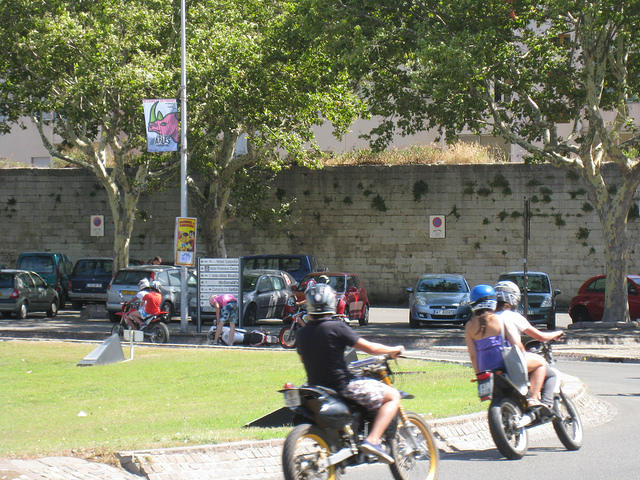

In [8]:
print(train_captions[0])
Image.open(img_name_vector[0])

## Preprocess the images using InceptionV3
Next, use InceptionV3 (which is pretrained on Imagenet) to classify each image and extract features from the last convolutional layer.

First, need to convert the images into InceptionV3's expected format by:
* Resizing the image to 299px by 299px
* [Preprocess the images](https://cloud.google.com/tpu/docs/inception-v3-advanced#preprocessing_stage) using the [preprocess_input](https://www.tensorflow.org/api_docs/python/tf/keras/applications/inception_v3/preprocess_input) method to normalize the image so that it contains pixels in the range of -1 to 1, which matches the format of the images used to train InceptionV3.

In [9]:
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (299, 299))
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img, image_path

## Initialize InceptionV3 and load the pretrained Imagenet weights

Now, create a tf.keras model where the output layer is the last convolutional layer in the InceptionV3 architecture. The shape of the output of this layer is ```8x8x2048```. Then, use the last convolutional layer because attention is being used. Don't perform this initialization during training because it could become a bottleneck.

* Forward each image through the network and store the resulting vector in a dictionary (image_name --> feature_vector).
* After all the images are passed through the network, pickle the dictionary and save it to disk.


In [10]:
image_model = tf.keras.applications.InceptionV3(include_top=False,
                                                weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-1].output

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

    8192/87910968 [..............................] - ETA: 1s

 4202496/87910968 [>.............................] - ETA: 7s

16719872/87910968 [====>.........................] - ETA: 1s

29073408/87910968 [========>.....................] - ETA: 0s

33562624/87910968 [==========>...................] - ETA: 1s

45981696/87910968 [==============>...............] - ETA: 0s

59244544/87910968 [===================>..........] - ETA: 0s

67117056/87910968 [=====================>........] - ETA: 0s

75505664/87910968 [========================>.....] - ETA: 0s

87916544/87910968 [==============================] - 1s 0us/step


## Caching the features extracted from InceptionV3

Pre-process each image with InceptionV3 and cache the output to disk. Caching the output in RAM would be faster but also memory intensive, requiring 8 \* 8 \* 2048 floats per image. At the time of writing, this exceeds the memory limitations of Colab (currently 12GB of memory).

Performance could be improved with a more sophisticated caching strategy (for example, by sharding the images to reduce random access disk I/O), but that would require more code.

The caching will take about 10 minutes to run in Colab with a GPU.


In [11]:
# Get unique images
encode_train = sorted(set(img_name_vector))

# Change batch_size according to your system configuration
image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
image_dataset = image_dataset.map(
  load_image, num_parallel_calls=tf.data.AUTOTUNE).batch(16)

for img, path in tqdm(image_dataset):
  batch_features = image_features_extract_model(img)
  batch_features = tf.reshape(batch_features,
                              (batch_features.shape[0], -1, batch_features.shape[3]))

  for bf, p in zip(batch_features, path):
    path_of_feature = p.numpy().decode("utf-8")
    np.save(path_of_feature, bf.numpy())

## Preprocess and tokenize the captions

* First, tokenize the captions (for example, by splitting on spaces). This gives us a vocabulary of all of the unique words in the data (for example, "surfing", "football", and so on).
* Next, limit the vocabulary size to the top 5,000 words (to save memory) and replace all other words with the token "UNK" (unknown).
* Then create word-to-index and index-to-word mappings.
* Finally, pad all sequences to be the same length as the longest one.

In [12]:
# Find the maximum length of any caption in our dataset
def calc_max_length(tensor):
    return max(len(t) for t in tensor)

In [13]:
# Choose the top 5000 words from the vocabulary
top_k = 5000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_k,
                                                  oov_token="<unk>",
                                                  filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')
tokenizer.fit_on_texts(train_captions)

In [14]:
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

In [15]:
# Create the tokenized vectors
train_seqs = tokenizer.texts_to_sequences(train_captions)

In [16]:
# Pad each vector to the max_length of the captions
cap_vector = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post')

In [17]:
# Calculates the max_length, which is used to store the attention weights
max_length = calc_max_length(train_seqs)

## Split the data into training and testing

In [18]:
img_to_cap_vector = collections.defaultdict(list)
for img, cap in zip(img_name_vector, cap_vector):
  img_to_cap_vector[img].append(cap)

# Create training and validation sets using an 80-20 split randomly.
img_keys = list(img_to_cap_vector.keys())
random.shuffle(img_keys)

slice_index = int(len(img_keys)*0.8)
img_name_train_keys, img_name_val_keys = img_keys[:slice_index], img_keys[slice_index:]

img_name_train = []
cap_train = []
for imgt in img_name_train_keys:
  capt_len = len(img_to_cap_vector[imgt])
  img_name_train.extend([imgt] * capt_len)
  cap_train.extend(img_to_cap_vector[imgt])

img_name_val = []
cap_val = []
for imgv in img_name_val_keys:
  capv_len = len(img_to_cap_vector[imgv])
  img_name_val.extend([imgv] * capv_len)
  cap_val.extend(img_to_cap_vector[imgv])

In [19]:
len(img_name_train), len(cap_train), len(img_name_val), len(cap_val)

(24011, 24011, 6006, 6006)

## Create a tf.data dataset for training


 Our images and captions are ready! Next, let's create a tf.data dataset to use for training our model.

In [20]:
# Feel free to change these parameters according to your system's configuration

BATCH_SIZE = 64
BUFFER_SIZE = 1000
embedding_dim = 256
units = 512
vocab_size = top_k + 1
num_steps = len(img_name_train) // BATCH_SIZE
# Shape of the vector extracted from InceptionV3 is (64, 2048)
# These two variables represent that vector shape
features_shape = 2048
attention_features_shape = 64

In [21]:
# Load the numpy files
def map_func(img_name, cap):
  img_tensor = np.load(img_name.decode('utf-8')+'.npy')
  return img_tensor, cap

In [22]:
dataset = tf.data.Dataset.from_tensor_slices((img_name_train, cap_train))

# Use map to load the numpy files in parallel
dataset = dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle and batch
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

## Model

The model architecture is inspired by the [Show, Attend and Tell](https://arxiv.org/pdf/1502.03044.pdf) paper.

* Extract the features from the lower convolutional layer of InceptionV3 giving us a vector of shape (8, 8, 2048).
* Squash that to a shape of (64, 2048).
* This vector is then passed through the CNN Encoder (which consists of a single Fully connected layer).
* The RNN (here GRU) attends over the image to predict the next word.

In [23]:
class BahdanauAttention(tf.keras.Model):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, features, hidden):
    # features(CNN_encoder output) shape == (batch_size, 64, embedding_dim)

    # hidden shape == (batch_size, hidden_size)
    # hidden_with_time_axis shape == (batch_size, 1, hidden_size)
    hidden_with_time_axis = tf.expand_dims(hidden, 1)

    # attention_hidden_layer shape == (batch_size, 64, units)
    attention_hidden_layer = (tf.nn.tanh(self.W1(features) +
                                         self.W2(hidden_with_time_axis)))

    # score shape == (batch_size, 64, 1)
    # This gives an unnormalized score for each image feature.
    score = self.V(attention_hidden_layer)

    # attention_weights shape == (batch_size, 64, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * features
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [24]:
class CNN_Encoder(tf.keras.Model):
    # Since features have already been extracted and dumped using pickle
    # This encoder passes those features through a Fully connected layer
    def __init__(self, embedding_dim):
        super(CNN_Encoder, self).__init__()
        # shape after fc == (batch_size, 64, embedding_dim)
        self.fc = tf.keras.layers.Dense(embedding_dim)

    def call(self, x):
        x = self.fc(x)
        x = tf.nn.relu(x)
        return x

In [25]:
class RNN_Decoder(tf.keras.Model):
  def __init__(self, embedding_dim, units, vocab_size):
    super(RNN_Decoder, self).__init__()
    self.units = units

    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc1 = tf.keras.layers.Dense(self.units)
    self.fc2 = tf.keras.layers.Dense(vocab_size)

    self.attention = BahdanauAttention(self.units)

  def call(self, x, features, hidden):
    # defining attention as a separate model
    context_vector, attention_weights = self.attention(features, hidden)

    # x shape after passing through embedding == (batch_size, 1, embedding_dim)
    x = self.embedding(x)

    # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # passing the concatenated vector to the GRU
    output, state = self.gru(x)

    # shape == (batch_size, max_length, hidden_size)
    x = self.fc1(output)

    # x shape == (batch_size * max_length, hidden_size)
    x = tf.reshape(x, (-1, x.shape[2]))

    # output shape == (batch_size * max_length, vocab)
    x = self.fc2(x)

    return x, state, attention_weights

  def reset_state(self, batch_size):
    return tf.zeros((batch_size, self.units))

In [26]:
encoder = CNN_Encoder(embedding_dim)
decoder = RNN_Decoder(embedding_dim, units, vocab_size)

In [27]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

## Checkpoint

In [28]:
checkpoint_path = "./checkpoints/train"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [29]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
  start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])
  # restoring the latest checkpoint in checkpoint_path
  ckpt.restore(ckpt_manager.latest_checkpoint)

## Training

* Extract the features stored in the respective `.npy` files and then pass those features through the encoder.
* The encoder output, hidden state(initialized to 0) and the decoder input (which is the start token) is passed to the decoder.
* The decoder returns the predictions and the decoder hidden state.
* The decoder hidden state is then passed back into the model and the predictions are used to calculate the loss.
* Use teacher forcing to decide the next input to the decoder.
* Teacher forcing is the technique where the target word is passed as the next input to the decoder.
* The final step is to calculate the gradients and apply it to the optimizer and backpropagate.


In [30]:
# adding this in a separate cell because if you run the training cell
# many times, the loss_plot array will be reset
loss_plot = []

In [31]:
@tf.function
def train_step(img_tensor, target):
  loss = 0

  # initializing the hidden state for each batch
  # because the captions are not related from image to image
  hidden = decoder.reset_state(batch_size=target.shape[0])

  dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)

  with tf.GradientTape() as tape:
      features = encoder(img_tensor)

      for i in range(1, target.shape[1]):
          # passing the features through the decoder
          predictions, hidden, _ = decoder(dec_input, features, hidden)

          loss += loss_function(target[:, i], predictions)

          # using teacher forcing
          dec_input = tf.expand_dims(target[:, i], 1)

  total_loss = (loss / int(target.shape[1]))

  trainable_variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, trainable_variables)

  optimizer.apply_gradients(zip(gradients, trainable_variables))

  return loss, total_loss

In [32]:
EPOCHS = 20

for epoch in range(start_epoch, EPOCHS):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss

        if batch % 100 == 0:
            print ('Epoch {} Batch {} Loss {:.4f}'.format(
              epoch + 1, batch, batch_loss.numpy() / int(target.shape[1])))
    # storing the epoch end loss value to plot later
    loss_plot.append(total_loss / num_steps)

    if epoch % 5 == 0:
      ckpt_manager.save()

    print ('Epoch {} Loss {:.6f}'.format(epoch + 1,
                                         total_loss/num_steps))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 2.0855


Epoch 1 Batch 100 Loss 1.1326


Epoch 1 Batch 200 Loss 1.0184


Epoch 1 Batch 300 Loss 0.8906


Epoch 1 Loss 1.034848
Time taken for 1 epoch 121.38977003097534 sec



Epoch 2 Batch 0 Loss 0.8610


Epoch 2 Batch 100 Loss 0.7849


Epoch 2 Batch 200 Loss 0.6981


Epoch 2 Batch 300 Loss 0.7580


Epoch 2 Loss 0.777551
Time taken for 1 epoch 48.040128231048584 sec



Epoch 3 Batch 0 Loss 0.7430


Epoch 3 Batch 100 Loss 0.7583


Epoch 3 Batch 200 Loss 0.6776


Epoch 3 Batch 300 Loss 0.6853


Epoch 3 Loss 0.699766
Time taken for 1 epoch 48.34805083274841 sec



Epoch 4 Batch 0 Loss 0.6904


Epoch 4 Batch 100 Loss 0.6152


Epoch 4 Batch 200 Loss 0.6951


Epoch 4 Batch 300 Loss 0.5573


Epoch 4 Loss 0.649461
Time taken for 1 epoch 48.36990928649902 sec



Epoch 5 Batch 0 Loss 0.6015


Epoch 5 Batch 100 Loss 0.6234


Epoch 5 Batch 200 Loss 0.5821


Epoch 5 Batch 300 Loss 0.5604


Epoch 5 Loss 0.608492
Time taken for 1 epoch 48.66079306602478 sec



Epoch 6 Batch 0 Loss 0.6084


Epoch 6 Batch 100 Loss 0.5867


Epoch 6 Batch 200 Loss 0.5379


Epoch 6 Batch 300 Loss 0.5830


Epoch 6 Loss 0.573350
Time taken for 1 epoch 48.2317054271698 sec



Epoch 7 Batch 0 Loss 0.5373


Epoch 7 Batch 100 Loss 0.5730


Epoch 7 Batch 200 Loss 0.5768


Epoch 7 Batch 300 Loss 0.5278


Epoch 7 Loss 0.542395
Time taken for 1 epoch 46.71699810028076 sec



Epoch 8 Batch 0 Loss 0.5626


Epoch 8 Batch 100 Loss 0.5408


Epoch 8 Batch 200 Loss 0.5306


Epoch 8 Batch 300 Loss 0.4971


Epoch 8 Loss 0.513767
Time taken for 1 epoch 46.61273503303528 sec



Epoch 9 Batch 0 Loss 0.5340


Epoch 9 Batch 100 Loss 0.4759


Epoch 9 Batch 200 Loss 0.4874


Epoch 9 Batch 300 Loss 0.4618


Epoch 9 Loss 0.486720
Time taken for 1 epoch 46.16280508041382 sec



Epoch 10 Batch 0 Loss 0.5077


Epoch 10 Batch 100 Loss 0.4576


Epoch 10 Batch 200 Loss 0.4943


Epoch 10 Batch 300 Loss 0.4825


Epoch 10 Loss 0.462035
Time taken for 1 epoch 45.447362422943115 sec



Epoch 11 Batch 0 Loss 0.4712


Epoch 11 Batch 100 Loss 0.4562


Epoch 11 Batch 200 Loss 0.4111


Epoch 11 Batch 300 Loss 0.4287


Epoch 11 Loss 0.437673
Time taken for 1 epoch 46.236756324768066 sec



Epoch 12 Batch 0 Loss 0.4276


Epoch 12 Batch 100 Loss 0.4670


Epoch 12 Batch 200 Loss 0.3784


Epoch 12 Batch 300 Loss 0.3727


Epoch 12 Loss 0.415731
Time taken for 1 epoch 45.804314613342285 sec



Epoch 13 Batch 0 Loss 0.3978


Epoch 13 Batch 100 Loss 0.4445


Epoch 13 Batch 200 Loss 0.3886


Epoch 13 Batch 300 Loss 0.3905


Epoch 13 Loss 0.395104
Time taken for 1 epoch 46.59288954734802 sec



Epoch 14 Batch 0 Loss 0.3933


Epoch 14 Batch 100 Loss 0.3902


Epoch 14 Batch 200 Loss 0.3981


Epoch 14 Batch 300 Loss 0.3542


Epoch 14 Loss 0.374481
Time taken for 1 epoch 47.27163743972778 sec



Epoch 15 Batch 0 Loss 0.3870


Epoch 15 Batch 100 Loss 0.3795


Epoch 15 Batch 200 Loss 0.3413


Epoch 15 Batch 300 Loss 0.3652


Epoch 15 Loss 0.355828
Time taken for 1 epoch 47.83658313751221 sec



Epoch 16 Batch 0 Loss 0.3481


Epoch 16 Batch 100 Loss 0.3419


Epoch 16 Batch 200 Loss 0.3293


Epoch 16 Batch 300 Loss 0.3081


Epoch 16 Loss 0.339233
Time taken for 1 epoch 47.61441230773926 sec



Epoch 17 Batch 0 Loss 0.3473


Epoch 17 Batch 100 Loss 0.3858


Epoch 17 Batch 200 Loss 0.3316


Epoch 17 Batch 300 Loss 0.3405


Epoch 17 Loss 0.327854
Time taken for 1 epoch 48.05988645553589 sec



Epoch 18 Batch 0 Loss 0.3211


Epoch 18 Batch 100 Loss 0.2949


Epoch 18 Batch 200 Loss 0.3149


Epoch 18 Batch 300 Loss 0.2979


Epoch 18 Loss 0.306653
Time taken for 1 epoch 49.181567907333374 sec



Epoch 19 Batch 0 Loss 0.3237


Epoch 19 Batch 100 Loss 0.3084


Epoch 19 Batch 200 Loss 0.2751


Epoch 19 Batch 300 Loss 0.2800


Epoch 19 Loss 0.294841
Time taken for 1 epoch 48.989463329315186 sec



Epoch 20 Batch 0 Loss 0.2953


Epoch 20 Batch 100 Loss 0.2998


Epoch 20 Batch 200 Loss 0.2749


Epoch 20 Batch 300 Loss 0.2625


Epoch 20 Loss 0.282680
Time taken for 1 epoch 48.99758243560791 sec



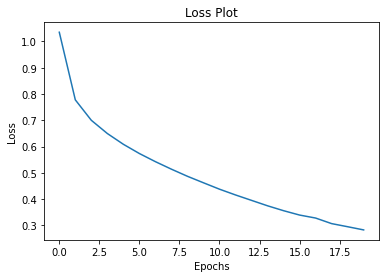

In [33]:
plt.plot(loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

## Caption!

* The evaluate function is similar to the training loop, except you don't use teacher forcing here. The input to the decoder at each time step is its previous predictions along with the hidden state and the encoder output.
* Stop predicting when the model predicts the end token.
* And store the attention weights for every time step.

In [34]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.reset_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()
        result.append(tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot

In [35]:
def plot_attention(image, result, attention_plot):
    temp_image = np.array(Image.open(image))

    fig = plt.figure(figsize=(10, 10))

    len_result = len(result)
    for l in range(len_result):
        temp_att = np.resize(attention_plot[l], (8, 8))
        ax = fig.add_subplot(len_result//2, len_result//2, l+1)
        ax.set_title(result[l])
        img = ax.imshow(temp_image)
        ax.imshow(temp_att, cmap='gray', alpha=0.6, extent=img.get_extent())

    plt.tight_layout()
    plt.show()

Real Caption: <start> elephant standing in large pool of water in <unk> area <end>
Prediction Caption: a large elephant standing on dirt road <end>


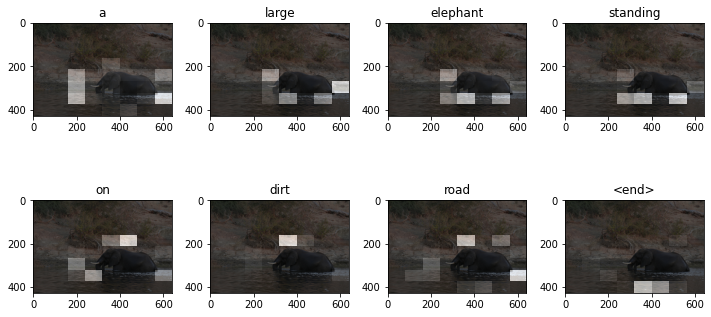

In [36]:
# captions on the validation set
rid = np.random.randint(0, len(img_name_val))
image = img_name_val[rid]
real_caption = ' '.join([tokenizer.index_word[i] for i in cap_val[rid] if i not in [0]])
result, attention_plot = evaluate(image)

print ('Real Caption:', real_caption)
print ('Prediction Caption:', ' '.join(result))
plot_attention(image, result, attention_plot)


## Try it on own images
Images may be different from the training data (so be prepared for weird results!)


 8192/64400 [==>...........................] - ETA: 0s

16384/64400 [======>.......................] - ETA: 0s

32768/64400 [==============>...............] - ETA: 0s

49152/64400 [=====================>........] - ETA: 0s

65536/64400 [==============================] - 0s 4us/step


Prediction Caption: a person on a surfboard on top of a wave in <end>


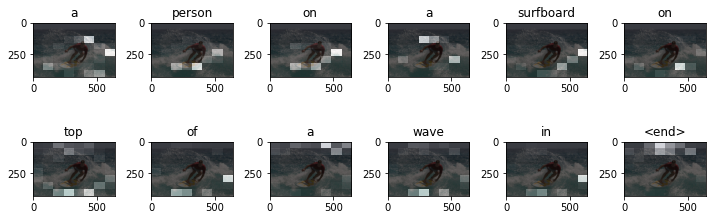

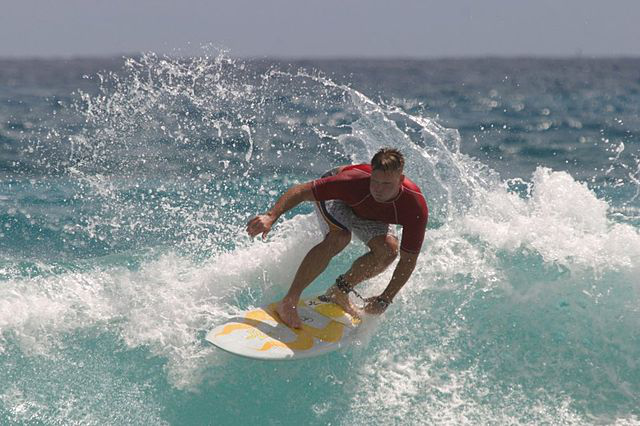

In [37]:
image_url = 'https://tensorflow.org/images/surf.jpg'
image_extension = image_url[-4:]
image_path = tf.keras.utils.get_file('image'+image_extension,
                                     origin=image_url)

result, attention_plot = evaluate(image_path)
print ('Prediction Caption:', ' '.join(result))
plot_attention(image_path, result, attention_plot)
# opening the image
Image.open(image_path)